<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_06_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mathematical optimization

#Examples of minimization problems

* statistics (parameter estimation to minimize some loss function);
* regression (find parameters of the line to minimize sum of errors);
* neural networks (find weights to minimize loss function);

* industry management (how to spend money and resources to maximize profit);
* insurance (find insurance coefficients to minimize risk of the loss);
* gambling (minimize losses of casino);
* physics (find trajectory to minimize action).

In [ ]:
#@title #Test

%%html
<link   rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
  `
  <img src='https://upload.wikimedia.org/wikipedia/commons/4/4f/SVG_Logo.svg' height=400>
  </img>
`
,
`
<img src='https://upload.wikimedia.org/wikipedia/commons/e/e7/Jammlich_crop.jpg'></img>
`
,
`
<img src='https://fastly.picsum.photos/id/237/200/300.jpg?hmac=TmmQSbShHz9CdQm0NkEjx1Dyh_Y984R9LpNrpvH2D_U'></img>`
,
`
 <img src="https://fbeilstein.github.io/machine_learning/caption.png" height=100></img>
 `
 ,
 `
 <img src='https://fbeilstein.github.io/machine_learning/gallery/lecture_06_mle.gif'><img>
 `
 ,
 `
 <img src='https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png'></img>`
 ,
`
<b>General global optimization</b>
<ul>
  <li> <b>Goals:</b> Find a global minimum.
  <li> <b>Functional class:</b> Continuous functions.
  <li> <b>Oracle:</b> 0-1-2 order black box.
  <li> <b>Desired properties:</b> Convergence to a global minimum.
  <li> <b>Features:</b> Prom theoretical point of view, this game is too short. We always lose it. Interesting in context of NNs.
</ul>
`,
`
<b>Nonlinear optimization</b>
<ul>
  <li> <b>Goals:</b> Find a local minimum.
  <li> <b>Functional class:</b> Differentiable functions.
  <li> <b>Oracle:</b> 1-2 order black box.
  <li> <b>Desired properties:</b> Convergence to a local minimum. Fast convergence.
  <li> <b>Features:</b> Variability of approaches.Widespread software. The goal is not always acceptable and reachable.
</ul>
`,
`
<b>Convex optimization</b>
<ul>
  <li> <b>Goals:</b> Find a global minimum.
  <li> <b>Functional class:</b> Convex sets and functions.
  <li> <b>Oracle:</b> 1-order black box.
  <li> <b>Desired properties:</b> Convergence to a global minimum.
  <li> <b>Features:</b> Very rich and interesting theory. Comprehensive complexity theory. Efficient practical methods. The problem class is sometimes restrictive.
</ul>
`,
`
<b>Interior-point polynomial-time methods</b>
<ul>
  <li> <b>Goals:</b> Find a global minimum.
  <li> <b>Functional class:</b> Convex sets and functions with explicit structure.
  <li> <b>Oracle:</b> 2nd-order non-local oracle.
  <li> <b>Desired properties:</b> Fast convergence to a global minimum.
  <li> <b>Features:</b> Very new and perspective theory. Avoids the black box concept. Rate of convergence depends on the structure of the problem.The problem class is practically the same as in convex optimization.
</ul>
`
  ]
)
</script>

#Calculus preliminaries

Suppose

$$
f: X \rightarrow \mathbb{R},
$$

where $X \subset \mathbb{R}^n$.

Taylor expansion

$$
f(\boldsymbol {x}+ \boldsymbol {h})=f(\boldsymbol {x})+\nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{1}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}+o(||{\boldsymbol {h}||}^3).
$$

$\nabla f(\boldsymbol {x})$ is the gradient of the function

$$
\nabla_i f(\boldsymbol {x})=\frac{\partial f}{\partial x_i}.
$$

The gradient of $f$ at a point is a vector pointing in the direction of the steepest slope or grade at that point. The steepness of the slope at that point is given by the magnitude of the gradient vector.
$\boldsymbol {H}_{ij}$ is the Hessian (Матриця Гессе) - a square matrix of second-order partial derivatives

$$
\boldsymbol {H}_{ij} f(\boldsymbol {x})=\frac{\partial^2 f}{\partial x_i \partial x_j}.
$$

$\boldsymbol {H}_{ij}$ is symmetric.

In real application it may be too difficult to calculate Hessian analytically and it's calculated using approximation

$$
\boldsymbol {H}(\boldsymbol {x})\boldsymbol {h}\approx \frac{1}{r}\left(\nabla f(\boldsymbol {x}+r\boldsymbol {h})-\nabla f(\boldsymbol {x})\right).
$$

If function has extremum at point $\boldsymbol {x}_0$

$$
\nabla f(\boldsymbol {x}_0)=0.
$$

Convex functions

$$
\forall  \boldsymbol {x}_1,\boldsymbol {x}_2 \in X, \quad \forall t\in [0,1] :\quad f\underbrace{\left(t\boldsymbol {x}_1+(1-t)\boldsymbol {x}_2\right)}_{x}\leq \underbrace{tf(\boldsymbol {x}_1)+(1-t)f(\boldsymbol {x}_2)}_{l(x)} .
$$


In [ ]:
#@title ##Concave/convex functions (опукла/увігнута)
%%html

<div id="slide_1" style="display:none; max-width:750px">
<svg width="260mm" height="110mm" version="1.1" viewBox="0 0 424.1 180.28" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(6.1615 33.654)">
  <g transform="translate(7.2378 -59.353)">
   <g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke="#000" stroke-opacity=".62745" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g stroke="#000" stroke-opacity=".62745"><g transform="matrix(1.2168 0 0 -1.2168 183.62 863.82)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke-width=".7"><g transform="matrix(-1 0 0 -1 578.27 350.25)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" stroke-opacity=".62745"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke="#000" stroke-opacity=".62745" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g stroke="#000" stroke-opacity=".62745"><path d="m434.49 969.51v114.13" fill-opacity=".62745" fill-rule="evenodd" marker-end="url(#f)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width=".36504"/><path d="m427.92 977.24h142.81" fill="none" marker-end="url(#b)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width=".36504"/><g fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1"><g transform="matrix(.6952 0 0 .6952 364.81 531.8)" stroke-width="3.2834" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g><g transform="matrix(.9337 0 0 .9337 199.58 454.77)" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Neither concave nor convex}$$\n" xml:space="preserve"><path d="m248.13 701.83v0.01l-0.05 0.05v0.01h-0.01v0.01h-0.01l-0.02 0.02h-0.01v0.01h-0.03v0.01h-0.14l-0.01 0.01h-1.7v-0.31h0.29c0.15 0 0.35-0.01 0.5-0.02 0.23-0.03 0.24-0.04 0.24-0.23v-5.19c0-0.26 0-0.73-1.03-0.73v-0.31c0.35 0.01 0.84 0.03 1.17 0.03s0.81-0.02 1.16-0.03v0.31c-1.02 0-1.02 0.47-1.02 0.73v5.17c0.05-0.05 0.05-0.06 0.09-0.12l4.07-5.96c0.09-0.12 0.1-0.13 0.17-0.13 0.14 0 0.14 0.07 0.14 0.26v5.48c0 0.27 0 0.74 1.03 0.74v0.31c-0.35-0.01-0.84-0.04-1.17-0.04s-0.81 0.03-1.16 0.04v-0.31c1.02 0 1.02-0.47 1.02-0.74v-4.24z"/><path d="m254.4 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.78 1.95-1.16 0-2.08-1.02-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.35-1.02-0.49 0-0.89 0.3-1.12 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m259.48 699.56-1.39-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.54v-2.68c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.32 0.01 0.86 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.31c-0.66 0-0.7 0.05-0.7 0.43z"/><path d="m259.52 701.29v0.09l-0.01 0.02v0.03l-0.01 0.03-0.01 0.02-0.01 0.03-0.02 0.04-0.02 0.02-0.01 0.03-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.02-0.06 0.03-0.03 0.01h-0.02l-0.03 0.01-0.02 0.01h-0.05l-0.03 0.01h-0.02c-0.31 0-0.53-0.27-0.53-0.53 0-0.27 0.22-0.53 0.53-0.53 0.27 0 0.52 0.21 0.52 0.53z"/><path d="m262.21 699.14h1.43v0.31h-1.43v1.83h-0.25c-0.01-0.81-0.31-1.88-1.28-1.92v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m265.46 695.92v-0.07l-0.01-0.04v-0.06l-0.01-0.03v-0.03l-0.01-0.02-0.01-0.03-0.02-0.04-0.04-0.04-0.02-0.01-0.02-0.02-0.02-0.01h-0.03l-0.02-0.01-0.03-0.01h-0.03l-0.03-0.01h-0.08l-0.02-0.01h-0.38v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.44v1.83c0 1.04 0.7 1.59 1.34 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.59-1.44-0.97v3.47l-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m271 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.2h2.79c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.79 1.95-1.16 0-2.07-1.02-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.09 0.12-0.14 0.12-0.08 0-0.1-0.06-0.12-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m275.99 698.47v1.09l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.52c0 0.99 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.38 0-0.28 0.21-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44 0 0.31-0.31 0.6-0.73 0.6-0.73 0-1.09-0.66-1.23-1.09z"/><path d="m282.71 697.34v0.14l0.01 0.08v0.07l0.01 0.06v0.07l0.01 0.07 0.05 0.3 0.03 0.1 0.03 0.11 0.03 0.09 0.04 0.1 0.12 0.24 0.05 0.07 0.15 0.18 0.05 0.05 0.05 0.04 0.06 0.04 0.05 0.04 0.06 0.04 0.06 0.03 0.05 0.02 0.12 0.04 0.05 0.02 0.06 0.01 0.1 0.02h0.11c0.09 0 0.71-0.01 1.06-0.37-0.41-0.03-0.47-0.32-0.47-0.45 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.67-0.75 1.06-1.52 1.06-1.25 0-2.17-1.07-2.17-2.3 0-1.28 0.99-2.26 2.15-2.26 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.92-0.93-1.04-1.3-1.04-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m290.67 697.3v0.11l-0.01 0.12-0.02 0.12-0.04 0.22-0.03 0.11-0.08 0.22-0.04 0.1-0.1 0.2-0.12 0.18-0.07 0.09-0.14 0.16-0.16 0.16-0.08 0.06-0.09 0.07-0.18 0.12-0.09 0.05-0.1 0.05-0.1 0.04-0.1 0.03-0.11 0.04-0.1 0.02-0.22 0.04-0.11 0.01h-0.12l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.22-1.34s-0.66-0.73-1.16-0.73c-0.42 0-0.86 0.21-1.13 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.73 0.66 1.13 0.66l0.01 0.22c-1.24 0-2.21-1.08-2.21-2.32 0-1.29 1.04-2.24 2.2-2.24 1.21 0 2.22 0.97 2.22 2.24z"/><path d="m292.05 698.59v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.34 1.59s0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m297.65 697.34v0.07l0.01 0.07v0.15l0.01 0.06v0.07l0.01 0.07 0.05 0.3 0.03 0.1 0.03 0.11 0.03 0.09 0.04 0.1 0.12 0.24 0.05 0.07 0.15 0.18 0.05 0.05 0.06 0.04 0.05 0.04 0.06 0.04 0.05 0.04 0.06 0.03 0.06 0.02 0.05 0.02 0.12 0.04 0.05 0.01 0.06 0.01 0.05 0.01h0.1c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.32-0.47-0.45 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.67-0.76 1.06-1.53 1.06-1.25 0-2.16-1.07-2.16-2.3 0-1.28 0.98-2.26 2.14-2.26 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.92-0.94-1.04-1.31-1.04-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m304.24 695.92v-0.03l0.01-0.04v-0.04l0.01-0.03 0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.04 0.04-0.06 0.02-0.04 0.08-0.12 0.11-0.11 0.06-0.04 0.04-0.02 0.03-0.02 0.04-0.01 0.03-0.02 0.16-0.04h0.08c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.57-0.25-0.63-0.36-0.63-0.33 0-0.37 0.44-0.37 0.49v1.99c0 0.42 0 0.81-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.44-0.51 0.46 0.27 0.34 0.76 0.45 1.08 0.45 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.94-0.72-1.28-1.17-1.28-0.49 0-0.9 0.35-0.9 0.84 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.35-0.75-0.34-1-0.86-1-1.3 0-0.8 0.97-1.05 1.6-1.05 0.66 0 1.12 0.4 1.31 0.86z"/><path d="m309.78 698.48v0.02l0.01 0.02 0.01 0.03 0.01 0.02 0.02 0.03 0.01 0.02 0.02 0.06 0.02 0.02 0.02 0.03 0.01 0.03 0.02 0.03 0.02 0.02 0.02 0.03 0.08 0.08 0.03 0.02 0.03 0.03 0.06 0.04 0.04 0.02 0.03 0.02 0.04 0.02 0.05 0.01 0.04 0.02 0.15 0.03h0.03l0.03 0.01h0.11v0.31c-0.23-0.02-0.52-0.03-0.74-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.23 0.48-0.42 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.12 2.77c-0.06 0.13-0.06 0.14-0.06 0.17 0 0.25 0.39 0.25 0.57 0.25v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.26 0-0.66 0.01-0.96 0.03v-0.31c0.63 0 0.66-0.06 0.79-0.36l1.44-3.53c0.06-0.14 0.08-0.19 0.21-0.19s0.17 0.09 0.21 0.19z"/><path d="m311.71 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.2h2.79c0.21 0 0.24 0 0.24 0.2 0 0.99-0.53 1.95-1.78 1.95-1.16 0-2.07-1.02-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.66 1.1 1.66 1.29 0 0.1-0.07 0.12-0.13 0.12-0.08 0-0.1-0.06-0.12-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m319.45 698.59v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.44v1.83c0 1.04 0.71 1.59 1.34 1.59s0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m328.58 697.3v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.11-0.05 0.1-0.04 0.1-0.06 0.1-0.18 0.27-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.08-0.09 0.06-0.08 0.07-0.18 0.12-0.2 0.1-0.1 0.04-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.22-1.34s-0.66-0.73-1.16-0.73c-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.21-1.08-2.21-2.32 0-1.29 1.03-2.24 2.2-2.24 1.21 0 2.21 0.97 2.21 2.24z"/><path d="m330.53 698.47v1.09l-1.38-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.55v-2.67c0-0.44-0.1-0.44-0.77-0.44v-0.31c0.39 0.01 0.86 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.52c0 0.99 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.38 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44 0 0.31-0.31 0.6-0.74 0.6-0.73 0-1.09-0.66-1.23-1.09z"/><path d="m337.26 697.34v0.29l0.01 0.06 0.01 0.07v0.07l0.05 0.3 0.03 0.1 0.03 0.11 0.03 0.09 0.04 0.1 0.08 0.16 0.05 0.08 0.04 0.07 0.15 0.18 0.05 0.05 0.06 0.04 0.05 0.04 0.06 0.04 0.05 0.04 0.06 0.03 0.06 0.02 0.05 0.02 0.12 0.04 0.05 0.01 0.06 0.01 0.05 0.01h0.1c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.32-0.47-0.45 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.67-0.76 1.06-1.53 1.06-1.25 0-2.16-1.07-2.16-2.3 0-1.28 0.98-2.26 2.14-2.26 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.92-0.94-1.04-1.31-1.04-0.53 0-1.4 0.43-1.4 2.03z"/><path d="m345.22 697.3v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.11-0.15 0.3-0.18 0.27-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.08-0.09 0.06-0.08 0.07-0.09 0.06-0.1 0.06-0.09 0.05-0.1 0.05-0.1 0.04-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.25-0.43 0.25-1.01 0.25-1.38 0-0.36 0-0.9-0.22-1.34-0.21-0.44-0.65-0.73-1.15-0.73-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.22-1.08-2.22-2.32 0-1.29 1.04-2.24 2.21-2.24 1.2 0 2.21 0.97 2.21 2.24z"/><path d="m346.6 698.59v-2.67c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.3 1.52-0.15 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55z"/><path d="m354.91 698.48 0.02 0.04 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.02 0.03 0.01 0.03 0.01 0.02 0.06 0.09 0.02 0.02 0.04 0.06 0.03 0.02 0.02 0.03 0.03 0.02 0.03 0.03 0.03 0.02 0.04 0.02 0.03 0.02 0.08 0.04 0.04 0.01 0.05 0.02 0.04 0.01 0.05 0.01 0.06 0.01h0.02l0.03 0.01h0.12v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.23 0.48-0.42 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.11 2.77c-0.06 0.13-0.06 0.14-0.06 0.17 0 0.25 0.39 0.25 0.57 0.25v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.36l1.44-3.53c0.06-0.14 0.08-0.19 0.2-0.19 0.13 0 0.18 0.09 0.22 0.19z"/><path d="m356.85 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.78 1.95-1.16 0-2.08-1.02-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.35-1.02-0.49 0-0.89 0.3-1.12 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m363.03 697.5 0.06 0.08 0.06 0.07 0.06 0.08 0.06 0.07 0.12 0.16 0.06 0.07 0.12 0.16 0.18 0.21 0.02 0.03 0.06 0.06 0.02 0.03 0.03 0.03 0.02 0.03 0.03 0.02 0.02 0.03c0.31 0.35 0.72 0.5 1.19 0.51v0.31c-0.26-0.02-0.56-0.03-0.82-0.03-0.3 0-0.83 0.02-0.96 0.03v-0.31c0.21-0.02 0.29-0.15 0.29-0.3 0-0.16-0.1-0.29-0.15-0.35l-0.62-0.78-0.78 1.01c-0.09 0.1-0.09 0.12-0.09 0.18 0 0.14 0.15 0.23 0.35 0.24v0.31c-0.26-0.01-0.91-0.03-1.07-0.03-0.21 0-0.68 0.01-0.95 0.03v-0.31c0.7 0 0.71-0.01 1.18-0.6l0.98-1.28-0.93-1.19c-0.48-0.57-1.07-0.59-1.28-0.59v-0.31c0.26 0.02 0.57 0.03 0.83 0.03 0.29 0 0.71-0.02 0.94-0.03v0.31c-0.21 0.03-0.29 0.16-0.29 0.31 0 0.21 0.29 0.54 0.9 1.26l0.76-1c0.08-0.1 0.21-0.26 0.21-0.32 0-0.09-0.09-0.24-0.36-0.25v-0.31c0.3 0.01 0.86 0.03 1.08 0.03 0.27 0 0.66-0.01 0.96-0.03v0.31c-0.54 0-0.72 0.02-0.95 0.31z"/></g><g transform="matrix(1.0207 0 0 1.0207 433.82 188.96)" stroke-width="3.3545"><g stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1"><path d="m-148.42 764.63v111.81" fill="none" marker-end="url(#d)" stroke-width=".35764"/><path d="m-154.86 772.2h139.91" fill="none" marker-end="url(#a)" stroke-width=".35764"/><g transform="matrix(.68111 0 0 .68112 -216.69 335.79)" fill-rule="evenodd" stroke-width="3.2834" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g></g></g><g transform="matrix(.98166 0 0 .98166 131.76 410.2)" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\text{Convex}$\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m170.29 710.43 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.02 0.02 0.01 0.03 0.02 0.03 0.01 0.03 0.02 0.02 0.06 0.09 0.1 0.1 0.06 0.04 0.04 0.03 0.03 0.02 0.04 0.02 0.04 0.01 0.04 0.02 0.05 0.01 0.05 0.02 0.1 0.02h0.08l0.03 0.01h0.06v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.86 0.03v-0.31c0.36-0.01 0.47-0.24 0.47-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.01-2.53-1.12 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.44-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.17 0.08 0.21 0.18z"/><path d="m172.23 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m178.41 709.46 0.06 0.07 0.06 0.08 0.06 0.07 0.06 0.08 0.12 0.15 0.12 0.16 0.24 0.28 0.03 0.03 0.02 0.03 0.03 0.04 0.02 0.03 0.03 0.02 0.02 0.03 0.05 0.05c0.31 0.36 0.72 0.51 1.19 0.52v0.31c-0.26-0.02-0.56-0.03-0.82-0.03-0.3 0-0.83 0.02-0.96 0.03v-0.31c0.21-0.02 0.29-0.15 0.29-0.31s-0.1-0.29-0.15-0.35l-0.62-0.77-0.77 1c-0.09 0.1-0.09 0.12-0.09 0.18 0 0.15 0.15 0.24 0.34 0.25v0.31c-0.25-0.01-0.91-0.03-1.07-0.03-0.21 0-0.68 0.01-0.95 0.03v-0.31c0.7 0 0.71-0.01 1.18-0.61l0.98-1.28-0.93-1.18c-0.48-0.58-1.07-0.6-1.28-0.6v-0.3c0.26 0.02 0.57 0.03 0.83 0.03 0.29 0 0.71-0.02 0.95-0.03v0.3c-0.22 0.03-0.29 0.16-0.29 0.31 0 0.22 0.29 0.55 0.89 1.26l0.76-0.99c0.08-0.11 0.21-0.27 0.21-0.33 0-0.09-0.09-0.24-0.36-0.25v-0.3c0.3 0.01 0.86 0.03 1.08 0.03 0.27 0 0.66-0.01 0.96-0.03v0.3c-0.54 0-0.72 0.02-0.95 0.31z"/></g></g><g transform="matrix(1.2168 0 0 -1.2168 183.62 863.82)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="translate(258.65 -3.4795)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026 0 0 1.0026 31.971 78.78)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4151" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(1.3845 0 0 1.3845 261.45 -437.1)" stroke-width="2.4667"><g stroke-width="2.4667"><g transform="matrix(-1.5178 0 0 1.5178 84.544 -324.43)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".69309"><g transform="matrix(.58158 0 0 -.58072 8.6337 1042.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="1.1926"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".95363" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".95363"><path d="m171.51 757.67c2.3058 20.083 8.54 40.757 15.171 40.686 6.0222-0.0646 10.291-20.242 20.34-20.479 7.9798 0.32845 13.636 26.955 19.191 26.957 5.3686 2e-3 12.905-27.257 19.3-46.312" fill="none" stroke="#003c88" stroke-miterlimit="10.433" stroke-opacity=".58454" stroke-width=".95363"/></g></g></g></g></g></g></g></g></g></g></g><g transform="matrix(-.65714 0 0 -.65714 741.95 1102)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026 0 0 1.0026 37.987 78.78)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4151" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(1.3845 0 0 1.3845 287.6 -440.77)" stroke-width="2.4667"><g stroke-width="2.4667"><g transform="matrix(-1.5178 0 0 1.5178 84.71 -324.6)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1"><g transform="matrix(.57577 0 0 -.57504 -172.32 802.3)" stroke-width="1.2045"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".96316" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".96316"><path d="m171.51 757.67c7.6897 25.267 22 51.109 37.039 51.316 12.208-0.15688 28.413-24.989 36.962-50.464" fill="none" stroke="#003c88" stroke-miterlimit="10.433" stroke-opacity=".58454" stroke-width=".96316"/></g></g></g><g transform="matrix(.58057 0 0 .57986 -244 696.49)" stroke-width="1.1945"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".95517" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".95517"><path d="m171.51 757.67c7.6897 25.267 22 51.109 37.039 51.316 12.208-0.15688 28.413-24.989 36.962-50.464" fill="none" stroke="#003c88" stroke-miterlimit="10.433" stroke-opacity=".58454" stroke-width=".95517"/></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g><g transform="matrix(.65714 0 0 .65714 -163.7 81.594)" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026 0 0 1.0026 37.987 78.78)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4151" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(.71844 0 0 .71844 145.04 269.01)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1"><g transform="matrix(1.3845 0 0 1.3845 435.87 -196.36)" stroke-width="3.4334"><g transform="translate(11.481)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1"><path d="m-148.42 764.63v111.81" fill="none" marker-end="url(#e)" stroke-width=".36605"/><path d="m-154.86 772.2h139.91" fill="none" marker-end="url(#c)" stroke-width=".36605"/><g transform="matrix(.68111 0 0 .68112 -216.69 335.79)" fill-rule="evenodd" stroke-width="3.3606" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g></g><g transform="matrix(1.2202 0 0 -1.2202 -305.84 1230.5)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"/></g></g></g></g><g transform="matrix(1.3232 0 0 1.3232 36.65 113)" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\text{Concave}$\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m167.59 709.29v0.15l0.01 0.07v0.14l0.01 0.07 0.06 0.36 0.03 0.11 0.06 0.2 0.04 0.09 0.03 0.09 0.05 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.15 0.15 0.06 0.04 0.05 0.04 0.12 0.06 0.05 0.03 0.12 0.04 0.05 0.01 0.06 0.02 0.05 0.01h0.05l0.06 0.01h0.05c0.09 0 0.71-0.01 1.06-0.37-0.4-0.03-0.46-0.33-0.46-0.46 0-0.26 0.17-0.45 0.45-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.76 1.07-1.52 1.07-1.25 0-2.17-1.08-2.17-2.31 0-1.27 0.99-2.25 2.15-2.25 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.93-1.05-1.3-1.05-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m174.17 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.08-0.08 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.48 0-0.89 0.35-0.89 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m179.7 710.43 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.02 0.02 0.01 0.03 0.02 0.03 0.01 0.03 0.02 0.02 0.06 0.09 0.1 0.1 0.06 0.04 0.04 0.03 0.03 0.02 0.04 0.02 0.04 0.01 0.04 0.02 0.05 0.01 0.04 0.02 0.05 0.01 0.06 0.01h0.08l0.03 0.01h0.06v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.24 0.48-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.11 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.44-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.16 0.08 0.21 0.18z"/><path d="m181.64 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g>
  </g>
 </g>
</svg>
</div>

<div id="slide_2" style="display:none; max-width:750px">
<svg width="260mm" height="110mm" version="1.1" viewBox="0 0 424.1 180.28" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="g" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="h" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="scale(.2) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill="#f00" fill-opacity=".31373" fill-rule="evenodd" stroke="#f00" stroke-opacity=".31373" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill="#f00" fill-opacity=".31373" fill-rule="evenodd" stroke="#f00" stroke-opacity=".31373" stroke-width="1pt"/>
  </marker>
  <marker id="i" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(6.1615 33.654)">
  <g transform="translate(7.2378 -59.353)">
   <g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke="#000" stroke-opacity=".62745" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g stroke="#000" stroke-opacity=".62745"><g transform="matrix(1.2168 0 0 -1.2168 183.62 863.82)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke-width=".7"><g transform="matrix(-1 0 0 -1 578.27 350.25)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke="#000" stroke-opacity=".62745" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g stroke="#000" stroke-opacity=".62745"><g fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><path d="m434.49 969.51v114.13" fill-opacity=".62745" marker-end="url(#h)" stroke-opacity=".62745" stroke-width=".36504"/><path d="m427.92 977.24h142.81" fill-opacity=".62745" marker-end="url(#d)" stroke-opacity=".62745" stroke-width=".36504"/><g transform="matrix(.6952 0 0 .6952 364.81 531.8)" fill-opacity=".78431" stroke-opacity=".78431" stroke-width="3.2834" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-opacity=".62745" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".78431" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g><g transform="matrix(.9337 0 0 .9337 199.58 454.77)" fill-opacity=".39216" stroke-opacity=".31373" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Neither concave nor convex}$$\n" xml:space="preserve"><path d="m248.13 701.83v0.01l-0.05 0.05v0.01h-0.01v0.01h-0.01l-0.02 0.02h-0.01v0.01h-0.03v0.01h-0.14l-0.01 0.01h-1.7v-0.31h0.29c0.15 0 0.35-0.01 0.5-0.02 0.23-0.03 0.24-0.04 0.24-0.23v-5.19c0-0.26 0-0.73-1.03-0.73v-0.31c0.35 0.01 0.84 0.03 1.17 0.03s0.81-0.02 1.16-0.03v0.31c-1.02 0-1.02 0.47-1.02 0.73v5.17c0.05-0.05 0.05-0.06 0.09-0.12l4.07-5.96c0.09-0.12 0.1-0.13 0.17-0.13 0.14 0 0.14 0.07 0.14 0.26v5.48c0 0.27 0 0.74 1.03 0.74v0.31c-0.35-0.01-0.84-0.04-1.17-0.04s-0.81 0.03-1.16 0.04v-0.31c1.02 0 1.02-0.47 1.02-0.74v-4.24z"/><path d="m254.4 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.78 1.95-1.16 0-2.08-1.02-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.35-1.02-0.49 0-0.89 0.3-1.12 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m259.48 699.56-1.39-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.54v-2.68c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.32 0.01 0.86 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.31c-0.66 0-0.7 0.05-0.7 0.43z"/><path d="m259.52 701.29v0.09l-0.01 0.02v0.03l-0.01 0.03-0.01 0.02-0.01 0.03-0.02 0.04-0.02 0.02-0.01 0.03-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.02-0.06 0.03-0.03 0.01h-0.02l-0.03 0.01-0.02 0.01h-0.05l-0.03 0.01h-0.02c-0.31 0-0.53-0.27-0.53-0.53 0-0.27 0.22-0.53 0.53-0.53 0.27 0 0.52 0.21 0.52 0.53z"/><path d="m262.21 699.14h1.43v0.31h-1.43v1.83h-0.25c-0.01-0.81-0.31-1.88-1.28-1.92v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m265.46 695.92v-0.07l-0.01-0.04v-0.06l-0.01-0.03v-0.03l-0.01-0.02-0.01-0.03-0.02-0.04-0.04-0.04-0.02-0.01-0.02-0.02-0.02-0.01h-0.03l-0.02-0.01-0.03-0.01h-0.03l-0.03-0.01h-0.08l-0.02-0.01h-0.38v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.44v1.83c0 1.04 0.7 1.59 1.34 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.59-1.44-0.97v3.47l-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m271 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.2h2.79c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.79 1.95-1.16 0-2.07-1.02-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.09 0.12-0.14 0.12-0.08 0-0.1-0.06-0.12-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m275.99 698.47v1.09l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.52c0 0.99 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.38 0-0.28 0.21-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44 0 0.31-0.31 0.6-0.73 0.6-0.73 0-1.09-0.66-1.23-1.09z"/><path d="m282.71 697.34v0.14l0.01 0.08v0.07l0.01 0.06v0.07l0.01 0.07 0.05 0.3 0.03 0.1 0.03 0.11 0.03 0.09 0.04 0.1 0.12 0.24 0.05 0.07 0.15 0.18 0.05 0.05 0.05 0.04 0.06 0.04 0.05 0.04 0.06 0.04 0.06 0.03 0.05 0.02 0.12 0.04 0.05 0.02 0.06 0.01 0.1 0.02h0.11c0.09 0 0.71-0.01 1.06-0.37-0.41-0.03-0.47-0.32-0.47-0.45 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.67-0.75 1.06-1.52 1.06-1.25 0-2.17-1.07-2.17-2.3 0-1.28 0.99-2.26 2.15-2.26 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.92-0.93-1.04-1.3-1.04-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m290.67 697.3v0.11l-0.01 0.12-0.02 0.12-0.04 0.22-0.03 0.11-0.08 0.22-0.04 0.1-0.1 0.2-0.12 0.18-0.07 0.09-0.14 0.16-0.16 0.16-0.08 0.06-0.09 0.07-0.18 0.12-0.09 0.05-0.1 0.05-0.1 0.04-0.1 0.03-0.11 0.04-0.1 0.02-0.22 0.04-0.11 0.01h-0.12l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.22-1.34s-0.66-0.73-1.16-0.73c-0.42 0-0.86 0.21-1.13 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.73 0.66 1.13 0.66l0.01 0.22c-1.24 0-2.21-1.08-2.21-2.32 0-1.29 1.04-2.24 2.2-2.24 1.21 0 2.22 0.97 2.22 2.24z"/><path d="m292.05 698.59v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.34 1.59s0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m297.65 697.34v0.07l0.01 0.07v0.15l0.01 0.06v0.07l0.01 0.07 0.05 0.3 0.03 0.1 0.03 0.11 0.03 0.09 0.04 0.1 0.12 0.24 0.05 0.07 0.15 0.18 0.05 0.05 0.06 0.04 0.05 0.04 0.06 0.04 0.05 0.04 0.06 0.03 0.06 0.02 0.05 0.02 0.12 0.04 0.05 0.01 0.06 0.01 0.05 0.01h0.1c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.32-0.47-0.45 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.67-0.76 1.06-1.53 1.06-1.25 0-2.16-1.07-2.16-2.3 0-1.28 0.98-2.26 2.14-2.26 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.92-0.94-1.04-1.31-1.04-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m304.24 695.92v-0.03l0.01-0.04v-0.04l0.01-0.03 0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.04 0.04-0.06 0.02-0.04 0.08-0.12 0.11-0.11 0.06-0.04 0.04-0.02 0.03-0.02 0.04-0.01 0.03-0.02 0.16-0.04h0.08c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.57-0.25-0.63-0.36-0.63-0.33 0-0.37 0.44-0.37 0.49v1.99c0 0.42 0 0.81-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.44-0.51 0.46 0.27 0.34 0.76 0.45 1.08 0.45 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.94-0.72-1.28-1.17-1.28-0.49 0-0.9 0.35-0.9 0.84 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.35-0.75-0.34-1-0.86-1-1.3 0-0.8 0.97-1.05 1.6-1.05 0.66 0 1.12 0.4 1.31 0.86z"/><path d="m309.78 698.48v0.02l0.01 0.02 0.01 0.03 0.01 0.02 0.02 0.03 0.01 0.02 0.02 0.06 0.02 0.02 0.02 0.03 0.01 0.03 0.02 0.03 0.02 0.02 0.02 0.03 0.08 0.08 0.03 0.02 0.03 0.03 0.06 0.04 0.04 0.02 0.03 0.02 0.04 0.02 0.05 0.01 0.04 0.02 0.15 0.03h0.03l0.03 0.01h0.11v0.31c-0.23-0.02-0.52-0.03-0.74-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.23 0.48-0.42 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.12 2.77c-0.06 0.13-0.06 0.14-0.06 0.17 0 0.25 0.39 0.25 0.57 0.25v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.26 0-0.66 0.01-0.96 0.03v-0.31c0.63 0 0.66-0.06 0.79-0.36l1.44-3.53c0.06-0.14 0.08-0.19 0.21-0.19s0.17 0.09 0.21 0.19z"/><path d="m311.71 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.2h2.79c0.21 0 0.24 0 0.24 0.2 0 0.99-0.53 1.95-1.78 1.95-1.16 0-2.07-1.02-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.66 1.1 1.66 1.29 0 0.1-0.07 0.12-0.13 0.12-0.08 0-0.1-0.06-0.12-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m319.45 698.59v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.44v1.83c0 1.04 0.71 1.59 1.34 1.59s0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m328.58 697.3v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.11-0.05 0.1-0.04 0.1-0.06 0.1-0.18 0.27-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.08-0.09 0.06-0.08 0.07-0.18 0.12-0.2 0.1-0.1 0.04-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.22-1.34s-0.66-0.73-1.16-0.73c-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.21-1.08-2.21-2.32 0-1.29 1.03-2.24 2.2-2.24 1.21 0 2.21 0.97 2.21 2.24z"/><path d="m330.53 698.47v1.09l-1.38-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.55v-2.67c0-0.44-0.1-0.44-0.77-0.44v-0.31c0.39 0.01 0.86 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.52c0 0.99 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.38 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44 0 0.31-0.31 0.6-0.74 0.6-0.73 0-1.09-0.66-1.23-1.09z"/><path d="m337.26 697.34v0.29l0.01 0.06 0.01 0.07v0.07l0.05 0.3 0.03 0.1 0.03 0.11 0.03 0.09 0.04 0.1 0.08 0.16 0.05 0.08 0.04 0.07 0.15 0.18 0.05 0.05 0.06 0.04 0.05 0.04 0.06 0.04 0.05 0.04 0.06 0.03 0.06 0.02 0.05 0.02 0.12 0.04 0.05 0.01 0.06 0.01 0.05 0.01h0.1c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.32-0.47-0.45 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.67-0.76 1.06-1.53 1.06-1.25 0-2.16-1.07-2.16-2.3 0-1.28 0.98-2.26 2.14-2.26 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.92-0.94-1.04-1.31-1.04-0.53 0-1.4 0.43-1.4 2.03z"/><path d="m345.22 697.3v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.11-0.15 0.3-0.18 0.27-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.08-0.09 0.06-0.08 0.07-0.09 0.06-0.1 0.06-0.09 0.05-0.1 0.05-0.1 0.04-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.25-0.43 0.25-1.01 0.25-1.38 0-0.36 0-0.9-0.22-1.34-0.21-0.44-0.65-0.73-1.15-0.73-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.22-1.08-2.22-2.32 0-1.29 1.04-2.24 2.21-2.24 1.2 0 2.21 0.97 2.21 2.24z"/><path d="m346.6 698.59v-2.67c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.3 1.52-0.15 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55z"/><path d="m354.91 698.48 0.02 0.04 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.02 0.03 0.01 0.03 0.01 0.02 0.06 0.09 0.02 0.02 0.04 0.06 0.03 0.02 0.02 0.03 0.03 0.02 0.03 0.03 0.03 0.02 0.04 0.02 0.03 0.02 0.08 0.04 0.04 0.01 0.05 0.02 0.04 0.01 0.05 0.01 0.06 0.01h0.02l0.03 0.01h0.12v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.23 0.48-0.42 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.11 2.77c-0.06 0.13-0.06 0.14-0.06 0.17 0 0.25 0.39 0.25 0.57 0.25v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.36l1.44-3.53c0.06-0.14 0.08-0.19 0.2-0.19 0.13 0 0.18 0.09 0.22 0.19z"/><path d="m356.85 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.78 1.95-1.16 0-2.08-1.02-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.35-1.02-0.49 0-0.89 0.3-1.12 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m363.03 697.5 0.06 0.08 0.06 0.07 0.06 0.08 0.06 0.07 0.12 0.16 0.06 0.07 0.12 0.16 0.18 0.21 0.02 0.03 0.06 0.06 0.02 0.03 0.03 0.03 0.02 0.03 0.03 0.02 0.02 0.03c0.31 0.35 0.72 0.5 1.19 0.51v0.31c-0.26-0.02-0.56-0.03-0.82-0.03-0.3 0-0.83 0.02-0.96 0.03v-0.31c0.21-0.02 0.29-0.15 0.29-0.3 0-0.16-0.1-0.29-0.15-0.35l-0.62-0.78-0.78 1.01c-0.09 0.1-0.09 0.12-0.09 0.18 0 0.14 0.15 0.23 0.35 0.24v0.31c-0.26-0.01-0.91-0.03-1.07-0.03-0.21 0-0.68 0.01-0.95 0.03v-0.31c0.7 0 0.71-0.01 1.18-0.6l0.98-1.28-0.93-1.19c-0.48-0.57-1.07-0.59-1.28-0.59v-0.31c0.26 0.02 0.57 0.03 0.83 0.03 0.29 0 0.71-0.02 0.94-0.03v0.31c-0.21 0.03-0.29 0.16-0.29 0.31 0 0.21 0.29 0.54 0.9 1.26l0.76-1c0.08-0.1 0.21-0.26 0.21-0.32 0-0.09-0.09-0.24-0.36-0.25v-0.31c0.3 0.01 0.86 0.03 1.08 0.03 0.27 0 0.66-0.01 0.96-0.03v0.31c-0.54 0-0.72 0.02-0.95 0.31z"/></g><g transform="matrix(1.0207 0 0 1.0207 433.82 188.96)" fill-opacity=".78431" stroke-opacity=".78431" stroke-width="3.3545"><g fill-opacity=".78431" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><path d="m-148.42 764.63v111.81" marker-end="url(#g)" stroke-opacity=".62745" stroke-width=".35764"/><path d="m-154.86 772.2h139.91" marker-end="url(#c)" stroke-opacity=".62745" stroke-width=".35764"/><g transform="matrix(.68111 0 0 .68112 -216.69 335.79)" stroke-opacity=".78431" stroke-width="3.2834" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-opacity=".62745" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".78431" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g></g></g><g transform="matrix(.98166 0 0 .98166 131.76 410.2)" fill-opacity=".39216" stroke-opacity=".31373" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\text{Convex}$\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m170.29 710.43 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.02 0.02 0.01 0.03 0.02 0.03 0.01 0.03 0.02 0.02 0.06 0.09 0.1 0.1 0.06 0.04 0.04 0.03 0.03 0.02 0.04 0.02 0.04 0.01 0.04 0.02 0.05 0.01 0.05 0.02 0.1 0.02h0.08l0.03 0.01h0.06v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.86 0.03v-0.31c0.36-0.01 0.47-0.24 0.47-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.01-2.53-1.12 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.44-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.17 0.08 0.21 0.18z"/><path d="m172.23 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/></g></g><g transform="matrix(1.2168 0 0 -1.2168 183.62 863.82)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="translate(258.65 -3.4795)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026 0 0 1.0026 31.971 78.78)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4151" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(1.3845 0 0 1.3845 261.45 -437.1)" stroke-width="2.4667"><g stroke-width="2.4667"><g transform="matrix(-1.5178 0 0 1.5178 84.544 -324.43)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".69309"><g transform="matrix(.58158 0 0 -.58072 8.6337 1042.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width="1.1926"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".95363" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".95363"><path d="m171.51 757.67c2.3058 20.083 8.54 40.757 15.171 40.686 6.0222-0.0646 10.291-20.242 20.34-20.479 7.9798 0.32845 13.636 26.955 19.191 26.957 5.3686 2e-3 12.905-27.257 19.3-46.312" fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".95363"/></g></g></g></g></g></g></g></g></g></g></g><g transform="matrix(-.65714 0 0 -.65714 741.95 1102)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026 0 0 1.0026 37.987 78.78)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4151" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(1.3845 0 0 1.3845 287.6 -440.77)" stroke-width="2.4667"><g stroke-width="2.4667"><g transform="matrix(-1.5178 0 0 1.5178 84.71 -324.6)" fill-rule="evenodd" stroke-miterlimit="10.433"><g transform="matrix(.58057 0 0 .57986 -244 696.49)" stroke="#000" stroke-opacity="1" stroke-width="1.1945"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".95517" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".95517"><path d="m171.51 757.67c7.6897 25.267 22 51.109 37.039 51.316 12.208-0.15688 28.413-24.989 36.962-50.464" fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".95517"/></g></g></g><rect transform="matrix(-.79961 0 0 -.79961 -136.93 592.78)" x="-160.33" y="-262.08" width="128.93" height="128.93" fill="#fff" opacity=".97" stroke="#fff" stroke-linecap="square" stroke-opacity=".97585" stroke-width=".86678"/></g><path d="m212.46 767.82v80.763" fill="none" marker-end="url(#f)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".47059" stroke-width=".26299"/><g fill-rule="evenodd"><rect transform="scale(1,-1)" x="98.619" y="-892.55" width="155.11" height="156.28" fill-opacity=".36715" opacity=".97" stroke="none"/><g transform="matrix(.58989 0 0 .58989 53.714 437.04)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="6.2725" ns0:preamble="default_packages.tex" ns0:text="$f(x) \\geq l(x)$\n" xml:space="preserve"><rect transform="scale(1,-1)" x="72.836" y="-774.33" width="263.74" height="263.74" fill="#fffdff" opacity=".97" stroke="#000" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".39382"/></g><path d="m167.77 872.02h0.70235c0.16333 0 0.245 0 0.245 0.16334 0 0.0898-0.0817 0.0898-0.2205 0.0898h-0.67785l0.1715 0.92285c0.0327 0.1715 0.14701 0.74318 0.19601 0.84118 0.0735 0.15517 0.21233 0.27767 0.38384 0.27767 0.0327 0 0.245 0 0.40017-0.147-0.35934-0.0327-0.44101-0.31851-0.44101-0.43284 0-0.18784 0.14701-0.28584 0.30217-0.28584 0.21234 0 0.44918 0.17967 0.44918 0.48184 0 0.37568-0.37567 0.56351-0.71051 0.56351-0.27767 0-0.79218-0.147-1.0372-0.94735-0.049-0.1715-0.0735-0.25317-0.2695-1.274h-0.55533c-0.15517 0-0.24501 0-0.24501-0.15517 0-0.098 0.0735-0.098 0.22051-0.098h0.539l-0.60434-3.2096c-0.147-0.78401-0.28584-1.519-0.71051-1.519-0.0327 0-0.23684 0-0.39201 0.147 0.37568 0.0245 0.44918 0.31034 0.44918 0.43284 0 0.18784-0.147 0.28584-0.30217 0.28584-0.21234 0-0.44918-0.17967-0.44918-0.49001 0-0.35934 0.35934-0.55534 0.69418-0.55534 0.44917 0 0.77585 0.47367 0.91468 0.78401 0.26134 0.51451 0.44917 1.4945 0.45733 1.5517z" fill="#003c88" fill-opacity=".78431" stroke-miterlimit="10.433" stroke-width="0"/><g stroke-miterlimit="10.433" stroke-width="0"><g fill-opacity=".78431"><path d="m172.33 866.82v0.024l-8e-3 8e-3v8e-3l-0.016 0.016v8e-3h-8e-3v8e-3h-8e-3v8e-3h-8e-3v8e-3l-0.032 0.032v8e-3h-8e-3l-8e-3 8e-3v8e-3h-8e-3l-8e-3 8e-3v8e-3h-8e-3l-0.016 0.016c-1.0127 1.0208-1.274 2.5562-1.274 3.7976 0 1.4129 0.31034 2.8257 1.3067 3.8384 0.10617 0.098 0.10617 0.11434 0.10617 0.13884 0 0.0572-0.0327 0.0817-0.0817 0.0817-0.0817 0-0.80852-0.55534-1.2904-1.5844-0.4165-0.89018-0.51451-1.7967-0.51451-2.4745 0-0.63701 0.0898-1.617 0.53901-2.5317 0.49001-0.99634 1.1842-1.5272 1.2659-1.5272 0.049 0 0.0817 0.0245 0.0817 0.0817z"/><path d="m175.53 871.23v0.0163l0.016 0.049 0.032 0.1308 0.0163 0.0408 8e-3 0.0327 0.0652 0.1632 0.0245 0.0408 0.0163 0.0408 0.049 0.0816 0.0245 0.0327 0.0327 0.0408 0.0245 0.0327 0.0327 0.0408 0.0654 0.0654 0.0327 0.0245 0.0816 0.049 0.0245 8e-3 0.0163 0.0163 0.0245 8e-3 0.0163 8e-3 0.0245 8e-3h0.0245l0.049 0.016h0.049l0.0245 8e-3h0.0245c0.0408 0 0.23683 0 0.40834-0.10617-0.22868-0.0408-0.38384-0.245-0.38384-0.44101 0-0.13066 0.0817-0.28583 0.30217-0.28583 0.17967 0 0.441 0.147 0.441 0.47367 0 0.42467-0.48184 0.53901-0.75134 0.53901-0.47368 0-0.75951-0.43284-0.85751-0.62068-0.20417 0.53901-0.64518 0.62068-0.88202 0.62068-0.84934 0-1.3148-1.0535-1.3148-1.2495 0-0.0817 0.0898-0.0817 0.10617-0.0817 0.0653 0 0.0898 0.0163 0.098 0.0898 0.27767 0.85751 0.81668 1.0617 1.0944 1.0617 0.15517 0 0.441-0.0735 0.441-0.54718 0-0.25317-0.13883-0.79218-0.441-1.9274-0.13067-0.50634-0.41651-0.84935-0.77585-0.84935-0.049 0-0.23684 0-0.40834 0.10617 0.20417 0.0408 0.38384 0.21234 0.38384 0.44101 0 0.2205-0.17967 0.28584-0.294 0.28584-0.25317 0-0.44918-0.21234-0.44918-0.47368 0-0.37567 0.40018-0.53084 0.75952-0.53084 0.539 0 0.83301 0.56351 0.85751 0.61251 0.098-0.30217 0.392-0.61251 0.88201-0.61251 0.83302 0 1.2985 1.0454 1.2985 1.2495 0 0.0817-0.0735 0.0817-0.098 0.0817-0.0735 0-0.0898-0.0408-0.10617-0.0898-0.2695-0.87384-0.81667-1.0698-1.078-1.0698-0.31851 0-0.44918 0.26134-0.44918 0.53901 0 0.17967 0.049 0.35934 0.13884 0.71051z"/><path d="m179.81 870.8v0.2531l-8e-3 0.13884-8e-3 0.13883-0.0163 0.147-0.0163 0.15517-0.049 0.32668-0.0327 0.16333-0.0408 0.1715-0.0408 0.17151-0.049 0.1715-0.0572 0.1715-0.0653 0.1715-0.0327 0.0898-0.0408 0.0898-0.0327 0.0817-0.0408 0.0898c-0.49001 0.99635-1.1924 1.5272-1.274 1.5272-0.049 0-0.0817-0.0327-0.0817-0.0817 0-0.0245 0-0.0408 0.15516-0.18784 0.80035-0.80851 1.2659-2.0989 1.2659-3.7894 0-1.3884-0.30217-2.8175-1.3149-3.8384-0.10616-0.098-0.10616-0.11434-0.10616-0.13884 0-0.049 0.0327-0.0817 0.0817-0.0817 0.0817 0 0.81667 0.55535 1.2985 1.5844 0.40834 0.89018 0.50634 1.7885 0.50634 2.4745z"/></g><path d="m188.37 871.4 0.0163 8e-3 8e-3 8e-3h8e-3l8e-3 8e-3h8e-3l8e-3 8e-3h8e-3l0.016 0.016h8e-3l0.016 0.016h8e-3v8e-3l8e-3 8e-3h8e-3v8e-3l0.016 0.016v8e-3l8e-3 8e-3v0.016h8e-3v0.04c0 0.0817-0.0327 0.13066-0.16333 0.18783l-4.4836 2.107c-0.11434 0.0572-0.147 0.0572-0.16334 0.0572-0.098 0-0.16333-0.0735-0.16333-0.16333 0-0.0898 0.0653-0.13067 0.15517-0.17151l4.2794-2.009-4.2631-2.0009c-0.16334-0.0735-0.1715-0.13884-0.1715-0.18784 0-0.0898 0.0735-0.16333 0.16333-0.16333 0.0245 0 0.0408 0 0.14701 0.0572z"/><path d="m188.24 867.66h0.0572l0.0245 8e-3h0.0729l8e-3 8e-3h0.0243l8e-3 8e-3h8e-3l0.0163 8e-3 8e-3 8e-3h8e-3l0.016 0.016v8e-3l8e-3 8e-3h8e-3v8e-3l8e-3 8e-3v0.024h8e-3v0.048c0 0.16334-0.1715 0.16334-0.294 0.16334h-4.3856c-0.1225 0-0.294 0-0.294-0.16334 0-0.16333 0.147-0.16333 0.28583-0.16333z"/><path d="m193.87 873.9v0.027l-9e-3 9e-3v9e-3l-9e-3 9e-3v9e-3h-9e-3v9e-3h-9e-3v9e-3h-9e-3l-9e-3 9e-3h-0.027v9e-3h-0.036c-0.21183 0-0.88412-0.0735-1.1144-0.0921-0.0737-9e-3 -0.17498-0.0188-0.17498-0.19339 0-0.10126 0.0829-0.10126 0.22103-0.10126 0.44205 0 0.45126-0.0829 0.45126-0.15656l-0.0276-0.18424-1.1512-4.5679c-0.0276-0.10134-0.0461-0.16578-0.0461-0.31311 0-0.52496 0.40521-0.83808 0.82885-0.83808 0.30391 0 0.53415 0.17502 0.6907 0.50651 0.16577 0.34995 0.27629 0.88414 0.27629 0.90251 0 0.0921-0.0829 0.0921-0.11052 0.0921-0.0921 0-0.1013-0.0457-0.12893-0.16578-0.15656-0.59863-0.33154-1.142-0.69991-1.142-0.27629 0-0.27629 0.29474-0.27629 0.42362 0 0.22107 0.0185 0.26713 0.0553 0.44206z" fill="#f00" fill-opacity=".78431"/><g fill-opacity=".78431"><path d="m196.75 866.82v0.016l-8e-3 8e-3v8e-3l-8e-3 8e-3v8e-3h-8e-3v8e-3l-0.016 0.016v8e-3h-8e-3l-8e-3 8e-3v8e-3h-8e-3v8e-3h-8e-3v8e-3h-8e-3v8e-3l-8e-3 8e-3h-8e-3v8e-3l-8e-3 8e-3h-8e-3v8e-3l-8e-3 8e-3h-8e-3v8e-3l-8e-3 8e-3c-1.0208 1.0208-1.2822 2.5562-1.2822 3.7976 0 1.4129 0.31033 2.8257 1.3148 3.8384 0.10617 0.098 0.10617 0.11434 0.10617 0.13884 0 0.0572-0.0327 0.0817-0.0817 0.0817-0.0817 0-0.81668-0.55534-1.2985-1.5844-0.41651-0.89018-0.51451-1.7967-0.51451-2.4745 0-0.63701 0.0898-1.617 0.53901-2.5317 0.49001-0.99634 1.1924-1.5272 1.274-1.5272 0.049 0 0.0817 0.0245 0.0817 0.0817z"/><path d="m199.94 871.23 8e-3 0.0163 8e-3 0.0245v0.0245l0.016 0.0654 0.0163 0.0327 8e-3 0.0327 8e-3 0.0408 0.0163 0.0327 0.0815 0.204 0.0735 0.1224 0.0245 0.0327 0.0245 0.0408 0.0327 0.0327 0.0245 0.0408 0.0654 0.0654 0.0816 0.049 0.0327 0.0245 0.0245 8e-3 0.0245 0.0163 0.0163 8e-3 0.049 0.016h0.0163l0.049 0.016h0.049l0.0327 8e-3h0.0245c0.0408 0 0.23684 0 0.40834-0.10617-0.22867-0.0408-0.392-0.245-0.392-0.44101 0-0.13066 0.0898-0.28583 0.31033-0.28583 0.17967 0 0.44101 0.147 0.44101 0.47367 0 0.42467-0.48184 0.53901-0.75951 0.53901-0.47367 0-0.75951-0.43284-0.85751-0.62068-0.20417 0.53901-0.64518 0.62068-0.88202 0.62068-0.84118 0-1.3067-1.0535-1.3067-1.2495 0-0.0817 0.0817-0.0817 0.098-0.0817 0.0653 0 0.0898 0.0163 0.10616 0.0898 0.27768 0.85751 0.81668 1.0617 1.0944 1.0617 0.14701 0 0.43284-0.0735 0.43284-0.54718 0-0.25317-0.13883-0.79218-0.43284-1.9274-0.13066-0.50634-0.4165-0.84935-0.77584-0.84935-0.049 0-0.23684 0-0.40834 0.10617 0.20417 0.0408 0.38384 0.21234 0.38384 0.44101 0 0.2205-0.17967 0.28584-0.30217 0.28584-0.24501 0-0.44918-0.21234-0.44918-0.47368 0-0.37567 0.40834-0.53084 0.76768-0.53084 0.53901 0 0.83302 0.56351 0.85752 0.61251 0.0898-0.30217 0.38384-0.61251 0.87384-0.61251 0.84118 0 1.3067 1.0454 1.3067 1.2495 0 0.0817-0.0735 0.0817-0.098 0.0817-0.0735 0-0.0898-0.0408-0.10617-0.0898-0.2695-0.87384-0.82485-1.0698-1.0862-1.0698-0.31851 0-0.44918 0.26134-0.44918 0.53901 0 0.17967 0.049 0.35934 0.13884 0.71051z"/><path d="m204.23 870.8v0.1225l-8e-3 0.0653v0.0653l-8e-3 0.13884-8e-3 0.13883-0.0163 0.147-0.0163 0.15517-0.0163 0.16334-0.0327 0.16334-0.0327 0.16333-0.0327 0.1715-0.049 0.17151-0.049 0.1715-0.0572 0.1715-0.0653 0.1715-0.0654 0.1796-0.0408 0.0817-0.0408 0.0898c-0.49001 0.99635-1.1924 1.5272-1.274 1.5272-0.049 0-0.0817-0.0327-0.0817-0.0817 0-0.0245 0-0.0408 0.15517-0.18784 0.80034-0.80851 1.2658-2.0989 1.2658-3.7894 0-1.3884-0.30217-2.8175-1.3148-3.8384-0.10617-0.098-0.10617-0.11434-0.10617-0.13884 0-0.049 0.0327-0.0817 0.0817-0.0817 0.0817 0 0.81668 0.55535 1.2985 1.5844 0.41651 0.89018 0.51451 1.7885 0.51451 2.4745z"/></g></g></g><g stroke-miterlimit="10.433"><g fill="none" stroke="#000"><path d="m185 846.12v-89.613" stroke-opacity=".31373" stroke-width=".49531"/><path d="m109.37 749.14v111.81" marker-end="url(#i)" stroke-opacity="1" stroke-width=".26299"/><path d="m102.92 756.71h139.91" marker-end="url(#e)" stroke-opacity="1" stroke-width=".26299"/></g><g transform="matrix(.68111 0 0 .68112 41.1 320.3)" fill-rule="evenodd" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g><g stroke="#000"><g transform="matrix(-1.2137 0 0 -1.2137 475.46 614.41)" fill-rule="evenodd" stroke-opacity="1" stroke-width=".86678"><g transform="matrix(1.2506 0 0 -1.2506 -14.164 818.87)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".69309" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".69309"><path d="m171.51 757.67c7.6897 25.267 22 51.109 37.039 51.316 12.208-0.15688 28.413-24.989 36.962-50.464" fill="none" stroke="#003c88" stroke-miterlimit="10.433" stroke-opacity=".58454" stroke-width=".69309"/></g></g></g><path d="m138.67 813.04v-56.442" fill="none" stroke-dasharray="1.98122539, 0.49530635" stroke-opacity=".31373" stroke-width=".49531"/><path d="m207.44 825.05v-68.282" fill="none" stroke-dasharray="1.98122539, 0.49530635" stroke-opacity=".31373" stroke-width=".49531"/></g><g fill-rule="evenodd" stroke-width="0"><g fill-opacity=".78431"><path d="m137.05 753.91 0.01 0.0199 0.01 0.0299v0.0299l0.02 0.0798 0.02 0.0399 0.01 0.0399 0.01 0.0499 0.0199 0.0399 0.02 0.0499 0.0199 0.0499 0.02 0.0499 0.0199 0.0499 0.02 0.0499 0.0897 0.1497 0.0299 0.0399 0.0299 0.0499 0.0399 0.0399 0.0299 0.0499 0.0399 0.0399 0.0499 0.0399 0.0399 0.0299 0.0499 0.0299 0.0399 0.0299 0.0299 0.01 0.0299 0.0199 0.0199 0.01 0.0598 0.02h0.0299l0.0199 0.01 0.0299 0.01h0.0698l0.0299 0.01h0.0299c0.0499 0 0.28925 0 0.4987-0.12967-0.27927-0.0499-0.47876-0.29922-0.47876-0.5386 0-0.15959 0.10972-0.34909 0.37902-0.34909 0.21943 0 0.53861 0.17953 0.53861 0.5785 0 0.51865-0.58848 0.65829-0.9276 0.65829-0.5785 0-0.9276-0.52863-1.0473-0.75804-0.24935 0.6583-0.77798 0.75804-1.0672 0.75804-1.0373 0-1.6058-1.2867-1.6058-1.526 0-0.0997 0.0997-0.0997 0.11969-0.0997 0.0798 0 0.10972 0.0199 0.12967 0.10972 0.33912 1.0473 0.99741 1.2966 1.3365 1.2966 0.18951 0 0.52863-0.0898 0.52863-0.66827 0-0.3092-0.16956-0.96749-0.52863-2.3539-0.15958-0.6184-0.50868-1.0373-0.94754-1.0373-0.0598 0-0.28925 0-0.49871 0.12966 0.24935 0.0499 0.46878 0.25933 0.46878 0.53861 0 0.2693-0.21943 0.34909-0.36904 0.34909-0.29922 0-0.54858-0.25933-0.54858-0.5785 0-0.45881 0.49871-0.64832 0.93757-0.64832 0.6583 0 1.0174 0.68822 1.0473 0.74806 0.10971-0.36904 0.46878-0.74806 1.0672-0.74806 1.0273 0 1.5959 1.2767 1.5959 1.526 0 0.0997-0.0898 0.0997-0.11969 0.0997-0.0898 0-0.10972-0.0499-0.12967-0.10972-0.32914-1.0672-1.0074-1.3066-1.3266-1.3066-0.38899 0-0.54858 0.31917-0.54858 0.65829 0 0.21943 0.0598 0.43887 0.16956 0.86775z"/><path d="m141.75 753.83v0.09l-0.01 0.01v0.04l-0.01 0.01v0.01l-0.02 0.02h-0.01l-0.01 0.01h-0.04l-0.01 0.01h-0.1c-0.44884-0.43886-1.0772-0.44883-1.3665-0.44883v-0.24936c0.16956 0 0.62837 0 1.0074 0.19948v-3.5408c0-0.2294 0-0.31917-0.69819-0.31917h-0.25932v-0.24936c0.11969 0.01 0.97746 0.0299 1.2368 0.0299 0.21943 0 1.0972-0.0199 1.2468-0.0299v0.24936h-0.25933c-0.69819 0-0.69819 0.0898-0.69819 0.31917z"/><path d="m206.54 754.24v0.0199l0.02 0.0598 0.04 0.1596 0.0199 0.0499 0.01 0.0399 0.0199 0.0499 0.02 0.0499 0.0398 0.0998 0.0299 0.0499 0.0199 0.0499 0.0598 0.0998 0.0299 0.0399 0.0399 0.0499 0.0299 0.0399 0.0399 0.0499 0.0798 0.0798 0.0399 0.0299 0.0998 0.0598 0.0199 0.01 0.0299 0.0199 0.0299 0.01 0.02 0.01 0.0299 0.01h0.0299l0.0598 0.02h0.0598l0.0299 0.01h0.0299c0.0499 0 0.28926 0 0.49871-0.12966-0.27927-0.0499-0.47876-0.29923-0.47876-0.53861 0-0.15958 0.10972-0.34909 0.37902-0.34909 0.21943 0 0.53861 0.17953 0.53861 0.5785 0 0.51866-0.58848 0.65829-0.9276 0.65829-0.56853 0-0.91763-0.52863-1.0373-0.75803-0.24935 0.65829-0.78796 0.75803-1.0772 0.75803-1.0373 0-1.6058-1.2867-1.6058-1.526 0-0.0997 0.0997-0.0997 0.11969-0.0997 0.0798 0 0.10972 0.0199 0.12967 0.10971 0.33912 1.0473 0.99741 1.2966 1.3365 1.2966 0.1895 0 0.5386-0.0898 0.5386-0.66827 0-0.3092-0.16956-0.96749-0.5386-2.3539-0.15959-0.61839-0.50869-1.0373-0.94755-1.0373-0.0598 0-0.28925 0-0.49871 0.12967 0.24936 0.0499 0.46879 0.25932 0.46879 0.5386 0 0.2693-0.21943 0.3491-0.36905 0.3491-0.29922 0-0.54857-0.25933-0.54857-0.57851 0-0.45881 0.4987-0.64832 0.93757-0.64832 0.65829 0 1.0174 0.68822 1.0473 0.74807 0.11969-0.36905 0.47876-0.74807 1.0772-0.74807 1.0174 0 1.5859 1.2767 1.5859 1.526 0 0.0997-0.0898 0.0997-0.11969 0.0997-0.0898 0-0.10972-0.0499-0.12967-0.10971-0.32914-1.0672-0.99742-1.3066-1.3166-1.3066-0.38899 0-0.54858 0.31917-0.54858 0.6583 0 0.21943 0.0599 0.43886 0.16956 0.86775z"/><path d="m212.41 751.01h-0.23938c-0.0199-0.15958-0.0898-0.56852-0.17953-0.63834-0.0499-0.0399-0.58848-0.0399-0.68822-0.0399h-1.2867c0.73809 0.64832 0.97747 0.83783 1.3964 1.167 0.51865 0.40894 0.99741 0.83783 0.99741 1.4961 0 0.83783-0.73809 1.3565-1.6358 1.3565-0.85778 0-1.4462-0.60843-1.4462-1.2468 0-0.3491 0.29922-0.389 0.36904-0.389 0.16956 0 0.36904 0.11969 0.36904 0.36905 0 0.12966-0.0499 0.36904-0.40894 0.36904 0.21944 0.48874 0.68822 0.64832 1.0174 0.64832 0.69819 0 1.0573-0.5386 1.0573-1.1071 0-0.59845-0.42889-1.0772-0.64832-1.3266l-1.6856-1.6557c-0.0698-0.0599-0.0698-0.0698-0.0698-0.2693h2.8726z"/><path d="m185.54 753.39 0.01 0.0199v0.0299l0.01 0.0299 0.03 0.1197 0.02 0.0399 0.01 0.0499 0.0199 0.0399 0.01 0.0499 0.02 0.0499 0.0199 0.0499 0.0299 0.0499 0.0199 0.0499 0.0299 0.0499 0.0199 0.0499 0.0299 0.0499 0.0299 0.0399 0.0399 0.0499 0.0299 0.0399 0.0399 0.0499 0.0798 0.0798 0.0499 0.0299 0.0399 0.0299 0.0499 0.0299 0.0299 0.01 0.02 0.0199 0.0598 0.02 0.02 0.01h0.0299l0.0598 0.02h0.0598l0.0299 0.01h0.0399c0.0499 0 0.28925 0 0.4987-0.12966-0.27927-0.0499-0.47876-0.29923-0.47876-0.53861 0-0.15958 0.10972-0.34909 0.37902-0.34909 0.21943 0 0.52863 0.17953 0.52863 0.5785 0 0.51865-0.5785 0.65829-0.91762 0.65829-0.5785 0-0.9276-0.52863-1.0473-0.75803-0.24935 0.65829-0.78795 0.75803-1.0772 0.75803-1.0273 0-1.5959-1.2867-1.5959-1.526 0-0.0997 0.0997-0.0997 0.11969-0.0997 0.0798 0 0.10972 0.0199 0.12966 0.10972 0.33913 1.0473 0.98745 1.2966 1.3266 1.2966 0.18951 0 0.5386-0.0898 0.5386-0.66827 0-0.3092-0.16956-0.96749-0.5386-2.3539-0.15959-0.6184-0.50868-1.0373-0.93757-1.0373-0.0599 0-0.28925 0-0.49871 0.12966 0.24935 0.0499 0.46878 0.25933 0.46878 0.53861 0 0.2693-0.21943 0.34909-0.36904 0.34909-0.29922 0-0.54858-0.25932-0.54858-0.5785 0-0.45881 0.49871-0.64832 0.93757-0.64832 0.64832 0 1.0074 0.68822 1.0373 0.74806 0.11969-0.36904 0.47876-0.74806 1.0772-0.74806 1.0273 0 1.5959 1.2767 1.5959 1.526 0 0.0997-0.0898 0.0997-0.11969 0.0997-0.0898 0-0.10972-0.0499-0.12967-0.10972-0.32914-1.0672-1.0074-1.3066-1.3266-1.3066-0.38899 0-0.54858 0.31917-0.54858 0.65829 0 0.21944 0.0598 0.43887 0.16956 0.86776z"/><path d="m118.95 820.65h0.85778c0.19948 0 0.29922 0 0.29922 0.19948 0 0.10972-0.0997 0.10972-0.2693 0.10972h-0.82785l0.20945 1.1271c0.0399 0.20945 0.17954 0.90764 0.23938 1.0273 0.0898 0.18951 0.25933 0.33913 0.46879 0.33913 0.0399 0 0.29922 0 0.48873-0.17954-0.43886-0.0399-0.5386-0.38899-0.5386-0.52863 0-0.2294 0.17953-0.34909 0.36904-0.34909 0.25933 0 0.54858 0.21943 0.54858 0.58847 0 0.45881-0.45881 0.68822-0.86775 0.68822-0.33912 0-0.96749-0.17954-1.2667-1.157-0.0598-0.20946-0.0898-0.3092-0.32915-1.556h-0.67824c-0.18951 0-0.29922 0-0.29922-0.18951 0-0.11969 0.0898-0.11969 0.27927-0.11969h0.64832l-0.73808-3.9198c-0.17954-0.95752-0.3491-1.8552-0.86776-1.8552-0.0399 0-0.28925 0-0.47875 0.17954 0.45881 0.0299 0.54857 0.37902 0.54857 0.52863 0 0.2294-0.17953 0.34909-0.36904 0.34909-0.25933 0-0.54858-0.21943-0.54858-0.59844 0-0.43887 0.43886-0.67825 0.8478-0.67825 0.54858 0 0.94755 0.5785 1.1271 0.95752 0.3092 0.62837 0.53861 1.8253 0.54858 1.8951z"/><path d="m123.78 814.3v0.04h-0.01v0.01l-0.02 0.02v0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.04 0.04v0.01h-0.01l-0.01 0.01v0.01h-0.01l-0.01 0.01v0.01h-0.01l-0.02 0.02c-1.2368 1.2468-1.556 3.1219-1.556 4.638 0 1.7255 0.37902 3.4511 1.5959 4.6878 0.12966 0.11969 0.12966 0.13964 0.12966 0.16956 0 0.0698-0.0399 0.0997-0.0997 0.0997-0.0997 0-0.98744-0.67824-1.5759-1.935-0.50869-1.0872-0.62838-2.1943-0.62838-3.0222 0-0.77798 0.10972-1.9749 0.6583-3.092 0.59845-1.2168 1.4462-1.8652 1.546-1.8652 0.0599 0 0.0997 0.0299 0.0997 0.0997z"/><path d="m127.68 819.68v0.0199l0.02 0.0598 0.04 0.1596 0.0199 0.0499 0.01 0.0399 0.0398 0.0998 0.02 0.0499 0.0199 0.0499 0.0299 0.0499 0.0199 0.0499 0.0598 0.0998 0.0299 0.0399 0.0399 0.0499 0.0299 0.0399 0.0399 0.0499 0.0798 0.0798 0.0399 0.0299 0.0998 0.0598 0.0299 0.01 0.0199 0.0199 0.0299 0.01 0.0199 0.01 0.0299 0.01h0.0299l0.0598 0.02h0.0598l0.0299 0.01h0.0399c0.0499 0 0.27927 0 0.48873-0.12966-0.27927-0.0499-0.46878-0.29923-0.46878-0.53861 0-0.15958 0.0997-0.34909 0.36904-0.34909 0.21943 0 0.5386 0.17953 0.5386 0.5785 0 0.51866-0.58847 0.65829-0.92759 0.65829-0.56853 0-0.91762-0.52863-1.0373-0.75803-0.24936 0.65829-0.78796 0.75803-1.0772 0.75803-1.0373 0-1.6058-1.2867-1.6058-1.526 0-0.0997 0.10971-0.0997 0.11969-0.0997 0.0798 0 0.10971 0.0199 0.12966 0.10971 0.33912 1.0473 0.99742 1.2966 1.3365 1.2966 0.18951 0 0.5386-0.0898 0.5386-0.66827 0-0.30919-0.16956-0.96749-0.5386-2.3539-0.15959-0.61839-0.50868-1.0373-0.94754-1.0373-0.0599 0-0.28926 0-0.49871 0.12967 0.24935 0.0499 0.46878 0.25932 0.46878 0.5386 0 0.2693-0.21943 0.3491-0.35907 0.3491-0.29922 0-0.54858-0.25933-0.54858-0.57851 0-0.45881 0.49871-0.64832 0.9276-0.64832 0.6583 0 1.0174 0.68822 1.0473 0.74807 0.11969-0.36905 0.47876-0.74807 1.0772-0.74807 1.0174 0 1.5859 1.2767 1.5859 1.526 0 0.0997-0.0898 0.0997-0.11969 0.0997-0.0898 0-0.10972-0.0499-0.12967-0.10971-0.31917-1.0672-0.99741-1.3066-1.3166-1.3066-0.38899 0-0.54857 0.31917-0.54857 0.6583 0 0.21943 0.0598 0.43886 0.16956 0.86775z"/><path d="m132.37 819.6v0.12l-0.01 0.01v0.02h-0.01v0.02h-0.01v0.01h-0.02v0.01h-0.05v0.01h-0.11c-0.43886-0.43887-1.0772-0.44884-1.3665-0.44884v-0.24935c0.16956 0 0.62837 0 1.0174 0.19948v-3.5408c0-0.2294 0-0.31917-0.69819-0.31917h-0.26931v-0.24935c0.12967 0.01 0.98744 0.0299 1.2468 0.0299 0.20946 0 1.0872-0.0199 1.2468-0.0299v0.24935h-0.2693c-0.69819 0-0.69819 0.0898-0.69819 0.31917z"/><path d="m136.1 819.05v0.3092l-0.02 0.33912-0.0199 0.17953-0.02 0.18951-0.0299 0.19948-0.0299 0.19949-0.0399 0.19948-0.0499 0.20946-0.0499 0.20945-0.0598 0.20946-0.0698 0.20946-0.0798 0.20946-0.0399 0.10971-0.0499 0.10972-0.0499 0.0997-0.0499 0.10971c-0.58847 1.2168-1.4462 1.8652-1.546 1.8652-0.0598 0-0.0997-0.0399-0.0997-0.0997 0-0.0299 0-0.0499 0.18951-0.22941 0.97747-0.98744 1.536-2.5634 1.536-4.628 0-1.6956-0.36905-3.4411-1.5959-4.6878-0.12966-0.11969-0.12966-0.13964-0.12966-0.16957 0-0.0598 0.0399-0.0997 0.0997-0.0997 0.0997 0 0.98744 0.67825 1.5759 1.935 0.50868 1.0872 0.62837 2.1843 0.62837 3.0222z"/><path d="m212.5 830.87h0.8478c0.19949 0 0.29923 0 0.29923 0.19948 0 0.10971-0.0997 0.10971-0.2693 0.10971h-0.81788l0.19948 1.1271c0.0399 0.20946 0.17953 0.90765 0.23938 1.0273 0.0898 0.18951 0.25933 0.33912 0.46878 0.33912 0.0399 0 0.29923 0 0.48874-0.17953-0.43886-0.0399-0.53861-0.38899-0.53861-0.52863 0-0.22941 0.17954-0.3491 0.36905-0.3491 0.25933 0 0.54858 0.21943 0.54858 0.58848 0 0.45881-0.45882 0.68821-0.86776 0.68821-0.33912 0-0.96749-0.17953-1.2567-1.157-0.0599-0.20945-0.0898-0.3092-0.32915-1.556h-0.68821c-0.18951 0-0.29923 0-0.29923-0.1895 0-0.11969 0.0898-0.11969 0.27928-0.11969h0.65829l-0.74806-3.9198c-0.17953-0.95752-0.34909-1.8552-0.86775-1.8552-0.0399 0-0.28925 0-0.47876 0.17954 0.45881 0.0299 0.54858 0.37901 0.54858 0.52863 0 0.2294-0.17953 0.34909-0.36904 0.34909-0.25933 0-0.54858-0.21943-0.54858-0.59845 0-0.43886 0.43886-0.67824 0.8478-0.67824 0.54858 0 0.94755 0.5785 1.1271 0.95752 0.31917 0.62837 0.54858 1.8253 0.55855 1.8951z"/><path d="m217.09 824.53v0.01l-0.01 0.01v0.02h-0.01v0.01l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01l-0.06 0.06v0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.01 0.01h-0.01l-0.01 0.01v0.01c-1.2468 1.2468-1.5659 3.1219-1.5659 4.638 0 1.7255 0.37902 3.451 1.6058 4.6878 0.12966 0.11969 0.12966 0.13964 0.12966 0.16956 0 0.0698-0.0399 0.0997-0.0997 0.0997-0.0997 0-0.99741-0.67824-1.5859-1.935-0.50868-1.0872-0.62837-2.1943-0.62837-3.0222 0-0.77799 0.10972-1.9749 0.6583-3.092 0.59845-1.2168 1.4562-1.8652 1.556-1.8652 0.0598 0 0.0997 0.0299 0.0997 0.0997z"/><path d="m220.98 829.9 0.01 0.0199v0.0299l0.01 0.0299 0.03 0.1197 0.02 0.0399 0.01 0.0499 0.02 0.0399 0.01 0.0499 0.02 0.0499 0.0199 0.0499 0.0299 0.0499 0.0199 0.0499 0.0299 0.0499 0.0199 0.0499 0.0299 0.0499 0.0299 0.0399 0.0399 0.0499 0.0299 0.0399 0.0399 0.0499 0.0798 0.0798 0.0499 0.0299 0.0399 0.0299 0.0499 0.0299 0.0299 0.01 0.02 0.0199 0.0598 0.02 0.0199 0.01h0.0299l0.0598 0.02h0.0598l0.0299 0.01h0.0399c0.0499 0 0.28925 0 0.49871-0.12967-0.27928-0.0499-0.47876-0.29922-0.47876-0.5386 0-0.15959 0.10972-0.34909 0.37902-0.34909 0.20946 0 0.52863 0.17953 0.52863 0.5785 0 0.51865-0.5785 0.65829-0.91762 0.65829-0.5785 0-0.9276-0.52863-1.0473-0.75804-0.24935 0.6583-0.78796 0.75804-1.0772 0.75804-1.0273 0-1.5959-1.2867-1.5959-1.526 0-0.0997 0.0997-0.0997 0.11969-0.0997 0.0798 0 0.10971 0.0199 0.12966 0.10972 0.33912 1.0473 0.98744 1.2966 1.3266 1.2966 0.18951 0 0.53861-0.0898 0.53861-0.66827 0-0.3092-0.16956-0.96749-0.53861-2.3539-0.15958-0.6184-0.50868-1.0373-0.93757-1.0373-0.0598 0-0.28925 0-0.4987 0.12966 0.24935 0.0499 0.46878 0.25933 0.46878 0.53861 0 0.2693-0.21943 0.34909-0.36904 0.34909-0.29923 0-0.54858-0.25933-0.54858-0.5785 0-0.45881 0.49871-0.64832 0.93757-0.64832 0.64832 0 1.0074 0.68822 1.0373 0.74806 0.11969-0.36904 0.47876-0.74806 1.0772-0.74806 1.0273 0 1.5959 1.2767 1.5959 1.526 0 0.0997-0.0997 0.0997-0.12966 0.0997-0.0798 0-0.0997-0.0499-0.11969-0.10972-0.32915-1.0672-1.0074-1.3066-1.3266-1.3066-0.38899 0-0.54858 0.31917-0.54858 0.65829 0 0.21943 0.0598 0.43887 0.16956 0.86775z"/><path d="m226.86 826.68h-0.22941c-0.0299-0.15959-0.0898-0.56853-0.18951-0.63834-0.0499-0.0399-0.58847-0.0399-0.68821-0.0399h-1.2767c0.72811 0.64832 0.97746 0.83783 1.3864 1.167 0.51866 0.40895 0.99742 0.83783 0.99742 1.4961 0 0.83783-0.73809 1.3565-1.6258 1.3565-0.86775 0-1.4562-0.60842-1.4562-1.2468 0-0.34909 0.29922-0.38899 0.36904-0.38899 0.16956 0 0.36904 0.11969 0.36904 0.36905 0 0.12966-0.0399 0.36904-0.40894 0.36904 0.21943 0.48873 0.68822 0.64832 1.0174 0.64832 0.69819 0 1.0672-0.53861 1.0672-1.1071 0-0.59845-0.43886-1.0772-0.65829-1.3266l-1.6856-1.6557c-0.0698-0.0598-0.0698-0.0698-0.0698-0.26931h2.8726z"/><path d="m229.75 829.33v0.3092l-0.01 0.16956-0.01 0.16957-0.02 0.17953-0.0199 0.18951-0.0299 0.19948-0.0299 0.19949-0.0399 0.19948-0.0399 0.20946-0.0598 0.20945-0.0598 0.20946-0.0698 0.20946-0.0798 0.20945-0.0399 0.10972-0.0499 0.10972-0.0399 0.0997-0.0499 0.10971c-0.59845 1.2168-1.4562 1.8652-1.556 1.8652-0.0598 0-0.0997-0.0399-0.0997-0.0997 0-0.0299 0-0.0499 0.1895-0.22941 0.97747-0.98744 1.546-2.5634 1.546-4.628 0-1.6956-0.36905-3.4411-1.6058-4.6879-0.12966-0.11969-0.12966-0.13963-0.12966-0.16956 0-0.0598 0.0399-0.0997 0.0997-0.0997 0.0997 0 0.99741 0.67824 1.5859 1.935 0.4987 1.0872 0.61839 2.1843 0.61839 3.0222z"/><path d="m191.33 852.87h0.8478c0.19948 0 0.29923 0 0.29923 0.19948 0 0.10972-0.0997 0.10972-0.26931 0.10972h-0.81788l0.20946 1.1271c0.0399 0.20945 0.17954 0.90764 0.23938 1.0273 0.0798 0.18951 0.24935 0.33912 0.45881 0.33912 0.0399 0 0.29923 0 0.48873-0.17953-0.43886-0.0399-0.5386-0.38899-0.5386-0.52863 0-0.22941 0.17954-0.3491 0.36904-0.3491 0.25933 0 0.54858 0.21944 0.54858 0.58848 0 0.45881-0.45881 0.68822-0.86775 0.68822-0.32915 0-0.95752-0.17954-1.2567-1.157-0.0598-0.20945-0.0898-0.30919-0.32915-1.556h-0.68822c-0.1895 0-0.29922 0-0.29922-0.18951 0-0.11969 0.0898-0.11969 0.27928-0.11969h0.65829l-0.74806-3.9198c-0.17954-0.95752-0.3491-1.8552-0.86775-1.8552-0.0399 0-0.28925 0-0.47876 0.17954 0.45881 0.0299 0.54858 0.37902 0.54858 0.52863 0 0.2294-0.17954 0.34909-0.36905 0.34909-0.25933 0-0.5386-0.21943-0.5386-0.59845 0-0.43886 0.42889-0.67824 0.83783-0.67824 0.54858 0 0.94754 0.5785 1.1271 0.95752 0.31917 0.62837 0.54857 1.8253 0.55855 1.8951z"/><path d="m196.28 846.59v0.02l-0.01 0.01v0.01l-0.01 0.01v0.01h-0.01v0.01l-0.02 0.02v0.01h-0.01l-0.01 0.01v0.01h-0.01v0.01h-0.01v0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.01 0.01c-1.2468 1.2468-1.5659 3.1219-1.5659 4.638 0 1.7255 0.37901 3.4511 1.6058 4.6878 0.12966 0.11969 0.12966 0.13964 0.12966 0.16956 0 0.0698-0.0399 0.0997-0.0997 0.0997-0.0997 0-0.99742-0.67824-1.5859-1.935-0.50868-1.0872-0.62837-2.1943-0.62837-3.0222 0-0.77799 0.10971-1.9749 0.65829-3.092 0.59845-1.2168 1.4562-1.8652 1.556-1.8652 0.0598 0 0.0997 0.0299 0.0997 0.0997z"/><path d="m200.17 851.97 0.01 0.0199 0.01 0.0299v0.0299l0.02 0.0798 0.02 0.0399 0.01 0.0399 0.01 0.0499 0.0199 0.0399 0.02 0.0499 0.0796 0.1996 0.0897 0.1497 0.0299 0.0399 0.0299 0.0499 0.0399 0.0399 0.0299 0.0499 0.0798 0.0798 0.0998 0.0598 0.0399 0.0299 0.0299 0.01 0.0199 0.0199 0.0897 0.03h0.0199l0.0598 0.02h0.0598l0.0399 0.01h0.0299c0.0499 0 0.28925 0 0.49871-0.12966-0.27928-0.0499-0.47876-0.29923-0.47876-0.53861 0-0.15958 0.10971-0.34909 0.37902-0.34909 0.21943 0 0.5386 0.17953 0.5386 0.5785 0 0.51865-0.58848 0.65829-0.9276 0.65829-0.5785 0-0.92759-0.52863-1.0473-0.75803-0.24936 0.65829-0.78796 0.75803-1.0672 0.75803-1.0373 0-1.6058-1.2867-1.6058-1.526 0-0.0998 0.0997-0.0998 0.11969-0.0998 0.0798 0 0.10972 0.02 0.12967 0.10972 0.33912 1.0473 0.99741 1.2966 1.3266 1.2966 0.18951 0 0.53861-0.0898 0.53861-0.66827 0-0.3092-0.16957-0.96749-0.53861-2.3539-0.15959-0.6184-0.49871-1.0373-0.93757-1.0373-0.0598 0-0.28925 0-0.49871 0.12966 0.24936 0.0499 0.46879 0.25933 0.46879 0.53861 0 0.2693-0.21943 0.34909-0.36905 0.34909-0.29922 0-0.54857-0.25932-0.54857-0.5785 0-0.45881 0.4987-0.64832 0.93757-0.64832 0.65829 0 1.0074 0.68822 1.0373 0.74806 0.11969-0.36904 0.47876-0.74806 1.0772-0.74806 1.0273 0 1.5959 1.2767 1.5959 1.526 0 0.0997-0.0898 0.0997-0.11969 0.0997-0.0898 0-0.10971-0.0499-0.12966-0.10972-0.32915-1.0672-1.0074-1.3066-1.3266-1.3066-0.389 0-0.54858 0.31917-0.54858 0.65829 0 0.21944 0.0598 0.43887 0.16956 0.86776z"/></g><path d="m205.4 851.45v0.1496l-0.01 0.0798v0.0798l-0.02 0.33912-0.02 0.17953-0.0199 0.18951-0.0199 0.19949-0.0798 0.39896-0.0399 0.20946-0.0599 0.20946-0.0598 0.20945-0.0698 0.20946-0.0798 0.20946-0.0399 0.10971-0.0399 0.10972-0.0499 0.0997-0.0499 0.10972c-0.59845 1.2168-1.4562 1.8652-1.556 1.8652-0.0599 0-0.0997-0.0399-0.0997-0.0997 0-0.0299 0-0.0499 0.18951-0.2294 0.97747-0.98745 1.546-2.5634 1.546-4.628 0-1.6956-0.36904-3.4411-1.6058-4.6878-0.12967-0.11969-0.12967-0.13964-0.12967-0.16956 0-0.0598 0.0399-0.0997 0.0997-0.0997 0.0997 0 0.99742 0.67825 1.5859 1.935 0.50868 1.0872 0.62837 2.1843 0.62837 3.0222z"/><g fill-opacity=".78431"><path d="m188.69 819.69h-0.01v0.04l-0.01 0.01v0.01l-0.03 0.03h-0.01v0.01h-0.03l-0.01 0.01h-0.04c-0.22 0-0.95-0.08-1.21-0.1-0.08-0.01-0.19-0.02-0.19-0.21003 0-0.11 0.1-0.11 0.25-0.11 0.48 0 0.49-0.09 0.49-0.17l-0.03-0.2-1.26-4.96c-0.03-0.11-0.05-0.18-0.05-0.34 0-0.57 0.44-0.91 0.91-0.91 0.33 0 0.58 0.19 0.75 0.55 0.18 0.38 0.29 0.96 0.29 0.98 0 0.1-0.08 0.1-0.11 0.1-0.1 0-0.11-0.05-0.14-0.18-0.17-0.65-0.36-1.24-0.76-1.24-0.3 0-0.3 0.32-0.3 0.46 0 0.24 0.01 0.29 0.06 0.48z"/><path d="m192.38 810.52v0.03l-0.01 0.01v0.01h-0.01v0.01l-0.01 0.01v0.01h-0.01v0.01h-0.01v0.01h-0.01v0.01h-0.01v0.01l-0.05 0.05v0.01h-0.01l-0.04 0.04c-1.24 1.25-1.56 3.13-1.56 4.65 0 1.73 0.38 3.46 1.6 4.7 0.13 0.12 0.13 0.14 0.13 0.17 0 0.07-0.04 0.1-0.1 0.1-0.1 0-0.99-0.68-1.58-1.94-0.51-1.09-0.63-2.2-0.63-3.03 0-0.78 0.11-1.98 0.66-3.1 0.6-1.22 1.45-1.87 1.55-1.87 0.06 0 0.1 0.03 0.1 0.1z"/><path d="m195.69 816.2v0.02l0.02 0.06 0.04 0.16 0.02 0.05 0.01 0.04 0.08 0.2 0.03 0.05 0.02 0.05 0.06 0.1 0.03 0.04 0.03 0.05 0.04 0.04 0.04 0.05 0.08 0.08 0.04 0.03 0.1 0.06 0.02 0.01 0.03 0.02 0.03 0.01 0.02 0.01 0.03 0.01h0.03l0.06 0.02h0.06l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.57 0-0.93-0.53-1.04-0.76-0.25 0.66-0.79 0.76-1.08 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.54-0.09 0.54-0.67 0-0.31-0.17-0.97-0.54-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.12-0.37 0.48-0.75 1.08-0.75 1.02 0 1.59 1.28 1.59 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1-1.31-1.32-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m200.61 815.39v0.31l-0.02 0.34-0.02 0.18-0.02 0.19-0.06 0.4-0.04 0.2-0.1 0.42-0.06 0.21-0.07 0.21-0.08 0.21-0.04 0.11-0.05 0.11-0.05 0.1-0.05 0.11c-0.6 1.22-1.45 1.87-1.55 1.87-0.06 0-0.1-0.04-0.1-0.1 0-0.03 0-0.05 0.19-0.23 0.97-0.99003 1.54-2.57 1.54-4.64 0-1.7-0.37-3.45-1.6-4.7-0.13-0.12-0.13-0.14-0.13-0.17 0-0.06 0.04-0.1 0.1-0.1 0.1 0 0.99 0.68 1.58 1.94 0.51 1.09 0.63 2.19 0.63 3.03z"/></g></g><path d="m138.67 813.04 68.768 12.002" fill="none" marker-end="url(#a)" marker-start="url(#b)" stroke="#f00" stroke-opacity=".31373" stroke-width=".7583"/></g><g fill-rule="evenodd"><ellipse transform="scale(1,-1)" cx="184.98" cy="-821.07" rx=".94273" ry=".94273" fill="#f00" fill-opacity=".31373" opacity=".97" stroke="#000" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".49531"/><ellipse transform="scale(1,-1)" cx="184.97" cy="-846.31" rx=".94273" ry=".94273" fill="#0000fb" fill-opacity=".31373" opacity=".97" stroke="#000" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".49531"/><rect transform="scale(1,-1)" x="159.61" y="-877.93" width="48.543" height="13.585" fill-opacity=".1401" opacity=".97" stroke="none"/><g transform="matrix(.95579 0 0 .95579 -42.055 207.96)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\text{Concave}$\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m167.59 709.29v0.15l0.01 0.07v0.14l0.01 0.07 0.06 0.36 0.03 0.11 0.06 0.2 0.04 0.09 0.03 0.09 0.05 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.15 0.15 0.06 0.04 0.05 0.04 0.12 0.06 0.05 0.03 0.12 0.04 0.05 0.01 0.06 0.02 0.05 0.01h0.05l0.06 0.01h0.05c0.09 0 0.71-0.01 1.06-0.37-0.4-0.03-0.46-0.33-0.46-0.46 0-0.26 0.17-0.45 0.45-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.76 1.07-1.52 1.07-1.25 0-2.17-1.08-2.17-2.31 0-1.27 0.99-2.25 2.15-2.25 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.93-1.05-1.3-1.05-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m174.17 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.08-0.08 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.48 0-0.89 0.35-0.89 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m179.7 710.43 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.02 0.02 0.01 0.03 0.02 0.03 0.01 0.03 0.02 0.02 0.06 0.09 0.1 0.1 0.06 0.04 0.04 0.03 0.03 0.02 0.04 0.02 0.04 0.01 0.04 0.02 0.05 0.01 0.04 0.02 0.05 0.01 0.06 0.01h0.08l0.03 0.01h0.06v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.24 0.48-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.11 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.44-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.16 0.08 0.21 0.18z"/><path d="m181.64 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g>
  </g>
 </g>
</svg>

</div>

<div id="slide_3" style="display:none; max-width:750px">
<svg width="260mm" height="110mm" version="1.1" viewBox="0 0 424.1 180.28" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="h" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="j" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="k" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="i" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill="#f00" fill-opacity=".31373" fill-rule="evenodd" stroke="#f00" stroke-opacity=".31373" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill="#f00" fill-opacity=".31373" fill-rule="evenodd" stroke="#f00" stroke-opacity=".31373" stroke-width="1pt"/>
  </marker>
  <marker id="g" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(6.1615 33.654)">
  <g transform="translate(7.2378 -59.353)">
   <g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke="#000" stroke-opacity=".62745" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026 0 0 1.0026 37.987 78.78)" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="3.4151"><g transform="matrix(-1.5131 0 0 1.5112 489.39 -234.16)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".96316" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".96316"><path d="m171.51 757.67c7.6897 25.267 22 51.109 37.039 51.316 12.208-0.15688 28.413-24.989 36.962-50.464" fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".96316"/></g></g></g><g transform="matrix(1.2168 0 0 -1.2168 183.62 863.82)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke-width=".7"><g transform="matrix(-1 0 0 -1 578.27 350.25)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.65714 0 0 .65714 -163.7 81.594)" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026 0 0 1.0026 37.987 78.78)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4151" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(.71844 0 0 .71844 145.04 269.01)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(1.3845 0 0 1.3845 435.87 -196.36)" stroke-opacity="1" stroke-width="3.4334"><g transform="translate(11.481)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><path d="m-148.42 764.63v111.81" fill-opacity=".39216" marker-end="url(#j)" stroke-opacity=".62745" stroke-width=".36605"/><path d="m-154.86 772.2h139.91" fill-opacity=".39216" marker-end="url(#f)" stroke-opacity=".62745" stroke-width=".36605"/><g transform="matrix(.68111 0 0 .68112 -216.69 335.79)" stroke-opacity="1" stroke-width="3.3606" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-opacity=".62745" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g></g><g transform="matrix(1.2202 0 0 -1.2202 -305.84 1230.5)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"/></g></g><g transform="matrix(1.3232 0 0 1.3232 36.65 113)" fill-opacity=".39216" stroke-opacity=".31373" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\text{Concave}$\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m167.59 709.29v0.15l0.01 0.07v0.14l0.01 0.07 0.06 0.36 0.03 0.11 0.06 0.2 0.04 0.09 0.03 0.09 0.05 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.15 0.15 0.06 0.04 0.05 0.04 0.12 0.06 0.05 0.03 0.12 0.04 0.05 0.01 0.06 0.02 0.05 0.01h0.05l0.06 0.01h0.05c0.09 0 0.71-0.01 1.06-0.37-0.4-0.03-0.46-0.33-0.46-0.46 0-0.26 0.17-0.45 0.45-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.76 1.07-1.52 1.07-1.25 0-2.17-1.08-2.17-2.31 0-1.27 0.99-2.25 2.15-2.25 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.93-1.05-1.3-1.05-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m174.17 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.08-0.08 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.48 0-0.89 0.35-0.89 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m179.7 710.43 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.02 0.02 0.01 0.03 0.02 0.03 0.01 0.03 0.02 0.02 0.06 0.09 0.1 0.1 0.06 0.04 0.04 0.03 0.03 0.02 0.04 0.02 0.04 0.01 0.04 0.02 0.05 0.01 0.04 0.02 0.05 0.01 0.06 0.01h0.08l0.03 0.01h0.06v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.24 0.48-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.11 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.44-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.16 0.08 0.21 0.18z"/><path d="m181.64 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/></g></g></g></g><g transform="rotate(180 212.4 757.83)" stroke-opacity=".62745"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke="#000" stroke-opacity=".62745" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g stroke="#000" stroke-opacity=".62745"><g fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><path d="m434.49 969.51v114.13" fill-opacity=".62745" marker-end="url(#k)" stroke-opacity=".62745" stroke-width=".36504"/><path d="m427.92 977.24h142.81" fill-opacity=".62745" marker-end="url(#e)" stroke-opacity=".62745" stroke-width=".36504"/><g transform="matrix(.6952 0 0 .6952 364.81 531.8)" fill-opacity=".78431" stroke-opacity=".78431" stroke-width="3.2834" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-opacity=".62745" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".78431" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g><g transform="matrix(.9337 0 0 .9337 199.58 454.77)" fill-opacity=".39216" stroke-opacity=".31373" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Neither concave nor convex}$$\n" xml:space="preserve"><path d="m248.13 701.83v0.01l-0.05 0.05v0.01h-0.01v0.01h-0.01l-0.02 0.02h-0.01v0.01h-0.03v0.01h-0.14l-0.01 0.01h-1.7v-0.31h0.29c0.15 0 0.35-0.01 0.5-0.02 0.23-0.03 0.24-0.04 0.24-0.23v-5.19c0-0.26 0-0.73-1.03-0.73v-0.31c0.35 0.01 0.84 0.03 1.17 0.03s0.81-0.02 1.16-0.03v0.31c-1.02 0-1.02 0.47-1.02 0.73v5.17c0.05-0.05 0.05-0.06 0.09-0.12l4.07-5.96c0.09-0.12 0.1-0.13 0.17-0.13 0.14 0 0.14 0.07 0.14 0.26v5.48c0 0.27 0 0.74 1.03 0.74v0.31c-0.35-0.01-0.84-0.04-1.17-0.04s-0.81 0.03-1.16 0.04v-0.31c1.02 0 1.02-0.47 1.02-0.74v-4.24z"/><path d="m254.4 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.78 1.95-1.16 0-2.08-1.02-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.35-1.02-0.49 0-0.89 0.3-1.12 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m259.48 699.56-1.39-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.54v-2.68c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.32 0.01 0.86 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.31c-0.66 0-0.7 0.05-0.7 0.43z"/><path d="m259.52 701.29v0.09l-0.01 0.02v0.03l-0.01 0.03-0.01 0.02-0.01 0.03-0.02 0.04-0.02 0.02-0.01 0.03-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.02-0.06 0.03-0.03 0.01h-0.02l-0.03 0.01-0.02 0.01h-0.05l-0.03 0.01h-0.02c-0.31 0-0.53-0.27-0.53-0.53 0-0.27 0.22-0.53 0.53-0.53 0.27 0 0.52 0.21 0.52 0.53z"/><path d="m262.21 699.14h1.43v0.31h-1.43v1.83h-0.25c-0.01-0.81-0.31-1.88-1.28-1.92v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m265.46 695.92v-0.07l-0.01-0.04v-0.06l-0.01-0.03v-0.03l-0.01-0.02-0.01-0.03-0.02-0.04-0.04-0.04-0.02-0.01-0.02-0.02-0.02-0.01h-0.03l-0.02-0.01-0.03-0.01h-0.03l-0.03-0.01h-0.08l-0.02-0.01h-0.38v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.44v1.83c0 1.04 0.7 1.59 1.34 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.59-1.44-0.97v3.47l-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m271 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.2h2.79c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.79 1.95-1.16 0-2.07-1.02-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.09 0.12-0.14 0.12-0.08 0-0.1-0.06-0.12-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m275.99 698.47v1.09l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.52c0 0.99 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.38 0-0.28 0.21-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44 0 0.31-0.31 0.6-0.73 0.6-0.73 0-1.09-0.66-1.23-1.09z"/><path d="m282.71 697.34v0.14l0.01 0.08v0.07l0.01 0.06v0.07l0.01 0.07 0.05 0.3 0.03 0.1 0.03 0.11 0.03 0.09 0.04 0.1 0.12 0.24 0.05 0.07 0.15 0.18 0.05 0.05 0.05 0.04 0.06 0.04 0.05 0.04 0.06 0.04 0.06 0.03 0.05 0.02 0.12 0.04 0.05 0.02 0.06 0.01 0.1 0.02h0.11c0.09 0 0.71-0.01 1.06-0.37-0.41-0.03-0.47-0.32-0.47-0.45 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.67-0.75 1.06-1.52 1.06-1.25 0-2.17-1.07-2.17-2.3 0-1.28 0.99-2.26 2.15-2.26 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.92-0.93-1.04-1.3-1.04-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m290.67 697.3v0.11l-0.01 0.12-0.02 0.12-0.04 0.22-0.03 0.11-0.08 0.22-0.04 0.1-0.1 0.2-0.12 0.18-0.07 0.09-0.14 0.16-0.16 0.16-0.08 0.06-0.09 0.07-0.18 0.12-0.09 0.05-0.1 0.05-0.1 0.04-0.1 0.03-0.11 0.04-0.1 0.02-0.22 0.04-0.11 0.01h-0.12l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.22-1.34s-0.66-0.73-1.16-0.73c-0.42 0-0.86 0.21-1.13 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.73 0.66 1.13 0.66l0.01 0.22c-1.24 0-2.21-1.08-2.21-2.32 0-1.29 1.04-2.24 2.2-2.24 1.21 0 2.22 0.97 2.22 2.24z"/><path d="m292.05 698.59v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.34 1.59s0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m297.65 697.34v0.07l0.01 0.07v0.15l0.01 0.06v0.07l0.01 0.07 0.05 0.3 0.03 0.1 0.03 0.11 0.03 0.09 0.04 0.1 0.12 0.24 0.05 0.07 0.15 0.18 0.05 0.05 0.06 0.04 0.05 0.04 0.06 0.04 0.05 0.04 0.06 0.03 0.06 0.02 0.05 0.02 0.12 0.04 0.05 0.01 0.06 0.01 0.05 0.01h0.1c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.32-0.47-0.45 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.67-0.76 1.06-1.53 1.06-1.25 0-2.16-1.07-2.16-2.3 0-1.28 0.98-2.26 2.14-2.26 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.92-0.94-1.04-1.31-1.04-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m304.24 695.92v-0.03l0.01-0.04v-0.04l0.01-0.03 0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.04 0.04-0.06 0.02-0.04 0.08-0.12 0.11-0.11 0.06-0.04 0.04-0.02 0.03-0.02 0.04-0.01 0.03-0.02 0.16-0.04h0.08c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.57-0.25-0.63-0.36-0.63-0.33 0-0.37 0.44-0.37 0.49v1.99c0 0.42 0 0.81-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.44-0.51 0.46 0.27 0.34 0.76 0.45 1.08 0.45 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.94-0.72-1.28-1.17-1.28-0.49 0-0.9 0.35-0.9 0.84 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.35-0.75-0.34-1-0.86-1-1.3 0-0.8 0.97-1.05 1.6-1.05 0.66 0 1.12 0.4 1.31 0.86z"/><path d="m309.78 698.48v0.02l0.01 0.02 0.01 0.03 0.01 0.02 0.02 0.03 0.01 0.02 0.02 0.06 0.02 0.02 0.02 0.03 0.01 0.03 0.02 0.03 0.02 0.02 0.02 0.03 0.08 0.08 0.03 0.02 0.03 0.03 0.06 0.04 0.04 0.02 0.03 0.02 0.04 0.02 0.05 0.01 0.04 0.02 0.15 0.03h0.03l0.03 0.01h0.11v0.31c-0.23-0.02-0.52-0.03-0.74-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.23 0.48-0.42 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.12 2.77c-0.06 0.13-0.06 0.14-0.06 0.17 0 0.25 0.39 0.25 0.57 0.25v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.26 0-0.66 0.01-0.96 0.03v-0.31c0.63 0 0.66-0.06 0.79-0.36l1.44-3.53c0.06-0.14 0.08-0.19 0.21-0.19s0.17 0.09 0.21 0.19z"/><path d="m311.71 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.2h2.79c0.21 0 0.24 0 0.24 0.2 0 0.99-0.53 1.95-1.78 1.95-1.16 0-2.07-1.02-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.66 1.1 1.66 1.29 0 0.1-0.07 0.12-0.13 0.12-0.08 0-0.1-0.06-0.12-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m319.45 698.59v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.44v1.83c0 1.04 0.71 1.59 1.34 1.59s0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m328.58 697.3v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.11-0.05 0.1-0.04 0.1-0.06 0.1-0.18 0.27-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.08-0.09 0.06-0.08 0.07-0.18 0.12-0.2 0.1-0.1 0.04-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.22-1.34s-0.66-0.73-1.16-0.73c-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.21-1.08-2.21-2.32 0-1.29 1.03-2.24 2.2-2.24 1.21 0 2.21 0.97 2.21 2.24z"/><path d="m330.53 698.47v1.09l-1.38-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.55v-2.67c0-0.44-0.1-0.44-0.77-0.44v-0.31c0.39 0.01 0.86 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.52c0 0.99 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.38 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44 0 0.31-0.31 0.6-0.74 0.6-0.73 0-1.09-0.66-1.23-1.09z"/><path d="m337.26 697.34v0.29l0.01 0.06 0.01 0.07v0.07l0.05 0.3 0.03 0.1 0.03 0.11 0.03 0.09 0.04 0.1 0.08 0.16 0.05 0.08 0.04 0.07 0.15 0.18 0.05 0.05 0.06 0.04 0.05 0.04 0.06 0.04 0.05 0.04 0.06 0.03 0.06 0.02 0.05 0.02 0.12 0.04 0.05 0.01 0.06 0.01 0.05 0.01h0.1c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.32-0.47-0.45 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.67-0.76 1.06-1.53 1.06-1.25 0-2.16-1.07-2.16-2.3 0-1.28 0.98-2.26 2.14-2.26 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.92-0.94-1.04-1.31-1.04-0.53 0-1.4 0.43-1.4 2.03z"/><path d="m345.22 697.3v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.11-0.15 0.3-0.18 0.27-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.08-0.09 0.06-0.08 0.07-0.09 0.06-0.1 0.06-0.09 0.05-0.1 0.05-0.1 0.04-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.25-0.43 0.25-1.01 0.25-1.38 0-0.36 0-0.9-0.22-1.34-0.21-0.44-0.65-0.73-1.15-0.73-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.22-1.08-2.22-2.32 0-1.29 1.04-2.24 2.21-2.24 1.2 0 2.21 0.97 2.21 2.24z"/><path d="m346.6 698.59v-2.67c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.3 1.52-0.15 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55z"/><path d="m354.91 698.48 0.02 0.04 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.02 0.03 0.01 0.03 0.01 0.02 0.06 0.09 0.02 0.02 0.04 0.06 0.03 0.02 0.02 0.03 0.03 0.02 0.03 0.03 0.03 0.02 0.04 0.02 0.03 0.02 0.08 0.04 0.04 0.01 0.05 0.02 0.04 0.01 0.05 0.01 0.06 0.01h0.02l0.03 0.01h0.12v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.23 0.48-0.42 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.11 2.77c-0.06 0.13-0.06 0.14-0.06 0.17 0 0.25 0.39 0.25 0.57 0.25v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.36l1.44-3.53c0.06-0.14 0.08-0.19 0.2-0.19 0.13 0 0.18 0.09 0.22 0.19z"/><path d="m356.85 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.78 1.95-1.16 0-2.08-1.02-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.35-1.02-0.49 0-0.89 0.3-1.12 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m363.03 697.5 0.06 0.08 0.06 0.07 0.06 0.08 0.06 0.07 0.12 0.16 0.06 0.07 0.12 0.16 0.18 0.21 0.02 0.03 0.06 0.06 0.02 0.03 0.03 0.03 0.02 0.03 0.03 0.02 0.02 0.03c0.31 0.35 0.72 0.5 1.19 0.51v0.31c-0.26-0.02-0.56-0.03-0.82-0.03-0.3 0-0.83 0.02-0.96 0.03v-0.31c0.21-0.02 0.29-0.15 0.29-0.3 0-0.16-0.1-0.29-0.15-0.35l-0.62-0.78-0.78 1.01c-0.09 0.1-0.09 0.12-0.09 0.18 0 0.14 0.15 0.23 0.35 0.24v0.31c-0.26-0.01-0.91-0.03-1.07-0.03-0.21 0-0.68 0.01-0.95 0.03v-0.31c0.7 0 0.71-0.01 1.18-0.6l0.98-1.28-0.93-1.19c-0.48-0.57-1.07-0.59-1.28-0.59v-0.31c0.26 0.02 0.57 0.03 0.83 0.03 0.29 0 0.71-0.02 0.94-0.03v0.31c-0.21 0.03-0.29 0.16-0.29 0.31 0 0.21 0.29 0.54 0.9 1.26l0.76-1c0.08-0.1 0.21-0.26 0.21-0.32 0-0.09-0.09-0.24-0.36-0.25v-0.31c0.3 0.01 0.86 0.03 1.08 0.03 0.27 0 0.66-0.01 0.96-0.03v0.31c-0.54 0-0.72 0.02-0.95 0.31z"/></g><g transform="matrix(1.0207 0 0 1.0207 433.82 188.96)" fill-opacity=".78431" stroke-opacity=".78431" stroke-width="3.3545"><g fill-opacity=".78431" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><path d="m-148.42 764.63v111.81" marker-end="url(#h)" stroke-opacity=".62745" stroke-width=".35764"/><path d="m-154.86 772.2h139.91" marker-end="url(#d)" stroke-opacity=".62745" stroke-width=".35764"/><g transform="matrix(.68111 0 0 .68112 -216.69 335.79)" stroke-opacity=".78431" stroke-width="3.2834" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-opacity=".62745" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".78431" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g></g></g><g transform="matrix(.98166 0 0 .98166 131.76 410.2)" fill-opacity=".39216" stroke-opacity=".31373" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\text{Convex}$\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m170.29 710.43 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.02 0.02 0.01 0.03 0.02 0.03 0.01 0.03 0.02 0.02 0.06 0.09 0.1 0.1 0.06 0.04 0.04 0.03 0.03 0.02 0.04 0.02 0.04 0.01 0.04 0.02 0.05 0.01 0.05 0.02 0.1 0.02h0.08l0.03 0.01h0.06v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.86 0.03v-0.31c0.36-0.01 0.47-0.24 0.47-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.01-2.53-1.12 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.44-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.17 0.08 0.21 0.18z"/><path d="m172.23 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m178.41 709.46 0.06 0.07 0.06 0.08 0.06 0.07 0.06 0.08 0.12 0.15 0.12 0.16 0.24 0.28 0.03 0.03 0.02 0.03 0.03 0.04 0.02 0.03 0.03 0.02 0.02 0.03 0.05 0.05c0.31 0.36 0.72 0.51 1.19 0.52v0.31c-0.26-0.02-0.56-0.03-0.82-0.03-0.3 0-0.83 0.02-0.96 0.03v-0.31c0.21-0.02 0.29-0.15 0.29-0.31s-0.1-0.29-0.15-0.35l-0.62-0.77-0.77 1c-0.09 0.1-0.09 0.12-0.09 0.18 0 0.15 0.15 0.24 0.34 0.25v0.31c-0.25-0.01-0.91-0.03-1.07-0.03-0.21 0-0.68 0.01-0.95 0.03v-0.31c0.7 0 0.71-0.01 1.18-0.61l0.98-1.28-0.93-1.18c-0.48-0.58-1.07-0.6-1.28-0.6v-0.3c0.26 0.02 0.57 0.03 0.83 0.03 0.29 0 0.71-0.02 0.95-0.03v0.3c-0.22 0.03-0.29 0.16-0.29 0.31 0 0.22 0.29 0.55 0.89 1.26l0.76-0.99c0.08-0.11 0.21-0.27 0.21-0.33 0-0.09-0.09-0.24-0.36-0.25v-0.3c0.3 0.01 0.86 0.03 1.08 0.03 0.27 0 0.66-0.01 0.96-0.03v0.3c-0.54 0-0.72 0.02-0.95 0.31z"/></g></g><g transform="matrix(1.2168 0 0 -1.2168 183.62 863.82)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="translate(258.65 -3.4795)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026 0 0 1.0026 31.971 78.78)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4151" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(1.3845 0 0 1.3845 261.45 -437.1)" stroke-width="2.4667"><g stroke-width="2.4667"><g transform="matrix(-1.5178 0 0 1.5178 84.544 -324.43)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".69309"><g transform="matrix(.58158 0 0 -.58072 8.6337 1042.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width="1.1926"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".95363" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".95363"><path d="m171.51 757.67c2.3058 20.083 8.54 40.757 15.171 40.686 6.0222-0.0646 10.291-20.242 20.34-20.479 7.9798 0.32845 13.636 26.955 19.191 26.957 5.3686 2e-3 12.905-27.257 19.3-46.312" fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".95363"/></g></g></g></g></g></g></g></g></g><path d="m330.67 666.46v-73.668" fill="none" marker-end="url(#g)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".47059" stroke-width=".23988"/><g fill-rule="evenodd"><rect transform="scale(-1,1)" x="-434.51" y="552.69" width="141.48" height="142.55" fill-opacity=".36715" opacity=".97" stroke="none"/><g stroke-miterlimit="10.433"><g transform="matrix(-.53807 0 0 -.53807 455.81 1093.8)" stroke="#000" stroke-opacity="1" stroke-width="6.2725" ns0:preamble="default_packages.tex" ns0:text="$f(x) \\geq l(x)$\n" xml:space="preserve"><rect transform="scale(1,-1)" x="36.295" y="-1007.9" width="263.74" height="263.74" fill="#fffdff" opacity=".97" stroke="#000" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".39382"/></g><path d="m371.43 571.42h-0.64064c-0.14899 0-0.22348 0-0.22348-0.14897 0-0.082 0.0745-0.082 0.20113-0.082h0.61829l-0.15644-0.84174c-0.0298-0.15646-0.13408-0.67791-0.17878-0.76728-0.067-0.14155-0.19368-0.25326-0.35011-0.25326-0.0298 0-0.22348 0-0.36502 0.13406 0.32777 0.0296 0.40226 0.29052 0.40226 0.39481 0 0.17132-0.13409 0.26075-0.27562 0.26075-0.19368 0-0.40971-0.16389-0.40971-0.4395 0-0.3427 0.34267-0.51401 0.64809-0.51401 0.25327 0 0.72258 0.13405 0.94606 0.86408 0.0447 0.15646 0.067 0.23098 0.24582 1.1621h0.50654c0.14154 0 0.22349 0 0.22349 0.14155 0 0.0894-0.067 0.0894-0.20114 0.0894h-0.49164l0.55124 2.9276c0.13408 0.71517 0.26072 1.3856 0.64808 1.3856 0.0298 0 0.21603 0 0.35757-0.13406-0.34267-0.0223-0.40971-0.2831-0.40971-0.39481 0-0.17139 0.13409-0.26076 0.27563-0.26076 0.19368 0 0.40971 0.16389 0.40971 0.44693 0 0.32778-0.32778 0.50659-0.6332 0.50659-0.40971 0-0.70768-0.43207-0.83432-0.71517-0.23838-0.46927-0.4097-1.3632-0.41715-1.4154z" fill="#003c88" fill-opacity=".78431" stroke-width="0"/><g stroke-width="0"><g fill-opacity=".78431"><path d="m367.27 576.16v-0.021l7e-3 -7e-3v-7e-3l0.014-0.014v-7e-3h7e-3v-7e-3h7e-3v-7e-3h7e-3v-7e-3l0.028-0.028v-7e-3h7e-3l7e-3 -7e-3v-7e-3h7e-3l7e-3 -7e-3v-7e-3h7e-3l0.014-0.014c0.92371-0.93118 1.1621-2.3316 1.1621-3.464 0-1.2887-0.28307-2.5774-1.1919-3.5011-0.0968-0.0894-0.0968-0.10428-0.0968-0.12663 0-0.0519 0.0298-0.0745 0.0745-0.0745 0.0745 0 0.73748 0.50653 1.177 1.4451 0.37991 0.81197 0.4693 1.6389 0.4693 2.2572 0 0.58105-0.0819 1.475-0.49165 2.3093-0.44696 0.90877-1.0802 1.393-1.1546 1.393-0.0447 0-0.0745-0.0223-0.0745-0.0745z"/><path d="m364.36 572.14v-0.0151l-0.014-0.0446-0.028-0.1184-0.0149-0.0375-7e-3 -0.0296-0.0149-0.0374-0.0447-0.1125-0.0223-0.0375-0.0149-0.0375-0.0223-0.0375-0.0223-0.0374-0.0223-0.0296-0.0298-0.0375-0.0223-0.0296-0.0298-0.0375-0.0596-0.0592-0.0298-0.0223-0.0746-0.0446-0.0223-7e-3 -0.0149-0.0151-0.0223-7e-3 -0.0149-7e-3 -0.0223-7e-3h-0.0224l-0.0446-0.014h-0.0447l-0.0223-7e-3h-0.0224c-0.0373 0-0.21603 0-0.37246 0.0969 0.20858 0.0375 0.35012 0.22343 0.35012 0.40223 0 0.11921-0.0745 0.26069-0.27563 0.26069-0.16388 0-0.40226-0.13405-0.40226-0.432 0-0.38739 0.43951-0.49168 0.68533-0.49168 0.43206 0 0.69279 0.39481 0.78218 0.56613 0.18623-0.49161 0.5885-0.56613 0.80452-0.56613 0.77473 0 1.1993 0.96094 1.1993 1.1398 0 0.0745-0.082 0.0745-0.0968 0.0745-0.0596 0-0.0819-0.0151-0.0894-0.0819-0.25328-0.78214-0.74493-0.96837-0.99821-0.96837-0.14153 0-0.40226 0.067-0.40226 0.4991 0 0.23092 0.12664 0.7226 0.40226 1.7581 0.11919 0.46184 0.37992 0.77471 0.70768 0.77471 0.0447 0 0.21603 0 0.37247-0.0969-0.18623-0.0375-0.35012-0.19366-0.35012-0.40224 0-0.20115 0.16389-0.26076 0.26818-0.26076 0.23092 0 0.40971 0.19373 0.40971 0.43208 0 0.34263-0.36502 0.48418-0.69279 0.48418-0.49165 0-0.75983-0.51395-0.78217-0.5587-0.0894 0.27567-0.35757 0.5587-0.80452 0.5587-0.75983 0-1.1844-0.95352-1.1844-1.1397 0-0.0746 0.067-0.0746 0.0894-0.0746 0.067 0 0.0819 0.0375 0.0968 0.0819 0.24583 0.79706 0.74493 0.97586 0.9833 0.97586 0.29053 0 0.40972-0.23841 0.40972-0.49167 0-0.16389-0.0447-0.32772-0.12664-0.64808z"/><path d="m360.45 572.53v-0.2313l7e-3 -0.12664 7e-3 -0.12663 0.0149-0.13406 0.0149-0.14154 0.0223-0.14898 0.0223-0.14904 0.0298-0.14897 0.0373-0.15641 0.0373-0.15646 0.0447-0.1564 0.0521-0.15647 0.0596-0.1564 0.0298-0.082 0.0373-0.0819 0.0298-0.0745 0.0373-0.0819c0.44696-0.90877 1.0876-1.393 1.1621-1.393 0.0447 0 0.0745 0.0296 0.0745 0.0745 0 0.0223 0 0.0375-0.14153 0.17132-0.73003 0.73751-1.1546 1.9145-1.1546 3.4565 0 1.2664 0.27562 2.57 1.1993 3.5011 0.0968 0.0894 0.0968 0.10429 0.0968 0.12663 0 0.0447-0.0298 0.0745-0.0745 0.0745-0.0745 0-0.74493-0.50653-1.1844-1.4451-0.37247-0.81197-0.46186-1.6314-0.46186-2.2572z"/></g><path d="m356.88 571.98 0.0149-7e-3 7e-3 -7e-3h7e-3l7e-3 -7e-3h7e-3l7e-3 -7e-3h7e-3l0.014-0.014h7e-3l0.014-0.014h7e-3v-7e-3l7e-3 -7e-3h7e-3v-7e-3l0.014-0.014v-7e-3l7e-3 -7e-3v-0.014h7e-3v-0.035c0-0.0745-0.0298-0.1192-0.14899-0.17131l-4.0897-1.9219c-0.10428-0.0519-0.13408-0.0519-0.14898-0.0519-0.0894 0-0.14899 0.067-0.14899 0.14898 0 0.0819 0.0596 0.11914 0.14154 0.1564l3.9034 1.8325-3.8885 1.8251c-0.14898 0.067-0.15644 0.12663-0.15644 0.17131 0 0.082 0.067 0.14898 0.14899 0.14898 0.0223 0 0.0373 0 0.13409-0.0519z"/><path d="m356.77 575.4h0.0521l0.0223-7e-3h0.0657l7e-3 -7e-3h0.0219l7e-3 -7e-3h7e-3l0.0149-7e-3 7e-3 -7e-3h7e-3l0.014-0.014v-7e-3l8e-3 -7e-3h7e-3v-7e-3l7e-3 -7e-3v-0.021h7e-3v-0.042c0-0.14898-0.15643-0.14898-0.26817-0.14898h-4.0003c-0.11174 0-0.26817 0-0.26817 0.14898 0 0.14897 0.13408 0.14897 0.26072 0.14897z"/><path d="m347.62 569.7v-0.026l8e-3 -8e-3v-9e-3l8e-3 -9e-3v-8e-3h8e-3v-9e-3h8e-3v-9e-3h8e-3l8e-3 -9e-3h0.024v-9e-3h0.032c0.19321 0 0.80644 0.067 1.0164 0.084 0.0672 9e-3 0.15961 0.0171 0.15961 0.17645 0 0.0923-0.0756 0.0923-0.20161 0.0923-0.40321 0-0.41162 0.0756-0.41162 0.14286l0.0252 0.16803 1.05 4.1665c0.0252 0.0925 0.042 0.15128 0.042 0.28566 0 0.4788-0.36961 0.76439-0.75603 0.76439-0.27721 0-0.48722-0.15962-0.63002-0.46197-0.1512-0.31924-0.25201-0.80645-0.25201-0.8232 0-0.0841 0.0756-0.0841 0.10081-0.0841 0.084 0 0.0924 0.0414 0.1176 0.15121 0.1428 0.54608 0.3024 1.0416 0.63842 1.0416 0.25201 0 0.25201-0.26884 0.25201-0.3864 0-0.20162-0.0168-0.24361-0.0504-0.40323z" fill="#f00" fill-opacity=".78431"/><g fill-opacity=".78431"><path d="m344.99 576.16v-0.014l7e-3 -7e-3v-7e-3l7e-3 -7e-3v-7e-3h7e-3v-7e-3l0.014-0.014v-7e-3h7e-3l7e-3 -7e-3v-7e-3h7e-3v-7e-3h7e-3v-7e-3h7e-3v-7e-3l7e-3 -7e-3h7e-3v-7e-3l7e-3 -7e-3h7e-3v-7e-3l7e-3 -7e-3h7e-3v-7e-3l7e-3 -7e-3c0.93116-0.93118 1.1695-2.3316 1.1695-3.464 0-1.2887-0.28308-2.5774-1.1993-3.5011-0.0968-0.0894-0.0968-0.10428-0.0968-0.12663 0-0.0519 0.0298-0.0745 0.0745-0.0745 0.0745 0 0.74493 0.50653 1.1844 1.4451 0.37991 0.81197 0.46931 1.6389 0.46931 2.2572 0 0.58105-0.0819 1.475-0.49166 2.3093-0.44696 0.90877-1.0876 1.393-1.1621 1.393-0.0447 0-0.0745-0.0223-0.0745-0.0745z"/><path d="m342.09 572.14-7e-3 -0.0151-7e-3 -0.0223v-0.0223l-0.014-0.0592-0.0149-0.0296-7e-3 -0.0296-7e-3 -0.0375-0.0149-0.0296-0.0149-0.0374-0.0596-0.15-0.0446-0.075-0.0223-0.0374-0.0223-0.0296-0.0223-0.0375-0.0298-0.0296-0.0224-0.0375-0.0596-0.0592-0.0746-0.0446-0.0298-0.0223-0.0223-7e-3 -0.0223-0.0151-0.0149-7e-3 -0.0446-0.014h-0.0149l-0.0446-0.014h-0.0447l-0.0298-7e-3h-0.0224c-0.0373 0-0.21603 0-0.37246 0.0969 0.20858 0.0375 0.35756 0.22343 0.35756 0.40223 0 0.11921-0.0819 0.26069-0.28307 0.26069-0.16388 0-0.40226-0.13405-0.40226-0.432 0-0.38739 0.43951-0.49168 0.69279-0.49168 0.43205 0 0.69278 0.39481 0.78217 0.56613 0.18623-0.49161 0.58849-0.56613 0.80452-0.56613 0.76727 0 1.1919 0.96094 1.1919 1.1398 0 0.0745-0.0745 0.0745-0.0894 0.0745-0.0596 0-0.0819-0.0151-0.0968-0.0819-0.25327-0.78214-0.74492-0.96837-0.9982-0.96837-0.13408 0-0.39481 0.067-0.39481 0.4991 0 0.23092 0.12664 0.7226 0.39481 1.7581 0.11919 0.46184 0.37992 0.77471 0.70769 0.77471 0.0447 0 0.21602 0 0.37246-0.0969-0.18623-0.0375-0.35012-0.19366-0.35012-0.40224 0-0.20115 0.16389-0.26076 0.27563-0.26076 0.22347 0 0.40971 0.19373 0.40971 0.43208 0 0.34263-0.37247 0.48418-0.70024 0.48418-0.49165 0-0.75982-0.51395-0.78217-0.5587-0.0819 0.27567-0.35012 0.5587-0.79707 0.5587-0.76728 0-1.1919-0.95352-1.1919-1.1397 0-0.0746 0.067-0.0746 0.0894-0.0746 0.067 0 0.082 0.0375 0.0968 0.0819 0.24583 0.79706 0.75238 0.97586 0.99075 0.97586 0.29053 0 0.40971-0.23841 0.40971-0.49167 0-0.16389-0.0447-0.32772-0.12664-0.64808z"/><path d="m338.18 572.53v-0.1117l7e-3 -0.0598v-0.0598l7e-3 -0.12664 7e-3 -0.12663 0.0149-0.13406 0.0149-0.14154 0.0149-0.14898 0.0298-0.14904 0.0298-0.14897 0.0298-0.15641 0.0447-0.15646 0.0447-0.1564 0.0521-0.15647 0.0596-0.1564 0.0298-0.082 0.0298-0.0819 0.0373-0.0745 0.0373-0.0819c0.44696-0.90877 1.0876-1.393 1.1621-1.393 0.0447 0 0.0745 0.0296 0.0745 0.0745 0 0.0223 0 0.0375-0.14153 0.17132-0.73003 0.73751-1.1546 1.9145-1.1546 3.4565 0 1.2664 0.27563 2.57 1.1993 3.5011 0.0968 0.0894 0.0968 0.10429 0.0968 0.12663 0 0.0447-0.0298 0.0745-0.0745 0.0745-0.0745 0-0.74493-0.50653-1.1844-1.4451-0.37992-0.81197-0.46931-1.6314-0.46931-2.2572z"/></g></g></g></g><g stroke-miterlimit="10.433"><g fill="none" stroke="#000"><path d="m355.72 638.42v38.356" stroke-opacity=".31373" stroke-width=".45179"/><path d="m424.7 683.5v-101.99" marker-end="url(#i)" stroke-opacity="1" stroke-width=".23988"/><path d="m430.58 676.59h-127.62" marker-end="url(#c)" stroke-opacity="1" stroke-width=".23988"/></g><g transform="matrix(-.62127 0 0 -.62127 486.97 1074.7)" fill-rule="evenodd" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g><g stroke="#000"><g transform="matrix(1.3845 0 0 1.3845 212.05 -420.52)" fill-rule="evenodd" stroke-opacity="1" stroke-width=".69309"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke-miterlimit="10.433" stroke-width=".86678"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".69309" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".69309"><path d="m171.51 757.67c7.6897 25.267 22 51.109 37.039 51.316 12.208-0.15688 28.413-24.989 36.962-50.464" fill="none" stroke="#003c88" stroke-miterlimit="10.433" stroke-opacity=".58454" stroke-width=".69309"/></g></g></g></g><path d="m397.97 631.56v45.136" fill="none" stroke-dasharray="1.80716054, 0.45179014" stroke-opacity=".31373" stroke-width=".45179"/><path d="m335.24 642.14v34.401" fill="none" stroke-dasharray="1.80716052, 0.45179013" stroke-opacity=".31373" stroke-width=".45179"/></g><g fill-rule="evenodd" stroke-width="0"><g fill-opacity=".78431"><path d="m399.45 679.15-9e-3 -0.0181-9e-3 -0.0273v-0.0273l-0.018-0.0728-0.0182-0.0364-9e-3 -0.0364-9e-3 -0.0455-0.0182-0.0364-0.0182-0.0455-0.0181-0.0455-0.0182-0.0455-0.0181-0.0455-0.0183-0.0455-0.0819-0.1365-0.0273-0.0364-0.0273-0.0455-0.0364-0.0364-0.0273-0.0455-0.0364-0.0364-0.0455-0.0364-0.0364-0.0273-0.0455-0.0273-0.0364-0.0273-0.0273-9e-3 -0.0273-0.0182-0.0181-9e-3 -0.0546-0.018h-0.0273l-0.0181-9e-3 -0.0273-9e-3h-0.0637l-0.0273-9e-3h-0.0273c-0.0455 0-0.26384 0-0.45489 0.11827 0.25474 0.0455 0.4367 0.27294 0.4367 0.49128 0 0.14557-0.10008 0.31842-0.34572 0.31842-0.20015 0-0.49129-0.16375-0.49129-0.52767 0-0.47308 0.53678-0.60046 0.8461-0.60046 0.52768 0 0.84611 0.48219 0.95528 0.69145 0.22745-0.60047 0.70963-0.69145 0.97347-0.69145 0.94617 0 1.4648 1.1736 1.4648 1.392 0 0.0909-0.0909 0.0909-0.10917 0.0909-0.0728 0-0.10008-0.0181-0.11828-0.10008-0.30932-0.95527-0.90978-1.1827-1.2191-1.1827-0.17286 0-0.48219 0.0819-0.48219 0.60956 0 0.28203 0.15466 0.88249 0.48219 2.1471 0.14556 0.56407 0.46399 0.94617 0.86429 0.94617 0.0545 0 0.26384 0 0.45489-0.11826-0.22744-0.0455-0.42759-0.23655-0.42759-0.49129 0-0.24564 0.20015-0.31842 0.33662-0.31842 0.27293 0 0.50038 0.23654 0.50038 0.52767 0 0.4185-0.4549 0.59136-0.8552 0.59136-0.60046 0-0.92799-0.62775-0.95528-0.68234-0.10007 0.33662-0.42759 0.68234-0.97346 0.68234-0.93708 0-1.4557-1.1645-1.4557-1.392 0-0.0909 0.0819-0.0909 0.10917-0.0909 0.0819 0 0.10008 0.0455 0.11828 0.10008 0.30022 0.97346 0.91888 1.1918 1.21 1.1918 0.35481 0 0.50038-0.29113 0.50038-0.60045 0-0.20015-0.0545-0.40032-0.15466-0.79151z"/><path d="m395.17 679.22v-0.081l9e-3 -9e-3v-0.036l9e-3 -9e-3v-9e-3l0.018-0.018h9e-3l9e-3 -9e-3h0.036l9e-3 -9e-3h0.09c0.40941 0.4003 0.98257 0.4094 1.2464 0.4094v0.22745c-0.15466 0-0.57316 0-0.91887-0.18195v3.2297c0 0.20925 0 0.29113 0.63685 0.29113h0.23653v0.22745c-0.10917-9e-3 -0.89158-0.0273-1.1281-0.0273-0.20015 0-1.0008 0.0181-1.1372 0.0273v-0.22745h0.23655c0.63685 0 0.63685-0.0819 0.63685-0.29113z"/><path d="m336.07 678.85v-0.0181l-0.018-0.0546-0.036-0.1456-0.0182-0.0455-9e-3 -0.0364-0.0728-0.182-0.0273-0.0455-0.0182-0.0455-0.0546-0.091-0.0273-0.0364-0.0364-0.0455-0.0273-0.0364-0.0364-0.0455-0.0728-0.0728-0.0364-0.0273-0.091-0.0546-0.0182-9e-3 -0.0273-0.0182-0.0273-9e-3 -0.0182-9e-3 -0.0273-9e-3h-0.0273l-0.0546-0.018h-0.0546l-0.0273-9e-3h-0.0273c-0.0455 0-0.26384 0-0.45489 0.11827 0.25474 0.0455 0.4367 0.27294 0.4367 0.49129 0 0.14556-0.10008 0.31842-0.34572 0.31842-0.20016 0-0.49129-0.16376-0.49129-0.52767 0-0.47309 0.53678-0.60046 0.8461-0.60046 0.51858 0 0.83701 0.48219 0.94618 0.69143 0.22745-0.60045 0.71873-0.69143 0.98257-0.69143 0.94618 0 1.4648 1.1736 1.4648 1.392 0 0.0909-0.091 0.0909-0.10917 0.0909-0.0728 0-0.10008-0.0182-0.11827-0.10007-0.30933-0.95528-0.90979-1.1827-1.2191-1.1827-0.17285 0-0.49128 0.0819-0.49128 0.60956 0 0.28203 0.15466 0.88248 0.49128 2.1471 0.14557 0.56406 0.464 0.94617 0.8643 0.94617 0.0546 0 0.26384 0 0.45489-0.11827-0.22744-0.0455-0.4276-0.23654-0.4276-0.49128 0-0.24564 0.20016-0.31843 0.33663-0.31843 0.27293 0 0.50038 0.23654 0.50038 0.52768 0 0.4185-0.4549 0.59136-0.8552 0.59136-0.60046 0-0.92798-0.62775-0.95528-0.68235-0.10917 0.33663-0.43669 0.68235-0.98256 0.68235-0.92798 0-1.4466-1.1645-1.4466-1.392 0-0.091 0.0819-0.091 0.10917-0.091 0.0819 0 0.10008 0.0455 0.11827 0.10008 0.30023 0.97347 0.90979 1.1918 1.2009 1.1918 0.35482 0 0.50038-0.29113 0.50038-0.60046 0-0.20016-0.0546-0.40031-0.15466-0.79152z"/><path d="m330.71 681.79h0.21835c0.0182 0.14556 0.0819 0.51857 0.16376 0.58226 0.0455 0.0364 0.53678 0.0364 0.62776 0.0364h1.1736c-0.67324-0.59136-0.89159-0.76422-1.2737-1.0644-0.47309-0.37301-0.90979-0.76422-0.90979-1.3647 0-0.76422 0.67325-1.2373 1.492-1.2373 0.78242 0 1.3192 0.55498 1.3192 1.1372 0 0.31843-0.27294 0.35482-0.33662 0.35482-0.15466 0-0.33662-0.10917-0.33662-0.33663 0-0.11826 0.0455-0.33661 0.37301-0.33661-0.20015-0.4458-0.62775-0.59136-0.92798-0.59136-0.63685 0-0.96437 0.49128-0.96437 1.0099 0 0.54587 0.39121 0.98257 0.59136 1.21l1.5375 1.5102c0.0637 0.0546 0.0637 0.0637 0.0637 0.24564h-2.6202z"/><path d="m355.22 679.62-9e-3 -0.0181v-0.0273l-9e-3 -0.0273-0.027-0.1092-0.0182-0.0364-9e-3 -0.0455-0.0182-0.0364-9e-3 -0.0455-0.0364-0.091-0.0273-0.0455-0.0182-0.0455-0.0273-0.0455-0.0182-0.0455-0.0273-0.0455-0.0273-0.0364-0.0364-0.0455-0.0273-0.0364-0.0364-0.0455-0.0728-0.0728-0.0455-0.0273-0.0364-0.0273-0.0455-0.0273-0.0273-9e-3 -0.0182-0.0182-0.0546-0.018-0.0182-9e-3h-0.0273l-0.0546-0.018h-0.0546l-0.0273-9e-3h-0.0364c-0.0455 0-0.26384 0-0.4549 0.11826 0.25474 0.0455 0.4367 0.27294 0.4367 0.49129 0 0.14556-0.10008 0.31842-0.34572 0.31842-0.20015 0-0.48218-0.16375-0.48218-0.52767 0-0.47308 0.52767-0.60046 0.837-0.60046 0.52767 0 0.8461 0.48219 0.95527 0.69144 0.22745-0.60046 0.71873-0.69144 0.98257-0.69144 0.93708 0 1.4557 1.1736 1.4557 1.392 0 0.0909-0.091 0.0909-0.10918 0.0909-0.0728 0-0.10007-0.0181-0.11827-0.10008-0.30933-0.95528-0.90069-1.1827-1.21-1.1827-0.17286 0-0.49129 0.0819-0.49129 0.60956 0 0.28203 0.15467 0.88249 0.49129 2.1471 0.14556 0.56407 0.46399 0.94618 0.85519 0.94618 0.0546 0 0.26384 0 0.4549-0.11827-0.22745-0.0455-0.4276-0.23655-0.4276-0.49129 0-0.24564 0.20015-0.31842 0.33662-0.31842 0.27293 0 0.50038 0.23653 0.50038 0.52767 0 0.4185-0.45489 0.59136-0.8552 0.59136-0.59136 0-0.91888-0.62775-0.94617-0.68233-0.10918 0.33661-0.4367 0.68233-0.98257 0.68233-0.93708 0-1.4557-1.1645-1.4557-1.392 0-0.0909 0.0819-0.0909 0.10917-0.0909 0.0819 0 0.10008 0.0455 0.11828 0.10008 0.30023 0.97346 0.91888 1.1918 1.21 1.1918 0.35482 0 0.50038-0.29113 0.50038-0.60045 0-0.20016-0.0546-0.40031-0.15466-0.79152z"/><path d="m416.07 631.63h-0.78242c-0.18195 0-0.27293 0-0.27293-0.18195 0-0.10008 0.0909-0.10008 0.24564-0.10008h0.75512l-0.19105-1.0281c-0.0364-0.19105-0.16377-0.8279-0.21835-0.93707-0.0819-0.17286-0.23655-0.30934-0.4276-0.30934-0.0364 0-0.27293 0-0.44579 0.16377 0.4003 0.0364 0.49128 0.35481 0.49128 0.48219 0 0.20924-0.16376 0.31842-0.33662 0.31842-0.23655 0-0.50038-0.20016-0.50038-0.53677 0-0.4185 0.4185-0.62776 0.79151-0.62776 0.30932 0 0.88249 0.16377 1.1554 1.0554 0.0545 0.19106 0.0819 0.28204 0.30023 1.4193h0.61865c0.17286 0 0.27293 0 0.27293 0.17286 0 0.10917-0.0819 0.10917-0.25473 0.10917h-0.59136l0.67323 3.5755c0.16377 0.87339 0.31843 1.6922 0.79152 1.6922 0.0364 0 0.26384 0 0.43669-0.16376-0.4185-0.0273-0.50037-0.34572-0.50037-0.48219 0-0.20924 0.16375-0.31842 0.33661-0.31842 0.23655 0 0.50039 0.20015 0.50039 0.54586 0 0.40032-0.40031 0.61866-0.77332 0.61866-0.50038 0-0.8643-0.52767-1.0281-0.87339-0.28203-0.57316-0.49128-1.6649-0.50038-1.7286z"/><path d="m411.89 637.5v-0.036h9e-3v-9e-3l0.018-0.018v-9e-3h9e-3v-9e-3l9e-3 -9e-3h9e-3v-9e-3l0.036-0.036v-9e-3h9e-3l9e-3 -9e-3v-9e-3h9e-3l9e-3 -9e-3v-9e-3h9e-3l0.018-0.018c1.1281-1.1372 1.4193-2.8476 1.4193-4.2305 0-1.5739-0.34572-3.1479-1.4557-4.276-0.11827-0.10917-0.11827-0.12737-0.11827-0.15466 0-0.0637 0.0364-0.0909 0.0909-0.0909 0.0909 0 0.90069 0.61865 1.4375 1.765 0.464 0.99166 0.57317 2.0015 0.57317 2.7566 0 0.70963-0.10008 1.8014-0.60046 2.8203-0.54588 1.1099-1.3192 1.7013-1.4102 1.7013-0.0546 0-0.0909-0.0273-0.0909-0.0909z"/><path d="m408.33 632.59v-0.0181l-0.018-0.0546-0.036-0.1456-0.0182-0.0455-9e-3 -0.0364-0.0181-0.0455-0.0364-0.091-0.0181-0.0455-0.0273-0.0455-0.0182-0.0455-0.0546-0.091-0.0273-0.0364-0.0364-0.0455-0.0273-0.0364-0.0364-0.0455-0.0728-0.0728-0.0364-0.0273-0.091-0.0546-0.0273-9e-3 -0.0181-0.0181-0.0273-9e-3 -0.0182-9e-3 -0.0273-9e-3h-0.0273l-0.0546-0.018h-0.0546l-0.0273-9e-3h-0.0364c-0.0455 0-0.25474 0-0.44579 0.11827 0.25473 0.0455 0.42759 0.27294 0.42759 0.49128 0 0.14556-0.0909 0.31842-0.33662 0.31842-0.20015 0-0.49128-0.16375-0.49128-0.52767 0-0.47309 0.53677-0.60045 0.8461-0.60045 0.51858 0 0.837 0.48218 0.94617 0.69143 0.22746-0.60046 0.71874-0.69143 0.98257-0.69143 0.94618 0 1.4648 1.1736 1.4648 1.392 0 0.0909-0.10007 0.0909-0.10918 0.0909-0.0728 0-0.10007-0.0182-0.11826-0.10007-0.30933-0.95528-0.90979-1.1827-1.2191-1.1827-0.17286 0-0.49128 0.0819-0.49128 0.60956 0 0.28202 0.15466 0.88249 0.49128 2.1471 0.14557 0.56406 0.46399 0.94618 0.86429 0.94618 0.0546 0 0.26385 0 0.4549-0.11828-0.22745-0.0455-0.4276-0.23654-0.4276-0.49128 0-0.24564 0.20015-0.31843 0.32753-0.31843 0.27293 0 0.50038 0.23655 0.50038 0.52768 0 0.4185-0.4549 0.59136-0.8461 0.59136-0.60047 0-0.92798-0.62775-0.95528-0.68234-0.10918 0.33662-0.4367 0.68234-0.98257 0.68234-0.92798 0-1.4466-1.1645-1.4466-1.392 0-0.0909 0.0819-0.0909 0.10917-0.0909 0.0819 0 0.10008 0.0455 0.11828 0.10007 0.29113 0.97347 0.90978 1.1918 1.2009 1.1918 0.35481 0 0.50037-0.29113 0.50037-0.60046 0-0.20015-0.0545-0.4003-0.15466-0.79151z"/><path d="m404.07 632.66v-0.108l9e-3 -9e-3v-0.018h9e-3v-0.018h9e-3v-9e-3h0.018v-9e-3h0.045v-9e-3h0.099c0.4003 0.40031 0.98256 0.40941 1.2464 0.40941v0.22744c-0.15466 0-0.57316 0-0.92798-0.18195v3.2297c0 0.20924 0 0.29113 0.63684 0.29113h0.24565v0.22744c-0.11827-9e-3 -0.90068-0.0273-1.1372-0.0273-0.19106 0-0.99167 0.0181-1.1372 0.0273v-0.22744h0.24564c0.63685 0 0.63685-0.0819 0.63685-0.29113z"/><path d="m400.97 633.25v-0.2821l9e-3 -0.15466 9e-3 -0.15467 0.0181-0.16375 0.0182-0.17286 0.0546-0.36392 0.0364-0.18195 0.0455-0.19106 0.0455-0.19105 0.0545-0.19106 0.0637-0.19106 0.0728-0.19105 0.0364-0.10007 0.0455-0.10008 0.0455-0.0909 0.0455-0.10008c0.53677-1.1099 1.3192-1.7013 1.4102-1.7013 0.0545 0 0.0909 0.0364 0.0909 0.0909 0 0.0273 0 0.0455-0.17286 0.20926-0.8916 0.90068-1.4011 2.3381-1.4011 4.2214 0 1.5466 0.33662 3.1388 1.4557 4.276 0.11827 0.10918 0.11827 0.12737 0.11827 0.15468 0 0.0545-0.0364 0.0909-0.0909 0.0909-0.091 0-0.90069-0.61867-1.4375-1.765-0.46399-0.99166-0.57316-1.9924-0.57316-2.7566z"/><path d="m331.16 642.95h-0.77332c-0.18195 0-0.27293 0-0.27293-0.18195 0-0.10007 0.091-0.10007 0.24564-0.10007h0.74602l-0.18195-1.0281c-0.0364-0.19106-0.16377-0.82791-0.21835-0.93708-0.0819-0.17286-0.23655-0.30933-0.4276-0.30933-0.0364 0-0.27294 0-0.4458 0.16376 0.40031 0.0364 0.49129 0.35481 0.49129 0.48218 0 0.20926-0.16376 0.31843-0.33662 0.31843-0.23655 0-0.50039-0.20015-0.50039-0.53677 0-0.4185 0.41851-0.62775 0.79152-0.62775 0.30932 0 0.88249 0.16376 1.1463 1.0554 0.0546 0.19105 0.0819 0.28203 0.30023 1.4193h0.62775c0.17286 0 0.27293 0 0.27293 0.17285 0 0.10917-0.0819 0.10917-0.25474 0.10917h-0.60045l0.68233 3.5755c0.16377 0.8734 0.31843 1.6922 0.79152 1.6922 0.0364 0 0.26384 0 0.43669-0.16376-0.4185-0.0273-0.50038-0.34571-0.50038-0.48219 0-0.20925 0.16376-0.31842 0.33662-0.31842 0.23655 0 0.50039 0.20015 0.50039 0.54587 0 0.40031-0.40031 0.61865-0.77332 0.61865-0.50038 0-0.8643-0.52767-1.0281-0.87339-0.29113-0.57316-0.50038-1.6649-0.50948-1.7286z"/><path d="m326.95 648.85v-9e-3l9e-3 -9e-3v-0.018h9e-3v-9e-3l9e-3 -9e-3v-9e-3l9e-3 -9e-3h9e-3v-9e-3l0.054-0.054v-9e-3h9e-3v-9e-3l9e-3 -9e-3h9e-3v-9e-3l9e-3 -9e-3h9e-3l9e-3 -9e-3v-9e-3c1.1372-1.1372 1.4284-2.8476 1.4284-4.2305 0-1.5739-0.34572-3.1478-1.4648-4.276-0.11827-0.10917-0.11827-0.12737-0.11827-0.15466 0-0.0637 0.0364-0.0909 0.091-0.0909 0.091 0 0.90978 0.61865 1.4466 1.765 0.46399 0.99167 0.57316 2.0015 0.57316 2.7566 0 0.70964-0.10008 1.8014-0.60046 2.8203-0.54587 1.11-1.3283 1.7013-1.4193 1.7013-0.0546 0-0.091-0.0273-0.091-0.0909z"/><path d="m323.4 643.94-9e-3 -0.0181v-0.0273l-9e-3 -0.0273-0.027-0.1092-0.0182-0.0364-9e-3 -0.0455-0.0182-0.0364-9e-3 -0.0455-0.0364-0.091-0.0273-0.0455-0.0182-0.0455-0.0273-0.0455-0.0182-0.0455-0.0273-0.0455-0.0273-0.0364-0.0364-0.0455-0.0273-0.0364-0.0364-0.0455-0.0728-0.0728-0.0455-0.0273-0.0364-0.0273-0.0455-0.0273-0.0273-9e-3 -0.0182-0.0182-0.0546-0.018-0.0182-9e-3h-0.0273l-0.0546-0.018h-0.0546l-0.0273-9e-3h-0.0364c-0.0455 0-0.26384 0-0.4549 0.11827 0.25474 0.0455 0.4367 0.27293 0.4367 0.49128 0 0.14557-0.10008 0.31842-0.34572 0.31842-0.19105 0-0.48218-0.16375-0.48218-0.52767 0-0.47308 0.52767-0.60046 0.837-0.60046 0.52767 0 0.8461 0.48219 0.95527 0.69144 0.22745-0.60046 0.71873-0.69144 0.98257-0.69144 0.93708 0 1.4557 1.1736 1.4557 1.392 0 0.0909-0.091 0.0909-0.10918 0.0909-0.0728 0-0.10007-0.0181-0.11827-0.10008-0.30933-0.95527-0.90069-1.1827-1.21-1.1827-0.17286 0-0.49129 0.0819-0.49129 0.60956 0 0.28203 0.15467 0.88249 0.49129 2.1471 0.14556 0.56407 0.46399 0.94617 0.85519 0.94617 0.0546 0 0.26384 0 0.4549-0.11826-0.22745-0.0455-0.4276-0.23655-0.4276-0.49129 0-0.24564 0.20015-0.31842 0.33662-0.31842 0.27293 0 0.50038 0.23654 0.50038 0.52767 0 0.4185-0.45489 0.59136-0.8552 0.59136-0.59136 0-0.91888-0.62775-0.94617-0.68234-0.10918 0.33662-0.4367 0.68234-0.98257 0.68234-0.93708 0-1.4557-1.1645-1.4557-1.392 0-0.0909 0.091-0.0909 0.11827-0.0909 0.0728 0 0.091 0.0455 0.10918 0.10008 0.30023 0.97346 0.91888 1.1918 1.21 1.1918 0.35482 0 0.50038-0.29113 0.50038-0.60045 0-0.20016-0.0546-0.40032-0.15466-0.79152z"/><path d="m318.04 646.88h0.20925c0.0273 0.14557 0.0819 0.51858 0.17286 0.58226 0.0455 0.0364 0.53677 0.0364 0.62775 0.0364h1.1645c-0.66414-0.59136-0.89159-0.76422-1.2646-1.0644-0.47309-0.37302-0.90979-0.76422-0.90979-1.3647 0-0.76422 0.67324-1.2373 1.483-1.2373 0.79152 0 1.3283 0.55496 1.3283 1.1372 0 0.31842-0.27294 0.35481-0.33662 0.35481-0.15467 0-0.33662-0.10917-0.33662-0.33662 0-0.11827 0.0364-0.33662 0.37301-0.33662-0.20015-0.44579-0.62775-0.59136-0.92798-0.59136-0.63685 0-0.97347 0.49129-0.97347 1.0099 0 0.54587 0.4003 0.98257 0.60046 1.21l1.5375 1.5102c0.0637 0.0546 0.0637 0.0637 0.0637 0.24565h-2.6202z"/><path d="m315.4 644.47v-0.2821l9e-3 -0.15466 9e-3 -0.15468 0.0182-0.16375 0.0182-0.17286 0.0546-0.36392 0.0364-0.18195 0.0364-0.19106 0.0546-0.19105 0.0546-0.19106 0.0637-0.19106 0.0728-0.19104 0.0364-0.10008 0.0455-0.10008 0.0364-0.0909 0.0455-0.10008c0.54587-1.1099 1.3283-1.7013 1.4193-1.7013 0.0546 0 0.091 0.0364 0.091 0.0909 0 0.0273 0 0.0455-0.17286 0.20926-0.89159 0.90068-1.4102 2.3381-1.4102 4.2214 0 1.5466 0.33662 3.1388 1.4648 4.276 0.11827 0.10918 0.11827 0.12736 0.11827 0.15467 0 0.0545-0.0364 0.0909-0.091 0.0909-0.091 0-0.90979-0.61866-1.4466-1.765-0.45489-0.99166-0.56407-1.9924-0.56407-2.7566z"/><path d="m351.01 664.21h-0.77332c-0.18196 0-0.27294 0-0.27294-0.18195 0-0.10008 0.091-0.10008 0.24564-0.10008h0.74603l-0.19106-1.0281c-0.0364-0.19105-0.16376-0.8279-0.21834-0.93707-0.0728-0.17286-0.22745-0.30933-0.41851-0.30933-0.0364 0-0.27293 0-0.44579 0.16376 0.40031 0.0364 0.49128 0.35481 0.49128 0.48218 0 0.20926-0.16376 0.31843-0.33662 0.31843-0.23654 0-0.50038-0.20016-0.50038-0.53678 0-0.4185 0.4185-0.62775 0.79151-0.62775 0.30023 0 0.8734 0.16377 1.1463 1.0554 0.0546 0.19105 0.0819 0.28202 0.30023 1.4193h0.62775c0.17286 0 0.27294 0 0.27294 0.17286 0 0.10917-0.0819 0.10917-0.25474 0.10917h-0.60046l0.68234 3.5754c0.16376 0.8734 0.31843 1.6922 0.79151 1.6922 0.0364 0 0.26384 0 0.4367-0.16377-0.4185-0.0273-0.50038-0.34572-0.50038-0.48218 0-0.20925 0.16376-0.31842 0.33662-0.31842 0.23654 0 0.49128 0.20015 0.49128 0.54587 0 0.4003-0.3912 0.61865-0.76422 0.61865-0.50038 0-0.86429-0.52767-1.028-0.87339-0.29113-0.57317-0.50038-1.6649-0.50948-1.7286z"/><path d="m346.66 670.02v-0.018l9e-3 -9e-3v-9e-3l9e-3 -9e-3v-9e-3h9e-3v-9e-3l0.018-0.018v-9e-3h9e-3l9e-3 -9e-3v-9e-3h9e-3v-9e-3h9e-3v-9e-3h9e-3v-9e-3l9e-3 -9e-3h9e-3v-9e-3l9e-3 -9e-3h9e-3v-9e-3l9e-3 -9e-3h9e-3v-9e-3l9e-3 -9e-3c1.1372-1.1372 1.4284-2.8476 1.4284-4.2305 0-1.5739-0.34571-3.1479-1.4648-4.276-0.11827-0.10917-0.11827-0.12737-0.11827-0.15466 0-0.0637 0.0364-0.0909 0.091-0.0909 0.091 0 0.90979 0.61865 1.4466 1.765 0.46399 0.99167 0.57317 2.0015 0.57317 2.7566 0 0.70964-0.10008 1.8014-0.60046 2.8203-0.54587 1.1099-1.3283 1.7013-1.4193 1.7013-0.0546 0-0.091-0.0273-0.091-0.091z"/><path d="m343.12 665.12-9e-3 -0.0181-9e-3 -0.0273v-0.0273l-0.018-0.0728-0.0182-0.0364-9e-3 -0.0364-9e-3 -0.0455-0.0182-0.0364-0.091-0.2275-0.0819-0.1365-0.0273-0.0364-0.0273-0.0455-0.0364-0.0364-0.0273-0.0455-0.0728-0.0728-0.091-0.0546-0.0364-0.0273-0.0273-9e-3 -0.0182-0.0181-0.0819-0.027h-0.0182l-0.0546-0.018h-0.0546l-0.0364-9e-3h-0.0273c-0.0455 0-0.26384 0-0.45489 0.11827 0.25474 0.0455 0.43669 0.27294 0.43669 0.49129 0 0.14556-0.10007 0.31842-0.34571 0.31842-0.20016 0-0.49129-0.16376-0.49129-0.52767 0-0.47309 0.53678-0.60046 0.8461-0.60046 0.52768 0 0.8461 0.48219 0.95528 0.69143 0.22744-0.60045 0.71873-0.69143 0.97347-0.69143 0.94617 0 1.4648 1.1736 1.4648 1.392 0 0.091-0.091 0.091-0.10917 0.091-0.0728 0-0.10008-0.0182-0.11828-0.10008-0.30932-0.95528-0.90978-1.1827-1.21-1.1827-0.17286 0-0.49128 0.0819-0.49128 0.60956 0 0.28203 0.15466 0.88249 0.49128 2.1471 0.14557 0.56407 0.45489 0.94617 0.8552 0.94617 0.0546 0 0.26384 0 0.45489-0.11826-0.22745-0.0455-0.4276-0.23655-0.4276-0.49129 0-0.24564 0.20015-0.31842 0.33662-0.31842 0.27294 0 0.50038 0.23653 0.50038 0.52767 0 0.4185-0.45489 0.59136-0.85519 0.59136-0.60046 0-0.91889-0.62775-0.94618-0.68234-0.10918 0.33662-0.4367 0.68234-0.98257 0.68234-0.93708 0-1.4557-1.1645-1.4557-1.392 0-0.0909 0.0819-0.0909 0.10918-0.0909 0.0819 0 0.10008 0.0455 0.11827 0.10008 0.30023 0.97346 0.91888 1.1918 1.21 1.1918 0.35481 0 0.50038-0.29113 0.50038-0.60045 0-0.20016-0.0546-0.40032-0.15467-0.79152z"/></g><path d="m338.34 665.59v-0.1365l9e-3 -0.0728v-0.0728l9e-3 -0.15467 9e-3 -0.15466 0.0182-0.16376 0.0182-0.17286 0.0182-0.18196 0.0364-0.18195 0.0364-0.18196 0.0364-0.19106 0.1092-0.3821 0.0637-0.19106 0.0728-0.19106 0.0364-0.10007 0.0364-0.10008 0.0455-0.0909 0.0455-0.10008c0.54587-1.1099 1.3283-1.7013 1.4193-1.7013 0.0546 0 0.091 0.0364 0.091 0.0909 0 0.0273 0 0.0455-0.17286 0.20925-0.89159 0.90069-1.4102 2.3382-1.4102 4.2214 0 1.5466 0.33662 3.1388 1.4648 4.276 0.11827 0.10917 0.11827 0.12737 0.11827 0.15466 0 0.0545-0.0364 0.0909-0.091 0.0909-0.091 0-0.90978-0.61866-1.4466-1.765-0.46399-0.99167-0.57316-1.9924-0.57316-2.7566z"/><g fill-opacity=".78431"><path d="m353.1 630.18h9e-3v-0.036l9e-3 -9e-3v-9e-3l0.027-0.027h9e-3v-9e-3h0.027l9e-3 -9e-3h0.036c0.20067 0 0.86654 0.073 1.1037 0.0912 0.073 9e-3 0.17331 0.0183 0.17331 0.19158 0 0.10034-0.0912 0.10034-0.22803 0.10034-0.43783 0-0.44695 0.0821-0.44695 0.15506l0.0274 0.18243 1.1493 4.5242c0.0274 0.10033 0.0456 0.16418 0.0456 0.31013 0 0.51992-0.40134 0.83005-0.83005 0.83005-0.30101 0-0.52905-0.17331-0.68411-0.50168-0.16419-0.34662-0.26452-0.87566-0.26452-0.8939 0-0.0912 0.073-0.0912 0.10033-0.0912 0.0912 0 0.10034 0.0456 0.1277 0.16419 0.15507 0.59289 0.32838 1.1311 0.69323 1.1311 0.27365 0 0.27365-0.29189 0.27365-0.41959 0-0.21891-9e-3 -0.26452-0.0547-0.43783z"/><path d="m349.97 638.48v-0.027l9e-3 -9e-3v-9e-3h9e-3v-9e-3l9e-3 -9e-3v-9e-3h9e-3v-9e-3h9e-3v-9e-3h9e-3v-9e-3h9e-3v-9e-3l0.045-0.045v-9e-3h9e-3l0.036-0.036c1.1311-1.1402 1.4229-2.855 1.4229-4.2415 0-1.578-0.34661-3.156-1.4594-4.2871-0.11857-0.10946-0.11857-0.1277-0.11857-0.15507 0-0.0639 0.0365-0.0912 0.0912-0.0912 0.0912 0 0.90302 0.62026 1.4412 1.7696 0.46519 0.99424 0.57465 2.0067 0.57465 2.7638 0 0.71147-0.10034 1.806-0.60202 2.8276-0.54728 1.1128-1.3226 1.7057-1.4138 1.7057-0.0547 0-0.0912-0.0274-0.0912-0.0912z"/><path d="m346.95 633.3v-0.0182l-0.018-0.0548-0.036-0.146-0.0182-0.0456-9e-3 -0.0365-0.0183-0.0456-0.0546-0.1368-0.0274-0.0456-0.0182-0.0456-0.0548-0.0912-0.0274-0.0365-0.0274-0.0456-0.0365-0.0365-0.0365-0.0456-0.073-0.073-0.0365-0.0274-0.0912-0.0548-0.0182-9e-3 -0.0274-0.0182-0.0274-9e-3 -0.0182-9e-3 -0.0274-9e-3h-0.0274l-0.0548-0.018h-0.0548l-0.0274-9e-3h-0.0274c-0.0456 0-0.26452 0-0.45607 0.11857 0.2554 0.0456 0.43783 0.27365 0.43783 0.49256 0 0.14594-0.10034 0.31925-0.34662 0.31925-0.20067 0-0.49256-0.16418-0.49256-0.52904 0-0.47432 0.53817-0.60202 0.8483-0.60202 0.51992 0 0.84829 0.48344 0.94863 0.69323 0.22803-0.60201 0.72059-0.69323 0.98511-0.69323 0.94863 0 1.4686 1.1767 1.4686 1.3956 0 0.0912-0.0912 0.0912-0.10946 0.0912-0.073 0-0.10033-0.0183-0.11858-0.10034-0.31012-0.95775-0.91214-1.1858-1.2223-1.1858-0.1733 0-0.49255 0.0821-0.49255 0.61113 0 0.28277 0.15506 0.88478 0.49255 2.1527 0.14595 0.56553 0.4652 0.94863 0.86654 0.94863 0.0547 0 0.26452 0 0.45607-0.11858-0.22804-0.0456-0.42871-0.23716-0.42871-0.49256 0-0.24628 0.20067-0.31925 0.3375-0.31925 0.27364 0 0.50167 0.23716 0.50167 0.52904 0 0.41959-0.45607 0.5929-0.85741 0.5929-0.60201 0-0.93039-0.62938-0.95775-0.68411-0.10946 0.33749-0.43783 0.68411-0.98511 0.68411-0.93039 0-1.4503-1.1676-1.4503-1.3956 0-0.0912 0.0821-0.0912 0.10946-0.0912 0.0821 0 0.10033 0.0456 0.11857 0.10034 0.30101 0.97599 0.91215 1.1949 1.204 1.1949 0.35574 0 0.50168-0.29189 0.50168-0.60202 0-0.20067-0.0547-0.40134-0.15506-0.79356z"/><path d="m342.46 634.04v-0.2829l9e-3 -0.15506 9e-3 -0.15507 0.0183-0.16418 0.0182-0.17331 0.0548-0.36486 0.0365-0.18242 0.0912-0.3831 0.0547-0.19155 0.0639-0.19155 0.073-0.19155 0.0365-0.10034 0.0456-0.10034 0.0456-0.0912 0.0456-0.10034c0.54728-1.1128 1.3226-1.7057 1.4138-1.7057 0.0547 0 0.0912 0.0365 0.0912 0.0912 0 0.0274 0 0.0456-0.17331 0.2098-0.88477 0.90305-1.4047 2.3442-1.4047 4.2324 0 1.5506 0.3375 3.1469 1.4594 4.2871 0.11858 0.10946 0.11858 0.1277 0.11858 0.15506 0 0.0547-0.0365 0.0912-0.0912 0.0912-0.0912 0-0.90302-0.62026-1.4412-1.7696-0.46519-0.99424-0.57465-1.9976-0.57465-2.7638z"/></g></g><path d="m397.97 631.56-62.726 10.587" fill="none" marker-end="url(#a)" marker-start="url(#b)" stroke="#f00" stroke-opacity=".31373" stroke-width=".69168"/></g><g fill-rule="evenodd"><ellipse transform="scale(-1,1)" cx="-355.73" cy="638.73" rx=".8599" ry=".8599" fill="#f00" fill-opacity=".31373" opacity=".97" stroke="#000" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".45179"/><ellipse transform="scale(-1,1)" cx="-355.74" cy="661.76" rx=".8599" ry=".8599" fill="#0000fb" fill-opacity=".31373" opacity=".97" stroke="#000" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".45179"/><rect transform="scale(-1,1)" x="-378.88" y="565.99" width="44.278" height="12.392" fill-opacity=".1401" opacity=".97" stroke="none"/><g transform="matrix(-.87727 0 0 -.87727 559.26 1183.2)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\text{Convex}$\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m170.29 710.43 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.02 0.02 0.01 0.03 0.02 0.03 0.01 0.03 0.02 0.02 0.06 0.09 0.1 0.1 0.06 0.04 0.04 0.03 0.03 0.02 0.04 0.02 0.04 0.01 0.04 0.02 0.05 0.01 0.05 0.02 0.1 0.02h0.08l0.03 0.01h0.06v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.86 0.03v-0.31c0.36-0.01 0.47-0.24 0.47-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.01-2.53-1.12 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.44-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.17 0.08 0.21 0.18z"/><path d="m172.23 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m178.41 709.46 0.06 0.07 0.06 0.08 0.06 0.07 0.06 0.08 0.12 0.15 0.12 0.16 0.24 0.28 0.03 0.03 0.02 0.03 0.03 0.04 0.02 0.03 0.03 0.02 0.02 0.03 0.05 0.05c0.31 0.36 0.72 0.51 1.19 0.52v0.31c-0.26-0.02-0.56-0.03-0.82-0.03-0.3 0-0.83 0.02-0.96 0.03v-0.31c0.21-0.02 0.29-0.15 0.29-0.31s-0.1-0.29-0.15-0.35l-0.62-0.77-0.77 1c-0.09 0.1-0.09 0.12-0.09 0.18 0 0.15 0.15 0.24 0.34 0.25v0.31c-0.25-0.01-0.91-0.03-1.07-0.03-0.21 0-0.68 0.01-0.95 0.03v-0.31c0.7 0 0.71-0.01 1.18-0.61l0.98-1.28-0.93-1.18c-0.48-0.58-1.07-0.6-1.28-0.6v-0.3c0.26 0.02 0.57 0.03 0.83 0.03 0.29 0 0.71-0.02 0.95-0.03v0.3c-0.22 0.03-0.29 0.16-0.29 0.31 0 0.22 0.29 0.55 0.89 1.26l0.76-0.99c0.08-0.11 0.21-0.27 0.21-0.33 0-0.09-0.09-0.24-0.36-0.25v-0.3c0.3 0.01 0.86 0.03 1.08 0.03 0.27 0 0.66-0.01 0.96-0.03v0.3c-0.54 0-0.72 0.02-0.95 0.31z"/></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g>
  </g>
 </g>
</svg>

</div>

<div id="slide_4" style="display:none; max-width:750px">
<svg width="260mm" height="110mm" version="1.1" viewBox="0 0 424.1 180.28" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="g" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="h" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="i" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill="#f00" fill-opacity=".31373" fill-rule="evenodd" stroke="#f00" stroke-opacity=".31373" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill="#f00" fill-opacity=".31373" fill-rule="evenodd" stroke="#f00" stroke-opacity=".31373" stroke-width="1pt"/>
  </marker>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(6.1615 33.654)">
  <g transform="translate(7.2378 -59.353)">
   <g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke="#000" stroke-opacity=".62745" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g stroke="#000" stroke-opacity=".62745"><g transform="matrix(1.2168 0 0 -1.2168 183.62 863.82)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke-width=".7"><g transform="matrix(-1 0 0 -1 578.27 350.25)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" stroke-opacity=".62745"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke="#000" stroke-opacity=".62745" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g stroke="#000" stroke-opacity=".62745"><g transform="matrix(1.0207 0 0 1.0207 433.82 188.96)" fill-opacity=".78431" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".78431" stroke-width="3.3545"><g fill-opacity=".78431" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><path d="m-148.42 764.63v111.81" marker-end="url(#g)" stroke-opacity=".62745" stroke-width=".35764"/><path d="m-154.86 772.2h139.91" marker-end="url(#c)" stroke-opacity=".62745" stroke-width=".35764"/><g transform="matrix(.68111 0 0 .68112 -216.69 335.79)" stroke-opacity=".78431" stroke-width="3.2834" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-opacity=".62745" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".78431" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g></g></g><g transform="matrix(.98166 0 0 .98166 131.76 410.2)" fill-opacity=".39216" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\text{Convex}$\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m170.29 710.43 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.02 0.02 0.01 0.03 0.02 0.03 0.01 0.03 0.02 0.02 0.06 0.09 0.1 0.1 0.06 0.04 0.04 0.03 0.03 0.02 0.04 0.02 0.04 0.01 0.04 0.02 0.05 0.01 0.05 0.02 0.1 0.02h0.08l0.03 0.01h0.06v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.86 0.03v-0.31c0.36-0.01 0.47-0.24 0.47-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.01-2.53-1.12 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.44-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.17 0.08 0.21 0.18z"/><path d="m172.23 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m178.41 709.46 0.06 0.07 0.06 0.08 0.06 0.07 0.06 0.08 0.12 0.15 0.12 0.16 0.24 0.28 0.03 0.03 0.02 0.03 0.03 0.04 0.02 0.03 0.03 0.02 0.02 0.03 0.05 0.05c0.31 0.36 0.72 0.51 1.19 0.52v0.31c-0.26-0.02-0.56-0.03-0.82-0.03-0.3 0-0.83 0.02-0.96 0.03v-0.31c0.21-0.02 0.29-0.15 0.29-0.31s-0.1-0.29-0.15-0.35l-0.62-0.77-0.77 1c-0.09 0.1-0.09 0.12-0.09 0.18 0 0.15 0.15 0.24 0.34 0.25v0.31c-0.25-0.01-0.91-0.03-1.07-0.03-0.21 0-0.68 0.01-0.95 0.03v-0.31c0.7 0 0.71-0.01 1.18-0.61l0.98-1.28-0.93-1.18c-0.48-0.58-1.07-0.6-1.28-0.6v-0.3c0.26 0.02 0.57 0.03 0.83 0.03 0.29 0 0.71-0.02 0.95-0.03v0.3c-0.22 0.03-0.29 0.16-0.29 0.31 0 0.22 0.29 0.55 0.89 1.26l0.76-0.99c0.08-0.11 0.21-0.27 0.21-0.33 0-0.09-0.09-0.24-0.36-0.25v-0.3c0.3 0.01 0.86 0.03 1.08 0.03 0.27 0 0.66-0.01 0.96-0.03v0.3c-0.54 0-0.72 0.02-0.95 0.31z"/></g><g transform="matrix(1.2168 0 0 -1.2168 183.62 863.82)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(-.65714 0 0 -.65714 741.95 1102)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026 0 0 1.0026 37.987 78.78)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4151" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(1.3845 0 0 1.3845 287.6 -440.77)" stroke-width="2.4667"><g stroke-width="2.4667"><g transform="matrix(-1.5178 0 0 1.5178 84.71 -324.6)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1"><g transform="matrix(.57577 0 0 -.57504 -172.32 802.3)" stroke-width="1.2045"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".96316" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".96316"><path d="m171.51 757.67c7.6897 25.267 22 51.109 37.039 51.316 12.208-0.15688 28.413-24.989 36.962-50.464" fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".96316"/></g></g></g><g transform="matrix(.58057 0 0 .57986 -244 696.49)" stroke-width="1.1945"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".95517" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".95517"><path d="m171.51 757.67c7.6897 25.267 22 51.109 37.039 51.316 12.208-0.15688 28.413-24.989 36.962-50.464" fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".31373" stroke-width=".95517"/></g></g></g></g></g></g></g></g><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="translate(258.65 -3.4795)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026 0 0 1.0026 31.971 78.78)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4151" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(1.3845 0 0 1.3845 261.45 -437.1)" stroke-width="2.4667"><g stroke-width="2.4667"><path d="m-65.969 1131.7v80.763" fill="none" marker-end="url(#f)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".47059" stroke-width=".26299"/><g fill-rule="evenodd"><rect transform="scale(1,-1)" x="-179.81" y="-1256.4" width="155.11" height="156.28" fill-opacity=".36715" opacity=".97" stroke="none"/><g stroke-miterlimit="10.433"><g transform="matrix(.58989 0 0 .58989 -224.71 800.9)" stroke="#000" stroke-opacity="1" stroke-width="6.2725" ns0:preamble="default_packages.tex" ns0:text="$f(x) \\geq l(x)$\n" xml:space="preserve"><rect transform="scale(1,-1)" x="72.836" y="-774.33" width="263.74" height="263.74" fill="#fffdff" opacity=".97" stroke="#000" stroke-linecap="square" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".39382"/></g><path d="m-110.66 1235.9h0.70234c0.16334 0 0.245 0 0.245 0.1634 0 0.09-0.0817 0.09-0.2205 0.09h-0.67784l0.1715 0.9229c0.0327 0.1715 0.147 0.7431 0.196 0.8411 0.0735 0.1552 0.21234 0.2777 0.38384 0.2777 0.0327 0 0.24501 0 0.40017-0.147-0.35933-0.033-0.441-0.3185-0.441-0.4328 0-0.1879 0.147-0.2859 0.30217-0.2859 0.21234 0 0.44917 0.1797 0.44917 0.4819 0 0.3756-0.37567 0.5635-0.71051 0.5635-0.27767 0-0.79218-0.147-1.0372-0.9474-0.049-0.1715-0.0735-0.2531-0.26951-1.274h-0.55533c-0.15517 0-0.245 0-0.245-0.1552 0-0.098 0.0735-0.098 0.2205-0.098h0.539l-0.60433-3.2095c-0.14701-0.784-0.28584-1.519-0.71052-1.519-0.0327 0-0.23683 0-0.392 0.147 0.37567 0.025 0.44917 0.3103 0.44917 0.4328 0 0.1878-0.147 0.2858-0.30217 0.2858-0.21234 0-0.44917-0.1796-0.44917-0.49 0-0.3593 0.35934-0.5553 0.69417-0.5553 0.44918 0 0.77585 0.4737 0.91469 0.784 0.26133 0.5145 0.44916 1.4945 0.45733 1.5517z" fill="#003c88" fill-opacity=".78431" stroke-width="0"/><g stroke-width="0"><g fill-opacity=".78431"><path d="m-106.09 1230.7v0.03l-8e-3 0.01v0.01l-0.016 0.02v0.01h-8e-3v0.01h-8e-3v0.01h-8e-3v0.01l-0.032 0.04v0.01h-8e-3l-8e-3 0.01v0.01h-8e-3l-8e-3 0.01v0.01h-8e-3l-0.016 0.02c-1.0127 1.0209-1.274 2.5562-1.274 3.7976 0 1.4128 0.31034 2.8257 1.3067 3.8384 0.10617 0.098 0.10617 0.1143 0.10617 0.1388 0 0.057-0.0327 0.082-0.0817 0.082-0.0817 0-0.80851-0.5554-1.2904-1.5844-0.41651-0.8902-0.51451-1.7967-0.51451-2.4745 0-0.637 0.0898-1.617 0.53901-2.5317 0.49-0.9964 1.1842-1.5272 1.2658-1.5272 0.049 0 0.0817 0.024 0.0817 0.082z"/><path d="m-102.9 1235.1v0.016l0.016 0.048 0.032 0.132 0.0163 0.041 8e-3 0.033 0.0652 0.164 0.0245 0.041 0.0163 0.041 0.049 0.082 0.0245 0.033 0.0327 0.041 0.0245 0.033 0.0327 0.041 0.0654 0.066 0.0327 0.024 0.0816 0.048 0.0245 0.01 0.0163 0.016 0.0245 0.01 0.0163 0.01 0.0245 0.01h0.0245l0.049 0.02h0.049l0.0245 0.01h0.0245c0.0408 0 0.23684 0 0.40834-0.1062-0.22867-0.041-0.38384-0.245-0.38384-0.441 0-0.1307 0.0817-0.2858 0.30217-0.2858 0.17967 0 0.44101 0.147 0.44101 0.4736 0 0.4247-0.48184 0.539-0.75135 0.539-0.47367 0-0.75951-0.4328-0.85751-0.6206-0.20417 0.539-0.64518 0.6206-0.88201 0.6206-0.84935 0-1.3149-1.0535-1.3149-1.2495 0-0.082 0.0898-0.082 0.10617-0.082 0.0653 0 0.0898 0.016 0.098 0.09 0.27767 0.8575 0.81668 1.0617 1.0944 1.0617 0.15517 0 0.44101-0.073 0.44101-0.5472 0-0.2532-0.13884-0.7922-0.44101-1.9274-0.13067-0.5063-0.4165-0.8493-0.77584-0.8493-0.049 0-0.23684 0-0.40834 0.1062 0.20417 0.041 0.38384 0.2123 0.38384 0.441 0 0.2205-0.17967 0.2858-0.29401 0.2858-0.25317 0-0.44917-0.2123-0.44917-0.4737 0-0.3756 0.40017-0.5308 0.75951-0.5308 0.53901 0 0.83301 0.5635 0.85751 0.6125 0.098-0.3022 0.39201-0.6125 0.88202-0.6125 0.83301 0 1.2985 1.0453 1.2985 1.2495 0 0.082-0.0735 0.082-0.098 0.082-0.0735 0-0.0898-0.041-0.10617-0.09-0.26951-0.8738-0.81668-1.0698-1.078-1.0698-0.3185 0-0.44917 0.2613-0.44917 0.539 0 0.1797 0.049 0.3593 0.13883 0.7105z"/><path d="m-98.62 1234.7v0.252l-0.0164 0.2776-0.01633 0.147-0.01633 0.1552-0.0245 0.1633-0.0245 0.1634-0.03267 0.1633-0.08166 0.343-0.049 0.1715-0.05717 0.1715-0.06534 0.1715-0.03267 0.09-0.04083 0.09-0.03267 0.082-0.04083 0.09c-0.49001 0.9963-1.1924 1.5272-1.274 1.5272-0.049 0-0.0817-0.033-0.0817-0.082 0-0.024 0-0.041 0.15517-0.1878 0.80036-0.8085 1.2659-2.0989 1.2659-3.7894 0-1.3884-0.30217-2.8176-1.3149-3.8384-0.10617-0.098-0.10617-0.1143-0.10617-0.1388 0-0.049 0.0327-0.082 0.0817-0.082 0.0817 0 0.81669 0.5553 1.2985 1.5843 0.40834 0.8902 0.50634 1.7886 0.50634 2.4746z"/></g><path d="m-89.73 1238 0.01633 0.01 0.0082 0.01h0.0082l0.0082 0.01h0.0082l0.0082 0.01h0.0082l0.0164 0.02h0.0082l0.0164 0.02h0.0082v0.01l0.0082 0.01h0.0082v0.01l0.0164 0.02v0.01l0.0082 0.01v0.02h0.0082v0.05c0 0.082-0.03267 0.1307-0.16334 0.1878l-4.4836 2.1071c-0.11434 0.057-0.147 0.057-0.16334 0.057-0.098 0-0.16334-0.073-0.16334-0.1634 0-0.09 0.06534-0.1306 0.15517-0.1715l4.2794-2.009-4.2631-2.0009c-0.16334-0.074-0.1715-0.1388-0.1715-0.1878 0-0.09 0.0735-0.1633 0.16334-0.1633 0.0245 0 0.04083 0 0.147 0.057z"/><path d="m-89.853 1234.2h0.05717l0.0245 0.01h0.07359l0.0082 0.01h0.02453l0.0082 0.01h0.0082l0.01633 0.01 0.0082 0.01h0.0082l0.0164 0.02v0.01l0.0082 0.01h0.0082v0.01l0.0082 0.01v0.03h0.0082v0.06c0 0.1633-0.1715 0.1633-0.294 0.1633h-4.3856c-0.1225 0-0.294 0-0.294-0.1633s0.147-0.1633 0.28584-0.1633z"/><path d="m-84.556 1237.8v0.03l-0.0092 0.01v0.01l-0.0092 0.01v0.01h-0.0092v0.01h-0.0092v0.01h-0.0092l-0.0092 0.01h-0.0276v0.01h-0.0368c-0.21182 0-0.88411-0.073-1.1143-0.092-0.07366-0.01-0.17498-0.019-0.17498-0.1934 0-0.1013 0.08289-0.1013 0.22103-0.1013 0.44205 0 0.45126-0.083 0.45126-0.1565l-0.0276-0.1843-1.1512-4.5678c-0.0276-0.1014-0.04606-0.1658-0.04606-0.3131 0-0.525 0.40521-0.8381 0.82885-0.8381 0.30391 0 0.53415 0.175 0.69071 0.5065 0.16577 0.3499 0.27628 0.8841 0.27628 0.9025 0 0.092-0.08288 0.092-0.11051 0.092-0.0921 0-0.1013-0.046-0.12893-0.1658-0.15657-0.5986-0.33154-1.1419-0.69992-1.1419-0.27628 0-0.27628 0.2947-0.27628 0.4236 0 0.2211 0.01846 0.2671 0.05529 0.4421z" fill="#f00" fill-opacity=".78431"/><g fill-opacity=".78431"><path d="m-81.674 1230.7v0.02l-0.0082 0.01v0.01l-0.0082 0.01v0.01h-0.0082v0.01l-0.0164 0.02v0.01h-0.0082l-0.0082 0.01v0.01h-0.0082v0.01h-0.0082v0.01h-0.0082v0.01l-0.0082 0.01h-0.0082v0.01l-0.0082 0.01h-0.0082v0.01l-0.0082 0.01h-0.0082v0.01l-0.0082 0.01c-1.0208 1.0209-1.2822 2.5562-1.2822 3.7976 0 1.4128 0.31034 2.8257 1.3149 3.8384 0.10617 0.098 0.10617 0.1143 0.10617 0.1388 0 0.057-0.03267 0.082-0.08167 0.082-0.08167 0-0.81668-0.5554-1.2985-1.5844-0.41651-0.8902-0.51451-1.7967-0.51451-2.4745 0-0.637 0.08983-1.617 0.53901-2.5317 0.49001-0.9964 1.1924-1.5272 1.274-1.5272 0.049 0 0.08167 0.024 0.08167 0.082z"/><path d="m-78.489 1235.1 0.0082 0.016 0.0082 0.024v0.024l0.0164 0.066 0.01633 0.033 0.0082 0.033 0.0082 0.041 0.01633 0.033 0.08165 0.205 0.0735 0.123 0.0245 0.033 0.0245 0.041 0.03267 0.033 0.0245 0.041 0.06534 0.066 0.08166 0.048 0.03267 0.024 0.0245 0.01 0.0245 0.016 0.01633 0.01 0.049 0.02h0.01633l0.049 0.02h0.049l0.03267 0.01h0.0245c0.04083 0 0.23684 0 0.40834-0.1062-0.22867-0.041-0.39201-0.245-0.39201-0.441 0-0.1307 0.08984-0.2858 0.31034-0.2858 0.17967 0 0.44101 0.147 0.44101 0.4736 0 0.4247-0.48184 0.539-0.75951 0.539-0.47367 0-0.75951-0.4328-0.85751-0.6206-0.20417 0.539-0.64518 0.6206-0.88201 0.6206-0.84118 0-1.3067-1.0535-1.3067-1.2495 0-0.082 0.08167-0.082 0.098-0.082 0.06533 0 0.08984 0.016 0.10617 0.09 0.27767 0.8575 0.81668 1.0617 1.0944 1.0617 0.147 0 0.43284-0.073 0.43284-0.5472 0-0.2532-0.13884-0.7922-0.43284-1.9274-0.13067-0.5063-0.41651-0.8493-0.77584-0.8493-0.049 0-0.23684 0-0.40834 0.1062 0.20417 0.041 0.38384 0.2123 0.38384 0.441 0 0.2205-0.17967 0.2858-0.30217 0.2858-0.245 0-0.44917-0.2123-0.44917-0.4737 0-0.3756 0.40834-0.5308 0.76768-0.5308 0.53901 0 0.83301 0.5635 0.85751 0.6125 0.08983-0.3022 0.38384-0.6125 0.87385-0.6125 0.84118 0 1.3067 1.0453 1.3067 1.2495 0 0.082-0.0735 0.082-0.098 0.082-0.0735 0-0.08984-0.041-0.10617-0.09-0.2695-0.8738-0.82485-1.0698-1.0862-1.0698-0.3185 0-0.44917 0.2613-0.44917 0.539 0 0.1797 0.049 0.3593 0.13884 0.7105z"/><path d="m-74.202 1234.7v0.122l-0.0082 0.065v0.065l-0.0164 0.2776-0.01633 0.147-0.01633 0.1552-0.01633 0.1633-0.03267 0.1634-0.03267 0.1633-0.03267 0.1715-0.098 0.343-0.05717 0.1715-0.06533 0.1715-0.06534 0.18-0.04083 0.082-0.04083 0.09c-0.49001 0.9963-1.1924 1.5272-1.274 1.5272-0.049 0-0.08167-0.033-0.08167-0.082 0-0.024 0-0.041 0.15517-0.1878 0.80035-0.8085 1.2659-2.0989 1.2659-3.7894 0-1.3884-0.30217-2.8176-1.3149-3.8384-0.10617-0.098-0.10617-0.1143-0.10617-0.1388 0-0.049 0.03267-0.082 0.08167-0.082 0.08167 0 0.81668 0.5553 1.2985 1.5843 0.41651 0.8902 0.51451 1.7886 0.51451 2.4746z"/></g></g></g></g><g stroke-miterlimit="10.433"><g fill="none" stroke="#000"><path d="m-93.428 1184.8v-64.396" stroke-opacity=".31373" stroke-width=".49531"/><path d="m-169.06 1113v111.81" marker-end="url(#i)" stroke-opacity="1" stroke-width=".26299"/><path d="m-175.5 1120.6h139.91" marker-end="url(#d)" stroke-opacity="1" stroke-width=".26299"/></g><g transform="matrix(.68111 0 0 .68112 -237.33 684.15)" fill-rule="evenodd" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g><g stroke="#000"><g transform="matrix(-1.2137 0 0 -1.2137 126.48 1285.9)" fill-rule="evenodd" stroke-opacity="1" stroke-width=".86678"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".69309" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".69309"><path d="m171.51 757.67c2.3058 20.083 8.54 40.757 15.171 40.686 6.0222-0.0646 10.291-20.242 20.34-20.479 7.9798 0.32845 13.636 26.955 19.191 26.957 5.3686 2e-3 12.905-27.257 19.3-46.312" fill="none" stroke="#003c88" stroke-miterlimit="10.433" stroke-opacity=".58454" stroke-width=".69309"/></g></g></g><path d="m-145.55 1175.7v-54.868" fill="none" stroke-dasharray="1.98122539, 0.49530635" stroke-opacity=".31373" stroke-width=".49531"/><path d="m-61.27 1189.6v-68.282" fill="none" stroke-dasharray="1.98122539, 0.49530635" stroke-opacity=".31373" stroke-width=".49531"/></g><g fill-opacity=".78431" fill-rule="evenodd" stroke-width="0"><path d="m-146.06 1117.6 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.0199 0.04 0.02 0.05 0.0199 0.05 0.02 0.05 0.0199 0.05 0.02 0.05 0.0897 0.15 0.0299 0.04 0.0299 0.05 0.0399 0.04 0.0299 0.05 0.0399 0.04 0.0499 0.04 0.0399 0.03 0.0499 0.03 0.0399 0.03 0.0299 0.01 0.0299 0.02 0.0199 0.01 0.0598 0.02h0.0299l0.0199 0.01 0.0299 0.01h0.0698l0.0299 0.01h0.0299c0.0499 0 0.28925 0 0.4987-0.1297-0.27927-0.05-0.47876-0.2992-0.47876-0.5386 0-0.1596 0.10972-0.3491 0.37902-0.3491 0.21943 0 0.53861 0.1795 0.53861 0.5785 0 0.5187-0.58848 0.6583-0.9276 0.6583-0.5785 0-0.9276-0.5286-1.0473-0.758-0.24935 0.6583-0.77798 0.758-1.0672 0.758-1.0373 0-1.6058-1.2867-1.6058-1.5261 0-0.1 0.0997-0.1 0.11969-0.1 0.0798 0 0.10972 0.02 0.12967 0.1098 0.33912 1.0472 0.99741 1.2966 1.3365 1.2966 0.18951 0 0.52863-0.09 0.52863-0.6683 0-0.3092-0.16956-0.9675-0.52863-2.3539-0.15958-0.6184-0.50868-1.0373-0.94754-1.0373-0.0598 0-0.28925 0-0.49871 0.1297 0.24935 0.05 0.46878 0.2593 0.46878 0.5386 0 0.2693-0.21943 0.3491-0.36904 0.3491-0.29922 0-0.54858-0.2593-0.54858-0.5785 0-0.4588 0.49871-0.6483 0.93757-0.6483 0.6583 0 1.0174 0.6882 1.0473 0.748 0.10971-0.369 0.46878-0.748 1.0672-0.748 1.0273 0 1.5959 1.2767 1.5959 1.526 0 0.1-0.0898 0.1-0.11969 0.1-0.0898 0-0.10972-0.05-0.12967-0.1097-0.32914-1.0672-1.0074-1.3066-1.3266-1.3066-0.38899 0-0.54858 0.3192-0.54858 0.6583 0 0.2194 0.0598 0.4388 0.16956 0.8677z"/><path d="m-141.36 1117.5v0.09l-0.01 0.01v0.04l-0.01 0.01v0.01l-0.02 0.02h-0.01l-0.01 0.01h-0.04l-0.01 0.01h-0.1c-0.44884-0.4389-1.0772-0.4489-1.3665-0.4489v-0.2493c0.16956 0 0.62837 0 1.0074 0.1995v-3.5409c0-0.2294 0-0.3191-0.69819-0.3191h-0.25932v-0.2494c0.11969 0.01 0.97746 0.03 1.2368 0.03 0.21943 0 1.0972-0.02 1.2468-0.03v0.2494h-0.25933c-0.69819 0-0.69819 0.09-0.69819 0.3191z"/><path d="m-61.989 1118.1v0.02l0.02 0.06 0.04 0.16 0.01995 0.05 0.01 0.04 0.0798 0.2 0.02992 0.05 0.01995 0.05 0.05984 0.1 0.02992 0.04 0.0399 0.05 0.02992 0.04 0.0399 0.05 0.0798 0.08 0.0399 0.03 0.09974 0.06 0.01995 0.01 0.02992 0.02 0.02992 0.01 0.01995 0.01 0.02992 0.01h0.02992l0.05984 0.02h0.05984l0.02992 0.01h0.02992c0.04987 0 0.28925 0 0.49871-0.1296-0.27928-0.05-0.47876-0.2993-0.47876-0.5386 0-0.1596 0.10972-0.3491 0.37902-0.3491 0.21943 0 0.5386 0.1795 0.5386 0.5785 0 0.5186-0.58848 0.6583-0.9276 0.6583-0.56853 0-0.91762-0.5287-1.0373-0.7581-0.24935 0.6583-0.78796 0.7581-1.0772 0.7581-1.0373 0-1.6058-1.2867-1.6058-1.5261 0-0.1 0.09974-0.1 0.11969-0.1 0.07979 0 0.10972 0.02 0.12966 0.1097 0.33912 1.0473 0.99742 1.2967 1.3365 1.2967 0.18951 0 0.5386-0.09 0.5386-0.6683 0-0.3092-0.16956-0.9675-0.5386-2.3539-0.15959-0.6184-0.50868-1.0373-0.94754-1.0373-0.05985 0-0.28925 0-0.49871 0.1297 0.24935 0.05 0.46879 0.2593 0.46879 0.5386 0 0.2693-0.21943 0.3491-0.36904 0.3491-0.29922 0-0.54858-0.2594-0.54858-0.5786 0-0.4588 0.49871-0.6483 0.93757-0.6483 0.65829 0 1.0174 0.6882 1.0473 0.7481 0.11969-0.3691 0.47876-0.7481 1.0772-0.7481 1.0174 0 1.5859 1.2767 1.5859 1.5261 0 0.1-0.08977 0.1-0.11969 0.1-0.08977 0-0.10972-0.05-0.12966-0.1097-0.32915-1.0673-0.99742-1.3067-1.3166-1.3067-0.38899 0-0.54858 0.3192-0.54858 0.6583 0 0.2195 0.05985 0.4389 0.16956 0.8678z"/><path d="m-56.114 1114.9h-0.23938c-0.01995-0.1596-0.08977-0.5686-0.17954-0.6384-0.04987-0.04-0.58848-0.04-0.68822-0.04h-1.2867c0.73809 0.6483 0.97747 0.8379 1.3964 1.167 0.51866 0.4089 0.99742 0.8378 0.99742 1.4961 0 0.8379-0.73809 1.3565-1.6358 1.3565-0.85778 0-1.4463-0.6084-1.4463-1.2468 0-0.3491 0.29922-0.389 0.36904-0.389 0.16956 0 0.36904 0.1197 0.36904 0.3691 0 0.1297-0.04987 0.369-0.40894 0.369 0.21943 0.4888 0.68822 0.6484 1.0174 0.6484 0.69819 0 1.0573-0.5386 1.0573-1.1072 0-0.5984-0.42889-1.0772-0.64832-1.3265l-1.6856-1.6557c-0.06982-0.06-0.06982-0.07-0.06982-0.2693h2.8726z"/><path d="m-92.884 1117.2 0.01 0.02v0.03l0.01 0.03 0.03 0.12 0.01995 0.04 0.01 0.05 0.01995 0.04 0.01 0.05 0.0399 0.1 0.02992 0.05 0.01995 0.05 0.02992 0.05 0.01995 0.05 0.02992 0.05 0.02992 0.04 0.0399 0.05 0.02992 0.04 0.0399 0.05 0.0798 0.08 0.04987 0.03 0.0399 0.03 0.04987 0.03 0.02992 0.01 0.01995 0.02 0.05984 0.02 0.01995 0.01h0.02992l0.05984 0.02h0.05984l0.02992 0.01h0.0399c0.04987 0 0.28925 0 0.49871-0.1297-0.27928-0.05-0.47876-0.2992-0.47876-0.5386 0-0.1595 0.10972-0.3491 0.37902-0.3491 0.21943 0 0.52863 0.1796 0.52863 0.5785 0 0.5187-0.5785 0.6583-0.91762 0.6583-0.5785 0-0.9276-0.5286-1.0473-0.758-0.24935 0.6583-0.78796 0.758-1.0772 0.758-1.0273 0-1.5959-1.2866-1.5959-1.526 0-0.1 0.09974-0.1 0.11969-0.1 0.07979 0 0.10972 0.02 0.12966 0.1097 0.33912 1.0473 0.98744 1.2967 1.3266 1.2967 0.18951 0 0.5386-0.09 0.5386-0.6683 0-0.3092-0.16956-0.9675-0.5386-2.3539-0.15959-0.6184-0.50868-1.0373-0.93757-1.0373-0.05985 0-0.28925 0-0.49871 0.1296 0.24935 0.05 0.46879 0.2594 0.46879 0.5386 0 0.2693-0.21943 0.3491-0.36904 0.3491-0.29922 0-0.54858-0.2593-0.54858-0.5785 0-0.4588 0.49871-0.6483 0.93757-0.6483 0.64832 0 1.0074 0.6882 1.0373 0.7481 0.11969-0.3691 0.47876-0.7481 1.0772-0.7481 1.0273 0 1.5959 1.2767 1.5959 1.5261 0 0.1-0.08977 0.1-0.11969 0.1-0.08977 0-0.10972-0.05-0.12966-0.1098-0.32915-1.0672-1.0074-1.3066-1.3266-1.3066-0.38899 0-0.54858 0.3192-0.54858 0.6583 0 0.2195 0.05984 0.4389 0.16956 0.8678z"/><path d="m-165.27 1179.4h0.85778c0.19948 0 0.29922 0 0.29922 0.1995 0 0.1097-0.0997 0.1097-0.2693 0.1097h-0.82785l0.20945 1.1271c0.0399 0.2094 0.17954 0.9076 0.23938 1.0273 0.0898 0.1895 0.25933 0.3391 0.46879 0.3391 0.0399 0 0.29922 0 0.48873-0.1795-0.43886-0.04-0.5386-0.389-0.5386-0.5286 0-0.2294 0.17953-0.3491 0.36904-0.3491 0.25933 0 0.54858 0.2194 0.54858 0.5884 0 0.4589-0.45881 0.6883-0.86775 0.6883-0.33912 0-0.96749-0.1796-1.2667-1.157-0.0598-0.2095-0.0898-0.3092-0.32915-1.556h-0.67824c-0.18951 0-0.29922 0-0.29922-0.1895 0-0.1197 0.0898-0.1197 0.27927-0.1197h0.64832l-0.73808-3.9198c-0.17954-0.9576-0.3491-1.8552-0.86776-1.8552-0.0399 0-0.28925 0-0.47875 0.1795 0.45881 0.03 0.54857 0.379 0.54857 0.5286 0 0.2294-0.17953 0.3491-0.36904 0.3491-0.25933 0-0.54858-0.2194-0.54858-0.5984 0-0.4389 0.43886-0.6783 0.8478-0.6783 0.54858 0 0.94755 0.5785 1.1271 0.9575 0.3092 0.6284 0.53861 1.8253 0.54858 1.8951z"/><path d="m-160.86 1173v0.04h-0.01v0.01l-0.02 0.02v0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.04 0.04v0.01h-0.01l-0.01 0.01v0.01h-0.01l-0.01 0.01v0.01h-0.01l-0.02 0.02c-1.2368 1.2468-1.556 3.1219-1.556 4.638 0 1.7255 0.37902 3.4511 1.5959 4.6879 0.12966 0.1197 0.12966 0.1396 0.12966 0.1695 0 0.07-0.0399 0.1-0.0997 0.1-0.0997 0-0.98744-0.6782-1.5759-1.935-0.50869-1.0871-0.62838-2.1943-0.62838-3.0221 0-0.778 0.10972-1.9749 0.6583-3.092 0.59845-1.2169 1.4462-1.8652 1.546-1.8652 0.0599 0 0.0997 0.03 0.0997 0.1z"/><path d="m-156.96 1178.4v0.02l0.02 0.06 0.04 0.16 0.0199 0.05 0.01 0.04 0.0398 0.1 0.02 0.05 0.0199 0.05 0.0299 0.05 0.0199 0.05 0.0598 0.1 0.0299 0.04 0.0399 0.05 0.0299 0.04 0.0399 0.05 0.0798 0.08 0.0399 0.03 0.0998 0.06 0.0299 0.01 0.0199 0.02 0.0299 0.01 0.0199 0.01 0.0299 0.01h0.0299l0.0598 0.02h0.0598l0.0299 0.01h0.0399c0.0499 0 0.27927 0 0.48873-0.1297-0.27927-0.05-0.46878-0.2992-0.46878-0.5386 0-0.1595 0.0997-0.3491 0.36904-0.3491 0.21943 0 0.5386 0.1796 0.5386 0.5785 0 0.5187-0.58847 0.6583-0.92759 0.6583-0.56853 0-0.91762-0.5286-1.0373-0.758-0.24936 0.6583-0.78796 0.758-1.0772 0.758-1.0373 0-1.6058-1.2866-1.6058-1.526 0-0.1 0.10971-0.1 0.11969-0.1 0.0798 0 0.10971 0.02 0.12966 0.1097 0.33912 1.0473 0.99742 1.2966 1.3365 1.2966 0.18951 0 0.5386-0.09 0.5386-0.6682 0-0.3092-0.16956-0.9675-0.5386-2.3539-0.15959-0.6184-0.50868-1.0373-0.94754-1.0373-0.0599 0-0.28926 0-0.49871 0.1296 0.24935 0.05 0.46878 0.2594 0.46878 0.5386 0 0.2693-0.21943 0.3491-0.35907 0.3491-0.29922 0-0.54858-0.2593-0.54858-0.5785 0-0.4588 0.49871-0.6483 0.9276-0.6483 0.6583 0 1.0174 0.6882 1.0473 0.7481 0.11969-0.3691 0.47876-0.7481 1.0772-0.7481 1.0174 0 1.5859 1.2767 1.5859 1.5261 0 0.1-0.0898 0.1-0.11969 0.1-0.0898 0-0.10972-0.05-0.12967-0.1098-0.31917-1.0672-0.99741-1.3066-1.3166-1.3066-0.38899 0-0.54857 0.3192-0.54857 0.6583 0 0.2195 0.0598 0.4389 0.16956 0.8678z"/><path d="m-152.27 1178.3v0.12l-0.01 0.01v0.02h-0.01v0.02h-0.01v0.01h-0.02v0.01h-0.05v0.01h-0.11c-0.43886-0.4389-1.0772-0.4488-1.3665-0.4488v-0.2494c0.16956 0 0.62837 0 1.0174 0.1995v-3.5408c0-0.2294 0-0.3192-0.69819-0.3192h-0.26931v-0.2494c0.12967 0.01 0.98744 0.03 1.2468 0.03 0.20946 0 1.0872-0.02 1.2468-0.03v0.2494h-0.2693c-0.69819 0-0.69819 0.09-0.69819 0.3192z"/><path d="m-148.54 1177.8v0.31l-0.02 0.3392-0.0199 0.1795-0.02 0.1895-0.0598 0.399-0.0399 0.1995-0.0499 0.2094-0.0499 0.2095-0.0598 0.2094-0.0698 0.2095-0.0798 0.2094-0.0399 0.1098-0.0499 0.1097-0.0499 0.1-0.0499 0.1097c-0.58847 1.2168-1.4462 1.8652-1.546 1.8652-0.0598 0-0.0997-0.04-0.0997-0.1 0-0.03 0-0.05 0.18951-0.2295 0.97747-0.9874 1.536-2.5633 1.536-4.628 0-1.6956-0.36905-3.441-1.5959-4.6878-0.12966-0.1197-0.12966-0.1396-0.12966-0.1696 0-0.06 0.0399-0.1 0.0997-0.1 0.0997 0 0.98744 0.6783 1.5759 1.935 0.50868 1.0872 0.62837 2.1844 0.62837 3.0222z"/><path d="m-56.278 1194.8h0.8478c0.19948 0 0.29922 0 0.29922 0.1995 0 0.1097-0.09974 0.1097-0.2693 0.1097h-0.81788l0.19948 1.1271c0.0399 0.2094 0.17954 0.9076 0.23938 1.0273 0.08977 0.1895 0.25933 0.3391 0.46878 0.3391 0.0399 0 0.29922 0 0.48873-0.1795-0.43886-0.04-0.5386-0.389-0.5386-0.5286 0-0.2294 0.17954-0.3491 0.36904-0.3491 0.25933 0 0.54858 0.2194 0.54858 0.5884 0 0.4589-0.45881 0.6883-0.86775 0.6883-0.33912 0-0.96749-0.1796-1.2567-1.157-0.05985-0.2095-0.08977-0.3092-0.32915-1.556h-0.68822c-0.18951 0-0.29922 0-0.29922-0.1895 0-0.1197 0.08977-0.1197 0.27928-0.1197h0.65829l-0.74806-3.9199c-0.17954-0.9575-0.3491-1.8551-0.86775-1.8551-0.0399 0-0.28925 0-0.47876 0.1795 0.45881 0.03 0.54858 0.379 0.54858 0.5286 0 0.2294-0.17953 0.3491-0.36904 0.3491-0.25933 0-0.54858-0.2194-0.54858-0.5984 0-0.4389 0.43886-0.6783 0.8478-0.6783 0.54858 0 0.94754 0.5785 1.1271 0.9575 0.31917 0.6284 0.54858 1.8253 0.55855 1.8951z"/><path d="m-51.738 1188.4v0.01l-0.01 0.01v0.02h-0.01v0.01l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01l-0.06 0.06v0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.01 0.01h-0.01l-0.01 0.01v0.01c-1.2468 1.2468-1.5659 3.1219-1.5659 4.638 0 1.7255 0.37902 3.4511 1.6058 4.6879 0.12966 0.1196 0.12966 0.1396 0.12966 0.1695 0 0.07-0.0399 0.1-0.09974 0.1-0.09974 0-0.99742-0.6782-1.5859-1.935-0.50868-1.0872-0.62837-2.1943-0.62837-3.0221 0-0.778 0.10972-1.9749 0.65829-3.092 0.59845-1.2169 1.4562-1.8652 1.556-1.8652 0.05984 0 0.09974 0.03 0.09974 0.1z"/><path d="m-47.848 1193.7 0.01 0.02v0.03l0.01 0.03 0.03 0.12 0.01995 0.04 0.01 0.05 0.01995 0.04 0.01 0.05 0.0399 0.1 0.02992 0.05 0.01995 0.05 0.02992 0.05 0.01995 0.05 0.02992 0.05 0.02992 0.04 0.0399 0.05 0.02992 0.04 0.0399 0.05 0.0798 0.08 0.04987 0.03 0.0399 0.03 0.04987 0.03 0.02992 0.01 0.01995 0.02 0.05984 0.02 0.01995 0.01h0.02992l0.05984 0.02h0.05984l0.02992 0.01h0.0399c0.04987 0 0.28925 0 0.49871-0.1297-0.27928-0.05-0.47876-0.2992-0.47876-0.5386 0-0.1596 0.10972-0.3491 0.37902-0.3491 0.20946 0 0.52863 0.1796 0.52863 0.5785 0 0.5187-0.5785 0.6583-0.91762 0.6583-0.5785 0-0.9276-0.5286-1.0473-0.758-0.24935 0.6583-0.78796 0.758-1.0772 0.758-1.0273 0-1.5959-1.2866-1.5959-1.526 0-0.1 0.09974-0.1 0.11969-0.1 0.07979 0 0.10972 0.02 0.12966 0.1097 0.33912 1.0473 0.98744 1.2966 1.3266 1.2966 0.18951 0 0.5386-0.09 0.5386-0.6682 0-0.3092-0.16956-0.9675-0.5386-2.3539-0.15959-0.6184-0.50868-1.0373-0.93757-1.0373-0.05984 0-0.28925 0-0.49871 0.1296 0.24935 0.05 0.46878 0.2593 0.46878 0.5386 0 0.2693-0.21943 0.3491-0.36904 0.3491-0.29922 0-0.54858-0.2593-0.54858-0.5785 0-0.4588 0.49871-0.6483 0.93757-0.6483 0.64832 0 1.0074 0.6882 1.0373 0.7481 0.11969-0.3691 0.47876-0.7481 1.0772-0.7481 1.0273 0 1.5959 1.2767 1.5959 1.526 0 0.1-0.09974 0.1-0.12966 0.1-0.07979 0-0.09974-0.05-0.11969-0.1097-0.32915-1.0672-1.0074-1.3066-1.3266-1.3066-0.38899 0-0.54858 0.3192-0.54858 0.6583 0 0.2194 0.05984 0.4389 0.16956 0.8678z"/><path d="m-41.973 1190.5h-0.22941c-0.02992-0.1595-0.08977-0.5685-0.18951-0.6383-0.04987-0.04-0.58848-0.04-0.68822-0.04h-1.2767c0.72811 0.6483 0.97747 0.8378 1.3864 1.167 0.51866 0.4089 0.99742 0.8378 0.99742 1.4961 0 0.8378-0.73809 1.3565-1.6258 1.3565-0.86775 0-1.4562-0.6084-1.4562-1.2468 0-0.3491 0.29922-0.389 0.36904-0.389 0.16956 0 0.36904 0.1197 0.36904 0.3691 0 0.1296-0.0399 0.369-0.40894 0.369 0.21943 0.4887 0.68822 0.6483 1.0174 0.6483 0.69819 0 1.0672-0.5386 1.0672-1.1071 0-0.5984-0.43886-1.0772-0.6583-1.3266l-1.6856-1.6557c-0.06982-0.06-0.06982-0.07-0.06982-0.2693h2.8726z"/><path d="m-39.08 1193.2v0.31l-0.01 0.1696-0.01 0.1695-0.01995 0.1796-0.01995 0.1895-0.02992 0.1994-0.02992 0.1995-0.0399 0.1995-0.0399 0.2095-0.05984 0.2094-0.05985 0.2095-0.06982 0.2094-0.07979 0.2095-0.0399 0.1097-0.04987 0.1097-0.0399 0.1-0.04987 0.1097c-0.59845 1.2169-1.4562 1.8652-1.556 1.8652-0.05984 0-0.09974-0.04-0.09974-0.1 0-0.03 0-0.05 0.18951-0.2294 0.97747-0.9874 1.546-2.5633 1.546-4.628 0-1.6956-0.36904-3.4411-1.6058-4.6879-0.12966-0.1196-0.12966-0.1396-0.12966-0.1695 0-0.06 0.0399-0.1 0.09974-0.1 0.09974 0 0.99742 0.6782 1.5859 1.935 0.49871 1.0872 0.6184 2.1843 0.6184 3.0221z"/></g><path d="m-145.55 1175.7 84.291 14.579" fill="none" marker-end="url(#a)" marker-start="url(#b)" stroke="#f00" stroke-opacity=".31373" stroke-width=".7583"/><g fill-rule="evenodd" stroke="#000"><ellipse transform="scale(1,-1)" cx="-93.447" cy="-1184.5" rx=".94273" ry=".94273" fill="#f00" fill-opacity=".31373" opacity=".97" stroke-linecap="square" stroke-opacity=".31373" stroke-width=".49531"/><ellipse transform="scale(1,-1)" cx="-93.396" cy="-1167.5" rx=".94273" ry=".94273" fill="#0000fb" fill-opacity=".31373" opacity=".97" stroke-linecap="square" stroke-opacity=".31373" stroke-width=".49531"/><g id="content" transform="matrix(.91478 0 0 .91478 -399.21 608.69)" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Neither concave nor convex}$$\n" xml:space="preserve"><path d="m248.13 701.83v0.01l-0.05 0.05v0.01h-0.01v0.01h-0.01l-0.02 0.02h-0.01v0.01h-0.03v0.01h-0.14l-0.01 0.01h-1.7v-0.31h0.29c0.15 0 0.35-0.01 0.5-0.02 0.23-0.03 0.24-0.04 0.24-0.23v-5.19c0-0.26 0-0.73-1.03-0.73v-0.31c0.35 0.01 0.84 0.03 1.17 0.03s0.81-0.02 1.16-0.03v0.31c-1.02 0-1.02 0.47-1.02 0.73v5.17c0.05-0.05 0.05-0.06 0.09-0.12l4.07-5.96c0.09-0.12 0.1-0.13 0.17-0.13 0.14 0 0.14 0.07 0.14 0.26v5.48c0 0.27 0 0.74 1.03 0.74v0.31c-0.35-0.01-0.84-0.04-1.17-0.04s-0.81 0.03-1.16 0.04v-0.31c1.02 0 1.02-0.47 1.02-0.74v-4.24z"/><path d="m254.4 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.78 1.95-1.16 0-2.08-1.02-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.35-1.02-0.49 0-0.89 0.3-1.12 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m259.48 699.56-1.39-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.54v-2.68c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.32 0.01 0.86 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.31c-0.66 0-0.7 0.05-0.7 0.43z"/><path d="m259.52 701.29v0.09l-0.01 0.02v0.03l-0.01 0.03-0.01 0.02-0.01 0.03-0.02 0.04-0.02 0.02-0.01 0.03-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.02-0.06 0.03-0.03 0.01h-0.02l-0.03 0.01-0.02 0.01h-0.05l-0.03 0.01h-0.02c-0.31 0-0.53-0.27-0.53-0.53 0-0.27 0.22-0.53 0.53-0.53 0.27 0 0.52 0.21 0.52 0.53z"/><path d="m262.21 699.14h1.43v0.31h-1.43v1.83h-0.25c-0.01-0.81-0.31-1.88-1.28-1.92v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m265.46 695.92v-0.07l-0.01-0.04v-0.06l-0.01-0.03v-0.03l-0.01-0.02-0.01-0.03-0.02-0.04-0.04-0.04-0.02-0.01-0.02-0.02-0.02-0.01h-0.03l-0.02-0.01-0.03-0.01h-0.03l-0.03-0.01h-0.08l-0.02-0.01h-0.38v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.44v1.83c0 1.04 0.7 1.59 1.34 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.59-1.44-0.97v3.47l-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m271 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.2h2.79c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.79 1.95-1.16 0-2.07-1.02-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.09 0.12-0.14 0.12-0.08 0-0.1-0.06-0.12-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m275.99 698.47v1.09l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.52c0 0.99 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.38 0-0.28 0.21-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44 0 0.31-0.31 0.6-0.73 0.6-0.73 0-1.09-0.66-1.23-1.09z"/><path d="m282.71 697.34v0.14l0.01 0.08v0.07l0.01 0.06v0.07l0.01 0.07 0.05 0.3 0.03 0.1 0.03 0.11 0.03 0.09 0.04 0.1 0.12 0.24 0.05 0.07 0.15 0.18 0.05 0.05 0.05 0.04 0.06 0.04 0.05 0.04 0.06 0.04 0.06 0.03 0.05 0.02 0.12 0.04 0.05 0.02 0.06 0.01 0.1 0.02h0.11c0.09 0 0.71-0.01 1.06-0.37-0.41-0.03-0.47-0.32-0.47-0.45 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.67-0.75 1.06-1.52 1.06-1.25 0-2.17-1.07-2.17-2.3 0-1.28 0.99-2.26 2.15-2.26 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.92-0.93-1.04-1.3-1.04-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m290.67 697.3v0.11l-0.01 0.12-0.02 0.12-0.04 0.22-0.03 0.11-0.08 0.22-0.04 0.1-0.1 0.2-0.12 0.18-0.07 0.09-0.14 0.16-0.16 0.16-0.08 0.06-0.09 0.07-0.18 0.12-0.09 0.05-0.1 0.05-0.1 0.04-0.1 0.03-0.11 0.04-0.1 0.02-0.22 0.04-0.11 0.01h-0.12l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.22-1.34s-0.66-0.73-1.16-0.73c-0.42 0-0.86 0.21-1.13 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.73 0.66 1.13 0.66l0.01 0.22c-1.24 0-2.21-1.08-2.21-2.32 0-1.29 1.04-2.24 2.2-2.24 1.21 0 2.22 0.97 2.22 2.24z"/><path d="m292.05 698.59v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.34 1.59s0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m297.65 697.34v0.07l0.01 0.07v0.15l0.01 0.06v0.07l0.01 0.07 0.05 0.3 0.03 0.1 0.03 0.11 0.03 0.09 0.04 0.1 0.12 0.24 0.05 0.07 0.15 0.18 0.05 0.05 0.06 0.04 0.05 0.04 0.06 0.04 0.05 0.04 0.06 0.03 0.06 0.02 0.05 0.02 0.12 0.04 0.05 0.01 0.06 0.01 0.05 0.01h0.1c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.32-0.47-0.45 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.67-0.76 1.06-1.53 1.06-1.25 0-2.16-1.07-2.16-2.3 0-1.28 0.98-2.26 2.14-2.26 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.92-0.94-1.04-1.31-1.04-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m304.24 695.92v-0.03l0.01-0.04v-0.04l0.01-0.03 0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.04 0.04-0.06 0.02-0.04 0.08-0.12 0.11-0.11 0.06-0.04 0.04-0.02 0.03-0.02 0.04-0.01 0.03-0.02 0.16-0.04h0.08c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.57-0.25-0.63-0.36-0.63-0.33 0-0.37 0.44-0.37 0.49v1.99c0 0.42 0 0.81-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.44-0.51 0.46 0.27 0.34 0.76 0.45 1.08 0.45 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.94-0.72-1.28-1.17-1.28-0.49 0-0.9 0.35-0.9 0.84 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.35-0.75-0.34-1-0.86-1-1.3 0-0.8 0.97-1.05 1.6-1.05 0.66 0 1.12 0.4 1.31 0.86z"/><path d="m309.78 698.48v0.02l0.01 0.02 0.01 0.03 0.01 0.02 0.02 0.03 0.01 0.02 0.02 0.06 0.02 0.02 0.02 0.03 0.01 0.03 0.02 0.03 0.02 0.02 0.02 0.03 0.08 0.08 0.03 0.02 0.03 0.03 0.06 0.04 0.04 0.02 0.03 0.02 0.04 0.02 0.05 0.01 0.04 0.02 0.15 0.03h0.03l0.03 0.01h0.11v0.31c-0.23-0.02-0.52-0.03-0.74-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.23 0.48-0.42 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.12 2.77c-0.06 0.13-0.06 0.14-0.06 0.17 0 0.25 0.39 0.25 0.57 0.25v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.26 0-0.66 0.01-0.96 0.03v-0.31c0.63 0 0.66-0.06 0.79-0.36l1.44-3.53c0.06-0.14 0.08-0.19 0.21-0.19s0.17 0.09 0.21 0.19z"/><path d="m311.71 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.2h2.79c0.21 0 0.24 0 0.24 0.2 0 0.99-0.53 1.95-1.78 1.95-1.16 0-2.07-1.02-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.66 1.1 1.66 1.29 0 0.1-0.07 0.12-0.13 0.12-0.08 0-0.1-0.06-0.12-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m319.45 698.59v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.44v1.83c0 1.04 0.71 1.59 1.34 1.59s0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m328.58 697.3v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.11-0.05 0.1-0.04 0.1-0.06 0.1-0.18 0.27-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.08-0.09 0.06-0.08 0.07-0.18 0.12-0.2 0.1-0.1 0.04-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.22-1.34s-0.66-0.73-1.16-0.73c-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.21-1.08-2.21-2.32 0-1.29 1.03-2.24 2.2-2.24 1.21 0 2.21 0.97 2.21 2.24z"/><path d="m330.53 698.47v1.09l-1.38-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.55v-2.67c0-0.44-0.1-0.44-0.77-0.44v-0.31c0.39 0.01 0.86 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.52c0 0.99 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.38 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44 0 0.31-0.31 0.6-0.74 0.6-0.73 0-1.09-0.66-1.23-1.09z"/><path d="m337.26 697.34v0.29l0.01 0.06 0.01 0.07v0.07l0.05 0.3 0.03 0.1 0.03 0.11 0.03 0.09 0.04 0.1 0.08 0.16 0.05 0.08 0.04 0.07 0.15 0.18 0.05 0.05 0.06 0.04 0.05 0.04 0.06 0.04 0.05 0.04 0.06 0.03 0.06 0.02 0.05 0.02 0.12 0.04 0.05 0.01 0.06 0.01 0.05 0.01h0.1c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.32-0.47-0.45 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.67-0.76 1.06-1.53 1.06-1.25 0-2.16-1.07-2.16-2.3 0-1.28 0.98-2.26 2.14-2.26 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.92-0.94-1.04-1.31-1.04-0.53 0-1.4 0.43-1.4 2.03z"/><path d="m345.22 697.3v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.11-0.15 0.3-0.18 0.27-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.08-0.09 0.06-0.08 0.07-0.09 0.06-0.1 0.06-0.09 0.05-0.1 0.05-0.1 0.04-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.25-0.43 0.25-1.01 0.25-1.38 0-0.36 0-0.9-0.22-1.34-0.21-0.44-0.65-0.73-1.15-0.73-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.22-1.08-2.22-2.32 0-1.29 1.04-2.24 2.21-2.24 1.2 0 2.21 0.97 2.21 2.24z"/><path d="m346.6 698.59v-2.67c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.3 1.52-0.15 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55z"/><path d="m354.91 698.48 0.02 0.04 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.02 0.03 0.01 0.03 0.01 0.02 0.06 0.09 0.02 0.02 0.04 0.06 0.03 0.02 0.02 0.03 0.03 0.02 0.03 0.03 0.03 0.02 0.04 0.02 0.03 0.02 0.08 0.04 0.04 0.01 0.05 0.02 0.04 0.01 0.05 0.01 0.06 0.01h0.02l0.03 0.01h0.12v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.23 0.48-0.42 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.11 2.77c-0.06 0.13-0.06 0.14-0.06 0.17 0 0.25 0.39 0.25 0.57 0.25v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.36l1.44-3.53c0.06-0.14 0.08-0.19 0.2-0.19 0.13 0 0.18 0.09 0.22 0.19z"/><path d="m356.85 697.47 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.78 1.95-1.16 0-2.08-1.02-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.35-1.02-0.49 0-0.89 0.3-1.12 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m363.03 697.5 0.06 0.08 0.06 0.07 0.06 0.08 0.06 0.07 0.12 0.16 0.06 0.07 0.12 0.16 0.18 0.21 0.02 0.03 0.06 0.06 0.02 0.03 0.03 0.03 0.02 0.03 0.03 0.02 0.02 0.03c0.31 0.35 0.72 0.5 1.19 0.51v0.31c-0.26-0.02-0.56-0.03-0.82-0.03-0.3 0-0.83 0.02-0.96 0.03v-0.31c0.21-0.02 0.29-0.15 0.29-0.3 0-0.16-0.1-0.29-0.15-0.35l-0.62-0.78-0.78 1.01c-0.09 0.1-0.09 0.12-0.09 0.18 0 0.14 0.15 0.23 0.35 0.24v0.31c-0.26-0.01-0.91-0.03-1.07-0.03-0.21 0-0.68 0.01-0.95 0.03v-0.31c0.7 0 0.71-0.01 1.18-0.6l0.98-1.28-0.93-1.19c-0.48-0.57-1.07-0.59-1.28-0.59v-0.31c0.26 0.02 0.57 0.03 0.83 0.03 0.29 0 0.71-0.02 0.94-0.03v0.31c-0.21 0.03-0.29 0.16-0.29 0.31 0 0.21 0.29 0.54 0.9 1.26l0.76-1c0.08-0.1 0.21-0.26 0.21-0.32 0-0.09-0.09-0.24-0.36-0.25v-0.31c0.3 0.01 0.86 0.03 1.08 0.03 0.27 0 0.66-0.01 0.96-0.03v0.31c-0.54 0-0.72 0.02-0.95 0.31z"/></g></g><path d="m-123.55 1201.1v-80.328" fill="none" stroke="#000" stroke-opacity=".31373" stroke-width=".49531"/></g><g fill-rule="evenodd"><g stroke-miterlimit="10.433"><ellipse transform="scale(1,-1)" cx="-123.55" cy="-1179.5" rx=".94273" ry=".94273" fill="#f00" fill-opacity=".31373" opacity=".97" stroke="#000" stroke-linecap="square" stroke-opacity=".31373" stroke-width=".49531"/><ellipse transform="scale(1,-1)" cx="-123.55" cy="-1201" rx=".94273" ry=".94273" fill="#0000fb" fill-opacity=".31373" opacity=".97" stroke="#000" stroke-linecap="square" stroke-opacity=".31373" stroke-width=".49531"/><path d="m-94.378 1230.6-0.01632 0.01-0.0082 0.01h-0.0082l-0.0082 0.01h-0.0082l-0.0082 0.01h-0.0082l-0.0164 0.02h-0.0082l-0.0164 0.02h-0.0082v0.01l-0.0082 0.01h-0.0082v0.01l-0.0164 0.02v0.01l-0.0082 0.01v0.02h-0.0082v0.05c0 0.082 0.03265 0.1306 0.16334 0.1878l4.4836 2.107c0.11433 0.057 0.147 0.057 0.16334 0.057 0.098 0 0.16334-0.074 0.16334-0.1633 0-0.09-0.06537-0.1308-0.15517-0.1716l-4.2794-2.009 4.2631-2.0009c0.16334-0.073 0.1715-0.1388 0.1715-0.1878 0-0.09-0.0735-0.1634-0.16334-0.1634-0.02449 0-0.04081 0-0.147 0.057z" stroke-width="0"/></g><rect transform="scale(1,-1)" x="-118.94" y="-1241.4" width="48.543" height="13.585" fill-opacity=".1401" opacity=".97" stroke="none"/></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g><g transform="matrix(.65714 0 0 .65714 -163.7 81.594)" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026 0 0 1.0026 37.987 78.78)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4151" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(.71844 0 0 .71844 145.04 269.01)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(1.3845 0 0 1.3845 435.87 -196.36)" stroke-opacity="1" stroke-width="3.4334"><g transform="translate(11.481)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><path d="m-148.42 764.63v111.81" fill-opacity=".39216" marker-end="url(#h)" stroke-opacity=".62745" stroke-width=".36605"/><path d="m-154.86 772.2h139.91" fill-opacity=".39216" marker-end="url(#e)" stroke-opacity=".62745" stroke-width=".36605"/><g transform="matrix(.68111 0 0 .68112 -216.69 335.79)" stroke-opacity="1" stroke-width="3.3606" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5 0 0 1.5 69.402 -429.08)" fill-opacity=".62745" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m150.06 709.38 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m17.293 815.97h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z"/></g></g></g><g transform="matrix(1.2202 0 0 -1.2202 -305.84 1230.5)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"/></g></g><g transform="matrix(1.3232 0 0 1.3232 36.65 113)" fill-opacity=".39216" stroke-opacity=".31373" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\text{Concave}$\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m167.59 709.29v0.15l0.01 0.07v0.14l0.01 0.07 0.06 0.36 0.03 0.11 0.06 0.2 0.04 0.09 0.03 0.09 0.05 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.15 0.15 0.06 0.04 0.05 0.04 0.12 0.06 0.05 0.03 0.12 0.04 0.05 0.01 0.06 0.02 0.05 0.01h0.05l0.06 0.01h0.05c0.09 0 0.71-0.01 1.06-0.37-0.4-0.03-0.46-0.33-0.46-0.46 0-0.26 0.17-0.45 0.45-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.76 1.07-1.52 1.07-1.25 0-2.17-1.08-2.17-2.31 0-1.27 0.99-2.25 2.15-2.25 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.93-1.05-1.3-1.05-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m174.17 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.08-0.08 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.48 0-0.89 0.35-0.89 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m179.7 710.43 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.02 0.02 0.01 0.03 0.02 0.03 0.01 0.03 0.02 0.02 0.06 0.09 0.1 0.1 0.06 0.04 0.04 0.03 0.03 0.02 0.04 0.02 0.04 0.01 0.04 0.02 0.05 0.01 0.04 0.02 0.05 0.01 0.06 0.01h0.08l0.03 0.01h0.06v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.24 0.48-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.11 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.44-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.16 0.08 0.21 0.18z"/><path d="m181.64 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g>
  </g>
 </g>
 <g transform="matrix(1.5 0 0 -1.5 -15.178 1155.7)" fill-opacity=".78431" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\tilde{x}$\n" xml:space="preserve"><path d="m219.1 665.57-0.11748 0.11014c0-7e-3 -0.27167-0.35244-0.59474-0.35244-0.16887 0-0.35244 0.11013-0.47726 0.18356-0.19825 0.11747-0.33041 0.16888-0.45523 0.16888-0.27902 0-0.41853-0.16154-0.79299-0.56537l0.11748-0.11014c0 7e-3 0.27901 0.3451 0.60208 0.3451 0.16888 0 0.35244-0.11015 0.47726-0.17623 0.19825-0.11747 0.33042-0.16887 0.45523-0.16887 0.27168 0 0.41852 0.15419 0.78565 0.56537z"/><path d="m218.04 663.01 7e-3 0.0147 7e-3 0.022v0.0221l0.014 0.0588 0.0147 0.0294 7e-3 0.0294 7e-3 0.0367 0.0147 0.0294 0.0441 0.1101 0.0147 0.0368 0.0147 0.0367 0.0221 0.0368 0.0442 0.0734 0.0221 0.0294 0.0221 0.0367 0.0294 0.0294 0.0221 0.0367 0.0294 0.0294 0.0367 0.0294 0.0294 0.0221 0.0367 0.022 0.0294 0.0221 0.0221 7e-3 0.0221 0.0147 0.0147 7e-3 0.0442 0.014h0.0221l0.0147 7e-3 0.0221 7e-3h0.0515l0.0221 7e-3h0.0221c0.0368 0 0.21294 0 0.36712-0.0955-0.20558-0.0367-0.35243-0.22026-0.35243-0.39649 0-0.11747 0.0808-0.25698 0.27901-0.25698 0.16153 0 0.39649 0.13216 0.39649 0.42586 0 0.38181-0.4332 0.4846-0.68285 0.4846-0.42586 0-0.68285-0.38915-0.77095-0.55802-0.18356 0.4846-0.57272 0.55802-0.78564 0.55802-0.76362 0-1.1821-0.94718-1.1821-1.1234 0-0.0734 0.0734-0.0734 0.0881-0.0734 0.0587 0 0.0808 0.0147 0.0955 0.0808 0.24965 0.77096 0.73425 0.95453 0.98389 0.95453 0.13951 0 0.38915-0.0661 0.38915-0.49196 0-0.22761-0.12481-0.71222-0.38915-1.7328-0.11748-0.45523-0.37446-0.76361-0.69753-0.76361-0.044 0-0.21294 0-0.36712 0.0955 0.18355 0.0367 0.34509 0.19089 0.34509 0.39649 0 0.19824-0.16154 0.25698-0.27167 0.25698-0.22028 0-0.40383-0.1909-0.40383-0.42586 0-0.33776 0.36712-0.47726 0.69019-0.47726 0.4846 0 0.74893 0.50663 0.77095 0.55068 0.0808-0.27166 0.3451-0.55068 0.78565-0.55068 0.75627 0 1.1748 0.93984 1.1748 1.1234 0 0.0734-0.0661 0.0734-0.0881 0.0734-0.0661 0-0.0808-0.0367-0.0955-0.0808-0.24231-0.78564-0.74159-0.96186-0.97655-0.96186-0.28636 0-0.40384 0.23496-0.40384 0.48461 0 0.16152 0.044 0.32306 0.12482 0.63878z"/></g>
</svg>


</div>

<div style="position:absolute; top:50px; left:900px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3", "slide_4"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

Any local minimum of a convex function is also a global minimum. A strictly convex function will have at most one global minimum.

Convex (Опукла множина) set or a convex region is a subset of a Euclidean space, or more generally an affine space over the reals, that intersects every line into a line segment (possibly empty).



In [ ]:
#@title ##Convex/nonconvex sets

%%html
<svg width="150mm" height="75mm" version="1.1" viewBox="0 0 223.71 109.61" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill="#f00" fill-opacity=".62745" fill-rule="evenodd" stroke="#f00" stroke-opacity=".62745" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill="#f00" fill-opacity=".62745" fill-rule="evenodd" stroke="#f00" stroke-opacity=".62745" stroke-width="1pt"/>
  </marker>
  <marker id="DotS" overflow="visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill="#f00" fill-opacity=".62745" fill-rule="evenodd" stroke="#f00" stroke-opacity=".62745" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(.2 0 0 .2 1.48 .2)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill="#f00" fill-opacity=".62745" fill-rule="evenodd" stroke="#f00" stroke-opacity=".62745" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-29.451 5.7699)">
  <g transform="translate(7.2378 -59.353)">
   <g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke="#000" stroke-opacity=".62745" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g stroke="#000" stroke-opacity=".62745"><g transform="matrix(1.2168 0 0 -1.2168 183.62 863.82)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke-width=".7"><g transform="matrix(-1 0 0 -1 578.27 350.25)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke="#000" stroke-opacity=".62745" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g stroke="#000" stroke-opacity=".62745"><g transform="matrix(.98166 0 0 .98166 -9.7089 408.25)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\text{Convex}$\n" xml:space="preserve"><path d="m169.25 710.86v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m180.58 709.59v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m181.97 710.88v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m190.27 710.77 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.02 0.02 0.01 0.03 0.02 0.03 0.01 0.03 0.02 0.02 0.06 0.09 0.1 0.1 0.06 0.04 0.04 0.03 0.03 0.02 0.04 0.02 0.04 0.01 0.04 0.02 0.05 0.01 0.05 0.02 0.1 0.02h0.08l0.03 0.01h0.06v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.86 0.03v-0.31c0.36-0.01 0.47-0.24 0.47-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.01-2.53-1.12 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.44-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.17 0.08 0.21 0.18z"/><path d="m192.21 709.76 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m198.39 709.8 0.06 0.07 0.06 0.08 0.06 0.07 0.06 0.08 0.12 0.15 0.12 0.16 0.24 0.28 0.03 0.03 0.02 0.03 0.03 0.04 0.02 0.03 0.03 0.02 0.02 0.03 0.05 0.05c0.31 0.36 0.72 0.51 1.19 0.52v0.31c-0.26-0.02-0.56-0.03-0.82-0.03-0.3 0-0.83 0.02-0.96 0.03v-0.31c0.21-0.02 0.29-0.15 0.29-0.31s-0.1-0.29-0.15-0.35l-0.62-0.77-0.77 1c-0.09 0.1-0.09 0.12-0.09 0.18 0 0.15 0.15 0.24 0.34 0.25v0.31c-0.25-0.01-0.91-0.03-1.07-0.03-0.21 0-0.68 0.01-0.95 0.03v-0.31c0.7 0 0.71-0.01 1.18-0.61l0.98-1.28-0.93-1.18c-0.48-0.58-1.07-0.6-1.28-0.6v-0.3c0.26 0.02 0.57 0.03 0.83 0.03 0.29 0 0.71-0.02 0.95-0.03v0.3c-0.22 0.03-0.29 0.16-0.29 0.31 0 0.22 0.29 0.55 0.89 1.26l0.76-0.99c0.08-0.11 0.21-0.27 0.21-0.33 0-0.09-0.09-0.24-0.36-0.25v-0.3c0.3 0.01 0.86 0.03 1.08 0.03 0.27 0 0.66-0.01 0.96-0.03v0.3c-0.54 0-0.72 0.02-0.95 0.31z"/></g><g transform="matrix(1.2168 0 0 -1.2168 183.62 863.82)"><g transform="translate(7.2378 -59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180 212.4 757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(-.65714 0 0 -.65714 741.95 1102)" fill="#003f87" fill-opacity=".18841" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width=".57921" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026 0 0 1.0026 37.987 78.78)" fill="#003f87" fill-opacity=".18841" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width=".57771" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(1.3845 0 0 1.3845 287.6 -440.77)" fill="#003f87" fill-opacity=".18841" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width=".41728"><g fill="#003f87" fill-opacity=".18841" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width=".41728"><g transform="matrix(-1.5178 0 0 1.5178 84.71 -324.6)" fill="#003f87" fill-opacity=".18841" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1"><g transform="matrix(.57577 0 0 -.57504 -172.32 802.3)" stroke-width=".4778"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill="#003f87" fill-opacity=".18841" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width=".38205" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill-opacity=".18841" stroke-miterlimit="10.433"><path d="m201.29 793.92 36.983 23.119s12.062-2.2702 16.713-11.239c4.3196-8.3311 1.2579-23.394 1.1075-23.752-0.11644-0.27721-11.035-20.92-17.547-26.269-10.961-9.0038-19.871-4.5448-19.871-4.5448l-31.103 15.023z" fill="#005baa" fill-opacity=".15686" stroke="#006ac8" stroke-opacity=".10628" stroke-width=".80264"/><path d="m143.26 813.81 22.082-64.611-39.232 38.638-46.736-21.251 33.444 49.586z" fill="#005baa" fill-opacity=".15686" stroke="#006ac8" stroke-opacity=".10628" stroke-width=".80264"/><path d="m236.49 799.05 1.8675-34.707" fill="none" marker-end="url(#c)" marker-start="url(#DotS)" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".8526"/><path d="m150.81 767.42-56.953 11.49" fill="none" marker-end="url(#a)" marker-start="url(#b)" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".8526"/><g transform="matrix(-.59939 0 0 .59939 412.63 415.32)" fill="#000" fill-opacity="1" fill-rule="evenodd" stroke="#000" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{set}$$\n" xml:space="preserve"><path d="m329.66 695.79 0.0207-0.0104h0.0311l0.0311-0.0104h0.0311l0.0311-0.0104 0.1656-0.0416 0.0414-0.0207 0.0414-0.0104 0.0518-0.0207 0.0414-0.0207 0.0518-0.0207 0.0414-0.0207 0.0414-0.0311 0.0518-0.0207 0.1242-0.0933 0.0414-0.0414 0.0311-0.0414 0.0414-0.0414 0.0622-0.0828 0.0104-0.0311 0.0104-0.0207 0.0104-0.0311 0.0104-0.0207 0.0104-0.0311 0.0104-0.0207 0.0208-0.0622v-0.0311l0.0104-0.0311v-0.0311l0.0104-0.0311v-0.0725c0-0.518-0.3626-0.93238-1.1707-0.93238-0.87022 0-1.2328 0.58014-1.4297 1.4607-0.0311 0.13467-0.0414 0.17611-0.14503 0.17611-0.13468 0-0.13468-0.0725-0.13468-0.259v-1.3571c0-0.17612 0-0.24864 0.11396-0.24864 0.0518 0 0.0622 0.0104 0.25899 0.2072 0.0207 0.0207 0.0207 0.0414 0.19684 0.23828 0.45583-0.43512 0.92203-0.44548 1.1396-0.44548 1.1914 0 1.6679 0.69411 1.6679 1.4297 0 0.54907-0.3108 0.85987-0.43511 0.98419-0.34188 0.32115-0.74591 0.40403-1.181 0.48691-0.58015 0.11396-1.2639 0.24864-1.2639 0.84951 0 0.35223 0.26936 0.77699 1.15 0.77699 1.1396 0 1.1914-0.92203 1.2121-1.2432 0.0104-0.0932 0.1036-0.0932 0.12432-0.0932 0.13467 0 0.13467 0.0518 0.13467 0.24863v1.036c0 0.17611 0 0.24863-0.11395 0.24863-0.0518 0-0.0725 0-0.2072-0.12431-0.0311-0.0414-0.13468-0.13468-0.17612-0.16576-0.39367 0.29007-0.81843 0.29007-0.97382 0.29007-1.2536 0-1.6472-0.68375-1.6472-1.2639 0-0.36259 0.16576-0.65267 0.44547-0.88059 0.32116-0.25899 0.61123-0.32115 1.3571-0.46619z"/><path d="m332.73 696.17 0.0104 0.20719c0.0622 1.5333 0.93238 1.7923 1.2846 1.7923 1.0671 0 1.1707-1.3882 1.1707-1.7923h-2.4553l-0.0104-0.20719h2.8904c0.22791 0 0.25899 0 0.25899 0.20719 0 1.0256-0.55943 2.0202-1.8544 2.0202-1.2017 0-2.1445-1.0567-2.1445-2.3517 0-1.3779 1.0774-2.3724 2.2688-2.3724 1.2639 0 1.7301 1.1396 1.7301 1.3364 0 0.1036-0.0829 0.12432-0.13468 0.12432-0.0932 0-0.11395-0.0622-0.13467-0.14504-0.3626-1.0567-1.295-1.0567-1.3986-1.0567-0.518 0-0.93239 0.31079-1.1707 0.68375-0.31079 0.49727-0.31079 1.181-0.31079 1.554z"/><path d="m337.96 697.9h1.4815v0.32116h-1.4815v1.8958h-0.25899c-0.0104-0.83915-0.32116-1.9476-1.3364-1.9891v-0.22792h0.88058v-2.8386c0-1.2639 0.96347-1.3882 1.3364-1.3882 0.73555 0 1.0153 0.73555 1.0153 1.3882v0.59051h-0.24864v-0.56979c0-0.75627-0.31079-1.1499-0.69411-1.1499-0.69411 0-0.69411 0.93238-0.69411 1.1085z"/><g id="content" transform="matrix(1.5 0 0 -1.5 -57.997 1154.1)" stroke="#000" stroke-opacity="1" ns0:preamble="default_packages.tex" ns0:text="$\\text{Nonconvex set}$\n" xml:space="preserve"><path d="m337.01 301.85-0.021-0.021v-7e-3l-0.035-0.035h-7e-3v-7e-3h-7e-3v-7e-3h-0.014l-7e-3 -7e-3h-0.021l-7e-3 -7e-3h-1.3773v0.2354h0.2202c0.11391 0 0.26578 7e-3 0.37968 0.0152 0.17465 0.0228 0.18225 0.0304 0.18225 0.17464v3.9334c0 0.20503 0 0.56193-0.78213 0.56193v0.2278c0.26577-7e-3 0.63785-0.0228 0.88844-0.0228s0.62266 0.0152 0.88844 0.0228v-0.2278c-0.78213 0-0.78213-0.3569-0.78213-0.56193v-3.9182c0.038 0.038 0.0455 0.0455 0.0759 0.0911l3.0906 4.5258c0.0607 0.0835 0.0759 0.0911 0.1215 0.0911 0.10631 0 0.10631-0.0455 0.10631-0.18984v-4.1688c0-0.20503 0-0.55433 0.78213-0.55433v-0.2354c-0.26578 7e-3 -0.63785 0.0228-0.88844 0.0228-0.243 0-0.61508-0.0152-0.88085-0.0228v0.2354c0.78214 0 0.78214 0.3493 0.78214 0.55433v3.2196z"/><path d="m344.49 305.29v-0.0911l-7e-3 -0.0911-7e-3 -0.0835-0.0152-0.0911-0.0684-0.2505-0.0304-0.0759-0.114-0.2277-0.0455-0.0683-0.0456-0.0759-0.0531-0.0607-0.0531-0.0683-0.0532-0.0607-0.0607-0.0607-0.0607-0.0532-0.0607-0.0531-0.0683-0.0456-0.0607-0.0531-0.0759-0.038-0.0683-0.038-0.0759-0.038-0.1518-0.0608-0.0835-0.0228-0.0759-0.0228-0.0835-0.0152-0.2505-0.021-7e-3 0.16705c0.33412 0 0.66064 0.16706 0.85048 0.49358 0.19743 0.32652 0.19743 0.75936 0.19743 1.0479 0 0.27336 0 0.67582-0.16705 1.0099-0.16706 0.3417-0.49358 0.56192-0.87325 0.56192-0.32653 0-0.66064-0.15947-0.86567-0.50877-0.18984-0.33411-0.18984-0.78973-0.18984-1.0631 0-0.29615 0-0.6986 0.18225-1.0327 0.20502-0.34931 0.56192-0.50877 0.86565-0.50877l7e-3 -0.16705c-0.9492 0-1.6858 0.82769-1.6858 1.7693 0 0.97197 0.78973 1.6934 1.6782 1.6934 0.91123 0 1.6782-0.73657 1.6782-1.6934z"/><path d="m345.53 304.31v2.0199c0 0.34171-0.0835 0.34171-0.5923 0.34171v0.2278c0.26577-7e-3 0.65305-0.0228 0.85807-0.0228 0.19743 0 0.5923 0.0152 0.85048 0.0228v-0.2278c-0.50877 0-0.5923 0-0.5923-0.34171v-1.3896c0-0.78214 0.53914-1.2074 1.0251-1.2074 0.47839 0 0.55432 0.41005 0.55432 0.83528v1.7617c0 0.34171-0.0759 0.34171-0.5847 0.34171v0.2278c0.26577-7e-3 0.64545-0.0228 0.85047-0.0228 0.19744 0 0.5923 0.0152 0.85048 0.0228v-0.2278c-0.39486 0-0.5847 0-0.59229-0.22782v-1.4428c0-0.64546 0-0.88085-0.23541-1.1542-0.1063-0.12908-0.3493-0.28096-0.78973-0.28096-0.55432 0-0.91122 0.32653-1.1238 0.79733v-0.79733l-1.0707 0.0835v0.23539c0.53155 0 0.5923 0.0532 0.5923 0.42524z"/><path d="m349.79 305.26v-0.1669l7e-3 -0.0531v-0.0532l7e-3 -0.0531v-0.0456l7e-3 -0.0455 7e-3 -0.0456 0.014-0.091 0.0152-0.0456 0.0152-0.0835 0.0228-0.0759 0.0304-0.0759 0.0228-0.0683 0.0304-0.0683 0.0304-0.0607 0.038-0.0532 0.0304-0.0532 0.038-0.0531 0.038-0.0456 0.038-0.038 0.0456-0.038 0.038-0.038 0.0456-0.0304 0.038-0.0304 0.0455-0.0228 0.038-0.0228 0.0456-0.0228 0.0455-0.0152 0.038-0.0152 0.0456-7e-3 0.038-0.0152 0.0455-7e-3h0.038l0.038-7e-3h0.038c0.0683 0 0.54673 7e-3 0.8125 0.28097-0.31133 0.0228-0.3569 0.25057-0.3569 0.3493 0 0.19743 0.13668 0.3417 0.34931 0.3417 0.19743 0 0.3493-0.12149 0.3493-0.3493 0-0.51636-0.57711-0.8125-1.1618-0.8125-0.94159 0-1.6402 0.8201-1.6402 1.7541 0 0.96438 0.75175 1.7085 1.625 1.7085 1.0175 0 1.2605-0.90362 1.2605-0.97956 0-0.0759-0.0759-0.0759-0.0987-0.0759-0.0683 0-0.0835 0.0304-0.0987 0.0759-0.22021 0.70619-0.7138 0.79732-0.99476 0.79732-0.40245 0-1.0631-0.32652-1.0631-1.5415z"/><path d="m355.83 305.29v-0.0911l-7e-3 -0.0911-7e-3 -0.0835-0.0152-0.0911-0.0684-0.2505-0.0608-0.1518-0.038-0.0759-0.0456-0.0759-0.038-0.0683-0.0531-0.0759-0.0456-0.0607-0.0531-0.0683-0.0532-0.0607-0.0607-0.0607-0.0607-0.0532-0.0683-0.0531-0.0607-0.0456-0.0683-0.0531-0.0683-0.038-0.1518-0.076-0.1518-0.0608-0.0759-0.0228-0.0835-0.0228-0.0835-0.0152-0.2505-0.021-7e-3 0.16705c0.33411 0 0.66064 0.16706 0.85806 0.49358 0.19743 0.32652 0.19743 0.75936 0.19743 1.0479 0 0.27336 0 0.67582-0.16705 1.0099-0.16707 0.3417-0.50118 0.56192-0.88085 0.56192-0.32652 0-0.66064-0.15947-0.86566-0.50877-0.18225-0.33411-0.18225-0.78973-0.18225-1.0631 0-0.29615 0-0.6986 0.17465-1.0327 0.20503-0.34931 0.56192-0.50877 0.86567-0.50877l7e-3 -0.16705c-0.9492 0-1.6782 0.82769-1.6782 1.7693 0 0.97197 0.78213 1.6934 1.6706 1.6934 0.91881 0 1.6782-0.73657 1.6782-1.6934z"/><path d="m356.89 304.31v2.0199c0 0.34171-0.0835 0.34171-0.59229 0.34171v0.2278c0.26577-7e-3 0.65304-0.0228 0.85046-0.0228 0.19744 0 0.5923 0.0152 0.85048 0.0228v-0.2278c-0.50876 0-0.59229 0-0.59229-0.34171v-1.3896c0-0.78214 0.53914-1.2074 1.0251-1.2074 0.47839 0 0.56192 0.41005 0.56192 0.83528v1.7617c0 0.34171-0.0835 0.34171-0.5923 0.34171v0.2278c0.26577-7e-3 0.65305-0.0228 0.85807-0.0228 0.19743 0 0.58471 0.0152 0.84289 0.0228v-0.2278c-0.38727 0-0.57711 0-0.58471-0.22782v-1.4428c0-0.64546 0-0.88085-0.2354-1.1542-0.1063-0.12908-0.35689-0.28096-0.79731-0.28096-0.55434 0-0.91123 0.32653-1.1238 0.79733v-0.79733l-1.0631 0.0835v0.23539c0.53154 0 0.59229 0.0532 0.59229 0.42524z"/><path d="m363.19 304.39 7e-3 -0.0152 7e-3 -0.0228 7e-3 -0.0152 7e-3 -0.0228 7e-3 -0.0152 0.0152-0.0228 7e-3 -0.0152 7e-3 -0.0228 0.0152-0.0228 7e-3 -0.0228 0.0152-0.0152 0.0456-0.0684 0.038-0.038 0.0228-0.0152 0.0152-0.0228 0.0228-0.0152 0.0304-0.0152 0.0228-0.0228 0.0228-0.0152 0.0304-0.0152 0.0304-7e-3 0.0304-0.0152 0.038-7e-3 0.038-0.0152 0.076-0.014h0.0608l0.0228-7e-3h0.0456v-0.2354c-0.17466 0.0152-0.39487 0.0228-0.56952 0.0228-0.18225 0-0.52396-0.0152-0.65305-0.0228v0.2354c0.27337 7e-3 0.35691 0.18225 0.35691 0.32652 0 0.0683-0.0152 0.0987-0.038 0.18225l-0.77454 1.9212-0.85047-2.1034c-0.0455-0.0987-0.0455-0.1139-0.0455-0.12909 0-0.19743 0.29614-0.19743 0.43282-0.19743v-0.2354c-0.2278 7e-3 -0.65303 0.0228-0.82769 0.0228-0.20502 0-0.50877-7e-3 -0.73657-0.0228v0.2354c0.47839 0 0.50877 0.0455 0.60748 0.28096l1.0935 2.6805c0.0456 0.0987 0.0607 0.13669 0.15946 0.13669 0.0987 0 0.12909-0.0607 0.15946-0.13669z"/><path d="m364.66 305.16 7e-3 -0.15946c0.0456-1.1238 0.68343-1.3137 0.9416-1.3137 0.78214 0 0.85048 1.0175 0.85048 1.3137h-1.7921l-7e-3 0.15946h2.111c0.16705 0 0.18984 0 0.18984-0.15946 0-0.74417-0.40246-1.4807-1.3517-1.4807-0.88085 0-1.5794 0.78213-1.5794 1.7237 0 1.01 0.79732 1.7389 1.6706 1.7389 0.91882 0 1.2605-0.83528 1.2605-0.97956 0-0.0759-0.0607-0.0911-0.0987-0.0911-0.0683 0-0.0835 0.0456-0.0987 0.10631-0.25819 0.78214-0.9416 0.78214-1.0175 0.78214-0.37968 0-0.68342-0.22782-0.85807-0.50877-0.22781-0.36449-0.22781-0.85808-0.22781-1.1314z"/><path d="m369.35 305.13 0.0456-0.0531 0.0455-0.0607 0.0456-0.0531 0.0455-0.0607 0.0911-0.1139 0.0912-0.1214 0.0531-0.0531 0.038-0.0532 0.0455-0.0532 0.0455-0.0531 0.0228-0.0228 0.0152-0.0228 0.0228-0.0304 0.038-0.038 0.0152-0.0228 0.038-0.038c0.23541-0.27336 0.54673-0.38727 0.90364-0.39486v-0.2354c-0.19744 0.0152-0.42525 0.0228-0.62268 0.0228-0.2278 0-0.63026-0.0152-0.72898-0.0228v0.2354c0.15947 0.0152 0.22022 0.1139 0.22022 0.2354 0 0.12149-0.0759 0.22021-0.11391 0.26578l-0.4708 0.58469-0.5847-0.75935c-0.0683-0.0759-0.0683-0.0911-0.0683-0.13668 0-0.11391 0.1139-0.18225 0.26577-0.18984v-0.2354c-0.19743 7e-3 -0.6986 0.0228-0.8201 0.0228-0.15947 0-0.51636-7e-3 -0.72139-0.0228v0.2354c0.53155 0 0.53915 7e-3 0.89604 0.4632l0.74417 0.97198-0.7062 0.89603c-0.36448 0.44043-0.81251 0.45562-0.97198 0.45562v0.2278c0.19744-0.0152 0.43284-0.0228 0.63027-0.0228 0.22021 0 0.53914 0.0152 0.72139 0.0228v-0.2278c-0.16706-0.0228-0.22022-0.1215-0.22022-0.23541 0-0.16705 0.22022-0.41764 0.67583-0.95678l0.57711 0.75176c0.0607 0.0835 0.15947 0.20502 0.15947 0.25059 0 0.0683-0.0683 0.18225-0.27338 0.18984v0.2278c0.22781-7e-3 0.65305-0.0228 0.82011-0.0228 0.20502 0 0.50117 7e-3 0.72898 0.0228v-0.2278c-0.41005 0-0.54674-0.0152-0.72139-0.23541z"/><path d="m375.28 305.44h0.0152l0.0228 7e-3h0.0228l0.0456 0.014 0.152 0.035 0.0304 0.0152 0.038 0.0152 0.0304 7e-3 0.0304 0.0228 0.038 0.0152 0.0304 0.0152 0.038 0.0228 0.1216 0.0912 0.0228 0.0304 0.0304 0.0304 0.0228 0.0304 0.0228 0.038 7e-3 0.0152 7e-3 0.0228 7e-3 0.0152 7e-3 0.0228 7e-3 0.0152 0.014 0.0456 7e-3 0.0152v0.0228l7e-3 0.0228v0.0228l7e-3 0.0304v0.0456c0 0.38727-0.26578 0.69101-0.85807 0.69101-0.63026 0-0.90363-0.43283-1.0479-1.0783-0.0228-0.0911-0.0304-0.1215-0.10631-0.1215-0.0987 0-0.0987 0.0531-0.0987 0.18225v1.0023c0 0.1215 0 0.17465 0.0835 0.17465 0.038 0 0.0455-7e-3 0.18984-0.14428 0.0152-0.0152 0.0152-0.0304 0.14427-0.17464 0.33412 0.31132 0.67583 0.31892 0.83529 0.31892 0.87326 0 1.2226-0.50117 1.2226-1.0479 0-0.39487-0.22781-0.62268-0.31893-0.7138-0.25059-0.243-0.54673-0.30374-0.86566-0.36448-0.42524-0.0835-0.92642-0.17466-0.92642-0.61509 0-0.26577 0.19744-0.5771 0.84289-0.5771 0.83528 0 0.87326 0.68341 0.88844 0.91882 7e-3 0.0683 0.0759 0.0683 0.0911 0.0683 0.0987 0 0.0987-0.0456 0.0987-0.18225v-0.76695c0-0.12909 0-0.18224-0.0835-0.18224-0.038 0-0.0531 0-0.15187 0.0911-0.0228 0.0304-0.0987 0.0987-0.12909 0.1215-0.28856-0.21262-0.59989-0.21262-0.71379-0.21262-0.91882 0-1.2074 0.50876-1.2074 0.93401 0 0.25817 0.12149 0.4708 0.32652 0.63785 0.2354 0.19743 0.44801 0.243 0.99475 0.3493z"/><path d="m377.53 305.16 7e-3 -0.15946c0.0455-1.1238 0.68342-1.3137 0.94159-1.3137 0.78214 0 0.85807 1.0175 0.85807 1.3137h-1.7997l-7e-3 0.15946h2.1186c0.16706 0 0.18984 0 0.18984-0.15946 0-0.74417-0.41005-1.4807-1.3592-1.4807-0.88084 0-1.5718 0.78213-1.5718 1.7237 0 1.01 0.78973 1.7389 1.663 1.7389 0.92642 0 1.2681-0.83528 1.2681-0.97956 0-0.0759-0.0607-0.0911-0.0987-0.0911-0.0683 0-0.0835 0.0456-0.0987 0.10631-0.26577 0.78214-0.94919 0.78214-1.0251 0.78214-0.37967 0-0.68342-0.22782-0.85806-0.50877-0.22781-0.36449-0.22781-0.85808-0.22781-1.1314z"/><path d="m381.36 303.88h1.0859v-0.23539h-1.0859v-1.382h-0.18984c-7e-3 0.61508-0.23541 1.42-0.97957 1.4504v0.16705h0.64545v2.0806c0 0.92641 0.70619 1.0175 0.97956 1.0175 0.53915 0 0.74418-0.53153 0.74418-1.0175v-0.42523h-0.18225v0.41005c0 0.56191-0.22781 0.85048-0.50877 0.85048-0.50876 0-0.50876-0.69102-0.50876-0.82011z"/></g></g></g></g></g><g transform="matrix(.58057 0 0 .57986 -244 696.49)" stroke-width=".47383"/></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g>
  </g>
 </g>
</svg>




Convex optimization is a subfield of mathematical optimization that studies the problem of minimizing convex functions over convex sets. **Convex problems are the ones we know how to solve efficiently.**

In real application we have to deal with nonconvex functions as well. In the last decades methods were developed (SGD) that work well with non-convex problems as well.

In [ ]:
#@title ##Epigraph and hypograph

%%html
<svg width="218.03mm" height="82.73mm" version="1.1" viewBox="0 0 353.08 113.02" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".52174" fill-rule="evenodd" stroke="#000" stroke-opacity=".57488" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".49758" fill-rule="evenodd" stroke="#000" stroke-opacity=".57488" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".4058" fill-rule="evenodd" stroke="#000" stroke-opacity=".4058" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".60386" fill-rule="evenodd" stroke="#f00" stroke-opacity=".60386" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".60386" fill-rule="evenodd" stroke="#f00" stroke-opacity=".60386" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".4058" fill-rule="evenodd" stroke="#000" stroke-opacity=".4058" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".4058" fill-rule="evenodd" stroke="#000" stroke-opacity=".4058" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-29.695 4.4143)">
  <g transform="translate(7.2378,-59.353)">
   <g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180,212.4,757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke="#000" stroke-opacity=".62745" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g stroke="#000" stroke-opacity=".62745"><g transform="matrix(1.2168,0,0,-1.2168,183.62,863.82)"><g transform="translate(7.2378,-59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180,212.4,757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke-width=".7"><g transform="rotate(180,289.14,175.12)"><g transform="translate(7.2378,-59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180,210.82,756.39)" stroke-opacity=".62745"><g transform="matrix(.79961 0 0 -.79961 -41.225 831.43)" stroke="#000" stroke-opacity=".62745" stroke-width=".7"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".55973" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(-.65715 0 0 -.65715 540.07 1459.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g stroke="#000" stroke-opacity=".62745"><g transform="matrix(1.2168,0,0,-1.2168,183.62,863.82)"><g transform="translate(7.2378,-59.353)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="matrix(.79961 0 0 -.79961 58.988 860.59)"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g transform="rotate(180,212.4,757.83)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433"><g transform="matrix(-.65714 0 0 -.65714 741.95 1102)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026,0,0,1.0026,37.987,78.78)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4151" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(1.3845,0,0,1.3845,287.6,-440.77)" stroke-width="2.4667"><g stroke-width="2.4667"><g transform="matrix(-1.5178,0,0,1.5178,84.71,-324.6)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".69309"><g transform="matrix(.58057 0 0 .57986 -175.31 697.26)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="1.1945"><g transform="matrix(1.2506,0,0,-1.2506,-72.165,1072.2)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width=".95517" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n" xml:space="preserve"><g fill="none" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".62745" stroke-width=".95517"><path d="m171.51 757.67c7.6897 25.267 22 51.109 37.039 51.316 12.208-0.15688 28.413-24.989 36.962-50.464" fill="none" stroke="#003c88" stroke-miterlimit="10.433" stroke-opacity=".58454" stroke-width=".81886"/></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g><g transform="matrix(.65714 0 0 .65714 -163.7 81.594)" stroke-opacity="1" stroke-width="2.2826" ns0:preamble="default_packages.tex" ns0:text="$x_1 x_2 x f(x_1) f(x_2) f(x)$\n" xml:space="preserve"><g transform="matrix(1.0026,0,0,1.0026,37.987,78.78)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4151" ns0:preamble="default_packages.tex" ns0:text="$l(x)$\n" xml:space="preserve"><g transform="matrix(.71844 0 0 .71844 145.04 269.01)" stroke="#000" stroke-opacity="1" stroke-width="4.7534"><g transform="matrix(1.3845,0,0,1.3845,435.87,-196.36)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.4334"><g transform="translate(11.481)" stroke-opacity="1" stroke-width="3.4334"><path transform="matrix(.32285 0 0 -.32285 -200.92 939.36)" d="m539.54 242.84c-18.459 55.715-41.211 110.6-74.126 159.46-16.694 24.186-36.078 47.61-61.531 62.95-15.629 9.2088-34.785 15.24-52.773 9.8204-20.86-6.3219-37.822-21.222-52.675-36.661-29.729-31.911-52.465-69.637-72.127-108.38-13.65-27.205-25.53-55.279-35.833-83.911-1.419-0.0437-0.25342 3.2726-0.64895 4.4756-0.37478 96.694-0.20693 210.39-0.28524 307.08 139.29-34.982 212.14 42.562 350.61 0.10818-0.0119-97.901-0.0231-216.95-0.034-314.85 0.0233-0.33301-0.50228-0.40999-0.584-0.0967z" fill="#f00" fill-opacity=".15686" stroke="none"/><g stroke-miterlimit="10.433"><g stroke="#000" stroke-opacity="1"><path d="m-148.42 764.63v131.64" fill-opacity=".49758" marker-end="url(#Arrow1Mend)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".57488" stroke-width=".8365"/><path d="m-153.94 771.54h139.91" fill-opacity=".52174" marker-end="url(#f)" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".57488" stroke-width=".8365"/><g transform="matrix(.68111 0 0 .68112 -216.69 335.79)" fill-rule="evenodd" stroke-width="3.3606" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,1.5,69.402,-429.08)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity="1" stroke-width="3.3606" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path transform="matrix(.316 0 0 -.316 -30.834 876.82)" d="m191.02 145.79c0.0105 29.622-0.0211 59.247 0.0158 88.867 17.997 53.431 42.021 104.99 72.76 152.31 16.783 25.233 35.608 49.728 59.614 68.529 10.507 7.8845 22.304 15.008 35.476 17.048 12.803 1.1464 25.723-1.785 37.079-7.7172 13.293-6.619 24.804-16.221 35.027-26.896 19.605-19.201 34.696-42.431 48.396-66.054 23.097-40.66 41.054-84.063 55.377-128.53 1.2813-4.9033 3.8933-9.5885 4.3473-14.628v-82.924c-89.036 18.795-207.72-24.766-347.79-0.29988z" fill="#005baa" fill-opacity=".15686" stroke="none"/><g stroke-width="0"><path d="m151.38 706.92 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z" fill-opacity=".78431"/><path d="m15.171 834.05h0.85c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.27 0.11h-0.82l0.21 1.13c0.04 0.21 0.17 0.91 0.23 1.03 0.09 0.19 0.26 0.34 0.47 0.34 0.04 0 0.3 0 0.49-0.18-0.44-0.04-0.54-0.39-0.54-0.53 0-0.23 0.18-0.35 0.37-0.35 0.26 0 0.55 0.22 0.55 0.59 0 0.46-0.46 0.69-0.87 0.69-0.34 0-0.97-0.18-1.26-1.16-0.06-0.21-0.09-0.31-0.33-1.56h-0.69c-0.19 0-0.3 0-0.3-0.19 0-0.12 0.09-0.12 0.28-0.12h0.66l-0.75-3.93c-0.18-0.96-0.35-1.86-0.87-1.86-0.04 0-0.29 0-0.48 0.18 0.46 0.03 0.55 0.38 0.55 0.53 0 0.23-0.18 0.35-0.37 0.35-0.26 0-0.55-0.22-0.55-0.6 0-0.44 0.44-0.68 0.85-0.68 0.55 0 0.95 0.58 1.13 0.96 0.32 0.63 0.55 1.83 0.56 1.9z" fill-opacity=".78431"/><g fill-opacity=".82353" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"><path d="m338.41 826.87h1.1904c0.2801 0 0.42015 0 0.42015 0.2801 0 0.15404-0.14004 0.15404-0.37813 0.15404h-1.1484l0.29411 1.5825c0.056 0.2941 0.23808 1.2744 0.32211 1.4426 0.12605 0.26609 0.36414 0.47618 0.65824 0.47618 0.0561 0 0.42015 0 0.68625-0.25209-0.61622-0.0561-0.75628-0.54622-0.75628-0.74227 0-0.32212 0.25209-0.49017 0.51818-0.49017 0.36413 0 0.77027 0.3081 0.77027 0.82628 0 0.64423-0.64422 0.96635-1.2184 0.96635-0.47617 0-1.3584-0.25208-1.7646-1.6245-0.084-0.29411-0.12605-0.43417-0.46217-2.1848h-0.96635c-0.26609 0-0.42015 0-0.42015-0.26611 0-0.16805 0.12605-0.16805 0.39214-0.16805h0.92433l-1.0504-5.504c-0.25209-1.3445-0.49017-2.6049-1.2184-2.6049-0.056 0-0.40615 0-0.67225 0.25209 0.64422 0.0419 0.77027 0.53221 0.77027 0.74227 0 0.32212-0.25209 0.49019-0.51818 0.49019-0.36412 0-0.77028-0.30811-0.77028-0.84029 0-0.61623 0.61623-0.95236 1.1904-0.95236 0.77027 0 1.3305 0.8123 1.5825 1.3445 0.44816 0.88232 0.77027 2.5629 0.78428 2.661z"/><path d="m339.04 713.55h1.1904c0.28011 0 0.42016 0 0.42016 0.28009 0 0.15406-0.14005 0.15406-0.37814 0.15406h-1.1484l0.29411 1.5825c0.056 0.29411 0.23808 1.2744 0.32211 1.4426 0.12605 0.26608 0.36413 0.47617 0.65823 0.47617 0.0561 0 0.42016 0 0.68625-0.25209-0.61622-0.0561-0.75626-0.54621-0.75626-0.74227 0-0.32211 0.25209-0.49016 0.51817-0.49016 0.36414 0 0.77028 0.30809 0.77028 0.82627 0 0.64423-0.64423 0.96636-1.2184 0.96636-0.47617 0-1.3584-0.25208-1.7646-1.6245-0.084-0.29411-0.12605-0.43416-0.46216-2.1848h-0.96634c-0.2661 0-0.42015 0-0.42015-0.26611 0-0.16805 0.12604-0.16805 0.39213-0.16805h0.92433l-1.0504-5.504c-0.25209-1.3445-0.49018-2.6049-1.2185-2.6049-0.0561 0-0.40614 0-0.67225 0.25209 0.64425 0.0419 0.7703 0.5322 0.7703 0.74227 0 0.32211-0.2521 0.49019-0.5182 0.49019-0.36413 0-0.77027-0.30813-0.77027-0.8403 0-0.61624 0.61622-0.95236 1.1904-0.95236 0.77028 0 1.3305 0.8123 1.5825 1.3445 0.44816 0.88233 0.77028 2.5629 0.78428 2.661z"/></g></g></g></g></g><path d="m77.901 834.43h-46.582" fill="none" marker-start="url(#b)" stroke="#f00" stroke-opacity=".60386" stroke-width="1.4215"/><path d="m24.635 834.62h46.582" fill="none" marker-start="url(#a)" stroke="#f00" stroke-opacity=".60386" stroke-width="1.4215"/><g fill-rule="evenodd" stroke="#000"><path d="m219.63 861.15c-5.9594-17.987-13.305-35.706-23.931-51.482-5.3895-7.8084-11.648-15.371-19.865-20.323-5.0457-2.973-11.23-4.9203-17.037-3.1705-6.7345 2.041-12.211 6.8514-17.006 11.836-9.5979 10.302-16.938 22.482-23.286 34.991-4.4068 8.7832-8.2422 17.847-11.569 27.09-0.45812 0.0141-0.0818-1.0566-0.20951-1.4449-0.121-31.217 0.20096-67.79 0.17566-99.007 58.704 9.9109 65.579-16.601 112.39-1.106-4e-3 31.607 0.52852 70.979 0.52452 102.59 7e-3 0.10751-0.16216 0.13236-0.18854 0.0312z" fill="#f00" fill-opacity=".15686" stroke="#bf0000" stroke-opacity=".067633" stroke-width="1.2202"/><g transform="matrix(1.5,0,0,-1.5,-45.239,1154.6)" fill-opacity=".82353" stroke-opacity="1" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="epi f hyp f\n\n" xml:space="preserve"><path d="m134.43 177.82 8e-3 -0.17186c0.0491-1.2113 0.7366-1.4159 1.0149-1.4159 0.83482 0 0.91666 1.0967 0.91666 1.4159h-1.9315l-8e-3 0.17186h2.2753c0.18005 0 0.2046 0 0.2046-0.17186 0-0.80207-0.44197-1.5959-1.4569-1.5959-0.9494 0-1.7023 0.84299-1.7023 1.8578 0 1.0885 0.85936 1.8742 1.7924 1.8742 0.99849 0 1.3668-0.90028 1.3668-1.0558 0-0.0819-0.0655-0.0982-0.1064-0.0982-0.0736 0-0.09 0.0491-0.10639 0.11458-0.28645 0.843-1.0149 0.843-1.1049 0.843-0.40103 0-0.7284-0.24553-0.91665-0.54836-0.24553-0.39285-0.24553-0.92484-0.24553-1.2195z"/><path d="m138.54 176.64v-0.54017l-1.1703 0.09v0.25371c0.58109 0 0.63838 0.0491 0.63838 0.40923v3.8058c0 0.36012-0.09 0.36012-0.63838 0.36012v0.25372c0.27828-8e-3 0.70386-0.0245 0.91666-0.0245 0.21278 0 0.63019 0.0164 0.91665 0.0245v-0.25372c-0.54836 0-0.63839 0-0.63839-0.36012v-1.4405l0.11459-0.10636c-0.11459-0.17187-0.11459-0.18006-0.11459-0.34375v-1.8088c0.23735-0.41741 0.63839-0.65475 1.0558-0.65475 0.59746 0 1.0967 0.72023 1.0967 1.6369 0 0.98214-0.57292 1.6696-1.1785 1.6696-0.32738 0-0.63838-0.1637-0.85935-0.49926l-0.11459 0.10637c0.041 0.13095 0.38467 0.56472 1.0067 0.56472 0.97394 0 1.8251-0.79389 1.8251-1.8415 0-1.0312-0.79388-1.8415-1.7106-1.8415-0.63838 0-0.98212 0.36011-1.1458 0.54018z"/><path d="m143.12 176.1-1.1458 0.09v0.25372c0.53198 0 0.60564 0.0491 0.60564 0.45014v2.1852c0 0.3683-0.09 0.3683-0.63838 0.3683v0.24553c0.2619-8e-3 0.70386-0.0245 0.90028-0.0245 0.28646 0 0.57291 0.0163 0.85117 0.0245v-0.24553c-0.54017 0-0.57291-0.0409-0.57291-0.36011z"/><path d="m143.15 174.69v-0.049l-8e-3 -0.0245v-0.0245l-8e-3 -0.0163v-0.0245l-8e-3 -0.0245-0.0164-0.0327-0.0163-0.0245-0.0163-0.0327-0.0328-0.0327-8e-3 -0.0163-0.0163-0.0163-0.0163-8e-3 -0.0164-0.0163-0.0163-8e-3 -0.0164-0.0163-0.0328-0.0159-0.0245-8e-3 -0.0328-0.0159-0.0245-8e-3 -0.0163-8e-3h-0.0246l-0.0163-8e-3h-0.0655c-0.25373 0-0.43378 0.22098-0.43378 0.43377s0.18005 0.42559 0.43378 0.42559c0.22915 0 0.43377-0.17187 0.43377-0.42559z"/><path d="m133.7 256.27v0.0835l-8e-3 0.0303v0.0227l-8e-3 0.0227v0.0152l-8e-3 0.0227-8e-3 0.0152-8e-3 0.0151-0.0152 0.0304-0.0152 8e-3 -8e-3 0.0151-0.0455 0.0238-0.0228 8e-3 -0.0152 8e-3h-0.0228l-0.0228 8e-3h-0.0228l-0.0303 8e-3h-0.10619l-0.0227 8e-3h-0.20473v0.2275c0.26543-8e-3 0.65218-0.0227 0.85695-0.0227 0.19717 0 0.59152 0.0152 0.84936 0.0227v-0.2275c-0.50809 0-0.59152 0-0.59152-0.34127v-1.3878c0-0.78112 0.53844-1.2058 1.0162-1.2058s0.56118 0.4095 0.56118 0.83418v1.7594c0 0.34126-0.0834 0.34126-0.59152 0.34126v0.2275c0.26542-8e-3 0.65219-0.0227 0.85695-0.0227 0.19717 0 0.59152 0.0152 0.84937 0.0227v-0.2275c-0.39435 0-0.58393 0-0.59152-0.22752v-1.4408c0-0.6446 0-0.87969-0.23508-1.1527-0.10617-0.12893-0.35644-0.2806-0.79628-0.2806-0.63702 0-0.96313 0.45501-1.092 0.74319v-2.6391l-1.092 0.0835v0.23509c0.53084 0 0.59151 0.053 0.59151 0.41709z"/><path d="m139.99 254.3 0.0229-0.0681 0.0152-0.0152 8e-3 -0.0227 0.0152-0.0152 8e-3 -0.0227 8e-3 -0.0151 0.0455-0.0606 0.0303-0.0303 0.0228-0.0303 0.0455-0.0454 0.0303-0.0151 0.0228-0.0227 0.0303-0.0152 0.0455-0.0304 0.0303-0.0151 0.0455-0.0159 0.0303-8e-3 0.0683-0.0238h0.0228l0.0228-8e-3h0.0379l0.0228-8e-3h0.0683v-0.23509c-0.16684 0.0152-0.39435 0.0227-0.56119 0.0227-0.1365 0-0.49293-0.0152-0.65977-0.0227v0.23509c0.23509 8e-3 0.35643 0.1365 0.35643 0.32609 0 0.0758-8e-3 0.091-0.0455 0.18201l-0.76593 1.8504-0.84179-2.0248c-0.0303-0.0758-0.0455-0.10614-0.0455-0.1365 0-0.19717 0.28059-0.19717 0.42468-0.19717v-0.23509c-0.19717 8e-3 -0.69769 0.0227-0.82662 0.0227-0.19717 0-0.50052-8e-3 -0.72802-0.0227v0.23509c0.36401 0 0.5081 0 0.60668 0.26542l1.1375 2.7452c-0.038 0.0986-0.14409 0.34884-0.18959 0.44743-0.16684 0.4171-0.37918 0.93278-0.86453 0.93278-0.0303 0-0.20475 0-0.34885-0.13651 0.23509-0.0303 0.28819-0.18958 0.28819-0.31093 0-0.19717-0.13651-0.3185-0.31094-0.3185-0.15167 0-0.31852 0.0986-0.31852 0.3261 0 0.33367 0.31852 0.60667 0.69011 0.60667 0.47777 0 0.78868-0.43225 0.9707-0.85693z"/><path d="m142.14 254.01v-0.50052l-1.0845 0.0835v0.23509c0.53086 0 0.58394 0.0454 0.58394 0.37918v3.5264c0 0.33368-0.0834 0.33368-0.58394 0.33368v0.23509c0.25026-8e-3 0.6446-0.0227 0.84179-0.0227 0.20475 0 0.59151 0.0151 0.85695 0.0227v-0.23509c-0.50811 0-0.59152 0-0.59152-0.33368v-1.3347l0.10616-0.0987c-0.10616-0.15925-0.10616-0.16683-0.10616-0.3185v-1.676c0.21992-0.38677 0.59152-0.6067 0.97829-0.6067 0.55359 0 1.0086 0.66736 1.0086 1.5167 0 0.91002-0.52327 1.547-1.0844 1.547-0.30335 0-0.59152-0.15167-0.79627-0.46259l-0.10617 0.0986c0.038 0.12134 0.35643 0.52328 0.93279 0.52328 0.89486 0 1.6836-0.73562 1.6836-1.7063 0-0.95554-0.73561-1.7063-1.5774-1.7063-0.59152 0-0.91004 0.33367-1.0617 0.50051z"/></g><g transform="matrix(.68111 0 0 .68112 29.669 345.76)" stroke-opacity=".15686" stroke-width="1.7915" ns0:preamble="default_packages.tex" ns0:text="$x$\n$y$\n$\\langle y \\rangle$\n$\\langle x \\rangle$\n$\\text{Point of averages}$\n$\\text{Regression line}$\n$\\text{SD line}$\n$\\rho(x,y)\\sigma_y$\n$\\sigma_x$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,1.5,69.402,-429.08)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".15686" stroke-width="1.1943" ns0:preamble="default_packages.tex" ns0:text="$x f$\n" xml:space="preserve"><path d="m29.526 841.6c0.0033-9.3604-0.0067-18.722 5e-3 -28.082 5.687-16.884 13.278-33.176 22.992-48.128 5.3033-7.9736 11.252-15.714 18.838-21.655 3.3203-2.4915 7.048-4.7425 11.21-5.3872 4.0457-0.36224 8.1283 0.56407 11.717 2.4386 4.2006 2.0916 7.8379 5.1257 11.068 8.499 6.195 6.0673 10.964 13.408 15.293 20.873 7.2988 12.848 12.973 26.564 17.499 40.615 0.4049 1.5494 1.2303 3.0299 1.3737 4.6224v26.204c-33.812-6.9949-65.572 7.9778-110 2e-4z" fill="#005baa" fill-opacity=".15686" stroke="#0045db" stroke-miterlimit="10.433" stroke-opacity=".066667" stroke-width="1.1943"/></g></g></g><g fill="none" stroke="#000" stroke-opacity=".4058" stroke-width="1.4215"><path d="m-30.644 849.94c9.9451 12.83 21.313 24.777 36.363 31.226" marker-start="url(#e)"/><path d="m213.93 832.55c9.9451 12.83 23.699 40.27 38.748 46.719" marker-start="url(#d)"/><path d="m191.58 864.43c14.036 8.1543 44.73 14.512 61.1 14.836" marker-start="url(#c)"/></g></g></g><g transform="matrix(1.2202,0,0,-1.2202,-305.84,1230.5)"/></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g></g>
  </g>
 </g>
 <g transform="matrix(.68201 0 0 -.68201 -68.712 489.93)" fill-opacity=".78431" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{function graph}$$\n$$\\text{sets}$$\n" xml:space="preserve"><path d="m265.89 700.36v1.5626c0 1.1957 0.65221 1.8479 1.2501 1.8479 0.0407 0 0.24457 0 0.44838-0.0951-0.16304-0.0544-0.40763-0.23098-0.40763-0.57067 0-0.31251 0.21741-0.58426 0.58427-0.58426 0.39404 0 0.59785 0.27175 0.59785 0.59784 0 0.50274-0.50274 0.93755-1.2229 0.93755-0.95113 0-2.1061-0.70655-2.1061-2.1468v-1.549h-1.0598v-0.42122h1.0598v-4.3752c0-0.59785-0.14947-0.59785-1.0462-0.59785v-0.42121c0.52991 0.0136 1.1549 0.0407 1.5354 0.0407 0.5435 0 1.1821 0 1.7256-0.0407v0.42121h-0.28533c-1.0055 0-1.0326 0.14947-1.0326 0.63861v4.3344h1.549v0.42122z"/><path d="m272.95 695.61v-1.2229l1.9566 0.14947v0.42121c-0.95112 0-1.0598 0.0951-1.0598 0.74731v4.7964l-1.9974-0.14946v-0.42121c0.95112 0 1.0598-0.0951 1.0598-0.74731v-2.405c0-1.1685-0.65221-2.0925-1.6441-2.0925-1.1278 0-1.1821 0.63862-1.1821 1.3316v4.4839l-1.9974-0.14946v-0.42121c1.0598 0 1.0598-0.0408 1.0598-1.2365v-2.0245c0-1.0462 0-2.2827 2.0517-2.2827 0.7609 0 1.3588 0.38046 1.7528 1.2229z"/><path d="m276.66 699.19v-3.6279c0-0.59785-0.14946-0.59785-1.0462-0.59785v-0.42121c0.46198 0.0136 1.1549 0.0408 1.5218 0.0408 0.35327 0 1.0598-0.0272 1.5218-0.0408v0.42121c-0.91037 0-1.0598 0-1.0598 0.59785v2.4865c0 1.4131 0.96471 2.1604 1.8343 2.1604 0.85601 0 1.0055-0.72014 1.0055-1.4946v-3.1523c0-0.59785-0.14946-0.59785-1.0598-0.59785v-0.42121c0.47556 0.0136 1.1685 0.0408 1.5354 0.0408 0.33969 0 1.0462-0.0272 1.5082-0.0408v0.42121c-0.70656 0-1.0462 0-1.0598 0.40763v2.568c0 1.1685 0 1.5897-0.40763 2.0653-0.20381 0.23098-0.63861 0.50273-1.4267 0.50273-0.9919 0-1.6305-0.58426-2.011-1.4131v1.4131l-1.9022-0.14946v-0.42121c0.93754 0 1.0462-0.0951 1.0462-0.74731z"/><path d="m284.28 697.49v0.29889l0.0136 0.0951v0.0815l0.0135 0.0951 0.0136 0.0951 0.0135 0.0815v0.0815l0.0136 0.0815 0.0272 0.0815 0.0136 0.0815 0.0272 0.13587 0.0407 0.14947 0.0544 0.12228 0.0408 0.13588 0.0544 0.10868 0.0679 0.10868 0.0544 0.10869 0.0679 0.0951 0.0544 0.0815 0.0679 0.0815 0.1494 0.1494 0.0679 0.0544 0.0815 0.0544 0.0679 0.0544 0.0815 0.0544 0.0679 0.0407 0.163 0.0544 0.0679 0.0272 0.0815 0.0272 0.0815 0.0136 0.0679 0.0135 0.0679 0.0136h0.1358c0.12228 0 0.97829-0.0136 1.4538-0.50274-0.55709-0.0407-0.6386-0.43479-0.6386-0.61144 0-0.35327 0.24457-0.62502 0.62501-0.62502 0.35328 0 0.62503 0.23099 0.62503 0.63861 0 0.91037-1.0326 1.4403-2.0653 1.4403-1.6984 0-2.9485-1.4539-2.9485-3.1251 0-1.7392 1.3452-3.0708 2.9077-3.0708 1.8207 0 2.2555 1.6169 2.2555 1.7528 0 0.13587-0.13587 0.13587-0.17663 0.13587-0.1223 0-0.14947-0.0544-0.17664-0.13587-0.39404-1.25-1.2772-1.4131-1.78-1.4131-0.70655 0-1.9022 0.58427-1.9022 2.7583z"/><path d="m291.05 699.93h1.943v0.42121h-1.943v2.4865h-0.3261c-0.0272-1.1006-0.42121-2.5544-1.7528-2.6088v-0.29892h1.1549v-3.723c0-1.6577 1.25-1.8207 1.7392-1.8207 0.96471 0 1.3452 0.96472 1.3452 1.8207v0.77448h-0.33969v-0.74732c0-0.99188-0.40763-1.5082-0.91036-1.5082-0.91036 0-0.91036 1.2229-0.91036 1.4539z"/><path d="m296.38 700.51-1.9022-0.14946v-0.42121c0.88318 0 1.0055-0.0815 1.0055-0.73373v-3.6414c0-0.59785-0.14946-0.59785-1.0598-0.59785v-0.42121c0.4348 0.0136 1.1685 0.0408 1.4946 0.0408 0.47557 0 0.95113-0.0272 1.4131-0.0408v0.42121c-0.89677 0-0.95111 0.0679-0.95111 0.58426z"/><path d="m296.43 702.86v0.0815l-0.0136 0.0407v0.0272l-0.0135 0.0407-0.0136 0.0407v0.0272l-0.0135 0.0407-0.0272 0.0272-0.0135 0.0272-0.0136 0.0272-0.0135 0.0407-0.1223 0.1223-0.0272 0.0135-0.0272 0.0272-0.0272 0.0135-0.0272 0.0272-0.0272 0.0135-0.0407 0.0136-0.0272 0.0135-0.0272 0.0136h-0.0407l-0.0272 0.0135-0.0407 0.0135h-0.0679l-0.0272 0.0135h-0.0407c-0.42121 0-0.72013-0.36687-0.72013-0.72014 0-0.36686 0.29892-0.72014 0.72013-0.72014 0.38046 0 0.72013 0.28534 0.72013 0.72014z"/><path d="m304.12 697.43v0.14945l-0.0136 0.16306-0.0272 0.16305-0.0544 0.29892-0.0407 0.14946-0.0544 0.14947-0.0544 0.14945-0.0544 0.13588-0.0679 0.13587-0.0679 0.13588-0.163 0.24458-0.0951 0.12228-0.1902 0.21736-0.21737 0.21737-0.10868 0.0815-0.12229 0.0951-0.12228 0.0815-0.1223 0.0815-0.12228 0.0679-0.13588 0.0679-0.13587 0.0544-0.13588 0.0407-0.14946 0.0544-0.13588 0.0272-0.14945 0.0272-0.14947 0.0272-0.14946 0.0135h-0.16304l-0.0136-0.29892c0.59784 0 1.1821-0.29893 1.5354-0.8696 0.35327-0.58426 0.35327-1.3723 0.35327-1.8751 0-0.48914 0-1.2229-0.29891-1.8207-0.29893-0.59784-0.89678-0.99188-1.5762-0.99188-0.57068 0-1.1685 0.28534-1.5354 0.89678-0.33968 0.59784-0.33968 1.4267-0.33968 1.9158 0 0.51634 0 1.2501 0.32609 1.8479 0.36686 0.61144 1.0055 0.89678 1.5354 0.89678l0.0136 0.29892c-1.6849 0-3.0028-1.4674-3.0028-3.1523 0-1.7528 1.4131-3.0436 2.9892-3.0436 1.6441 0 3.0164 1.318 3.0164 3.0436z"/><path d="m306 699.19v-3.6279c0-0.59785-0.14946-0.59785-1.0598-0.59785v-0.42121c0.47556 0.0136 1.1685 0.0408 1.5354 0.0408 0.35328 0 1.0598-0.0272 1.5218-0.0408v0.42121c-0.91036 0-1.0598 0-1.0598 0.59785v2.4865c0 1.4131 0.96471 2.1604 1.8207 2.1604s1.0055-0.72014 1.0055-1.4946v-3.1523c0-0.59785-0.14947-0.59785-1.0598-0.59785v-0.42121c0.47556 0.0136 1.1685 0.0408 1.5354 0.0408 0.35328 0 1.0598-0.0272 1.5218-0.0408v0.42121c-0.70655 0-1.0462 0-1.0598 0.40763v2.568c0 1.1685 0 1.5897-0.42121 2.0653-0.19022 0.23098-0.63862 0.50273-1.4267 0.50273-0.9783 0-1.6169-0.58426-1.9974-1.4131v1.4131l-1.9158-0.14946v-0.42121c0.95112 0 1.0598-0.0951 1.0598-0.74731z"/><path d="m317.97 696.33v0.0812l0.0136 0.0136v0.0814l0.0135 0.0136v0.0407l0.0135 0.0272v0.0272l0.0136 0.0272v0.0136l0.0405 0.0816v0.0272l0.0136 0.0272 0.0135 0.0135 0.0136 0.0272 0.0272 0.0272 0.0136 0.0272 0.0135 0.0272 0.0272 0.0272 0.0135 0.0272c0.52992-0.38045 1.087-0.42122 1.3452-0.42122v0.31251c-1.1821 0-1.1821 1.3452-1.1821 1.6577 0 0.36686 0.0135 0.80166 0.2174 1.1278 0.10868 0.16305 0.42122 0.54349 0.96472 0.54349 1.1821 0 1.1821-1.3452 1.1821-1.6577 0-0.36687-0.0135-0.80166-0.2174-1.1278-0.10868-0.16304-0.42121-0.5435-0.9647-0.5435v-0.31251c1.2636 0 2.1876 0.93754 2.1876 1.9702 0 0.50274-0.2174 1.0055-0.5435 1.3044 0.48916 0.46197 0.96472 0.52991 1.2093 0.52991 0.0272 0 0.0951 0 0.13587-0.0136-0.14946-0.0544-0.2174-0.20381-0.2174-0.36686 0-0.23099 0.17664-0.38044 0.39405-0.38044 0.13587 0 0.39403 0.0951 0.39403 0.39403 0 0.23098-0.16305 0.66579-0.69296 0.66579-0.27175 0-0.85601-0.0815-1.4267-0.63862-0.57067 0.44839-1.1414 0.48915-1.4403 0.48915-1.2636 0-2.2012-0.92394-2.2012-1.9702 0-0.59785 0.29893-1.1006 0.63862-1.3859-0.17665-0.20381-0.42122-0.65221-0.42122-1.1278 0-0.40762 0.17663-0.92394 0.59785-1.1957-0.81525-0.23099-1.2365-0.81525-1.2365-1.3452 0-0.9783 1.3316-1.7256 2.9892-1.7256l0.0135 0.31252c-1.3723 0-2.3099 0.69297-2.3099 1.4131 0 0.61144 0.51632 1.1142 1.1142 1.1549h0.80166c1.1685 0 2.6767 0 2.6767-1.1549 0-0.73372-0.95113-1.4131-2.2827-1.4131l-0.0135-0.31252c1.6033 0 3.0028 0.69297 3.0028 1.7528 0 0.46198-0.19023 1.1549-0.88319 1.5354-0.70655 0.38045-1.4946 0.38045-2.3235 0.38045-0.33969 0-0.92394 0-1.0191 0.0136-0.43479 0.0407-0.72013 0.46198-0.72013 0.89677z"/><path d="m325.56 699.02v1.481l-1.8751-0.14946v-0.42121c0.93753 0 1.0462-0.0951 1.0462-0.74731v-3.6279c0-0.59785-0.14947-0.59785-1.0462-0.59785v-0.42121c0.52991 0.0136 1.1549 0.0408 1.5354 0.0408 0.5435 0 1.1821 0 1.7256-0.0408v0.42121h-0.28532c-1.0055 0-1.0326 0.14947-1.0326 0.63862v2.0653c0 1.3452 0.57066 2.5409 1.6033 2.5409 0.0951 0 0.12229 0 0.14947-0.0136-0.0407-0.0135-0.31252-0.17663-0.31252-0.51632 0-0.38045 0.28534-0.58426 0.58427-0.58426 0.24457 0 0.58426 0.16305 0.58426 0.59785 0 0.42121-0.42122 0.81524-1.0055 0.81524-0.99188 0-1.481-0.89676-1.6712-1.481z"/><path d="m333.12 695.56v-0.0407l0.0135-0.0544 0.0136-0.0544 0.0135-0.0407 0.0136-0.0544 0.0135-0.0544 0.0136-0.0407 0.0135-0.0544 0.0272-0.0544 0.0135-0.0407 0.0272-0.0407 0.0272-0.0544 0.0544-0.0814 0.0272-0.0408 0.0407-0.0407 0.0272-0.0407 0.0407-0.0407 0.0408-0.0272 0.0407-0.0407 0.0814-0.0544 0.0408-0.0272 0.0407-0.0272 0.0544-0.0135 0.0544-0.0272 0.0407-0.0135 0.0544-0.0136 0.1088-0.027h0.1223c0.28533 0 1.1006 0.19022 1.1006 1.2772v0.76089h-0.3261v-0.76089c0-0.77449-0.33969-0.85601-0.48915-0.85601-0.44838 0-0.50273 0.59784-0.50273 0.66578v2.7039c0 0.57067 0 1.1006-0.48915 1.5897-0.52991 0.52991-1.2093 0.74731-1.8615 0.74731-1.1006 0-2.0381-0.63862-2.0381-1.5218 0-0.40763 0.27175-0.63861 0.62501-0.63861 0.36687 0 0.61144 0.27175 0.61144 0.62503 0 0.16304-0.0544 0.59785-0.67938 0.62501 0.35328 0.46199 1.0191 0.61144 1.4539 0.61144 0.66578 0 1.4403-0.52991 1.4403-1.7256v-2.1332c0-1.2772-0.9783-1.7392-1.5897-1.7392-0.66578 0-1.2093 0.47557-1.2093 1.1414 0 0.74731 0.55709 1.8615 2.799 1.943v0.28533c-0.69296-0.0407-1.6441-0.0815-2.5001-0.47557-1.0055-0.46197-1.3452-1.1685-1.3452-1.7664 0-1.087 1.3044-1.4267 2.1604-1.4267 0.89676 0 1.5218 0.5435 1.78 1.1685z"/><path d="m337.71 699.62v0.88318l-1.9566-0.14946v-0.42121c0.96471 0 1.0598-0.0815 1.0598-0.66579v-6.3182c0-0.61144-0.14945-0.61144-1.0598-0.61144v-0.42121c0.46197 0.0136 1.1685 0.0407 1.5218 0.0407 0.36686 0 1.0462-0.0272 1.5218-0.0407v0.42121c-0.89678 0-1.0462 0-1.0462 0.61144v2.3914l0.19024 0.17664c-0.19024 0.27175-0.19024 0.28534-0.19024 0.55709v3.0164c0.39405 0.67937 1.0462 1.0734 1.7392 1.0734 0.99188 0 1.8207-1.1821 1.8207-2.7039 0-1.6441-0.95112-2.7718-1.9566-2.7718-0.5435 0-1.0598 0.27175-1.4131 0.82884l-0.19024-0.17664c0.0679-0.21739 0.62503-0.95113 1.6577-0.95113 1.6169 0 3.03 1.318 3.03 3.0708 0 1.712-1.318 3.0436-2.8398 3.0436-1.0598 0-1.6169-0.59784-1.8886-0.88318z"/><path d="m344.38 695.56v-0.1903l-0.0135-0.0408v-0.0407l-0.0135-0.0407-0.0136-0.0272v-0.0407l-0.0135-0.0272-0.0136-0.0272-0.0272-0.0135-0.0135-0.0272-0.0272-0.0135-0.0272-0.0136-0.0272-0.0272-0.0272-0.0135h-0.0272l-0.0407-0.0135-0.0407-0.0136h-0.0408l-0.0407-0.0135h-0.0951l-0.0272-0.0136h-0.5161v-0.4212c0.46198 0.0135 1.1549 0.0407 1.5218 0.0407 0.35327 0 1.0598-0.0272 1.5218-0.0407v0.4212c-0.91036 0-1.0598 0-1.0598 0.59785v2.4865c0 1.4131 0.96471 2.1604 1.8343 2.1604 0.85601 0 0.99188-0.72014 0.99188-1.4946v-3.1523c0-0.59785-0.13587-0.59785-1.0462-0.59785v-0.4212c0.47555 0.0135 1.1685 0.0407 1.5218 0.0407 0.35328 0 1.0598-0.0272 1.5218-0.0407v0.4212c-0.70654 0-1.0462 0-1.0598 0.40763v2.568c0 1.1685 0 1.5897-0.42121 2.0653-0.19022 0.23098-0.62502 0.50273-1.4131 0.50273-1.1413 0-1.7392-0.80166-1.9702-1.318v4.7148l-1.943-0.13587v-0.42121c0.93754 0 1.0462-0.0951 1.0462-0.7609z"/><path d="m599.07 689.5h0.0564l0.0846-0.0282 0.0565-0.0141h0.0423l0.0564-0.0141 0.0565-0.0141 0.0565-0.0282 0.0706-0.0141 0.0564-0.0282 0.0565-0.0141 0.0706-0.0282 0.0565-0.0282 0.0565-0.0423 0.0706-0.0282 0.0564-0.0423 0.0565-0.0282 0.0564-0.0423 0.0565-0.0565 0.0565-0.0423 0.0565-0.0565 0.0423-0.0564 0.0423-0.0565 0.0423-0.0706 0.0141-0.0282 0.0282-0.0282 0.0141-0.0423 0.0141-0.0282 0.0282-0.0846 0.0141-0.0282v-0.0423l0.0141-0.0423v-0.0423l0.0141-0.0423v-0.1411c0-0.71974-0.49395-1.2701-1.5806-1.2701-1.1855 0-1.6935 0.79031-1.9617 1.9899-0.0423 0.18346-0.0564 0.23991-0.19758 0.23991-0.18346 0-0.18346-0.0988-0.18346-0.35281v-1.8488c0-0.23992 0-0.3387 0.15524-0.3387 0.0706 0 0.0847 0.0141 0.35282 0.28225 0.0282 0.0282 0.0282 0.0564 0.28225 0.31048 0.62095-0.57862 1.256-0.59273 1.5524-0.59273 1.6088 0 2.258 0.93143 2.258 1.9475 0 0.73386-0.42338 1.1572-0.59273 1.3266-0.4516 0.45161-1.002 0.56451-1.5947 0.67741-0.79031 0.15524-1.7358 0.3387-1.7358 1.1431 0 0.49395 0.36693 1.0726 1.5806 1.0726 1.5524 0 1.6088-1.2701 1.6371-1.6935 0.0141-0.12702 0.14113-0.12702 0.16935-0.12702 0.18347 0 0.18347 0.0706 0.18347 0.33871v1.4113c0 0.23992 0 0.33871-0.15524 0.33871-0.0706 0-0.0988 0-0.26814-0.16936-0.0423-0.0564-0.18347-0.18346-0.25403-0.2258-0.52217 0.39516-1.1008 0.39516-1.3125 0.39516-1.7217 0-2.258-0.94555-2.258-1.7218 0-0.49394 0.2258-0.8891 0.60684-1.1996 0.45161-0.36693 0.84676-0.45161 1.8629-0.64919z"/><path d="m603.25 690.02 0.0141 0.29637c0.0847 2.0887 1.2701 2.4415 1.75 2.4415 1.4395 0 1.5806-1.8911 1.5806-2.4415h-3.3306l-0.0141-0.29637h3.9233c0.31047 0 0.35281 0 0.35281 0.29637 0 1.383-0.76208 2.752-2.512 2.752-1.6371 0-2.9354-1.4536-2.9354-3.2036 0-1.877 1.4818-3.2318 3.1048-3.2318 1.7076 0 2.3427 1.5524 2.3427 1.8205 0 0.14112-0.1129 0.16935-0.18346 0.16935-0.12702 0-0.15524-0.0847-0.18347-0.19758-0.49394-1.4395-1.75-1.4395-1.8911-1.4395-0.70563 0-1.2701 0.40927-1.5947 0.93144-0.42338 0.6774-0.42338 1.5947-0.42338 2.1028z"/><path d="m610.37 692.39h2.004v0.43749h-2.004v2.5826h-0.35282c-0.0141-1.1572-0.43749-2.6532-1.8205-2.7096v-0.31048h1.1996v-3.8669c0-1.7217 1.2984-1.8911 1.8064-1.8911 1.002 0 1.3972 0.98788 1.3972 1.8911v0.79031h-0.35282v-0.76208c0-1.0443-0.42338-1.5665-0.94555-1.5665-0.93143 0-0.93143 1.2701-0.93143 1.5101z"/><path d="m616.33 689.5h0.0705l0.0282-0.0141 0.0564-0.0141 0.0423-0.0141h0.0565l0.0423-0.0141 0.0565-0.0141 0.0565-0.0282 0.0706-0.0141 0.0565-0.0282 0.0564-0.0141 0.0706-0.0282 0.0565-0.0282 0.0706-0.0423 0.0565-0.0282 0.0564-0.0423 0.0565-0.0282 0.0706-0.0423 0.0423-0.0565 0.0565-0.0423 0.0565-0.0565 0.0423-0.0564 0.0423-0.0565 0.0423-0.0706 0.0282-0.0282 0.0141-0.0282 0.0141-0.0423 0.0141-0.0282 0.0282-0.0846 0.0141-0.0282v-0.0423l0.0282-0.0846v-0.1411l0.0141-0.0423c0-0.71974-0.49394-1.2701-1.5947-1.2701-1.1855 0-1.6935 0.79031-1.9617 1.9899-0.0423 0.18346-0.0564 0.23991-0.19757 0.23991-0.18347 0-0.18347-0.0988-0.18347-0.35281v-1.8488c0-0.23992 0-0.3387 0.15524-0.3387 0.0706 0 0.0847 0.0141 0.35282 0.28225 0.0282 0.0282 0.0282 0.0564 0.28225 0.31048 0.62096-0.57862 1.256-0.59273 1.5524-0.59273 1.6088 0 2.258 0.93143 2.258 1.9475 0 0.73386-0.40927 1.1572-0.57862 1.3266-0.46572 0.45161-1.0161 0.56451-1.6088 0.67741-0.79031 0.15524-1.7359 0.3387-1.7359 1.1431 0 0.49395 0.36693 1.0726 1.5806 1.0726 1.5524 0 1.623-1.2701 1.6371-1.6935 0.0282-0.12702 0.14112-0.12702 0.16935-0.12702 0.18346 0 0.18346 0.0706 0.18346 0.33871v1.4113c0 0.23992 0 0.33871-0.14113 0.33871-0.0847 0-0.1129 0-0.28225-0.16936-0.0423-0.0564-0.18346-0.18346-0.23991-0.2258-0.53628 0.39516-1.1149 0.39516-1.3266 0.39516-1.7218 0-2.258-0.94555-2.258-1.7218 0-0.49394 0.22581-0.8891 0.60685-1.1996 0.4516-0.36693 0.84676-0.45161 1.8629-0.64919z"/></g>
</svg>






**Small properties list of convex sets:**
* Level set $Q = \{\mathbf{x} \in \mathbb{R}^n | f(\mathbf{x}) \leq 0\}$ of a convex function $f(\mathbf{x})$ is convex ($0 \geq f(\mathbf{x}), 0 \geq f(\mathbf{y}) \Rightarrow 0 \geq \theta f(\mathbf{x}) + (1 - \theta) f(\mathbf{y}) \geq f(\theta \mathbf{x} + (1 - \theta)\mathbf{y}) \Rightarrow \theta \mathbf{x} + (1 - \theta)\mathbf{y} \in Q$ )
* For $Q_1$ and $Q_2$ being convex, $Q_1 \cap Q_2$ is convex as well.
* For $Q_1$ and $Q_2$ being convex, $Q_1 + Q_2 = \{\mathbf{x} + \mathbf{y} | \mathbf{x} \in Q_1, \mathbf{y} \in Q_2\}$ is convex as well.
* For $Q_1$ and $Q_2$ being convex, $Q_1 \times Q_2$ is convex as well.
* For $Q$ being convex, its *conic hull* $K(Q) = \{\beta \mathbf{x} | \mathbf{x} \in Q, \beta \geq 0\}$ is convex.
* For $Q_1$ and $Q_2$ being convex, their *convex hull* $Conv(Q_1;Q_2) = \{\alpha \mathbf{x} + (1 - \alpha) \mathbf{y} | \mathbf{x} \in Q_1, \mathbf{y} \in Q_2, 1 \geq \alpha \geq 0\}$ is (unexpectedly) convex.
* For $Q$ being convex, its affine transformation and inverse affine transformation are convex.

#Standard form of convex optimization problem

* In general, optimization problems are unsolvable.
* It is often the case to choose between a precise model that cannot be certainly solved in a reasonable amount of time and rough model that can be.
* We know certain classes of models that are sovable (e.g. linear models, convex models).
* Convex problems are the ones we know how to solve efficiently.

Optimization of the function may be subjected to additional constraints or not.
Optimization could be:
*   Constrained
*   Unconstrained

Standard form of convex optimization problem with constraint reads as

$$
\begin{aligned}
& \text{minimize}_\boldsymbol{x} \, f(\boldsymbol{x}) \\
& \text{subject to } \qquad
\begin{aligned}
& f_i(\boldsymbol{x}) \leq 0 \qquad i=1\cdots m \\
& h_j(\boldsymbol{x}) = 0 \qquad j=1\cdots p \\
\end{aligned}
\end{aligned}
$$

Convex optimization is a subfield of mathematical optimization that studies the problem of minimizing **convex functions over convex sets**.

where $\boldsymbol{x} \in \mathbb{R}^n$ is the optimization variable, the functions $f,f_1, \cdots,f_m$ are **convex** and the functions $h_1, \cdots, h_p$ are **affine**.
In this notation, the function $f$ is the objective function of the problem, and the functions $g_{i}$ and $h_{i}$ are referred to as the constraint functions.

The function f is called, variously, an **objective function**, a **loss function** or **cost (regret) function** (in economy) or an **energy function** or **energy functional** (in physics).
If we want to find maximum of a function it's usually cold a **utility function** or **fitness function**.

The set of points satisfying the constraints is called the **feasible set** (допустима множина).
If $\boldsymbol{x}$ is feasible and $f_i(\boldsymbol{x})=0$ then we say the inequality constraint $f_i(\boldsymbol{x})\leq 0$ is **active** at $\boldsymbol{x}$.
The **optimal value** $p^*$ of the problem is defined as

$$
p^*=\inf \, \{f(\boldsymbol{x})\,|\,\boldsymbol{x} \text{ satisfies all constraints}\}
$$

$x^*$ is an **optimal point** if $\boldsymbol{x}^*$ is feasible and $f(\boldsymbol{x}^*)=p^*$.



Sometimes the problem is written as
$$
\begin{aligned}
& \text{minimize}_\boldsymbol{x} \, f(\boldsymbol{x}) \\
& \text{subject to } \qquad
\begin{aligned}
& f_i(\boldsymbol{x}) \leq 0 \qquad i=1\cdots m \\
& A\boldsymbol{x} = \mathbf{b} \\
\end{aligned}
\end{aligned}
$$
to underline that **equality constraints are affine**.

**Why are equality constraints affine?**


For problem to be convex we shoud have two properties:
* objective function should be convex
* feasible set should be convex

Now feasible set is the problem.
Everything is ok with inequality constraints, because their level sets are convex (see proof earlier).
Their intersection is convex as well.
But equality constraints (even if all $h_i$ are convex) may not define a convex set (note that circle without its interior is not convex).
For an equality constraint $h(\mathbf{x}) = 0$ to define a convex set it should be $h(\mathbf{x}) = 0 \wedge h(\mathbf{y}) = 0 \rightarrow h(\theta\mathbf{x} + (1 - \theta)\mathbf{y}) = 0$, thus $h(\theta\mathbf{x} + (1 - \theta)\mathbf{y}) = \theta h(\mathbf{x}) + (1 - \theta)h(\mathbf{y})$ that is an alternative definition of affine mapping.
Thus $h$ is affine on its own feasibility set.
Now it can be affine everywhere that justifies the problem statement, or be replaced with inequality constraint involving convex function.

Now the answer is:
* We want feasible set to be convex.
* We want every constraint to define a convex set so that their intersection (feasible set) will be convex.
* Equality constrains define a convex set only if they are affine on this set.
* Convex $h$ may not lead to convex set ($x^2 + y^2 = 1$ -- circle without interior, not convex).

**Why do we love convex problems?**

Classic ML problems (linear regression, SVM, etc) can be often described as **convex problems**.
The following are useful properties of convex optimization problems:
* every local minimum is a global minimum;
* the feasible set is convex;
* if the objective function is strictly convex, then the problem has at most one optimal point.


A hierarchy of convex optimization problems. (LP: linear program, QP: quadratic program, SOCP second-order cone program, SDP: semidefinite program, CP: cone program, GFP: graph form program.)

In [ ]:
#@title #A hierarchy of convex optimization problems

%%html

<div id="all_slides">

<div>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="303.6mm" height="79.999mm" version="1.1" viewBox="0 0 394.45 111.52" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".43961" fill-rule="evenodd" stroke="#000" stroke-opacity=".45894" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".43961" fill-rule="evenodd" stroke="#000" stroke-opacity=".45894" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".43961" fill-rule="evenodd" stroke="#000" stroke-opacity=".45894" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".43961" fill-rule="evenodd" stroke="#000" stroke-opacity=".45894" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".43961" fill-rule="evenodd" stroke="#000" stroke-opacity=".45894" stroke-width="1pt"/>
  </marker>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".43961" fill-rule="evenodd" stroke="#000" stroke-opacity=".45894" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-21.763 -29.757)">
  <g fill="#005fa8" fill-opacity=".082353">
   <ellipse cx="65.373" cy="108.18" rx="34.126" ry="32.962"/>
   <ellipse cx="64.812" cy="100.46" rx="42.681" ry="40.297"/>
   <ellipse cx="65.468" cy="93.233" rx="50.06" ry="48.042"/>
   <ellipse cx="65.396" cy="85.396" rx="58.016" ry="55.639"/>
   <ellipse cx="65.733" cy="115.13" rx="26.146" ry="25.745"/>
   <ellipse cx="65.678" cy="122.95" rx="18.156" ry="17.881"/>
  </g>
  <g transform="matrix(1.259,0,0,-1.259,-119.06,1048.3)" fill-opacity=".71498" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$$LP QP SOCP SDP CP GFF$$\n" xml:space="preserve"><g id="content" transform="matrix(1.5,0,0,-1.5,-212.59,1213)" fill-opacity=".71498" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="LP QP SOCP SDP CP GFF\n" xml:space="preserve"><path d="m240.08 312.81h-0.0878c-0.0387 0.3583-0.0878 0.79388-0.70609 0.79388h-0.28805c-0.16159 0-0.16861-0.0245-0.16861-0.1405v-1.8618c0-0.11593 0-0.16511 0.3302-0.16511h0.11593v-0.10889c-0.12647 0.0105-0.44262 0.0105-0.58665 0.0105-0.13699 0-0.41098 0-0.53394-0.0105v0.10889h0.0843c0.27048 0 0.2775 0.0387 0.2775 0.16159v1.8407c0 0.12647-8e-3 0.1651-0.2775 0.1651h-0.0843v0.1054h1.8267z"/><path d="m241.02 312.61-0.0106-0.0913v-0.94495c0-0.11241 8e-3 -0.137 0.17213-0.137h0.31263c0.55502 0 0.55502 0.36886 0.55502 0.54098 0 0.1651 0 0.54097-0.55502 0.54097h-0.48476l0.0106 0.0913h0.59367c0.41802 0 0.79741-0.28454 0.79741-0.6323 0-0.34426-0.34778-0.64987-0.82552-0.64987h-1.2365v0.10889h0.0843c0.26697 0 0.27752 0.0387 0.27752 0.16159v1.8407c0 0.12647-0.0106 0.1651-0.27752 0.1651h-0.0843v0.1054c0.12295-0.0106 0.38289-0.0106 0.51287-0.0106 0.13348 0 0.39695 0 0.51989 0.0106v-0.1054h-0.0843c-0.27049 0-0.27752-0.0387-0.27752-0.1651z"/><path d="m239.36 305.61 0.0387-0.0211 0.0387-0.0176 0.0351-0.0211 0.0387-0.0246 0.0351-0.021 0.0351-0.0281 0.0316-0.0245 0.0316-0.0281 0.0351-0.0281 0.0281-0.0316 0.0316-0.0316 0.028-0.0317 0.0281-0.0351 0.0245-0.0351 0.0281-0.0351 0.0245-0.0387 0.0211-0.0387 0.0211-0.0386 0.0211-0.0387 0.0211-0.0421 0.0176-0.0421 0.0141-0.0421 0.0176-0.0421 0.0141-0.0456 0.0212-0.0912 0.0105-0.0457 8e-3 -0.0456 8e-3 -0.0492 4e-3 -0.0456v-0.0492l4e-3 -0.0493c0-0.7131-0.53044-1.2787-1.1662-1.2787v0.0878c0.33723 0 0.81496 0.2986 0.81496 1.1908 0 0.27048-0.0421 0.76228-0.4145 1.0363-0.0773-0.19673-0.1897-0.36885-0.39344-0.36885v0.0737c0.18617 0 0.26346 0.14754 0.3021 0.35128-0.11944 0.0668-0.23185 0.0773-0.30561 0.0773-0.17915 0-0.20726-0.15807-0.20726-0.21077 0-0.10187 0.0738-0.2178 0.21077-0.2178v-0.0738c-0.17915 0-0.28805 0.14754-0.28805 0.29156 0 0.0949 0.0457 0.16159 0.0492 0.16862-0.18969-0.0703-0.58312-0.3267-0.58312-1.1276 0-0.90982 0.49178-1.1908 0.81497-1.1908v-0.0878c-0.6288 0-1.1627 0.55854-1.1627 1.2787 0 0.70256 0.52693 1.2576 1.1662 1.2576 0.1089 0 0.22833-0.0211 0.3302-0.0492 0.0527 0.3302 0.10187 0.64986 0.42856 0.64986 0.35831 0 0.42505-0.46369 0.42505-0.64284 0-0.0351 0-0.0702-0.0386-0.0702-0.0316 0-0.0351 0.0245-0.0387 0.0633-0.0211 0.18619-0.1686 0.29157-0.31965 0.29157-0.16511 0-0.25293-0.11944-0.33723-0.34075z"/><path d="m241.07 304.54-0.0106-0.0913v-0.94494c0-0.11241 8e-3 -0.137 0.17214-0.137h0.31263c0.55503 0 0.55503 0.36885 0.55503 0.54097 0 0.1651 0 0.54097-0.55503 0.54097h-0.48477l0.0106 0.0913h0.59365c0.41803 0 0.7974-0.28454 0.7974-0.63231 0-0.34426-0.34775-0.64987-0.82901-0.64987h-1.2365v0.1089h0.0843c0.27049 0 0.27751 0.0387 0.27751 0.16158v1.8407c0 0.12646-8e-3 0.1651-0.27751 0.1651h-0.0843v0.10539c0.12295-0.0106 0.3829-0.0106 0.51639-0.0106 0.13348 0 0.39694 0 0.51989 0.0106v-0.10539h-0.0843c-0.2705 0-0.27752-0.0387-0.27752-0.1651z"/><path d="m234.71 296.75-0.44612-0.1089c-0.2178-0.0527-0.3548-0.23887-0.3548-0.44261 0-0.24239 0.18971-0.45667 0.4637-0.45667 0.58311 0 0.66041 0.57259 0.68148 0.73067 4e-3 0.021 4e-3 0.0387 0.0421 0.0387 0.0457 0 0.0457-0.0176 0.0457-0.0808v-0.70257c0-0.0597 0-0.0843-0.0387-0.0843-0.0245 0-0.0281 4e-3 -0.0527 0.0457l-0.12296 0.20023c-0.10538-0.10187-0.2494-0.2459-0.55853-0.2459-0.38992 0-0.68499 0.30913-0.68499 0.67797 0 0.28805 0.18618 0.54449 0.46017 0.63933 0.0387 0.0141 0.2178 0.0563 0.46018 0.11592 0.0949 0.0211 0.20023 0.0457 0.29859 0.17565 0.0737 0.0913 0.10889 0.20725 0.10889 0.31966 0 0.24941-0.17563 0.50233-0.4672 0.50233-0.10187 0-0.36884-0.0176-0.55502-0.18969-0.20374-0.1897-0.21429-0.411-0.2178-0.53746-4e-3 -0.0351-0.0316-0.0351-0.0421-0.0351-0.0457 0-0.0457 0.0246-0.0457 0.0878v0.69552c0 0.0598 0 0.0843 0.0387 0.0843 0.0245 0 0.0281-8e-3 0.0527-0.0456 0-4e-3 0.0106-0.0141 0.12647-0.19673 0.10889 0.11944 0.33372 0.24238 0.64283 0.24238 0.411 0 0.69204-0.34073 0.69204-0.72363 0-0.35128-0.23185-0.63581-0.52693-0.70607z"/><path d="m237.96 296.93-8e-3 -0.1334-8e-3 -0.0632-0.0106-0.0632-0.0141-0.0633-0.0141-0.0597-0.0176-0.0598-0.0211-0.0598-0.0245-0.0562-0.028-0.0527-0.0281-0.0562-0.0281-0.0493-0.0351-0.0527-0.0351-0.0457-0.0351-0.0456-0.0386-0.0456-0.0421-0.0421-0.0842-0.0774-0.0457-0.0351-0.0493-0.0351-0.0492-0.0281-0.0493-0.0281-0.1054-0.049-0.0527-0.0211-0.1124-0.0282-0.0563-0.0141-0.0598-8e-3 -0.0563-4e-3 -0.0598-4e-3v0.0878c0.3056 0 0.80442 0.24941 0.80442 1.1416 0 0.92386-0.47774 1.2189-0.80091 1.2189-0.33724 0-0.80795-0.30912-0.80795-1.2189 0-0.90629 0.51287-1.1416 0.80444-1.1416v-0.0878c-0.6288 0-1.1628 0.55854-1.1628 1.2786 0 0.7131 0.53747 1.2576 1.1628 1.2576 0.6358 0 1.1662-0.55501 1.1662-1.2576z"/><path d="m238.35 296.92v0.0668l4e-3 0.0667 0.0105 0.0632 0.0106 0.0632 0.0141 0.0633 0.0176 0.0632 0.0176 0.0562 0.0245 0.0598 0.0245 0.0562 0.0281 0.0562 0.0281 0.0527 0.0351 0.0527 0.0317 0.0492 0.0387 0.0456 0.0387 0.0457 0.0421 0.0456 0.0421 0.0421 0.0421 0.0386 0.0492 0.0351 0.0456 0.0351 0.0492 0.0316 0.0527 0.0317 0.0527 0.0281 0.0527 0.0245 0.0562 0.0211 0.0563 0.0211 0.0563 0.0141 0.0562 0.0141 0.0598 0.0106 0.0597 0.0106 0.0598 4e-3h0.0632c0.56908 0 0.91332-0.48476 0.91332-0.88873 0-0.0351 0-0.0598-0.0457-0.0598-0.0386 0-0.0386 0.0211-0.0421 0.0562-0.0281 0.49882-0.40396 0.78686-0.78334 0.78686-0.21429 0-0.9028-0.11944-0.9028-1.1592 0-1.0433 0.685-1.1627 0.89928-1.1627 0.37938 0 0.69202 0.31616 0.76229 0.82551 8e-3 0.0492 8e-3 0.0597 0.0562 0.0597 0.0562 0 0.0562-0.0106 0.0562-0.0843v-0.82551c0-0.0598 0-0.0843-0.0387-0.0843-0.0141 0-0.028 0-0.0562 0.0421l-0.17564 0.25994c-0.12997-0.12645-0.30912-0.3021-0.64283-0.3021-0.6569 0-1.2189 0.55503-1.2189 1.2681z"/><path d="m241.48 297.01-0.0105-0.0913v-0.94493c0-0.11241 8e-3 -0.137 0.17214-0.137h0.30911c0.55854 0 0.55854 0.36884 0.55854 0.54097 0 0.16509 0 0.54096-0.55854 0.54096h-0.48125l0.0105 0.0913h0.59014c0.42154 0 0.80092-0.28454 0.80092-0.6323 0-0.34426-0.34777-0.64987-0.82901-0.64987h-1.2365v0.1089h0.0843c0.27048 0 0.27751 0.0386 0.27751 0.16158v1.8407c0 0.12646-8e-3 0.16509-0.27751 0.16509h-0.0843v0.1054c0.12295-0.0106 0.38289-0.0106 0.51637-0.0106 0.1335 0 0.39344 0 0.51639 0.0106v-0.1054h-0.0843c-0.26697 0-0.27399-0.0387-0.27399-0.16509z"/><path d="m237.27 288.76-0.44612-0.1089c-0.2178-0.0527-0.35479-0.23887-0.35479-0.44261 0-0.24239 0.18969-0.45667 0.46018-0.45667 0.58663 0 0.6639 0.57259 0.68499 0.73066 4e-3 0.021 4e-3 0.0387 0.0421 0.0387 0.0456 0 0.0456-0.0176 0.0456-0.0808v-0.70257c0-0.0597 0-0.0843-0.0387-0.0843-0.0246 0-0.0281 4e-3 -0.0527 0.0456l-0.12294 0.20023c-0.10538-0.10188-0.24941-0.2459-0.56205-0.2459-0.38641 0-0.68148 0.30913-0.68148 0.67797 0 0.28805 0.18617 0.54449 0.46018 0.63933 0.0387 0.0141 0.21427 0.0562 0.46017 0.11592 0.0948 0.0211 0.20023 0.0456 0.29859 0.17565 0.0738 0.0913 0.1089 0.20725 0.1089 0.31966 0 0.24941-0.17564 0.50232-0.47072 0.50232-0.10186 0-0.36533-0.0176-0.55151-0.18968-0.20374-0.1897-0.21428-0.411-0.21779-0.53747-4e-3 -0.0351-0.0316-0.0351-0.0421-0.0351-0.0457 0-0.0457 0.0246-0.0457 0.0878v0.69552c0 0.0598 0 0.0843 0.0387 0.0843 0.0245 0 0.0281-8e-3 0.0527-0.0457 0-4e-3 0.0106-0.0141 0.12647-0.19672 0.10889 0.11943 0.33371 0.24238 0.64283 0.24238 0.411 0 0.69203-0.34074 0.69203-0.72363 0-0.35129-0.23185-0.63582-0.52693-0.70608z"/><path d="m238.12 287.73v0.1089h0.0843c0.27048 0 0.2775 0.0387 0.2775 0.16159v1.8407c0 0.12646-8e-3 0.1651-0.2775 0.1651h-0.0843v0.1054h1.2857l-0.0949-0.1054h-0.35479c-0.1651 0-0.17213-0.0245-0.17213-0.1405v-1.8899c0-0.11241 8e-3 -0.137 0.17213-0.137h0.35128c0.21427 0 0.45667 0.0773 0.63582 0.32318 0.15105 0.20725 0.18266 0.50584 0.18266 0.77985 0 0.3864-0.0667 0.59717-0.1932 0.76578-0.0702 0.0948-0.27049 0.29858-0.62177 0.29858l0.0949 0.1054c0.58662 0 1.0714-0.51288 1.0714-1.1698 0-0.66393-0.47423-1.2119-1.0714-1.2119z"/><path d="m241.46 289.01-0.0106-0.0913v-0.94494c0-0.11241 8e-3 -0.137 0.17214-0.137h0.31264c0.55501 0 0.55501 0.36885 0.55501 0.54098 0 0.16509 0 0.54096-0.55501 0.54096h-0.48478l0.0106 0.0913h0.59366c0.41802 0 0.79741-0.28454 0.79741-0.6323 0-0.34427-0.34777-0.64988-0.82551-0.64988h-1.24v0.1089h0.0878c0.26697 0 0.274 0.0387 0.274 0.16159v1.8407c0 0.12646-8e-3 0.1651-0.274 0.1651h-0.0878v0.1054c0.12295-0.0106 0.3829-0.0106 0.51639-0.0106 0.13348 0 0.39694 0 0.51989 0.0106v-0.1054h-0.0843c-0.27048 0-0.27752-0.0387-0.27752-0.1651z"/><path d="m238.05 280.88 4e-3 0.0668 4e-3 0.0667 8e-3 0.0632 0.0423 0.1896 0.0211 0.0563 0.0211 0.0598 0.0281 0.0563 0.0245 0.0562 0.0316 0.0527 0.0317 0.0527 0.0351 0.0492 0.0386 0.0456 0.0387 0.0457 0.0387 0.0456 0.0421 0.0421 0.0457 0.0387 0.0456 0.0351 0.0492 0.0351 0.0492 0.0316 0.0527 0.0317 0.0527 0.0281 0.0527 0.0245 0.0527 0.0211 0.0562 0.0211 0.0598 0.0141 0.0562 0.0141 0.0598 0.0106 0.0597 0.0106 0.0598 4e-3h0.0597c0.57258 0 0.91684-0.48477 0.91684-0.88874 0-0.0351 0-0.0598-0.0456-0.0598-0.0387 0-0.0387 0.0211-0.0421 0.0563-0.0281 0.49882-0.40398 0.78686-0.78687 0.78686-0.21076 0-0.89927-0.11944-0.89927-1.1592 0-1.0433 0.68147-1.1627 0.89576-1.1627 0.38289 0 0.69554 0.31616 0.76579 0.82551 8e-3 0.0492 8e-3 0.0597 0.0562 0.0597 0.0563 0 0.0563-0.0106 0.0563-0.0843v-0.82551c0-0.0598 0-0.0843-0.0387-0.0843-0.0141 0-0.0281 0-0.0562 0.0421l-0.17564 0.25994c-0.12997-0.12645-0.30913-0.3021-0.64635-0.3021-0.65338 0-1.2189 0.55503-1.2189 1.2681z"/><path d="m241.17 280.97-0.0105-0.0913v-0.94493c0-0.11241 8e-3 -0.137 0.17213-0.137h0.31263c0.55503 0 0.55503 0.36884 0.55503 0.54097 0 0.1651 0 0.54096-0.55503 0.54096h-0.48476l0.0105 0.0913h0.59367c0.41803 0 0.7974-0.28453 0.7974-0.6323 0-0.34426-0.34424-0.64987-0.8255-0.64987h-1.2365v0.1089h0.0843c0.27048 0 0.27752 0.0387 0.27752 0.16158v1.8407c0 0.12646-8e-3 0.16509-0.27752 0.16509h-0.0843v0.1054c0.12294-0.0106 0.38288-0.0106 0.51287-0.0106 0.13348 0 0.39693 0 0.51989 0.0106v-0.1054h-0.0843c-0.2705 0-0.27752-0.0387-0.27752-0.16509z"/><path d="m237.69 273.74 4e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 0.0874 0.0874 0.0106 8e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 0.016 8e-3h4e-3l8e-3 4e-3h8e-3c0.0316 0 0.0316-0.0245 0.0316-0.0773v-0.60772c0-0.137 0.0141-0.15456 0.24237-0.15456v-0.1089c-0.12996 4e-3 -0.32316 0.0106-0.42854 0.0106-0.14052 0-0.43911 0-0.56206-0.0106v0.1089h0.1089c0.31616 0 0.32668 0.0387 0.32668 0.16861v0.22132c0 0.39343-0.44612 0.42504-0.54096 0.42504-0.22833 0-0.92387-0.12295-0.92387-1.1627 0-1.0433 0.69202-1.1592 0.90278-1.1592 0.37237 0 0.69204 0.31264 0.76228 0.8255 8e-3 0.0493 8e-3 0.0598 0.0563 0.0598 0.0563 0 0.0563-0.0106 0.0563-0.0843v-0.82551c0-0.0597 0-0.0843-0.0387-0.0843-0.0141 0-0.0281 0-0.0563 0.0421l-0.17563 0.25994c-0.11242-0.1124-0.30211-0.30209-0.64636-0.30209-0.65338 0-1.2189 0.55151-1.2189 1.2681 0 0.7131 0.55853 1.2681 1.226 1.2681 0.25293 0 0.53395-0.0878 0.65339-0.29506z"/><path d="m240.4 271.59h-1.925v0.10889h0.0843c0.27048 0 0.27751 0.0387 0.27751 0.16511v1.8266c0 0.12646-8e-3 0.16509-0.27751 0.16509h-0.0843v0.1054c0.12296-0.0106 0.39696-0.0106 0.53395-0.0106 0.14403 0 0.46369 0 0.59016 0.0106v-0.1054h-0.11593c-0.33372 0-0.33372-0.0456-0.33372-0.1686v-0.85712h0.30211c0.33372 0 0.36884 0.10888 0.36884 0.40748h0.0878v-0.92387h-0.0878c0 0.29156-0.0351 0.40748-0.36884 0.40748h-0.30211v-0.8817c0-0.11592 8e-3 -0.14052 0.17213-0.14052h0.41802c0.52693 0 0.61475 0.19321 0.67095 0.67446h0.0878z"/><path d="m242.68 271.59h-1.9215v0.10889h0.0843c0.27048 0 0.274 0.0387 0.274 0.16511v1.8266c0 0.12646-4e-3 0.16509-0.274 0.16509h-0.0843v0.1054c0.12295-0.0106 0.39695-0.0106 0.53044-0.0106 0.14402 0 0.46368 0 0.59015 0.0106v-0.1054h-0.11592c-0.33372 0-0.33372-0.0456-0.33372-0.1686v-0.85712h0.3021c0.33723 0 0.37235 0.10888 0.37235 0.40748h0.0878v-0.92387h-0.0878c0 0.29156-0.0351 0.40748-0.37235 0.40748h-0.3021v-0.8817c0-0.11592 8e-3 -0.14052 0.17212-0.14052h0.42153c0.52341 0 0.61123 0.19321 0.66744 0.67446h0.0878z"/></g></g>
  <g stroke="#000">
   <g fill-opacity=".43961" stroke-opacity=".45894" stroke-width=".365">
    <path d="m74.222 111.51h54.571" marker-start="url(#b)"/>
    <path d="m74.106 96.424h54.571" marker-start="url(#c)"/>
    <path d="m74.221 81.531h54.571" marker-start="url(#d)"/>
    <path d="m74.205 66.718h54.571" marker-start="url(#e)"/>
    <path d="m74.136 51.626h54.571" marker-start="url(#f)"/>
    <path d="m74.221 36.693h54.571" marker-start="url(#a)"/>
   </g>
   <g transform="matrix(.75726 0 0 -.75726 20.922 574.07)" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="1.9808" ns0:preamble="default_packages.tex" ns0:text="Graph Form Programming\n" xml:space="preserve"><g stroke-width="0"><path d="m154.63 707.75 0.02-0.04 0.02-0.02 0.02-0.03 0.01-0.02 0.02-0.03 0.02-0.02 0.02-0.03 0.03-0.02 0.02-0.03 0.05-0.05 0.04-0.05 0.05-0.05 0.03-0.02 0.02-0.03 0.02-0.02 0.03-0.02 0.04-0.04 0.03-0.01 0.02-0.02 0.02-0.01 0.03-0.03 0.02-0.01h0.02l0.01-0.01h0.02c0.09 0 0.09 0.07 0.09 0.22v1.73c0 0.39 0.04 0.44 0.69 0.44v0.31c-0.37-0.01-0.92-0.03-1.22-0.03-0.39 0-1.24 0-1.6 0.03v-0.31h0.32c0.9 0 0.93-0.11 0.93-0.48v-0.63c0-1.12-1.27-1.21-1.55-1.21-0.65 0-2.62 0.35-2.62 3.31 0 2.97 1.96 3.3 2.56 3.3 1.07 0 1.98-0.89 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.32 0.32-0.86 0.86-1.85 0.86-1.85 0-3.47-1.57-3.47-3.61 0-2.03 1.6-3.61 3.49-3.61 0.73 0 1.53 0.25 1.87 0.84z"/><g fill-opacity=".70588"><path d="m158.2 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m163.75 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m167.13 710.86v0.66l-1.44-0.11v-0.31c0.71 0 0.78-0.06 0.78-0.5v-4.65c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.34 0.01 0.86 0.03 1.12 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.76l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.21c0.29 0.51 0.78 0.8 1.29 0.8 0.72 0 1.33-0.88 1.33-2 0-1.2-0.7-2.04-1.43-2.04-0.4 0-0.78 0.2-1.05 0.61l-0.14-0.13c0.05-0.16 0.47-0.69 1.22-0.69 1.19 0 2.23 0.97 2.23 2.25 0 1.26-0.97 2.25-2.09 2.25-0.77 0-1.19-0.44-1.39-0.66z"/><path d="m172.04 707.88v-0.18l-0.01-0.03-0.01-0.02v-0.03l-0.04-0.08-0.02-0.01-0.03-0.03-0.04-0.02-0.03-0.01-0.02-0.01h-0.03l-0.03-0.01h-0.04l-0.03-0.01h-0.14l-0.03-0.01h-0.27v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98v3.48l-1.43-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.55z"/></g><path d="m185.6 713.88h-5.47v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.47v-5.2c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.13 0.03 1.52 0.03 0.4 0 1.31 0 1.67-0.03v0.3h-0.33c-0.95 0-0.95 0.13-0.95 0.48v2.44h0.86c0.96 0 1.06-0.31 1.06-1.16h0.25v2.63h-0.25c0-0.83-0.1-1.16-1.06-1.16h-0.86v2.51c0 0.33 0.03 0.4 0.49 0.4h1.2c1.5 0 1.75-0.55 1.9-1.92h0.25z"/><g fill-opacity=".70588"><path d="m190.18 709.25-0.02 0.24-0.01 0.11-0.02 0.12-0.03 0.11-0.02 0.11-0.04 0.11-0.08 0.2-0.05 0.1-0.06 0.1-0.05 0.09-0.07 0.1-0.06 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.24 0.44-0.24 1.04-0.24 1.4 0 0.39 0 0.92 0.23 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m192.13 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.22-1.1z"/><path d="m195.46 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/></g><path d="m208.24 710.26-0.03 0.26v2.69c0 0.32 0.03 0.39 0.49 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.38l0.03-0.26h1.69c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.98 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.12 0 1.47-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/></g><g fill-opacity=".70588" stroke-opacity="0"><path d="m214.43 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.2c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m221.36 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.65-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m222.7 708.45v0.06l0.01 0.01v0.05l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.03 0.06 0.02 0.02 0.02 0.04 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m228.29 710.42v1.1l-1.38-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.38 0.01 0.85 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m233.85 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m236.61 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.91 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m253.88 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m253.92 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.01 0.03v0.03l-0.01 0.02-0.02 0.02-0.01 0.03-0.02 0.04-0.04 0.04-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m255.98 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m261.47 708.45v0.03l0.01 0.01v0.07l0.01 0.01v0.03l0.01 0.02v0.03l0.02 0.04v0.02l0.01 0.01 0.02 0.04v0.02l0.01 0.02 0.02 0.02 0.03 0.06 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.19 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.61-0.69-1.61-1.45 0-0.44 0.21-0.82 0.46-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g></g>
   <g transform="matrix(.75726 0 0 -.75726 20.979 649.96)" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="Linear Programming\n" xml:space="preserve"><path d="m154.52 709.69h-0.25c-0.11-1.02-0.25-2.26-2.01-2.26h-0.82c-0.46 0-0.48 0.07-0.48 0.4v5.3c0 0.33 0 0.47 0.94 0.47h0.33v0.31c-0.36-0.03-1.26-0.03-1.67-0.03-0.39 0-1.17 0-1.52 0.03v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3h5.2z"/><g fill-opacity=".70588"><path d="m156.7 711.52-1.39-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.34 0 0.69-0.02 1.03-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m156.74 713.24v0.09l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.02 0.02-0.02 0.04-0.09 0.09-0.02 0.01-0.03 0.02-0.08 0.04-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.3 0-0.52-0.27-0.52-0.53s0.22-0.52 0.52-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m158.8 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m164.35 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m170.99 707.88v-0.04l0.01-0.03 0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m174.32 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/></g><path d="m182.13 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.38l0.03-0.26h1.69c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.99 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.46 0.03 0.38 0 1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><g fill-opacity=".70588"><path d="m188.32 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.73 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m195.25 709.25v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.06 0.22-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m196.59 708.45v0.07l0.01 0.01v0.04l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.02l0.05 0.1 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.4 0.97 0.35 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.41 0.33-0.83 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m202.18 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m207.74 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.13-0.13 0.03-0.02 0.04-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.81 0.13 0.81 0.94v0.56h-0.24v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.13 0-0.29 0.19-0.46 0.46-0.46s0.45 0.19 0.45 0.45c0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.74-0.34-0.99-0.85-0.99-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m210.5 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m218.8 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m227.77 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m227.81 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m229.87 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m235.36 708.45v0.05l0.01 0.01v0.06l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.03 0.06 0.02 0.02 0.02 0.04 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g></g>
  </g>
 </g>
 <g transform="translate(-14.383)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0">
  <g transform="matrix(.75726 0 0 -.75726 13.438 559.57)" ns0:preamble="default_packages.tex" ns0:text="Cone Programming\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><g fill-opacity=".70588"><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m167.53 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/></g><path d="m176.43 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.89c1.58 0 1.58-1.05 1.58-1.54 0-0.47 0-1.54-1.58-1.54h-1.38l0.03-0.26h1.69c1.19 0 2.27 0.81 2.27 1.8 0 0.98-0.99 1.85-2.35 1.85h-3.52v-0.31h0.24c0.76 0 0.78-0.11 0.78-0.46v-5.24c0-0.36-0.02-0.47-0.78-0.47h-0.24v-0.3c0.35 0.03 1.08 0.03 1.46 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><g fill-opacity=".70588"><path d="m182.61 710.42v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m189.55 709.25v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.22 0.02-0.12 0.01-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.42 0-0.86 0.21-1.13 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.73 0.67 1.13 0.67l0.01 0.22c-1.24 0-2.21-1.09-2.21-2.33 0-1.28 1.04-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m190.89 708.45v0.07l0.01 0.01v0.06l0.01 0.01v0.02l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02v0.01l0.06 0.12 0.02 0.02 0.01 0.02 0.03 0.03c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.22 0-0.27-0.01-0.59-0.16-0.84-0.07-0.12-0.3-0.4-0.7-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.83 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m196.48 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m202.04 707.88v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.08-0.08 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.2 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m204.79 710.54v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56z"/><path d="m213.1 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m222.07 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m222.11 713.24v0.03l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m224.17 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m229.66 708.45v0.07l0.01 0.01v0.04l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.02l0.05 0.1 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.22 0-0.27 0-0.59-0.15-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g></g>
  <g transform="matrix(.75726 0 0 -.75726 13.584 575.07)" ns0:preamble="default_packages.tex" ns0:text="Semidefinite Programming\n" xml:space="preserve"><path d="m152.19 710.98-1.27 0.31c-0.62 0.15-1.01 0.68-1.01 1.26 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.11 0.12-0.11 0.13 0 0.13 0.05 0.13 0.23v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.01-0.15-0.13l-0.35-0.57c-0.3 0.29-0.71 0.7-1.6 0.7-1.1 0-1.94-0.88-1.94-1.93 0-0.82 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.31-0.33 0.27-0.06 0.57-0.13 0.85-0.5 0.21-0.26 0.31-0.59 0.31-0.91 0-0.71-0.5-1.43-1.34-1.43-0.29 0-1.04 0.05-1.57 0.54-0.58 0.54-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.98c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.56 0.31-0.34 0.95-0.69 1.83-0.69 1.17 0 1.97 0.97 1.97 2.06 0 1-0.66 1.81-1.5 2.01z"/><g fill-opacity=".70588"><path d="m155.35 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m159.77 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.3 1.52-0.15 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m168.74 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m168.78 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m173.53 707.67v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55v-2.15c-0.29 0.36-0.71 0.62-1.25 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.08 0.33 1.33 0.65z"/><path d="m176.39 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m183 711.1h0.12l0.01-0.01h0.05l0.04-0.01h0.03l0.02-0.01 0.03-0.01h0.02l0.03-0.01 0.02-0.01 0.03-0.03 0.02-0.01 0.01-0.02 0.02-0.01 0.05-0.1v-0.03l0.01-0.02v-0.03l0.01-0.03v-0.09l0.01-0.03v-2.76c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.1 0.03 0.25 0 0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v3.65l-1.25-0.09c-0.16-0.01-0.17-0.02-0.18-0.02-0.02-0.01-0.04-0.01-0.18-0.01h-1.18v1.12c0 0.98 0.86 1.38 1.48 1.38 0.3 0 0.66-0.1 0.86-0.33-0.41-0.02-0.47-0.3-0.47-0.45 0-0.33 0.26-0.46 0.45-0.46 0.22 0 0.45 0.16 0.45 0.46 0 0.58-0.54 1-1.28 1-0.93 0-2.12-0.51-2.12-1.59v-1.13h-0.78v-0.31h0.78v-3.22c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.33 0.01 0.85 0.03 1.1 0.03s0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v3.22z"/><path d="m186.34 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m192.54 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m192.58 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m195.27 711.1h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.98 0.7 0.98 1.34v0.56h-0.24v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m198.53 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.29 0.48-0.29 1.13-0.29 1.49z"/></g><path d="m207.43 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.48-0.03v0.3h-0.25c-0.76 0-0.78 0.11-0.78 0.47z"/><g fill-opacity=".70588"><path d="m213.61 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m220.54 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m221.88 708.45 0.01 0.01v0.1l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.03 0.03 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.28 0.07 0.28 0.3 0 0.17-0.12 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.64 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.53 0.35-0.53 0.67z"/><path d="m227.48 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.22-1.1z"/><path d="m233.03 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.48 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m235.79 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.09 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m253.06 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m253.1 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m255.16 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m260.66 708.45v0.1l0.01 0.01v0.04l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.67 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/></g></g>
  <g transform="matrix(.75726 0 0 -.75726 .41267 648.78)" ns0:preamble="default_packages.tex" ns0:text="Second-Order Cone Programming\n\n" xml:space="preserve"><path d="m169.37 788.86-1.27 0.31c-0.62 0.15-1.01 0.68-1.01 1.26 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.11 0.12-0.11 0.13 0 0.13 0.05 0.13 0.23v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.01-0.15-0.13l-0.35-0.57c-0.3 0.29-0.71 0.7-1.6 0.7-1.1 0-1.94-0.88-1.94-1.93 0-0.82 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.31-0.33 0.27-0.06 0.57-0.13 0.85-0.5 0.21-0.26 0.31-0.59 0.31-0.91 0-0.71-0.5-1.43-1.34-1.43-0.29 0-1.04 0.05-1.57 0.54-0.58 0.54-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.98c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.56 0.31-0.34 0.95-0.69 1.83-0.69 1.17 0 1.97 0.97 1.97 2.06 0 1-0.66 1.81-1.5 2.01z"/><g fill-opacity=".70588"><path d="m172.53 787.3 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m177.02 787.17v0.15l0.01 0.07v0.07l0.01 0.07v0.07l0.06 0.36 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.15 0.15 0.06 0.04 0.05 0.04 0.12 0.06 0.05 0.03 0.12 0.04 0.05 0.01 0.06 0.02 0.05 0.01h0.06l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.17-0.45 0.45-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.75 1.07-1.52 1.07-1.25 0-2.17-1.08-2.17-2.31 0-1.27 0.99-2.25 2.15-2.25 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.93-1.05-1.3-1.05-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m184.98 787.13v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.43 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m186.36 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m194.59 785.55v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.25 0.41-0.28 0.97-0.28 1.38 0 0.37 0.01 0.96 0.3 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><polygon transform="translate(17.183,77.878)" points="181.91 708.98 181.91 709.56 179.26 709.56 179.26 708.98"/></g><path d="m206.84 788.37v0.19l-0.01 0.19-0.02 0.18-0.03 0.18-0.04 0.18-0.1 0.34-0.06 0.17-0.07 0.16-0.07 0.15-0.08 0.16-0.09 0.14-0.09 0.15-0.1 0.13-0.22 0.26-0.11 0.12-0.12 0.11-0.13 0.11-0.26 0.2-0.14 0.08-0.15 0.08-0.14 0.07-0.15 0.07-0.16 0.06-0.15 0.04-0.16 0.04-0.17 0.04-0.16 0.02-0.34 0.02v-0.25c0.87 0 2.3-0.71 2.3-3.25 0-2.63-1.37-3.47-2.29-3.47-0.95 0-2.29 0.88-2.29 3.47 0 2.58 1.46 3.25 2.28 3.25v0.25c-1.78 0-3.31-1.59-3.31-3.64 0-2.03 1.54-3.58 3.31-3.58 1.82 0 3.32 1.58 3.32 3.58z"/><g fill-opacity=".70588"><path d="m209.07 788.3v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.09 0 0.11-0.01-0.03-0.01-0.24-0.13-0.24-0.39 0-0.28 0.22-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m215.09 785.55v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.09 0.33 1.33 0.65z"/><path d="m217.95 787.3 0.01 0.21c0.06 1.48 0.9 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m222.93 788.3v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/></g><path d="m229.05 788.4v-0.19l0.01-0.19 0.06-0.36 0.04-0.18 0.05-0.18 0.05-0.16 0.07-0.17 0.07-0.16 0.08-0.16 0.08-0.15 0.1-0.15 0.09-0.14 0.22-0.26 0.12-0.13 0.12-0.12 0.12-0.11 0.14-0.1 0.13-0.1 0.14-0.09 0.15-0.09 0.15-0.08 0.15-0.07 0.32-0.12 0.16-0.04 0.17-0.04 0.16-0.03 0.17-0.03 0.17-0.01h0.18c1.62 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.15-2.24-2.23-2.24-0.61 0-2.57 0.34-2.57 3.3 0 2.97 1.95 3.31 2.56 3.31 1.08 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.5-0.74c-0.37 0.36-0.88 0.86-1.83 0.86-1.87 0-3.47-1.58-3.47-3.61z"/><g fill-opacity=".70588"><path d="m240.38 787.13v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.03 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m241.76 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.36 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m247.31 787.3 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/></g><path d="m256.22 788.14-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><g fill-opacity=".70588"><path d="m262.4 788.3v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.3 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m269.33 787.13v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m270.67 786.33h0.01v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.03 0.03 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0 0.59 0.15 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.09 0 0.28 0.07 0.28 0.3 0 0.17-0.12 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.53 0.35-0.53 0.67z"/><path d="m276.26 788.3v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.23-1.1z"/><path d="m281.82 785.76 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.71-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m284.58 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.12-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m292.88 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.78 0.3v1.9c0 0.85 0 1.16-0.3 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m301.85 789.4-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.31 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m301.89 791.12v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m303.95 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m309.45 786.33v0.1l0.01 0.01v0.04l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.39-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.15 0.84 0.09 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.82 0.85h0.58c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.74 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g></g>
  <g transform="matrix(.7207 0 0 -.7207 18.052 568.88)" ns0:preamble="default_packages.tex" ns0:text="Quadratic Programming\n" xml:space="preserve"><path d="m155.06 693.29 0.11 0.06 0.1 0.05 0.11 0.06 0.1 0.07 0.1 0.06 0.1 0.08 0.1 0.07 0.18 0.16 0.09 0.09 0.08 0.09 0.09 0.09 0.07 0.1 0.08 0.1 0.07 0.1 0.14 0.22 0.12 0.22 0.15 0.36 0.04 0.12 0.08 0.26 0.03 0.13 0.04 0.26 0.02 0.14 0.01 0.13 0.01 0.14v0.14c0 2.03-1.5 3.64-3.32 3.64v-0.25c0.97 0 2.32-0.85 2.32-3.39 0-0.77-0.11-2.17-1.17-2.95-0.22 0.56-0.54 1.05-1.13 1.05v-0.21c0.54 0 0.76-0.42 0.87-1-0.34-0.19-0.66-0.22-0.88-0.22-0.51 0-0.59 0.45-0.59 0.6 0 0.29 0.21 0.62 0.6 0.62v0.21c-0.51 0-0.82-0.42-0.82-0.83 0-0.27 0.13-0.46 0.14-0.48-0.54 0.2-1.65 0.93-1.65 3.21 0 2.59 1.39 3.39 2.31 3.39v0.25c-1.78 0-3.31-1.59-3.31-3.64 0-2 1.51-3.58 3.32-3.58 0.31 0 0.66 0.06 0.95 0.14 0.15-0.94 0.29-1.85 1.22-1.85 1.01 0 1.2 1.32 1.2 1.83 0 0.1 0 0.2-0.11 0.2-0.09 0-0.1-0.07-0.11-0.18-0.06-0.53-0.48-0.83-0.9-0.83-0.47 0-0.72 0.34-0.96 0.97z"/><g fill-opacity=".70588"><path d="m161.54 694.01v-0.89l1.44 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v3.53l-1.47-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-1.77c0-0.86-0.48-1.54-1.21-1.54-0.83 0-0.87 0.47-0.87 0.99v3.3l-1.47-0.11v-0.31c0.78 0 0.78-0.03 0.78-0.92v-1.49c0-0.77 0-1.67 1.51-1.67 0.56 0 1 0.27 1.29 0.89z"/><path d="m166.5 693.98v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.08-0.08 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.2 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m171.95 693.77v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m175.36 696.52v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.22-0.13-0.22-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m180.92 693.98v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.02 0.03-0.03 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m184.3 697.2h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.28-1.91v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m188.22 697.62-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m188.26 699.34v0.03l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.07c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m190.39 695.39v0.29l0.02 0.14v0.06l0.05 0.3 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.05 0.07 0.04 0.07 0.05 0.07 0.05 0.06 0.1 0.1 0.06 0.05 0.05 0.04 0.06 0.04 0.05 0.03 0.12 0.06 0.05 0.02 0.06 0.02 0.06 0.01 0.05 0.02 0.06 0.01h0.05l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.18-0.45 0.46-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.76 1.07-1.53 1.07-1.25 0-2.16-1.08-2.16-2.31 0-1.27 0.99-2.25 2.14-2.25 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.94-1.05-1.31-1.05-0.53 0-1.4 0.43-1.4 2.03z"/></g><path d="m199.23 696.36-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.47-0.03v0.3h-0.23c-0.77 0-0.79 0.11-0.79 0.47z"/><g fill-opacity=".70588"><path d="m205.41 696.52v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m212.34 695.35v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m213.68 694.55v0.03l0.01 0.01v0.07l0.01 0.01v0.03l0.01 0.02v0.03l0.02 0.04v0.02l0.01 0.01 0.08 0.16 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.89 0.39 0.03 0 0.08 0 0.11-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.28-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.19 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.61-0.69-1.61-1.45 0-0.44 0.21-0.82 0.46-1.03-0.13-0.15-0.3-0.47-0.3-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.13 0.85-0.64 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m219.27 696.52v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m224.83 693.98 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.48 0-0.89 0.35-0.89 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m227.59 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m235.89 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.86 697.62-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m244.9 699.34v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m246.96 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m252.46 694.55v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.28 0.07 0.28 0.3 0 0.17-0.11 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/></g></g>
 </g>
 <g transform="matrix(3.2102 0 0 3.2102 318.47 121.38)" ns0:alignment="middle center" ns0:jacobian_sqrt="3.21017" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="2.4076355951901767" ns0:texconverter="pdflatex" ns0:text="$$\nminimize_{\\boldsymbol{x}} \\, \\boldsymbol{c}^{\\top}\\boldsymbol{x} \nsubject to \\qquad\nA \\boldsymbol{x} \\leq \\boldsymbol{b} \n\\boldsymbol{x} \\geq 0 \n$$" ns0:version="1.1.0">
  <defs></defs>
 </g>
</svg>


</div>

<div>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="303.6mm" height="79.999mm" version="1.1" viewBox="0 0 394.45 111.52" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="DotM" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker2103" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker2093" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker2083" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker2073" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".43961" fill-rule="evenodd" stroke="#000" stroke-opacity=".45894" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-21.763 -29.757)">
  <g fill="#005fa8" fill-opacity=".082353">
   <g fill="#000">
    <g fill-opacity=".02">
     <ellipse cx="65.396" cy="85.396" rx="58.016" ry="55.639"/>
     <ellipse cx="64.812" cy="100.46" rx="42.681" ry="40.297"/>
     <ellipse cx="65.468" cy="93.233" rx="50.06" ry="48.042"/>
     <ellipse cx="65.373" cy="108.18" rx="34.126" ry="32.962"/>
    </g>
    <ellipse cx="65.733" cy="115.13" rx="26.146" ry="25.745" fill-opacity=".01"/>
   </g>
   <ellipse cx="65.678" cy="122.95" rx="18.156" ry="17.881"/>
  </g>
  <g transform="matrix(1.259,0,0,-1.259,-119.06,1048.3)" fill-opacity=".29924" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$$LP QP SOCP SDP CP GFF$$\n" xml:space="preserve"><g id="content" transform="matrix(1.5,0,0,-1.5,-212.59,1213)" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="LP QP SOCP SDP CP GFF\n" xml:space="preserve"><path d="m240.08 312.81h-0.0878c-0.0387 0.3583-0.0878 0.79388-0.70609 0.79388h-0.28805c-0.16159 0-0.16861-0.0245-0.16861-0.1405v-1.8618c0-0.11593 0-0.16511 0.3302-0.16511h0.11593v-0.10889c-0.12647 0.0105-0.44262 0.0105-0.58665 0.0105-0.13699 0-0.41098 0-0.53394-0.0105v0.10889h0.0843c0.27048 0 0.2775 0.0387 0.2775 0.16159v1.8407c0 0.12647-8e-3 0.1651-0.2775 0.1651h-0.0843v0.1054h1.8267z" fill-opacity="1"/><path d="m241.02 312.61-0.0106-0.0913v-0.94495c0-0.11241 8e-3 -0.137 0.17213-0.137h0.31263c0.55502 0 0.55502 0.36886 0.55502 0.54098 0 0.1651 0 0.54097-0.55502 0.54097h-0.48476l0.0106 0.0913h0.59367c0.41802 0 0.79741-0.28454 0.79741-0.6323 0-0.34426-0.34778-0.64987-0.82552-0.64987h-1.2365v0.10889h0.0843c0.26697 0 0.27752 0.0387 0.27752 0.16159v1.8407c0 0.12647-0.0106 0.1651-0.27752 0.1651h-0.0843v0.1054c0.12295-0.0106 0.38289-0.0106 0.51287-0.0106 0.13348 0 0.39695 0 0.51989 0.0106v-0.1054h-0.0843c-0.27049 0-0.27752-0.0387-0.27752-0.1651z" fill-opacity="1"/><g fill-opacity=".29924"><path d="m239.36 305.61 0.0387-0.0211 0.0387-0.0176 0.0351-0.0211 0.0387-0.0246 0.0351-0.021 0.0351-0.0281 0.0316-0.0245 0.0316-0.0281 0.0351-0.0281 0.0281-0.0316 0.0316-0.0316 0.028-0.0317 0.0281-0.0351 0.0245-0.0351 0.0281-0.0351 0.0245-0.0387 0.0211-0.0387 0.0211-0.0386 0.0211-0.0387 0.0211-0.0421 0.0176-0.0421 0.0141-0.0421 0.0176-0.0421 0.0141-0.0456 0.0212-0.0912 0.0105-0.0457 8e-3 -0.0456 8e-3 -0.0492 4e-3 -0.0456v-0.0492l4e-3 -0.0493c0-0.7131-0.53044-1.2787-1.1662-1.2787v0.0878c0.33723 0 0.81496 0.2986 0.81496 1.1908 0 0.27048-0.0421 0.76228-0.4145 1.0363-0.0773-0.19673-0.1897-0.36885-0.39344-0.36885v0.0737c0.18617 0 0.26346 0.14754 0.3021 0.35128-0.11944 0.0668-0.23185 0.0773-0.30561 0.0773-0.17915 0-0.20726-0.15807-0.20726-0.21077 0-0.10187 0.0738-0.2178 0.21077-0.2178v-0.0738c-0.17915 0-0.28805 0.14754-0.28805 0.29156 0 0.0949 0.0457 0.16159 0.0492 0.16862-0.18969-0.0703-0.58312-0.3267-0.58312-1.1276 0-0.90982 0.49178-1.1908 0.81497-1.1908v-0.0878c-0.6288 0-1.1627 0.55854-1.1627 1.2787 0 0.70256 0.52693 1.2576 1.1662 1.2576 0.1089 0 0.22833-0.0211 0.3302-0.0492 0.0527 0.3302 0.10187 0.64986 0.42856 0.64986 0.35831 0 0.42505-0.46369 0.42505-0.64284 0-0.0351 0-0.0702-0.0386-0.0702-0.0316 0-0.0351 0.0245-0.0387 0.0633-0.0211 0.18619-0.1686 0.29157-0.31965 0.29157-0.16511 0-0.25293-0.11944-0.33723-0.34075z"/><path d="m241.07 304.54-0.0106-0.0913v-0.94494c0-0.11241 8e-3 -0.137 0.17214-0.137h0.31263c0.55503 0 0.55503 0.36885 0.55503 0.54097 0 0.1651 0 0.54097-0.55503 0.54097h-0.48477l0.0106 0.0913h0.59365c0.41803 0 0.7974-0.28454 0.7974-0.63231 0-0.34426-0.34775-0.64987-0.82901-0.64987h-1.2365v0.1089h0.0843c0.27049 0 0.27751 0.0387 0.27751 0.16158v1.8407c0 0.12646-8e-3 0.1651-0.27751 0.1651h-0.0843v0.10539c0.12295-0.0106 0.3829-0.0106 0.51639-0.0106 0.13348 0 0.39694 0 0.51989 0.0106v-0.10539h-0.0843c-0.2705 0-0.27752-0.0387-0.27752-0.1651z"/><path d="m234.71 296.75-0.44612-0.1089c-0.2178-0.0527-0.3548-0.23887-0.3548-0.44261 0-0.24239 0.18971-0.45667 0.4637-0.45667 0.58311 0 0.66041 0.57259 0.68148 0.73067 4e-3 0.021 4e-3 0.0387 0.0421 0.0387 0.0457 0 0.0457-0.0176 0.0457-0.0808v-0.70257c0-0.0597 0-0.0843-0.0387-0.0843-0.0245 0-0.0281 4e-3 -0.0527 0.0457l-0.12296 0.20023c-0.10538-0.10187-0.2494-0.2459-0.55853-0.2459-0.38992 0-0.68499 0.30913-0.68499 0.67797 0 0.28805 0.18618 0.54449 0.46017 0.63933 0.0387 0.0141 0.2178 0.0563 0.46018 0.11592 0.0949 0.0211 0.20023 0.0457 0.29859 0.17565 0.0737 0.0913 0.10889 0.20725 0.10889 0.31966 0 0.24941-0.17563 0.50233-0.4672 0.50233-0.10187 0-0.36884-0.0176-0.55502-0.18969-0.20374-0.1897-0.21429-0.411-0.2178-0.53746-4e-3 -0.0351-0.0316-0.0351-0.0421-0.0351-0.0457 0-0.0457 0.0246-0.0457 0.0878v0.69552c0 0.0598 0 0.0843 0.0387 0.0843 0.0245 0 0.0281-8e-3 0.0527-0.0456 0-4e-3 0.0106-0.0141 0.12647-0.19673 0.10889 0.11944 0.33372 0.24238 0.64283 0.24238 0.411 0 0.69204-0.34073 0.69204-0.72363 0-0.35128-0.23185-0.63581-0.52693-0.70607z"/><path d="m237.96 296.93-8e-3 -0.1334-8e-3 -0.0632-0.0106-0.0632-0.0141-0.0633-0.0141-0.0597-0.0176-0.0598-0.0211-0.0598-0.0245-0.0562-0.028-0.0527-0.0281-0.0562-0.0281-0.0493-0.0351-0.0527-0.0351-0.0457-0.0351-0.0456-0.0386-0.0456-0.0421-0.0421-0.0842-0.0774-0.0457-0.0351-0.0493-0.0351-0.0492-0.0281-0.0493-0.0281-0.1054-0.049-0.0527-0.0211-0.1124-0.0282-0.0563-0.0141-0.0598-8e-3 -0.0563-4e-3 -0.0598-4e-3v0.0878c0.3056 0 0.80442 0.24941 0.80442 1.1416 0 0.92386-0.47774 1.2189-0.80091 1.2189-0.33724 0-0.80795-0.30912-0.80795-1.2189 0-0.90629 0.51287-1.1416 0.80444-1.1416v-0.0878c-0.6288 0-1.1628 0.55854-1.1628 1.2786 0 0.7131 0.53747 1.2576 1.1628 1.2576 0.6358 0 1.1662-0.55501 1.1662-1.2576z"/><path d="m238.35 296.92v0.0668l4e-3 0.0667 0.0105 0.0632 0.0106 0.0632 0.0141 0.0633 0.0176 0.0632 0.0176 0.0562 0.0245 0.0598 0.0245 0.0562 0.0281 0.0562 0.0281 0.0527 0.0351 0.0527 0.0317 0.0492 0.0387 0.0456 0.0387 0.0457 0.0421 0.0456 0.0421 0.0421 0.0421 0.0386 0.0492 0.0351 0.0456 0.0351 0.0492 0.0316 0.0527 0.0317 0.0527 0.0281 0.0527 0.0245 0.0562 0.0211 0.0563 0.0211 0.0563 0.0141 0.0562 0.0141 0.0598 0.0106 0.0597 0.0106 0.0598 4e-3h0.0632c0.56908 0 0.91332-0.48476 0.91332-0.88873 0-0.0351 0-0.0598-0.0457-0.0598-0.0386 0-0.0386 0.0211-0.0421 0.0562-0.0281 0.49882-0.40396 0.78686-0.78334 0.78686-0.21429 0-0.9028-0.11944-0.9028-1.1592 0-1.0433 0.685-1.1627 0.89928-1.1627 0.37938 0 0.69202 0.31616 0.76229 0.82551 8e-3 0.0492 8e-3 0.0597 0.0562 0.0597 0.0562 0 0.0562-0.0106 0.0562-0.0843v-0.82551c0-0.0598 0-0.0843-0.0387-0.0843-0.0141 0-0.028 0-0.0562 0.0421l-0.17564 0.25994c-0.12997-0.12645-0.30912-0.3021-0.64283-0.3021-0.6569 0-1.2189 0.55503-1.2189 1.2681z"/><path d="m241.48 297.01-0.0105-0.0913v-0.94493c0-0.11241 8e-3 -0.137 0.17214-0.137h0.30911c0.55854 0 0.55854 0.36884 0.55854 0.54097 0 0.16509 0 0.54096-0.55854 0.54096h-0.48125l0.0105 0.0913h0.59014c0.42154 0 0.80092-0.28454 0.80092-0.6323 0-0.34426-0.34777-0.64987-0.82901-0.64987h-1.2365v0.1089h0.0843c0.27048 0 0.27751 0.0386 0.27751 0.16158v1.8407c0 0.12646-8e-3 0.16509-0.27751 0.16509h-0.0843v0.1054c0.12295-0.0106 0.38289-0.0106 0.51637-0.0106 0.1335 0 0.39344 0 0.51639 0.0106v-0.1054h-0.0843c-0.26697 0-0.27399-0.0387-0.27399-0.16509z"/><path d="m237.27 288.76-0.44612-0.1089c-0.2178-0.0527-0.35479-0.23887-0.35479-0.44261 0-0.24239 0.18969-0.45667 0.46018-0.45667 0.58663 0 0.6639 0.57259 0.68499 0.73066 4e-3 0.021 4e-3 0.0387 0.0421 0.0387 0.0456 0 0.0456-0.0176 0.0456-0.0808v-0.70257c0-0.0597 0-0.0843-0.0387-0.0843-0.0246 0-0.0281 4e-3 -0.0527 0.0456l-0.12294 0.20023c-0.10538-0.10188-0.24941-0.2459-0.56205-0.2459-0.38641 0-0.68148 0.30913-0.68148 0.67797 0 0.28805 0.18617 0.54449 0.46018 0.63933 0.0387 0.0141 0.21427 0.0562 0.46017 0.11592 0.0948 0.0211 0.20023 0.0456 0.29859 0.17565 0.0738 0.0913 0.1089 0.20725 0.1089 0.31966 0 0.24941-0.17564 0.50232-0.47072 0.50232-0.10186 0-0.36533-0.0176-0.55151-0.18968-0.20374-0.1897-0.21428-0.411-0.21779-0.53747-4e-3 -0.0351-0.0316-0.0351-0.0421-0.0351-0.0457 0-0.0457 0.0246-0.0457 0.0878v0.69552c0 0.0598 0 0.0843 0.0387 0.0843 0.0245 0 0.0281-8e-3 0.0527-0.0457 0-4e-3 0.0106-0.0141 0.12647-0.19672 0.10889 0.11943 0.33371 0.24238 0.64283 0.24238 0.411 0 0.69203-0.34074 0.69203-0.72363 0-0.35129-0.23185-0.63582-0.52693-0.70608z"/><path d="m238.12 287.73v0.1089h0.0843c0.27048 0 0.2775 0.0387 0.2775 0.16159v1.8407c0 0.12646-8e-3 0.1651-0.2775 0.1651h-0.0843v0.1054h1.2857l-0.0949-0.1054h-0.35479c-0.1651 0-0.17213-0.0245-0.17213-0.1405v-1.8899c0-0.11241 8e-3 -0.137 0.17213-0.137h0.35128c0.21427 0 0.45667 0.0773 0.63582 0.32318 0.15105 0.20725 0.18266 0.50584 0.18266 0.77985 0 0.3864-0.0667 0.59717-0.1932 0.76578-0.0702 0.0948-0.27049 0.29858-0.62177 0.29858l0.0949 0.1054c0.58662 0 1.0714-0.51288 1.0714-1.1698 0-0.66393-0.47423-1.2119-1.0714-1.2119z"/><path d="m241.46 289.01-0.0106-0.0913v-0.94494c0-0.11241 8e-3 -0.137 0.17214-0.137h0.31264c0.55501 0 0.55501 0.36885 0.55501 0.54098 0 0.16509 0 0.54096-0.55501 0.54096h-0.48478l0.0106 0.0913h0.59366c0.41802 0 0.79741-0.28454 0.79741-0.6323 0-0.34427-0.34777-0.64988-0.82551-0.64988h-1.24v0.1089h0.0878c0.26697 0 0.274 0.0387 0.274 0.16159v1.8407c0 0.12646-8e-3 0.1651-0.274 0.1651h-0.0878v0.1054c0.12295-0.0106 0.3829-0.0106 0.51639-0.0106 0.13348 0 0.39694 0 0.51989 0.0106v-0.1054h-0.0843c-0.27048 0-0.27752-0.0387-0.27752-0.1651z"/><path d="m238.05 280.88 4e-3 0.0668 4e-3 0.0667 8e-3 0.0632 0.0423 0.1896 0.0211 0.0563 0.0211 0.0598 0.0281 0.0563 0.0245 0.0562 0.0316 0.0527 0.0317 0.0527 0.0351 0.0492 0.0386 0.0456 0.0387 0.0457 0.0387 0.0456 0.0421 0.0421 0.0457 0.0387 0.0456 0.0351 0.0492 0.0351 0.0492 0.0316 0.0527 0.0317 0.0527 0.0281 0.0527 0.0245 0.0527 0.0211 0.0562 0.0211 0.0598 0.0141 0.0562 0.0141 0.0598 0.0106 0.0597 0.0106 0.0598 4e-3h0.0597c0.57258 0 0.91684-0.48477 0.91684-0.88874 0-0.0351 0-0.0598-0.0456-0.0598-0.0387 0-0.0387 0.0211-0.0421 0.0563-0.0281 0.49882-0.40398 0.78686-0.78687 0.78686-0.21076 0-0.89927-0.11944-0.89927-1.1592 0-1.0433 0.68147-1.1627 0.89576-1.1627 0.38289 0 0.69554 0.31616 0.76579 0.82551 8e-3 0.0492 8e-3 0.0597 0.0562 0.0597 0.0563 0 0.0563-0.0106 0.0563-0.0843v-0.82551c0-0.0598 0-0.0843-0.0387-0.0843-0.0141 0-0.0281 0-0.0562 0.0421l-0.17564 0.25994c-0.12997-0.12645-0.30913-0.3021-0.64635-0.3021-0.65338 0-1.2189 0.55503-1.2189 1.2681z"/><path d="m241.17 280.97-0.0105-0.0913v-0.94493c0-0.11241 8e-3 -0.137 0.17213-0.137h0.31263c0.55503 0 0.55503 0.36884 0.55503 0.54097 0 0.1651 0 0.54096-0.55503 0.54096h-0.48476l0.0105 0.0913h0.59367c0.41803 0 0.7974-0.28453 0.7974-0.6323 0-0.34426-0.34424-0.64987-0.8255-0.64987h-1.2365v0.1089h0.0843c0.27048 0 0.27752 0.0387 0.27752 0.16158v1.8407c0 0.12646-8e-3 0.16509-0.27752 0.16509h-0.0843v0.1054c0.12294-0.0106 0.38288-0.0106 0.51287-0.0106 0.13348 0 0.39693 0 0.51989 0.0106v-0.1054h-0.0843c-0.2705 0-0.27752-0.0387-0.27752-0.16509z"/><path d="m237.69 273.74 4e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 0.0874 0.0874 0.0106 8e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 0.016 8e-3h4e-3l8e-3 4e-3h8e-3c0.0316 0 0.0316-0.0245 0.0316-0.0773v-0.60772c0-0.137 0.0141-0.15456 0.24237-0.15456v-0.1089c-0.12996 4e-3 -0.32316 0.0106-0.42854 0.0106-0.14052 0-0.43911 0-0.56206-0.0106v0.1089h0.1089c0.31616 0 0.32668 0.0387 0.32668 0.16861v0.22132c0 0.39343-0.44612 0.42504-0.54096 0.42504-0.22833 0-0.92387-0.12295-0.92387-1.1627 0-1.0433 0.69202-1.1592 0.90278-1.1592 0.37237 0 0.69204 0.31264 0.76228 0.8255 8e-3 0.0493 8e-3 0.0598 0.0563 0.0598 0.0563 0 0.0563-0.0106 0.0563-0.0843v-0.82551c0-0.0597 0-0.0843-0.0387-0.0843-0.0141 0-0.0281 0-0.0563 0.0421l-0.17563 0.25994c-0.11242-0.1124-0.30211-0.30209-0.64636-0.30209-0.65338 0-1.2189 0.55151-1.2189 1.2681 0 0.7131 0.55853 1.2681 1.226 1.2681 0.25293 0 0.53395-0.0878 0.65339-0.29506z"/><path d="m240.4 271.59h-1.925v0.10889h0.0843c0.27048 0 0.27751 0.0387 0.27751 0.16511v1.8266c0 0.12646-8e-3 0.16509-0.27751 0.16509h-0.0843v0.1054c0.12296-0.0106 0.39696-0.0106 0.53395-0.0106 0.14403 0 0.46369 0 0.59016 0.0106v-0.1054h-0.11593c-0.33372 0-0.33372-0.0456-0.33372-0.1686v-0.85712h0.30211c0.33372 0 0.36884 0.10888 0.36884 0.40748h0.0878v-0.92387h-0.0878c0 0.29156-0.0351 0.40748-0.36884 0.40748h-0.30211v-0.8817c0-0.11592 8e-3 -0.14052 0.17213-0.14052h0.41802c0.52693 0 0.61475 0.19321 0.67095 0.67446h0.0878z"/><path d="m242.68 271.59h-1.9215v0.10889h0.0843c0.27048 0 0.274 0.0387 0.274 0.16511v1.8266c0 0.12646-4e-3 0.16509-0.274 0.16509h-0.0843v0.1054c0.12295-0.0106 0.39695-0.0106 0.53044-0.0106 0.14402 0 0.46368 0 0.59015 0.0106v-0.1054h-0.11592c-0.33372 0-0.33372-0.0456-0.33372-0.1686v-0.85712h0.3021c0.33723 0 0.37235 0.10888 0.37235 0.40748h0.0878v-0.92387h-0.0878c0 0.29156-0.0351 0.40748-0.37235 0.40748h-0.3021v-0.8817c0-0.11592 8e-3 -0.14052 0.17212-0.14052h0.42153c0.52341 0 0.61123 0.19321 0.66744 0.67446h0.0878z"/></g></g></g>
  <g stroke="#000">
   <g fill-opacity=".43961" stroke-opacity=".45894" stroke-width=".365">
    <path d="m74.222 111.51h54.571" marker-start="url(#b)"/>
    <g fill-opacity=".1" stroke="#000" stroke-opacity=".1" stroke-width=".36514">
     <path d="m74.106 96.424h54.571" marker-start="url(#marker2073)"/>
     <path d="m74.221 81.531h54.571" marker-start="url(#marker2083)"/>
     <path d="m74.205 66.718h54.571" marker-start="url(#marker2093)"/>
     <path d="m74.136 51.626h54.571" marker-start="url(#marker2103)"/>
     <path d="m74.221 36.693h54.571" marker-start="url(#DotM)"/>
    </g>
   </g>
   <g transform="matrix(.75726 0 0 -.75726 20.922 574.07)" fill-opacity=".29924" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="1.9808" ns0:preamble="default_packages.tex" ns0:text="Graph Form Programming\n" xml:space="preserve"><g stroke-width="0"><path d="m154.63 707.75 0.02-0.04 0.02-0.02 0.02-0.03 0.01-0.02 0.02-0.03 0.02-0.02 0.02-0.03 0.03-0.02 0.02-0.03 0.05-0.05 0.04-0.05 0.05-0.05 0.03-0.02 0.02-0.03 0.02-0.02 0.03-0.02 0.04-0.04 0.03-0.01 0.02-0.02 0.02-0.01 0.03-0.03 0.02-0.01h0.02l0.01-0.01h0.02c0.09 0 0.09 0.07 0.09 0.22v1.73c0 0.39 0.04 0.44 0.69 0.44v0.31c-0.37-0.01-0.92-0.03-1.22-0.03-0.39 0-1.24 0-1.6 0.03v-0.31h0.32c0.9 0 0.93-0.11 0.93-0.48v-0.63c0-1.12-1.27-1.21-1.55-1.21-0.65 0-2.62 0.35-2.62 3.31 0 2.97 1.96 3.3 2.56 3.3 1.07 0 1.98-0.89 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.32 0.32-0.86 0.86-1.85 0.86-1.85 0-3.47-1.57-3.47-3.61 0-2.03 1.6-3.61 3.49-3.61 0.73 0 1.53 0.25 1.87 0.84z"/><path d="m158.2 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m163.75 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m167.13 710.86v0.66l-1.44-0.11v-0.31c0.71 0 0.78-0.06 0.78-0.5v-4.65c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.34 0.01 0.86 0.03 1.12 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.76l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.21c0.29 0.51 0.78 0.8 1.29 0.8 0.72 0 1.33-0.88 1.33-2 0-1.2-0.7-2.04-1.43-2.04-0.4 0-0.78 0.2-1.05 0.61l-0.14-0.13c0.05-0.16 0.47-0.69 1.22-0.69 1.19 0 2.23 0.97 2.23 2.25 0 1.26-0.97 2.25-2.09 2.25-0.77 0-1.19-0.44-1.39-0.66z"/><path d="m172.04 707.88v-0.18l-0.01-0.03-0.01-0.02v-0.03l-0.04-0.08-0.02-0.01-0.03-0.03-0.04-0.02-0.03-0.01-0.02-0.01h-0.03l-0.03-0.01h-0.04l-0.03-0.01h-0.14l-0.03-0.01h-0.27v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98v3.48l-1.43-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.55z"/><path d="m185.6 713.88h-5.47v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.47v-5.2c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.13 0.03 1.52 0.03 0.4 0 1.31 0 1.67-0.03v0.3h-0.33c-0.95 0-0.95 0.13-0.95 0.48v2.44h0.86c0.96 0 1.06-0.31 1.06-1.16h0.25v2.63h-0.25c0-0.83-0.1-1.16-1.06-1.16h-0.86v2.51c0 0.33 0.03 0.4 0.49 0.4h1.2c1.5 0 1.75-0.55 1.9-1.92h0.25z"/><path d="m190.18 709.25-0.02 0.24-0.01 0.11-0.02 0.12-0.03 0.11-0.02 0.11-0.04 0.11-0.08 0.2-0.05 0.1-0.06 0.1-0.05 0.09-0.07 0.1-0.06 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.24 0.44-0.24 1.04-0.24 1.4 0 0.39 0 0.92 0.23 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m192.13 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.22-1.1z"/><path d="m195.46 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m208.24 710.26-0.03 0.26v2.69c0 0.32 0.03 0.39 0.49 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.38l0.03-0.26h1.69c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.98 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.12 0 1.47-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/></g><g stroke-opacity="0"><path d="m214.43 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.2c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m221.36 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.65-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m222.7 708.45v0.06l0.01 0.01v0.05l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.03 0.06 0.02 0.02 0.02 0.04 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m228.29 710.42v1.1l-1.38-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.38 0.01 0.85 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m233.85 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m236.61 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.91 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m253.88 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m253.92 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.01 0.03v0.03l-0.01 0.02-0.02 0.02-0.01 0.03-0.02 0.04-0.04 0.04-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m255.98 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m261.47 708.45v0.03l0.01 0.01v0.07l0.01 0.01v0.03l0.01 0.02v0.03l0.02 0.04v0.02l0.01 0.01 0.02 0.04v0.02l0.01 0.02 0.02 0.02 0.03 0.06 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.19 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.61-0.69-1.61-1.45 0-0.44 0.21-0.82 0.46-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g></g>
   <g transform="matrix(.75726 0 0 -.75726 20.979 649.96)" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="Linear Programming\n" xml:space="preserve"><path d="m154.52 709.69h-0.25c-0.11-1.02-0.25-2.26-2.01-2.26h-0.82c-0.46 0-0.48 0.07-0.48 0.4v5.3c0 0.33 0 0.47 0.94 0.47h0.33v0.31c-0.36-0.03-1.26-0.03-1.67-0.03-0.39 0-1.17 0-1.52 0.03v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3h5.2z"/><g fill-opacity=".70588"><path d="m156.7 711.52-1.39-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.34 0 0.69-0.02 1.03-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m156.74 713.24v0.09l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.02 0.02-0.02 0.04-0.09 0.09-0.02 0.01-0.03 0.02-0.08 0.04-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.3 0-0.52-0.27-0.52-0.53s0.22-0.52 0.52-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m158.8 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m164.35 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m170.99 707.88v-0.04l0.01-0.03 0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m174.32 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/></g><path d="m182.13 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.38l0.03-0.26h1.69c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.99 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.46 0.03 0.38 0 1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><g fill-opacity=".70588"><path d="m188.32 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.73 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m195.25 709.25v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.06 0.22-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m196.59 708.45v0.07l0.01 0.01v0.04l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.02l0.05 0.1 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.4 0.97 0.35 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.41 0.33-0.83 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m202.18 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m207.74 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.13-0.13 0.03-0.02 0.04-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.81 0.13 0.81 0.94v0.56h-0.24v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.13 0-0.29 0.19-0.46 0.46-0.46s0.45 0.19 0.45 0.45c0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.74-0.34-0.99-0.85-0.99-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m210.5 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m218.8 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m227.77 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m227.81 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m229.87 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m235.36 708.45v0.05l0.01 0.01v0.06l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.03 0.06 0.02 0.02 0.02 0.04 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g></g>
  </g>
 </g>
 <g transform="translate(-14.383)" fill-opacity=".29924" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".53788" stroke-width="0">
  <g transform="matrix(.75726 0 0 -.75726 13.438 559.57)" ns0:preamble="default_packages.tex" ns0:text="Cone Programming\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m167.53 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m176.43 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.89c1.58 0 1.58-1.05 1.58-1.54 0-0.47 0-1.54-1.58-1.54h-1.38l0.03-0.26h1.69c1.19 0 2.27 0.81 2.27 1.8 0 0.98-0.99 1.85-2.35 1.85h-3.52v-0.31h0.24c0.76 0 0.78-0.11 0.78-0.46v-5.24c0-0.36-0.02-0.47-0.78-0.47h-0.24v-0.3c0.35 0.03 1.08 0.03 1.46 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m182.61 710.42v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m189.55 709.25v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.22 0.02-0.12 0.01-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.42 0-0.86 0.21-1.13 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.73 0.67 1.13 0.67l0.01 0.22c-1.24 0-2.21-1.09-2.21-2.33 0-1.28 1.04-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m190.89 708.45v0.07l0.01 0.01v0.06l0.01 0.01v0.02l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02v0.01l0.06 0.12 0.02 0.02 0.01 0.02 0.03 0.03c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.22 0-0.27-0.01-0.59-0.16-0.84-0.07-0.12-0.3-0.4-0.7-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.83 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m196.48 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m202.04 707.88v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.08-0.08 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.2 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m204.79 710.54v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56z"/><path d="m213.1 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m222.07 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m222.11 713.24v0.03l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m224.17 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m229.66 708.45v0.07l0.01 0.01v0.04l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.02l0.05 0.1 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.22 0-0.27 0-0.59-0.15-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g>
  <g transform="matrix(.75726 0 0 -.75726 13.584 575.07)" ns0:preamble="default_packages.tex" ns0:text="Semidefinite Programming\n" xml:space="preserve"><path d="m152.19 710.98-1.27 0.31c-0.62 0.15-1.01 0.68-1.01 1.26 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.11 0.12-0.11 0.13 0 0.13 0.05 0.13 0.23v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.01-0.15-0.13l-0.35-0.57c-0.3 0.29-0.71 0.7-1.6 0.7-1.1 0-1.94-0.88-1.94-1.93 0-0.82 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.31-0.33 0.27-0.06 0.57-0.13 0.85-0.5 0.21-0.26 0.31-0.59 0.31-0.91 0-0.71-0.5-1.43-1.34-1.43-0.29 0-1.04 0.05-1.57 0.54-0.58 0.54-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.98c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.56 0.31-0.34 0.95-0.69 1.83-0.69 1.17 0 1.97 0.97 1.97 2.06 0 1-0.66 1.81-1.5 2.01z"/><path d="m155.35 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m159.77 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.3 1.52-0.15 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m168.74 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m168.78 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m173.53 707.67v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55v-2.15c-0.29 0.36-0.71 0.62-1.25 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.08 0.33 1.33 0.65z"/><path d="m176.39 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m183 711.1h0.12l0.01-0.01h0.05l0.04-0.01h0.03l0.02-0.01 0.03-0.01h0.02l0.03-0.01 0.02-0.01 0.03-0.03 0.02-0.01 0.01-0.02 0.02-0.01 0.05-0.1v-0.03l0.01-0.02v-0.03l0.01-0.03v-0.09l0.01-0.03v-2.76c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.1 0.03 0.25 0 0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v3.65l-1.25-0.09c-0.16-0.01-0.17-0.02-0.18-0.02-0.02-0.01-0.04-0.01-0.18-0.01h-1.18v1.12c0 0.98 0.86 1.38 1.48 1.38 0.3 0 0.66-0.1 0.86-0.33-0.41-0.02-0.47-0.3-0.47-0.45 0-0.33 0.26-0.46 0.45-0.46 0.22 0 0.45 0.16 0.45 0.46 0 0.58-0.54 1-1.28 1-0.93 0-2.12-0.51-2.12-1.59v-1.13h-0.78v-0.31h0.78v-3.22c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.33 0.01 0.85 0.03 1.1 0.03s0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v3.22z"/><path d="m186.34 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m192.54 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m192.58 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m195.27 711.1h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.98 0.7 0.98 1.34v0.56h-0.24v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m198.53 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m207.43 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.48-0.03v0.3h-0.25c-0.76 0-0.78 0.11-0.78 0.47z"/><path d="m213.61 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m220.54 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m221.88 708.45 0.01 0.01v0.1l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.03 0.03 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.28 0.07 0.28 0.3 0 0.17-0.12 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.64 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.53 0.35-0.53 0.67z"/><path d="m227.48 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.22-1.1z"/><path d="m233.03 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.48 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m235.79 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.09 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m253.06 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m253.1 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m255.16 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m260.66 708.45v0.1l0.01 0.01v0.04l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.67 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/></g>
  <g transform="matrix(.75726 0 0 -.75726 .41267 648.78)" ns0:preamble="default_packages.tex" ns0:text="Second-Order Cone Programming\n\n" xml:space="preserve"><path d="m169.37 788.86-1.27 0.31c-0.62 0.15-1.01 0.68-1.01 1.26 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.11 0.12-0.11 0.13 0 0.13 0.05 0.13 0.23v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.01-0.15-0.13l-0.35-0.57c-0.3 0.29-0.71 0.7-1.6 0.7-1.1 0-1.94-0.88-1.94-1.93 0-0.82 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.31-0.33 0.27-0.06 0.57-0.13 0.85-0.5 0.21-0.26 0.31-0.59 0.31-0.91 0-0.71-0.5-1.43-1.34-1.43-0.29 0-1.04 0.05-1.57 0.54-0.58 0.54-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.98c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.56 0.31-0.34 0.95-0.69 1.83-0.69 1.17 0 1.97 0.97 1.97 2.06 0 1-0.66 1.81-1.5 2.01z"/><path d="m172.53 787.3 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m177.02 787.17v0.15l0.01 0.07v0.07l0.01 0.07v0.07l0.06 0.36 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.15 0.15 0.06 0.04 0.05 0.04 0.12 0.06 0.05 0.03 0.12 0.04 0.05 0.01 0.06 0.02 0.05 0.01h0.06l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.17-0.45 0.45-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.75 1.07-1.52 1.07-1.25 0-2.17-1.08-2.17-2.31 0-1.27 0.99-2.25 2.15-2.25 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.93-1.05-1.3-1.05-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m184.98 787.13v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.43 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m186.36 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m194.59 785.55v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.25 0.41-0.28 0.97-0.28 1.38 0 0.37 0.01 0.96 0.3 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><polygon transform="translate(17.183,77.878)" points="181.91 708.98 181.91 709.56 179.26 709.56 179.26 708.98"/><path d="m206.84 788.37v0.19l-0.01 0.19-0.02 0.18-0.03 0.18-0.04 0.18-0.1 0.34-0.06 0.17-0.07 0.16-0.07 0.15-0.08 0.16-0.09 0.14-0.09 0.15-0.1 0.13-0.22 0.26-0.11 0.12-0.12 0.11-0.13 0.11-0.26 0.2-0.14 0.08-0.15 0.08-0.14 0.07-0.15 0.07-0.16 0.06-0.15 0.04-0.16 0.04-0.17 0.04-0.16 0.02-0.34 0.02v-0.25c0.87 0 2.3-0.71 2.3-3.25 0-2.63-1.37-3.47-2.29-3.47-0.95 0-2.29 0.88-2.29 3.47 0 2.58 1.46 3.25 2.28 3.25v0.25c-1.78 0-3.31-1.59-3.31-3.64 0-2.03 1.54-3.58 3.31-3.58 1.82 0 3.32 1.58 3.32 3.58z"/><path d="m209.07 788.3v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.09 0 0.11-0.01-0.03-0.01-0.24-0.13-0.24-0.39 0-0.28 0.22-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m215.09 785.55v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.09 0.33 1.33 0.65z"/><path d="m217.95 787.3 0.01 0.21c0.06 1.48 0.9 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m222.93 788.3v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m229.05 788.4v-0.19l0.01-0.19 0.06-0.36 0.04-0.18 0.05-0.18 0.05-0.16 0.07-0.17 0.07-0.16 0.08-0.16 0.08-0.15 0.1-0.15 0.09-0.14 0.22-0.26 0.12-0.13 0.12-0.12 0.12-0.11 0.14-0.1 0.13-0.1 0.14-0.09 0.15-0.09 0.15-0.08 0.15-0.07 0.32-0.12 0.16-0.04 0.17-0.04 0.16-0.03 0.17-0.03 0.17-0.01h0.18c1.62 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.15-2.24-2.23-2.24-0.61 0-2.57 0.34-2.57 3.3 0 2.97 1.95 3.31 2.56 3.31 1.08 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.5-0.74c-0.37 0.36-0.88 0.86-1.83 0.86-1.87 0-3.47-1.58-3.47-3.61z"/><path d="m240.38 787.13v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.03 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m241.76 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.36 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m247.31 787.3 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m256.22 788.14-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m262.4 788.3v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.3 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m269.33 787.13v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m270.67 786.33h0.01v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.03 0.03 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0 0.59 0.15 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.09 0 0.28 0.07 0.28 0.3 0 0.17-0.12 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.53 0.35-0.53 0.67z"/><path d="m276.26 788.3v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.23-1.1z"/><path d="m281.82 785.76 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.71-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m284.58 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.12-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m292.88 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.78 0.3v1.9c0 0.85 0 1.16-0.3 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m301.85 789.4-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.31 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m301.89 791.12v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m303.95 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m309.45 786.33v0.1l0.01 0.01v0.04l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.39-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.15 0.84 0.09 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.82 0.85h0.58c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.74 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g>
  <g transform="matrix(.7207 0 0 -.7207 18.052 568.88)" ns0:preamble="default_packages.tex" ns0:text="Quadratic Programming\n" xml:space="preserve"><path d="m155.06 693.29 0.11 0.06 0.1 0.05 0.11 0.06 0.1 0.07 0.1 0.06 0.1 0.08 0.1 0.07 0.18 0.16 0.09 0.09 0.08 0.09 0.09 0.09 0.07 0.1 0.08 0.1 0.07 0.1 0.14 0.22 0.12 0.22 0.15 0.36 0.04 0.12 0.08 0.26 0.03 0.13 0.04 0.26 0.02 0.14 0.01 0.13 0.01 0.14v0.14c0 2.03-1.5 3.64-3.32 3.64v-0.25c0.97 0 2.32-0.85 2.32-3.39 0-0.77-0.11-2.17-1.17-2.95-0.22 0.56-0.54 1.05-1.13 1.05v-0.21c0.54 0 0.76-0.42 0.87-1-0.34-0.19-0.66-0.22-0.88-0.22-0.51 0-0.59 0.45-0.59 0.6 0 0.29 0.21 0.62 0.6 0.62v0.21c-0.51 0-0.82-0.42-0.82-0.83 0-0.27 0.13-0.46 0.14-0.48-0.54 0.2-1.65 0.93-1.65 3.21 0 2.59 1.39 3.39 2.31 3.39v0.25c-1.78 0-3.31-1.59-3.31-3.64 0-2 1.51-3.58 3.32-3.58 0.31 0 0.66 0.06 0.95 0.14 0.15-0.94 0.29-1.85 1.22-1.85 1.01 0 1.2 1.32 1.2 1.83 0 0.1 0 0.2-0.11 0.2-0.09 0-0.1-0.07-0.11-0.18-0.06-0.53-0.48-0.83-0.9-0.83-0.47 0-0.72 0.34-0.96 0.97z"/><path d="m161.54 694.01v-0.89l1.44 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v3.53l-1.47-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-1.77c0-0.86-0.48-1.54-1.21-1.54-0.83 0-0.87 0.47-0.87 0.99v3.3l-1.47-0.11v-0.31c0.78 0 0.78-0.03 0.78-0.92v-1.49c0-0.77 0-1.67 1.51-1.67 0.56 0 1 0.27 1.29 0.89z"/><path d="m166.5 693.98v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.08-0.08 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.2 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m171.95 693.77v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m175.36 696.52v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.22-0.13-0.22-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m180.92 693.98v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.02 0.03-0.03 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m184.3 697.2h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.28-1.91v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m188.22 697.62-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m188.26 699.34v0.03l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.07c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m190.39 695.39v0.29l0.02 0.14v0.06l0.05 0.3 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.05 0.07 0.04 0.07 0.05 0.07 0.05 0.06 0.1 0.1 0.06 0.05 0.05 0.04 0.06 0.04 0.05 0.03 0.12 0.06 0.05 0.02 0.06 0.02 0.06 0.01 0.05 0.02 0.06 0.01h0.05l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.18-0.45 0.46-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.76 1.07-1.53 1.07-1.25 0-2.16-1.08-2.16-2.31 0-1.27 0.99-2.25 2.14-2.25 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.94-1.05-1.31-1.05-0.53 0-1.4 0.43-1.4 2.03z"/><path d="m199.23 696.36-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.47-0.03v0.3h-0.23c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m205.41 696.52v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m212.34 695.35v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m213.68 694.55v0.03l0.01 0.01v0.07l0.01 0.01v0.03l0.01 0.02v0.03l0.02 0.04v0.02l0.01 0.01 0.08 0.16 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.89 0.39 0.03 0 0.08 0 0.11-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.28-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.19 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.61-0.69-1.61-1.45 0-0.44 0.21-0.82 0.46-1.03-0.13-0.15-0.3-0.47-0.3-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.13 0.85-0.64 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m219.27 696.52v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m224.83 693.98 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.48 0-0.89 0.35-0.89 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m227.59 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m235.89 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.86 697.62-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m244.9 699.34v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m246.96 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m252.46 694.55v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.28 0.07 0.28 0.3 0 0.17-0.11 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/></g>
 </g>
 <g transform="matrix(3.2102 0 0 3.2102 318.47 121.38)" ns0:alignment="middle center" ns0:jacobian_sqrt="3.21017" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="2.4076355951901767" ns0:texconverter="pdflatex" ns0:text="$$\nminimize_{\\boldsymbol{x}} \\, \\boldsymbol{c}^{\\top}\\boldsymbol{x} \nsubject to \\qquad\nA \\boldsymbol{x} \\leq \\boldsymbol{b} \n\\boldsymbol{x} \\geq 0 \n$$" ns0:version="1.1.0">
  <defs></defs>
  <g transform="translate(-212.55 -137.76)">
   <g transform="matrix(.23883 0 0 .23883 137.18 88.928)" fill-opacity=".8">
    <g transform="translate(212.25 146.72)">
     <path id="id-c438e223-e9f6-4168-9777-1a70985d674e" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
    </g>
    <g transform="translate(221 146.72)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
    </g>
    <g transform="translate(224.43,146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
    </g>
    <g transform="translate(230.41,146.72)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
    </g>
    <g transform="translate(233.84 146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
    </g>
    <g transform="translate(242.59 146.72)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
    </g>
    <g transform="translate(246.02 146.72)">
     <path id="id-283e05bb-3078-4947-a70d-2a5fec37bd4b" d="m1.3281-0.82812c0.53125-0.57812 0.82812-0.82812 1.1875-1.1406 0 0 0.60938-0.53125 0.96875-0.89062 0.95312-0.92188 1.1719-1.4062 1.1719-1.4531 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.078125 0-0.09375 0.015625-0.15625 0.10938-0.29688 0.48438-0.5 0.64062-0.73438 0.64062-0.25 0-0.35938-0.15625-0.51562-0.32812-0.1875-0.21875-0.35938-0.42188-0.6875-0.42188-0.75 0-1.2031 0.92188-1.2031 1.1406 0 0.046875 0.03125 0.10938 0.10938 0.10938 0.09375 0 0.10938-0.046875 0.14062-0.10938 0.1875-0.46875 0.76562-0.46875 0.84375-0.46875 0.20312 0 0.39062 0.0625 0.625 0.14062 0.40625 0.15625 0.51562 0.15625 0.76562 0.15625-0.35938 0.42188-1.1875 1.1406-1.375 1.2969l-0.90625 0.84375c-0.67188 0.67188-1.0312 1.2344-1.0312 1.3125 0 0.09375 0.10938 0.09375 0.125 0.09375 0.078125 0 0.09375-0.015625 0.15625-0.125 0.23438-0.35938 0.53125-0.625 0.85938-0.625 0.21875 0 0.32812 0.09375 0.57812 0.375 0.15625 0.21875 0.34375 0.375 0.625 0.375 1 0 1.5781-1.2656 1.5781-1.5312 0-0.046875-0.046875-0.10938-0.125-0.10938-0.09375 0-0.10938 0.0625-0.14062 0.14062-0.23438 0.64062-0.875 0.82812-1.2031 0.82812-0.1875 0-0.375-0.0625-0.57812-0.125-0.34375-0.125-0.5-0.17188-0.70312-0.17188-0.015625 0-0.17188 0-0.26562 0.03125z" fill-opacity=".8"/>
    </g>
   </g>
   <g id="id-a47d8e27-c188-423d-a744-b0f3ed00fd4e" transform="matrix(.23883 0 0 .23883 137.18 88.928)" fill-opacity=".8">
    <g transform="translate(251.09 146.72)" fill-opacity=".8">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" fill-opacity=".8"/>
    </g>
   </g>
   <g>
    <g transform="matrix(.23883 0 0 .23883 137.18 88.928)">
     <g transform="translate(255.73 148.21)">
      <path d="m4.0781-2.7031c-0.29688 0.10938-0.375 0.375-0.375 0.51562 0 0.21875 0.17188 0.35938 0.39062 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.42188-0.71875-0.89062-0.71875-0.35938 0-0.65625 0.1875-0.84375 0.375-0.28125-0.3125-0.76562-0.375-1.0312-0.375-1.0156 0-1.5156 0.82812-1.5156 1.0938 0 0.125 0.10938 0.125 0.21875 0.125 0.125 0 0.1875 0 0.21875-0.10938 0.20312-0.64062 0.78125-0.78125 1.0312-0.78125 0.4375 0 0.4375 0.25 0.4375 0.34375s0 0.125-0.0625 0.39062l-0.25 1c-0.09375 0.39062-0.10938 0.48438-0.23438 0.60938-0.09375 0.09375-0.23438 0.21875-0.4375 0.21875-0.03125 0-0.21875 0-0.34375-0.125 0.28125-0.10938 0.375-0.39062 0.375-0.51562 0-0.21875-0.17188-0.35938-0.39062-0.35938-0.28125 0-0.5625 0.23438-0.5625 0.60938 0 0.45312 0.4375 0.71875 0.90625 0.71875 0.40625 0 0.6875-0.23438 0.82812-0.39062 0.29688 0.34375 0.8125 0.39062 1.0469 0.39062 1 0 1.5156-0.82812 1.5156-1.0938 0-0.125-0.125-0.125-0.21875-0.125-0.14062 0-0.1875 0-0.21875 0.10938-0.21875 0.64062-0.79688 0.78125-1.0312 0.78125-0.45312 0-0.45312-0.25-0.45312-0.34375s0-0.125 0.0625-0.39062l0.25-1c0.09375-0.39062 0.125-0.48438 0.25-0.625 0.0625-0.0625 0.20312-0.20312 0.4375-0.20312 0.046875 0 0.20312 0 0.34375 0.125z"/>
     </g>
    </g>
    <g id="id-3ebfdde8-8f13-43f7-90be-e25cd450893d" transform="matrix(.23883 0 0 .23883 139.32 89.264)">
     <g transform="translate(263.03 146.72)">
      <path id="id-70f28409-47aa-4b83-9aba-750519021b1a" d="m4.2969-3.9531c-0.53125 0.17188-0.53125 0.65625-0.53125 0.6875 0 0.14062 0.078125 0.45312 0.48438 0.45312 0.42188 0 0.71875-0.35938 0.71875-0.76562 0-0.53125-0.51562-0.92188-1.3906-0.92188-2 0-3.125 1.5469-3.125 2.8594 0 0.89062 0.5625 1.7188 2.125 1.7188 0.25 0 0.9375-0.015625 1.5312-0.23438 0.57812-0.23438 0.98438-0.64062 0.98438-0.76562 0-0.078125-0.15625-0.25-0.25-0.25-0.0625 0-0.078125 0.03125-0.15625 0.10938-0.53125 0.5625-1.3125 0.78125-2.0938 0.78125-0.65625 0-0.98438-0.32812-0.98438-0.92188 0-0.35938 0.25-1.5625 0.54688-2.0938 0.40625-0.67188 1.0156-0.84375 1.4375-0.84375 0.125 0 0.4375 0 0.70312 0.1875z"/>
     </g>
    </g>
    <g transform="matrix(.23883 0 0 .23883 139.32 89.264)">
     <g transform="translate(268.15 142.61)">
      <path id="id-5a275458-8df5-4253-b3a7-b71a79824afa" d="m3.2812-4.5h2.125c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.15625-0.1875-0.28125-0.1875h-4.5938c-0.10938 0-0.28125 0-0.28125 0.17188s0.17188 0.17188 0.28125 0.17188h2.125v4.2344c0 0.10938 0 0.26562 0.17188 0.26562s0.17188-0.17188 0.17188-0.26562z"/>
     </g>
    </g>
    <g transform="matrix(.23883 0 0 .23883 139.32 89.264)">
     <g transform="translate(274.87 146.72)">
      <path id="id-e7170809-dade-4a8a-bbd7-0560c8ac00ee" d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
     </g>
    </g>
   </g>
   <g id="id-10a85fa6-f2d7-4ed9-9726-b32a3cd9755e" transform="matrix(.23883 0 0 .23883 120.53 93.053)" fill-opacity=".8">
    <g transform="translate(281.44 146.72)">
     <path id="id-2c2716a9-445a-458a-bf67-939c2eaa105a" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z" fill-opacity=".8"/>
    </g>
    <g transform="translate(286.11 146.72)">
     <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z" fill-opacity=".8"/>
    </g>
    <g transform="translate(291.81 146.72)">
     <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill-opacity=".8"/>
    </g>
    <g transform="translate(296.09 146.72)">
     <path d="m3.9531-6.2344c0-0.1875-0.14062-0.35938-0.375-0.35938s-0.53125 0.23438-0.53125 0.53125c0 0.20312 0.14062 0.35938 0.375 0.35938 0.26562 0 0.53125-0.26562 0.53125-0.53125zm-2 6.7344c-0.1875 0.75-0.67188 1.3281-1.2188 1.3281-0.0625 0-0.21875 0-0.39062-0.09375 0.29688-0.0625 0.4375-0.32812 0.4375-0.53125 0-0.15625-0.10938-0.34375-0.375-0.34375-0.25 0-0.53125 0.20312-0.53125 0.5625 0 0.40625 0.39062 0.625 0.875 0.625 0.70312 0 1.625-0.53125 1.875-1.5156l0.90625-3.6562c0.0625-0.1875 0.0625-0.32812 0.0625-0.35938 0-0.57812-0.42188-0.92188-0.92188-0.92188-1.0156 0-1.5781 1.4531-1.5781 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.09375 0 0.10938-0.015625 0.1875-0.20312 0.25-0.60938 0.70312-1.2188 1.25-1.2188 0.14062 0 0.3125 0.046875 0.3125 0.45312 0 0.23438-0.015625 0.34375-0.0625 0.51562z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="matrix(.23883 0 0 .23883 120.53 93.053)" fill-opacity=".8">
    <g transform="translate(300.76 146.72)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" fill-opacity=".8"/>
    </g>
    <g transform="translate(305.4 146.72)">
     <path id="id-a94282c8-361d-40b9-aa55-bb8992b49e1a" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z" fill-opacity=".8"/>
    </g>
    <g transform="translate(309.71,146.72)">
     <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" fill-opacity=".8"/>
    </g>
    <g transform="translate(313.31 146.72)">
     <path d="m6.1175-3.9061h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" fill-opacity=".8"/>
    </g>
    <g transform="translate(316.9 146.72)">
     <path d="m8.7425-2.6405c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98437 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0937 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z" fill-opacity=".8"/>
    </g>
   </g>
   <g>
    <g transform="matrix(.23883 0 0 .23883 120.53 93.053)">
     <g transform="translate(341.66 146.72)">
      <path id="id-0163355a-2efb-4165-b8ba-df9254a4643e" d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
    </g>
    <g transform="matrix(.23883 0 0 .23883 120.53 93.053)">
     <g transform="translate(349.13 146.72)">
      <path id="id-34bfa61c-d66a-4a99-9642-d4fa7b26445e" d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
     </g>
    </g>
    <g id="id-5ca08b66-cb69-4718-88d7-cbb6e6a547cb" transform="matrix(.23883 0 0 .23883 120.53 93.053)">
     <g transform="translate(358.46 146.72)">
      <path id="id-3ea41c1b-46a5-40ca-8b95-4274991288ae" d="m6.7344-5.9219c0.10938-0.046875 0.1875-0.09375 0.1875-0.21875 0-0.10938-0.078125-0.20312-0.20312-0.20312-0.046875 0-0.14062 0.046875-0.17188 0.0625l-5.5156 2.6094c-0.17188 0.078125-0.20312 0.14062-0.20312 0.21875 0 0.09375 0.0625 0.15625 0.20312 0.21875l5.5156 2.5938c0.125 0.078125 0.14062 0.078125 0.17188 0.078125 0.10938 0 0.20312-0.09375 0.20312-0.20312 0-0.09375-0.046875-0.15625-0.21875-0.23438l-5.2031-2.4531zm-0.17188 7.2812c0.17188 0 0.35938 0 0.35938-0.1875 0-0.20312-0.21875-0.20312-0.35938-0.20312h-5.375c-0.15625 0-0.35938 0-0.35938 0.20312 0 0.1875 0.17188 0.1875 0.34375 0.1875z"/>
     </g>
    </g>
    <g transform="matrix(.23883 0 0 .23883 120.53 93.053)">
     <g transform="translate(368.98 146.72)">
      <path id="id-5f440e87-ce4c-4530-bd96-533e8dfdf7eb" d="m2.7969-6.5625c0.046875-0.14062 0.046875-0.17188 0.046875-0.17188 0-0.14062-0.10938-0.1875-0.21875-0.1875-0.046875 0-0.046875 0-0.078125 0.015625l-1.2812 0.0625c-0.14062 0-0.3125 0.015625-0.3125 0.29688 0 0.17188 0.1875 0.17188 0.25 0.17188 0.10938 0 0.29688 0 0.42188 0.03125-0.078125 0.32812-0.17188 0.76562-0.28125 1.1406l-0.6875 2.75c-0.14062 0.5625-0.14062 0.67188-0.14062 0.90625 0 1.2812 0.95312 1.625 1.7031 1.625 1.7969 0 2.8281-1.625 2.8281-2.9375 0-1.2344-0.92188-1.6406-1.75-1.6406-0.46875 0-0.875 0.1875-1.0781 0.3125zm-0.5625 6.2812c-0.39062 0-0.71875-0.20312-0.71875-0.82812 0-0.3125 0.09375-0.6875 0.17188-1 0.09375-0.375 0.26562-1.0625 0.34375-1.3594 0.046875-0.17188 0.60938-0.67188 1.2188-0.67188 0.625 0 0.67188 0.53125 0.67188 0.75 0 0.51562-0.34375 1.75-0.5 2.1406-0.34375 0.79688-0.90625 0.96875-1.1875 0.96875z"/>
     </g>
     <g transform="translate(374.17 146.72)">
      <path d="m-26.125 10.091c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42187-1.0781 0.60937-0.25-0.42187-0.79688-0.60937-1.375-0.60937-1.25 0-1.9219 1.2187-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17187 0.5625 0.48437 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.04687 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
     </g>
    </g>
    <g transform="matrix(.23883 0 0 .23883 120.53 93.053)">
     <g transform="translate(383.5 146.72)">
      <path d="m-24.75 10.856c0.14062-0.0625 0.20312-0.125 0.20312-0.21875s-0.04687-0.15625-0.20312-0.21875l-5.5-2.5937c-0.125-0.078125-0.17188-0.078125-0.1875-0.078125-0.125 0-0.20312 0.09375-0.20312 0.20312 0 0.125 0.07813 0.17188 0.1875 0.21875l5.2344 2.4687-5.2188 2.4531c-0.1875 0.09375-0.20312 0.17188-0.20312 0.23438 0 0.10938 0.09375 0.20312 0.20312 0.20312 0.03125 0 0.04687 0 0.17188-0.07813zm-0.15625 4.5938c0.17188 0 0.35938 0 0.35938-0.1875 0-0.20312-0.21875-0.20312-0.35938-0.20312h-5.375c-0.15625 0-0.35938 0-0.35938 0.20312 0 0.1875 0.17188 0.1875 0.34375 0.1875z"/>
     </g>
    </g>
    <g id="id-574f97da-10a5-4e98-bc69-412c26f5e1ad" transform="matrix(.23883 0 0 .23883 120.53 93.053)">
     <g transform="translate(394.02 146.72)">
      <path d="m-26.891 10.903c0-0.79688-0.04687-1.5937-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4687-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.07813-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>

<div>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="303.6mm" height="79.999mm" version="1.1" viewBox="0 0 394.45 111.52" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker4196" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker4186" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker4176" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker4166" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker3678" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".43961" fill-rule="evenodd" stroke="#000" stroke-opacity=".45894" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-21.763 -29.757)">
  <g fill="#005fa8" fill-opacity=".082353">
   <g fill="#000" fill-opacity=".02">
    <ellipse cx="64.812" cy="100.46" rx="42.681" ry="40.297"/>
    <ellipse cx="65.468" cy="93.233" rx="50.06" ry="48.042"/>
    <ellipse cx="65.396" cy="85.396" rx="58.016" ry="55.639"/>
    <ellipse cx="65.373" cy="108.18" rx="34.126" ry="32.962"/>
   </g>
   <ellipse cx="65.733" cy="115.13" rx="26.146" ry="25.745"/>
   <ellipse cx="65.678" cy="122.95" rx="18.156" ry="17.881" fill="#000" fill-opacity=".02"/>
  </g>
  <g transform="matrix(1.259,0,0,-1.259,-119.06,1048.3)" fill-opacity=".71498" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$$LP QP SOCP SDP CP GFF$$\n" xml:space="preserve"><g id="content" transform="matrix(1.5,0,0,-1.5,-212.59,1213)" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="LP QP SOCP SDP CP GFF\n" xml:space="preserve"><path d="m240.08 312.81h-0.0878c-0.0387 0.3583-0.0878 0.79388-0.70609 0.79388h-0.28805c-0.16159 0-0.16861-0.0245-0.16861-0.1405v-1.8618c0-0.11593 0-0.16511 0.3302-0.16511h0.11593v-0.10889c-0.12647 0.0105-0.44262 0.0105-0.58665 0.0105-0.13699 0-0.41098 0-0.53394-0.0105v0.10889h0.0843c0.27048 0 0.2775 0.0387 0.2775 0.16159v1.8407c0 0.12647-8e-3 0.1651-0.2775 0.1651h-0.0843v0.1054h1.8267z" fill-opacity=".3"/><path d="m241.02 312.61-0.0106-0.0913v-0.94495c0-0.11241 8e-3 -0.137 0.17213-0.137h0.31263c0.55502 0 0.55502 0.36886 0.55502 0.54098 0 0.1651 0 0.54097-0.55502 0.54097h-0.48476l0.0106 0.0913h0.59367c0.41802 0 0.79741-0.28454 0.79741-0.6323 0-0.34426-0.34778-0.64987-0.82552-0.64987h-1.2365v0.10889h0.0843c0.26697 0 0.27752 0.0387 0.27752 0.16159v1.8407c0 0.12647-0.0106 0.1651-0.27752 0.1651h-0.0843v0.1054c0.12295-0.0106 0.38289-0.0106 0.51287-0.0106 0.13348 0 0.39695 0 0.51989 0.0106v-0.1054h-0.0843c-0.27049 0-0.27752-0.0387-0.27752-0.1651z" fill-opacity=".3"/><path d="m239.36 305.61 0.0387-0.0211 0.0387-0.0176 0.0351-0.0211 0.0387-0.0246 0.0351-0.021 0.0351-0.0281 0.0316-0.0245 0.0316-0.0281 0.0351-0.0281 0.0281-0.0316 0.0316-0.0316 0.028-0.0317 0.0281-0.0351 0.0245-0.0351 0.0281-0.0351 0.0245-0.0387 0.0211-0.0387 0.0211-0.0386 0.0211-0.0387 0.0211-0.0421 0.0176-0.0421 0.0141-0.0421 0.0176-0.0421 0.0141-0.0456 0.0212-0.0912 0.0105-0.0457 8e-3 -0.0456 8e-3 -0.0492 4e-3 -0.0456v-0.0492l4e-3 -0.0493c0-0.7131-0.53044-1.2787-1.1662-1.2787v0.0878c0.33723 0 0.81496 0.2986 0.81496 1.1908 0 0.27048-0.0421 0.76228-0.4145 1.0363-0.0773-0.19673-0.1897-0.36885-0.39344-0.36885v0.0737c0.18617 0 0.26346 0.14754 0.3021 0.35128-0.11944 0.0668-0.23185 0.0773-0.30561 0.0773-0.17915 0-0.20726-0.15807-0.20726-0.21077 0-0.10187 0.0738-0.2178 0.21077-0.2178v-0.0738c-0.17915 0-0.28805 0.14754-0.28805 0.29156 0 0.0949 0.0457 0.16159 0.0492 0.16862-0.18969-0.0703-0.58312-0.3267-0.58312-1.1276 0-0.90982 0.49178-1.1908 0.81497-1.1908v-0.0878c-0.6288 0-1.1627 0.55854-1.1627 1.2787 0 0.70256 0.52693 1.2576 1.1662 1.2576 0.1089 0 0.22833-0.0211 0.3302-0.0492 0.0527 0.3302 0.10187 0.64986 0.42856 0.64986 0.35831 0 0.42505-0.46369 0.42505-0.64284 0-0.0351 0-0.0702-0.0386-0.0702-0.0316 0-0.0351 0.0245-0.0387 0.0633-0.0211 0.18619-0.1686 0.29157-0.31965 0.29157-0.16511 0-0.25293-0.11944-0.33723-0.34075z" fill-opacity="1"/><path d="m241.07 304.54-0.0106-0.0913v-0.94494c0-0.11241 8e-3 -0.137 0.17214-0.137h0.31263c0.55503 0 0.55503 0.36885 0.55503 0.54097 0 0.1651 0 0.54097-0.55503 0.54097h-0.48477l0.0106 0.0913h0.59365c0.41803 0 0.7974-0.28454 0.7974-0.63231 0-0.34426-0.34775-0.64987-0.82901-0.64987h-1.2365v0.1089h0.0843c0.27049 0 0.27751 0.0387 0.27751 0.16158v1.8407c0 0.12646-8e-3 0.1651-0.27751 0.1651h-0.0843v0.10539c0.12295-0.0106 0.3829-0.0106 0.51639-0.0106 0.13348 0 0.39694 0 0.51989 0.0106v-0.10539h-0.0843c-0.2705 0-0.27752-0.0387-0.27752-0.1651z" fill-opacity="1"/><g fill-opacity=".3"><path d="m234.71 296.75-0.44612-0.1089c-0.2178-0.0527-0.3548-0.23887-0.3548-0.44261 0-0.24239 0.18971-0.45667 0.4637-0.45667 0.58311 0 0.66041 0.57259 0.68148 0.73067 4e-3 0.021 4e-3 0.0387 0.0421 0.0387 0.0457 0 0.0457-0.0176 0.0457-0.0808v-0.70257c0-0.0597 0-0.0843-0.0387-0.0843-0.0245 0-0.0281 4e-3 -0.0527 0.0457l-0.12296 0.20023c-0.10538-0.10187-0.2494-0.2459-0.55853-0.2459-0.38992 0-0.68499 0.30913-0.68499 0.67797 0 0.28805 0.18618 0.54449 0.46017 0.63933 0.0387 0.0141 0.2178 0.0563 0.46018 0.11592 0.0949 0.0211 0.20023 0.0457 0.29859 0.17565 0.0737 0.0913 0.10889 0.20725 0.10889 0.31966 0 0.24941-0.17563 0.50233-0.4672 0.50233-0.10187 0-0.36884-0.0176-0.55502-0.18969-0.20374-0.1897-0.21429-0.411-0.2178-0.53746-4e-3 -0.0351-0.0316-0.0351-0.0421-0.0351-0.0457 0-0.0457 0.0246-0.0457 0.0878v0.69552c0 0.0598 0 0.0843 0.0387 0.0843 0.0245 0 0.0281-8e-3 0.0527-0.0456 0-4e-3 0.0106-0.0141 0.12647-0.19673 0.10889 0.11944 0.33372 0.24238 0.64283 0.24238 0.411 0 0.69204-0.34073 0.69204-0.72363 0-0.35128-0.23185-0.63581-0.52693-0.70607z"/><path d="m237.96 296.93-8e-3 -0.1334-8e-3 -0.0632-0.0106-0.0632-0.0141-0.0633-0.0141-0.0597-0.0176-0.0598-0.0211-0.0598-0.0245-0.0562-0.028-0.0527-0.0281-0.0562-0.0281-0.0493-0.0351-0.0527-0.0351-0.0457-0.0351-0.0456-0.0386-0.0456-0.0421-0.0421-0.0842-0.0774-0.0457-0.0351-0.0493-0.0351-0.0492-0.0281-0.0493-0.0281-0.1054-0.049-0.0527-0.0211-0.1124-0.0282-0.0563-0.0141-0.0598-8e-3 -0.0563-4e-3 -0.0598-4e-3v0.0878c0.3056 0 0.80442 0.24941 0.80442 1.1416 0 0.92386-0.47774 1.2189-0.80091 1.2189-0.33724 0-0.80795-0.30912-0.80795-1.2189 0-0.90629 0.51287-1.1416 0.80444-1.1416v-0.0878c-0.6288 0-1.1628 0.55854-1.1628 1.2786 0 0.7131 0.53747 1.2576 1.1628 1.2576 0.6358 0 1.1662-0.55501 1.1662-1.2576z"/><path d="m238.35 296.92v0.0668l4e-3 0.0667 0.0105 0.0632 0.0106 0.0632 0.0141 0.0633 0.0176 0.0632 0.0176 0.0562 0.0245 0.0598 0.0245 0.0562 0.0281 0.0562 0.0281 0.0527 0.0351 0.0527 0.0317 0.0492 0.0387 0.0456 0.0387 0.0457 0.0421 0.0456 0.0421 0.0421 0.0421 0.0386 0.0492 0.0351 0.0456 0.0351 0.0492 0.0316 0.0527 0.0317 0.0527 0.0281 0.0527 0.0245 0.0562 0.0211 0.0563 0.0211 0.0563 0.0141 0.0562 0.0141 0.0598 0.0106 0.0597 0.0106 0.0598 4e-3h0.0632c0.56908 0 0.91332-0.48476 0.91332-0.88873 0-0.0351 0-0.0598-0.0457-0.0598-0.0386 0-0.0386 0.0211-0.0421 0.0562-0.0281 0.49882-0.40396 0.78686-0.78334 0.78686-0.21429 0-0.9028-0.11944-0.9028-1.1592 0-1.0433 0.685-1.1627 0.89928-1.1627 0.37938 0 0.69202 0.31616 0.76229 0.82551 8e-3 0.0492 8e-3 0.0597 0.0562 0.0597 0.0562 0 0.0562-0.0106 0.0562-0.0843v-0.82551c0-0.0598 0-0.0843-0.0387-0.0843-0.0141 0-0.028 0-0.0562 0.0421l-0.17564 0.25994c-0.12997-0.12645-0.30912-0.3021-0.64283-0.3021-0.6569 0-1.2189 0.55503-1.2189 1.2681z"/><path d="m241.48 297.01-0.0105-0.0913v-0.94493c0-0.11241 8e-3 -0.137 0.17214-0.137h0.30911c0.55854 0 0.55854 0.36884 0.55854 0.54097 0 0.16509 0 0.54096-0.55854 0.54096h-0.48125l0.0105 0.0913h0.59014c0.42154 0 0.80092-0.28454 0.80092-0.6323 0-0.34426-0.34777-0.64987-0.82901-0.64987h-1.2365v0.1089h0.0843c0.27048 0 0.27751 0.0386 0.27751 0.16158v1.8407c0 0.12646-8e-3 0.16509-0.27751 0.16509h-0.0843v0.1054c0.12295-0.0106 0.38289-0.0106 0.51637-0.0106 0.1335 0 0.39344 0 0.51639 0.0106v-0.1054h-0.0843c-0.26697 0-0.27399-0.0387-0.27399-0.16509z"/><path d="m237.27 288.76-0.44612-0.1089c-0.2178-0.0527-0.35479-0.23887-0.35479-0.44261 0-0.24239 0.18969-0.45667 0.46018-0.45667 0.58663 0 0.6639 0.57259 0.68499 0.73066 4e-3 0.021 4e-3 0.0387 0.0421 0.0387 0.0456 0 0.0456-0.0176 0.0456-0.0808v-0.70257c0-0.0597 0-0.0843-0.0387-0.0843-0.0246 0-0.0281 4e-3 -0.0527 0.0456l-0.12294 0.20023c-0.10538-0.10188-0.24941-0.2459-0.56205-0.2459-0.38641 0-0.68148 0.30913-0.68148 0.67797 0 0.28805 0.18617 0.54449 0.46018 0.63933 0.0387 0.0141 0.21427 0.0562 0.46017 0.11592 0.0948 0.0211 0.20023 0.0456 0.29859 0.17565 0.0738 0.0913 0.1089 0.20725 0.1089 0.31966 0 0.24941-0.17564 0.50232-0.47072 0.50232-0.10186 0-0.36533-0.0176-0.55151-0.18968-0.20374-0.1897-0.21428-0.411-0.21779-0.53747-4e-3 -0.0351-0.0316-0.0351-0.0421-0.0351-0.0457 0-0.0457 0.0246-0.0457 0.0878v0.69552c0 0.0598 0 0.0843 0.0387 0.0843 0.0245 0 0.0281-8e-3 0.0527-0.0457 0-4e-3 0.0106-0.0141 0.12647-0.19672 0.10889 0.11943 0.33371 0.24238 0.64283 0.24238 0.411 0 0.69203-0.34074 0.69203-0.72363 0-0.35129-0.23185-0.63582-0.52693-0.70608z"/><path d="m238.12 287.73v0.1089h0.0843c0.27048 0 0.2775 0.0387 0.2775 0.16159v1.8407c0 0.12646-8e-3 0.1651-0.2775 0.1651h-0.0843v0.1054h1.2857l-0.0949-0.1054h-0.35479c-0.1651 0-0.17213-0.0245-0.17213-0.1405v-1.8899c0-0.11241 8e-3 -0.137 0.17213-0.137h0.35128c0.21427 0 0.45667 0.0773 0.63582 0.32318 0.15105 0.20725 0.18266 0.50584 0.18266 0.77985 0 0.3864-0.0667 0.59717-0.1932 0.76578-0.0702 0.0948-0.27049 0.29858-0.62177 0.29858l0.0949 0.1054c0.58662 0 1.0714-0.51288 1.0714-1.1698 0-0.66393-0.47423-1.2119-1.0714-1.2119z"/><path d="m241.46 289.01-0.0106-0.0913v-0.94494c0-0.11241 8e-3 -0.137 0.17214-0.137h0.31264c0.55501 0 0.55501 0.36885 0.55501 0.54098 0 0.16509 0 0.54096-0.55501 0.54096h-0.48478l0.0106 0.0913h0.59366c0.41802 0 0.79741-0.28454 0.79741-0.6323 0-0.34427-0.34777-0.64988-0.82551-0.64988h-1.24v0.1089h0.0878c0.26697 0 0.274 0.0387 0.274 0.16159v1.8407c0 0.12646-8e-3 0.1651-0.274 0.1651h-0.0878v0.1054c0.12295-0.0106 0.3829-0.0106 0.51639-0.0106 0.13348 0 0.39694 0 0.51989 0.0106v-0.1054h-0.0843c-0.27048 0-0.27752-0.0387-0.27752-0.1651z"/><path d="m238.05 280.88 4e-3 0.0668 4e-3 0.0667 8e-3 0.0632 0.0423 0.1896 0.0211 0.0563 0.0211 0.0598 0.0281 0.0563 0.0245 0.0562 0.0316 0.0527 0.0317 0.0527 0.0351 0.0492 0.0386 0.0456 0.0387 0.0457 0.0387 0.0456 0.0421 0.0421 0.0457 0.0387 0.0456 0.0351 0.0492 0.0351 0.0492 0.0316 0.0527 0.0317 0.0527 0.0281 0.0527 0.0245 0.0527 0.0211 0.0562 0.0211 0.0598 0.0141 0.0562 0.0141 0.0598 0.0106 0.0597 0.0106 0.0598 4e-3h0.0597c0.57258 0 0.91684-0.48477 0.91684-0.88874 0-0.0351 0-0.0598-0.0456-0.0598-0.0387 0-0.0387 0.0211-0.0421 0.0563-0.0281 0.49882-0.40398 0.78686-0.78687 0.78686-0.21076 0-0.89927-0.11944-0.89927-1.1592 0-1.0433 0.68147-1.1627 0.89576-1.1627 0.38289 0 0.69554 0.31616 0.76579 0.82551 8e-3 0.0492 8e-3 0.0597 0.0562 0.0597 0.0563 0 0.0563-0.0106 0.0563-0.0843v-0.82551c0-0.0598 0-0.0843-0.0387-0.0843-0.0141 0-0.0281 0-0.0562 0.0421l-0.17564 0.25994c-0.12997-0.12645-0.30913-0.3021-0.64635-0.3021-0.65338 0-1.2189 0.55503-1.2189 1.2681z"/><path d="m241.17 280.97-0.0105-0.0913v-0.94493c0-0.11241 8e-3 -0.137 0.17213-0.137h0.31263c0.55503 0 0.55503 0.36884 0.55503 0.54097 0 0.1651 0 0.54096-0.55503 0.54096h-0.48476l0.0105 0.0913h0.59367c0.41803 0 0.7974-0.28453 0.7974-0.6323 0-0.34426-0.34424-0.64987-0.8255-0.64987h-1.2365v0.1089h0.0843c0.27048 0 0.27752 0.0387 0.27752 0.16158v1.8407c0 0.12646-8e-3 0.16509-0.27752 0.16509h-0.0843v0.1054c0.12294-0.0106 0.38288-0.0106 0.51287-0.0106 0.13348 0 0.39693 0 0.51989 0.0106v-0.1054h-0.0843c-0.2705 0-0.27752-0.0387-0.27752-0.16509z"/><path d="m237.69 273.74 4e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 0.0874 0.0874 0.0106 8e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 0.016 8e-3h4e-3l8e-3 4e-3h8e-3c0.0316 0 0.0316-0.0245 0.0316-0.0773v-0.60772c0-0.137 0.0141-0.15456 0.24237-0.15456v-0.1089c-0.12996 4e-3 -0.32316 0.0106-0.42854 0.0106-0.14052 0-0.43911 0-0.56206-0.0106v0.1089h0.1089c0.31616 0 0.32668 0.0387 0.32668 0.16861v0.22132c0 0.39343-0.44612 0.42504-0.54096 0.42504-0.22833 0-0.92387-0.12295-0.92387-1.1627 0-1.0433 0.69202-1.1592 0.90278-1.1592 0.37237 0 0.69204 0.31264 0.76228 0.8255 8e-3 0.0493 8e-3 0.0598 0.0563 0.0598 0.0563 0 0.0563-0.0106 0.0563-0.0843v-0.82551c0-0.0597 0-0.0843-0.0387-0.0843-0.0141 0-0.0281 0-0.0563 0.0421l-0.17563 0.25994c-0.11242-0.1124-0.30211-0.30209-0.64636-0.30209-0.65338 0-1.2189 0.55151-1.2189 1.2681 0 0.7131 0.55853 1.2681 1.226 1.2681 0.25293 0 0.53395-0.0878 0.65339-0.29506z"/><path d="m240.4 271.59h-1.925v0.10889h0.0843c0.27048 0 0.27751 0.0387 0.27751 0.16511v1.8266c0 0.12646-8e-3 0.16509-0.27751 0.16509h-0.0843v0.1054c0.12296-0.0106 0.39696-0.0106 0.53395-0.0106 0.14403 0 0.46369 0 0.59016 0.0106v-0.1054h-0.11593c-0.33372 0-0.33372-0.0456-0.33372-0.1686v-0.85712h0.30211c0.33372 0 0.36884 0.10888 0.36884 0.40748h0.0878v-0.92387h-0.0878c0 0.29156-0.0351 0.40748-0.36884 0.40748h-0.30211v-0.8817c0-0.11592 8e-3 -0.14052 0.17213-0.14052h0.41802c0.52693 0 0.61475 0.19321 0.67095 0.67446h0.0878z"/><path d="m242.68 271.59h-1.9215v0.10889h0.0843c0.27048 0 0.274 0.0387 0.274 0.16511v1.8266c0 0.12646-4e-3 0.16509-0.274 0.16509h-0.0843v0.1054c0.12295-0.0106 0.39695-0.0106 0.53044-0.0106 0.14402 0 0.46368 0 0.59015 0.0106v-0.1054h-0.11592c-0.33372 0-0.33372-0.0456-0.33372-0.1686v-0.85712h0.3021c0.33723 0 0.37235 0.10888 0.37235 0.40748h0.0878v-0.92387h-0.0878c0 0.29156-0.0351 0.40748-0.37235 0.40748h-0.3021v-0.8817c0-0.11592 8e-3 -0.14052 0.17212-0.14052h0.42153c0.52341 0 0.61123 0.19321 0.66744 0.67446h0.0878z"/></g></g></g>
  <g stroke="#000">
   <g fill-opacity=".43961" stroke-opacity=".45894" stroke-width=".365">
    <path d="m74.222 111.51h54.571" fill-opacity=".1" marker-start="url(#marker4196)" stroke="#000" stroke-opacity=".1" stroke-width=".36514"/>
    <path d="m74.106 96.424h54.571" marker-start="url(#c)"/>
    <g fill-opacity=".1" stroke="#000" stroke-opacity=".1" stroke-width=".36514">
     <path d="m74.221 81.531h54.571" marker-start="url(#marker4166)"/>
     <path d="m74.205 66.718h54.571" marker-start="url(#marker4176)"/>
     <path d="m74.136 51.626h54.571" marker-start="url(#marker4186)"/>
     <path d="m74.221 36.693h54.571" marker-start="url(#marker3678)"/>
    </g>
   </g>
   <g transform="matrix(.75726 0 0 -.75726 20.922 574.07)" fill-opacity=".3" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="1.9808" ns0:preamble="default_packages.tex" ns0:text="Graph Form Programming\n" xml:space="preserve"><g stroke-width="0"><path d="m154.63 707.75 0.02-0.04 0.02-0.02 0.02-0.03 0.01-0.02 0.02-0.03 0.02-0.02 0.02-0.03 0.03-0.02 0.02-0.03 0.05-0.05 0.04-0.05 0.05-0.05 0.03-0.02 0.02-0.03 0.02-0.02 0.03-0.02 0.04-0.04 0.03-0.01 0.02-0.02 0.02-0.01 0.03-0.03 0.02-0.01h0.02l0.01-0.01h0.02c0.09 0 0.09 0.07 0.09 0.22v1.73c0 0.39 0.04 0.44 0.69 0.44v0.31c-0.37-0.01-0.92-0.03-1.22-0.03-0.39 0-1.24 0-1.6 0.03v-0.31h0.32c0.9 0 0.93-0.11 0.93-0.48v-0.63c0-1.12-1.27-1.21-1.55-1.21-0.65 0-2.62 0.35-2.62 3.31 0 2.97 1.96 3.3 2.56 3.3 1.07 0 1.98-0.89 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.32 0.32-0.86 0.86-1.85 0.86-1.85 0-3.47-1.57-3.47-3.61 0-2.03 1.6-3.61 3.49-3.61 0.73 0 1.53 0.25 1.87 0.84z"/><path d="m158.2 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m163.75 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m167.13 710.86v0.66l-1.44-0.11v-0.31c0.71 0 0.78-0.06 0.78-0.5v-4.65c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.34 0.01 0.86 0.03 1.12 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.76l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.21c0.29 0.51 0.78 0.8 1.29 0.8 0.72 0 1.33-0.88 1.33-2 0-1.2-0.7-2.04-1.43-2.04-0.4 0-0.78 0.2-1.05 0.61l-0.14-0.13c0.05-0.16 0.47-0.69 1.22-0.69 1.19 0 2.23 0.97 2.23 2.25 0 1.26-0.97 2.25-2.09 2.25-0.77 0-1.19-0.44-1.39-0.66z"/><path d="m172.04 707.88v-0.18l-0.01-0.03-0.01-0.02v-0.03l-0.04-0.08-0.02-0.01-0.03-0.03-0.04-0.02-0.03-0.01-0.02-0.01h-0.03l-0.03-0.01h-0.04l-0.03-0.01h-0.14l-0.03-0.01h-0.27v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98v3.48l-1.43-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.55z"/><path d="m185.6 713.88h-5.47v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.47v-5.2c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.13 0.03 1.52 0.03 0.4 0 1.31 0 1.67-0.03v0.3h-0.33c-0.95 0-0.95 0.13-0.95 0.48v2.44h0.86c0.96 0 1.06-0.31 1.06-1.16h0.25v2.63h-0.25c0-0.83-0.1-1.16-1.06-1.16h-0.86v2.51c0 0.33 0.03 0.4 0.49 0.4h1.2c1.5 0 1.75-0.55 1.9-1.92h0.25z"/><path d="m190.18 709.25-0.02 0.24-0.01 0.11-0.02 0.12-0.03 0.11-0.02 0.11-0.04 0.11-0.08 0.2-0.05 0.1-0.06 0.1-0.05 0.09-0.07 0.1-0.06 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.24 0.44-0.24 1.04-0.24 1.4 0 0.39 0 0.92 0.23 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m192.13 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.22-1.1z"/><path d="m195.46 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m208.24 710.26-0.03 0.26v2.69c0 0.32 0.03 0.39 0.49 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.38l0.03-0.26h1.69c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.98 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.12 0 1.47-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/></g><g stroke-opacity="0"><path d="m214.43 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.2c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m221.36 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.65-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m222.7 708.45v0.06l0.01 0.01v0.05l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.03 0.06 0.02 0.02 0.02 0.04 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m228.29 710.42v1.1l-1.38-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.38 0.01 0.85 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m233.85 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m236.61 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.91 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m253.88 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m253.92 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.01 0.03v0.03l-0.01 0.02-0.02 0.02-0.01 0.03-0.02 0.04-0.04 0.04-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m255.98 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m261.47 708.45v0.03l0.01 0.01v0.07l0.01 0.01v0.03l0.01 0.02v0.03l0.02 0.04v0.02l0.01 0.01 0.02 0.04v0.02l0.01 0.02 0.02 0.02 0.03 0.06 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.19 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.61-0.69-1.61-1.45 0-0.44 0.21-0.82 0.46-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g></g>
   <g transform="matrix(.75726 0 0 -.75726 20.979 649.96)" fill-opacity=".3" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="Linear Programming\n" xml:space="preserve"><path d="m154.52 709.69h-0.25c-0.11-1.02-0.25-2.26-2.01-2.26h-0.82c-0.46 0-0.48 0.07-0.48 0.4v5.3c0 0.33 0 0.47 0.94 0.47h0.33v0.31c-0.36-0.03-1.26-0.03-1.67-0.03-0.39 0-1.17 0-1.52 0.03v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3h5.2z"/><path d="m156.7 711.52-1.39-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.34 0 0.69-0.02 1.03-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m156.74 713.24v0.09l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.02 0.02-0.02 0.04-0.09 0.09-0.02 0.01-0.03 0.02-0.08 0.04-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.3 0-0.52-0.27-0.52-0.53s0.22-0.52 0.52-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m158.8 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m164.35 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m170.99 707.88v-0.04l0.01-0.03 0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m174.32 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m182.13 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.38l0.03-0.26h1.69c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.99 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.46 0.03 0.38 0 1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m188.32 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.73 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m195.25 709.25v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.06 0.22-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m196.59 708.45v0.07l0.01 0.01v0.04l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.02l0.05 0.1 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.4 0.97 0.35 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.41 0.33-0.83 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m202.18 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m207.74 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.13-0.13 0.03-0.02 0.04-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.81 0.13 0.81 0.94v0.56h-0.24v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.13 0-0.29 0.19-0.46 0.46-0.46s0.45 0.19 0.45 0.45c0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.74-0.34-0.99-0.85-0.99-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m210.5 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m218.8 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m227.77 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m227.81 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m229.87 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m235.36 708.45v0.05l0.01 0.01v0.06l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.03 0.06 0.02 0.02 0.02 0.04 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g>
  </g>
  <g transform="matrix(1.5278 0 0 1.5278 369.12 94.81)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="3.21017" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="2.4076355951901767" ns0:texconverter="pdflatex" ns0:text="$$\nminimize_{\\boldsymbol{x}} \\, \\boldsymbol{x}^{\\top} P_0 \\boldsymbol{x}+\\boldsymbol{q}^{\\top} \\boldsymbol{x}  \nsubject to \n\\boldsymbol{x}^{\\top} P_i \\boldsymbol{x}+\\boldsymbol{q}^{\\top}_i \\boldsymbol{x} + r_i \\leq 0 \\qquad i=1,\\cdots,m\nA \\boldsymbol{x} = \\boldsymbol{b} \\\\\n$$" ns0:version="1.1.0">
   <defs></defs>
   <g transform="translate(-134.47 -133.5)">
    <g id="id-e6e66189-e488-49fd-ac03-4418dd758e5d" transform="matrix(.49839 0 0 .49839 -2.1652 53.993)">
     <g transform="translate(133.77 156.68)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
     </g>
     <g transform="translate(142.52 156.68)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
     </g>
     <g transform="translate(145.95 156.68)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
     </g>
     <g transform="translate(151.93 156.68)">
      <path id="id-f7ed5f99-dcf5-4a17-8aed-51537576708e" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
     </g>
     <g transform="translate(155.36 156.68)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
     </g>
     <g transform="translate(164.11 156.68)">
      <path id="id-9beb1ade-4304-4518-8597-b0c347d7f65e" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
     </g>
     <g transform="translate(167.54 156.68)">
      <path d="m1.3281-0.82812c0.53125-0.57812 0.82812-0.82812 1.1875-1.1406 0 0 0.60938-0.53125 0.96875-0.89062 0.95312-0.92188 1.1719-1.4062 1.1719-1.4531 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.078125 0-0.09375 0.015625-0.15625 0.10938-0.29688 0.48438-0.5 0.64062-0.73438 0.64062-0.25 0-0.35938-0.15625-0.51562-0.32812-0.1875-0.21875-0.35938-0.42188-0.6875-0.42188-0.75 0-1.2031 0.92188-1.2031 1.1406 0 0.046875 0.03125 0.10938 0.10938 0.10938 0.09375 0 0.10938-0.046875 0.14062-0.10938 0.1875-0.46875 0.76562-0.46875 0.84375-0.46875 0.20312 0 0.39062 0.0625 0.625 0.14062 0.40625 0.15625 0.51562 0.15625 0.76562 0.15625-0.35938 0.42188-1.1875 1.1406-1.375 1.2969l-0.90625 0.84375c-0.67188 0.67188-1.0312 1.2344-1.0312 1.3125 0 0.09375 0.10938 0.09375 0.125 0.09375 0.078125 0 0.09375-0.015625 0.15625-0.125 0.23438-0.35938 0.53125-0.625 0.85938-0.625 0.21875 0 0.32812 0.09375 0.57812 0.375 0.15625 0.21875 0.34375 0.375 0.625 0.375 1 0 1.5781-1.2656 1.5781-1.5312 0-0.046875-0.046875-0.10938-0.125-0.10938-0.09375 0-0.10938 0.0625-0.14062 0.14062-0.23438 0.64062-0.875 0.82812-1.2031 0.82812-0.1875 0-0.375-0.0625-0.57812-0.125-0.34375-0.125-0.5-0.17188-0.70312-0.17188-0.015625 0-0.17188 0-0.26562 0.03125z" fill-opacity=".8"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -2.1652 53.993)">
     <g transform="translate(172.61 156.68)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" fill-opacity=".8"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -2.1652 53.993)">
     <g transform="translate(177.25 158.18)">
      <path d="m4.0781-2.7031c-0.29688 0.10938-0.375 0.375-0.375 0.51562 0 0.21875 0.17188 0.35938 0.39062 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.42188-0.71875-0.89062-0.71875-0.35938 0-0.65625 0.1875-0.84375 0.375-0.28125-0.3125-0.76562-0.375-1.0312-0.375-1.0156 0-1.5156 0.82812-1.5156 1.0938 0 0.125 0.10938 0.125 0.21875 0.125 0.125 0 0.1875 0 0.21875-0.10938 0.20312-0.64062 0.78125-0.78125 1.0312-0.78125 0.4375 0 0.4375 0.25 0.4375 0.34375s0 0.125-0.0625 0.39062l-0.25 1c-0.09375 0.39062-0.10938 0.48438-0.23438 0.60938-0.09375 0.09375-0.23438 0.21875-0.4375 0.21875-0.03125 0-0.21875 0-0.34375-0.125 0.28125-0.10938 0.375-0.39062 0.375-0.51562 0-0.21875-0.17188-0.35938-0.39062-0.35938-0.28125 0-0.5625 0.23438-0.5625 0.60938 0 0.45312 0.4375 0.71875 0.90625 0.71875 0.40625 0 0.6875-0.23438 0.82812-0.39062 0.29688 0.34375 0.8125 0.39062 1.0469 0.39062 1 0 1.5156-0.82812 1.5156-1.0938 0-0.125-0.125-0.125-0.21875-0.125-0.14062 0-0.1875 0-0.21875 0.10938-0.21875 0.64062-0.79688 0.78125-1.0312 0.78125-0.45312 0-0.45312-0.25-0.45312-0.34375s0-0.125 0.0625-0.39062l0.25-1c0.09375-0.39062 0.125-0.48438 0.25-0.625 0.0625-0.0625 0.20312-0.20312 0.4375-0.20312 0.046875 0 0.20312 0 0.34375 0.125z"/>
     </g>
    </g>
    <g id="id-43d1a7cb-85a3-4355-b412-620825cdba3d" transform="matrix(.49839 0 0 .49839 1.4158 54.208)">
     <g transform="translate(184.55 156.68)">
      <path d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 1.4158 54.208)">
     <g transform="translate(191.12 152.57)">
      <path id="id-9f6f9585-d9f6-4bbf-897d-2abcc28196ca" d="m3.2812-4.5h2.125c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.15625-0.1875-0.28125-0.1875h-4.5938c-0.10938 0-0.28125 0-0.28125 0.17188s0.17188 0.17188 0.28125 0.17188h2.125v4.2344c0 0.10938 0 0.26562 0.17188 0.26562s0.17188-0.17188 0.17188-0.26562z"/>
     </g>
    </g>
    <g id="id-01682550-9019-497f-b93c-38181316fbbe" transform="matrix(.49839 0 0 .49839 1.4158 54.208)">
     <g transform="translate(197.84 156.68)">
      <path d="m3.0156-3.1562h1.7031c1.4062 0 2.7969-1.0312 2.7969-2.1406 0-0.78125-0.65625-1.5156-1.9688-1.5156h-3.2188c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.10938 0.125 0.14062 0.125 0.28125 0 0.98438-0.03125 1.2656-0.03125 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.078125 0 0.20312 0 0.20312-0.20312 0-0.10938-0.09375-0.10938-0.28125-0.10938-0.35938 0-0.64062 0-0.64062-0.17188 0-0.0625 0.015625-0.10938 0.03125-0.17188zm0.71875-2.9688c0.09375-0.34375 0.10938-0.375 0.54688-0.375h0.95312c0.82812 0 1.3594 0.26562 1.3594 0.95312 0 0.39062-0.20312 1.25-0.59375 1.6094-0.5 0.45312-1.0938 0.53125-1.5312 0.53125h-1.4062z"/>
     </g>
    </g>
    <g id="id-28d72704-504d-409b-a26d-7c86a46be57f" transform="matrix(.49839 0 0 .49839 1.4158 54.208)">
     <g transform="translate(204.24 158.18)">
      <path d="m3.5938-2.2188c0-0.76562-0.09375-1.3281-0.40625-1.8125-0.21875-0.3125-0.65625-0.59375-1.2031-0.59375-1.625 0-1.625 1.9062-1.625 2.4062s0 2.3594 1.625 2.3594c1.6094 0 1.6094-1.8594 1.6094-2.3594zm-1.6094 2.1562c-0.32812 0-0.75-0.1875-0.89062-0.75-0.09375-0.40625-0.09375-0.98438-0.09375-1.5s0-1.0469 0.09375-1.4219c0.15625-0.54688 0.59375-0.70312 0.89062-0.70312 0.375 0 0.73438 0.23438 0.85938 0.64062 0.10938 0.375 0.125 0.875 0.125 1.4844 0 0.51562 0 1.0312-0.09375 1.4688-0.14062 0.64062-0.60938 0.78125-0.89062 0.78125z"/>
     </g>
    </g>
    <g id="id-aebb7daf-bee2-4bfe-9220-253a8b87d74c" transform="matrix(.49839 0 0 .49839 1.4158 54.208)">
     <g transform="translate(208.71 156.68)">
      <path id="id-8fa47d8d-538a-4c90-ae87-90335bb7ffcc" d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 1.4158 54.208)">
     <g transform="translate(215.27 156.68)">
      <path id="id-fef442ef-deae-4ef8-90d1-3f813455026a" d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 1.4158 54.208)">
     <g transform="translate(223.02 156.68)">
      <path d="m5.4062-4.3281c0-0.046875-0.03125-0.17188-0.17188-0.17188-0.015625 0-0.59375 0.14062-0.90625 0.42188-0.14062-0.15625-0.48438-0.42188-1.0625-0.42188-1.7344 0-2.8125 1.5625-2.8125 2.9375 0 1.2188 0.90625 1.6406 1.7344 1.6406 0.48438 0 0.89062-0.1875 1.0938-0.3125l-0.375 1.5156c-0.046875 0.14062-0.0625 0.15625-0.125 0.17188-0.10938 0.015625-0.26562 0.015625-0.375 0.015625-0.17188 0-0.23438 0-0.28125 0.0625-0.046875 0.046875-0.078125 0.21875-0.078125 0.21875 0 0.0625 0.03125 0.1875 0.20312 0.1875 0.32812 0 0.70312-0.03125 1.0469-0.03125 0.375 0 0.75 0.03125 1.1094 0.03125 0.0625 0 0.26562 0 0.26562-0.29688 0-0.17188-0.17188-0.17188-0.26562-0.17188-0.14062 0-0.29688 0-0.42188-0.015625zm-1.9219 3.2656c-0.046875 0.17188-0.046875 0.1875-0.15625 0.28125-0.3125 0.32812-0.73438 0.5-1.0781 0.5-0.625 0-0.67188-0.53125-0.67188-0.75 0-0.53125 0.32812-1.75 0.5-2.1406 0.29688-0.71875 0.79688-0.96875 1.2031-0.96875 0.59375 0 0.82812 0.46875 0.82812 0.57812 0 0.03125-0.015625 0.10938-0.015625 0.14062z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 1.4158 54.208)">
     <g transform="translate(228.79 152.57)">
      <path d="m3.2812-4.5h2.125c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.15625-0.1875-0.28125-0.1875h-4.5938c-0.10938 0-0.28125 0-0.28125 0.17188s0.17188 0.17188 0.28125 0.17188h2.125v4.2344c0 0.10938 0 0.26562 0.17188 0.26562s0.17188-0.17188 0.17188-0.26562z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 1.4158 54.208)">
     <g transform="translate(235.52 156.68)">
      <path id="id-cade0f59-78b9-4403-9395-1816213a4f4e" d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -56.874 62.018)">
     <g transform="translate(242.08 156.68)">
      <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z" fill-opacity=".8"/>
     </g>
     <g transform="translate(246.75 156.68)">
      <path id="id-1c39bf51-e780-4d09-baf4-18eab1226fdc" d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z" fill-opacity=".8"/>
     </g>
     <g transform="translate(252.46 156.68)">
      <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill-opacity=".8"/>
     </g>
     <g transform="translate(256.73 156.68)">
      <path id="id-73ee2540-7eca-4ffb-a42a-f02fd14e6acb" d="m3.9531-6.2344c0-0.1875-0.14062-0.35938-0.375-0.35938s-0.53125 0.23438-0.53125 0.53125c0 0.20312 0.14062 0.35938 0.375 0.35938 0.26562 0 0.53125-0.26562 0.53125-0.53125zm-2 6.7344c-0.1875 0.75-0.67188 1.3281-1.2188 1.3281-0.0625 0-0.21875 0-0.39062-0.09375 0.29688-0.0625 0.4375-0.32812 0.4375-0.53125 0-0.15625-0.10938-0.34375-0.375-0.34375-0.25 0-0.53125 0.20312-0.53125 0.5625 0 0.40625 0.39062 0.625 0.875 0.625 0.70312 0 1.625-0.53125 1.875-1.5156l0.90625-3.6562c0.0625-0.1875 0.0625-0.32812 0.0625-0.35938 0-0.57812-0.42188-0.92188-0.92188-0.92188-1.0156 0-1.5781 1.4531-1.5781 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.09375 0 0.10938-0.015625 0.1875-0.20312 0.25-0.60938 0.70312-1.2188 1.25-1.2188 0.14062 0 0.3125 0.046875 0.3125 0.45312 0 0.23438-0.015625 0.34375-0.0625 0.51562z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-d2dccabb-edff-4437-9477-8ef654e2728b" transform="matrix(.49839 0 0 .49839 -56.874 62.018)">
     <g transform="translate(261.4 156.68)">
      <path id="id-3dab98ae-7aa7-4143-b789-789e479161de" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" fill-opacity=".8"/>
     </g>
     <g transform="translate(266.04 156.68)">
      <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z" fill-opacity=".8"/>
     </g>
     <g transform="translate(270.35 156.68)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" fill-opacity=".8"/>
     </g>
     <g transform="translate(273.95 156.68)">
      <path d="m7.2929-3.8109h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2813-1.2969 1.2813-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" fill-opacity=".8"/>
     </g>
     <g transform="translate(277.55 156.68)">
      <path id="id-ca9b0a6e-c117-47ee-96a4-292a83ba0ccf" d="m9.9179-2.5453c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-97611a0c-c058-40a6-8ca9-604498d0fbba" transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(282.38 156.68)">
      <path id="id-cdc869cd-37a3-4511-905b-5b009bb3fdae" d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(288.94 152.57)">
      <path d="m3.2812-4.5h2.125c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.15625-0.1875-0.28125-0.1875h-4.5938c-0.10938 0-0.28125 0-0.28125 0.17188s0.17188 0.17188 0.28125 0.17188h2.125v4.2344c0 0.10938 0 0.26562 0.17188 0.26562s0.17188-0.17188 0.17188-0.26562z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(295.67 156.68)">
      <path d="m3.0156-3.1562h1.7031c1.4062 0 2.7969-1.0312 2.7969-2.1406 0-0.78125-0.65625-1.5156-1.9688-1.5156h-3.2188c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.10938 0.125 0.14062 0.125 0.28125 0 0.98438-0.03125 1.2656-0.03125 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.078125 0 0.20312 0 0.20312-0.20312 0-0.10938-0.09375-0.10938-0.28125-0.10938-0.35938 0-0.64062 0-0.64062-0.17188 0-0.0625 0.015625-0.10938 0.03125-0.17188zm0.71875-2.9688c0.09375-0.34375 0.10938-0.375 0.54688-0.375h0.95312c0.82812 0 1.3594 0.26562 1.3594 0.95312 0 0.39062-0.20312 1.25-0.59375 1.6094-0.5 0.45312-1.0938 0.53125-1.5312 0.53125h-1.4062z"/>
     </g>
    </g>
    <g id="id-b9d399b8-9843-4cc4-bfe6-e968cad730ac" transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(302.06 158.18)">
      <path d="m2.2656-4.3594c0-0.10938-0.09375-0.26562-0.28125-0.26562s-0.39062 0.1875-0.39062 0.39062c0 0.10938 0.078125 0.26562 0.28125 0.26562 0.1875 0 0.39062-0.20312 0.39062-0.39062zm-1.4219 3.5469c-0.03125 0.09375-0.0625 0.17188-0.0625 0.29688 0 0.32812 0.26562 0.57812 0.65625 0.57812 0.6875 0 1-0.95312 1-1.0625 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.09375 0-0.10938 0.046875-0.14062 0.125-0.15625 0.5625-0.45312 0.84375-0.73438 0.84375-0.14062 0-0.17188-0.09375-0.17188-0.25s0.046875-0.28125 0.10938-0.4375c0.078125-0.1875 0.15625-0.375 0.21875-0.5625 0.0625-0.17188 0.32812-0.79688 0.34375-0.89062 0.03125-0.0625 0.046875-0.14062 0.046875-0.21875 0-0.32812-0.28125-0.59375-0.65625-0.59375-0.70312 0-1.0156 0.95312-1.0156 1.0781 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.03125 0.125-0.10938 0.17188-0.59375 0.48438-0.84375 0.73438-0.84375 0.10938 0 0.17188 0.046875 0.17188 0.23438 0 0.17188-0.03125 0.26562-0.20312 0.70312z"/>
     </g>
    </g>
    <g id="id-5036a097-fce9-4af9-a3b0-0e2e118ce08f" transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(305.38 156.68)">
      <path d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(311.95 156.68)">
      <path id="id-bac08015-af06-4494-9c01-6309f99fd2bf" d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
    <g id="id-b45dd26f-aceb-4fb7-bfec-f332e4886f3c" transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(319.7 156.68)">
      <path id="id-bfe39a7e-4519-43ef-ad65-2212a992854c" d="m5.4062-4.3281c0-0.046875-0.03125-0.17188-0.17188-0.17188-0.015625 0-0.59375 0.14062-0.90625 0.42188-0.14062-0.15625-0.48438-0.42188-1.0625-0.42188-1.7344 0-2.8125 1.5625-2.8125 2.9375 0 1.2188 0.90625 1.6406 1.7344 1.6406 0.48438 0 0.89062-0.1875 1.0938-0.3125l-0.375 1.5156c-0.046875 0.14062-0.0625 0.15625-0.125 0.17188-0.10938 0.015625-0.26562 0.015625-0.375 0.015625-0.17188 0-0.23438 0-0.28125 0.0625-0.046875 0.046875-0.078125 0.21875-0.078125 0.21875 0 0.0625 0.03125 0.1875 0.20312 0.1875 0.32812 0 0.70312-0.03125 1.0469-0.03125 0.375 0 0.75 0.03125 1.1094 0.03125 0.0625 0 0.26562 0 0.26562-0.29688 0-0.17188-0.17188-0.17188-0.26562-0.17188-0.14062 0-0.29688 0-0.42188-0.015625zm-1.9219 3.2656c-0.046875 0.17188-0.046875 0.1875-0.15625 0.28125-0.3125 0.32812-0.73438 0.5-1.0781 0.5-0.625 0-0.67188-0.53125-0.67188-0.75 0-0.53125 0.32812-1.75 0.5-2.1406 0.29688-0.71875 0.79688-0.96875 1.2031-0.96875 0.59375 0 0.82812 0.46875 0.82812 0.57812 0 0.03125-0.015625 0.10938-0.015625 0.14062z"/>
     </g>
    </g>
    <g id="id-e5f55a96-3aac-40d6-9009-6aacf2365aae" transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(325.47 152.57)">
      <path d="m3.2812-4.5h2.125c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.15625-0.1875-0.28125-0.1875h-4.5938c-0.10938 0-0.28125 0-0.28125 0.17188s0.17188 0.17188 0.28125 0.17188h2.125v4.2344c0 0.10938 0 0.26562 0.17188 0.26562s0.17188-0.17188 0.17188-0.26562z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(325.47 159.15)">
      <path d="m2.2656-4.3594c0-0.10938-0.09375-0.26562-0.28125-0.26562s-0.39062 0.1875-0.39062 0.39062c0 0.10938 0.078125 0.26562 0.28125 0.26562 0.1875 0 0.39062-0.20312 0.39062-0.39062zm-1.4219 3.5469c-0.03125 0.09375-0.0625 0.17188-0.0625 0.29688 0 0.32812 0.26562 0.57812 0.65625 0.57812 0.6875 0 1-0.95312 1-1.0625 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.09375 0-0.10938 0.046875-0.14062 0.125-0.15625 0.5625-0.45312 0.84375-0.73438 0.84375-0.14062 0-0.17188-0.09375-0.17188-0.25s0.046875-0.28125 0.10938-0.4375c0.078125-0.1875 0.15625-0.375 0.21875-0.5625 0.0625-0.17188 0.32812-0.79688 0.34375-0.89062 0.03125-0.0625 0.046875-0.14062 0.046875-0.21875 0-0.32812-0.28125-0.59375-0.65625-0.59375-0.70312 0-1.0156 0.95312-1.0156 1.0781 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.03125 0.125-0.10938 0.17188-0.59375 0.48438-0.84375 0.73438-0.84375 0.10938 0 0.17188 0.046875 0.17188 0.23438 0 0.17188-0.03125 0.26562-0.20312 0.70312z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(332.19 156.68)">
      <path d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
     </g>
    </g>
    <g id="id-62706dd1-5d71-49c7-97b4-afde7fcfc9ba" transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(338.76 156.68)">
      <path d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(346.5 156.68)">
      <path id="id-67e446cd-df06-43f7-b014-89ae9897c0ca" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-80fc631d-94fd-47d1-9086-b5a64fe1c84a" transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(351 158.18)">
      <path d="m2.2656-4.3594c0-0.10938-0.09375-0.26562-0.28125-0.26562s-0.39062 0.1875-0.39062 0.39062c0 0.10938 0.078125 0.26562 0.28125 0.26562 0.1875 0 0.39062-0.20312 0.39062-0.39062zm-1.4219 3.5469c-0.03125 0.09375-0.0625 0.17188-0.0625 0.29688 0 0.32812 0.26562 0.57812 0.65625 0.57812 0.6875 0 1-0.95312 1-1.0625 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.09375 0-0.10938 0.046875-0.14062 0.125-0.15625 0.5625-0.45312 0.84375-0.73438 0.84375-0.14062 0-0.17188-0.09375-0.17188-0.25s0.046875-0.28125 0.10938-0.4375c0.078125-0.1875 0.15625-0.375 0.21875-0.5625 0.0625-0.17188 0.32812-0.79688 0.34375-0.89062 0.03125-0.0625 0.046875-0.14062 0.046875-0.21875 0-0.32812-0.28125-0.59375-0.65625-0.59375-0.70312 0-1.0156 0.95312-1.0156 1.0781 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.03125 0.125-0.10938 0.17188-0.59375 0.48438-0.84375 0.73438-0.84375 0.10938 0 0.17188 0.046875 0.17188 0.23438 0 0.17188-0.03125 0.26562-0.20312 0.70312z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(357.08 156.68)">
      <path d="m6.7344-5.9219c0.10938-0.046875 0.1875-0.09375 0.1875-0.21875 0-0.10938-0.078125-0.20312-0.20312-0.20312-0.046875 0-0.14062 0.046875-0.17188 0.0625l-5.5156 2.6094c-0.17188 0.078125-0.20312 0.14062-0.20312 0.21875 0 0.09375 0.0625 0.15625 0.20312 0.21875l5.5156 2.5938c0.125 0.078125 0.14062 0.078125 0.17188 0.078125 0.10938 0 0.20312-0.09375 0.20312-0.20312 0-0.09375-0.046875-0.15625-0.21875-0.23438l-5.2031-2.4531zm-0.17188 7.2812c0.17188 0 0.35938 0 0.35938-0.1875 0-0.20312-0.21875-0.20312-0.35938-0.20312h-5.375c-0.15625 0-0.35938 0-0.35938 0.20312 0 0.1875 0.17188 0.1875 0.34375 0.1875z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(367.6 156.68)">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -49.792 62.448)">
     <g transform="translate(392.5 156.68)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -49.792 62.448)">
     <g transform="translate(398.7 156.68)">
      <path id="id-373fd8c4-5f08-4cb2-a4a7-841bb6b0848d" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g id="id-ddc41a3a-4190-4e24-9b7c-5cbad065c23d" transform="matrix(.49839 0 0 .49839 -49.792 62.448)">
     <g transform="translate(409.22 156.68)">
      <path id="id-b08581e4-5867-4f41-85e3-a874e8ae9eab" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -49.792 62.448)">
     <g transform="translate(414.2 156.68)">
      <path id="id-60755a01-0a8e-49cb-81ce-ccdc786d4dcf" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -49.792 62.448)">
     <g transform="translate(418.63 156.68)">
      <path id="id-007538ec-2ed0-4bc3-b876-6308a99b47fd" d="m1.9062-2.5c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -49.792 62.448)">
     <g transform="translate(423.06 156.68)">
      <path d="m1.9062-2.5c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -49.792 62.448)">
     <g transform="translate(427.48 156.68)">
      <path d="m1.9062-2.5c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -49.792 62.448)">
     <g transform="translate(433.57 156.68)">
      <path id="id-cb7f63d0-b21e-4d5e-bd51-690b4136944e" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -47.421 62.448)">
     <g transform="translate(438 156.68)">
      <path d="m-3.8824-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20313 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(446.75 156.68)">
      <path d="m-164.33 15.556c-0.39063 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.01563-0.21875 0.01563-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26563 0 0.57813-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.0781-0.125-0.15625-0.125-0.21875-0.01563-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14063-0.375l0.76562-1.2656h2.5c0.0156 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23437 0-0.23437 0.20312 0 0.10938 0.10937 0.10938 0.14062 0.10938 0.40625 0 0.82813-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.0469 0 0.17188 0 0.17188-0.20312 0-0.10938-0.0937-0.10938-0.23438-0.10938-0.60937 0-0.60937-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.0156-0.20312-0.0156-0.25-0.1875-0.25-0.15625 0-0.20312 0.07813-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -130.21 70.769)">
     <g transform="translate(454.22 156.68)">
      <path id="id-e1a9805d-cdc5-418e-a83a-44cd0b922d2a" d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
     </g>
    </g>
    <g transform="matrix(.49839 0 0 .49839 -130.21 70.769)">
     <g transform="translate(463.55 156.68)">
      <path id="id-65f42fdf-7b96-4c30-85eb-47f453ab650b" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g id="id-ded1dd84-b741-4f04-8293-dc638963832c" transform="matrix(.49839 0 0 .49839 -130.21 70.769)">
     <g transform="translate(474.07 156.68)">
      <path id="id-a2e18ede-1d1e-4ff3-b1fc-3e5c802f081a" d="m2.7969-6.5625c0.046875-0.14062 0.046875-0.17188 0.046875-0.17188 0-0.14062-0.10938-0.1875-0.21875-0.1875-0.046875 0-0.046875 0-0.078125 0.015625l-1.2812 0.0625c-0.14062 0-0.3125 0.015625-0.3125 0.29688 0 0.17188 0.1875 0.17188 0.25 0.17188 0.10938 0 0.29688 0 0.42188 0.03125-0.078125 0.32812-0.17188 0.76562-0.28125 1.1406l-0.6875 2.75c-0.14062 0.5625-0.14062 0.67188-0.14062 0.90625 0 1.2812 0.95312 1.625 1.7031 1.625 1.7969 0 2.8281-1.625 2.8281-2.9375 0-1.2344-0.92188-1.6406-1.75-1.6406-0.46875 0-0.875 0.1875-1.0781 0.3125zm-0.5625 6.2812c-0.39062 0-0.71875-0.20312-0.71875-0.82812 0-0.3125 0.09375-0.6875 0.17188-1 0.09375-0.375 0.26562-1.0625 0.34375-1.3594 0.046875-0.17188 0.60938-0.67188 1.2188-0.67188 0.625 0 0.67188 0.53125 0.67188 0.75 0 0.51562-0.34375 1.75-0.5 2.1406-0.34375 0.79688-0.90625 0.96875-1.1875 0.96875z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g transform="translate(-14.383)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".53788" stroke-width="0">
  <g fill-opacity=".3">
   <g transform="matrix(.75726 0 0 -.75726 13.438 559.57)" ns0:preamble="default_packages.tex" ns0:text="Cone Programming\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m167.53 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m176.43 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.89c1.58 0 1.58-1.05 1.58-1.54 0-0.47 0-1.54-1.58-1.54h-1.38l0.03-0.26h1.69c1.19 0 2.27 0.81 2.27 1.8 0 0.98-0.99 1.85-2.35 1.85h-3.52v-0.31h0.24c0.76 0 0.78-0.11 0.78-0.46v-5.24c0-0.36-0.02-0.47-0.78-0.47h-0.24v-0.3c0.35 0.03 1.08 0.03 1.46 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m182.61 710.42v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m189.55 709.25v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.22 0.02-0.12 0.01-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.42 0-0.86 0.21-1.13 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.73 0.67 1.13 0.67l0.01 0.22c-1.24 0-2.21-1.09-2.21-2.33 0-1.28 1.04-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m190.89 708.45v0.07l0.01 0.01v0.06l0.01 0.01v0.02l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02v0.01l0.06 0.12 0.02 0.02 0.01 0.02 0.03 0.03c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.22 0-0.27-0.01-0.59-0.16-0.84-0.07-0.12-0.3-0.4-0.7-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.83 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m196.48 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m202.04 707.88v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.08-0.08 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.2 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m204.79 710.54v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56z"/><path d="m213.1 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m222.07 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m222.11 713.24v0.03l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m224.17 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m229.66 708.45v0.07l0.01 0.01v0.04l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.02l0.05 0.1 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.22 0-0.27 0-0.59-0.15-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g>
   <g transform="matrix(.75726 0 0 -.75726 13.584 575.07)" ns0:preamble="default_packages.tex" ns0:text="Semidefinite Programming\n" xml:space="preserve"><path d="m152.19 710.98-1.27 0.31c-0.62 0.15-1.01 0.68-1.01 1.26 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.11 0.12-0.11 0.13 0 0.13 0.05 0.13 0.23v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.01-0.15-0.13l-0.35-0.57c-0.3 0.29-0.71 0.7-1.6 0.7-1.1 0-1.94-0.88-1.94-1.93 0-0.82 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.31-0.33 0.27-0.06 0.57-0.13 0.85-0.5 0.21-0.26 0.31-0.59 0.31-0.91 0-0.71-0.5-1.43-1.34-1.43-0.29 0-1.04 0.05-1.57 0.54-0.58 0.54-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.98c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.56 0.31-0.34 0.95-0.69 1.83-0.69 1.17 0 1.97 0.97 1.97 2.06 0 1-0.66 1.81-1.5 2.01z"/><path d="m155.35 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m159.77 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.3 1.52-0.15 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m168.74 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m168.78 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m173.53 707.67v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55v-2.15c-0.29 0.36-0.71 0.62-1.25 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.08 0.33 1.33 0.65z"/><path d="m176.39 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m183 711.1h0.12l0.01-0.01h0.05l0.04-0.01h0.03l0.02-0.01 0.03-0.01h0.02l0.03-0.01 0.02-0.01 0.03-0.03 0.02-0.01 0.01-0.02 0.02-0.01 0.05-0.1v-0.03l0.01-0.02v-0.03l0.01-0.03v-0.09l0.01-0.03v-2.76c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.1 0.03 0.25 0 0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v3.65l-1.25-0.09c-0.16-0.01-0.17-0.02-0.18-0.02-0.02-0.01-0.04-0.01-0.18-0.01h-1.18v1.12c0 0.98 0.86 1.38 1.48 1.38 0.3 0 0.66-0.1 0.86-0.33-0.41-0.02-0.47-0.3-0.47-0.45 0-0.33 0.26-0.46 0.45-0.46 0.22 0 0.45 0.16 0.45 0.46 0 0.58-0.54 1-1.28 1-0.93 0-2.12-0.51-2.12-1.59v-1.13h-0.78v-0.31h0.78v-3.22c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.33 0.01 0.85 0.03 1.1 0.03s0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v3.22z"/><path d="m186.34 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m192.54 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m192.58 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m195.27 711.1h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.98 0.7 0.98 1.34v0.56h-0.24v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m198.53 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m207.43 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.48-0.03v0.3h-0.25c-0.76 0-0.78 0.11-0.78 0.47z"/><path d="m213.61 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m220.54 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m221.88 708.45 0.01 0.01v0.1l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.03 0.03 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.28 0.07 0.28 0.3 0 0.17-0.12 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.64 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.53 0.35-0.53 0.67z"/><path d="m227.48 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.22-1.1z"/><path d="m233.03 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.48 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m235.79 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.09 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m253.06 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m253.1 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m255.16 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m260.66 708.45v0.1l0.01 0.01v0.04l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.67 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/></g>
   <g transform="matrix(.75726 0 0 -.75726 .41267 648.78)" ns0:preamble="default_packages.tex" ns0:text="Second-Order Cone Programming\n\n" xml:space="preserve"><path d="m169.37 788.86-1.27 0.31c-0.62 0.15-1.01 0.68-1.01 1.26 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.11 0.12-0.11 0.13 0 0.13 0.05 0.13 0.23v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.01-0.15-0.13l-0.35-0.57c-0.3 0.29-0.71 0.7-1.6 0.7-1.1 0-1.94-0.88-1.94-1.93 0-0.82 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.31-0.33 0.27-0.06 0.57-0.13 0.85-0.5 0.21-0.26 0.31-0.59 0.31-0.91 0-0.71-0.5-1.43-1.34-1.43-0.29 0-1.04 0.05-1.57 0.54-0.58 0.54-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.98c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.56 0.31-0.34 0.95-0.69 1.83-0.69 1.17 0 1.97 0.97 1.97 2.06 0 1-0.66 1.81-1.5 2.01z"/><path d="m172.53 787.3 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m177.02 787.17v0.15l0.01 0.07v0.07l0.01 0.07v0.07l0.06 0.36 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.15 0.15 0.06 0.04 0.05 0.04 0.12 0.06 0.05 0.03 0.12 0.04 0.05 0.01 0.06 0.02 0.05 0.01h0.06l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.17-0.45 0.45-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.75 1.07-1.52 1.07-1.25 0-2.17-1.08-2.17-2.31 0-1.27 0.99-2.25 2.15-2.25 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.93-1.05-1.3-1.05-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m184.98 787.13v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.43 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m186.36 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m194.59 785.55v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.25 0.41-0.28 0.97-0.28 1.38 0 0.37 0.01 0.96 0.3 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><polygon transform="translate(17.183,77.878)" points="181.91 708.98 181.91 709.56 179.26 709.56 179.26 708.98"/><path d="m206.84 788.37v0.19l-0.01 0.19-0.02 0.18-0.03 0.18-0.04 0.18-0.1 0.34-0.06 0.17-0.07 0.16-0.07 0.15-0.08 0.16-0.09 0.14-0.09 0.15-0.1 0.13-0.22 0.26-0.11 0.12-0.12 0.11-0.13 0.11-0.26 0.2-0.14 0.08-0.15 0.08-0.14 0.07-0.15 0.07-0.16 0.06-0.15 0.04-0.16 0.04-0.17 0.04-0.16 0.02-0.34 0.02v-0.25c0.87 0 2.3-0.71 2.3-3.25 0-2.63-1.37-3.47-2.29-3.47-0.95 0-2.29 0.88-2.29 3.47 0 2.58 1.46 3.25 2.28 3.25v0.25c-1.78 0-3.31-1.59-3.31-3.64 0-2.03 1.54-3.58 3.31-3.58 1.82 0 3.32 1.58 3.32 3.58z"/><path d="m209.07 788.3v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.09 0 0.11-0.01-0.03-0.01-0.24-0.13-0.24-0.39 0-0.28 0.22-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m215.09 785.55v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.09 0.33 1.33 0.65z"/><path d="m217.95 787.3 0.01 0.21c0.06 1.48 0.9 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m222.93 788.3v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m229.05 788.4v-0.19l0.01-0.19 0.06-0.36 0.04-0.18 0.05-0.18 0.05-0.16 0.07-0.17 0.07-0.16 0.08-0.16 0.08-0.15 0.1-0.15 0.09-0.14 0.22-0.26 0.12-0.13 0.12-0.12 0.12-0.11 0.14-0.1 0.13-0.1 0.14-0.09 0.15-0.09 0.15-0.08 0.15-0.07 0.32-0.12 0.16-0.04 0.17-0.04 0.16-0.03 0.17-0.03 0.17-0.01h0.18c1.62 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.15-2.24-2.23-2.24-0.61 0-2.57 0.34-2.57 3.3 0 2.97 1.95 3.31 2.56 3.31 1.08 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.5-0.74c-0.37 0.36-0.88 0.86-1.83 0.86-1.87 0-3.47-1.58-3.47-3.61z"/><path d="m240.38 787.13v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.03 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m241.76 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.36 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m247.31 787.3 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m256.22 788.14-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m262.4 788.3v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.3 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m269.33 787.13v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m270.67 786.33h0.01v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.03 0.03 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0 0.59 0.15 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.09 0 0.28 0.07 0.28 0.3 0 0.17-0.12 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.53 0.35-0.53 0.67z"/><path d="m276.26 788.3v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.23-1.1z"/><path d="m281.82 785.76 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.71-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m284.58 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.12-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m292.88 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.78 0.3v1.9c0 0.85 0 1.16-0.3 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m301.85 789.4-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.31 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m301.89 791.12v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m303.95 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m309.45 786.33v0.1l0.01 0.01v0.04l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.39-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.15 0.84 0.09 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.82 0.85h0.58c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.74 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g>
  </g>
  <g transform="matrix(.7207 0 0 -.7207 18.052 568.88)" fill-opacity=".8" ns0:preamble="default_packages.tex" ns0:text="Quadratic Programming\n" xml:space="preserve"><path d="m155.06 693.29 0.11 0.06 0.1 0.05 0.11 0.06 0.1 0.07 0.1 0.06 0.1 0.08 0.1 0.07 0.18 0.16 0.09 0.09 0.08 0.09 0.09 0.09 0.07 0.1 0.08 0.1 0.07 0.1 0.14 0.22 0.12 0.22 0.15 0.36 0.04 0.12 0.08 0.26 0.03 0.13 0.04 0.26 0.02 0.14 0.01 0.13 0.01 0.14v0.14c0 2.03-1.5 3.64-3.32 3.64v-0.25c0.97 0 2.32-0.85 2.32-3.39 0-0.77-0.11-2.17-1.17-2.95-0.22 0.56-0.54 1.05-1.13 1.05v-0.21c0.54 0 0.76-0.42 0.87-1-0.34-0.19-0.66-0.22-0.88-0.22-0.51 0-0.59 0.45-0.59 0.6 0 0.29 0.21 0.62 0.6 0.62v0.21c-0.51 0-0.82-0.42-0.82-0.83 0-0.27 0.13-0.46 0.14-0.48-0.54 0.2-1.65 0.93-1.65 3.21 0 2.59 1.39 3.39 2.31 3.39v0.25c-1.78 0-3.31-1.59-3.31-3.64 0-2 1.51-3.58 3.32-3.58 0.31 0 0.66 0.06 0.95 0.14 0.15-0.94 0.29-1.85 1.22-1.85 1.01 0 1.2 1.32 1.2 1.83 0 0.1 0 0.2-0.11 0.2-0.09 0-0.1-0.07-0.11-0.18-0.06-0.53-0.48-0.83-0.9-0.83-0.47 0-0.72 0.34-0.96 0.97z"/><path d="m161.54 694.01v-0.89l1.44 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v3.53l-1.47-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-1.77c0-0.86-0.48-1.54-1.21-1.54-0.83 0-0.87 0.47-0.87 0.99v3.3l-1.47-0.11v-0.31c0.78 0 0.78-0.03 0.78-0.92v-1.49c0-0.77 0-1.67 1.51-1.67 0.56 0 1 0.27 1.29 0.89z"/><path d="m166.5 693.98v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.08-0.08 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.2 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m171.95 693.77v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m175.36 696.52v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.22-0.13-0.22-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m180.92 693.98v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.02 0.03-0.03 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m184.3 697.2h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.28-1.91v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m188.22 697.62-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m188.26 699.34v0.03l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.07c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m190.39 695.39v0.29l0.02 0.14v0.06l0.05 0.3 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.05 0.07 0.04 0.07 0.05 0.07 0.05 0.06 0.1 0.1 0.06 0.05 0.05 0.04 0.06 0.04 0.05 0.03 0.12 0.06 0.05 0.02 0.06 0.02 0.06 0.01 0.05 0.02 0.06 0.01h0.05l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.18-0.45 0.46-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.76 1.07-1.53 1.07-1.25 0-2.16-1.08-2.16-2.31 0-1.27 0.99-2.25 2.14-2.25 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.94-1.05-1.31-1.05-0.53 0-1.4 0.43-1.4 2.03z"/><path d="m199.23 696.36-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.47-0.03v0.3h-0.23c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m205.41 696.52v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m212.34 695.35v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m213.68 694.55v0.03l0.01 0.01v0.07l0.01 0.01v0.03l0.01 0.02v0.03l0.02 0.04v0.02l0.01 0.01 0.08 0.16 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.89 0.39 0.03 0 0.08 0 0.11-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.28-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.19 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.61-0.69-1.61-1.45 0-0.44 0.21-0.82 0.46-1.03-0.13-0.15-0.3-0.47-0.3-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.13 0.85-0.64 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m219.27 696.52v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m224.83 693.98 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.48 0-0.89 0.35-0.89 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m227.59 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m235.89 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.86 697.62-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m244.9 699.34v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m246.96 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m252.46 694.55v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.28 0.07 0.28 0.3 0 0.17-0.11 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/></g>
 </g>
</svg>
</div>

<div>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="303.6mm" height="79.999mm" version="1.1" viewBox="0 0 394.45 111.52" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker3804" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker3656" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker3646" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker3636" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker3626" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="d" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".43961" fill-rule="evenodd" stroke="#000" stroke-opacity=".45894" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-21.763 -29.757)">
  <g fill="#005fa8" fill-opacity=".082353">
   <ellipse cx="65.396" cy="85.396" rx="58.016" ry="55.639" fill="#000" fill-opacity=".02"/>
   <ellipse cx="65.468" cy="93.233" rx="50.06" ry="48.042" fill="#000" fill-opacity=".02"/>
   <ellipse cx="65.373" cy="108.18" rx="34.126" ry="32.962"/>
   <g fill="#000" fill-opacity=".02">
    <ellipse cx="64.812" cy="100.46" rx="42.681" ry="40.297"/>
    <ellipse cx="65.733" cy="115.13" rx="26.146" ry="25.745"/>
    <ellipse cx="65.678" cy="122.95" rx="18.156" ry="17.881"/>
   </g>
  </g>
  <g transform="matrix(1.259,0,0,-1.259,-119.06,1048.3)" fill-opacity=".71498" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$$LP QP SOCP SDP CP GFF$$\n" xml:space="preserve"><g id="content" transform="matrix(1.5,0,0,-1.5,-212.59,1213)" fill-opacity=".71498" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="LP QP SOCP SDP CP GFF\n" xml:space="preserve"><g fill-opacity=".3"><path d="m240.08 312.81h-0.0878c-0.0387 0.3583-0.0878 0.79388-0.70609 0.79388h-0.28805c-0.16159 0-0.16861-0.0245-0.16861-0.1405v-1.8618c0-0.11593 0-0.16511 0.3302-0.16511h0.11593v-0.10889c-0.12647 0.0105-0.44262 0.0105-0.58665 0.0105-0.13699 0-0.41098 0-0.53394-0.0105v0.10889h0.0843c0.27048 0 0.2775 0.0387 0.2775 0.16159v1.8407c0 0.12647-8e-3 0.1651-0.2775 0.1651h-0.0843v0.1054h1.8267z"/><path d="m241.02 312.61-0.0106-0.0913v-0.94495c0-0.11241 8e-3 -0.137 0.17213-0.137h0.31263c0.55502 0 0.55502 0.36886 0.55502 0.54098 0 0.1651 0 0.54097-0.55502 0.54097h-0.48476l0.0106 0.0913h0.59367c0.41802 0 0.79741-0.28454 0.79741-0.6323 0-0.34426-0.34778-0.64987-0.82552-0.64987h-1.2365v0.10889h0.0843c0.26697 0 0.27752 0.0387 0.27752 0.16159v1.8407c0 0.12647-0.0106 0.1651-0.27752 0.1651h-0.0843v0.1054c0.12295-0.0106 0.38289-0.0106 0.51287-0.0106 0.13348 0 0.39695 0 0.51989 0.0106v-0.1054h-0.0843c-0.27049 0-0.27752-0.0387-0.27752-0.1651z"/><path d="m239.36 305.61 0.0387-0.0211 0.0387-0.0176 0.0351-0.0211 0.0387-0.0246 0.0351-0.021 0.0351-0.0281 0.0316-0.0245 0.0316-0.0281 0.0351-0.0281 0.0281-0.0316 0.0316-0.0316 0.028-0.0317 0.0281-0.0351 0.0245-0.0351 0.0281-0.0351 0.0245-0.0387 0.0211-0.0387 0.0211-0.0386 0.0211-0.0387 0.0211-0.0421 0.0176-0.0421 0.0141-0.0421 0.0176-0.0421 0.0141-0.0456 0.0212-0.0912 0.0105-0.0457 8e-3 -0.0456 8e-3 -0.0492 4e-3 -0.0456v-0.0492l4e-3 -0.0493c0-0.7131-0.53044-1.2787-1.1662-1.2787v0.0878c0.33723 0 0.81496 0.2986 0.81496 1.1908 0 0.27048-0.0421 0.76228-0.4145 1.0363-0.0773-0.19673-0.1897-0.36885-0.39344-0.36885v0.0737c0.18617 0 0.26346 0.14754 0.3021 0.35128-0.11944 0.0668-0.23185 0.0773-0.30561 0.0773-0.17915 0-0.20726-0.15807-0.20726-0.21077 0-0.10187 0.0738-0.2178 0.21077-0.2178v-0.0738c-0.17915 0-0.28805 0.14754-0.28805 0.29156 0 0.0949 0.0457 0.16159 0.0492 0.16862-0.18969-0.0703-0.58312-0.3267-0.58312-1.1276 0-0.90982 0.49178-1.1908 0.81497-1.1908v-0.0878c-0.6288 0-1.1627 0.55854-1.1627 1.2787 0 0.70256 0.52693 1.2576 1.1662 1.2576 0.1089 0 0.22833-0.0211 0.3302-0.0492 0.0527 0.3302 0.10187 0.64986 0.42856 0.64986 0.35831 0 0.42505-0.46369 0.42505-0.64284 0-0.0351 0-0.0702-0.0386-0.0702-0.0316 0-0.0351 0.0245-0.0387 0.0633-0.0211 0.18619-0.1686 0.29157-0.31965 0.29157-0.16511 0-0.25293-0.11944-0.33723-0.34075z"/><path d="m241.07 304.54-0.0106-0.0913v-0.94494c0-0.11241 8e-3 -0.137 0.17214-0.137h0.31263c0.55503 0 0.55503 0.36885 0.55503 0.54097 0 0.1651 0 0.54097-0.55503 0.54097h-0.48477l0.0106 0.0913h0.59365c0.41803 0 0.7974-0.28454 0.7974-0.63231 0-0.34426-0.34775-0.64987-0.82901-0.64987h-1.2365v0.1089h0.0843c0.27049 0 0.27751 0.0387 0.27751 0.16158v1.8407c0 0.12646-8e-3 0.1651-0.27751 0.1651h-0.0843v0.10539c0.12295-0.0106 0.3829-0.0106 0.51639-0.0106 0.13348 0 0.39694 0 0.51989 0.0106v-0.10539h-0.0843c-0.2705 0-0.27752-0.0387-0.27752-0.1651z"/></g><path d="m234.71 296.75-0.44612-0.1089c-0.2178-0.0527-0.3548-0.23887-0.3548-0.44261 0-0.24239 0.18971-0.45667 0.4637-0.45667 0.58311 0 0.66041 0.57259 0.68148 0.73067 4e-3 0.021 4e-3 0.0387 0.0421 0.0387 0.0457 0 0.0457-0.0176 0.0457-0.0808v-0.70257c0-0.0597 0-0.0843-0.0387-0.0843-0.0245 0-0.0281 4e-3 -0.0527 0.0457l-0.12296 0.20023c-0.10538-0.10187-0.2494-0.2459-0.55853-0.2459-0.38992 0-0.68499 0.30913-0.68499 0.67797 0 0.28805 0.18618 0.54449 0.46017 0.63933 0.0387 0.0141 0.2178 0.0563 0.46018 0.11592 0.0949 0.0211 0.20023 0.0457 0.29859 0.17565 0.0737 0.0913 0.10889 0.20725 0.10889 0.31966 0 0.24941-0.17563 0.50233-0.4672 0.50233-0.10187 0-0.36884-0.0176-0.55502-0.18969-0.20374-0.1897-0.21429-0.411-0.2178-0.53746-4e-3 -0.0351-0.0316-0.0351-0.0421-0.0351-0.0457 0-0.0457 0.0246-0.0457 0.0878v0.69552c0 0.0598 0 0.0843 0.0387 0.0843 0.0245 0 0.0281-8e-3 0.0527-0.0456 0-4e-3 0.0106-0.0141 0.12647-0.19673 0.10889 0.11944 0.33372 0.24238 0.64283 0.24238 0.411 0 0.69204-0.34073 0.69204-0.72363 0-0.35128-0.23185-0.63581-0.52693-0.70607z"/><path d="m237.96 296.93-8e-3 -0.1334-8e-3 -0.0632-0.0106-0.0632-0.0141-0.0633-0.0141-0.0597-0.0176-0.0598-0.0211-0.0598-0.0245-0.0562-0.028-0.0527-0.0281-0.0562-0.0281-0.0493-0.0351-0.0527-0.0351-0.0457-0.0351-0.0456-0.0386-0.0456-0.0421-0.0421-0.0842-0.0774-0.0457-0.0351-0.0493-0.0351-0.0492-0.0281-0.0493-0.0281-0.1054-0.049-0.0527-0.0211-0.1124-0.0282-0.0563-0.0141-0.0598-8e-3 -0.0563-4e-3 -0.0598-4e-3v0.0878c0.3056 0 0.80442 0.24941 0.80442 1.1416 0 0.92386-0.47774 1.2189-0.80091 1.2189-0.33724 0-0.80795-0.30912-0.80795-1.2189 0-0.90629 0.51287-1.1416 0.80444-1.1416v-0.0878c-0.6288 0-1.1628 0.55854-1.1628 1.2786 0 0.7131 0.53747 1.2576 1.1628 1.2576 0.6358 0 1.1662-0.55501 1.1662-1.2576z"/><path d="m238.35 296.92v0.0668l4e-3 0.0667 0.0105 0.0632 0.0106 0.0632 0.0141 0.0633 0.0176 0.0632 0.0176 0.0562 0.0245 0.0598 0.0245 0.0562 0.0281 0.0562 0.0281 0.0527 0.0351 0.0527 0.0317 0.0492 0.0387 0.0456 0.0387 0.0457 0.0421 0.0456 0.0421 0.0421 0.0421 0.0386 0.0492 0.0351 0.0456 0.0351 0.0492 0.0316 0.0527 0.0317 0.0527 0.0281 0.0527 0.0245 0.0562 0.0211 0.0563 0.0211 0.0563 0.0141 0.0562 0.0141 0.0598 0.0106 0.0597 0.0106 0.0598 4e-3h0.0632c0.56908 0 0.91332-0.48476 0.91332-0.88873 0-0.0351 0-0.0598-0.0457-0.0598-0.0386 0-0.0386 0.0211-0.0421 0.0562-0.0281 0.49882-0.40396 0.78686-0.78334 0.78686-0.21429 0-0.9028-0.11944-0.9028-1.1592 0-1.0433 0.685-1.1627 0.89928-1.1627 0.37938 0 0.69202 0.31616 0.76229 0.82551 8e-3 0.0492 8e-3 0.0597 0.0562 0.0597 0.0562 0 0.0562-0.0106 0.0562-0.0843v-0.82551c0-0.0598 0-0.0843-0.0387-0.0843-0.0141 0-0.028 0-0.0562 0.0421l-0.17564 0.25994c-0.12997-0.12645-0.30912-0.3021-0.64283-0.3021-0.6569 0-1.2189 0.55503-1.2189 1.2681z"/><path d="m241.48 297.01-0.0105-0.0913v-0.94493c0-0.11241 8e-3 -0.137 0.17214-0.137h0.30911c0.55854 0 0.55854 0.36884 0.55854 0.54097 0 0.16509 0 0.54096-0.55854 0.54096h-0.48125l0.0105 0.0913h0.59014c0.42154 0 0.80092-0.28454 0.80092-0.6323 0-0.34426-0.34777-0.64987-0.82901-0.64987h-1.2365v0.1089h0.0843c0.27048 0 0.27751 0.0386 0.27751 0.16158v1.8407c0 0.12646-8e-3 0.16509-0.27751 0.16509h-0.0843v0.1054c0.12295-0.0106 0.38289-0.0106 0.51637-0.0106 0.1335 0 0.39344 0 0.51639 0.0106v-0.1054h-0.0843c-0.26697 0-0.27399-0.0387-0.27399-0.16509z"/><g fill-opacity=".3"><path d="m237.27 288.76-0.44612-0.1089c-0.2178-0.0527-0.35479-0.23887-0.35479-0.44261 0-0.24239 0.18969-0.45667 0.46018-0.45667 0.58663 0 0.6639 0.57259 0.68499 0.73066 4e-3 0.021 4e-3 0.0387 0.0421 0.0387 0.0456 0 0.0456-0.0176 0.0456-0.0808v-0.70257c0-0.0597 0-0.0843-0.0387-0.0843-0.0246 0-0.0281 4e-3 -0.0527 0.0456l-0.12294 0.20023c-0.10538-0.10188-0.24941-0.2459-0.56205-0.2459-0.38641 0-0.68148 0.30913-0.68148 0.67797 0 0.28805 0.18617 0.54449 0.46018 0.63933 0.0387 0.0141 0.21427 0.0562 0.46017 0.11592 0.0948 0.0211 0.20023 0.0456 0.29859 0.17565 0.0738 0.0913 0.1089 0.20725 0.1089 0.31966 0 0.24941-0.17564 0.50232-0.47072 0.50232-0.10186 0-0.36533-0.0176-0.55151-0.18968-0.20374-0.1897-0.21428-0.411-0.21779-0.53747-4e-3 -0.0351-0.0316-0.0351-0.0421-0.0351-0.0457 0-0.0457 0.0246-0.0457 0.0878v0.69552c0 0.0598 0 0.0843 0.0387 0.0843 0.0245 0 0.0281-8e-3 0.0527-0.0457 0-4e-3 0.0106-0.0141 0.12647-0.19672 0.10889 0.11943 0.33371 0.24238 0.64283 0.24238 0.411 0 0.69203-0.34074 0.69203-0.72363 0-0.35129-0.23185-0.63582-0.52693-0.70608z"/><path d="m238.12 287.73v0.1089h0.0843c0.27048 0 0.2775 0.0387 0.2775 0.16159v1.8407c0 0.12646-8e-3 0.1651-0.2775 0.1651h-0.0843v0.1054h1.2857l-0.0949-0.1054h-0.35479c-0.1651 0-0.17213-0.0245-0.17213-0.1405v-1.8899c0-0.11241 8e-3 -0.137 0.17213-0.137h0.35128c0.21427 0 0.45667 0.0773 0.63582 0.32318 0.15105 0.20725 0.18266 0.50584 0.18266 0.77985 0 0.3864-0.0667 0.59717-0.1932 0.76578-0.0702 0.0948-0.27049 0.29858-0.62177 0.29858l0.0949 0.1054c0.58662 0 1.0714-0.51288 1.0714-1.1698 0-0.66393-0.47423-1.2119-1.0714-1.2119z"/><path d="m241.46 289.01-0.0106-0.0913v-0.94494c0-0.11241 8e-3 -0.137 0.17214-0.137h0.31264c0.55501 0 0.55501 0.36885 0.55501 0.54098 0 0.16509 0 0.54096-0.55501 0.54096h-0.48478l0.0106 0.0913h0.59366c0.41802 0 0.79741-0.28454 0.79741-0.6323 0-0.34427-0.34777-0.64988-0.82551-0.64988h-1.24v0.1089h0.0878c0.26697 0 0.274 0.0387 0.274 0.16159v1.8407c0 0.12646-8e-3 0.1651-0.274 0.1651h-0.0878v0.1054c0.12295-0.0106 0.3829-0.0106 0.51639-0.0106 0.13348 0 0.39694 0 0.51989 0.0106v-0.1054h-0.0843c-0.27048 0-0.27752-0.0387-0.27752-0.1651z"/><path d="m238.05 280.88 4e-3 0.0668 4e-3 0.0667 8e-3 0.0632 0.0423 0.1896 0.0211 0.0563 0.0211 0.0598 0.0281 0.0563 0.0245 0.0562 0.0316 0.0527 0.0317 0.0527 0.0351 0.0492 0.0386 0.0456 0.0387 0.0457 0.0387 0.0456 0.0421 0.0421 0.0457 0.0387 0.0456 0.0351 0.0492 0.0351 0.0492 0.0316 0.0527 0.0317 0.0527 0.0281 0.0527 0.0245 0.0527 0.0211 0.0562 0.0211 0.0598 0.0141 0.0562 0.0141 0.0598 0.0106 0.0597 0.0106 0.0598 4e-3h0.0597c0.57258 0 0.91684-0.48477 0.91684-0.88874 0-0.0351 0-0.0598-0.0456-0.0598-0.0387 0-0.0387 0.0211-0.0421 0.0563-0.0281 0.49882-0.40398 0.78686-0.78687 0.78686-0.21076 0-0.89927-0.11944-0.89927-1.1592 0-1.0433 0.68147-1.1627 0.89576-1.1627 0.38289 0 0.69554 0.31616 0.76579 0.82551 8e-3 0.0492 8e-3 0.0597 0.0562 0.0597 0.0563 0 0.0563-0.0106 0.0563-0.0843v-0.82551c0-0.0598 0-0.0843-0.0387-0.0843-0.0141 0-0.0281 0-0.0562 0.0421l-0.17564 0.25994c-0.12997-0.12645-0.30913-0.3021-0.64635-0.3021-0.65338 0-1.2189 0.55503-1.2189 1.2681z"/><path d="m241.17 280.97-0.0105-0.0913v-0.94493c0-0.11241 8e-3 -0.137 0.17213-0.137h0.31263c0.55503 0 0.55503 0.36884 0.55503 0.54097 0 0.1651 0 0.54096-0.55503 0.54096h-0.48476l0.0105 0.0913h0.59367c0.41803 0 0.7974-0.28453 0.7974-0.6323 0-0.34426-0.34424-0.64987-0.8255-0.64987h-1.2365v0.1089h0.0843c0.27048 0 0.27752 0.0387 0.27752 0.16158v1.8407c0 0.12646-8e-3 0.16509-0.27752 0.16509h-0.0843v0.1054c0.12294-0.0106 0.38288-0.0106 0.51287-0.0106 0.13348 0 0.39693 0 0.51989 0.0106v-0.1054h-0.0843c-0.2705 0-0.27752-0.0387-0.27752-0.16509z"/><path d="m237.69 273.74 4e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 0.0874 0.0874 0.0106 8e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 0.016 8e-3h4e-3l8e-3 4e-3h8e-3c0.0316 0 0.0316-0.0245 0.0316-0.0773v-0.60772c0-0.137 0.0141-0.15456 0.24237-0.15456v-0.1089c-0.12996 4e-3 -0.32316 0.0106-0.42854 0.0106-0.14052 0-0.43911 0-0.56206-0.0106v0.1089h0.1089c0.31616 0 0.32668 0.0387 0.32668 0.16861v0.22132c0 0.39343-0.44612 0.42504-0.54096 0.42504-0.22833 0-0.92387-0.12295-0.92387-1.1627 0-1.0433 0.69202-1.1592 0.90278-1.1592 0.37237 0 0.69204 0.31264 0.76228 0.8255 8e-3 0.0493 8e-3 0.0598 0.0563 0.0598 0.0563 0 0.0563-0.0106 0.0563-0.0843v-0.82551c0-0.0597 0-0.0843-0.0387-0.0843-0.0141 0-0.0281 0-0.0563 0.0421l-0.17563 0.25994c-0.11242-0.1124-0.30211-0.30209-0.64636-0.30209-0.65338 0-1.2189 0.55151-1.2189 1.2681 0 0.7131 0.55853 1.2681 1.226 1.2681 0.25293 0 0.53395-0.0878 0.65339-0.29506z"/><path d="m240.4 271.59h-1.925v0.10889h0.0843c0.27048 0 0.27751 0.0387 0.27751 0.16511v1.8266c0 0.12646-8e-3 0.16509-0.27751 0.16509h-0.0843v0.1054c0.12296-0.0106 0.39696-0.0106 0.53395-0.0106 0.14403 0 0.46369 0 0.59016 0.0106v-0.1054h-0.11593c-0.33372 0-0.33372-0.0456-0.33372-0.1686v-0.85712h0.30211c0.33372 0 0.36884 0.10888 0.36884 0.40748h0.0878v-0.92387h-0.0878c0 0.29156-0.0351 0.40748-0.36884 0.40748h-0.30211v-0.8817c0-0.11592 8e-3 -0.14052 0.17213-0.14052h0.41802c0.52693 0 0.61475 0.19321 0.67095 0.67446h0.0878z"/><path d="m242.68 271.59h-1.9215v0.10889h0.0843c0.27048 0 0.274 0.0387 0.274 0.16511v1.8266c0 0.12646-4e-3 0.16509-0.274 0.16509h-0.0843v0.1054c0.12295-0.0106 0.39695-0.0106 0.53044-0.0106 0.14402 0 0.46368 0 0.59015 0.0106v-0.1054h-0.11592c-0.33372 0-0.33372-0.0456-0.33372-0.1686v-0.85712h0.3021c0.33723 0 0.37235 0.10888 0.37235 0.40748h0.0878v-0.92387h-0.0878c0 0.29156-0.0351 0.40748-0.37235 0.40748h-0.3021v-0.8817c0-0.11592 8e-3 -0.14052 0.17212-0.14052h0.42153c0.52341 0 0.61123 0.19321 0.66744 0.67446h0.0878z"/></g></g></g>
  <g stroke="#000">
   <g fill-opacity=".1" stroke-opacity=".45894" stroke-width=".365">
    <path d="m74.222 111.51h54.571" marker-start="url(#marker3656)" stroke="#000" stroke-opacity=".1" stroke-width=".36515"/>
    <path d="m74.106 96.424h54.571" marker-start="url(#marker3646)" stroke="#000" stroke-opacity=".1" stroke-width=".36515"/>
    <path d="m74.221 81.531h54.571" marker-start="url(#d)"/>
    <g stroke="#000" stroke-opacity=".1" stroke-width=".36515">
     <path d="m74.205 66.718h54.571" marker-start="url(#marker3636)"/>
     <path d="m74.136 51.626h54.571" marker-start="url(#marker3626)"/>
     <path d="m74.221 36.693h54.571" marker-start="url(#marker3804)"/>
    </g>
   </g>
   <g transform="matrix(.75726 0 0 -.75726 20.922 574.07)" fill-opacity=".3" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="1.9808" ns0:preamble="default_packages.tex" ns0:text="Graph Form Programming\n" xml:space="preserve"><g stroke-width="0"><path d="m154.63 707.75 0.02-0.04 0.02-0.02 0.02-0.03 0.01-0.02 0.02-0.03 0.02-0.02 0.02-0.03 0.03-0.02 0.02-0.03 0.05-0.05 0.04-0.05 0.05-0.05 0.03-0.02 0.02-0.03 0.02-0.02 0.03-0.02 0.04-0.04 0.03-0.01 0.02-0.02 0.02-0.01 0.03-0.03 0.02-0.01h0.02l0.01-0.01h0.02c0.09 0 0.09 0.07 0.09 0.22v1.73c0 0.39 0.04 0.44 0.69 0.44v0.31c-0.37-0.01-0.92-0.03-1.22-0.03-0.39 0-1.24 0-1.6 0.03v-0.31h0.32c0.9 0 0.93-0.11 0.93-0.48v-0.63c0-1.12-1.27-1.21-1.55-1.21-0.65 0-2.62 0.35-2.62 3.31 0 2.97 1.96 3.3 2.56 3.3 1.07 0 1.98-0.89 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.32 0.32-0.86 0.86-1.85 0.86-1.85 0-3.47-1.57-3.47-3.61 0-2.03 1.6-3.61 3.49-3.61 0.73 0 1.53 0.25 1.87 0.84z"/><path d="m158.2 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m163.75 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m167.13 710.86v0.66l-1.44-0.11v-0.31c0.71 0 0.78-0.06 0.78-0.5v-4.65c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.34 0.01 0.86 0.03 1.12 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.76l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.21c0.29 0.51 0.78 0.8 1.29 0.8 0.72 0 1.33-0.88 1.33-2 0-1.2-0.7-2.04-1.43-2.04-0.4 0-0.78 0.2-1.05 0.61l-0.14-0.13c0.05-0.16 0.47-0.69 1.22-0.69 1.19 0 2.23 0.97 2.23 2.25 0 1.26-0.97 2.25-2.09 2.25-0.77 0-1.19-0.44-1.39-0.66z"/><path d="m172.04 707.88v-0.18l-0.01-0.03-0.01-0.02v-0.03l-0.04-0.08-0.02-0.01-0.03-0.03-0.04-0.02-0.03-0.01-0.02-0.01h-0.03l-0.03-0.01h-0.04l-0.03-0.01h-0.14l-0.03-0.01h-0.27v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98v3.48l-1.43-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.55z"/><path d="m185.6 713.88h-5.47v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.47v-5.2c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.13 0.03 1.52 0.03 0.4 0 1.31 0 1.67-0.03v0.3h-0.33c-0.95 0-0.95 0.13-0.95 0.48v2.44h0.86c0.96 0 1.06-0.31 1.06-1.16h0.25v2.63h-0.25c0-0.83-0.1-1.16-1.06-1.16h-0.86v2.51c0 0.33 0.03 0.4 0.49 0.4h1.2c1.5 0 1.75-0.55 1.9-1.92h0.25z"/><path d="m190.18 709.25-0.02 0.24-0.01 0.11-0.02 0.12-0.03 0.11-0.02 0.11-0.04 0.11-0.08 0.2-0.05 0.1-0.06 0.1-0.05 0.09-0.07 0.1-0.06 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.24 0.44-0.24 1.04-0.24 1.4 0 0.39 0 0.92 0.23 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m192.13 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.22-1.1z"/><path d="m195.46 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m208.24 710.26-0.03 0.26v2.69c0 0.32 0.03 0.39 0.49 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.38l0.03-0.26h1.69c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.98 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.12 0 1.47-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/></g><g stroke-opacity="0"><path d="m214.43 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.2c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m221.36 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.65-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m222.7 708.45v0.06l0.01 0.01v0.05l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.03 0.06 0.02 0.02 0.02 0.04 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m228.29 710.42v1.1l-1.38-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.38 0.01 0.85 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m233.85 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m236.61 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.91 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m253.88 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m253.92 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.01 0.03v0.03l-0.01 0.02-0.02 0.02-0.01 0.03-0.02 0.04-0.04 0.04-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m255.98 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m261.47 708.45v0.03l0.01 0.01v0.07l0.01 0.01v0.03l0.01 0.02v0.03l0.02 0.04v0.02l0.01 0.01 0.02 0.04v0.02l0.01 0.02 0.02 0.02 0.03 0.06 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.19 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.61-0.69-1.61-1.45 0-0.44 0.21-0.82 0.46-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g></g>
   <g transform="matrix(.75726 0 0 -.75726 20.979 649.96)" fill-opacity=".3" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="Linear Programming\n" xml:space="preserve"><path d="m154.52 709.69h-0.25c-0.11-1.02-0.25-2.26-2.01-2.26h-0.82c-0.46 0-0.48 0.07-0.48 0.4v5.3c0 0.33 0 0.47 0.94 0.47h0.33v0.31c-0.36-0.03-1.26-0.03-1.67-0.03-0.39 0-1.17 0-1.52 0.03v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3h5.2z"/><path d="m156.7 711.52-1.39-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.34 0 0.69-0.02 1.03-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m156.74 713.24v0.09l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.02 0.02-0.02 0.04-0.09 0.09-0.02 0.01-0.03 0.02-0.08 0.04-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.3 0-0.52-0.27-0.52-0.53s0.22-0.52 0.52-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m158.8 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m164.35 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m170.99 707.88v-0.04l0.01-0.03 0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m174.32 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m182.13 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.38l0.03-0.26h1.69c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.99 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.46 0.03 0.38 0 1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m188.32 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.73 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m195.25 709.25v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.06 0.22-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m196.59 708.45v0.07l0.01 0.01v0.04l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.02l0.05 0.1 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.4 0.97 0.35 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.41 0.33-0.83 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m202.18 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m207.74 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.13-0.13 0.03-0.02 0.04-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.81 0.13 0.81 0.94v0.56h-0.24v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.13 0-0.29 0.19-0.46 0.46-0.46s0.45 0.19 0.45 0.45c0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.74-0.34-0.99-0.85-0.99-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m210.5 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m218.8 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m227.77 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m227.81 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m229.87 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m235.36 708.45v0.05l0.01 0.01v0.06l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.03 0.06 0.02 0.02 0.02 0.04 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g>
  </g>
 </g>
 <g transform="translate(-14.383)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0">
  <g transform="matrix(.75726 0 0 -.75726 13.438 559.57)" fill-opacity=".3" ns0:preamble="default_packages.tex" ns0:text="Cone Programming\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m167.53 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m176.43 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.89c1.58 0 1.58-1.05 1.58-1.54 0-0.47 0-1.54-1.58-1.54h-1.38l0.03-0.26h1.69c1.19 0 2.27 0.81 2.27 1.8 0 0.98-0.99 1.85-2.35 1.85h-3.52v-0.31h0.24c0.76 0 0.78-0.11 0.78-0.46v-5.24c0-0.36-0.02-0.47-0.78-0.47h-0.24v-0.3c0.35 0.03 1.08 0.03 1.46 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m182.61 710.42v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m189.55 709.25v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.22 0.02-0.12 0.01-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.42 0-0.86 0.21-1.13 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.73 0.67 1.13 0.67l0.01 0.22c-1.24 0-2.21-1.09-2.21-2.33 0-1.28 1.04-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m190.89 708.45v0.07l0.01 0.01v0.06l0.01 0.01v0.02l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02v0.01l0.06 0.12 0.02 0.02 0.01 0.02 0.03 0.03c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.22 0-0.27-0.01-0.59-0.16-0.84-0.07-0.12-0.3-0.4-0.7-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.83 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m196.48 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m202.04 707.88v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.08-0.08 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.2 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m204.79 710.54v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56z"/><path d="m213.1 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m222.07 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m222.11 713.24v0.03l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m224.17 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m229.66 708.45v0.07l0.01 0.01v0.04l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.02l0.05 0.1 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.22 0-0.27 0-0.59-0.15-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g>
  <g transform="matrix(.75726 0 0 -.75726 13.584 575.07)" fill-opacity=".3" ns0:preamble="default_packages.tex" ns0:text="Semidefinite Programming\n" xml:space="preserve"><path d="m152.19 710.98-1.27 0.31c-0.62 0.15-1.01 0.68-1.01 1.26 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.11 0.12-0.11 0.13 0 0.13 0.05 0.13 0.23v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.01-0.15-0.13l-0.35-0.57c-0.3 0.29-0.71 0.7-1.6 0.7-1.1 0-1.94-0.88-1.94-1.93 0-0.82 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.31-0.33 0.27-0.06 0.57-0.13 0.85-0.5 0.21-0.26 0.31-0.59 0.31-0.91 0-0.71-0.5-1.43-1.34-1.43-0.29 0-1.04 0.05-1.57 0.54-0.58 0.54-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.98c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.56 0.31-0.34 0.95-0.69 1.83-0.69 1.17 0 1.97 0.97 1.97 2.06 0 1-0.66 1.81-1.5 2.01z"/><path d="m155.35 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m159.77 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.3 1.52-0.15 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m168.74 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m168.78 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m173.53 707.67v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55v-2.15c-0.29 0.36-0.71 0.62-1.25 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.08 0.33 1.33 0.65z"/><path d="m176.39 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m183 711.1h0.12l0.01-0.01h0.05l0.04-0.01h0.03l0.02-0.01 0.03-0.01h0.02l0.03-0.01 0.02-0.01 0.03-0.03 0.02-0.01 0.01-0.02 0.02-0.01 0.05-0.1v-0.03l0.01-0.02v-0.03l0.01-0.03v-0.09l0.01-0.03v-2.76c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.1 0.03 0.25 0 0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v3.65l-1.25-0.09c-0.16-0.01-0.17-0.02-0.18-0.02-0.02-0.01-0.04-0.01-0.18-0.01h-1.18v1.12c0 0.98 0.86 1.38 1.48 1.38 0.3 0 0.66-0.1 0.86-0.33-0.41-0.02-0.47-0.3-0.47-0.45 0-0.33 0.26-0.46 0.45-0.46 0.22 0 0.45 0.16 0.45 0.46 0 0.58-0.54 1-1.28 1-0.93 0-2.12-0.51-2.12-1.59v-1.13h-0.78v-0.31h0.78v-3.22c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.33 0.01 0.85 0.03 1.1 0.03s0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v3.22z"/><path d="m186.34 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m192.54 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m192.58 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m195.27 711.1h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.98 0.7 0.98 1.34v0.56h-0.24v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m198.53 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m207.43 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.48-0.03v0.3h-0.25c-0.76 0-0.78 0.11-0.78 0.47z"/><path d="m213.61 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m220.54 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m221.88 708.45 0.01 0.01v0.1l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.03 0.03 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.28 0.07 0.28 0.3 0 0.17-0.12 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.64 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.53 0.35-0.53 0.67z"/><path d="m227.48 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.22-1.1z"/><path d="m233.03 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.48 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m235.79 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.09 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m253.06 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m253.1 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m255.16 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m260.66 708.45v0.1l0.01 0.01v0.04l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.67 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/></g>
  <g transform="matrix(.75726 0 0 -.75726 .41267 648.78)" ns0:preamble="default_packages.tex" ns0:text="Second-Order Cone Programming\n\n" xml:space="preserve"><path d="m169.37 788.86-1.27 0.31c-0.62 0.15-1.01 0.68-1.01 1.26 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.11 0.12-0.11 0.13 0 0.13 0.05 0.13 0.23v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.01-0.15-0.13l-0.35-0.57c-0.3 0.29-0.71 0.7-1.6 0.7-1.1 0-1.94-0.88-1.94-1.93 0-0.82 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.31-0.33 0.27-0.06 0.57-0.13 0.85-0.5 0.21-0.26 0.31-0.59 0.31-0.91 0-0.71-0.5-1.43-1.34-1.43-0.29 0-1.04 0.05-1.57 0.54-0.58 0.54-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.98c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.56 0.31-0.34 0.95-0.69 1.83-0.69 1.17 0 1.97 0.97 1.97 2.06 0 1-0.66 1.81-1.5 2.01z"/><g fill-opacity=".70588"><path d="m172.53 787.3 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m177.02 787.17v0.15l0.01 0.07v0.07l0.01 0.07v0.07l0.06 0.36 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.15 0.15 0.06 0.04 0.05 0.04 0.12 0.06 0.05 0.03 0.12 0.04 0.05 0.01 0.06 0.02 0.05 0.01h0.06l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.17-0.45 0.45-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.75 1.07-1.52 1.07-1.25 0-2.17-1.08-2.17-2.31 0-1.27 0.99-2.25 2.15-2.25 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.93-1.05-1.3-1.05-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m184.98 787.13v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.43 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m186.36 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m194.59 785.55v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.25 0.41-0.28 0.97-0.28 1.38 0 0.37 0.01 0.96 0.3 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><polygon transform="translate(17.183,77.878)" points="181.91 708.98 181.91 709.56 179.26 709.56 179.26 708.98"/></g><path d="m206.84 788.37v0.19l-0.01 0.19-0.02 0.18-0.03 0.18-0.04 0.18-0.1 0.34-0.06 0.17-0.07 0.16-0.07 0.15-0.08 0.16-0.09 0.14-0.09 0.15-0.1 0.13-0.22 0.26-0.11 0.12-0.12 0.11-0.13 0.11-0.26 0.2-0.14 0.08-0.15 0.08-0.14 0.07-0.15 0.07-0.16 0.06-0.15 0.04-0.16 0.04-0.17 0.04-0.16 0.02-0.34 0.02v-0.25c0.87 0 2.3-0.71 2.3-3.25 0-2.63-1.37-3.47-2.29-3.47-0.95 0-2.29 0.88-2.29 3.47 0 2.58 1.46 3.25 2.28 3.25v0.25c-1.78 0-3.31-1.59-3.31-3.64 0-2.03 1.54-3.58 3.31-3.58 1.82 0 3.32 1.58 3.32 3.58z"/><g fill-opacity=".70588"><path d="m209.07 788.3v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.09 0 0.11-0.01-0.03-0.01-0.24-0.13-0.24-0.39 0-0.28 0.22-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m215.09 785.55v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.09 0.33 1.33 0.65z"/><path d="m217.95 787.3 0.01 0.21c0.06 1.48 0.9 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m222.93 788.3v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/></g><path d="m229.05 788.4v-0.19l0.01-0.19 0.06-0.36 0.04-0.18 0.05-0.18 0.05-0.16 0.07-0.17 0.07-0.16 0.08-0.16 0.08-0.15 0.1-0.15 0.09-0.14 0.22-0.26 0.12-0.13 0.12-0.12 0.12-0.11 0.14-0.1 0.13-0.1 0.14-0.09 0.15-0.09 0.15-0.08 0.15-0.07 0.32-0.12 0.16-0.04 0.17-0.04 0.16-0.03 0.17-0.03 0.17-0.01h0.18c1.62 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.15-2.24-2.23-2.24-0.61 0-2.57 0.34-2.57 3.3 0 2.97 1.95 3.31 2.56 3.31 1.08 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.5-0.74c-0.37 0.36-0.88 0.86-1.83 0.86-1.87 0-3.47-1.58-3.47-3.61z"/><g fill-opacity=".70588"><path d="m240.38 787.13v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.03 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m241.76 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.36 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m247.31 787.3 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/></g><path d="m256.22 788.14-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><g fill-opacity=".70588"><path d="m262.4 788.3v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.3 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m269.33 787.13v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m270.67 786.33h0.01v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.03 0.03 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0 0.59 0.15 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.09 0 0.28 0.07 0.28 0.3 0 0.17-0.12 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.53 0.35-0.53 0.67z"/><path d="m276.26 788.3v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.23-1.1z"/><path d="m281.82 785.76 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.71-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m284.58 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.12-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m292.88 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.78 0.3v1.9c0 0.85 0 1.16-0.3 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m301.85 789.4-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.31 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m301.89 791.12v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m303.95 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m309.45 786.33v0.1l0.01 0.01v0.04l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.39-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.15 0.84 0.09 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.82 0.85h0.58c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.74 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g></g>
  <g transform="matrix(.7207 0 0 -.7207 18.052 568.88)" fill-opacity=".3" ns0:preamble="default_packages.tex" ns0:text="Quadratic Programming\n" xml:space="preserve"><path d="m155.06 693.29 0.11 0.06 0.1 0.05 0.11 0.06 0.1 0.07 0.1 0.06 0.1 0.08 0.1 0.07 0.18 0.16 0.09 0.09 0.08 0.09 0.09 0.09 0.07 0.1 0.08 0.1 0.07 0.1 0.14 0.22 0.12 0.22 0.15 0.36 0.04 0.12 0.08 0.26 0.03 0.13 0.04 0.26 0.02 0.14 0.01 0.13 0.01 0.14v0.14c0 2.03-1.5 3.64-3.32 3.64v-0.25c0.97 0 2.32-0.85 2.32-3.39 0-0.77-0.11-2.17-1.17-2.95-0.22 0.56-0.54 1.05-1.13 1.05v-0.21c0.54 0 0.76-0.42 0.87-1-0.34-0.19-0.66-0.22-0.88-0.22-0.51 0-0.59 0.45-0.59 0.6 0 0.29 0.21 0.62 0.6 0.62v0.21c-0.51 0-0.82-0.42-0.82-0.83 0-0.27 0.13-0.46 0.14-0.48-0.54 0.2-1.65 0.93-1.65 3.21 0 2.59 1.39 3.39 2.31 3.39v0.25c-1.78 0-3.31-1.59-3.31-3.64 0-2 1.51-3.58 3.32-3.58 0.31 0 0.66 0.06 0.95 0.14 0.15-0.94 0.29-1.85 1.22-1.85 1.01 0 1.2 1.32 1.2 1.83 0 0.1 0 0.2-0.11 0.2-0.09 0-0.1-0.07-0.11-0.18-0.06-0.53-0.48-0.83-0.9-0.83-0.47 0-0.72 0.34-0.96 0.97z"/><path d="m161.54 694.01v-0.89l1.44 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v3.53l-1.47-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-1.77c0-0.86-0.48-1.54-1.21-1.54-0.83 0-0.87 0.47-0.87 0.99v3.3l-1.47-0.11v-0.31c0.78 0 0.78-0.03 0.78-0.92v-1.49c0-0.77 0-1.67 1.51-1.67 0.56 0 1 0.27 1.29 0.89z"/><path d="m166.5 693.98v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.08-0.08 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.2 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m171.95 693.77v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m175.36 696.52v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.22-0.13-0.22-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m180.92 693.98v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.02 0.03-0.03 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m184.3 697.2h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.28-1.91v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m188.22 697.62-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m188.26 699.34v0.03l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.07c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m190.39 695.39v0.29l0.02 0.14v0.06l0.05 0.3 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.05 0.07 0.04 0.07 0.05 0.07 0.05 0.06 0.1 0.1 0.06 0.05 0.05 0.04 0.06 0.04 0.05 0.03 0.12 0.06 0.05 0.02 0.06 0.02 0.06 0.01 0.05 0.02 0.06 0.01h0.05l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.18-0.45 0.46-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.76 1.07-1.53 1.07-1.25 0-2.16-1.08-2.16-2.31 0-1.27 0.99-2.25 2.14-2.25 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.94-1.05-1.31-1.05-0.53 0-1.4 0.43-1.4 2.03z"/><path d="m199.23 696.36-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.47-0.03v0.3h-0.23c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m205.41 696.52v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m212.34 695.35v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m213.68 694.55v0.03l0.01 0.01v0.07l0.01 0.01v0.03l0.01 0.02v0.03l0.02 0.04v0.02l0.01 0.01 0.08 0.16 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.89 0.39 0.03 0 0.08 0 0.11-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.28-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.19 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.61-0.69-1.61-1.45 0-0.44 0.21-0.82 0.46-1.03-0.13-0.15-0.3-0.47-0.3-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.13 0.85-0.64 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m219.27 696.52v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m224.83 693.98 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.48 0-0.89 0.35-0.89 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m227.59 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m235.89 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.86 697.62-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m244.9 699.34v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m246.96 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m252.46 694.55v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.28 0.07 0.28 0.3 0 0.17-0.11 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/></g>
 </g>
 <g transform="matrix(.722 0 0 .722 239.1 38.753)" ns0:alignment="middle center" ns0:jacobian_sqrt="3.21017" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="2.4076355951901767" ns0:texconverter="pdflatex" ns0:text="$$\n{minimize}_{\\boldsymbol{x}} \\, \\mathbf{f}^T  \\boldsymbol{x} \n{subject to } \\qquad\n\\lVert A_i \\boldsymbol{x} + \\mathbf{b}_i \\rVert_2 \\leq \\mathbf{c}_i^T \\boldsymbol{x} + d_i,\\quad i = 1,\\dots,m \nF \\boldsymbol{x} = \\mathbf{g} \nA_i {and} F {can be non-square}\n$$" ns0:version="1.1.0">
  <g transform="translate(-134.06 -147.87)">
   <g id="id-ddac45e9-dcb5-4687-990c-b75bb69e629e">
    <g transform="translate(133.77 156.68)">
     <path id="id-534cba56-3089-4f70-8ca9-f99d1f84226d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
    </g>
    <g transform="translate(142.52 156.68)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
    </g>
    <g transform="translate(145.95 156.68)">
     <path id="id-d37e326e-47b4-4cc6-a8bb-5b103b2657ba" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
    </g>
    <g transform="translate(151.93 156.68)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
    </g>
    <g transform="translate(155.36 156.68)">
     <path id="id-bdd8e309-d703-4fec-8ac2-bec57b2aad2f" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
    </g>
    <g transform="translate(164.11 156.68)">
     <path id="id-9198d4ed-0dba-4ad3-9a96-f5a5192149fa" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
    </g>
    <g transform="translate(167.54 156.68)">
     <path d="m1.3281-0.82812c0.53125-0.57812 0.82812-0.82812 1.1875-1.1406 0 0 0.60938-0.53125 0.96875-0.89062 0.95312-0.92188 1.1719-1.4062 1.1719-1.4531 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.078125 0-0.09375 0.015625-0.15625 0.10938-0.29688 0.48438-0.5 0.64062-0.73438 0.64062-0.25 0-0.35938-0.15625-0.51562-0.32812-0.1875-0.21875-0.35938-0.42188-0.6875-0.42188-0.75 0-1.2031 0.92188-1.2031 1.1406 0 0.046875 0.03125 0.10938 0.10938 0.10938 0.09375 0 0.10938-0.046875 0.14062-0.10938 0.1875-0.46875 0.76562-0.46875 0.84375-0.46875 0.20312 0 0.39062 0.0625 0.625 0.14062 0.40625 0.15625 0.51562 0.15625 0.76562 0.15625-0.35938 0.42188-1.1875 1.1406-1.375 1.2969l-0.90625 0.84375c-0.67188 0.67188-1.0312 1.2344-1.0312 1.3125 0 0.09375 0.10938 0.09375 0.125 0.09375 0.078125 0 0.09375-0.015625 0.15625-0.125 0.23438-0.35938 0.53125-0.625 0.85938-0.625 0.21875 0 0.32812 0.09375 0.57812 0.375 0.15625 0.21875 0.34375 0.375 0.625 0.375 1 0 1.5781-1.2656 1.5781-1.5312 0-0.046875-0.046875-0.10938-0.125-0.10938-0.09375 0-0.10938 0.0625-0.14062 0.14062-0.23438 0.64062-0.875 0.82812-1.2031 0.82812-0.1875 0-0.375-0.0625-0.57812-0.125-0.34375-0.125-0.5-0.17188-0.70312-0.17188-0.015625 0-0.17188 0-0.26562 0.03125z" fill-opacity=".8"/>
    </g>
   </g>
   <g id="id-4608e8ef-9f63-4c0f-886c-e0531a6efcdb">
    <g transform="translate(172.61 156.68)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(177.25 158.18)">
    <path id="id-c6a64c6d-39f6-4f9a-9054-ec3bc41da85c" d="m4.0781-2.7031c-0.29688 0.10938-0.375 0.375-0.375 0.51562 0 0.21875 0.17188 0.35938 0.39062 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.42188-0.71875-0.89062-0.71875-0.35938 0-0.65625 0.1875-0.84375 0.375-0.28125-0.3125-0.76562-0.375-1.0312-0.375-1.0156 0-1.5156 0.82812-1.5156 1.0938 0 0.125 0.10938 0.125 0.21875 0.125 0.125 0 0.1875 0 0.21875-0.10938 0.20312-0.64062 0.78125-0.78125 1.0312-0.78125 0.4375 0 0.4375 0.25 0.4375 0.34375s0 0.125-0.0625 0.39062l-0.25 1c-0.09375 0.39062-0.10938 0.48438-0.23438 0.60938-0.09375 0.09375-0.23438 0.21875-0.4375 0.21875-0.03125 0-0.21875 0-0.34375-0.125 0.28125-0.10938 0.375-0.39062 0.375-0.51562 0-0.21875-0.17188-0.35938-0.39062-0.35938-0.28125 0-0.5625 0.23438-0.5625 0.60938 0 0.45312 0.4375 0.71875 0.90625 0.71875 0.40625 0 0.6875-0.23438 0.82812-0.39062 0.29688 0.34375 0.8125 0.39062 1.0469 0.39062 1 0 1.5156-0.82812 1.5156-1.0938 0-0.125-0.125-0.125-0.21875-0.125-0.14062 0-0.1875 0-0.21875 0.10938-0.21875 0.64062-0.79688 0.78125-1.0312 0.78125-0.45312 0-0.45312-0.25-0.45312-0.34375s0-0.125 0.0625-0.39062l0.25-1c0.09375-0.39062 0.125-0.48438 0.25-0.625 0.0625-0.0625 0.20312-0.20312 0.4375-0.20312 0.046875 0 0.20312 0 0.34375 0.125z"/>
   </g>
   <g transform="translate(184.55 156.68)">
    <path id="id-58004b55-bd36-4c30-b889-18e8722201eb" d="m10.699-3.4879h-0.75v0.46875h0.75v3.4844h-0.6875v0.46875c0.34375-0.015625 0.79688-0.03125 1.25-0.03125 0.375 0 1.0156 0 1.375 0.03125v-0.46875h-0.85938v-3.4844h1.1406v-0.46875h-1.2031v-1.0156c0-1.0938 0.75-1.1875 1-1.1875 0.04687 0 0.10938 0 0.17188 0.03125-0.15625 0.10938-0.23438 0.29688-0.23438 0.48438 0 0.42188 0.35938 0.60938 0.60938 0.60938 0.29688 0 0.625-0.20312 0.625-0.60938 0-0.42188-0.35938-0.875-1.1406-0.875-0.96875 0-2.0469 0.42188-2.0469 1.5469z"/>
   </g>
   <g transform="translate(189.14 152.57)">
    <path d="m12.917-3.2847c0.04687-0.20312 0.0625-0.21875 0.21875-0.23438h0.40625c0.4375 0 0.60938 0 0.78125 0.046875 0.3125 0.09375 0.32812 0.29688 0.32812 0.54688 0 0.10938 0 0.20312-0.04687 0.5625l-0.01563 0.078125c0 0.078125 0.04687 0.10938 0.125 0.10938 0.10938 0 0.10938-0.0625 0.125-0.17188l0.1875-1.3281c0-0.09375-0.07813-0.09375-0.20312-0.09375h-4.2812c-0.17188 0-0.1875 0-0.23438 0.14062l-0.45312 1.2344c0 0.03125-0.03125 0.09375-0.03125 0.125s0.015625 0.09375 0.125 0.09375c0.093749 0 0.093749-0.03125 0.14062-0.17188 0.40625-1.1094 0.64062-1.1719 1.7031-1.1719h0.28125c0.21875 0 0.21875 0 0.21875 0.0625 0 0 0 0.046875-0.03125 0.14062l-0.92188 3.6719c-0.0625 0.25-0.07813 0.32812-0.8125 0.32812-0.25 0-0.3125 0-0.3125 0.15625 0 0.015625 0.01563 0.09375 0.125 0.09375 0.1875 0 0.40625-0.015625 0.59375-0.015625 0.20312 0 0.40625-0.015625 0.59375-0.015625 0.20312 0 0.4375 0 0.64062 0.015625 0.1875 0 0.39062 0.015625 0.57812 0.015625 0.0625 0 0.15625 0 0.15625-0.15625 0-0.09375-0.0625-0.09375-0.28125-0.09375-0.125 0-0.26562-0.015625-0.40625-0.015625-0.23438-0.015625-0.25-0.046875-0.25-0.125 0-0.0625 0-0.0625 0.03125-0.17188z"/>
   </g>
   <g transform="translate(195.41 156.68)">
    <path d="m14.871-3.066c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.04687 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42187 1.0625-0.60937 0.25 0.42188 0.8125 0.60937 1.375 0.60937 1.2656 0 1.9375-1.2187 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(201.98 156.68)">
     <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z" fill-opacity=".8"/>
    </g>
    <g transform="translate(206.65 156.68)">
     <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z" fill-opacity=".8"/>
    </g>
    <g transform="translate(212.35 156.68)">
     <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill-opacity=".8"/>
    </g>
    <g transform="translate(216.63 156.68)">
     <path d="m3.9531-6.2344c0-0.1875-0.14062-0.35938-0.375-0.35938s-0.53125 0.23438-0.53125 0.53125c0 0.20312 0.14062 0.35938 0.375 0.35938 0.26562 0 0.53125-0.26562 0.53125-0.53125zm-2 6.7344c-0.1875 0.75-0.67188 1.3281-1.2188 1.3281-0.0625 0-0.21875 0-0.39062-0.09375 0.29688-0.0625 0.4375-0.32812 0.4375-0.53125 0-0.15625-0.10938-0.34375-0.375-0.34375-0.25 0-0.53125 0.20312-0.53125 0.5625 0 0.40625 0.39062 0.625 0.875 0.625 0.70312 0 1.625-0.53125 1.875-1.5156l0.90625-3.6562c0.0625-0.1875 0.0625-0.32812 0.0625-0.35938 0-0.57812-0.42188-0.92188-0.92188-0.92188-1.0156 0-1.5781 1.4531-1.5781 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.09375 0 0.10938-0.015625 0.1875-0.20312 0.25-0.60938 0.70312-1.2188 1.25-1.2188 0.14062 0 0.3125 0.046875 0.3125 0.45312 0 0.23438-0.015625 0.34375-0.0625 0.51562z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(221.3 156.68)">
     <path id="id-2935f7d8-925e-46cd-8728-177f2cc2185a" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" fill-opacity=".8"/>
    </g>
    <g transform="translate(225.94 156.68)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z" fill-opacity=".8"/>
    </g>
    <g transform="translate(230.25 156.68)">
     <path id="id-478a3737-d00b-4fcf-afeb-9fded8fe6ffa" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" fill-opacity=".8"/>
    </g>
    <g transform="translate(233.85 156.68)">
     <path d="m7.3707-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" fill-opacity=".8"/>
    </g>
    <g transform="translate(237.45 156.68)">
     <path id="id-fdd52c44-db6e-462d-b297-75787490765b" d="m9.9957-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(262.2 156.68)">
     <path d="m1.7188-7.1406c0-0.15625 0-0.34375-0.20312-0.34375s-0.20312 0.23438-0.20312 0.375v9.2344c0 0.15625 0 0.375 0.20312 0.375s0.20312-0.1875 0.20312-0.34375zm1.9375 0.03125c0-0.15625 0-0.375-0.20312-0.375-0.1875 0-0.1875 0.1875-0.1875 0.34375v9.2969c0 0.15625 0 0.34375 0.1875 0.34375 0.20312 0 0.20312-0.23438 0.20312-0.375z"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(267.18 156.68)">
     <path id="id-f38a02a5-68e2-4f51-a0ec-884ce0d0061a" d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(274.65 158.18)">
     <path d="m2.2656-4.3594c0-0.10938-0.09375-0.26562-0.28125-0.26562s-0.39062 0.1875-0.39062 0.39062c0 0.10938 0.078125 0.26562 0.28125 0.26562 0.1875 0 0.39062-0.20312 0.39062-0.39062zm-1.4219 3.5469c-0.03125 0.09375-0.0625 0.17188-0.0625 0.29688 0 0.32812 0.26562 0.57812 0.65625 0.57812 0.6875 0 1-0.95312 1-1.0625 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.09375 0-0.10938 0.046875-0.14062 0.125-0.15625 0.5625-0.45312 0.84375-0.73438 0.84375-0.14062 0-0.17188-0.09375-0.17188-0.25s0.046875-0.28125 0.10938-0.4375c0.078125-0.1875 0.15625-0.375 0.21875-0.5625 0.0625-0.17188 0.32812-0.79688 0.34375-0.89062 0.03125-0.0625 0.046875-0.14062 0.046875-0.21875 0-0.32812-0.28125-0.59375-0.65625-0.59375-0.70312 0-1.0156 0.95312-1.0156 1.0781 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.03125 0.125-0.10938 0.17188-0.59375 0.48438-0.84375 0.73438-0.84375 0.10938 0 0.17188 0.046875 0.17188 0.23438 0 0.17188-0.03125 0.26562-0.20312 0.70312z"/>
    </g>
   </g>
   <g id="id-3ad1dc9f-abb5-4f0b-90fa-4ea4c4c756cb" transform="translate(-68.182 20.174)">
    <g transform="translate(277.97 156.68)">
     <path d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(284.53 156.68)">
     <path id="id-6573bdd3-59d5-4f70-a6ee-5eab334656fa" d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
    </g>
   </g>
   <g id="id-a6cab01a-7ebc-4c9c-99ec-d6b4b9980dfb" transform="translate(-68.182 20.174)">
    <g transform="translate(292.28 156.68)">
     <path d="m2.1406-4v-2.9219l-1.7656 0.078125v0.46875c0.60938 0 0.6875 0 0.6875 0.39062v5.9844h0.46875l0.48438-0.5625c0.078125 0.078125 0.5625 0.625 1.4531 0.625 1.4844 0 2.5156-0.90625 2.5156-2.2812 0-1.3281-0.9375-2.2656-2.3906-2.2656-0.71875 0-1.2188 0.28125-1.4531 0.48438zm0.046875 3.0156v-2.5c0.28125-0.35938 0.75-0.64062 1.2969-0.64062 1.2188 0 1.2188 1.2031 1.2188 1.9062 0 0.46875 0 1.0156-0.25 1.4062-0.29688 0.40625-0.75 0.51562-1.0781 0.51562-0.6875 0-1.0781-0.54688-1.1875-0.6875z"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(298.65 158.18)">
     <path d="m2.2656-4.3594c0-0.10938-0.09375-0.26562-0.28125-0.26562s-0.39062 0.1875-0.39062 0.39062c0 0.10938 0.078125 0.26562 0.28125 0.26562 0.1875 0 0.39062-0.20312 0.39062-0.39062zm-1.4219 3.5469c-0.03125 0.09375-0.0625 0.17188-0.0625 0.29688 0 0.32812 0.26562 0.57812 0.65625 0.57812 0.6875 0 1-0.95312 1-1.0625 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.09375 0-0.10938 0.046875-0.14062 0.125-0.15625 0.5625-0.45312 0.84375-0.73438 0.84375-0.14062 0-0.17188-0.09375-0.17188-0.25s0.046875-0.28125 0.10938-0.4375c0.078125-0.1875 0.15625-0.375 0.21875-0.5625 0.0625-0.17188 0.32812-0.79688 0.34375-0.89062 0.03125-0.0625 0.046875-0.14062 0.046875-0.21875 0-0.32812-0.28125-0.59375-0.65625-0.59375-0.70312 0-1.0156 0.95312-1.0156 1.0781 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.03125 0.125-0.10938 0.17188-0.59375 0.48438-0.84375 0.73438-0.84375 0.10938 0 0.17188 0.046875 0.17188 0.23438 0 0.17188-0.03125 0.26562-0.20312 0.70312z"/>
    </g>
   </g>
   <g id="id-d27c4d3b-3542-4870-9217-a6a4484fbe0f" transform="translate(-68.182 20.174)">
    <g transform="translate(301.96 156.68)">
     <path d="m1.7188-7.1406c0-0.15625 0-0.34375-0.20312-0.34375s-0.20312 0.23438-0.20312 0.375v9.2344c0 0.15625 0 0.375 0.20312 0.375s0.20312-0.1875 0.20312-0.34375zm1.9375 0.03125c0-0.15625 0-0.375-0.20312-0.375-0.1875 0-0.1875 0.1875-0.1875 0.34375v9.2969c0 0.15625 0 0.34375 0.1875 0.34375 0.20312 0 0.20312-0.23438 0.20312-0.375z"/>
    </g>
   </g>
   <g id="id-9d648efa-99b1-456c-9f40-ba1b6c5ce5fd" transform="translate(-68.182 20.174)">
    <g transform="translate(306.94 158.18)">
     <path d="m3.5156-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z"/>
    </g>
   </g>
   <g id="id-aa6a1e5b-bd52-438b-8efc-9adcacaa0eef" transform="translate(-68.182 20.174)">
    <g transform="translate(314.18 156.68)">
     <path d="m6.7344-5.9219c0.10938-0.046875 0.1875-0.09375 0.1875-0.21875 0-0.10938-0.078125-0.20312-0.20312-0.20312-0.046875 0-0.14062 0.046875-0.17188 0.0625l-5.5156 2.6094c-0.17188 0.078125-0.20312 0.14062-0.20312 0.21875 0 0.09375 0.0625 0.15625 0.20312 0.21875l5.5156 2.5938c0.125 0.078125 0.14062 0.078125 0.17188 0.078125 0.10938 0 0.20312-0.09375 0.20312-0.20312 0-0.09375-0.046875-0.15625-0.21875-0.23438l-5.2031-2.4531zm-0.17188 7.2812c0.17188 0 0.35938 0 0.35938-0.1875 0-0.20312-0.21875-0.20312-0.35938-0.20312h-5.375c-0.15625 0-0.35938 0-0.35938 0.20312 0 0.1875 0.17188 0.1875 0.34375 0.1875z"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(324.7 156.68)">
     <path d="m3.5938-4.0625c-0.1875 0.17188-0.20312 0.375-0.20312 0.46875 0 0.4375 0.34375 0.625 0.60938 0.625 0.3125 0 0.64062-0.21875 0.64062-0.625 0-0.85938-1.1562-0.92188-1.7344-0.92188-1.7969 0-2.5312 1.1406-2.5312 2.2969 0 1.3281 0.9375 2.2812 2.4688 2.2812 1.625 0 1.9219-1.1562 1.9219-1.2344 0-0.14062-0.14062-0.14062-0.23438-0.14062-0.1875 0-0.1875 0.03125-0.25 0.15625-0.25 0.625-0.73438 0.8125-1.2344 0.8125-1.3906 0-1.3906-1.4531-1.3906-1.9219 0-0.5625 0-1.8438 1.2812-1.8438 0.35938 0 0.51562 0.015625 0.65625 0.046875z"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(329.79 152.57)">
     <path d="m3.3906-4.2188c0.046875-0.20312 0.0625-0.21875 0.21875-0.23438h0.40625c0.4375 0 0.60938 0 0.78125 0.046875 0.3125 0.09375 0.32812 0.29688 0.32812 0.54688 0 0.10938 0 0.20312-0.046875 0.5625l-0.015625 0.078125c0 0.078125 0.046875 0.10938 0.125 0.10938 0.10938 0 0.10938-0.0625 0.125-0.17188l0.1875-1.3281c0-0.09375-0.078125-0.09375-0.20312-0.09375h-4.2812c-0.17188 0-0.1875 0-0.23438 0.14062l-0.45312 1.2344c0 0.03125-0.03125 0.09375-0.03125 0.125s0.015625 0.09375 0.125 0.09375c0.09375 0 0.09375-0.03125 0.14062-0.17188 0.40625-1.1094 0.64062-1.1719 1.7031-1.1719h0.28125c0.21875 0 0.21875 0 0.21875 0.0625 0 0 0 0.046875-0.03125 0.14062l-0.92188 3.6719c-0.0625 0.25-0.078125 0.32812-0.8125 0.32812-0.25 0-0.3125 0-0.3125 0.15625 0 0.015625 0.015625 0.09375 0.125 0.09375 0.1875 0 0.40625-0.015625 0.59375-0.015625 0.20312 0 0.40625-0.015625 0.59375-0.015625 0.20312 0 0.4375 0 0.64062 0.015625 0.1875 0 0.39062 0.015625 0.57812 0.015625 0.0625 0 0.15625 0 0.15625-0.15625 0-0.09375-0.0625-0.09375-0.28125-0.09375-0.125 0-0.26562-0.015625-0.40625-0.015625-0.23438-0.015625-0.25-0.046875-0.25-0.125 0-0.0625 0-0.0625 0.03125-0.17188z"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(329.79 159.15)">
     <path d="m2.2656-4.3594c0-0.10938-0.09375-0.26562-0.28125-0.26562s-0.39062 0.1875-0.39062 0.39062c0 0.10938 0.078125 0.26562 0.28125 0.26562 0.1875 0 0.39062-0.20312 0.39062-0.39062zm-1.4219 3.5469c-0.03125 0.09375-0.0625 0.17188-0.0625 0.29688 0 0.32812 0.26562 0.57812 0.65625 0.57812 0.6875 0 1-0.95312 1-1.0625 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.09375 0-0.10938 0.046875-0.14062 0.125-0.15625 0.5625-0.45312 0.84375-0.73438 0.84375-0.14062 0-0.17188-0.09375-0.17188-0.25s0.046875-0.28125 0.10938-0.4375c0.078125-0.1875 0.15625-0.375 0.21875-0.5625 0.0625-0.17188 0.32812-0.79688 0.34375-0.89062 0.03125-0.0625 0.046875-0.14062 0.046875-0.21875 0-0.32812-0.28125-0.59375-0.65625-0.59375-0.70312 0-1.0156 0.95312-1.0156 1.0781 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.03125 0.125-0.10938 0.17188-0.59375 0.48438-0.84375 0.73438-0.84375 0.10938 0 0.17188 0.046875 0.17188 0.23438 0 0.17188-0.03125 0.26562-0.20312 0.70312z"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(336.06 156.68)">
     <path d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(342.63 156.68)">
     <path d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(350.38 156.68)">
     <path d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
   </g>
   <g id="id-9ce4e2d3-261e-4869-9a62-60cecf41216b" transform="translate(-68.182 20.174)">
    <g transform="translate(355.56 158.18)">
     <path d="m2.2656-4.3594c0-0.10938-0.09375-0.26562-0.28125-0.26562s-0.39062 0.1875-0.39062 0.39062c0 0.10938 0.078125 0.26562 0.28125 0.26562 0.1875 0 0.39062-0.20312 0.39062-0.39062zm-1.4219 3.5469c-0.03125 0.09375-0.0625 0.17188-0.0625 0.29688 0 0.32812 0.26562 0.57812 0.65625 0.57812 0.6875 0 1-0.95312 1-1.0625 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.09375 0-0.10938 0.046875-0.14062 0.125-0.15625 0.5625-0.45312 0.84375-0.73438 0.84375-0.14062 0-0.17188-0.09375-0.17188-0.25s0.046875-0.28125 0.10938-0.4375c0.078125-0.1875 0.15625-0.375 0.21875-0.5625 0.0625-0.17188 0.32812-0.79688 0.34375-0.89062 0.03125-0.0625 0.046875-0.14062 0.046875-0.21875 0-0.32812-0.28125-0.59375-0.65625-0.59375-0.70312 0-1.0156 0.95312-1.0156 1.0781 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.03125 0.125-0.10938 0.17188-0.59375 0.48438-0.84375 0.73438-0.84375 0.10938 0 0.17188 0.046875 0.17188 0.23438 0 0.17188-0.03125 0.26562-0.20312 0.70312z"/>
    </g>
   </g>
   <g id="id-9586b235-928e-42aa-b8b8-2e798704b2eb" transform="translate(-68.182 20.174)">
    <g transform="translate(358.88 156.68)">
     <path id="id-7264f9d5-27ab-43e1-a0c2-55f897c4302f" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
    </g>
   </g>
   <g transform="translate(373.27 156.68)">
    <path id="id-5b4d8f97-dc15-4931-b882-2ad4a61dcf2c" d="m-60.838 15.428c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.07813-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.07813 0 0.25 0 0.25 0.3125 0 0.21875-0.07813 0.42188-0.10938 0.53125-0.07813 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
   </g>
   <g transform="translate(379.47 156.68)">
    <path d="m-56.823 18.397c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.01563 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
   </g>
   <g transform="translate(389.99 156.68)">
    <path d="m-60.729 15.287c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <g transform="translate(394.97 156.68)">
    <path id="id-a97619d7-8932-42ff-8c30-2360c460c32f" d="m-61.635 21.647c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.04687 0.34375-0.125 0.03125-0.03125 0.04687-0.03125 0.04687-0.03125 0.01563 0 0.01563 0 0.01563 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.07813 0.04687 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
   </g>
   <g transform="translate(399.4 156.68)">
    <path d="m-61.76 21.131c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
   </g>
   <g transform="translate(403.82 156.68)">
    <path d="m-61.76 21.131c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
   </g>
   <g transform="translate(408.25 156.68)">
    <path id="id-abf0f53e-67ce-42df-9c9d-ebcf56c8819e" d="m-61.76 21.131c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
   </g>
   <g transform="translate(412.68 156.68)">
    <path d="m-61.635 21.647c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.04687 0.34375-0.125 0.03125-0.03125 0.04687-0.03125 0.04687-0.03125 0.01563 0 0.01563 0 0.01563 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.07813 0.04687 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
   </g>
   <g id="id-f41958b6-6187-45e9-b133-62f2c02fc35e">
    <g transform="translate(417.1 156.68)">
     <path d="m-62.791 21.069c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.07813 0.375-0.28125 0-0.01563 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.04687-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.07813 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.04687-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.01563 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.07813 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(425.85 156.68)">
     <path d="m-227.12 37.115h0.96875c0.75 0 0.82812 0.15625 0.82812 0.4375 0 0.07813 0 0.1875-0.0625 0.5-0.0312 0.04687-0.0312 0.07813-0.0312 0.10938 0 0.07813 0.0625 0.10938 0.10938 0.10938 0.10937 0 0.10937-0.03125 0.15625-0.20312l0.54687-2.1719c0.0312-0.10938 0.0312-0.125 0.0312-0.15625 0-0.01563-0.0156-0.10938-0.125-0.10938-0.0937 0-0.10937 0.04687-0.14062 0.21875-0.21875 0.76562-0.4375 0.95312-1.2969 0.95312h-0.90625l0.64063-2.5312c0.0937-0.35938 0.10937-0.39062 0.54687-0.39062h1.3125c1.2188 0 1.4531 0.32812 1.4531 1.0938 0 0.23438 0 0.26562-0.0312 0.54688-0.0156 0.125-0.0156 0.14062-0.0156 0.17188 0 0.04687 0.0312 0.125 0.125 0.125 0.10938 0 0.10938-0.0625 0.125-0.25l0.20313-1.7344c0.0312-0.26562-0.0156-0.26562-0.26563-0.26562h-4.8906c-0.1875 0-0.29688 0-0.29688 0.20312 0 0.10938 0.0937 0.10938 0.28125 0.10938 0.375 0 0.65625 0 0.65625 0.17188 0 0.04687 0 0.0625-0.0625 0.25l-1.3125 5.2656c-0.0937 0.39062-0.10937 0.46875-0.90625 0.46875-0.17187 0-0.28125 0-0.28125 0.1875 0 0.125 0.125 0.125 0.15625 0.125 0.28125 0 1.0312-0.03125 1.3125-0.03125 0.32813 0 1.1562 0.03125 1.4844 0.03125 0.0937 0 0.20312 0 0.20312-0.1875 0-0.07813-0.0469-0.10938-0.0469-0.10938-0.0312-0.01563-0.0625-0.01563-0.28125-0.01563s-0.26563 0-0.51563-0.01563c-0.29687-0.03125-0.32812-0.07813-0.32812-0.20312 0-0.01563 0-0.07813 0.0469-0.21875z"/>
    </g>
   </g>
   <g transform="translate(433.64 156.68)">
    <path id="id-66b5c92f-1241-4b33-b1ba-f8e27e9d792b" d="m-224.79 36.349c-0.35937 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35937 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51563-0.875-1.125-0.875-0.57813 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79687-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23437 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14063 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.0469 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17187-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23437 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54687-0.17188-0.54687-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29687-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48437 0.14062z"/>
   </g>
   <g id="id-4e590f86-4440-4fc4-a925-0ba779c09bcf">
    <g transform="translate(442.98 156.68)">
     <path id="id-05031c8f-ac74-448d-bfe0-b98b6b349ced" d="m-223.29 37.083c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14063 0-0.32813 0-0.32813 0.20312 0 0.1875 0.1875 0.1875 0.32813 0.1875zm0.0156 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14063 0-0.32813 0-0.32813 0.1875 0 0.20312 0.1875 0.20312 0.32813 0.20312z"/>
    </g>
   </g>
   <g transform="translate(453.49 156.68)">
    <path d="m-227.59 38.458c-0.875 0-0.875-0.67188-0.875-1.125 0-0.4375 0-1.1094 0.875-1.1094s0.875 0.67188 0.875 1.1094c0 0.45312 0 1.125-0.875 1.125zm-1.2188 0.09375c0.45312 0.23438 0.96875 0.26562 1.2188 0.26562 1.4375 0 1.9844-0.78125 1.9844-1.4844 0-0.46875-0.25-0.79688-0.40625-0.95312 0.29688-0.15625 0.51563-0.17188 0.625-0.1875-0.0312 0.04687-0.0469 0.14062-0.0469 0.20312 0 0.25 0.17187 0.42188 0.4375 0.42188 0.25 0 0.42187-0.1875 0.42187-0.42188s-0.17187-0.57812-0.625-0.57812c-0.15625 0-0.625 0.03125-1.0625 0.375-0.17187-0.125-0.59375-0.32812-1.3281-0.32812-1.4375 0-1.9844 0.78125-1.9844 1.4688 0 0.40625 0.1875 0.82812 0.51563 1.0469-0.28125 0.35938-0.34375 0.6875-0.34375 0.89062 0 0.15625 0.0469 0.64062 0.4375 0.95312-0.125 0.03125-0.85938 0.25-0.85938 0.875 0 0.5 0.5625 1.25 2.5469 1.25 1.7656 0 2.5469-0.57812 2.5469-1.2812 0-0.29688-0.0781-0.92188-0.75-1.2656-0.5625-0.28125-1.1562-0.28125-2.1094-0.28125-0.26563 0-0.71875 0-0.76563-0.01563-0.45312-0.0625-0.5625-0.4375-0.5625-0.625 0-0.09375 0.0469-0.25 0.10938-0.32812zm0.60937 1.9219h1.1719c0.3125 0 1.4375 0 1.4375 0.625 0 0.35938-0.39063 0.89062-1.6875 0.89062-1.1875 0-1.6875-0.45312-1.6875-0.90625 0-0.60938 0.625-0.60938 0.76562-0.60938z"/>
   </g>
   <g id="id-fc5299ff-9a25-445d-9650-2a1d3265509a" transform="translate(80.511 .3736)">
    <g transform="translate(459.38 156.68)">
     <path d="m-244.87 41.297c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.01563-0.21875 0.01563-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14063 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.0781-0.125-0.15625-0.125-0.21875-0.01563-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76563-1.2656h2.5c0.0156 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51563 0.32812-0.71875 0.32812-0.14063 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14063 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89063 0.03125 1.1406 0.03125 0.0469 0 0.17187 0 0.17187-0.20312 0-0.10938-0.0937-0.10938-0.23437-0.10938-0.60938 0-0.60938-0.0625-0.64063-0.35938l-0.60937-6.2188c-0.0156-0.20312-0.0156-0.25-0.1875-0.25-0.15625 0-0.20313 0.07813-0.26563 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32813 3.2969z"/>
    </g>
   </g>
   <g transform="translate(80.511 .3736)">
    <g transform="translate(466.85 158.18)">
     <path id="id-ec08c801-5e45-470a-8d0a-250c59212d7a" d="m-244.39 38.078c0-0.10938-0.0937-0.26562-0.28125-0.26562-0.1875 0-0.39063 0.1875-0.39063 0.39062 0 0.10938 0.0781 0.26562 0.28125 0.26562 0.1875 0 0.39063-0.20312 0.39063-0.39062zm-1.4219 3.5469c-0.0312 0.09375-0.0625 0.17188-0.0625 0.29688 0 0.32812 0.26563 0.57812 0.65625 0.57812 0.6875 0 1-0.95312 1-1.0625 0-0.09375-0.0937-0.09375-0.10937-0.09375-0.0937 0-0.10938 0.04687-0.14063 0.125-0.15625 0.5625-0.45312 0.84375-0.73437 0.84375-0.14063 0-0.17188-0.09375-0.17188-0.25s0.0469-0.28125 0.10938-0.4375c0.0781-0.1875 0.15625-0.375 0.21875-0.5625 0.0625-0.17188 0.32812-0.79688 0.34375-0.89062 0.0312-0.0625 0.0469-0.14062 0.0469-0.21875 0-0.32812-0.28125-0.59375-0.65625-0.59375-0.70312 0-1.0156 0.95312-1.0156 1.0781 0 0.07813 0.0937 0.07813 0.125 0.07813 0.0937 0 0.0937-0.03125 0.125-0.10938 0.17187-0.59375 0.48437-0.84375 0.73437-0.84375 0.10938 0 0.17188 0.04687 0.17188 0.23438 0 0.17188-0.0312 0.26562-0.20313 0.70312z"/>
    </g>
   </g>
   <g id="id-c41fd6c3-a3d3-45fd-a0e9-4bd9d7740abe" transform="translate(-158.02 42.149)">
    <g transform="translate(470.17 156.68)">
     <path d="m-2.1592-3.5675c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5937 1.3125 1.5937 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98437 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7187 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(475.44 156.68)">
     <path d="m-5.0029-0.39562c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67187-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(481.42 156.68)">
     <path d="m-0.73728-6.6144s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5937 1.3125 1.5937 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98437 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7187 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(486.6 156.68)">
     <path d="m0.86742-3.0476h0.96875c0.75 0 0.82812 0.15625 0.82812 0.4375 0 0.078125 0 0.1875-0.0625 0.5-0.03125 0.046875-0.03125 0.078125-0.03125 0.10938 0 0.078125 0.0625 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.20312l0.54688-2.1719c0.03125-0.10938 0.03125-0.125 0.03125-0.15625 0-0.015625-0.015625-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.21875-0.21875 0.76562-0.4375 0.95312-1.2969 0.95312h-0.90625l0.64063-2.5312c0.09375-0.35938 0.10938-0.39062 0.54688-0.39062h1.3125c1.2188 0 1.4531 0.32812 1.4531 1.0938 0 0.23438 0 0.26562-0.03125 0.54688-0.015625 0.125-0.015625 0.14062-0.015625 0.17188 0 0.046875 0.03125 0.125 0.125 0.125 0.10938 0 0.10938-0.0625 0.125-0.25l0.20312-1.7344c0.03125-0.26562-0.015625-0.26562-0.26562-0.26562h-4.8906c-0.1875 0-0.29688 0-0.29688 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.375 0 0.65625 0 0.65625 0.17188 0 0.046875 0 0.0625-0.0625 0.25l-1.3125 5.2656c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.28125 0-0.28125 0.1875 0 0.125 0.125 0.125 0.15625 0.125 0.28125 0 1.0312-0.03125 1.3125-0.03125 0.32812 0 1.1562 0.03125 1.4844 0.03125 0.09375 0 0.20312 0 0.20312-0.1875 0-0.078125-0.046875-0.10938-0.046875-0.10938-0.03125-0.015625-0.0625-0.015625-0.28125-0.015625s-0.26563 0-0.51563-0.015625c-0.29688-0.03125-0.32812-0.078125-0.32812-0.20312 0-0.015625 0-0.078125 0.046875-0.21875z"/>
    </g>
   </g>
   <g transform="translate(-155.6 43.061)">
    <g transform="translate(501.68 155.84)">
     <path d="m-5.4251-3.5831c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14063-0.10938-0.14063s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(505.99 155.84)">
     <path id="id-e8888b72-a24d-4d0f-ba4b-9c94cc5f473b" d="m-5.6595-3.5675c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64063-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20313-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(511.26 155.84)">
     <path id="id-57dbbb5b-2456-4a94-bf07-1988c8d48dfe" d="m-8.5032-0.39562c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89063c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70313 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(515.65 156.12)">
     <path d="m-2.0499-6.7465s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0313-1.1719 1.0313-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
    </g>
    <g transform="translate(519.92 156.12)">
     <path d="m-2.5656-2.2308c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14063-0.10938-0.14063s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1563 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
    <g transform="translate(514.86 156.3)">
     <path id="id-abe1e8f9-d9a2-42ce-bb9f-68daa1ddc98f" d="m-63.758 11.548c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.07813 0.375-0.28125 0-0.01563 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.04687-0.23438 0.10938-0.45312 0.17188-0.67187 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.07813-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.04687-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(520.84 156.3)">
     <path id="id-9984868d-cf64-41c7-8e1f-f24578a83fdf" d="m-59.961 9.4233c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(525.67 156.3)">
     <path d="m-63.758 11.548c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.07813 0.375-0.28125 0-0.01563 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.04687-0.23438 0.10938-0.45312 0.17188-0.67187 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.07813-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.04687-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g transform="translate(-224.24 54.82)">
    <g transform="translate(537.86 156.68)">
     <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
    </g>
   </g>
   <g transform="translate(-224.24 54.82)">
    <g transform="translate(547.83 156.68)">
     <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(552.5 156.68)">
     <path id="id-eee05d0d-57f9-47cf-b774-535eb018eedc" d="m4.5-4.2969c0-0.046875-0.03125-0.09375-0.09375-0.09375-0.10938 0-0.51562 0.39062-0.67188 0.6875-0.21875-0.54688-0.60938-0.70312-0.9375-0.70312-1.1719 0-2.3906 1.4688-2.3906 2.9219 0 0.96875 0.57812 1.5938 1.3125 1.5938 0.42188 0 0.8125-0.23438 1.1719-0.59375-0.09375 0.34375-0.42188 1.6875-0.45312 1.7812-0.078125 0.28125-0.15625 0.3125-0.71875 0.32812-0.125 0-0.21875 0-0.21875 0.20312 0 0 0 0.10938 0.125 0.10938 0.3125 0 0.67188-0.03125 1-0.03125s0.6875 0.03125 1.0312 0.03125c0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938-0.46875 0-0.46875-0.0625-0.46875-0.15625 0-0.078125 0.015625-0.14062 0.03125-0.21875zm-2.75 4.1875c-0.60938 0-0.64062-0.76562-0.64062-0.9375 0-0.48438 0.28125-1.5625 0.45312-1.9844 0.3125-0.73438 0.82812-1.1562 1.2344-1.1562 0.65625 0 0.79688 0.8125 0.79688 0.875s-0.54688 2.25-0.57812 2.2812c-0.15625 0.28125-0.71875 0.92188-1.2656 0.92188z"/>
    </g>
   </g>
   <g transform="translate(-224.24 54.82)">
    <g transform="translate(557.3 156.68)">
     <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
    </g>
    <g transform="translate(563.01 156.68)">
     <path id="id-e4b20fd0-bcf8-464d-9faa-0d91e97892df" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(568.27 156.68)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g id="id-ecca3bbf-9716-4f9c-b85e-7abbcaabd22e" transform="translate(-224.24 54.82)">
    <g transform="translate(573.05 156.68)">
     <path id="id-239d8826-b568-48bd-8c78-e413e60aae2f" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>


<div>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="303.6mm" height="79.999mm" version="1.1" viewBox="0 0 394.45 111.52" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker6159" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker6149" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker6139" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker6129" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker6119" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="e" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".43961" fill-rule="evenodd" stroke="#000" stroke-opacity=".45894" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-21.763 -29.757)">
  <ellipse cx="64.812" cy="100.46" rx="42.681" ry="40.297" fill="#005fa8" fill-opacity=".08"/>
  <g fill-opacity=".02">
   <ellipse cx="65.468" cy="93.233" rx="50.06" ry="48.042"/>
   <ellipse cx="65.396" cy="85.396" rx="58.016" ry="55.639"/>
   <ellipse cx="65.373" cy="108.18" rx="34.126" ry="32.962"/>
   <ellipse cx="65.733" cy="115.13" rx="26.146" ry="25.745"/>
   <ellipse cx="65.678" cy="122.95" rx="18.156" ry="17.881"/>
  </g>
  <g transform="matrix(1.259,0,0,-1.259,-119.06,1048.3)" fill-opacity=".71498" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$$LP QP SOCP SDP CP GFF$$\n" xml:space="preserve"><g id="content" transform="matrix(1.5,0,0,-1.5,-212.59,1213)" fill-opacity=".71498" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="LP QP SOCP SDP CP GFF\n" xml:space="preserve"><g fill-opacity=".3"><path d="m240.08 312.81h-0.0878c-0.0387 0.3583-0.0878 0.79388-0.70609 0.79388h-0.28805c-0.16159 0-0.16861-0.0245-0.16861-0.1405v-1.8618c0-0.11593 0-0.16511 0.3302-0.16511h0.11593v-0.10889c-0.12647 0.0105-0.44262 0.0105-0.58665 0.0105-0.13699 0-0.41098 0-0.53394-0.0105v0.10889h0.0843c0.27048 0 0.2775 0.0387 0.2775 0.16159v1.8407c0 0.12647-8e-3 0.1651-0.2775 0.1651h-0.0843v0.1054h1.8267z"/><path d="m241.02 312.61-0.0106-0.0913v-0.94495c0-0.11241 8e-3 -0.137 0.17213-0.137h0.31263c0.55502 0 0.55502 0.36886 0.55502 0.54098 0 0.1651 0 0.54097-0.55502 0.54097h-0.48476l0.0106 0.0913h0.59367c0.41802 0 0.79741-0.28454 0.79741-0.6323 0-0.34426-0.34778-0.64987-0.82552-0.64987h-1.2365v0.10889h0.0843c0.26697 0 0.27752 0.0387 0.27752 0.16159v1.8407c0 0.12647-0.0106 0.1651-0.27752 0.1651h-0.0843v0.1054c0.12295-0.0106 0.38289-0.0106 0.51287-0.0106 0.13348 0 0.39695 0 0.51989 0.0106v-0.1054h-0.0843c-0.27049 0-0.27752-0.0387-0.27752-0.1651z"/><path d="m239.36 305.61 0.0387-0.0211 0.0387-0.0176 0.0351-0.0211 0.0387-0.0246 0.0351-0.021 0.0351-0.0281 0.0316-0.0245 0.0316-0.0281 0.0351-0.0281 0.0281-0.0316 0.0316-0.0316 0.028-0.0317 0.0281-0.0351 0.0245-0.0351 0.0281-0.0351 0.0245-0.0387 0.0211-0.0387 0.0211-0.0386 0.0211-0.0387 0.0211-0.0421 0.0176-0.0421 0.0141-0.0421 0.0176-0.0421 0.0141-0.0456 0.0212-0.0912 0.0105-0.0457 8e-3 -0.0456 8e-3 -0.0492 4e-3 -0.0456v-0.0492l4e-3 -0.0493c0-0.7131-0.53044-1.2787-1.1662-1.2787v0.0878c0.33723 0 0.81496 0.2986 0.81496 1.1908 0 0.27048-0.0421 0.76228-0.4145 1.0363-0.0773-0.19673-0.1897-0.36885-0.39344-0.36885v0.0737c0.18617 0 0.26346 0.14754 0.3021 0.35128-0.11944 0.0668-0.23185 0.0773-0.30561 0.0773-0.17915 0-0.20726-0.15807-0.20726-0.21077 0-0.10187 0.0738-0.2178 0.21077-0.2178v-0.0738c-0.17915 0-0.28805 0.14754-0.28805 0.29156 0 0.0949 0.0457 0.16159 0.0492 0.16862-0.18969-0.0703-0.58312-0.3267-0.58312-1.1276 0-0.90982 0.49178-1.1908 0.81497-1.1908v-0.0878c-0.6288 0-1.1627 0.55854-1.1627 1.2787 0 0.70256 0.52693 1.2576 1.1662 1.2576 0.1089 0 0.22833-0.0211 0.3302-0.0492 0.0527 0.3302 0.10187 0.64986 0.42856 0.64986 0.35831 0 0.42505-0.46369 0.42505-0.64284 0-0.0351 0-0.0702-0.0386-0.0702-0.0316 0-0.0351 0.0245-0.0387 0.0633-0.0211 0.18619-0.1686 0.29157-0.31965 0.29157-0.16511 0-0.25293-0.11944-0.33723-0.34075z"/><path d="m241.07 304.54-0.0106-0.0913v-0.94494c0-0.11241 8e-3 -0.137 0.17214-0.137h0.31263c0.55503 0 0.55503 0.36885 0.55503 0.54097 0 0.1651 0 0.54097-0.55503 0.54097h-0.48477l0.0106 0.0913h0.59365c0.41803 0 0.7974-0.28454 0.7974-0.63231 0-0.34426-0.34775-0.64987-0.82901-0.64987h-1.2365v0.1089h0.0843c0.27049 0 0.27751 0.0387 0.27751 0.16158v1.8407c0 0.12646-8e-3 0.1651-0.27751 0.1651h-0.0843v0.10539c0.12295-0.0106 0.3829-0.0106 0.51639-0.0106 0.13348 0 0.39694 0 0.51989 0.0106v-0.10539h-0.0843c-0.2705 0-0.27752-0.0387-0.27752-0.1651z"/><path d="m234.71 296.75-0.44612-0.1089c-0.2178-0.0527-0.3548-0.23887-0.3548-0.44261 0-0.24239 0.18971-0.45667 0.4637-0.45667 0.58311 0 0.66041 0.57259 0.68148 0.73067 4e-3 0.021 4e-3 0.0387 0.0421 0.0387 0.0457 0 0.0457-0.0176 0.0457-0.0808v-0.70257c0-0.0597 0-0.0843-0.0387-0.0843-0.0245 0-0.0281 4e-3 -0.0527 0.0457l-0.12296 0.20023c-0.10538-0.10187-0.2494-0.2459-0.55853-0.2459-0.38992 0-0.68499 0.30913-0.68499 0.67797 0 0.28805 0.18618 0.54449 0.46017 0.63933 0.0387 0.0141 0.2178 0.0563 0.46018 0.11592 0.0949 0.0211 0.20023 0.0457 0.29859 0.17565 0.0737 0.0913 0.10889 0.20725 0.10889 0.31966 0 0.24941-0.17563 0.50233-0.4672 0.50233-0.10187 0-0.36884-0.0176-0.55502-0.18969-0.20374-0.1897-0.21429-0.411-0.2178-0.53746-4e-3 -0.0351-0.0316-0.0351-0.0421-0.0351-0.0457 0-0.0457 0.0246-0.0457 0.0878v0.69552c0 0.0598 0 0.0843 0.0387 0.0843 0.0245 0 0.0281-8e-3 0.0527-0.0456 0-4e-3 0.0106-0.0141 0.12647-0.19673 0.10889 0.11944 0.33372 0.24238 0.64283 0.24238 0.411 0 0.69204-0.34073 0.69204-0.72363 0-0.35128-0.23185-0.63581-0.52693-0.70607z"/><path d="m237.96 296.93-8e-3 -0.1334-8e-3 -0.0632-0.0106-0.0632-0.0141-0.0633-0.0141-0.0597-0.0176-0.0598-0.0211-0.0598-0.0245-0.0562-0.028-0.0527-0.0281-0.0562-0.0281-0.0493-0.0351-0.0527-0.0351-0.0457-0.0351-0.0456-0.0386-0.0456-0.0421-0.0421-0.0842-0.0774-0.0457-0.0351-0.0493-0.0351-0.0492-0.0281-0.0493-0.0281-0.1054-0.049-0.0527-0.0211-0.1124-0.0282-0.0563-0.0141-0.0598-8e-3 -0.0563-4e-3 -0.0598-4e-3v0.0878c0.3056 0 0.80442 0.24941 0.80442 1.1416 0 0.92386-0.47774 1.2189-0.80091 1.2189-0.33724 0-0.80795-0.30912-0.80795-1.2189 0-0.90629 0.51287-1.1416 0.80444-1.1416v-0.0878c-0.6288 0-1.1628 0.55854-1.1628 1.2786 0 0.7131 0.53747 1.2576 1.1628 1.2576 0.6358 0 1.1662-0.55501 1.1662-1.2576z"/><path d="m238.35 296.92v0.0668l4e-3 0.0667 0.0105 0.0632 0.0106 0.0632 0.0141 0.0633 0.0176 0.0632 0.0176 0.0562 0.0245 0.0598 0.0245 0.0562 0.0281 0.0562 0.0281 0.0527 0.0351 0.0527 0.0317 0.0492 0.0387 0.0456 0.0387 0.0457 0.0421 0.0456 0.0421 0.0421 0.0421 0.0386 0.0492 0.0351 0.0456 0.0351 0.0492 0.0316 0.0527 0.0317 0.0527 0.0281 0.0527 0.0245 0.0562 0.0211 0.0563 0.0211 0.0563 0.0141 0.0562 0.0141 0.0598 0.0106 0.0597 0.0106 0.0598 4e-3h0.0632c0.56908 0 0.91332-0.48476 0.91332-0.88873 0-0.0351 0-0.0598-0.0457-0.0598-0.0386 0-0.0386 0.0211-0.0421 0.0562-0.0281 0.49882-0.40396 0.78686-0.78334 0.78686-0.21429 0-0.9028-0.11944-0.9028-1.1592 0-1.0433 0.685-1.1627 0.89928-1.1627 0.37938 0 0.69202 0.31616 0.76229 0.82551 8e-3 0.0492 8e-3 0.0597 0.0562 0.0597 0.0562 0 0.0562-0.0106 0.0562-0.0843v-0.82551c0-0.0598 0-0.0843-0.0387-0.0843-0.0141 0-0.028 0-0.0562 0.0421l-0.17564 0.25994c-0.12997-0.12645-0.30912-0.3021-0.64283-0.3021-0.6569 0-1.2189 0.55503-1.2189 1.2681z"/><path d="m241.48 297.01-0.0105-0.0913v-0.94493c0-0.11241 8e-3 -0.137 0.17214-0.137h0.30911c0.55854 0 0.55854 0.36884 0.55854 0.54097 0 0.16509 0 0.54096-0.55854 0.54096h-0.48125l0.0105 0.0913h0.59014c0.42154 0 0.80092-0.28454 0.80092-0.6323 0-0.34426-0.34777-0.64987-0.82901-0.64987h-1.2365v0.1089h0.0843c0.27048 0 0.27751 0.0386 0.27751 0.16158v1.8407c0 0.12646-8e-3 0.16509-0.27751 0.16509h-0.0843v0.1054c0.12295-0.0106 0.38289-0.0106 0.51637-0.0106 0.1335 0 0.39344 0 0.51639 0.0106v-0.1054h-0.0843c-0.26697 0-0.27399-0.0387-0.27399-0.16509z"/></g><path d="m237.27 288.76-0.44612-0.1089c-0.2178-0.0527-0.35479-0.23887-0.35479-0.44261 0-0.24239 0.18969-0.45667 0.46018-0.45667 0.58663 0 0.6639 0.57259 0.68499 0.73066 4e-3 0.021 4e-3 0.0387 0.0421 0.0387 0.0456 0 0.0456-0.0176 0.0456-0.0808v-0.70257c0-0.0597 0-0.0843-0.0387-0.0843-0.0246 0-0.0281 4e-3 -0.0527 0.0456l-0.12294 0.20023c-0.10538-0.10188-0.24941-0.2459-0.56205-0.2459-0.38641 0-0.68148 0.30913-0.68148 0.67797 0 0.28805 0.18617 0.54449 0.46018 0.63933 0.0387 0.0141 0.21427 0.0562 0.46017 0.11592 0.0948 0.0211 0.20023 0.0456 0.29859 0.17565 0.0738 0.0913 0.1089 0.20725 0.1089 0.31966 0 0.24941-0.17564 0.50232-0.47072 0.50232-0.10186 0-0.36533-0.0176-0.55151-0.18968-0.20374-0.1897-0.21428-0.411-0.21779-0.53747-4e-3 -0.0351-0.0316-0.0351-0.0421-0.0351-0.0457 0-0.0457 0.0246-0.0457 0.0878v0.69552c0 0.0598 0 0.0843 0.0387 0.0843 0.0245 0 0.0281-8e-3 0.0527-0.0457 0-4e-3 0.0106-0.0141 0.12647-0.19672 0.10889 0.11943 0.33371 0.24238 0.64283 0.24238 0.411 0 0.69203-0.34074 0.69203-0.72363 0-0.35129-0.23185-0.63582-0.52693-0.70608z"/><path d="m238.12 287.73v0.1089h0.0843c0.27048 0 0.2775 0.0387 0.2775 0.16159v1.8407c0 0.12646-8e-3 0.1651-0.2775 0.1651h-0.0843v0.1054h1.2857l-0.0949-0.1054h-0.35479c-0.1651 0-0.17213-0.0245-0.17213-0.1405v-1.8899c0-0.11241 8e-3 -0.137 0.17213-0.137h0.35128c0.21427 0 0.45667 0.0773 0.63582 0.32318 0.15105 0.20725 0.18266 0.50584 0.18266 0.77985 0 0.3864-0.0667 0.59717-0.1932 0.76578-0.0702 0.0948-0.27049 0.29858-0.62177 0.29858l0.0949 0.1054c0.58662 0 1.0714-0.51288 1.0714-1.1698 0-0.66393-0.47423-1.2119-1.0714-1.2119z"/><path d="m241.46 289.01-0.0106-0.0913v-0.94494c0-0.11241 8e-3 -0.137 0.17214-0.137h0.31264c0.55501 0 0.55501 0.36885 0.55501 0.54098 0 0.16509 0 0.54096-0.55501 0.54096h-0.48478l0.0106 0.0913h0.59366c0.41802 0 0.79741-0.28454 0.79741-0.6323 0-0.34427-0.34777-0.64988-0.82551-0.64988h-1.24v0.1089h0.0878c0.26697 0 0.274 0.0387 0.274 0.16159v1.8407c0 0.12646-8e-3 0.1651-0.274 0.1651h-0.0878v0.1054c0.12295-0.0106 0.3829-0.0106 0.51639-0.0106 0.13348 0 0.39694 0 0.51989 0.0106v-0.1054h-0.0843c-0.27048 0-0.27752-0.0387-0.27752-0.1651z"/><g fill-opacity=".3"><path d="m238.05 280.88 4e-3 0.0668 4e-3 0.0667 8e-3 0.0632 0.0423 0.1896 0.0211 0.0563 0.0211 0.0598 0.0281 0.0563 0.0245 0.0562 0.0316 0.0527 0.0317 0.0527 0.0351 0.0492 0.0386 0.0456 0.0387 0.0457 0.0387 0.0456 0.0421 0.0421 0.0457 0.0387 0.0456 0.0351 0.0492 0.0351 0.0492 0.0316 0.0527 0.0317 0.0527 0.0281 0.0527 0.0245 0.0527 0.0211 0.0562 0.0211 0.0598 0.0141 0.0562 0.0141 0.0598 0.0106 0.0597 0.0106 0.0598 4e-3h0.0597c0.57258 0 0.91684-0.48477 0.91684-0.88874 0-0.0351 0-0.0598-0.0456-0.0598-0.0387 0-0.0387 0.0211-0.0421 0.0563-0.0281 0.49882-0.40398 0.78686-0.78687 0.78686-0.21076 0-0.89927-0.11944-0.89927-1.1592 0-1.0433 0.68147-1.1627 0.89576-1.1627 0.38289 0 0.69554 0.31616 0.76579 0.82551 8e-3 0.0492 8e-3 0.0597 0.0562 0.0597 0.0563 0 0.0563-0.0106 0.0563-0.0843v-0.82551c0-0.0598 0-0.0843-0.0387-0.0843-0.0141 0-0.0281 0-0.0562 0.0421l-0.17564 0.25994c-0.12997-0.12645-0.30913-0.3021-0.64635-0.3021-0.65338 0-1.2189 0.55503-1.2189 1.2681z"/><path d="m241.17 280.97-0.0105-0.0913v-0.94493c0-0.11241 8e-3 -0.137 0.17213-0.137h0.31263c0.55503 0 0.55503 0.36884 0.55503 0.54097 0 0.1651 0 0.54096-0.55503 0.54096h-0.48476l0.0105 0.0913h0.59367c0.41803 0 0.7974-0.28453 0.7974-0.6323 0-0.34426-0.34424-0.64987-0.8255-0.64987h-1.2365v0.1089h0.0843c0.27048 0 0.27752 0.0387 0.27752 0.16158v1.8407c0 0.12646-8e-3 0.16509-0.27752 0.16509h-0.0843v0.1054c0.12294-0.0106 0.38288-0.0106 0.51287-0.0106 0.13348 0 0.39693 0 0.51989 0.0106v-0.1054h-0.0843c-0.2705 0-0.27752-0.0387-0.27752-0.16509z"/><path d="m237.69 273.74 4e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 0.0874 0.0874 0.0106 8e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 0.016 8e-3h4e-3l8e-3 4e-3h8e-3c0.0316 0 0.0316-0.0245 0.0316-0.0773v-0.60772c0-0.137 0.0141-0.15456 0.24237-0.15456v-0.1089c-0.12996 4e-3 -0.32316 0.0106-0.42854 0.0106-0.14052 0-0.43911 0-0.56206-0.0106v0.1089h0.1089c0.31616 0 0.32668 0.0387 0.32668 0.16861v0.22132c0 0.39343-0.44612 0.42504-0.54096 0.42504-0.22833 0-0.92387-0.12295-0.92387-1.1627 0-1.0433 0.69202-1.1592 0.90278-1.1592 0.37237 0 0.69204 0.31264 0.76228 0.8255 8e-3 0.0493 8e-3 0.0598 0.0563 0.0598 0.0563 0 0.0563-0.0106 0.0563-0.0843v-0.82551c0-0.0597 0-0.0843-0.0387-0.0843-0.0141 0-0.0281 0-0.0563 0.0421l-0.17563 0.25994c-0.11242-0.1124-0.30211-0.30209-0.64636-0.30209-0.65338 0-1.2189 0.55151-1.2189 1.2681 0 0.7131 0.55853 1.2681 1.226 1.2681 0.25293 0 0.53395-0.0878 0.65339-0.29506z"/><path d="m240.4 271.59h-1.925v0.10889h0.0843c0.27048 0 0.27751 0.0387 0.27751 0.16511v1.8266c0 0.12646-8e-3 0.16509-0.27751 0.16509h-0.0843v0.1054c0.12296-0.0106 0.39696-0.0106 0.53395-0.0106 0.14403 0 0.46369 0 0.59016 0.0106v-0.1054h-0.11593c-0.33372 0-0.33372-0.0456-0.33372-0.1686v-0.85712h0.30211c0.33372 0 0.36884 0.10888 0.36884 0.40748h0.0878v-0.92387h-0.0878c0 0.29156-0.0351 0.40748-0.36884 0.40748h-0.30211v-0.8817c0-0.11592 8e-3 -0.14052 0.17213-0.14052h0.41802c0.52693 0 0.61475 0.19321 0.67095 0.67446h0.0878z"/><path d="m242.68 271.59h-1.9215v0.10889h0.0843c0.27048 0 0.274 0.0387 0.274 0.16511v1.8266c0 0.12646-4e-3 0.16509-0.274 0.16509h-0.0843v0.1054c0.12295-0.0106 0.39695-0.0106 0.53044-0.0106 0.14402 0 0.46368 0 0.59015 0.0106v-0.1054h-0.11592c-0.33372 0-0.33372-0.0456-0.33372-0.1686v-0.85712h0.3021c0.33723 0 0.37235 0.10888 0.37235 0.40748h0.0878v-0.92387h-0.0878c0 0.29156-0.0351 0.40748-0.37235 0.40748h-0.3021v-0.8817c0-0.11592 8e-3 -0.14052 0.17212-0.14052h0.42153c0.52341 0 0.61123 0.19321 0.66744 0.67446h0.0878z"/></g></g></g>
  <g stroke="#000">
   <g fill-opacity=".43961" stroke-opacity=".45894" stroke-width=".365">
    <g fill-opacity=".1" stroke="#000" stroke-opacity=".1" stroke-width=".36515">
     <path d="m74.222 111.51h54.571" marker-start="url(#marker6159)"/>
     <path d="m74.106 96.424h54.571" marker-start="url(#marker6149)"/>
     <path d="m74.221 81.531h54.571" marker-start="url(#marker6139)"/>
    </g>
    <path d="m74.205 66.718h54.571" marker-start="url(#e)"/>
    <path d="m74.136 51.626h54.571" fill-opacity=".1" marker-start="url(#marker6119)" stroke="#000" stroke-opacity=".1" stroke-width=".36515"/>
    <path d="m74.221 36.693h54.571" fill-opacity=".1" marker-start="url(#marker6129)" stroke="#000" stroke-opacity=".1" stroke-width=".36515"/>
   </g>
   <g transform="matrix(.75726 0 0 -.75726 20.922 574.07)" fill-opacity=".3" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="1.9808" ns0:preamble="default_packages.tex" ns0:text="Graph Form Programming\n" xml:space="preserve"><g stroke-width="0"><path d="m154.63 707.75 0.02-0.04 0.02-0.02 0.02-0.03 0.01-0.02 0.02-0.03 0.02-0.02 0.02-0.03 0.03-0.02 0.02-0.03 0.05-0.05 0.04-0.05 0.05-0.05 0.03-0.02 0.02-0.03 0.02-0.02 0.03-0.02 0.04-0.04 0.03-0.01 0.02-0.02 0.02-0.01 0.03-0.03 0.02-0.01h0.02l0.01-0.01h0.02c0.09 0 0.09 0.07 0.09 0.22v1.73c0 0.39 0.04 0.44 0.69 0.44v0.31c-0.37-0.01-0.92-0.03-1.22-0.03-0.39 0-1.24 0-1.6 0.03v-0.31h0.32c0.9 0 0.93-0.11 0.93-0.48v-0.63c0-1.12-1.27-1.21-1.55-1.21-0.65 0-2.62 0.35-2.62 3.31 0 2.97 1.96 3.3 2.56 3.3 1.07 0 1.98-0.89 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.32 0.32-0.86 0.86-1.85 0.86-1.85 0-3.47-1.57-3.47-3.61 0-2.03 1.6-3.61 3.49-3.61 0.73 0 1.53 0.25 1.87 0.84z"/><path d="m158.2 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m163.75 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m167.13 710.86v0.66l-1.44-0.11v-0.31c0.71 0 0.78-0.06 0.78-0.5v-4.65c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.34 0.01 0.86 0.03 1.12 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.76l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.21c0.29 0.51 0.78 0.8 1.29 0.8 0.72 0 1.33-0.88 1.33-2 0-1.2-0.7-2.04-1.43-2.04-0.4 0-0.78 0.2-1.05 0.61l-0.14-0.13c0.05-0.16 0.47-0.69 1.22-0.69 1.19 0 2.23 0.97 2.23 2.25 0 1.26-0.97 2.25-2.09 2.25-0.77 0-1.19-0.44-1.39-0.66z"/><path d="m172.04 707.88v-0.18l-0.01-0.03-0.01-0.02v-0.03l-0.04-0.08-0.02-0.01-0.03-0.03-0.04-0.02-0.03-0.01-0.02-0.01h-0.03l-0.03-0.01h-0.04l-0.03-0.01h-0.14l-0.03-0.01h-0.27v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98v3.48l-1.43-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.55z"/><path d="m185.6 713.88h-5.47v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.47v-5.2c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.13 0.03 1.52 0.03 0.4 0 1.31 0 1.67-0.03v0.3h-0.33c-0.95 0-0.95 0.13-0.95 0.48v2.44h0.86c0.96 0 1.06-0.31 1.06-1.16h0.25v2.63h-0.25c0-0.83-0.1-1.16-1.06-1.16h-0.86v2.51c0 0.33 0.03 0.4 0.49 0.4h1.2c1.5 0 1.75-0.55 1.9-1.92h0.25z"/><path d="m190.18 709.25-0.02 0.24-0.01 0.11-0.02 0.12-0.03 0.11-0.02 0.11-0.04 0.11-0.08 0.2-0.05 0.1-0.06 0.1-0.05 0.09-0.07 0.1-0.06 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.24 0.44-0.24 1.04-0.24 1.4 0 0.39 0 0.92 0.23 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m192.13 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.22-1.1z"/><path d="m195.46 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m208.24 710.26-0.03 0.26v2.69c0 0.32 0.03 0.39 0.49 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.38l0.03-0.26h1.69c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.98 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.12 0 1.47-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/></g><g stroke-opacity="0"><path d="m214.43 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.2c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m221.36 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.65-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m222.7 708.45v0.06l0.01 0.01v0.05l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.03 0.06 0.02 0.02 0.02 0.04 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m228.29 710.42v1.1l-1.38-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.38 0.01 0.85 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m233.85 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m236.61 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.91 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m253.88 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m253.92 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.01 0.03v0.03l-0.01 0.02-0.02 0.02-0.01 0.03-0.02 0.04-0.04 0.04-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m255.98 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m261.47 708.45v0.03l0.01 0.01v0.07l0.01 0.01v0.03l0.01 0.02v0.03l0.02 0.04v0.02l0.01 0.01 0.02 0.04v0.02l0.01 0.02 0.02 0.02 0.03 0.06 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.19 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.61-0.69-1.61-1.45 0-0.44 0.21-0.82 0.46-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g></g>
   <g transform="matrix(.75726 0 0 -.75726 20.979 649.96)" fill-opacity=".3" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="Linear Programming\n" xml:space="preserve"><path d="m154.52 709.69h-0.25c-0.11-1.02-0.25-2.26-2.01-2.26h-0.82c-0.46 0-0.48 0.07-0.48 0.4v5.3c0 0.33 0 0.47 0.94 0.47h0.33v0.31c-0.36-0.03-1.26-0.03-1.67-0.03-0.39 0-1.17 0-1.52 0.03v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3h5.2z"/><path d="m156.7 711.52-1.39-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.34 0 0.69-0.02 1.03-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m156.74 713.24v0.09l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.02 0.02-0.02 0.04-0.09 0.09-0.02 0.01-0.03 0.02-0.08 0.04-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.3 0-0.52-0.27-0.52-0.53s0.22-0.52 0.52-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m158.8 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m164.35 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m170.99 707.88v-0.04l0.01-0.03 0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m174.32 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m182.13 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.38l0.03-0.26h1.69c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.99 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.46 0.03 0.38 0 1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m188.32 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.73 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m195.25 709.25v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.06 0.22-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m196.59 708.45v0.07l0.01 0.01v0.04l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.02l0.05 0.1 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.4 0.97 0.35 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.41 0.33-0.83 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m202.18 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m207.74 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.13-0.13 0.03-0.02 0.04-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.81 0.13 0.81 0.94v0.56h-0.24v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.13 0-0.29 0.19-0.46 0.46-0.46s0.45 0.19 0.45 0.45c0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.74-0.34-0.99-0.85-0.99-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m210.5 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m218.8 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m227.77 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m227.81 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m229.87 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m235.36 708.45v0.05l0.01 0.01v0.06l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.03 0.06 0.02 0.02 0.02 0.04 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g>
  </g>
 </g>
 <g transform="translate(-14.383)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0">
  <g transform="matrix(.75726 0 0 -.75726 13.438 559.57)" fill-opacity=".3" ns0:preamble="default_packages.tex" ns0:text="Cone Programming\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m167.53 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m176.43 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.89c1.58 0 1.58-1.05 1.58-1.54 0-0.47 0-1.54-1.58-1.54h-1.38l0.03-0.26h1.69c1.19 0 2.27 0.81 2.27 1.8 0 0.98-0.99 1.85-2.35 1.85h-3.52v-0.31h0.24c0.76 0 0.78-0.11 0.78-0.46v-5.24c0-0.36-0.02-0.47-0.78-0.47h-0.24v-0.3c0.35 0.03 1.08 0.03 1.46 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m182.61 710.42v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m189.55 709.25v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.22 0.02-0.12 0.01-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.42 0-0.86 0.21-1.13 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.73 0.67 1.13 0.67l0.01 0.22c-1.24 0-2.21-1.09-2.21-2.33 0-1.28 1.04-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m190.89 708.45v0.07l0.01 0.01v0.06l0.01 0.01v0.02l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02v0.01l0.06 0.12 0.02 0.02 0.01 0.02 0.03 0.03c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.22 0-0.27-0.01-0.59-0.16-0.84-0.07-0.12-0.3-0.4-0.7-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.83 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m196.48 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m202.04 707.88v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.08-0.08 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.2 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m204.79 710.54v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56z"/><path d="m213.1 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m222.07 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m222.11 713.24v0.03l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m224.17 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m229.66 708.45v0.07l0.01 0.01v0.04l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.02l0.05 0.1 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.22 0-0.27 0-0.59-0.15-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g>
  <g transform="matrix(.75726 0 0 -.75726 13.584 575.07)" ns0:preamble="default_packages.tex" ns0:text="Semidefinite Programming\n" xml:space="preserve"><path d="m152.19 710.98-1.27 0.31c-0.62 0.15-1.01 0.68-1.01 1.26 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.11 0.12-0.11 0.13 0 0.13 0.05 0.13 0.23v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.01-0.15-0.13l-0.35-0.57c-0.3 0.29-0.71 0.7-1.6 0.7-1.1 0-1.94-0.88-1.94-1.93 0-0.82 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.31-0.33 0.27-0.06 0.57-0.13 0.85-0.5 0.21-0.26 0.31-0.59 0.31-0.91 0-0.71-0.5-1.43-1.34-1.43-0.29 0-1.04 0.05-1.57 0.54-0.58 0.54-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.98c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.56 0.31-0.34 0.95-0.69 1.83-0.69 1.17 0 1.97 0.97 1.97 2.06 0 1-0.66 1.81-1.5 2.01z"/><g fill-opacity=".70588"><path d="m155.35 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m159.77 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.3 1.52-0.15 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m168.74 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m168.78 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m173.53 707.67v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55v-2.15c-0.29 0.36-0.71 0.62-1.25 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.08 0.33 1.33 0.65z"/><path d="m176.39 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m183 711.1h0.12l0.01-0.01h0.05l0.04-0.01h0.03l0.02-0.01 0.03-0.01h0.02l0.03-0.01 0.02-0.01 0.03-0.03 0.02-0.01 0.01-0.02 0.02-0.01 0.05-0.1v-0.03l0.01-0.02v-0.03l0.01-0.03v-0.09l0.01-0.03v-2.76c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.1 0.03 0.25 0 0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v3.65l-1.25-0.09c-0.16-0.01-0.17-0.02-0.18-0.02-0.02-0.01-0.04-0.01-0.18-0.01h-1.18v1.12c0 0.98 0.86 1.38 1.48 1.38 0.3 0 0.66-0.1 0.86-0.33-0.41-0.02-0.47-0.3-0.47-0.45 0-0.33 0.26-0.46 0.45-0.46 0.22 0 0.45 0.16 0.45 0.46 0 0.58-0.54 1-1.28 1-0.93 0-2.12-0.51-2.12-1.59v-1.13h-0.78v-0.31h0.78v-3.22c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.33 0.01 0.85 0.03 1.1 0.03s0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v3.22z"/><path d="m186.34 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m192.54 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m192.58 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m195.27 711.1h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.98 0.7 0.98 1.34v0.56h-0.24v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m198.53 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.29 0.48-0.29 1.13-0.29 1.49z"/></g><path d="m207.43 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.48-0.03v0.3h-0.25c-0.76 0-0.78 0.11-0.78 0.47z"/><g fill-opacity=".70588"><path d="m213.61 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m220.54 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m221.88 708.45 0.01 0.01v0.1l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.03 0.03 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.28 0.07 0.28 0.3 0 0.17-0.12 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.64 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.53 0.35-0.53 0.67z"/><path d="m227.48 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.22-1.1z"/><path d="m233.03 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.48 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m235.79 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.09 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m253.06 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m253.1 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m255.16 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m260.66 708.45v0.1l0.01 0.01v0.04l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.67 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/></g></g>
  <g transform="matrix(.75726 0 0 -.75726 .41267 648.78)" fill-opacity=".3" ns0:preamble="default_packages.tex" ns0:text="Second-Order Cone Programming\n\n" xml:space="preserve"><path d="m169.37 788.86-1.27 0.31c-0.62 0.15-1.01 0.68-1.01 1.26 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.11 0.12-0.11 0.13 0 0.13 0.05 0.13 0.23v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.01-0.15-0.13l-0.35-0.57c-0.3 0.29-0.71 0.7-1.6 0.7-1.1 0-1.94-0.88-1.94-1.93 0-0.82 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.31-0.33 0.27-0.06 0.57-0.13 0.85-0.5 0.21-0.26 0.31-0.59 0.31-0.91 0-0.71-0.5-1.43-1.34-1.43-0.29 0-1.04 0.05-1.57 0.54-0.58 0.54-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.98c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.56 0.31-0.34 0.95-0.69 1.83-0.69 1.17 0 1.97 0.97 1.97 2.06 0 1-0.66 1.81-1.5 2.01z"/><path d="m172.53 787.3 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m177.02 787.17v0.15l0.01 0.07v0.07l0.01 0.07v0.07l0.06 0.36 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.15 0.15 0.06 0.04 0.05 0.04 0.12 0.06 0.05 0.03 0.12 0.04 0.05 0.01 0.06 0.02 0.05 0.01h0.06l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.17-0.45 0.45-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.75 1.07-1.52 1.07-1.25 0-2.17-1.08-2.17-2.31 0-1.27 0.99-2.25 2.15-2.25 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.93-1.05-1.3-1.05-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m184.98 787.13v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.43 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m186.36 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m194.59 785.55v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.25 0.41-0.28 0.97-0.28 1.38 0 0.37 0.01 0.96 0.3 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><polygon transform="translate(17.183,77.878)" points="181.91 708.98 181.91 709.56 179.26 709.56 179.26 708.98"/><path d="m206.84 788.37v0.19l-0.01 0.19-0.02 0.18-0.03 0.18-0.04 0.18-0.1 0.34-0.06 0.17-0.07 0.16-0.07 0.15-0.08 0.16-0.09 0.14-0.09 0.15-0.1 0.13-0.22 0.26-0.11 0.12-0.12 0.11-0.13 0.11-0.26 0.2-0.14 0.08-0.15 0.08-0.14 0.07-0.15 0.07-0.16 0.06-0.15 0.04-0.16 0.04-0.17 0.04-0.16 0.02-0.34 0.02v-0.25c0.87 0 2.3-0.71 2.3-3.25 0-2.63-1.37-3.47-2.29-3.47-0.95 0-2.29 0.88-2.29 3.47 0 2.58 1.46 3.25 2.28 3.25v0.25c-1.78 0-3.31-1.59-3.31-3.64 0-2.03 1.54-3.58 3.31-3.58 1.82 0 3.32 1.58 3.32 3.58z"/><path d="m209.07 788.3v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.09 0 0.11-0.01-0.03-0.01-0.24-0.13-0.24-0.39 0-0.28 0.22-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m215.09 785.55v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.09 0.33 1.33 0.65z"/><path d="m217.95 787.3 0.01 0.21c0.06 1.48 0.9 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m222.93 788.3v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m229.05 788.4v-0.19l0.01-0.19 0.06-0.36 0.04-0.18 0.05-0.18 0.05-0.16 0.07-0.17 0.07-0.16 0.08-0.16 0.08-0.15 0.1-0.15 0.09-0.14 0.22-0.26 0.12-0.13 0.12-0.12 0.12-0.11 0.14-0.1 0.13-0.1 0.14-0.09 0.15-0.09 0.15-0.08 0.15-0.07 0.32-0.12 0.16-0.04 0.17-0.04 0.16-0.03 0.17-0.03 0.17-0.01h0.18c1.62 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.15-2.24-2.23-2.24-0.61 0-2.57 0.34-2.57 3.3 0 2.97 1.95 3.31 2.56 3.31 1.08 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.5-0.74c-0.37 0.36-0.88 0.86-1.83 0.86-1.87 0-3.47-1.58-3.47-3.61z"/><path d="m240.38 787.13v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.03 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m241.76 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.36 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m247.31 787.3 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m256.22 788.14-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m262.4 788.3v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.3 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m269.33 787.13v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m270.67 786.33h0.01v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.03 0.03 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0 0.59 0.15 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.09 0 0.28 0.07 0.28 0.3 0 0.17-0.12 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.53 0.35-0.53 0.67z"/><path d="m276.26 788.3v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.23-1.1z"/><path d="m281.82 785.76 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.71-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m284.58 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.12-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m292.88 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.78 0.3v1.9c0 0.85 0 1.16-0.3 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m301.85 789.4-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.31 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m301.89 791.12v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m303.95 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m309.45 786.33v0.1l0.01 0.01v0.04l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.39-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.15 0.84 0.09 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.82 0.85h0.58c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.74 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g>
  <g transform="matrix(.7207 0 0 -.7207 18.052 568.88)" fill-opacity=".3" ns0:preamble="default_packages.tex" ns0:text="Quadratic Programming\n" xml:space="preserve"><path d="m155.06 693.29 0.11 0.06 0.1 0.05 0.11 0.06 0.1 0.07 0.1 0.06 0.1 0.08 0.1 0.07 0.18 0.16 0.09 0.09 0.08 0.09 0.09 0.09 0.07 0.1 0.08 0.1 0.07 0.1 0.14 0.22 0.12 0.22 0.15 0.36 0.04 0.12 0.08 0.26 0.03 0.13 0.04 0.26 0.02 0.14 0.01 0.13 0.01 0.14v0.14c0 2.03-1.5 3.64-3.32 3.64v-0.25c0.97 0 2.32-0.85 2.32-3.39 0-0.77-0.11-2.17-1.17-2.95-0.22 0.56-0.54 1.05-1.13 1.05v-0.21c0.54 0 0.76-0.42 0.87-1-0.34-0.19-0.66-0.22-0.88-0.22-0.51 0-0.59 0.45-0.59 0.6 0 0.29 0.21 0.62 0.6 0.62v0.21c-0.51 0-0.82-0.42-0.82-0.83 0-0.27 0.13-0.46 0.14-0.48-0.54 0.2-1.65 0.93-1.65 3.21 0 2.59 1.39 3.39 2.31 3.39v0.25c-1.78 0-3.31-1.59-3.31-3.64 0-2 1.51-3.58 3.32-3.58 0.31 0 0.66 0.06 0.95 0.14 0.15-0.94 0.29-1.85 1.22-1.85 1.01 0 1.2 1.32 1.2 1.83 0 0.1 0 0.2-0.11 0.2-0.09 0-0.1-0.07-0.11-0.18-0.06-0.53-0.48-0.83-0.9-0.83-0.47 0-0.72 0.34-0.96 0.97z"/><path d="m161.54 694.01v-0.89l1.44 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v3.53l-1.47-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-1.77c0-0.86-0.48-1.54-1.21-1.54-0.83 0-0.87 0.47-0.87 0.99v3.3l-1.47-0.11v-0.31c0.78 0 0.78-0.03 0.78-0.92v-1.49c0-0.77 0-1.67 1.51-1.67 0.56 0 1 0.27 1.29 0.89z"/><path d="m166.5 693.98v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.08-0.08 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.2 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m171.95 693.77v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m175.36 696.52v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.22-0.13-0.22-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m180.92 693.98v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.02 0.03-0.03 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m184.3 697.2h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.28-1.91v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m188.22 697.62-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m188.26 699.34v0.03l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.07c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m190.39 695.39v0.29l0.02 0.14v0.06l0.05 0.3 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.05 0.07 0.04 0.07 0.05 0.07 0.05 0.06 0.1 0.1 0.06 0.05 0.05 0.04 0.06 0.04 0.05 0.03 0.12 0.06 0.05 0.02 0.06 0.02 0.06 0.01 0.05 0.02 0.06 0.01h0.05l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.18-0.45 0.46-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.76 1.07-1.53 1.07-1.25 0-2.16-1.08-2.16-2.31 0-1.27 0.99-2.25 2.14-2.25 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.94-1.05-1.31-1.05-0.53 0-1.4 0.43-1.4 2.03z"/><path d="m199.23 696.36-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.47-0.03v0.3h-0.23c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m205.41 696.52v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m212.34 695.35v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m213.68 694.55v0.03l0.01 0.01v0.07l0.01 0.01v0.03l0.01 0.02v0.03l0.02 0.04v0.02l0.01 0.01 0.08 0.16 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.89 0.39 0.03 0 0.08 0 0.11-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.28-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.19 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.61-0.69-1.61-1.45 0-0.44 0.21-0.82 0.46-1.03-0.13-0.15-0.3-0.47-0.3-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.13 0.85-0.64 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m219.27 696.52v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m224.83 693.98 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.48 0-0.89 0.35-0.89 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m227.59 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m235.89 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.86 697.62-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m244.9 699.34v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m246.96 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m252.46 694.55v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.28 0.07 0.28 0.3 0 0.17-0.11 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/></g>
 </g>
 <g transform="matrix(.722 0 0 .722 239.51 25.941)" ns0:alignment="middle center" ns0:jacobian_sqrt="3.21017" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="2.4076355951901767" ns0:texconverter="pdflatex" ns0:text="$$\n{minimize}_{\\boldsymbol{x}} \\, \\mathbf{f}^T  \\boldsymbol{x} \n{subject to } \\qquad\n\\lVert A_i \\boldsymbol{x} + \\mathbf{b}_i \\rVert_2 \\leq \\mathbf{c}_i^T \\boldsymbol{x} + d_i,\\quad i = 1,\\dots,m \nF \\boldsymbol{x} = \\mathbf{g} \nA_i {and} F {can be non-square}\n$$" ns0:version="1.1.0">
  <defs></defs>
  <g transform="translate(-134.06 -147.87)">
   <g id="id-ddac45e9-dcb5-4687-990c-b75bb69e629e" fill-opacity=".8">
    <g transform="translate(133.77 156.68)">
     <path id="id-534cba56-3089-4f70-8ca9-f99d1f84226d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
    </g>
    <g transform="translate(142.52 156.68)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
    </g>
    <g transform="translate(145.95 156.68)">
     <path id="id-d37e326e-47b4-4cc6-a8bb-5b103b2657ba" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
    </g>
    <g transform="translate(151.93 156.68)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
    </g>
    <g transform="translate(155.36 156.68)">
     <path id="id-bdd8e309-d703-4fec-8ac2-bec57b2aad2f" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
    </g>
    <g transform="translate(164.11 156.68)">
     <path id="id-9198d4ed-0dba-4ad3-9a96-f5a5192149fa" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
    </g>
    <g transform="translate(167.54 156.68)">
     <path d="m1.3281-0.82812c0.53125-0.57812 0.82812-0.82812 1.1875-1.1406 0 0 0.60938-0.53125 0.96875-0.89062 0.95312-0.92188 1.1719-1.4062 1.1719-1.4531 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.078125 0-0.09375 0.015625-0.15625 0.10938-0.29688 0.48438-0.5 0.64062-0.73438 0.64062-0.25 0-0.35938-0.15625-0.51562-0.32812-0.1875-0.21875-0.35938-0.42188-0.6875-0.42188-0.75 0-1.2031 0.92188-1.2031 1.1406 0 0.046875 0.03125 0.10938 0.10938 0.10938 0.09375 0 0.10938-0.046875 0.14062-0.10938 0.1875-0.46875 0.76562-0.46875 0.84375-0.46875 0.20312 0 0.39062 0.0625 0.625 0.14062 0.40625 0.15625 0.51562 0.15625 0.76562 0.15625-0.35938 0.42188-1.1875 1.1406-1.375 1.2969l-0.90625 0.84375c-0.67188 0.67188-1.0312 1.2344-1.0312 1.3125 0 0.09375 0.10938 0.09375 0.125 0.09375 0.078125 0 0.09375-0.015625 0.15625-0.125 0.23438-0.35938 0.53125-0.625 0.85938-0.625 0.21875 0 0.32812 0.09375 0.57812 0.375 0.15625 0.21875 0.34375 0.375 0.625 0.375 1 0 1.5781-1.2656 1.5781-1.5312 0-0.046875-0.046875-0.10938-0.125-0.10938-0.09375 0-0.10938 0.0625-0.14062 0.14062-0.23438 0.64062-0.875 0.82812-1.2031 0.82812-0.1875 0-0.375-0.0625-0.57812-0.125-0.34375-0.125-0.5-0.17188-0.70312-0.17188-0.015625 0-0.17188 0-0.26562 0.03125z" fill-opacity=".8"/>
    </g>
   </g>
   <g id="id-4608e8ef-9f63-4c0f-886c-e0531a6efcdb" fill-opacity=".8">
    <g transform="translate(172.61 156.68)" fill-opacity=".8">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" fill-opacity=".8"/>
    </g>
   </g>
   <g></g>
   <g transform="translate(-68.182 20.174)" fill-opacity=".8">
    <g transform="translate(201.98 156.68)">
     <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z" fill-opacity=".8"/>
    </g>
    <g transform="translate(206.65 156.68)">
     <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z" fill-opacity=".8"/>
    </g>
    <g transform="translate(212.35 156.68)">
     <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill-opacity=".8"/>
    </g>
    <g transform="translate(216.63 156.68)">
     <path d="m3.9531-6.2344c0-0.1875-0.14062-0.35938-0.375-0.35938s-0.53125 0.23438-0.53125 0.53125c0 0.20312 0.14062 0.35938 0.375 0.35938 0.26562 0 0.53125-0.26562 0.53125-0.53125zm-2 6.7344c-0.1875 0.75-0.67188 1.3281-1.2188 1.3281-0.0625 0-0.21875 0-0.39062-0.09375 0.29688-0.0625 0.4375-0.32812 0.4375-0.53125 0-0.15625-0.10938-0.34375-0.375-0.34375-0.25 0-0.53125 0.20312-0.53125 0.5625 0 0.40625 0.39062 0.625 0.875 0.625 0.70312 0 1.625-0.53125 1.875-1.5156l0.90625-3.6562c0.0625-0.1875 0.0625-0.32812 0.0625-0.35938 0-0.57812-0.42188-0.92188-0.92188-0.92188-1.0156 0-1.5781 1.4531-1.5781 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.09375 0 0.10938-0.015625 0.1875-0.20312 0.25-0.60938 0.70312-1.2188 1.25-1.2188 0.14062 0 0.3125 0.046875 0.3125 0.45312 0 0.23438-0.015625 0.34375-0.0625 0.51562z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)" fill-opacity=".8">
    <g transform="translate(221.3 156.68)">
     <path id="id-2935f7d8-925e-46cd-8728-177f2cc2185a" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" fill-opacity=".8"/>
    </g>
    <g transform="translate(225.94 156.68)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z" fill-opacity=".8"/>
    </g>
    <g transform="translate(230.25 156.68)">
     <path id="id-478a3737-d00b-4fcf-afeb-9fded8fe6ffa" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" fill-opacity=".8"/>
    </g>
    <g transform="translate(233.85 156.68)">
     <path d="m7.3707-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" fill-opacity=".8"/>
    </g>
    <g transform="translate(237.45 156.68)">
     <path id="id-fdd52c44-db6e-462d-b297-75787490765b" d="m9.9957-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z" fill-opacity=".8"/>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(.71416 0 0 .71416 309.24 39.281)" ns0:alignment="middle center" ns0:jacobian_sqrt="3.21017" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="2.4076355951901767" ns0:texconverter="pdflatex" ns0:text="$$\n\\boldsymbol{X} \\, \\mathbf{c}^T \\mathbf{X} \\\\\nA\\boldsymbol{X} = \\mathbf{b} \\\\\n\\mathbf{X} \\in S_{+}^{n_1\\times n_1} \\times \\cdots \\times S_{+}^{n_s\\times n_s}\n$$" ns0:version="1.1.0">
  <defs></defs>
  <g transform="translate(-212.01 -137.9)">
   <g transform="matrix(.57228 0 0 .57228 37.14 46.891)">
    <g transform="translate(211.62 146.72)">
     <path d="m5.7969-3.9375 1.3281-1.2969 0.60938-0.625c0.40625-0.375 0.51562-0.5 1.5625-0.51562 0.1875 0 0.20312-0.25 0.20312-0.28125 0-0.0625-0.046875-0.1875-0.20312-0.1875-0.34375 0-0.71875 0.03125-1.0781 0.03125-0.29688 0-1.0156-0.03125-1.2969-0.03125-0.078125 0-0.28125 0-0.28125 0.28125 0 0.1875 0.15625 0.1875 0.25 0.1875 0.29688 0.015625 0.5625 0.09375 0.59375 0.10938l-1.9062 1.875-0.90625-1.9219c0.09375-0.015625 0.40625-0.0625 0.57812-0.0625 0.10938 0 0.28125 0 0.28125-0.28125 0-0.125-0.09375-0.1875-0.21875-0.1875-0.34375 0-1.1719 0.03125-1.5156 0.03125h-0.6875c-0.23438 0-0.46875-0.03125-0.70312-0.03125-0.078125 0-0.26562 0-0.26562 0.28125 0 0.1875 0.125 0.1875 0.40625 0.1875 0.14062 0 0.25 0 0.39062 0.015625s0.14062 0.03125 0.20312 0.15625l1.375 2.875-2.5 2.4688c-0.1875 0.17188-0.39062 0.375-1.2812 0.39062-0.17188 0-0.34375 0-0.34375 0.29688 0 0.0625 0.046875 0.17188 0.20312 0.17188 0.23438 0 0.84375-0.03125 1.0781-0.03125 0.29688 0 1.0156 0.03125 1.2969 0.03125 0.078125 0 0.28125 0 0.28125-0.29688 0-0.17188-0.17188-0.17188-0.26562-0.17188-0.1875 0-0.39062-0.03125-0.57812-0.09375l2.3125-2.3125 1.1406 2.3438c-0.015625 0-0.34375 0.0625-0.57812 0.0625-0.10938 0-0.29688 0-0.29688 0.29688 0 0.015625 0.015625 0.17188 0.21875 0.17188 0.34375 0 1.1875-0.03125 1.5312-0.03125 0.21875 0 0.45312 0.015625 0.6875 0.015625 0.21875 0 0.46875 0.015625 0.6875 0.015625 0.078125 0 0.28125 0 0.28125-0.29688 0-0.17188-0.15625-0.17188-0.39062-0.17188-0.14062 0-0.25 0-0.39062-0.015625-0.15625-0.015625-0.15625-0.03125-0.23438-0.15625z"/>
    </g>
   </g>
   <g id="id-2e08d7e6-637a-4156-9a46-e901f45653ab" transform="translate(-48.041 -17.407)">
    <g transform="translate(223.49 146.72)">
     <path d="m3.5938-4.0625c-0.1875 0.17188-0.20312 0.375-0.20312 0.46875 0 0.4375 0.34375 0.625 0.60938 0.625 0.3125 0 0.64062-0.21875 0.64062-0.625 0-0.85938-1.1562-0.92188-1.7344-0.92188-1.7969 0-2.5312 1.1406-2.5312 2.2969 0 1.3281 0.9375 2.2812 2.4688 2.2812 1.625 0 1.9219-1.1562 1.9219-1.2344 0-0.14062-0.14062-0.14062-0.23438-0.14062-0.1875 0-0.1875 0.03125-0.25 0.15625-0.25 0.625-0.73438 0.8125-1.2344 0.8125-1.3906 0-1.3906-1.4531-1.3906-1.9219 0-0.5625 0-1.8438 1.2812-1.8438 0.35938 0 0.51562 0.015625 0.65625 0.046875z"/>
    </g>
   </g>
   <g id="id-c2f63e02-3961-4e92-bbf7-cfaa3cba9c3c" transform="translate(-48.041 -17.407)">
    <g transform="translate(228.58 142.61)">
     <path d="m3.3906-4.2188c0.046875-0.20312 0.0625-0.21875 0.21875-0.23438h0.40625c0.4375 0 0.60938 0 0.78125 0.046875 0.3125 0.09375 0.32812 0.29688 0.32812 0.54688 0 0.10938 0 0.20312-0.046875 0.5625l-0.015625 0.078125c0 0.078125 0.046875 0.10938 0.125 0.10938 0.10938 0 0.10938-0.0625 0.125-0.17188l0.1875-1.3281c0-0.09375-0.078125-0.09375-0.20312-0.09375h-4.2812c-0.17188 0-0.1875 0-0.23438 0.14062l-0.45312 1.2344c0 0.03125-0.03125 0.09375-0.03125 0.125s0.015625 0.09375 0.125 0.09375c0.09375 0 0.09375-0.03125 0.14062-0.17188 0.40625-1.1094 0.64062-1.1719 1.7031-1.1719h0.28125c0.21875 0 0.21875 0 0.21875 0.0625 0 0 0 0.046875-0.03125 0.14062l-0.92188 3.6719c-0.0625 0.25-0.078125 0.32812-0.8125 0.32812-0.25 0-0.3125 0-0.3125 0.15625 0 0.015625 0.015625 0.09375 0.125 0.09375 0.1875 0 0.40625-0.015625 0.59375-0.015625 0.20312 0 0.40625-0.015625 0.59375-0.015625 0.20312 0 0.4375 0 0.64062 0.015625 0.1875 0 0.39062 0.015625 0.57812 0.015625 0.0625 0 0.15625 0 0.15625-0.15625 0-0.09375-0.0625-0.09375-0.28125-0.09375-0.125 0-0.26562-0.015625-0.40625-0.015625-0.23438-0.015625-0.25-0.046875-0.25-0.125 0-0.0625 0-0.0625 0.03125-0.17188z"/>
    </g>
   </g>
   <g id="id-d83c35fe-37d2-41d6-98cc-946c91d6db9e" transform="translate(-48.041 -17.407)">
    <g transform="translate(234.86 146.72)">
     <path d="m4.8281-3.9531 1.6719-2.2031c0.10938-0.14062 0.125-0.15625 0.46875-0.1875 0.23438-0.03125 0.29688-0.03125 0.57812-0.03125h0.28125v-0.46875c-0.40625 0.03125-0.90625 0.03125-1.3281 0.03125-0.39062 0-1.1562 0-1.5156-0.03125v0.46875c0.17188 0 0.5625 0 0.92188 0.10938-0.015625 0.03125-0.0625 0.078125-0.078125 0.10938l-1.3281 1.75-1.4219-1.9688h0.82812v-0.46875c-0.40625 0.03125-1.3594 0.03125-1.7969 0.03125-0.40625 0-1.2656 0-1.625-0.03125v0.46875h0.98438l2.2031 3.0625-2 2.6406c-0.09375 0.125-0.10938 0.14062-0.4375 0.17188-0.20312 0.015625-0.40625 0.03125-0.60938 0.03125h-0.28125v0.46875c0.40625-0.03125 0.90625-0.03125 1.3281-0.03125 0.39062 0 1.1562 0 1.5156 0.03125v-0.46875c-0.17188 0-0.5625 0-0.92188-0.10938 0.015625-0.015625 0.0625-0.078125 0.09375-0.10938l1.6406-2.1875 1.7344 2.4062h-0.82812v0.46875c0.40625-0.03125 1.3594-0.03125 1.7969-0.03125 0.40625 0 1.2656 0 1.625 0.03125v-0.46875h-0.98438z"/>
    </g>
   </g>
   <g id="id-2b455f94-3985-4ce4-a9d3-e7f67fb82e9a" transform="translate(.56655 -17.941)">
    <g transform="translate(243.52 146.72)">
     <path id="id-47fd3bb3-209c-4468-9b5f-249aacddac1d" d="m-68.727 18.623c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.01563-0.21875 0.01563-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.07813-0.125-0.15625-0.125-0.21875-0.01563-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.01563 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.04687 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.01563-0.20312-0.01563-0.25-0.1875-0.25-0.15625 0-0.20312 0.07813-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
    </g>
   </g>
   <g id="id-b58ee39b-16aa-4f47-b544-c472f858732b" transform="translate(.56655 -17.941)">
    <g transform="translate(250.99 146.72)">
     <path d="m-64.711 15.826 1.3281-1.2969 0.60938-0.625c0.40625-0.375 0.51562-0.5 1.5625-0.51562 0.1875 0 0.20312-0.25 0.20312-0.28125 0-0.0625-0.04687-0.1875-0.20312-0.1875-0.34375 0-0.71875 0.03125-1.0781 0.03125-0.29688 0-1.0156-0.03125-1.2969-0.03125-0.07813 0-0.28125 0-0.28125 0.28125 0 0.1875 0.15625 0.1875 0.25 0.1875 0.29688 0.01563 0.5625 0.09375 0.59375 0.10938l-1.9062 1.875-0.90625-1.9219c0.09375-0.01563 0.40625-0.0625 0.57812-0.0625 0.10938 0 0.28125 0 0.28125-0.28125 0-0.125-0.09375-0.1875-0.21875-0.1875-0.34375 0-1.1719 0.03125-1.5156 0.03125h-0.6875c-0.23438 0-0.46875-0.03125-0.70312-0.03125-0.07813 0-0.26562 0-0.26562 0.28125 0 0.1875 0.125 0.1875 0.40625 0.1875 0.14062 0 0.25 0 0.39062 0.01563s0.14062 0.03125 0.20312 0.15625l1.375 2.875-2.5 2.4688c-0.1875 0.17188-0.39062 0.375-1.2812 0.39062-0.17188 0-0.34375 0-0.34375 0.29688 0 0.0625 0.04687 0.17188 0.20312 0.17188 0.23438 0 0.84375-0.03125 1.0781-0.03125 0.29688 0 1.0156 0.03125 1.2969 0.03125 0.07813 0 0.28125 0 0.28125-0.29688 0-0.17188-0.17188-0.17188-0.26562-0.17188-0.1875 0-0.39062-0.03125-0.57812-0.09375l2.3125-2.3125 1.1406 2.3438c-0.01563 0-0.34375 0.0625-0.57812 0.0625-0.10938 0-0.29688 0-0.29688 0.29688 0 0.01563 0.01563 0.17188 0.21875 0.17188 0.34375 0 1.1875-0.03125 1.5312-0.03125 0.21875 0 0.45312 0.01563 0.6875 0.01563 0.21875 0 0.46875 0.01563 0.6875 0.01563 0.07813 0 0.28125 0 0.28125-0.29688 0-0.17188-0.15625-0.17188-0.39062-0.17188-0.14062 0-0.25 0-0.39062-0.01563-0.15625-0.01563-0.15625-0.03125-0.23438-0.15625z"/>
    </g>
   </g>
   <g transform="translate(.56655 -17.941)">
    <g transform="translate(263.97,146.72)">
     <path id="id-4bc109a8-87ee-43ba-b522-e52d6699fd9e" d="m-63.664 16.498c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.01563 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
    </g>
   </g>
   <g transform="translate(274.49 146.72)">
    <path d="m-67.801-2.1772v-2.9219l-1.7656 0.07813v0.46875c0.60938 0 0.6875 0 0.6875 0.39062v5.9844h0.46875l0.48438-0.5625c0.07813 0.07813 0.5625 0.625 1.4531 0.625 1.4844 0 2.5156-0.90625 2.5156-2.2813 0-1.3281-0.9375-2.2656-2.3906-2.2656-0.71875 0-1.2188 0.28125-1.4531 0.48438zm0.04687 3.0156v-2.5c0.28125-0.35938 0.75-0.64062 1.2969-0.64062 1.2188 0 1.2188 1.2031 1.2188 1.9062 0 0.46875 0 1.0156-0.25 1.4063-0.29688 0.40625-0.75 0.51562-1.0781 0.51562-0.6875 0-1.0781-0.54688-1.1875-0.6875z"/>
   </g>
   <g transform="translate(230.89 129.71)">
    <path d="m4.8281-3.9531 1.6719-2.2031c0.10938-0.14062 0.125-0.15625 0.46875-0.1875 0.23438-0.03125 0.29688-0.03125 0.57812-0.03125h0.28125v-0.46875c-0.40625 0.03125-0.90625 0.03125-1.3281 0.03125-0.39062 0-1.1562 0-1.5156-0.03125v0.46875c0.17188 0 0.5625 0 0.92188 0.10938-0.015625 0.03125-0.0625 0.078125-0.078125 0.10938l-1.3281 1.75-1.4219-1.9688h0.82812v-0.46875c-0.40625 0.03125-1.3594 0.03125-1.7969 0.03125-0.40625 0-1.2656 0-1.625-0.03125v0.46875h0.98438l2.2031 3.0625-2 2.6406c-0.09375 0.125-0.10938 0.14062-0.4375 0.17188-0.20312 0.015625-0.40625 0.03125-0.60938 0.03125h-0.28125v0.46875c0.40625-0.03125 0.90625-0.03125 1.3281-0.03125 0.39062 0 1.1562 0 1.5156 0.03125v-0.46875c-0.17188 0-0.5625 0-0.92188-0.10938 0.015625-0.015625 0.0625-0.078125 0.09375-0.10938l1.6406-2.1875 1.7344 2.4062h-0.82812v0.46875c0.40625-0.03125 1.3594-0.03125 1.7969-0.03125 0.40625 0 1.2656 0 1.625 0.03125v-0.46875h-0.98438z"/>
   </g>
   <g id="id-e28d50cc-2db1-4ba6-bbc7-7293a570d76f" transform="translate(-49.958 -17.01)">
    <g transform="translate(292.28 146.72)">
     <path d="m5.4688-2.2969c0.15625 0 0.34375 0 0.34375-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-4.2344c0.125-1.3438 1.2656-2.2969 2.6719-2.2969h1.5625c0.15625 0 0.34375 0 0.34375-0.20312s-0.1875-0.20312-0.34375-0.20312h-1.5781c-1.7031 0-3.0625 1.2969-3.0625 2.8906 0 1.6094 1.3594 2.9062 3.0625 2.9062h1.5781c0.15625 0 0.34375 0 0.34375-0.20312s-0.1875-0.20312-0.34375-0.20312h-1.5625c-1.4062 0-2.5469-0.95312-2.6719-2.2969z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(301.69,146.72)">
     <path id="id-59778057-d580-4a18-8451-eeb1e1f0550c" d="m6.4375-6.9219c0-0.03125-0.03125-0.10938-0.125-0.10938-0.046875 0-0.046875 0.015625-0.17188 0.15625l-0.48438 0.5625c-0.25-0.46875-0.76562-0.71875-1.4219-0.71875-1.2656 0-2.4531 1.1562-2.4531 2.3594 0 0.79688 0.51562 1.2656 1.0312 1.4062l1.0625 0.28125c0.375 0.09375 0.92188 0.25 0.92188 1.0625 0 0.89062-0.8125 1.8281-1.7969 1.8281-0.64062 0-1.75-0.21875-1.75-1.4531 0-0.23438 0.0625-0.48438 0.0625-0.53125 0.015625-0.046875 0.015625-0.0625 0.015625-0.078125 0-0.09375-0.0625-0.10938-0.10938-0.10938s-0.078125 0.015625-0.10938 0.046875-0.59375 2.3125-0.59375 2.3438c0 0.046875 0.046875 0.09375 0.10938 0.09375 0.046875 0 0.0625-0.015625 0.1875-0.15625l0.48438-0.5625c0.42188 0.57812 1.1094 0.71875 1.6875 0.71875 1.3594 0 2.5312-1.3281 2.5312-2.5625 0-0.6875-0.34375-1.0312-0.48438-1.1719-0.23438-0.21875-0.39062-0.26562-1.2656-0.48438-0.23438-0.0625-0.57812-0.17188-0.67188-0.1875-0.26562-0.09375-0.60938-0.375-0.60938-0.90625 0-0.8125 0.79688-1.6562 1.75-1.6562 0.8125 0 1.4219 0.4375 1.4219 1.5469 0 0.3125-0.03125 0.5-0.03125 0.5625 0 0 0 0.09375 0.10938 0.09375s0.125-0.03125 0.15625-0.20312z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(308.37 142.29)">
     <path id="id-3310ac7c-28b5-47b6-b867-5691a78e675d" d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(313.3 143.29)">
     <path d="m1.9844-3.1719c0-0.14062-0.015625-0.14062-0.1875-0.14062-0.34375 0.3125-0.90625 0.3125-1 0.3125h-0.078125v0.21875h0.078125c0.10938 0 0.4375-0.015625 0.73438-0.14062v2.5c0 0.14062 0 0.20312-0.53125 0.20312h-0.25v0.21875c0.26562-0.015625 0.71875-0.015625 1-0.015625 0.29688 0 0.73438 0 1.0156 0.015625v-0.21875h-0.25c-0.53125 0-0.53125-0.0625-0.53125-0.20312z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(317.19 142.29)">
     <path id="id-036739bd-99bb-44e9-8dc1-6f52ab786e7b" d="m4.875-3.2656c0.078125-0.078125 0.09375-0.125 0.09375-0.17188 0-0.10938-0.078125-0.17188-0.15625-0.17188s-0.09375 0.015625-0.17188 0.10938l-1.5312 1.5156-1.5312-1.5312c-0.078125-0.0625-0.09375-0.09375-0.15625-0.09375-0.10938 0-0.1875 0.078125-0.1875 0.17188 0 0.0625 0.03125 0.078125 0.10938 0.17188l1.5156 1.5156-1.5156 1.5156c-0.09375 0.10938-0.10938 0.14062-0.10938 0.17188 0 0.10938 0.078125 0.1875 0.1875 0.1875 0.0625 0 0.078125-0.03125 0.15625-0.10938l1.5312-1.5156 1.5938 1.5781c0.03125 0.03125 0.0625 0.046875 0.10938 0.046875 0.078125 0 0.15625-0.0625 0.15625-0.1875 0-0.046875 0-0.0625-0.03125-0.078125-0.015625-0.03125-1.3594-1.3906-1.5781-1.5938z"/>
    </g>
   </g>
   <g id="id-c6ff04a5-1041-4997-9c0d-dde5f5b0ce7b" transform="translate(-49.958 -17.01)">
    <g transform="translate(323.41 142.29)">
     <path d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z"/>
    </g>
   </g>
   <g id="id-e46edd10-c6a6-41e2-a66b-54d0dd6981ea" transform="translate(-49.958 -17.01)">
    <g transform="translate(328.34 143.29)">
     <path d="m1.9844-3.1719c0-0.14062-0.015625-0.14062-0.1875-0.14062-0.34375 0.3125-0.90625 0.3125-1 0.3125h-0.078125v0.21875h0.078125c0.10938 0 0.4375-0.015625 0.73438-0.14062v2.5c0 0.14062 0 0.20312-0.53125 0.20312h-0.25v0.21875c0.26562-0.015625 0.71875-0.015625 1-0.015625 0.29688 0 0.73438 0 1.0156 0.015625v-0.21875h-0.25c-0.53125 0-0.53125-0.0625-0.53125-0.20312z"/>
    </g>
   </g>
   <g id="id-0039942e-276d-4ed8-9cd2-7b97e705838d" transform="translate(-49.958 -17.01)">
    <g transform="translate(307.8 149.2)">
     <path d="m3.2188-1.5781h2.1406c0.09375 0 0.25 0 0.25-0.15625 0-0.1875-0.15625-0.1875-0.25-0.1875h-2.1406v-2.1406c0-0.078125 0-0.25-0.15625-0.25-0.17188 0-0.17188 0.15625-0.17188 0.25v2.1406h-2.1406c-0.09375 0-0.26562 0-0.26562 0.17188s0.15625 0.17188 0.26562 0.17188h2.1406v2.1406c0 0.09375 0 0.26562 0.15625 0.26562 0.17188 0 0.17188-0.17188 0.17188-0.26562z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(334.94 146.72)">
     <path id="id-3ecda406-fb30-40d0-b501-cba4c12f79cd" d="m3.875-2.7656-1.9844-1.9844c-0.125-0.125-0.14062-0.14062-0.21875-0.14062-0.10938 0-0.20312 0.078125-0.20312 0.20312 0 0.0625 0.015625 0.078125 0.125 0.1875l2 2-2 2.0156c-0.10938 0.10938-0.125 0.125-0.125 0.1875 0 0.125 0.09375 0.20312 0.20312 0.20312 0.078125 0 0.09375-0.015625 0.21875-0.14062l1.9844-1.9844 2.0625 2.0625c0.015625 0.015625 0.078125 0.0625 0.14062 0.0625 0.125 0 0.20312-0.078125 0.20312-0.20312 0-0.015625 0-0.046875-0.03125-0.10938-0.015625-0.015625-1.5938-1.5781-2.0938-2.0938l1.8281-1.8125c0.046875-0.0625 0.20312-0.1875 0.25-0.25 0-0.015625 0.046875-0.0625 0.046875-0.125 0-0.125-0.078125-0.20312-0.20312-0.20312-0.078125 0-0.10938 0.03125-0.21875 0.14062z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(344.9 146.72)">
     <path d="m1.9062-2.5c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(349.33,146.72)">
     <path id="id-6b0a19b3-45bd-48c7-a451-103cf29d80ac" d="m1.9062-2.5c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(353.75 146.72)">
     <path d="m1.9062-2.5c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(358.74 146.72)">
     <path d="m3.875-2.7656-1.9844-1.9844c-0.125-0.125-0.14062-0.14062-0.21875-0.14062-0.10938 0-0.20312 0.078125-0.20312 0.20312 0 0.0625 0.015625 0.078125 0.125 0.1875l2 2-2 2.0156c-0.10938 0.10938-0.125 0.125-0.125 0.1875 0 0.125 0.09375 0.20312 0.20312 0.20312 0.078125 0 0.09375-0.015625 0.21875-0.14062l1.9844-1.9844 2.0625 2.0625c0.015625 0.015625 0.078125 0.0625 0.14062 0.0625 0.125 0 0.20312-0.078125 0.20312-0.20312 0-0.015625 0-0.046875-0.03125-0.10938-0.015625-0.015625-1.5938-1.5781-2.0938-2.0938l1.8281-1.8125c0.046875-0.0625 0.20312-0.1875 0.25-0.25 0-0.015625 0.046875-0.0625 0.046875-0.125 0-0.125-0.078125-0.20312-0.20312-0.20312-0.078125 0-0.10938 0.03125-0.21875 0.14062z"/>
    </g>
   </g>
   <g id="id-7a35a628-ccfe-4999-9f2b-5f5ee85fc44c" transform="translate(-49.958 -17.01)">
    <g transform="translate(368.7,146.72)">
     <path d="m6.4375-6.9219c0-0.03125-0.03125-0.10938-0.125-0.10938-0.046875 0-0.046875 0.015625-0.17188 0.15625l-0.48438 0.5625c-0.25-0.46875-0.76562-0.71875-1.4219-0.71875-1.2656 0-2.4531 1.1562-2.4531 2.3594 0 0.79688 0.51562 1.2656 1.0312 1.4062l1.0625 0.28125c0.375 0.09375 0.92188 0.25 0.92188 1.0625 0 0.89062-0.8125 1.8281-1.7969 1.8281-0.64062 0-1.75-0.21875-1.75-1.4531 0-0.23438 0.0625-0.48438 0.0625-0.53125 0.015625-0.046875 0.015625-0.0625 0.015625-0.078125 0-0.09375-0.0625-0.10938-0.10938-0.10938s-0.078125 0.015625-0.10938 0.046875-0.59375 2.3125-0.59375 2.3438c0 0.046875 0.046875 0.09375 0.10938 0.09375 0.046875 0 0.0625-0.015625 0.1875-0.15625l0.48438-0.5625c0.42188 0.57812 1.1094 0.71875 1.6875 0.71875 1.3594 0 2.5312-1.3281 2.5312-2.5625 0-0.6875-0.34375-1.0312-0.48438-1.1719-0.23438-0.21875-0.39062-0.26562-1.2656-0.48438-0.23438-0.0625-0.57812-0.17188-0.67188-0.1875-0.26562-0.09375-0.60938-0.375-0.60938-0.90625 0-0.8125 0.79688-1.6562 1.75-1.6562 0.8125 0 1.4219 0.4375 1.4219 1.5469 0 0.3125-0.03125 0.5-0.03125 0.5625 0 0 0 0.09375 0.10938 0.09375s0.125-0.03125 0.15625-0.20312z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(375.38 142.29)">
     <path d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(380.31 143.29)">
     <path id="id-ac1f7d15-c0ae-4f94-8413-62a1152e015a" d="m2.5312-1.8906c-0.17188 0.0625-0.20312 0.20312-0.20312 0.25 0 0.125 0.10938 0.1875 0.1875 0.1875 0.0625 0 0.26562-0.046875 0.26562-0.3125 0-0.32812-0.39062-0.4375-0.76562-0.4375-0.84375 0-1 0.51562-1 0.6875 0 0.1875 0.09375 0.29688 0.1875 0.35938 0.14062 0.09375 0.29688 0.125 0.5625 0.17188 0.3125 0.046875 0.65625 0.09375 0.65625 0.34375 0 0.015625 0 0.53125-0.92188 0.53125-0.1875 0-0.5-0.015625-0.65625-0.17188 0.1875-0.046875 0.26562-0.1875 0.26562-0.3125 0-0.14062-0.10938-0.20312-0.21875-0.20312-0.17188 0-0.3125 0.14062-0.3125 0.35938 0 0.5 0.76562 0.5 0.92188 0.5 1.0156 0 1.1875-0.59375 1.1875-0.79688 0-0.45312-0.54688-0.53125-0.79688-0.57812-0.35938-0.0625-0.60938-0.09375-0.60938-0.29688 0-0.015625 0-0.42188 0.71875-0.42188 0.14062 0 0.39062 0 0.53125 0.14062z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(384.14 142.29)">
     <path d="m4.875-3.2656c0.078125-0.078125 0.09375-0.125 0.09375-0.17188 0-0.10938-0.078125-0.17188-0.15625-0.17188s-0.09375 0.015625-0.17188 0.10938l-1.5312 1.5156-1.5312-1.5312c-0.078125-0.0625-0.09375-0.09375-0.15625-0.09375-0.10938 0-0.1875 0.078125-0.1875 0.17188 0 0.0625 0.03125 0.078125 0.10938 0.17188l1.5156 1.5156-1.5156 1.5156c-0.09375 0.10938-0.10938 0.14062-0.10938 0.17188 0 0.10938 0.078125 0.1875 0.1875 0.1875 0.0625 0 0.078125-0.03125 0.15625-0.10938l1.5312-1.5156 1.5938 1.5781c0.03125 0.03125 0.0625 0.046875 0.10938 0.046875 0.078125 0 0.15625-0.0625 0.15625-0.1875 0-0.046875 0-0.0625-0.03125-0.078125-0.015625-0.03125-1.3594-1.3906-1.5781-1.5938z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(390.37 142.29)">
     <path id="id-86d59510-1519-46ae-9650-ba8eb870a0ba" d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z"/>
    </g>
   </g>
   <g transform="translate(-49.958 -17.01)">
    <g transform="translate(395.3 143.29)">
     <path id="id-201d1e0c-1182-4646-b2fb-d740a2bbeaed" d="m2.5312-1.8906c-0.17188 0.0625-0.20312 0.20312-0.20312 0.25 0 0.125 0.10938 0.1875 0.1875 0.1875 0.0625 0 0.26562-0.046875 0.26562-0.3125 0-0.32812-0.39062-0.4375-0.76562-0.4375-0.84375 0-1 0.51562-1 0.6875 0 0.1875 0.09375 0.29688 0.1875 0.35938 0.14062 0.09375 0.29688 0.125 0.5625 0.17188 0.3125 0.046875 0.65625 0.09375 0.65625 0.34375 0 0.015625 0 0.53125-0.92188 0.53125-0.1875 0-0.5-0.015625-0.65625-0.17188 0.1875-0.046875 0.26562-0.1875 0.26562-0.3125 0-0.14062-0.10938-0.20312-0.21875-0.20312-0.17188 0-0.3125 0.14062-0.3125 0.35938 0 0.5 0.76562 0.5 0.92188 0.5 1.0156 0 1.1875-0.59375 1.1875-0.79688 0-0.45312-0.54688-0.53125-0.79688-0.57812-0.35938-0.0625-0.60938-0.09375-0.60938-0.29688 0-0.015625 0-0.42188 0.71875-0.42188 0.14062 0 0.39062 0 0.53125 0.14062z"/>
    </g>
   </g>
   <g id="id-486cb153-1514-4be8-aa2e-f3dc16ed170c" transform="translate(-49.958 -17.01)">
    <g transform="translate(374.81 149.2)">
     <path id="id-7302159f-8335-40ae-81da-12a9e3bacaed" d="m3.2188-1.5781h2.1406c0.09375 0 0.25 0 0.25-0.15625 0-0.1875-0.15625-0.1875-0.25-0.1875h-2.1406v-2.1406c0-0.078125 0-0.25-0.15625-0.25-0.17188 0-0.17188 0.15625-0.17188 0.25v2.1406h-2.1406c-0.09375 0-0.26562 0-0.26562 0.17188s0.15625 0.17188 0.26562 0.17188h2.1406v2.1406c0 0.09375 0 0.26562 0.15625 0.26562 0.17188 0 0.17188-0.17188 0.17188-0.26562z"/>
    </g>
   </g>
  </g>
 </g>
</svg>
</div>

<div>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="303.6mm" height="79.999mm" version="1.1" viewBox="0 0 394.45 111.52" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker8037" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker8027" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker8017" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker8007" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="marker7997" overflow="visible" orient="auto">
   <path transform="scale(.4) translate(7.4 1)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".1" fill-rule="evenodd" stroke="#000" stroke-opacity=".1" stroke-width="1pt"/>
  </marker>
  <marker id="f" overflow="visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 2.96 .4)" d="m-2.5-1c0 2.76-2.24 5-5 5s-5-2.24-5-5 2.24-5 5-5 5 2.24 5 5z" fill-opacity=".43961" fill-rule="evenodd" stroke="#000" stroke-opacity=".45894" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-21.763 -29.757)">
  <g fill="#005fa8" fill-opacity=".082353">
   <ellipse cx="64.812" cy="100.46" rx="42.681" ry="40.297" fill="#000" fill-opacity=".02"/>
   <ellipse cx="65.468" cy="93.233" rx="50.06" ry="48.042"/>
   <g fill="#000" fill-opacity=".02">
    <ellipse cx="65.396" cy="85.396" rx="58.016" ry="55.639"/>
    <ellipse cx="65.373" cy="108.18" rx="34.126" ry="32.962"/>
    <ellipse cx="65.733" cy="115.13" rx="26.146" ry="25.745"/>
    <ellipse cx="65.678" cy="122.95" rx="18.156" ry="17.881"/>
   </g>
   <g transform="matrix(.65986 0 0 .65986 290.33 30.637)" ns0:alignment="middle center" ns0:jacobian_sqrt="3.21017" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="2.4076355951901767" ns0:texconverter="pdflatex" ns0:text="$$\n\\boldsymbol{x} \\, \\mathbf{c}^T \\mathbf{x} \nA\\boldsymbol{x} = \\mathbf{b} \n\\mathbf{x} \\in K { closed convex cone}\n$$" ns0:version="1.1.0">
    <defs id="id-9f00512f-99fd-46e3-b5f1-52c90e7054be"></defs>
    <g id="id-977f70db-9386-4cb7-abab-3a431fb5e53d" transform="translate(-224.2 -137.9)">
     <g fill="#000" fill-opacity="1">
      <g id="id-54832b97-4ed5-4b0f-a699-12b18e46a05f" transform="translate(.28905 -25.726)">
       <g transform="translate(249.46 146.72)">
        <path id="id-22d4996a-4490-4ffa-86bc-5db051d3013a" d="m-4.4334 59.994c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.01563-0.21875 0.01563-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.01563-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.07813-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
       </g>
      </g>
      <g transform="translate(.28905 -25.726)">
       <g transform="translate(256.93 146.72)">
        <path d="m-0.87089 57.135c-0.35937 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48437 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48437 0.14062z"/>
       </g>
      </g>
      <g id="id-ad178b32-3832-41ed-9c11-c854044c217d" transform="translate(.28905 -25.726)">
       <g transform="translate(266.27 146.72)">
        <path d="m0.62911 57.869c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9687c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h1.6323z"/>
       </g>
      </g>
      <g transform="translate(.28905 -25.726)">
       <g transform="translate(276.78 146.72)">
        <path d="m-4.074 57.135v-2.9219l-1.7656 0.07813v0.46875c0.60938 0 0.6875 0 0.6875 0.39062v5.9844h0.46875l0.48438-0.5625c0.078125 0.07813 0.5625 0.625 1.4531 0.625 1.4844 0 2.5156-0.90625 2.5156-2.2812 0-1.3281-0.9375-2.2656-2.3906-2.2656-0.71875 0-1.2188 0.28125-1.4531 0.48438zm0.046875 3.0156v-2.5c0.28125-0.35938 0.75-0.64062 1.2969-0.64062 1.2188 0 1.2188 1.2031 1.2188 1.9062 0 0.46875 0 1.0156-0.25 1.4062-0.29688 0.40625-0.75 0.51562-1.0781 0.51562-0.6875 0-1.0781-0.54688-1.1875-0.6875z"/>
       </g>
      </g>
      <g transform="translate(8.7713 35.285)">
       <g transform="translate(310.23 146.72)">
        <path id="id-38014c15-3836-459e-993b-df422ce1613d" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
       </g>
      </g>
      <g transform="translate(8.7713 35.285)">
       <g transform="translate(314.53 146.72)">
        <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
       </g>
      </g>
      <g transform="translate(21.955 34.979)">
       <g transform="translate(317.7 146.72)">
        <path id="id-059189f0-3ff7-4878-a288-dab01311b24e" d="m-8.5114-2.4122c0-1.0469-0.6875-1.6875-1.5937-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98437 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48437 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35937 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
       </g>
       <g transform="translate(322.53 146.72)">
        <path id="id-882c13e0-3a33-4845-8fe7-3fde6b3d727a" d="m-9.2926-3.4278c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
       </g>
       <g transform="translate(327.2 146.72)">
        <path d="m-11.324-1.9903c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.01563-0.42187 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73437 0.29688 0.73437 0.625 0 1.0469-1.5937 1.0469-2.0156 1.0469z"/>
       </g>
       <g transform="translate(331.84 146.72)">
        <path d="m-8.0426-6.5059s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92187-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5937 1.3125 1.5937 0.20312 0 0.70312-0.046875 1.2969-0.75 0.07813 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98437 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7187 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
       </g>
       <g transform="translate(337.03 146.72)">
        <path d="m-6.1643-3.5258c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10937c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0937 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
       </g>
       <g transform="translate(341.34,146.72)">
        <path d="m-5.4455-2.4633c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98437 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0937 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
       </g>
       <g transform="translate(346.17 146.72)">
        <path d="m-9.2424-0.33826c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23437-0.10938 0.35937-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67187-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
       <g transform="translate(352.15 146.72)">
        <path d="m-5.4455-3.4476c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54687 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
       </g>
      </g>
      <g id="id-80321d98-bf99-4305-a705-fc54b0d749de" transform="translate(20.115 35.132)">
       <g transform="translate(357.34 146.72)">
        <path d="m-6.4185-2.1947c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10937c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
       </g>
       <g transform="translate(361.97 146.72)">
        <path d="m-4.9497-2.9134c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
       </g>
       <g transform="translate(367.67 146.72)">
        <path id="id-ce698c2f-1e3e-44d5-aae1-6841ebdd429c" d="m-1.1053-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54687-0.25 0.54687-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
       </g>
       <g transform="translate(371.98,146.72)">
        <path d="m-0.38656-2.7188c0-1.0469-0.6875-1.6875-1.5937-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
       </g>
       <g transform="translate(376.81 146.72)">
        <path d="m-4.1834-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48437 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
       <g transform="translate(382.79 146.72)">
        <path id="id-d2f407f4-9364-4ae1-a252-30c0a463bf8a" d="m-3.1991-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
       </g>
      </g>
      <g transform="translate(.67968 14.242)">
       <g transform="translate(256.93 146.72)">
        <path d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
       </g>
      </g>
     </g>
     <g transform="matrix(1.0827 0 0 1.0827 310.24 179.48)" ns0:alignment="middle center" ns0:jacobian_sqrt="3.21017" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="2.4076355951901767" ns0:texconverter="pdflatex" ns0:text="$$-$$" ns0:version="1.1.0">
      <defs id="id-5ea4dbd0-4f3a-453f-9f22-cc1939eb4f7b"></defs>
      <g transform="translate(-302.58 -144.03)">
       <g fill="#000" fill-opacity="1">
        <g transform="translate(301.75,146.72)">
         <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
        </g>
       </g>
      </g>
     </g>
     <g transform="translate(50.498 -25.971)" fill="#000" fill-opacity="1">
      <g transform="translate(256.93 146.72)">
       <path d="m-0.87089 57.135c-0.35937 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48437 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48437 0.14062z"/>
      </g>
     </g>
    </g>
   </g>
  </g>
  <g transform="matrix(1.259,0,0,-1.259,-119.06,1048.3)" fill-opacity=".71498" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$$LP QP SOCP SDP CP GFF$$\n" xml:space="preserve"><g id="content" transform="matrix(1.5,0,0,-1.5,-212.59,1213)" fill-opacity=".71498" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="LP QP SOCP SDP CP GFF\n" xml:space="preserve"><g fill-opacity=".3"><path d="m240.08 312.81h-0.0878c-0.0387 0.3583-0.0878 0.79388-0.70609 0.79388h-0.28805c-0.16159 0-0.16861-0.0245-0.16861-0.1405v-1.8618c0-0.11593 0-0.16511 0.3302-0.16511h0.11593v-0.10889c-0.12647 0.0105-0.44262 0.0105-0.58665 0.0105-0.13699 0-0.41098 0-0.53394-0.0105v0.10889h0.0843c0.27048 0 0.2775 0.0387 0.2775 0.16159v1.8407c0 0.12647-8e-3 0.1651-0.2775 0.1651h-0.0843v0.1054h1.8267z"/><path d="m241.02 312.61-0.0106-0.0913v-0.94495c0-0.11241 8e-3 -0.137 0.17213-0.137h0.31263c0.55502 0 0.55502 0.36886 0.55502 0.54098 0 0.1651 0 0.54097-0.55502 0.54097h-0.48476l0.0106 0.0913h0.59367c0.41802 0 0.79741-0.28454 0.79741-0.6323 0-0.34426-0.34778-0.64987-0.82552-0.64987h-1.2365v0.10889h0.0843c0.26697 0 0.27752 0.0387 0.27752 0.16159v1.8407c0 0.12647-0.0106 0.1651-0.27752 0.1651h-0.0843v0.1054c0.12295-0.0106 0.38289-0.0106 0.51287-0.0106 0.13348 0 0.39695 0 0.51989 0.0106v-0.1054h-0.0843c-0.27049 0-0.27752-0.0387-0.27752-0.1651z"/><path d="m239.36 305.61 0.0387-0.0211 0.0387-0.0176 0.0351-0.0211 0.0387-0.0246 0.0351-0.021 0.0351-0.0281 0.0316-0.0245 0.0316-0.0281 0.0351-0.0281 0.0281-0.0316 0.0316-0.0316 0.028-0.0317 0.0281-0.0351 0.0245-0.0351 0.0281-0.0351 0.0245-0.0387 0.0211-0.0387 0.0211-0.0386 0.0211-0.0387 0.0211-0.0421 0.0176-0.0421 0.0141-0.0421 0.0176-0.0421 0.0141-0.0456 0.0212-0.0912 0.0105-0.0457 8e-3 -0.0456 8e-3 -0.0492 4e-3 -0.0456v-0.0492l4e-3 -0.0493c0-0.7131-0.53044-1.2787-1.1662-1.2787v0.0878c0.33723 0 0.81496 0.2986 0.81496 1.1908 0 0.27048-0.0421 0.76228-0.4145 1.0363-0.0773-0.19673-0.1897-0.36885-0.39344-0.36885v0.0737c0.18617 0 0.26346 0.14754 0.3021 0.35128-0.11944 0.0668-0.23185 0.0773-0.30561 0.0773-0.17915 0-0.20726-0.15807-0.20726-0.21077 0-0.10187 0.0738-0.2178 0.21077-0.2178v-0.0738c-0.17915 0-0.28805 0.14754-0.28805 0.29156 0 0.0949 0.0457 0.16159 0.0492 0.16862-0.18969-0.0703-0.58312-0.3267-0.58312-1.1276 0-0.90982 0.49178-1.1908 0.81497-1.1908v-0.0878c-0.6288 0-1.1627 0.55854-1.1627 1.2787 0 0.70256 0.52693 1.2576 1.1662 1.2576 0.1089 0 0.22833-0.0211 0.3302-0.0492 0.0527 0.3302 0.10187 0.64986 0.42856 0.64986 0.35831 0 0.42505-0.46369 0.42505-0.64284 0-0.0351 0-0.0702-0.0386-0.0702-0.0316 0-0.0351 0.0245-0.0387 0.0633-0.0211 0.18619-0.1686 0.29157-0.31965 0.29157-0.16511 0-0.25293-0.11944-0.33723-0.34075z"/><path d="m241.07 304.54-0.0106-0.0913v-0.94494c0-0.11241 8e-3 -0.137 0.17214-0.137h0.31263c0.55503 0 0.55503 0.36885 0.55503 0.54097 0 0.1651 0 0.54097-0.55503 0.54097h-0.48477l0.0106 0.0913h0.59365c0.41803 0 0.7974-0.28454 0.7974-0.63231 0-0.34426-0.34775-0.64987-0.82901-0.64987h-1.2365v0.1089h0.0843c0.27049 0 0.27751 0.0387 0.27751 0.16158v1.8407c0 0.12646-8e-3 0.1651-0.27751 0.1651h-0.0843v0.10539c0.12295-0.0106 0.3829-0.0106 0.51639-0.0106 0.13348 0 0.39694 0 0.51989 0.0106v-0.10539h-0.0843c-0.2705 0-0.27752-0.0387-0.27752-0.1651z"/><path d="m234.71 296.75-0.44612-0.1089c-0.2178-0.0527-0.3548-0.23887-0.3548-0.44261 0-0.24239 0.18971-0.45667 0.4637-0.45667 0.58311 0 0.66041 0.57259 0.68148 0.73067 4e-3 0.021 4e-3 0.0387 0.0421 0.0387 0.0457 0 0.0457-0.0176 0.0457-0.0808v-0.70257c0-0.0597 0-0.0843-0.0387-0.0843-0.0245 0-0.0281 4e-3 -0.0527 0.0457l-0.12296 0.20023c-0.10538-0.10187-0.2494-0.2459-0.55853-0.2459-0.38992 0-0.68499 0.30913-0.68499 0.67797 0 0.28805 0.18618 0.54449 0.46017 0.63933 0.0387 0.0141 0.2178 0.0563 0.46018 0.11592 0.0949 0.0211 0.20023 0.0457 0.29859 0.17565 0.0737 0.0913 0.10889 0.20725 0.10889 0.31966 0 0.24941-0.17563 0.50233-0.4672 0.50233-0.10187 0-0.36884-0.0176-0.55502-0.18969-0.20374-0.1897-0.21429-0.411-0.2178-0.53746-4e-3 -0.0351-0.0316-0.0351-0.0421-0.0351-0.0457 0-0.0457 0.0246-0.0457 0.0878v0.69552c0 0.0598 0 0.0843 0.0387 0.0843 0.0245 0 0.0281-8e-3 0.0527-0.0456 0-4e-3 0.0106-0.0141 0.12647-0.19673 0.10889 0.11944 0.33372 0.24238 0.64283 0.24238 0.411 0 0.69204-0.34073 0.69204-0.72363 0-0.35128-0.23185-0.63581-0.52693-0.70607z"/><path d="m237.96 296.93-8e-3 -0.1334-8e-3 -0.0632-0.0106-0.0632-0.0141-0.0633-0.0141-0.0597-0.0176-0.0598-0.0211-0.0598-0.0245-0.0562-0.028-0.0527-0.0281-0.0562-0.0281-0.0493-0.0351-0.0527-0.0351-0.0457-0.0351-0.0456-0.0386-0.0456-0.0421-0.0421-0.0842-0.0774-0.0457-0.0351-0.0493-0.0351-0.0492-0.0281-0.0493-0.0281-0.1054-0.049-0.0527-0.0211-0.1124-0.0282-0.0563-0.0141-0.0598-8e-3 -0.0563-4e-3 -0.0598-4e-3v0.0878c0.3056 0 0.80442 0.24941 0.80442 1.1416 0 0.92386-0.47774 1.2189-0.80091 1.2189-0.33724 0-0.80795-0.30912-0.80795-1.2189 0-0.90629 0.51287-1.1416 0.80444-1.1416v-0.0878c-0.6288 0-1.1628 0.55854-1.1628 1.2786 0 0.7131 0.53747 1.2576 1.1628 1.2576 0.6358 0 1.1662-0.55501 1.1662-1.2576z"/><path d="m238.35 296.92v0.0668l4e-3 0.0667 0.0105 0.0632 0.0106 0.0632 0.0141 0.0633 0.0176 0.0632 0.0176 0.0562 0.0245 0.0598 0.0245 0.0562 0.0281 0.0562 0.0281 0.0527 0.0351 0.0527 0.0317 0.0492 0.0387 0.0456 0.0387 0.0457 0.0421 0.0456 0.0421 0.0421 0.0421 0.0386 0.0492 0.0351 0.0456 0.0351 0.0492 0.0316 0.0527 0.0317 0.0527 0.0281 0.0527 0.0245 0.0562 0.0211 0.0563 0.0211 0.0563 0.0141 0.0562 0.0141 0.0598 0.0106 0.0597 0.0106 0.0598 4e-3h0.0632c0.56908 0 0.91332-0.48476 0.91332-0.88873 0-0.0351 0-0.0598-0.0457-0.0598-0.0386 0-0.0386 0.0211-0.0421 0.0562-0.0281 0.49882-0.40396 0.78686-0.78334 0.78686-0.21429 0-0.9028-0.11944-0.9028-1.1592 0-1.0433 0.685-1.1627 0.89928-1.1627 0.37938 0 0.69202 0.31616 0.76229 0.82551 8e-3 0.0492 8e-3 0.0597 0.0562 0.0597 0.0562 0 0.0562-0.0106 0.0562-0.0843v-0.82551c0-0.0598 0-0.0843-0.0387-0.0843-0.0141 0-0.028 0-0.0562 0.0421l-0.17564 0.25994c-0.12997-0.12645-0.30912-0.3021-0.64283-0.3021-0.6569 0-1.2189 0.55503-1.2189 1.2681z"/><path d="m241.48 297.01-0.0105-0.0913v-0.94493c0-0.11241 8e-3 -0.137 0.17214-0.137h0.30911c0.55854 0 0.55854 0.36884 0.55854 0.54097 0 0.16509 0 0.54096-0.55854 0.54096h-0.48125l0.0105 0.0913h0.59014c0.42154 0 0.80092-0.28454 0.80092-0.6323 0-0.34426-0.34777-0.64987-0.82901-0.64987h-1.2365v0.1089h0.0843c0.27048 0 0.27751 0.0386 0.27751 0.16158v1.8407c0 0.12646-8e-3 0.16509-0.27751 0.16509h-0.0843v0.1054c0.12295-0.0106 0.38289-0.0106 0.51637-0.0106 0.1335 0 0.39344 0 0.51639 0.0106v-0.1054h-0.0843c-0.26697 0-0.27399-0.0387-0.27399-0.16509z"/><path d="m237.27 288.76-0.44612-0.1089c-0.2178-0.0527-0.35479-0.23887-0.35479-0.44261 0-0.24239 0.18969-0.45667 0.46018-0.45667 0.58663 0 0.6639 0.57259 0.68499 0.73066 4e-3 0.021 4e-3 0.0387 0.0421 0.0387 0.0456 0 0.0456-0.0176 0.0456-0.0808v-0.70257c0-0.0597 0-0.0843-0.0387-0.0843-0.0246 0-0.0281 4e-3 -0.0527 0.0456l-0.12294 0.20023c-0.10538-0.10188-0.24941-0.2459-0.56205-0.2459-0.38641 0-0.68148 0.30913-0.68148 0.67797 0 0.28805 0.18617 0.54449 0.46018 0.63933 0.0387 0.0141 0.21427 0.0562 0.46017 0.11592 0.0948 0.0211 0.20023 0.0456 0.29859 0.17565 0.0738 0.0913 0.1089 0.20725 0.1089 0.31966 0 0.24941-0.17564 0.50232-0.47072 0.50232-0.10186 0-0.36533-0.0176-0.55151-0.18968-0.20374-0.1897-0.21428-0.411-0.21779-0.53747-4e-3 -0.0351-0.0316-0.0351-0.0421-0.0351-0.0457 0-0.0457 0.0246-0.0457 0.0878v0.69552c0 0.0598 0 0.0843 0.0387 0.0843 0.0245 0 0.0281-8e-3 0.0527-0.0457 0-4e-3 0.0106-0.0141 0.12647-0.19672 0.10889 0.11943 0.33371 0.24238 0.64283 0.24238 0.411 0 0.69203-0.34074 0.69203-0.72363 0-0.35129-0.23185-0.63582-0.52693-0.70608z"/><path d="m238.12 287.73v0.1089h0.0843c0.27048 0 0.2775 0.0387 0.2775 0.16159v1.8407c0 0.12646-8e-3 0.1651-0.2775 0.1651h-0.0843v0.1054h1.2857l-0.0949-0.1054h-0.35479c-0.1651 0-0.17213-0.0245-0.17213-0.1405v-1.8899c0-0.11241 8e-3 -0.137 0.17213-0.137h0.35128c0.21427 0 0.45667 0.0773 0.63582 0.32318 0.15105 0.20725 0.18266 0.50584 0.18266 0.77985 0 0.3864-0.0667 0.59717-0.1932 0.76578-0.0702 0.0948-0.27049 0.29858-0.62177 0.29858l0.0949 0.1054c0.58662 0 1.0714-0.51288 1.0714-1.1698 0-0.66393-0.47423-1.2119-1.0714-1.2119z"/><path d="m241.46 289.01-0.0106-0.0913v-0.94494c0-0.11241 8e-3 -0.137 0.17214-0.137h0.31264c0.55501 0 0.55501 0.36885 0.55501 0.54098 0 0.16509 0 0.54096-0.55501 0.54096h-0.48478l0.0106 0.0913h0.59366c0.41802 0 0.79741-0.28454 0.79741-0.6323 0-0.34427-0.34777-0.64988-0.82551-0.64988h-1.24v0.1089h0.0878c0.26697 0 0.274 0.0387 0.274 0.16159v1.8407c0 0.12646-8e-3 0.1651-0.274 0.1651h-0.0878v0.1054c0.12295-0.0106 0.3829-0.0106 0.51639-0.0106 0.13348 0 0.39694 0 0.51989 0.0106v-0.1054h-0.0843c-0.27048 0-0.27752-0.0387-0.27752-0.1651z"/></g><path d="m238.05 280.88 4e-3 0.0668 4e-3 0.0667 8e-3 0.0632 0.0423 0.1896 0.0211 0.0563 0.0211 0.0598 0.0281 0.0563 0.0245 0.0562 0.0316 0.0527 0.0317 0.0527 0.0351 0.0492 0.0386 0.0456 0.0387 0.0457 0.0387 0.0456 0.0421 0.0421 0.0457 0.0387 0.0456 0.0351 0.0492 0.0351 0.0492 0.0316 0.0527 0.0317 0.0527 0.0281 0.0527 0.0245 0.0527 0.0211 0.0562 0.0211 0.0598 0.0141 0.0562 0.0141 0.0598 0.0106 0.0597 0.0106 0.0598 4e-3h0.0597c0.57258 0 0.91684-0.48477 0.91684-0.88874 0-0.0351 0-0.0598-0.0456-0.0598-0.0387 0-0.0387 0.0211-0.0421 0.0563-0.0281 0.49882-0.40398 0.78686-0.78687 0.78686-0.21076 0-0.89927-0.11944-0.89927-1.1592 0-1.0433 0.68147-1.1627 0.89576-1.1627 0.38289 0 0.69554 0.31616 0.76579 0.82551 8e-3 0.0492 8e-3 0.0597 0.0562 0.0597 0.0563 0 0.0563-0.0106 0.0563-0.0843v-0.82551c0-0.0598 0-0.0843-0.0387-0.0843-0.0141 0-0.0281 0-0.0562 0.0421l-0.17564 0.25994c-0.12997-0.12645-0.30913-0.3021-0.64635-0.3021-0.65338 0-1.2189 0.55503-1.2189 1.2681z"/><path d="m241.17 280.97-0.0105-0.0913v-0.94493c0-0.11241 8e-3 -0.137 0.17213-0.137h0.31263c0.55503 0 0.55503 0.36884 0.55503 0.54097 0 0.1651 0 0.54096-0.55503 0.54096h-0.48476l0.0105 0.0913h0.59367c0.41803 0 0.7974-0.28453 0.7974-0.6323 0-0.34426-0.34424-0.64987-0.8255-0.64987h-1.2365v0.1089h0.0843c0.27048 0 0.27752 0.0387 0.27752 0.16158v1.8407c0 0.12646-8e-3 0.16509-0.27752 0.16509h-0.0843v0.1054c0.12294-0.0106 0.38288-0.0106 0.51287-0.0106 0.13348 0 0.39693 0 0.51989 0.0106v-0.1054h-0.0843c-0.2705 0-0.27752-0.0387-0.27752-0.16509z"/><g fill-opacity=".3"><path d="m237.69 273.74 4e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 8e-3 8e-3 8e-3 0.0106 0.0874 0.0874 0.0106 8e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 8e-3 4e-3 8e-3 8e-3 0.016 8e-3h4e-3l8e-3 4e-3h8e-3c0.0316 0 0.0316-0.0245 0.0316-0.0773v-0.60772c0-0.137 0.0141-0.15456 0.24237-0.15456v-0.1089c-0.12996 4e-3 -0.32316 0.0106-0.42854 0.0106-0.14052 0-0.43911 0-0.56206-0.0106v0.1089h0.1089c0.31616 0 0.32668 0.0387 0.32668 0.16861v0.22132c0 0.39343-0.44612 0.42504-0.54096 0.42504-0.22833 0-0.92387-0.12295-0.92387-1.1627 0-1.0433 0.69202-1.1592 0.90278-1.1592 0.37237 0 0.69204 0.31264 0.76228 0.8255 8e-3 0.0493 8e-3 0.0598 0.0563 0.0598 0.0563 0 0.0563-0.0106 0.0563-0.0843v-0.82551c0-0.0597 0-0.0843-0.0387-0.0843-0.0141 0-0.0281 0-0.0563 0.0421l-0.17563 0.25994c-0.11242-0.1124-0.30211-0.30209-0.64636-0.30209-0.65338 0-1.2189 0.55151-1.2189 1.2681 0 0.7131 0.55853 1.2681 1.226 1.2681 0.25293 0 0.53395-0.0878 0.65339-0.29506z"/><path d="m240.4 271.59h-1.925v0.10889h0.0843c0.27048 0 0.27751 0.0387 0.27751 0.16511v1.8266c0 0.12646-8e-3 0.16509-0.27751 0.16509h-0.0843v0.1054c0.12296-0.0106 0.39696-0.0106 0.53395-0.0106 0.14403 0 0.46369 0 0.59016 0.0106v-0.1054h-0.11593c-0.33372 0-0.33372-0.0456-0.33372-0.1686v-0.85712h0.30211c0.33372 0 0.36884 0.10888 0.36884 0.40748h0.0878v-0.92387h-0.0878c0 0.29156-0.0351 0.40748-0.36884 0.40748h-0.30211v-0.8817c0-0.11592 8e-3 -0.14052 0.17213-0.14052h0.41802c0.52693 0 0.61475 0.19321 0.67095 0.67446h0.0878z"/><path d="m242.68 271.59h-1.9215v0.10889h0.0843c0.27048 0 0.274 0.0387 0.274 0.16511v1.8266c0 0.12646-4e-3 0.16509-0.274 0.16509h-0.0843v0.1054c0.12295-0.0106 0.39695-0.0106 0.53044-0.0106 0.14402 0 0.46368 0 0.59015 0.0106v-0.1054h-0.11592c-0.33372 0-0.33372-0.0456-0.33372-0.1686v-0.85712h0.3021c0.33723 0 0.37235 0.10888 0.37235 0.40748h0.0878v-0.92387h-0.0878c0 0.29156-0.0351 0.40748-0.37235 0.40748h-0.3021v-0.8817c0-0.11592 8e-3 -0.14052 0.17212-0.14052h0.42153c0.52341 0 0.61123 0.19321 0.66744 0.67446h0.0878z"/></g></g></g>
  <g stroke="#000">
   <g fill-opacity=".43961" stroke-opacity=".45894" stroke-width=".365">
    <g fill-opacity=".1" stroke="#000" stroke-opacity=".1" stroke-width=".36515">
     <path d="m74.222 111.51h54.571" marker-start="url(#marker7997)"/>
     <path d="m74.106 96.424h54.571" marker-start="url(#marker8007)"/>
     <path d="m74.221 81.531h54.571" marker-start="url(#marker8017)"/>
     <path d="m74.205 66.718h54.571" marker-start="url(#marker8027)"/>
    </g>
    <path d="m74.136 51.626h54.571" marker-start="url(#f)"/>
    <path d="m74.221 36.693h54.571" fill-opacity=".1" marker-start="url(#marker8037)" stroke="#000" stroke-opacity=".1" stroke-width=".36515"/>
   </g>
   <g transform="matrix(.75726 0 0 -.75726 20.922 574.07)" fill-opacity=".3" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="1.9808" ns0:preamble="default_packages.tex" ns0:text="Graph Form Programming\n" xml:space="preserve"><g stroke-width="0"><path d="m154.63 707.75 0.02-0.04 0.02-0.02 0.02-0.03 0.01-0.02 0.02-0.03 0.02-0.02 0.02-0.03 0.03-0.02 0.02-0.03 0.05-0.05 0.04-0.05 0.05-0.05 0.03-0.02 0.02-0.03 0.02-0.02 0.03-0.02 0.04-0.04 0.03-0.01 0.02-0.02 0.02-0.01 0.03-0.03 0.02-0.01h0.02l0.01-0.01h0.02c0.09 0 0.09 0.07 0.09 0.22v1.73c0 0.39 0.04 0.44 0.69 0.44v0.31c-0.37-0.01-0.92-0.03-1.22-0.03-0.39 0-1.24 0-1.6 0.03v-0.31h0.32c0.9 0 0.93-0.11 0.93-0.48v-0.63c0-1.12-1.27-1.21-1.55-1.21-0.65 0-2.62 0.35-2.62 3.31 0 2.97 1.96 3.3 2.56 3.3 1.07 0 1.98-0.89 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.32 0.32-0.86 0.86-1.85 0.86-1.85 0-3.47-1.57-3.47-3.61 0-2.03 1.6-3.61 3.49-3.61 0.73 0 1.53 0.25 1.87 0.84z"/><path d="m158.2 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m163.75 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m167.13 710.86v0.66l-1.44-0.11v-0.31c0.71 0 0.78-0.06 0.78-0.5v-4.65c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.34 0.01 0.86 0.03 1.12 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.76l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.21c0.29 0.51 0.78 0.8 1.29 0.8 0.72 0 1.33-0.88 1.33-2 0-1.2-0.7-2.04-1.43-2.04-0.4 0-0.78 0.2-1.05 0.61l-0.14-0.13c0.05-0.16 0.47-0.69 1.22-0.69 1.19 0 2.23 0.97 2.23 2.25 0 1.26-0.97 2.25-2.09 2.25-0.77 0-1.19-0.44-1.39-0.66z"/><path d="m172.04 707.88v-0.18l-0.01-0.03-0.01-0.02v-0.03l-0.04-0.08-0.02-0.01-0.03-0.03-0.04-0.02-0.03-0.01-0.02-0.01h-0.03l-0.03-0.01h-0.04l-0.03-0.01h-0.14l-0.03-0.01h-0.27v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98v3.48l-1.43-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.55z"/><path d="m185.6 713.88h-5.47v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.47v-5.2c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.13 0.03 1.52 0.03 0.4 0 1.31 0 1.67-0.03v0.3h-0.33c-0.95 0-0.95 0.13-0.95 0.48v2.44h0.86c0.96 0 1.06-0.31 1.06-1.16h0.25v2.63h-0.25c0-0.83-0.1-1.16-1.06-1.16h-0.86v2.51c0 0.33 0.03 0.4 0.49 0.4h1.2c1.5 0 1.75-0.55 1.9-1.92h0.25z"/><path d="m190.18 709.25-0.02 0.24-0.01 0.11-0.02 0.12-0.03 0.11-0.02 0.11-0.04 0.11-0.08 0.2-0.05 0.1-0.06 0.1-0.05 0.09-0.07 0.1-0.06 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.24 0.44-0.24 1.04-0.24 1.4 0 0.39 0 0.92 0.23 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m192.13 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.22-1.1z"/><path d="m195.46 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m208.24 710.26-0.03 0.26v2.69c0 0.32 0.03 0.39 0.49 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.38l0.03-0.26h1.69c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.98 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.12 0 1.47-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/></g><g stroke-opacity="0"><path d="m214.43 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.2c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m221.36 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.65-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m222.7 708.45v0.06l0.01 0.01v0.05l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.03 0.06 0.02 0.02 0.02 0.04 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m228.29 710.42v1.1l-1.38-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.38 0.01 0.85 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m233.85 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m236.61 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.91 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m253.88 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m253.92 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.01 0.03v0.03l-0.01 0.02-0.02 0.02-0.01 0.03-0.02 0.04-0.04 0.04-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m255.98 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m261.47 708.45v0.03l0.01 0.01v0.07l0.01 0.01v0.03l0.01 0.02v0.03l0.02 0.04v0.02l0.01 0.01 0.02 0.04v0.02l0.01 0.02 0.02 0.02 0.03 0.06 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.19 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.61-0.69-1.61-1.45 0-0.44 0.21-0.82 0.46-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g></g>
   <g transform="matrix(.75726 0 0 -.75726 20.979 649.96)" fill-opacity=".3" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="Linear Programming\n" xml:space="preserve"><path d="m154.52 709.69h-0.25c-0.11-1.02-0.25-2.26-2.01-2.26h-0.82c-0.46 0-0.48 0.07-0.48 0.4v5.3c0 0.33 0 0.47 0.94 0.47h0.33v0.31c-0.36-0.03-1.26-0.03-1.67-0.03-0.39 0-1.17 0-1.52 0.03v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3h5.2z"/><path d="m156.7 711.52-1.39-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.34 0 0.69-0.02 1.03-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m156.74 713.24v0.09l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.02 0.02-0.02 0.04-0.09 0.09-0.02 0.01-0.03 0.02-0.08 0.04-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.3 0-0.52-0.27-0.52-0.53s0.22-0.52 0.52-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m158.8 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m164.35 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m170.99 707.88v-0.04l0.01-0.03 0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m174.32 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m182.13 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.38l0.03-0.26h1.69c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.99 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.46 0.03 0.38 0 1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m188.32 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.73 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m195.25 709.25v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.06 0.22-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m196.59 708.45v0.07l0.01 0.01v0.04l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.02l0.05 0.1 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.4 0.97 0.35 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.41 0.33-0.83 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m202.18 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m207.74 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.13-0.13 0.03-0.02 0.04-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.81 0.13 0.81 0.94v0.56h-0.24v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.13 0-0.29 0.19-0.46 0.46-0.46s0.45 0.19 0.45 0.45c0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.74-0.34-0.99-0.85-0.99-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m210.5 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m218.8 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m227.77 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m227.81 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m229.87 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m235.36 708.45v0.05l0.01 0.01v0.06l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.03 0.06 0.02 0.02 0.02 0.04 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g>
  </g>
 </g>
 <g transform="translate(-14.383)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0">
  <g transform="matrix(.75726 0 0 -.75726 13.438 559.57)" ns0:preamble="default_packages.tex" ns0:text="Cone Programming\n" xml:space="preserve"><path d="m149.27 710.52v-0.19l0.02-0.19 0.02-0.18 0.03-0.18 0.04-0.18 0.05-0.18 0.06-0.16 0.06-0.17 0.07-0.16 0.08-0.16 0.18-0.3 0.1-0.14 0.1-0.13 0.11-0.13 0.12-0.13 0.12-0.12 0.13-0.11 0.13-0.1 0.14-0.1 0.28-0.18 0.15-0.08 0.16-0.07 0.15-0.06 0.16-0.06 0.16-0.04 0.17-0.04 0.34-0.06 0.17-0.01h0.17c1.63 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.14-2.24-2.23-2.24-0.61 0-2.56 0.34-2.56 3.3 0 2.97 1.94 3.31 2.55 3.31 1.09 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.49-0.74c-0.37 0.36-0.88 0.86-1.84 0.86-1.86 0-3.47-1.58-3.47-3.61z"/><g fill-opacity=".70588"><path d="m160.6 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m161.99 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56z"/><path d="m167.53 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/></g><path d="m176.43 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.89c1.58 0 1.58-1.05 1.58-1.54 0-0.47 0-1.54-1.58-1.54h-1.38l0.03-0.26h1.69c1.19 0 2.27 0.81 2.27 1.8 0 0.98-0.99 1.85-2.35 1.85h-3.52v-0.31h0.24c0.76 0 0.78-0.11 0.78-0.46v-5.24c0-0.36-0.02-0.47-0.78-0.47h-0.24v-0.3c0.35 0.03 1.08 0.03 1.46 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><g fill-opacity=".70588"><path d="m182.61 710.42v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m189.55 709.25v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.22 0.02-0.12 0.01-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.42 0-0.86 0.21-1.13 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.73 0.67 1.13 0.67l0.01 0.22c-1.24 0-2.21-1.09-2.21-2.33 0-1.28 1.04-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m190.89 708.45v0.07l0.01 0.01v0.06l0.01 0.01v0.02l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02v0.01l0.06 0.12 0.02 0.02 0.01 0.02 0.03 0.03c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.22 0-0.27-0.01-0.59-0.16-0.84-0.07-0.12-0.3-0.4-0.7-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.83 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m196.48 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m202.04 707.88v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.08-0.08 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.2 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m204.79 710.54v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56z"/><path d="m213.1 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m222.07 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m222.11 713.24v0.03l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m224.17 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m229.66 708.45v0.07l0.01 0.01v0.04l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.02l0.05 0.1 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.22 0-0.27 0-0.59-0.15-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.21-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.68-1.03l-0.01-0.23c1.17 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g></g>
  <g fill-opacity=".3">
   <g transform="matrix(.75726 0 0 -.75726 13.584 575.07)" ns0:preamble="default_packages.tex" ns0:text="Semidefinite Programming\n" xml:space="preserve"><path d="m152.19 710.98-1.27 0.31c-0.62 0.15-1.01 0.68-1.01 1.26 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.11 0.12-0.11 0.13 0 0.13 0.05 0.13 0.23v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.01-0.15-0.13l-0.35-0.57c-0.3 0.29-0.71 0.7-1.6 0.7-1.1 0-1.94-0.88-1.94-1.93 0-0.82 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.31-0.33 0.27-0.06 0.57-0.13 0.85-0.5 0.21-0.26 0.31-0.59 0.31-0.91 0-0.71-0.5-1.43-1.34-1.43-0.29 0-1.04 0.05-1.57 0.54-0.58 0.54-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.98c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.56 0.31-0.34 0.95-0.69 1.83-0.69 1.17 0 1.97 0.97 1.97 2.06 0 1-0.66 1.81-1.5 2.01z"/><path d="m155.35 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m159.77 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.3 1.52-0.15 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m168.74 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m168.78 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m173.53 707.67v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55v-2.15c-0.29 0.36-0.71 0.62-1.25 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.08 0.33 1.33 0.65z"/><path d="m176.39 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m183 711.1h0.12l0.01-0.01h0.05l0.04-0.01h0.03l0.02-0.01 0.03-0.01h0.02l0.03-0.01 0.02-0.01 0.03-0.03 0.02-0.01 0.01-0.02 0.02-0.01 0.05-0.1v-0.03l0.01-0.02v-0.03l0.01-0.03v-0.09l0.01-0.03v-2.76c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.1 0.03 0.25 0 0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v3.65l-1.25-0.09c-0.16-0.01-0.17-0.02-0.18-0.02-0.02-0.01-0.04-0.01-0.18-0.01h-1.18v1.12c0 0.98 0.86 1.38 1.48 1.38 0.3 0 0.66-0.1 0.86-0.33-0.41-0.02-0.47-0.3-0.47-0.45 0-0.33 0.26-0.46 0.45-0.46 0.22 0 0.45 0.16 0.45 0.46 0 0.58-0.54 1-1.28 1-0.93 0-2.12-0.51-2.12-1.59v-1.13h-0.78v-0.31h0.78v-3.22c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.33 0.01 0.85 0.03 1.1 0.03s0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v3.22z"/><path d="m186.34 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m192.54 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m192.58 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m195.27 711.1h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.98 0.7 0.98 1.34v0.56h-0.24v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m198.53 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m207.43 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.48-0.03v0.3h-0.25c-0.76 0-0.78 0.11-0.78 0.47z"/><path d="m213.61 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m220.54 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m221.88 708.45 0.01 0.01v0.1l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.03 0.03 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.28 0.07 0.28 0.3 0 0.17-0.12 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.64 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.53 0.35-0.53 0.67z"/><path d="m227.48 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.22-1.1z"/><path d="m233.03 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.48 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m235.79 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.09 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m253.06 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m253.1 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m255.16 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m260.66 708.45v0.1l0.01 0.01v0.04l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.67 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/></g>
   <g transform="matrix(.75726 0 0 -.75726 .41267 648.78)" ns0:preamble="default_packages.tex" ns0:text="Second-Order Cone Programming\n\n" xml:space="preserve"><path d="m169.37 788.86-1.27 0.31c-0.62 0.15-1.01 0.68-1.01 1.26 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.11 0.12-0.11 0.13 0 0.13 0.05 0.13 0.23v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.01-0.15-0.13l-0.35-0.57c-0.3 0.29-0.71 0.7-1.6 0.7-1.1 0-1.94-0.88-1.94-1.93 0-0.82 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.31-0.33 0.27-0.06 0.57-0.13 0.85-0.5 0.21-0.26 0.31-0.59 0.31-0.91 0-0.71-0.5-1.43-1.34-1.43-0.29 0-1.04 0.05-1.57 0.54-0.58 0.54-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.98c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.56 0.31-0.34 0.95-0.69 1.83-0.69 1.17 0 1.97 0.97 1.97 2.06 0 1-0.66 1.81-1.5 2.01z"/><path d="m172.53 787.3 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m177.02 787.17v0.15l0.01 0.07v0.07l0.01 0.07v0.07l0.06 0.36 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.15 0.15 0.06 0.04 0.05 0.04 0.12 0.06 0.05 0.03 0.12 0.04 0.05 0.01 0.06 0.02 0.05 0.01h0.06l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.17-0.45 0.45-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.75 1.07-1.52 1.07-1.25 0-2.17-1.08-2.17-2.31 0-1.27 0.99-2.25 2.15-2.25 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.93-1.05-1.3-1.05-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m184.98 787.13v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.43 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m186.36 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m194.59 785.55v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.25 0.41-0.28 0.97-0.28 1.38 0 0.37 0.01 0.96 0.3 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><polygon transform="translate(17.183,77.878)" points="181.91 708.98 181.91 709.56 179.26 709.56 179.26 708.98"/><path d="m206.84 788.37v0.19l-0.01 0.19-0.02 0.18-0.03 0.18-0.04 0.18-0.1 0.34-0.06 0.17-0.07 0.16-0.07 0.15-0.08 0.16-0.09 0.14-0.09 0.15-0.1 0.13-0.22 0.26-0.11 0.12-0.12 0.11-0.13 0.11-0.26 0.2-0.14 0.08-0.15 0.08-0.14 0.07-0.15 0.07-0.16 0.06-0.15 0.04-0.16 0.04-0.17 0.04-0.16 0.02-0.34 0.02v-0.25c0.87 0 2.3-0.71 2.3-3.25 0-2.63-1.37-3.47-2.29-3.47-0.95 0-2.29 0.88-2.29 3.47 0 2.58 1.46 3.25 2.28 3.25v0.25c-1.78 0-3.31-1.59-3.31-3.64 0-2.03 1.54-3.58 3.31-3.58 1.82 0 3.32 1.58 3.32 3.58z"/><path d="m209.07 788.3v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.09 0 0.11-0.01-0.03-0.01-0.24-0.13-0.24-0.39 0-0.28 0.22-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m215.09 785.55v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.09 0.33 1.33 0.65z"/><path d="m217.95 787.3 0.01 0.21c0.06 1.48 0.9 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m222.93 788.3v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m229.05 788.4v-0.19l0.01-0.19 0.06-0.36 0.04-0.18 0.05-0.18 0.05-0.16 0.07-0.17 0.07-0.16 0.08-0.16 0.08-0.15 0.1-0.15 0.09-0.14 0.22-0.26 0.12-0.13 0.12-0.12 0.12-0.11 0.14-0.1 0.13-0.1 0.14-0.09 0.15-0.09 0.15-0.08 0.15-0.07 0.32-0.12 0.16-0.04 0.17-0.04 0.16-0.03 0.17-0.03 0.17-0.01h0.18c1.62 0 2.6 1.38 2.6 2.53 0 0.1 0 0.17-0.13 0.17-0.11 0-0.11-0.06-0.12-0.16-0.08-1.42-1.15-2.24-2.23-2.24-0.61 0-2.57 0.34-2.57 3.3 0 2.97 1.95 3.31 2.56 3.31 1.08 0 1.97-0.9 2.17-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.5-0.74c-0.37 0.36-0.88 0.86-1.83 0.86-1.87 0-3.47-1.58-3.47-3.61z"/><path d="m240.38 787.13v0.12l-0.01 0.12-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.03 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m241.76 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.36 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m247.31 787.3 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m256.22 788.14-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m262.4 788.3v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.3 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m269.33 787.13v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m270.67 786.33h0.01v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.03 0.03 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0 0.59 0.15 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.09 0 0.28 0.07 0.28 0.3 0 0.17-0.12 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.53 0.35-0.53 0.67z"/><path d="m276.26 788.3v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.23-1.1z"/><path d="m281.82 785.76 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.71-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m284.58 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.12-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m292.88 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.78 0.3v1.9c0 0.85 0 1.16-0.3 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m301.85 789.4-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.31 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m301.89 791.12v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m303.95 788.42v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m309.45 786.33v0.1l0.01 0.01v0.04l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.39-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.15 0.84 0.09 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.82 0.85h0.58c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.74 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/></g>
   <g transform="matrix(.7207 0 0 -.7207 18.052 568.88)" ns0:preamble="default_packages.tex" ns0:text="Quadratic Programming\n" xml:space="preserve"><path d="m155.06 693.29 0.11 0.06 0.1 0.05 0.11 0.06 0.1 0.07 0.1 0.06 0.1 0.08 0.1 0.07 0.18 0.16 0.09 0.09 0.08 0.09 0.09 0.09 0.07 0.1 0.08 0.1 0.07 0.1 0.14 0.22 0.12 0.22 0.15 0.36 0.04 0.12 0.08 0.26 0.03 0.13 0.04 0.26 0.02 0.14 0.01 0.13 0.01 0.14v0.14c0 2.03-1.5 3.64-3.32 3.64v-0.25c0.97 0 2.32-0.85 2.32-3.39 0-0.77-0.11-2.17-1.17-2.95-0.22 0.56-0.54 1.05-1.13 1.05v-0.21c0.54 0 0.76-0.42 0.87-1-0.34-0.19-0.66-0.22-0.88-0.22-0.51 0-0.59 0.45-0.59 0.6 0 0.29 0.21 0.62 0.6 0.62v0.21c-0.51 0-0.82-0.42-0.82-0.83 0-0.27 0.13-0.46 0.14-0.48-0.54 0.2-1.65 0.93-1.65 3.21 0 2.59 1.39 3.39 2.31 3.39v0.25c-1.78 0-3.31-1.59-3.31-3.64 0-2 1.51-3.58 3.32-3.58 0.31 0 0.66 0.06 0.95 0.14 0.15-0.94 0.29-1.85 1.22-1.85 1.01 0 1.2 1.32 1.2 1.83 0 0.1 0 0.2-0.11 0.2-0.09 0-0.1-0.07-0.11-0.18-0.06-0.53-0.48-0.83-0.9-0.83-0.47 0-0.72 0.34-0.96 0.97z"/><path d="m161.54 694.01v-0.89l1.44 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v3.53l-1.47-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-1.77c0-0.86-0.48-1.54-1.21-1.54-0.83 0-0.87 0.47-0.87 0.99v3.3l-1.47-0.11v-0.31c0.78 0 0.78-0.03 0.78-0.92v-1.49c0-0.77 0-1.67 1.51-1.67 0.56 0 1 0.27 1.29 0.89z"/><path d="m166.5 693.98v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.08-0.08 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.2 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m171.95 693.77v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m175.36 696.52v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.22-0.13-0.22-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m180.92 693.98v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.02 0.03-0.03 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m184.3 697.2h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.28-1.91v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m188.22 697.62-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m188.26 699.34v0.03l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.07c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m190.39 695.39v0.29l0.02 0.14v0.06l0.05 0.3 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.05 0.07 0.04 0.07 0.05 0.07 0.05 0.06 0.1 0.1 0.06 0.05 0.05 0.04 0.06 0.04 0.05 0.03 0.12 0.06 0.05 0.02 0.06 0.02 0.06 0.01 0.05 0.02 0.06 0.01h0.05l0.05 0.01h0.05c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.18-0.45 0.46-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.76 1.07-1.53 1.07-1.25 0-2.16-1.08-2.16-2.31 0-1.27 0.99-2.25 2.14-2.25 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.94-1.05-1.31-1.05-0.53 0-1.4 0.43-1.4 2.03z"/><path d="m199.23 696.36-0.03 0.26v2.69c0 0.32 0.02 0.39 0.49 0.39h0.88c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.28 0.81 2.28 1.8 0 0.98-0.99 1.85-2.36 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.13 0 1.47-0.03v0.3h-0.23c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m205.41 696.52v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m212.34 695.35v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m213.68 694.55v0.03l0.01 0.01v0.07l0.01 0.01v0.03l0.01 0.02v0.03l0.02 0.04v0.02l0.01 0.01 0.08 0.16 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.89 0.39 0.03 0 0.08 0 0.11-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.28-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.19 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.61-0.69-1.61-1.45 0-0.44 0.21-0.82 0.46-1.03-0.13-0.15-0.3-0.47-0.3-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.13 0.85-0.64 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m219.27 696.52v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m224.83 693.98 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.81 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.48 0-0.89 0.35-0.89 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m227.59 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m235.89 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m244.86 697.62-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m244.9 699.34v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m246.96 696.64v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m252.46 694.55v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.28 0.07 0.28 0.3 0 0.17-0.11 0.49-0.5 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.43-0.89-0.59-0.17-0.91-0.59-0.91-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/></g>
  </g>
 </g>
 <g transform="matrix(.722 0 0 .722 239.7 8.9653)" ns0:alignment="middle center" ns0:jacobian_sqrt="3.21017" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="2.4076355951901767" ns0:texconverter="pdflatex" ns0:text="$$\n{minimize}_{\\boldsymbol{x}} \\, \\mathbf{f}^T  \\boldsymbol{x} \n{subject to } \\qquad\n\\lVert A_i \\boldsymbol{x} + \\mathbf{b}_i \\rVert_2 \\leq \\mathbf{c}_i^T \\boldsymbol{x} + d_i,\\quad i = 1,\\dots,m \nF \\boldsymbol{x} = \\mathbf{g} \nA_i {and} F {can be non-square}\n$$" ns0:version="1.1.0">
  <defs></defs>
  <g transform="translate(-134.06 -147.87)" fill-opacity=".8">
   <g id="id-ddac45e9-dcb5-4687-990c-b75bb69e629e">
    <g transform="translate(133.77 156.68)">
     <path id="id-534cba56-3089-4f70-8ca9-f99d1f84226d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
    </g>
    <g transform="translate(142.52 156.68)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
    </g>
    <g transform="translate(145.95 156.68)">
     <path id="id-d37e326e-47b4-4cc6-a8bb-5b103b2657ba" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
    </g>
    <g transform="translate(151.93 156.68)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
    </g>
    <g transform="translate(155.36 156.68)">
     <path id="id-bdd8e309-d703-4fec-8ac2-bec57b2aad2f" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" fill-opacity=".8"/>
    </g>
    <g transform="translate(164.11 156.68)">
     <path id="id-9198d4ed-0dba-4ad3-9a96-f5a5192149fa" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" fill-opacity=".8"/>
    </g>
    <g transform="translate(167.54 156.68)">
     <path d="m1.3281-0.82812c0.53125-0.57812 0.82812-0.82812 1.1875-1.1406 0 0 0.60938-0.53125 0.96875-0.89062 0.95312-0.92188 1.1719-1.4062 1.1719-1.4531 0-0.09375-0.09375-0.09375-0.10938-0.09375-0.078125 0-0.09375 0.015625-0.15625 0.10938-0.29688 0.48438-0.5 0.64062-0.73438 0.64062-0.25 0-0.35938-0.15625-0.51562-0.32812-0.1875-0.21875-0.35938-0.42188-0.6875-0.42188-0.75 0-1.2031 0.92188-1.2031 1.1406 0 0.046875 0.03125 0.10938 0.10938 0.10938 0.09375 0 0.10938-0.046875 0.14062-0.10938 0.1875-0.46875 0.76562-0.46875 0.84375-0.46875 0.20312 0 0.39062 0.0625 0.625 0.14062 0.40625 0.15625 0.51562 0.15625 0.76562 0.15625-0.35938 0.42188-1.1875 1.1406-1.375 1.2969l-0.90625 0.84375c-0.67188 0.67188-1.0312 1.2344-1.0312 1.3125 0 0.09375 0.10938 0.09375 0.125 0.09375 0.078125 0 0.09375-0.015625 0.15625-0.125 0.23438-0.35938 0.53125-0.625 0.85938-0.625 0.21875 0 0.32812 0.09375 0.57812 0.375 0.15625 0.21875 0.34375 0.375 0.625 0.375 1 0 1.5781-1.2656 1.5781-1.5312 0-0.046875-0.046875-0.10938-0.125-0.10938-0.09375 0-0.10938 0.0625-0.14062 0.14062-0.23438 0.64062-0.875 0.82812-1.2031 0.82812-0.1875 0-0.375-0.0625-0.57812-0.125-0.34375-0.125-0.5-0.17188-0.70312-0.17188-0.015625 0-0.17188 0-0.26562 0.03125z" fill-opacity=".8"/>
    </g>
   </g>
   <g id="id-4608e8ef-9f63-4c0f-886c-e0531a6efcdb">
    <g transform="translate(172.61 156.68)" fill-opacity=".8">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(201.98 156.68)">
     <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z" fill-opacity=".8"/>
    </g>
    <g transform="translate(206.65 156.68)">
     <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z" fill-opacity=".8"/>
    </g>
    <g transform="translate(212.35 156.68)">
     <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill-opacity=".8"/>
    </g>
    <g transform="translate(216.63 156.68)">
     <path d="m3.9531-6.2344c0-0.1875-0.14062-0.35938-0.375-0.35938s-0.53125 0.23438-0.53125 0.53125c0 0.20312 0.14062 0.35938 0.375 0.35938 0.26562 0 0.53125-0.26562 0.53125-0.53125zm-2 6.7344c-0.1875 0.75-0.67188 1.3281-1.2188 1.3281-0.0625 0-0.21875 0-0.39062-0.09375 0.29688-0.0625 0.4375-0.32812 0.4375-0.53125 0-0.15625-0.10938-0.34375-0.375-0.34375-0.25 0-0.53125 0.20312-0.53125 0.5625 0 0.40625 0.39062 0.625 0.875 0.625 0.70312 0 1.625-0.53125 1.875-1.5156l0.90625-3.6562c0.0625-0.1875 0.0625-0.32812 0.0625-0.35938 0-0.57812-0.42188-0.92188-0.92188-0.92188-1.0156 0-1.5781 1.4531-1.5781 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.09375 0 0.10938-0.015625 0.1875-0.20312 0.25-0.60938 0.70312-1.2188 1.25-1.2188 0.14062 0 0.3125 0.046875 0.3125 0.45312 0 0.23438-0.015625 0.34375-0.0625 0.51562z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(-68.182 20.174)">
    <g transform="translate(221.3 156.68)">
     <path id="id-2935f7d8-925e-46cd-8728-177f2cc2185a" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" fill-opacity=".8"/>
    </g>
    <g transform="translate(225.94 156.68)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z" fill-opacity=".8"/>
    </g>
    <g transform="translate(230.25 156.68)">
     <path id="id-478a3737-d00b-4fcf-afeb-9fded8fe6ffa" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" fill-opacity=".8"/>
    </g>
    <g transform="translate(233.85 156.68)">
     <path d="m7.3707-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" fill-opacity=".8"/>
    </g>
    <g transform="translate(237.45 156.68)">
     <path id="id-fdd52c44-db6e-462d-b297-75787490765b" d="m9.9957-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z" fill-opacity=".8"/>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(.71416 0 0 .71416 309.43 22.305)" ns0:alignment="middle center" ns0:jacobian_sqrt="3.21017" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="2.4076355951901767" ns0:texconverter="pdflatex" ns0:text="$$\n\\boldsymbol{X} \\, \\mathbf{c}^T \\mathbf{X} \\\\\nA\\boldsymbol{X} = \\mathbf{b} \\\\\n\\mathbf{X} \\in S_{+}^{n_1\\times n_1} \\times \\cdots \\times S_{+}^{n_s\\times n_s}\n$$" ns0:version="1.1.0">
  <defs></defs>
  <g transform="translate(-212.01 -137.9)">
   <g id="id-2e08d7e6-637a-4156-9a46-e901f45653ab" transform="translate(-48.041 -17.407)">
    <g transform="translate(223.49 146.72)">
     <path d="m3.5938-4.0625c-0.1875 0.17188-0.20312 0.375-0.20312 0.46875 0 0.4375 0.34375 0.625 0.60938 0.625 0.3125 0 0.64062-0.21875 0.64062-0.625 0-0.85938-1.1562-0.92188-1.7344-0.92188-1.7969 0-2.5312 1.1406-2.5312 2.2969 0 1.3281 0.9375 2.2812 2.4688 2.2812 1.625 0 1.9219-1.1562 1.9219-1.2344 0-0.14062-0.14062-0.14062-0.23438-0.14062-0.1875 0-0.1875 0.03125-0.25 0.15625-0.25 0.625-0.73438 0.8125-1.2344 0.8125-1.3906 0-1.3906-1.4531-1.3906-1.9219 0-0.5625 0-1.8438 1.2812-1.8438 0.35938 0 0.51562 0.015625 0.65625 0.046875z"/>
    </g>
   </g>
   <g id="id-c2f63e02-3961-4e92-bbf7-cfaa3cba9c3c" transform="translate(-48.041 -17.407)">
    <g transform="translate(228.58 142.61)">
     <path d="m3.3906-4.2188c0.046875-0.20312 0.0625-0.21875 0.21875-0.23438h0.40625c0.4375 0 0.60938 0 0.78125 0.046875 0.3125 0.09375 0.32812 0.29688 0.32812 0.54688 0 0.10938 0 0.20312-0.046875 0.5625l-0.015625 0.078125c0 0.078125 0.046875 0.10938 0.125 0.10938 0.10938 0 0.10938-0.0625 0.125-0.17188l0.1875-1.3281c0-0.09375-0.078125-0.09375-0.20312-0.09375h-4.2812c-0.17188 0-0.1875 0-0.23438 0.14062l-0.45312 1.2344c0 0.03125-0.03125 0.09375-0.03125 0.125s0.015625 0.09375 0.125 0.09375c0.09375 0 0.09375-0.03125 0.14062-0.17188 0.40625-1.1094 0.64062-1.1719 1.7031-1.1719h0.28125c0.21875 0 0.21875 0 0.21875 0.0625 0 0 0 0.046875-0.03125 0.14062l-0.92188 3.6719c-0.0625 0.25-0.078125 0.32812-0.8125 0.32812-0.25 0-0.3125 0-0.3125 0.15625 0 0.015625 0.015625 0.09375 0.125 0.09375 0.1875 0 0.40625-0.015625 0.59375-0.015625 0.20312 0 0.40625-0.015625 0.59375-0.015625 0.20312 0 0.4375 0 0.64062 0.015625 0.1875 0 0.39062 0.015625 0.57812 0.015625 0.0625 0 0.15625 0 0.15625-0.15625 0-0.09375-0.0625-0.09375-0.28125-0.09375-0.125 0-0.26562-0.015625-0.40625-0.015625-0.23438-0.015625-0.25-0.046875-0.25-0.125 0-0.0625 0-0.0625 0.03125-0.17188z"/>
    </g>
   </g>
   <g transform="matrix(.63938 0 0 .63938 -5.7764 36.433)">
    <g transform="translate(256.93 146.72)">
     <path d="m5.3438-4c-0.35938 0.10938-0.53125 0.4375-0.53125 0.6875 0 0.21875 0.15625 0.46875 0.48438 0.46875 0.35938 0 0.71875-0.29688 0.71875-0.78125 0-0.53125-0.51562-0.875-1.125-0.875-0.57812 0-0.9375 0.42188-1.0781 0.60938-0.25-0.42188-0.79688-0.60938-1.375-0.60938-1.25 0-1.9219 1.2188-1.9219 1.5469 0 0.14062 0.14062 0.14062 0.23438 0.14062 0.125 0 0.1875 0 0.23438-0.125 0.28125-0.90625 1-1.2031 1.4062-1.2031 0.375 0 0.5625 0.17188 0.5625 0.48438 0 0.20312-0.14062 0.75-0.23438 1.1094l-0.34375 1.3594c-0.14062 0.60938-0.5 0.90625-0.84375 0.90625-0.046875 0-0.28125 0-0.46875-0.14062 0.35938-0.10938 0.53125-0.45312 0.53125-0.6875 0-0.21875-0.17188-0.46875-0.5-0.46875-0.34375 0-0.71875 0.29688-0.71875 0.78125 0 0.53125 0.53125 0.875 1.1406 0.875 0.5625 0 0.9375-0.42188 1.0625-0.60938 0.25 0.42188 0.8125 0.60938 1.375 0.60938 1.2656 0 1.9375-1.2188 1.9375-1.5469 0-0.14062-0.15625-0.14062-0.23438-0.14062-0.125 0-0.1875 0-0.23438 0.125-0.28125 0.90625-1 1.2031-1.4219 1.2031-0.375 0-0.54688-0.17188-0.54688-0.5 0-0.20312 0.125-0.73438 0.21875-1.1094 0.0625-0.25 0.29688-1.1875 0.34375-1.3438 0.15625-0.60938 0.5-0.90625 0.84375-0.90625 0.0625 0 0.28125 0 0.48438 0.14062z"/>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>
</div>

<div style="position:absolute; top:30px; left:900px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
//var slides = ["slide_1", "slide_2", "slide_3"];

var container = document.getElementById("all_slides");
var menu_conn = document.createElement("div");
menu_conn.style.height = "90px";
menu_conn.id = "menu_div";
container.prepend(menu_conn);

// crutches
var slides = [];
var tmp = container.getElementsByTagName("div");
for (var i = 0; i < tmp.length; ++i)
  if (!tmp[i].id || tmp[i].id != "menu_div")
  {
    tmp[i].classList.add('slide_style');
    slides.push(tmp[i]);
  }


var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;
var menu = [];

function change_slide_to(new_slide_idx)
{
  menu[current_slide].style.borderWidth = "0px";
  var old_slide = slides[current_slide]; //document.getElementById(slides[current_slide]);
  current_slide = new_slide_idx;
  menu[current_slide].style.borderWidth = "2px";
  var new_slide = slides[current_slide]; //document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_left()
{
  var new_idx = current_slide - 1;
  if (new_idx < 0) {new_idx = 0;}
  change_slide_to(new_idx);
}

function slide_right()
{
  var new_idx = current_slide + 1;
  if (new_idx >= slides.length) {new_idx = slides.length - 1;}
  change_slide_to(new_idx);
}

function change(obj, is_correct)
{
//   alert(obj.parentNode.rowIndex);
    var rowId = obj.parentNode.rowIndex;
    var table = obj.parentNode.parentNode.parentNode;
    var rowsNotSelected = table.getElementsByTagName('tr');
    for (var row = 0; row < rowsNotSelected.length; row++)
    {
        rowsNotSelected[row].cells[0].style.backgroundColor = "white";
    }
    var rowSelected = table.getElementsByTagName('tr')[rowId];
    if (is_correct > 0)
    {
        rowSelected.cells[0].style.backgroundColor = "#66bb6aa9";
        menu[current_slide].style.backgroundColor = "#66bb6aa9";
    }
    else
    {
        rowSelected.cells[0].style.backgroundColor = "#ff3a3981";
        menu[current_slide].style.backgroundColor = "#ff3a3981";
    }
}

function make_callback(obj, is_correct)
{
  return function() { change(obj, is_correct); }
}

function change_callback(new_idx)
{
  return function() { change_slide_to(new_idx); }
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
slides[current_slide].style.display='block'; //document.getElementById(slides[current_slide]).style.display='block';

// create upper menu
upper_menu = document.getElementById("menu_div");

var tbl      = document.createElement("table");
var tbl_body = document.createElement("tbody");
var tbl_row  = document.createElement("tr");
for (idx = 0; idx < slides.length; idx++)
{
    var tbl_cell = document.createElement("td");
    var cell_text = document.createTextNode(idx+1);
    tbl_cell.appendChild(cell_text);
    tbl_cell.onclick = change_callback(idx);
    tbl_row.appendChild(tbl_cell);
    menu.push(tbl_cell);
    tbl_cell.style.borderWidth = "0px";

    var slide = slides[idx]; //document.getElementById(slides[idx]);
    var all_tables = slide.getElementsByTagName("table");
    for (t_i = 0; t_i < all_tables.length; t_i++)
    {
      var table = all_tables[t_i];
      if (!table.classList.contains("question_style"))
        continue;
      var rows = table.getElementsByTagName('tr');
      for (r_i = 0; r_i < rows.length; r_i++)
      {
        var question_cell = rows[r_i].cells[0];
        question_cell.classList.add("highlight");
        if (question_cell.classList.contains("ok"))
        {
          question_cell.onclick = make_callback(question_cell, 1);
        } else {
          question_cell.onclick = make_callback(question_cell, 0);
        }


        var cell = rows[r_i].insertCell(0);
        cell.width = "50px";
      }
    }
}
tbl_body.appendChild(tbl_row);
tbl.appendChild(tbl_body);
upper_menu.appendChild(tbl);
tbl.classList.add('menu_style');
menu[current_slide].style.borderWidth = "2px";

</script>

<style>
    .slide_style {
      max-width:750px;
      display:none;
      font: 14pt/18pt sans-serif;
      position: static;
      top: 80px;
      left: 0px;
    }

    .question_style {
        width:600px;
        font: 16pt/14pt sans-serif bold;
        text-align:left;
        cursor: default;
    }
    .question_style td{
        padding:7px;
        height: 50px;
        border:#4e95f4 0px solid;
        text-align:left;
        font: 13pt/16pt sans-serif;
    }
    .highlight:hover{
        background-color: #00000019
    }
    .menu_style {
        height:50px;
        font: 16pt/14pt sans-serif bold;
        text-align:left;
        cursor: default;
    }
    .menu_style td{
        width:50px;
        padding:7px;
        border:#787878ff solid;
        text-align:center;
        font: 16pt/14pt sans-serif;
        color: #606060ff;
    }
</style>


**Note A:** inclusion QP$\subset$SOCP is non-trivial and may seem counter-intuitive, see [this lecture on YouTube](https://www.youtube.com/watch?v=sVbcJx4g-LQ) for more details.

**Note B:** [Wikipedia](https://en.wikipedia.org/wiki/Semidefinite_programming) uses equivalent formulation of SDP through matrix of scalar products
$$
\begin{aligned}
& \text{minimize}_{\mathbf{x}^1, \ldots, \mathbf{x}^n \in \mathbb{R}^n} \, \displaystyle \sum_{i,j \in [n]} c_{i,j} (\mathbf{x}^i \cdot \mathbf{x}^j) \\
& \text{subject to } \qquad
\begin{aligned}
& {\displaystyle \sum_{i,j \in [n]} a_{i,j,k} (\mathbf{x}^i \cdot \mathbf{x}^j) \leq b_k} \text{  for all }k \\
\end{aligned}
\end{aligned}
$$

**Example 1:** unconstrained problem
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
\end{aligned}
$$
obviously $x^* = 0$ and $p^* = 1$.

**Example 2:** inactive constraint
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
& \text{subject to } \qquad
\begin{aligned}
& x^2 - 1 \leq 0
\end{aligned}
\end{aligned}
$$
obviously $x^* = 0$ and $p^* = 1$.

**Example 3:** active constraint
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
& \text{subject to } \qquad
\begin{aligned}
& (x - 2)^2 - 1 \leq 0
\end{aligned}
\end{aligned}
$$
obviously $x^* = 1$ and $p^* = 2$.


#KKT Conditions

Many problems can be classified as **convex**. They have nice properties that allow us efficiently solve them.


Consider a minimization problem wih one constraint
$$
\begin{aligned}
 \text{minimize}_\boldsymbol{x} \, & f(\boldsymbol{x}) \\
\text{subject to }
& f_1(\boldsymbol{x}) \leq 0\\
\end{aligned}
$$
and think about it as a particle seeking for the minimum of the potential field $f$, while being enclosed in a shell $f_1(\boldsymbol{x}) = 0$. See demo below for intuition.

In [ ]:
#@title Constraints from physics
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_constraints_from_physics.html"
        width="800" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

You can see that particle stops moving when $\nabla f$ and $\nabla f_1$ are coliner and have opposite directions (active constraint) of $\nabla f = 0$ (inactive constraint, particle finds global minimum). This means that at the desired minimum $\boldsymbol{x}$ gradients are proportional $\nabla f \propto \nabla f_1$ and there exists such positive scaling factor $\lambda \geq 0$ that
$$
\nabla f(\boldsymbol{x}) = - \lambda \nabla f_1(\boldsymbol{x}).
$$
For inactive constraints $\lambda = 0$, thus $\nabla f = 0$. In an obvious way we can generalize this to many constraints and state that there exist such **positive** $\lambda_i$ that
$$
\nabla f(\boldsymbol{x}) + \sum_i{\lambda_i \nabla f_i(\boldsymbol{x})} = 0, \quad \lambda_i \geq 0.
$$
You can imagine similar situation for equality constraints $h_i(\boldsymbol{x}) = 0$, but in this case there is no such thing as "inactive" constraint -- particle never leaves $h_i(\boldsymbol{x}) = 0$, thus proportionality coefficient can be negative
$$
\nabla f(\boldsymbol{x}) + \sum_i{\lambda_i \nabla f_i(\boldsymbol{x})} + \sum_i{\mu_i \nabla h_i(\boldsymbol{x})} = 0, \quad \lambda_i \geq 0 \quad \mu_i - unrestricted.
$$
In case of non-differentiable functions gradient can be generalized to [sub-gradient](https://en.wikipedia.org/wiki/Subderivative)(subderivative), i.e.


In [ ]:
#@title ##Support lines
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="100mm" version="1.1" viewBox="0 0 172.34 116.61" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns1="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker1119" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".27652" fill-rule="evenodd" stroke="#000" stroke-opacity=".29924" stroke-width="1pt"/>
  </marker>
  <marker id="marker1109" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".27652" fill-rule="evenodd" stroke="#000" stroke-opacity=".29924" stroke-width="1pt"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-25.925 -7.482)">
  <path d="m30.736 124.09v-115.1" fill-opacity=".27652" marker-end="url(#marker1119)" stroke="#000" stroke-opacity=".29924" stroke-width=".76729"/>
  <path d="m25.925 116.8h134.17" fill-opacity=".27652" marker-end="url(#marker1109)" stroke="#000" stroke-opacity=".29924" stroke-width=".76729"/>
  <g fill="#f00" fill-opacity=".45076" stroke="#000" stroke-opacity=".21591" stroke-width=".74083">
   <path d="m40.416 102.49 103.26-32.006"/>
   <path d="m37.709 76.719 106.2 18.619"/>
   <path d="m37.523 89.254 107.51-5.4753"/>
   <path d="m37.191 81.907 107.28 9.2033"/>
   <path d="m38.56 95.705 105.83-18.209"/>
  </g>
  <path d="m43.511 108.83 97.335-45.127" fill="none" stroke="#e70000" stroke-opacity=".61742" stroke-width=".74083"/>
  <path d="m139.84 106.18-101.35-41.479" fill="none" stroke="#e70000" stroke-opacity=".61742" stroke-width=".74083"/>
  <g fill="#f00" fill-opacity=".45076" stroke="#000" stroke-opacity=".21591" stroke-width=".74083">
   <path d="m38.904 69.184 102.47 33.551"/>
   <path d="m37.187 85.306 108.02 2.6184"/>
   <path d="m38.462 72.684 104.12 26.631"/>
   <path d="m39.421 98.798 104.62-24.794"/>
   <path d="m42.012 105.38 100.19-38.014"/>
   <path d="m37.996 92.641 106.82-11.579"/>
  </g>
  <g transform="matrix(1.6316 0 0 4.2499 144.59 63.585)" fill-opacity=".19318" ns1:alignment="middle center" ns1:jacobian_sqrt="0.849361" ns1:pdfconverter="inkscape" ns1:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns1:scale="2.4076355951901767" ns1:texconverter="pdflatex" ns1:text="$$\\}$$" ns1:version="1.1.0">
   <defs></defs>
   <g transform="translate(-303.85 -139.24)" fill-opacity=".19318">
    <g id="id-1ac6ab0c-6f18-414d-af42-78dbe1452b2b" fill-opacity=".19318">
     <g transform="translate(303.13 146.72)" fill-opacity=".19318">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z" fill-opacity=".19318"/>
     </g>
    </g>
   </g>
  </g>
  <text x="152.05679" y="84.769852" fill="#000000" fill-opacity=".8447" font-family="'Times New Roman'" font-size="6.4528px" stroke-width=".16132" style="line-height:1.25" xml:space="preserve"><tspan x="152.05679" y="84.769852">support lines</tspan><tspan x="152.05679" y="92.854279">(subderivatives)</tspan></text>
  <path d="m46.096 34.724c6.9018 21.653 18.882 42.103 45.437 51.708 24.2-12.457 49.425-19.867 52.313-66.844" fill="none" stroke="#0078ff" stroke-opacity=".75758" stroke-width=".756"/>
  <circle cx="91.582" cy="86.467" r="1.1103" fill="#f00" fill-opacity=".76515"/>
 </g>
</svg>


$$
\partial f(\boldsymbol{x}) + \sum_i{\lambda_i \partial f_i(\boldsymbol{x})} + \sum_i{\mu_i \partial h_i(\boldsymbol{x})} \ni 0, \quad \lambda_i \geq 0 \quad \mu_i - unrestricted.
$$
The last equality together with demand for the point $x$ to be feasible constitute **Karush–Kuhn–Tucker conditions**
* **Stationarity (стаціонарності):** $
\partial f(\boldsymbol{x}) + \sum_i{\lambda_i \partial f_i(\boldsymbol{x})} + \sum_i{\mu_i \partial h_i(\boldsymbol{x})} \ni 0, \quad \lambda_i \geq 0 \quad \mu_i - unrestricted.
$
* **Primal feasibility:** $f_i(\boldsymbol{x}) \leq 0$ and $h_i(\boldsymbol{x}) = 0$
* **Dual feasibility (невід'ємності):** $\lambda_i \geq 0$
* **Complementary slackness (доповнюючої нежорсткості):** $\lambda_i f_i(\boldsymbol{x}) = 0$

Under appropriate **constraint qualifications (умови регулярності)** the KKT conditions are **necessary** for point $\boldsymbol{x}$ to be optimum, but they are **not sufficient**.

If we want to be sure that solving for KKT is meaningful, i.e. optimal point exists and satisfies KKT, additional statements should be implied.
The last peace of the jigsaw are **Regularity conditions (or constraint qualifications)**.
Despite their complicated name, they only mean that the problem is not too ill-formed, i.e. we don't demand $x < 3$ and $x > 5$ at the same time or something like that.


There are many types of regularity conditions and they may apply together with KKT not only to convex problems.
But at the moment we are interested in convex problems only.
A well-known **Slater's condition** for convex problems reads:
* we presume that the set of all such $\boldsymbol{x}$ that all $f_i(\boldsymbol{x}) < 0$ (strict inequality!) has non-empty interior, i.e. our particle has some space to move around

**If constraint qualifications hold, we can be sure that the solution exists and satisfies KKT.**


**Note for utterly confused**
* if $\boldsymbol{x}$ is the solution we search for **and** strong duality holds (see next section) $\Rightarrow$ KKT holds at $\boldsymbol{x}$
* Constraint qualification hold $\Rightarrow$ KKT is necessary **and** sufficient for $\boldsymbol{x}$ to be the solution.

**Example 1:** unconstrained problem
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
\end{aligned}
$$
Basically KKT reduces to plain old
$$
\nabla f(x) = 0 \Rightarrow \nabla (x^2 + 1) = 0
\Rightarrow 2x = 0 \Rightarrow x^* = 0.
$$
obviously $p^* = 1$.

**Example 2:** inactive constraint
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
& \text{subject to } \qquad
\begin{aligned}
& x^2 - 1 \leq 0
\end{aligned}
\end{aligned}
$$
KKT reads
$$
\left\{
\begin{aligned}
&\nabla(x^2 + 1) + \lambda \nabla(x^2 - 1) = 0\\
&x^2 - 1 \leq 0\\
&\lambda \geq 0\\
&\lambda (x^2 - 1) = 0
\end{aligned}
\right.
$$
Stationarity yields $2x + 2\lambda x = 0$, thus $\lambda = -1$ or $x = 0$. $\lambda = -1$ not allowed by dual feasibility constraint thus $x = 0$ and (y complementary slackness) $\lambda = 0$.
Now we may claim $x^* = 0$ and $p^* = 1$.

**Example 3:** active constraint
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
& \text{subject to } \qquad
\begin{aligned}
& (x - 2)^2 - 1 \leq 0
\end{aligned}
\end{aligned}
$$
KKT reads
$$
\left\{
\begin{aligned}
&\nabla(x^2 + 1) + \lambda \nabla((x - 2)^2 - 1) = 0\\
&(x - 2)^2 - 1 \leq 0\\
&\lambda \geq 0\\
&\lambda ((x - 2)^2 - 1) = 0
\end{aligned}
\right.
$$
By stationarity $2 x + 2 \lambda (x - 2) = 0$ and by complementary slackness either $\lambda = 0$ or $(x-2)^2 = 1$. Thus $x \in \{0;1;3\}$, but $x = 0$ does not pass primal feasibility constraint and for $x = 3$ (by stationarity) $\lambda = -3$ and dual feasibility fails. Case $x = 1$ and $\lambda = 1$ passes all tests, thus $x^* = 1$ and $p^* = 2$.


**Example 4A:** contraint qualifications matter.

$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
& \text{subject to } \qquad
\begin{aligned}
& (x - 2)^2 \leq 0
\end{aligned}
\end{aligned}
$$
By complementary slackness $\lambda(x - 2)^2 = 0$ thus $\lambda = 0$ or $x = 2$. By stationarity
$$
\nabla (x^2 + 1) + \lambda \nabla (x - 2)^2 = 0
$$
$$
x + \lambda (x - 2) = 0
$$
and $x = 2$ fails, while $\lambda = 0$ leads to $x = 0$ and primal feasibility fails.

Obviously $x^* = 2$ and $p^* = 5$, but stationarity reads at this point
$$
2 + \lambda 0 = 0
$$
$$
2 = 0 \leftarrow \text{broken}
$$

Thus in this case of broken constraint qualifications
* We can't find minimum with KKT
* Minimum exists and fails KKT


**Example 4B:** contraint qualifications matter.

We perturb the previous example by a small quantity $\varepsilon > 0$ (give a very small room for particle)
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
& \text{subject to } \qquad
\begin{aligned}
& (x - 2)^2 - \varepsilon^2 \leq 0
\end{aligned}
\end{aligned}
$$
By complementary slackness $\lambda ((x - 2)^2 - \varepsilon^2) = 0$ thus either $\lambda = 0$ or $x = 2 \pm \varepsilon$. By stationarity
$$
\nabla (x^2 + 1) + \lambda \nabla ((x - 2)^2 - \varepsilon^2) = 0
$$
$$
x + \lambda (x - 2) = 0
$$
$\lambda = 0$ leads to $x = 0$ and primal feasibility fails. For $x = 2 \pm \varepsilon$ we have $\lambda = \mp 2/\varepsilon - 1$. Dual feasibility holds for $x = 2 - \varepsilon$ and $\lambda = 2/\varepsilon - 1$ and this is the solution (as expected).


**Example 5:** convexity matters.

$$
\begin{aligned}
& \text{minimize}_{x,y} \, x^2 + \frac{1}{2} y^2 \\
& \text{subject to } \qquad
\begin{aligned}
& 1 - x^2 - y^2 \leq 0 \quad \text{concave!}
\end{aligned}
\end{aligned}
$$
KKT yields
$$
\left\{
\begin{aligned}
&\nabla \left(x^2 + \frac{1}{2} y^2\right) + \lambda \nabla(1 - x^2 - y^2) = 0\\
&1 - x^2 - y^2 \leq 0\\
&\lambda \geq 0\\
&\lambda (1 - x^2 - y^2) = 0
\end{aligned}
\right.
$$
Writing stationarity condition as
$$
\left\{
\begin{aligned}
x (1 - \lambda) & = 0\\
y (1 - 2\lambda) & = 0\\
\end{aligned}
\right.
$$
we can show that KKT have two solutions:
$$
\begin{aligned}
x = 1; \quad y &= 0\quad \lambda = 1;\\
&\text{or}\\
x = 0; \quad y &= 1\quad \lambda = 1/2;\\
\end{aligned}
$$
**BUT** the true minima are $x = 0$ and $y = \pm 1$

#Lagrangian dual problem

Write stationarity another way
$$
\nabla
  \underbrace{
    \left(
      f(\boldsymbol{x}) + \sum_i{\lambda_i f_i(\boldsymbol{x}) + \sum_i \mu_i h_i(\boldsymbol{x})}
    \right)
  }_{L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu})} = 0
$$
Function
$$
L(\boldsymbol{x},\boldsymbol{\lambda}) = f(\boldsymbol{x}) + \sum_i{\lambda_i f_i(\boldsymbol{x}) + \sum_i \mu_i h_i(\boldsymbol{x})}
$$
is called **Lagrangian** and $\lambda_i, \mu_i$ are called **Lagrange multipliers** or **dual variables**.



Supremum over Lagrangian gives back encoding of objective and constraints

$$
\sup_{\boldsymbol{\mu},\boldsymbol{\lambda} \geq 0}L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu})=\sup_{\boldsymbol{\mu},\boldsymbol{\lambda} \geq 0} \left(f(\boldsymbol{x}) + \sum_i{\lambda_i f_i(\boldsymbol{x}) + \sum_i \mu_i h_i(\boldsymbol{x})} \right)=
\left\{
 \begin{align}
   &f(\boldsymbol{x}), \text{when $f_i(\boldsymbol{x}) \leq 0$} \text{ for all } i \\
   &\infty, \text{otherwise}
 \end{align}
\right.
$$

Original optimization problem in **primal form**

$$
p^*=\inf_\boldsymbol{x} \sup_{\boldsymbol{\mu},\boldsymbol{\lambda} \geq 0} L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu})
$$

Get the **Lagrangian dual problem** be "swapping the inf and the sup"

$$
d^*=\sup_{\boldsymbol{\mu},\boldsymbol{\boldsymbol{\lambda}} \geq 0} \inf_\boldsymbol{x}  L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu})
$$

It turns out (**weak duality**) that for any optimization problem
$$
p^* \geq d^*
$$
The difference $p^*-d^*$ is called **duality gap**.
If it happens that
$$
p^* = d^*,
$$
it is called **strong duality**.
For a convex optimization problems we usually have strong duality but not always.
The additional conditions needed are called **constraint qualifications**.
Examples of sufficient conditions:
* Slater's conditions
* all inequality constraints are affine
* and more (some constraints are too compicated to be considered here)

Let's write **Lagrange dual problem** in more traditional form

$$
\begin{aligned}
 \text{maximize}_{\boldsymbol{\lambda},\boldsymbol{\mu}} \, & g(\boldsymbol{\lambda},\boldsymbol{\mu})=\inf_\boldsymbol{x} L(\boldsymbol{x},\boldsymbol{\lambda},\boldsymbol{\mu}) \\
\text{subject to }
& \lambda_i \geq 0 \qquad i=1\cdots m \\
\end{aligned}
$$

Why do we love the dual problem?
* It is often easier to solve (simpler constraints).
* It is **always** concave no matter is the primal problem convex or not (think why).
* If $f$ if quadratic convex, duality gap is always zero (provided feasible set is non-empty)
* Any linear optimization problem has zero duality gap
* Even without strong duality we are at least able to give the lower bound for $p^*$

**Example 1:**
$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
& \text{subject to } \qquad
\begin{aligned}
& (x - 2)^2 - 1 \leq 0
\end{aligned}
\end{aligned}
$$
Lagrangian
$$
L(x,\lambda) = (x^2 + 1) + \lambda ((x - 2)^2 - 1)
$$
let's suppose $\lambda$ is fixed and find minimum. It is reached at $x = 2\lambda/(1+\lambda)$
$$
g(\lambda) = \inf_x L(x,\lambda) = 5 - \lambda - \frac{4}{1+\lambda}.
$$
Note the function is **concave** as expected.
Now the **dual problem** is
$$
\begin{aligned}
& \text{maximize}_\lambda \, 5 - \lambda - \frac{4}{1+\lambda} \\
& \text{subject to } \qquad
\begin{aligned}
& \lambda \geq 0
\end{aligned}
\end{aligned}
$$
Solving this problem as we would do in calculus $\lambda = 1$ and $d^* = 2$.

Comparing with result we obtained in previous paragraph we see that $p^* = d^*$ thus **strong duality**.


**Example 2:** KKT fails but strong duality holds

$$
\begin{aligned}
& \text{minimize}_{x,y} \, x^2 + \frac{1}{2} y^2 \\
& \text{subject to } \qquad
\begin{aligned}
& 1 - x^2 - y^2 \leq 0 \quad \text{concave!}
\end{aligned}
\end{aligned}
$$
Lagrangian
$$
L(x,\lambda) = \left(x^2 + \frac{1}{2} y^2\right) + \lambda (1 - x^2 - y^2)
$$
let's suppose $\lambda$ is fixed and find minimum.
$$
g(\lambda) = \inf_x L(x,\lambda) = \left\{
\begin{aligned}
\lambda, \quad \lambda \leq 1/2\\
-\infty, \quad \lambda > 1/2\\
\end{aligned}
\right.
$$
Note the function is **concave** as expected (affine functions are both convex and concave).
Now the **dual problem** is
$$
\begin{aligned}
& \text{maximize}_\lambda \, \left\{
\begin{aligned}
\lambda, \quad \lambda \leq 1/2\\
-\infty, \quad \lambda > 1/2\\
\end{aligned}
\right. \\
& \text{subject to } \qquad
\begin{aligned}
& \lambda \geq 0
\end{aligned}
\end{aligned}
$$
Solving this problem we get $\lambda = 1/2$ and $d^* = 1/2$.

Obviously $p^* = d^*$ thus **strong duality** holds **BUT** the KKT approach does not work.

**Example 3:** Slater fails but function is quadratic convex

$$
\begin{aligned}
& \text{minimize}_x \, x^2 + 1 \\
& \text{subject to } \qquad
\begin{aligned}
& (x - 2)^2 \leq 0
\end{aligned}
\end{aligned}
$$
Lagrangian
$$
L(x,\lambda) = (x^2 + 1) + \lambda (x - 2)^2
$$
let's suppose $\lambda$ is fixed and find minimum.
It is reached at $x = 2\lambda/(1+\lambda)$ and is equal
$$
g(\lambda) = \inf_x L(x,\lambda) = 5 - \frac{4}{1+\lambda}
$$
Note the function is **concave** as expected (affine functions are both convex and concave).
Now the **dual problem** is
$$
\begin{aligned}
& \text{maximize}_\lambda \, 5 - \frac{4}{1+\lambda} \\
& \text{subject to } \qquad
\begin{aligned}
& \lambda \geq 0
\end{aligned}
\end{aligned}
$$
Obviously $d^* = 5 = p^*$.


**Example 3:** Duality gap

$$
\begin{aligned}
& \text{minimize}_x \, x^3 \\
& \text{subject to } \qquad
\begin{aligned}
& x^2 - 1 \leq 0
\end{aligned}
\end{aligned}
$$
Lagrangian
$$
L(x,\lambda) = x^3 + \lambda (x^2 - 1)
$$
let's suppose $\lambda$ is fixed and find minimum
$$
g(\lambda) = \inf_x L(x,\lambda) = -\infty
$$
Now the **dual problem** is
$$
\begin{aligned}
& \text{maximize}_\lambda \, -\infty \\
& \text{subject to } \qquad
\begin{aligned}
& \lambda \geq 0
\end{aligned}
\end{aligned}
$$
Obviously $d^* = -\infty$ while $p^* = -1$ that leads to an enormous duality gap.


#Test functions

The first function all the methods are tested on is the simplest convex function with the minimum - quadratic function:

$$
f(\boldsymbol{x})=\boldsymbol{x}^{\top} \boldsymbol{H} \boldsymbol{x},
$$

where $\boldsymbol{H}$ is a positive definite matrix (all eigenvalues are positive).
If you want to know how your algorithm handles problems plug in  $\boldsymbol{H}$ that is negative-definite (all eigenvalues are negative), indefinite (some eigenvalues are positive some are negative) or semi-definite (some eigenvalues are zero).

Over time mathematicians collected a number of pathological functions ([here](https://en.wikipedia.org/wiki/Test_functions_for_optimization) is a handful of them) to test their minimization algorithms on.



One the famous examples is the **Rosenbrock function** -  non-convex function, introduced by Howard H. Rosenbrock in 1960, which is used as a performance test problem for optimization algorithms. It is also known as **Rosenbrock's valley** or **Rosenbrock's banana function**. The function is defined as

$$
f(x,y)=(a-x)^2+b(y-x^2)^2 \qquad \qquad a=1;\,\, b=100.
$$

The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. To converge to the global minimum, however, is difficult.


# Function pathologies

In [1]:
#@title ##Function pathologies
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_function_pathologies.html"
        width="1200" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

#Iterative methods

Most methods for minimization are iterative: you begin with a point and update it in order to get $\text{argmin}$ at the end.

$$
\boldsymbol{x}_{n} \rightsquigarrow \boldsymbol{x}_{n+1}.
$$

On the way you may want to calculate function at some point $f(\cdot)$, its gradient $\nabla f(\cdot)$ or Hessian $H_f(\cdot)$.

In [ ]:
#@title ##Optimization methods

%%html
<svg width="200mm" height="69.472mm" version="1.1" viewBox="0 0 724.95 249.16" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <linearGradient id="c" x1="151.33" x2="271.8" y1="339.26" y2="339.26" gradientUnits="userSpaceOnUse">
   <stop offset="0"/>
   <stop stop-color="#0071fe" stop-opacity=".67633" offset="1"/>
  </linearGradient>
  <linearGradient id="b" x1="151.49" x2="151.49" y1="322.59" y2="354.52" gradientUnits="userSpaceOnUse">
   <stop stop-color="#000c00" offset="0"/>
   <stop stop-color="#008600" stop-opacity=".79227" offset="1"/>
  </linearGradient>
  <linearGradient id="a" x1="34.047" x2="151.66" y1="339.05" y2="339.05" gradientUnits="userSpaceOnUse">
   <stop stop-color="#af0000" stop-opacity=".4686" offset="0"/>
   <stop offset="1"/>
  </linearGradient>
 </defs>
 <g transform="translate(193.82 -4.1578)">
  <g transform="matrix(.94312 0 0 -.94312 -465.61 710.09)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Study the problem}$$\n$$\\text{Write rules}$$\n$$\\text{Evaluate}$$\n$$\\text{Launch!}$$\n$$\\text{Analyze errors}$$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,-1.5,-343.34,974.21)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Rule-based systems}$$\n$$\\text{Classic machine learning}$$\n$$\\text{Deep learning}$$\n$$\\text{Input}$$\n$$\\text{Output}$$\n$$\\text{Features}$$\n$$\\text{Hand-designed program}$$\n$$\\text{Hand-designed features}$$\n$$\\text{Simple features}$$\n$$\\text{Mapping from features}$$\n$$\\text{Additional layers of more abstract features}$$\n\n" xml:space="preserve"><g transform="matrix(.70687 0 0 .70687 583.36 139.27)"><g transform="translate(12.052,-2.9878)" fill="#00f" fill-opacity=".83092" stroke="none"><g fill-opacity="1" fill-rule="evenodd" stroke-miterlimit="10.433"><text x="-55.856453" y="164.39145" fill="#000000" font-family="Verdana" font-size="10.583px" letter-spacing="0px" stroke="none" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="-55.856453" y="174.047" stroke-width=".26458"/></text>
<g transform="matrix(1.5,0,0,-1.5,-90.222,1066.2)" fill="#000" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$/text{Optimization}$$\n$$/text{Constrained}$$\n$$/text{Unconstrained}$$\n$$/text{Minimization mathods}$$\n$$/text{Zero order}$$\n$$/text{First order}$$\n$$/text{Second order}$$\n$$/text{Interpolation methods}$$\n$$/text{Nelder-Mead method}$$\n$$/text{Gradient descent methods (e.g. Adam, Ada)}$$\n$$/text{Quasi-Newton methods (e.g. BFGS)}$$\n$$/text{Newton method Gradient descent with Hessian adapted step}$$\n" xml:space="preserve"><g transform="matrix(1.5,0,0,-1.5,-90.109,1148.3)" fill="#000" fill-opacity="1" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Optimization method}$$\n$$\\text{First order}$$\n$$\\text{Second order}$$\n$$\\text{Zero order}$$\n$$\\text{Constrained}$$\n$$\\text{Unconstrained}$$\n" xml:space="preserve"><g stroke="#000" stroke-miterlimit="10.433"><g id="content" transform="matrix(1.2207,0,0,-1.2207,-45.762,1026.1)" fill="#000" fill-opacity="1" fill-rule="evenodd" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Optimization methods}$$\n" xml:space="preserve"><path d="m127.43 586.57v0.1533l-0.0161 0.14522-0.0161 0.15329-0.0242 0.14524-0.0242 0.13715-0.0403 0.14523-0.0404 0.13715-0.0484 0.12909-0.0565 0.1291-0.0565 0.12909-0.0646 0.12102-0.0726 0.12103-0.0726 0.11295-0.0807 0.11295-0.1776 0.20978-0.0888 0.0968-0.10489 0.0888-0.0968 0.0888-0.10489 0.0807-0.2259 0.1452-0.11296 0.0646-0.12102 0.0565-0.24204 0.0968-0.1291 0.0403-0.12909 0.0323-0.12909 0.0242-0.12909 0.0161-0.13716 0.0161h-0.13715v-0.20171c0.70192 0 1.8476-0.56477 1.8476-2.6141 0-2.13-1.0973-2.7996-1.8395-2.7996-0.77454 0-1.8476 0.70193-1.8476 2.7996 0 2.0735 1.1699 2.6141 1.8396 2.6141v0.20171c-1.4442 0-2.6706-1.2828-2.6706-2.9287s1.2425-2.8965 2.6706-2.8965c1.4603 0 2.6786 1.2748 2.6786 2.8965z"/><path d="m129.26 586.87v0.52444l-1.1538-0.0888v-0.25011c0.57284 0 0.62933-0.0484 0.62933-0.39534v-3.7517c0-0.36306-0.0888-0.36306-0.62933-0.36306v-0.25011c0.27432 9e-3 0.69387 0.0242 0.90364 0.0242 0.21784 0 0.62124-0.0161 0.90363-0.0242v0.25011c-0.5325 0-0.62932 0-0.62932 0.36306v1.42l0.12102 0.10488c-0.12102 0.16137-0.12102 0.16944-0.12102 0.3308v1.7911c0.23398 0.40341 0.62932 0.63739 1.0408 0.63739 0.58898 0 1.0811-0.70193 1.0811-1.6056 0-0.97625-0.56477-1.6459-1.1618-1.6459-0.32273 0-0.62932 0.16136-0.8391 0.49215l-0.12102-0.10488c0.0484-0.12909 0.37921-0.56478 0.99239-0.56478 0.96012 0 1.7992 0.78262 1.7992 1.8234 0 1.0166-0.78261 1.8073-1.6862 1.8073-0.62931 0-0.9601-0.35501-1.1295-0.52444z"/><path d="m133.74 587.05h1.1538v0.25011h-1.1538v1.4765h-0.2017c-8e-3 -0.65353-0.25011-1.5168-1.0327-1.5491v-0.1775h0.67772v-2.2107c0-0.98432 0.75034-1.0811 1.0408-1.0811 0.57284 0 0.79875 0.57285 0.79875 1.0811v0.45989h-0.20171v-0.44375c0-0.58898-0.24204-0.89557-0.54056-0.89557-0.54057 0-0.54057 0.72614-0.54057 0.8633z"/><path d="m136.89 587.39-1.1215-0.0888v-0.25011c0.52443 0 0.59704-0.0484 0.59704-0.43568v-2.1623c0-0.35499-0.0888-0.35499-0.62931-0.35499v-0.25012c0.25818 8e-3 0.69386 0.0242 0.88749 0.0242 0.27433 0 0.55671-0.0161 0.83103-0.0242v0.25012c-0.5325 0-0.56477 0.0403-0.56477 0.34693z"/><path d="m136.93 588.79v0.0726l-8e-3 0.0162v0.0242l-8e-3 0.0242-8e-3 0.0161-8e-3 0.0242-8e-3 0.0161-9e-3 0.0161-0.0162 0.0162-8e-3 0.0242-8e-3 0.0161-0.0161 0.0161-0.0161 8e-3 -0.0161 0.0161-8e-3 0.0161-0.0161 9e-3 -0.0161 0.0161-0.0161 8e-3 -0.0242 0.0161-0.0322 0.016-0.0161 9e-3 -0.0242 8e-3h-0.0161l-0.0242 8e-3 -0.0161 9e-3h-0.0403l-0.0242 9e-3h-0.0161c-0.25011 0-0.4276-0.21784-0.4276-0.42761 0-0.21785 0.17749-0.42762 0.4276-0.42762 0.21784 0 0.41955 0.16944 0.41955 0.42762z"/><path d="m138.59 586.61v-2.1542c0-0.355-0.0888-0.355-0.62125-0.355v-0.25011c0.28239 8e-3 0.68579 0.0242 0.90363 0.0242 0.20978 0 0.62932-0.0161 0.90364-0.0242v0.25011c-0.54057 0-0.62931 0-0.62931 0.355v1.4765c0 0.83908 0.57284 1.2828 1.0892 1.2828 0.5083 0 0.59705-0.42761 0.59705-0.8875v-1.8718c0-0.355-0.0888-0.355-0.62932-0.355v-0.25011c0.28239 8e-3 0.69386 0.0242 0.90364 0.0242 0.20977 0 0.62932-0.0161 0.90363-0.0242v0.25011c-0.54057 0-0.62932 0-0.62932 0.355v1.4765c0 0.83908 0.57285 1.2828 1.0892 1.2828 0.50829 0 0.59704-0.42761 0.59704-0.8875v-1.8718c0-0.355-0.0888-0.355-0.62931-0.355v-0.25011c0.28238 8e-3 0.69386 0.0242 0.9117 0.0242 0.20977 0 0.62931-0.0161 0.89556-0.0242v0.25011c-0.41148 0-0.61318 0-0.62125 0.24205v1.5249c0 0.69386 0 0.94397-0.25011 1.2264-0.11295 0.13716-0.3792 0.29853-0.84715 0.29853-0.67773 0-1.0327-0.47603-1.1699-0.78262-0.10489 0.69386-0.70193 0.78262-1.065 0.78262-0.58897 0-0.96818-0.34694-1.1941-0.8391v0.8391l-1.1295-0.0888v-0.25011c0.5567 0 0.62125-0.0565 0.62125-0.44375z"/><path d="m145.82 587.39-1.1215-0.0888v-0.25011c0.52443 0 0.59704-0.0484 0.59704-0.43568v-2.1623c0-0.35499-0.0888-0.35499-0.62931-0.35499v-0.25012c0.25818 8e-3 0.69386 0.0242 0.87942 0.0242 0.28239 0 0.56477-0.0161 0.8391-0.0242v0.25012c-0.53251 0-0.56478 0.0403-0.56478 0.34693z"/><path d="m145.86 588.79v0.0726l-8e-3 0.0162v0.0242l-8e-3 0.0242-8e-3 0.0161-8e-3 0.0242-0.016 0.0322-0.0161 0.0162-8e-3 0.0242-8e-3 0.0161-0.0161 0.0161-0.0161 8e-3 -0.0161 0.0161-8e-3 0.0161-0.0161 9e-3 -0.0161 0.0161-0.0161 8e-3 -0.0242 0.0161-0.0322 0.016-0.0161 9e-3 -0.0242 8e-3h-0.0161l-0.0242 8e-3 -0.0161 9e-3h-0.0403l-0.0242 9e-3h-0.0162c-0.25011 0-0.42761-0.21784-0.42761-0.42761 0-0.21785 0.1775-0.42762 0.42761-0.42762 0.22591 0 0.41954 0.16944 0.41954 0.42762z"/><path d="m149.78 587.06v8e-3l8e-3 9e-3 8e-3 8e-3v8e-3h8e-3v9e-3l8e-3 9e-3 8e-3 8e-3v9e-3h8e-3v9e-3l9e-3 9e-3v8e-3l8e-3 9e-3v0.035l8e-3 9e-3c0 0.10488-0.0646 0.10488-0.20977 0.10488h-2.5818l-0.0807-1.2909h0.20171c0.0484 0.81488 0.19363 1.1134 1.0811 1.1134h0.91977l-2.243-3.0175c-0.0726-0.0888-0.0726-0.10488-0.0726-0.14523 0-0.11295 0.0565-0.11295 0.20977-0.11295h2.6544l0.12909 1.5007h-0.19363c-0.0726-0.95205-0.24204-1.299-1.178-1.299h-0.95204z"/><path d="m152.88 584.46 8e-3 -0.0242 8e-3 -0.0323v-0.0323l8e-3 -0.0242 0.016-0.0646 8e-3 -0.0242 0.0161-0.0323 8e-3 -0.0323 0.0322-0.0484 0.0161-0.0323 0.0644-0.0968 0.0242-0.0242 0.0161-0.0242 0.0242-0.0161 0.0242-0.0242 0.0242-0.0161 0.0242-0.0162 0.0323-0.0161 0.0242-0.0161 0.0242-8e-3 0.0323-0.0161 0.0323-9e-3 0.0323-8e-3 0.0646-0.018h0.0646c0.16943 0 0.66159 0.11296 0.66159 0.75841v0.45182h-0.2017v-0.45182c0-0.45988-0.20171-0.50829-0.29046-0.50829-0.26624 0-0.29852 0.355-0.29852 0.39534v1.6056c0 0.33886 0 0.65352-0.29045 0.94398-0.31466 0.31465-0.71 0.44375-1.0973 0.44375-0.66159 0-1.2183-0.37921-1.2183-0.90363 0-0.24206 0.16137-0.37921 0.37114-0.37921 0.22591 0 0.37113 0.16137 0.37113 0.37114 0 0.0968-0.0403 0.355-0.41148 0.37113 0.21785 0.27432 0.61319 0.36307 0.87137 0.36307 0.39534 0 0.84716-0.31466 0.84716-1.0247v-1.2667c0-0.75841-0.57285-1.0327-0.93591-1.0327-0.39534 0-0.72613 0.28238-0.72613 0.67772 0 0.44375 0.33886 1.1053 1.662 1.1538v0.16943c-0.40341-0.0242-0.96818-0.0484-1.4765-0.28239-0.60511-0.27432-0.80682-0.69386-0.80682-1.0489 0-0.64545 0.78262-0.84716 1.2909-0.84716 0.5325 0 0.89557 0.32273 1.0489 0.69386z"/><path d="m155.62 587.05h1.1537v0.25011h-1.1537v1.4765h-0.20171c-8e-3 -0.65353-0.25011-1.5168-1.0327-1.5491v-0.1775h0.67772v-2.2107c0-0.98432 0.75034-1.0811 1.0408-1.0811 0.57283 0 0.79874 0.57285 0.79874 1.0811v0.45989h-0.2017v-0.44375c0-0.58898-0.24205-0.89557-0.54057-0.89557-0.54056 0-0.54056 0.72614-0.54056 0.8633z"/><path d="m158.78 587.39-1.1295-0.0888v-0.25011c0.52442 0 0.59704-0.0484 0.59704-0.43568v-2.1623c0-0.35499-0.0888-0.35499-0.62932-0.35499v-0.25012c0.25818 8e-3 0.69386 0.0242 0.8875 0.0242 0.27432 0 0.5567-0.0161 0.83102-0.0242v0.25012c-0.5325 0-0.5567 0.0403-0.5567 0.34693z"/><path d="m158.81 588.79v0.0726l-8e-3 0.0162v0.0242l-8e-3 0.0242-8e-3 0.0161-8e-3 0.0242-0.016 0.0322-8e-3 0.0162-0.0161 0.0242-8e-3 0.0161-0.0161 0.0161-0.0161 8e-3 -8e-3 0.0161-0.0161 0.0161-0.0161 9e-3 -0.0161 0.0161-0.0161 8e-3 -0.0242 0.0161-0.0162 8e-3 -0.0161 8e-3 -0.0161 9e-3 -0.0242 8e-3h-0.0161l-0.0242 8e-3 -0.0161 9e-3h-0.0403l-0.0242 9e-3h-0.0161c-0.25011 0-0.42761-0.21784-0.42761-0.42761 0-0.21785 0.1775-0.42762 0.42761-0.42762 0.21785 0 0.41955 0.16944 0.41955 0.42762z"/><path d="m163.37 585.57v0.0888l-0.016 0.1936-0.0161 0.0888-0.0726 0.2664-0.0323 0.0888-0.0403 0.0807-0.0323 0.0807-0.0484 0.0807-0.1452 0.2178-0.0565 0.0646-0.0646 0.0646-0.0565 0.0646-0.0646 0.0646-0.0726 0.0484-0.0646 0.0565-0.1452 0.0968-0.0807 0.0404-0.0807 0.0403-0.0807 0.0323-0.0807 0.0242-0.0807 0.0323-0.2664 0.0483-0.0888 9e-3h-0.0888l-8e-3 -0.1775c0.355 0 0.70193-0.1775 0.91171-0.51636 0.20977-0.34693 0.20977-0.81489 0.20977-1.1134 0-0.29046 0-0.72614-0.17751-1.0811-0.17749-0.35499-0.5325-0.58897-0.9359-0.58897-0.34693 0-0.70193 0.16943-0.91977 0.5325-0.2017 0.355-0.2017 0.84715-0.2017 1.1376 0 0.30659 0 0.74227 0.19363 1.0973 0.21785 0.36307 0.59705 0.5325 0.91977 0.5325l8e-3 0.1775c-1.0085 0-1.7831-0.87136-1.7831-1.8718 0-1.0408 0.83102-1.8073 1.775-1.8073 0.97625 0 1.7831 0.78262 1.7831 1.8073z"/><path d="m164.49 586.61v-2.1542c0-0.355-0.0888-0.355-0.62932-0.355v-0.25011c0.28238 8e-3 0.6858 0.0242 0.91171 0.0242 0.2017 0 0.62124-0.0161 0.89556-0.0242v0.25011c-0.54057 0-0.62932 0-0.62932 0.355v1.4765c0 0.83908 0.57284 1.2828 1.0892 1.2828 0.50829 0 0.59704-0.42761 0.59704-0.8875v-1.8718c0-0.355-0.0888-0.355-0.62932-0.355v-0.25011c0.28239 8e-3 0.69387 0.0242 0.91171 0.0242 0.20976 0 0.62124-0.0161 0.89556-0.0242v0.25011c-0.41147 0-0.61318 0-0.62125 0.24205v1.5249c0 0.69386 0 0.94397-0.25011 1.2264-0.11295 0.13716-0.37921 0.29853-0.84716 0.29853-0.58897 0-0.96817-0.34694-1.1941-0.8391v0.8391l-1.1296-0.0888v-0.25011c0.56478 0 0.62932-0.0565 0.62932-0.44375z"/><path d="m171.63 586.61v-2.1542c0-0.355-0.0888-0.355-0.62931-0.355v-0.25011c0.28238 8e-3 0.69386 0.0242 0.9117 0.0242 0.20977 0 0.62932-0.0161 0.89557-0.0242v0.25011c-0.53251 0-0.62126 0-0.62126 0.355v1.4765c0 0.83908 0.56477 1.2828 1.0811 1.2828 0.50829 0 0.59704-0.42761 0.59704-0.8875v-1.8718c0-0.355-0.0888-0.355-0.62931-0.355v-0.25011c0.28238 8e-3 0.69386 0.0242 0.9117 0.0242 0.20978 0 0.62931-0.0161 0.90364-0.0242v0.25011c-0.54057 0-0.62932 0-0.62932 0.355v1.4765c0 0.83908 0.57283 1.2828 1.0892 1.2828 0.50022 0 0.58898-0.42761 0.58898-0.8875v-1.8718c0-0.355-0.0888-0.355-0.62932-0.355v-0.25011c0.28239 8e-3 0.69387 0.0242 0.91171 0.0242 0.20976 0 0.62931-0.0161 0.90363-0.0242v0.25011c-0.41955 0-0.62125 0-0.62932 0.24205v1.5249c0 0.69386 0 0.94397-0.25011 1.2264-0.11296 0.13716-0.37921 0.29853-0.8391 0.29853-0.67772 0-1.0327-0.47603-1.1699-0.78262-0.11295 0.69386-0.70999 0.78262-1.0731 0.78262-0.58897 0-0.9601-0.34694-1.186-0.8391v0.8391l-1.1376-0.0888v-0.25011c0.56477 0 0.62931-0.0565 0.62931-0.44375z"/><path d="m178.34 585.71 8e-3 0.16136c0.0484 1.1941 0.72614 1.3958 1.0004 1.3958 0.82296 0 0.90363-1.0811 0.90363-1.3958h-1.9041l-8e-3 -0.16136h2.243c0.17749 0 0.2017 0 0.2017 0.16136 0 0.79875-0.43568 1.5733-1.4361 1.5733-0.93591 0-1.6782-0.82295-1.6782-1.8315 0-1.0731 0.84715-1.8476 1.775-1.8476 0.97624 0 1.3393 0.8875 1.3393 1.0408 0 0.0807-0.0646 0.0968-0.10488 0.0968-0.0726 0-0.0888-0.0484-0.10489-0.11295-0.28239-0.82296-1.0004-0.82296-1.0811-0.82296-0.4034 0-0.72613 0.24204-0.9117 0.5325-0.24204 0.38727-0.24204 0.91977-0.24204 1.2102z"/><path d="m182.41 587.05h1.1457v0.25011h-1.1457v1.4765h-0.20171c-8e-3 -0.65353-0.25011-1.5168-1.0408-1.5491v-0.1775h0.6858v-2.2107c0-0.98432 0.75034-1.0811 1.0327-1.0811 0.57284 0 0.79875 0.57285 0.79875 1.0811v0.45989h-0.20171v-0.44375c0-0.58898-0.24204-0.89557-0.54056-0.89557-0.5325 0-0.5325 0.72614-0.5325 0.8633z"/><path d="m185.03 584.46v-0.113l-8e-3 -0.0242v-0.0242l-8e-3 -0.0242-8e-3 -0.0161v-0.0242l-8e-3 -0.0161-0.0161-0.0161-8e-3 -9e-3 -8e-3 -0.0161-0.0322-0.016-0.0161-0.0161-0.0161-8e-3h-0.0161l-0.0242-8e-3 -0.0242-9e-3h-0.0242l-0.0242-9e-3h-0.0564l-0.0161-8e-3h-0.3146v-0.25011c0.28239 8e-3 0.69387 0.0242 0.91171 0.0242 0.20977 0 0.62932-0.0161 0.90363-0.0242v0.25011c-0.54056 0-0.62931 0-0.62931 0.35499v1.4765c0 0.83909 0.57284 1.2828 1.0892 1.2828 0.50023 0 0.58898-0.42761 0.58898-0.8875v-1.8718c0-0.35499-0.0888-0.35499-0.62126-0.35499v-0.25011c0.27433 8e-3 0.6858 0.0242 0.90364 0.0242 0.20977 0 0.62932-0.0161 0.90363-0.0242v0.25011c-0.41953 0-0.62124 0-0.62931 0.24204v1.5249c0 0.69386 0 0.94397-0.25012 1.2264-0.11295 0.13717-0.3792 0.29853-0.83908 0.29853-0.67773 0-1.0327-0.47602-1.1699-0.78262v2.7997l-1.1618-0.0807v-0.25011c0.56478 0 0.62932-0.0565 0.62932-0.45181z"/><path d="m192.4 585.57-8e-3 0.0888v0.0968l-0.0161 0.0968-0.0161 0.0888-0.0162 0.0888-0.0242 0.0888-0.0646 0.1776-0.0323 0.0807-0.0404 0.0807-0.0403 0.0807-0.0968 0.1452-0.0565 0.0726-0.113 0.1292-0.1292 0.1292-0.0646 0.0484-0.0726 0.0565-0.1452 0.0968-0.0807 0.0404-0.0726 0.0403-0.0807 0.0323-0.0888 0.0242-0.0807 0.0323-0.0888 0.0161-0.0807 0.0161-0.0888 0.0161-0.0888 9e-3h-0.0968l-9e-3 -0.1775c0.355 0 0.70193-0.1775 0.9117-0.51636 0.20978-0.34693 0.20978-0.81489 0.20978-1.1134 0-0.29046 0-0.72614-0.1775-1.0811-0.1775-0.35499-0.5325-0.58897-0.93591-0.58897-0.34693 0-0.69386 0.16943-0.9117 0.5325-0.20171 0.355-0.20171 0.84715-0.20171 1.1376 0 0.30659 0 0.74227 0.19364 1.0973 0.21784 0.36307 0.58897 0.5325 0.9117 0.5325l9e-3 0.1775c-1.0005 0-1.7831-0.87136-1.7831-1.8718 0-1.0408 0.83909-1.8073 1.775-1.8073 0.97624 0 1.7911 0.78262 1.7911 1.8073z"/><path d="m195.91 584.3v-0.53251l1.186 0.0888v0.25011c-0.56477 0-0.62932 0.0565-0.62932 0.44375v4.8651l-1.1618-0.0807v-0.25011c0.56477 0 0.62932-0.0565 0.62932-0.45182v-1.7266c-0.23398 0.28239-0.58091 0.49217-1.0166 0.49217l0.0323-0.17751c0.28238 0 0.62124-0.12102 0.87136-0.47602 0.0888-0.13715 0.0888-0.1533 0.0888-0.29852v-1.6459c0-0.14524 0-0.16137-0.0888-0.29853-0.24205-0.3792-0.60512-0.5567-0.95205-0.5567-0.36306 0-0.64545 0.20977-0.83908 0.50829-0.20977 0.33079-0.23398 0.79068-0.23398 1.1215 0 0.29046 0.0161 0.77455 0.25011 1.1376 0.16943 0.24205 0.47602 0.50829 0.90364 0.50829l-0.0323 0.17751c-0.94398 0-1.7911-0.78262-1.7911-1.8153 0-1.0247 0.79068-1.8154 1.7024-1.8154 0.51635 0 0.87943 0.27433 1.0811 0.53251z"/><path d="m198.99 585.41 0.0161-8e-3h0.0242l0.0242-9e-3h0.0242l0.0242-8e-3 0.0323-9e-3 0.0242-8e-3 0.0323-9e-3 0.0404-8e-3 0.0323-0.0161 0.0323-8e-3 0.0323-0.0161 0.0404-0.0161 0.0323-0.0161 0.0403-0.0161 0.0323-0.0242 0.0323-0.0161 0.0404-0.0242 0.0646-0.0484 0.0242-0.0323 0.0323-0.0323 0.0242-0.0323 0.0323-0.0323 0.0161-0.0323 0.0161-0.0242 8e-3 -0.0161 8e-3 -0.0242 8e-3 -0.0161 8e-3 -0.0242 8e-3 -0.0161 0.016-0.0484v-0.0242l8e-3 -0.0242v-0.0484l8e-3 -0.0242v-0.0323c0-0.40341-0.2824-0.72614-0.91171-0.72614-0.67772 0-0.96818 0.45181-1.1215 1.1376-0.0242 0.10488-0.0323 0.13715-0.11296 0.13715-0.10488 0-0.10488-0.0565-0.10488-0.20169v-1.0569c0-0.13715 0-0.19363 0.0888-0.19363 0.0404 0 0.0484 8e-3 0.20171 0.16136 0.0161 0.0161 0.0161 0.0323 0.16136 0.18557 0.355-0.33886 0.71807-0.34693 0.88749-0.34693 0.92785 0 1.299 0.54056 1.299 1.1134 0 0.42762-0.24204 0.66966-0.33886 0.76648-0.26625 0.25011-0.58091 0.31466-0.91977 0.37921-0.45182 0.0888-0.99239 0.19363-0.99239 0.66158 0 0.27432 0.20978 0.60512 0.90364 0.60512 0.8875 0 0.92784-0.71807 0.94397-0.96818 8e-3 -0.0726 0.0807-0.0726 0.0968-0.0726 0.10489 0 0.10489 0.0403 0.10489 0.19363v0.80682c0 0.13716 0 0.19363-0.0888 0.19363-0.0404 0-0.0565 0-0.16135-0.0968-0.0242-0.0323-0.10489-0.10488-0.13716-0.12909-0.30659 0.22591-0.63739 0.22591-0.75841 0.22591-0.98432 0-1.2909-0.53249-1.2909-0.98431 0-0.28239 0.12909-0.5083 0.34693-0.6858 0.25818-0.2017 0.48408-0.25011 1.065-0.36307z"/></g><path d="m151.49 322.59v31.925" fill="none" stroke="url(#b)" stroke-miterlimit="10.433" stroke-opacity=".2029" stroke-width="1.2169"/><path d="m34.211 355.51 117.28-32.92" fill="#070000" fill-opacity=".078431" stroke="url(#a)" stroke-miterlimit="10.433" stroke-opacity=".2029" stroke-width="1.2169"/><g transform="matrix(.84017 0 0 -.84017 -167.73 993.9)" fill="#000" fill-opacity=".76329" fill-rule="evenodd" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$$\\text{Interpolation methods}$$\n$$\\text{Nelder-Mead method}$$\n$$\\text{Gradient descent methods (e.g. Adam, Ada)}$$\n$$\\text{Quasi-Newton methods (e.g. BFGS)}$$\n$$\\text{Newton method}$$\n$$\\text{Gradient descent with Hessian adapted step}$$\n" xml:space="preserve"><g stroke-width="0"><path d="m199.93 728.04v0.18l0.01 0.02v0.02l0.01 0.03 0.03 0.06 0.06 0.06 0.06 0.03h0.01l0.01 0.01h0.02l0.02 0.01h0.01l0.02 0.01h0.03l0.02 0.01h0.04l0.03 0.01h0.07l0.02 0.01h0.17l0.04 0.01h0.39v0.31c-0.34-0.04-1.13-0.04-1.51-0.04-0.39 0-1.18 0-1.53 0.04v-0.31h0.26c0.79 0 0.82-0.11 0.82-0.47v-5.23c0-0.36-0.03-0.47-0.82-0.47h-0.26v-0.31c0.35 0.03 1.14 0.03 1.52 0.03 0.39 0 1.18 0 1.52-0.03v0.31h-0.26c-0.78 0-0.81 0.11-0.81 0.47z"/><path d="m202.38 725.45v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.67 0-0.77 0-0.77 0.44v1.83c0 1.04 0.7 1.59 1.34 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.19-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m208.26 726h1.43v0.31h-1.43v1.83h-0.25c-0.01-0.81-0.31-1.88-1.28-1.92v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m211.52 724.33 0.01 0.2c0.06 1.48 0.9 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.79 1.95-1.15 0-2.07-1.02-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.49 0-0.89 0.3-1.12 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m216.5 725.33v1.09l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.52c0 0.99 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.38 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44 0 0.31-0.31 0.6-0.74 0.6-0.73 0-1.09-0.66-1.23-1.09z"/><path d="m220.46 725.77v0.65l-1.44-0.11v-0.31c0.71 0 0.78-0.06 0.78-0.49v-4.65c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.34 0.01 0.86 0.03 1.12 0.03 0.27 0 0.78-0.02 1.12-0.03v0.31c-0.66 0-0.77 0-0.77 0.45v1.76l0.14 0.13c-0.14 0.2-0.14 0.21-0.14 0.41v2.22c0.28 0.5 0.77 0.79 1.28 0.79 0.73 0 1.34-0.87 1.34-1.99 0-1.21-0.7-2.04-1.44-2.04-0.4 0-0.78 0.2-1.04 0.61l-0.14-0.13c0.05-0.16 0.46-0.7 1.22-0.7 1.19 0 2.23 0.97 2.23 2.26 0 1.26-0.97 2.24-2.09 2.24-0.78 0-1.19-0.44-1.39-0.65z"/><path d="m229.25 724.16v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.11-0.15 0.3-0.18 0.27-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.08-0.09 0.06-0.08 0.07-0.09 0.06-0.1 0.06-0.09 0.05-0.1 0.05-0.1 0.04-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.25-0.43 0.25-1.01 0.25-1.38 0-0.36 0-0.9-0.22-1.34-0.21-0.44-0.65-0.73-1.15-0.73-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.22-1.08-2.22-2.32 0-1.29 1.04-2.24 2.21-2.24 1.2 0 2.21 0.97 2.21 2.24z"/><path d="m231.3 728.92-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56v-5.17c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.33 0.01 0.86 0.03 1.11 0.03s0.74-0.02 1.11-0.03v0.31c-0.67 0-0.78 0-0.78 0.44z"/><path d="m235.63 722.78v-0.03l0.01-0.04v-0.04l0.01-0.03 0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.04 0.04-0.06 0.02-0.04 0.08-0.12 0.03-0.03 0.02-0.03 0.03-0.02 0.03-0.03 0.06-0.04 0.04-0.02 0.03-0.02 0.03-0.01 0.04-0.02 0.16-0.04h0.08c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.57-0.25-0.63-0.36-0.63-0.33 0-0.37 0.44-0.37 0.49v1.99c0 0.42 0 0.81-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.44-0.51 0.46 0.27 0.34 0.76 0.45 1.08 0.45 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.94-0.71-1.28-1.16-1.28-0.49 0-0.9 0.35-0.9 0.84 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.5-0.03-1.2-0.06-1.83-0.35-0.75-0.34-1-0.86-1-1.3 0-0.8 0.97-1.05 1.6-1.05 0.66 0 1.11 0.4 1.31 0.86z"/><path d="m239.01 726h1.43v0.31h-1.43v1.83h-0.25c-0.01-0.81-0.31-1.88-1.28-1.92v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m242.92 726.42-1.39-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.54v-2.68c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.32 0.01 0.86 0.03 1.1 0.03 0.34 0 0.69-0.02 1.03-0.03v0.31c-0.66 0-0.7 0.05-0.7 0.43z"/><path d="m242.96 728.15v0.09l-0.01 0.02v0.03l-0.01 0.03-0.01 0.02-0.01 0.03-0.03 0.06-0.02 0.03-0.01 0.02-0.02 0.02-0.02 0.01-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.02-0.06 0.03-0.03 0.01h-0.02l-0.03 0.01-0.02 0.01h-0.05l-0.03 0.01h-0.02c-0.31 0-0.53-0.27-0.53-0.53 0-0.27 0.22-0.53 0.53-0.53 0.27 0 0.52 0.21 0.52 0.53z"/><path d="m248.62 724.16v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.11-0.05 0.1-0.04 0.1-0.06 0.1-0.18 0.27-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.08-0.09 0.06-0.08 0.07-0.18 0.12-0.2 0.1-0.1 0.04-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.22-1.34s-0.66-0.73-1.16-0.73c-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.21-1.08-2.21-2.32 0-1.29 1.03-2.24 2.2-2.24 1.21 0 2.21 0.97 2.21 2.24z"/><path d="m250.01 725.45v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.85 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.31c-0.51 0-0.76 0-0.77 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m258.86 725.45v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.44v1.83c0 1.04 0.7 1.59 1.34 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.62 0 0.73-0.53 0.73-1.1v-2.32c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.59-1.44-0.97-0.14 0.86-0.88 0.97-1.33 0.97-0.73 0-1.19-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m267.17 724.33 0.01 0.2c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.2h2.78c0.22 0 0.25 0 0.25 0.2 0 0.99-0.54 1.95-1.78 1.95-1.16 0-2.08-1.02-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.34-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.5z"/><path d="m272.22 726h1.42v0.31h-1.42v1.83h-0.25c-0.01-0.81-0.31-1.88-1.29-1.92v-0.22h0.85v-2.74c0-1.22 0.92-1.34 1.28-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.66 0-0.66 0.9-0.66 1.07z"/><path d="m275.46 722.78v-0.14l-0.01-0.03v-0.03l-0.01-0.03-0.01-0.02v-0.03l-0.01-0.02-0.03-0.03-0.01-0.02-0.04-0.02-0.02-0.02-0.02-0.01h-0.02l-0.06-0.02h-0.03l-0.03-0.01h-0.07l-0.02-0.01h-0.39v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.04 0.71 1.59 1.35 1.59 0.62 0 0.73-0.53 0.73-1.1v-2.32c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.89c0 0.86 0 1.17-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.59-1.45-0.97v3.47l-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m284.6 724.16-0.01 0.11v0.12l-0.02 0.12-0.04 0.22-0.03 0.11-0.08 0.22-0.04 0.1-0.1 0.2-0.12 0.18-0.07 0.09-0.14 0.16-0.16 0.16-0.08 0.06-0.09 0.07-0.18 0.12-0.1 0.05-0.09 0.05-0.1 0.04-0.11 0.03-0.1 0.04-0.11 0.02-0.1 0.02-0.11 0.02-0.11 0.01h-0.12l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.26-0.43 0.26-1.01 0.26-1.38 0-0.36 0-0.9-0.22-1.34s-0.66-0.73-1.16-0.73c-0.43 0-0.86 0.21-1.13 0.66-0.25 0.44-0.25 1.05-0.25 1.41 0 0.38 0 0.92 0.24 1.36 0.27 0.45 0.73 0.66 1.13 0.66l0.01 0.22c-1.24 0-2.21-1.08-2.21-2.32 0-1.29 1.04-2.24 2.2-2.24 1.21 0 2.22 0.97 2.22 2.24z"/><path d="m288.95 722.58v-0.66l1.47 0.11v0.31c-0.7 0-0.78 0.07-0.78 0.55v6.03l-1.44-0.1v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.14c-0.29 0.35-0.72 0.61-1.26 0.61l0.04-0.22c0.35 0 0.77-0.15 1.08-0.59 0.11-0.17 0.11-0.19 0.11-0.37v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.47-0.75-0.69-1.18-0.69-0.45 0-0.8 0.26-1.04 0.63-0.26 0.41-0.29 0.98-0.29 1.39 0 0.36 0.02 0.96 0.31 1.41 0.21 0.3 0.59 0.63 1.12 0.63l-0.04 0.22c-1.17 0-2.22-0.97-2.22-2.25 0-1.27 0.98-2.25 2.11-2.25 0.64 0 1.09 0.34 1.34 0.66z"/><path d="m292.77 723.96 0.02-0.01h0.03l0.03-0.01h0.03l0.03-0.01 0.04-0.01 0.03-0.01 0.04-0.01 0.05-0.01 0.04-0.02 0.04-0.01 0.04-0.02 0.05-0.02 0.04-0.02 0.05-0.02 0.04-0.03 0.04-0.02 0.05-0.03 0.08-0.06 0.03-0.04 0.04-0.04 0.03-0.04 0.04-0.04 0.02-0.04 0.02-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.02-0.06v-0.03l0.01-0.03v-0.06l0.01-0.03v-0.04c0-0.5-0.35-0.9-1.13-0.9-0.84 0-1.2 0.56-1.39 1.41-0.03 0.13-0.04 0.17-0.14 0.17-0.13 0-0.13-0.07-0.13-0.25v-1.31c0-0.17 0-0.24 0.11-0.24 0.05 0 0.06 0.01 0.25 0.2 0.02 0.02 0.02 0.04 0.2 0.23 0.44-0.42 0.89-0.43 1.1-0.43 1.15 0 1.61 0.67 1.61 1.38 0 0.53-0.3 0.83-0.42 0.95-0.33 0.31-0.72 0.39-1.14 0.47-0.56 0.11-1.23 0.24-1.23 0.82 0 0.34 0.26 0.75 1.12 0.75 1.1 0 1.15-0.89 1.17-1.2 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.05 0.13 0.24v1c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.22 0-1.6-0.66-1.6-1.22 0-0.35 0.16-0.63 0.43-0.85 0.32-0.25 0.6-0.31 1.32-0.45z"/><path d="m199.24 713.49-0.03 0.03v0.01l-0.02 0.02v0.01h-0.01l-0.01 0.01v0.01h-0.01v0.01h-0.02v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-1.83v-0.31h0.29c0.15 0 0.35-0.01 0.5-0.02 0.23-0.03 0.24-0.04 0.24-0.22v-5.19c0-0.27 0-0.74-1.03-0.74v-0.3c0.35 0.01 0.84 0.03 1.17 0.03s0.82-0.02 1.17-0.03v0.3c-1.03 0-1.03 0.47-1.03 0.74v5.17c0.05-0.05 0.06-0.06 0.1-0.12l4.07-5.96c0.09-0.12 0.1-0.13 0.17-0.13 0.14 0 0.14 0.07 0.14 0.25v5.49c0 0.27 0 0.73 1.02 0.73v0.31c-0.35-0.01-0.84-0.03-1.16-0.03-0.33 0-0.82 0.02-1.17 0.03v-0.31c1.03 0 1.03-0.46 1.03-0.73v-4.24z"/><path d="m205.5 709.13 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.53 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.22 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.34-1.02-1.24-1.02-1.34-1.02-0.5 0-0.9 0.29-1.13 0.66-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m210.59 713.73-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-5.17c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.11 0.03s0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45z"/><path d="m215.38 707.38v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.36v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.47-0.75-0.69-1.18-0.69-0.45 0-0.81 0.25-1.04 0.63-0.26 0.41-0.29 0.98-0.29 1.38 0 0.37 0.02 0.97 0.31 1.41 0.21 0.31 0.58 0.64 1.12 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.98-2.24 2.11-2.24 0.64 0 1.09 0.34 1.34 0.65z"/><path d="m218.23 709.13 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.34-1.02-1.24-1.02-1.34-1.02-0.5 0-0.9 0.29-1.13 0.66-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m223.22 710.13v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.99 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.42 0.43-0.42 0.18 0 0.43 0.11 0.43 0.43s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><polygon transform="translate(-62.607,29.597)" points="290.82 679.09 290.82 679.67 288.17 679.67 288.17 679.09"/><path d="m231.18 713.4-0.01 0.01v0.02l-0.01 0.01v0.02l-0.01 0.02-0.02 0.02v0.02l-0.03 0.03v0.01l-0.02 0.02h-0.01v0.01h-0.01l-0.01 0.01h-0.01l-0.01 0.01h-0.02l-0.02 0.01h-1.85v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-4.97c0-0.27 0-0.74-1.03-0.74v-0.3c0.35 0.01 0.84 0.03 1.17 0.03s0.82-0.02 1.17-0.03v0.3c-1.03 0-1.03 0.47-1.03 0.74v5.35h0.01l2.4-6.17c0.05-0.13 0.1-0.22 0.2-0.22 0.11 0 0.14 0.08 0.18 0.19l2.46 6.28h0.01v-5.7c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.37 0.03 1.05 0.03 1.44 0.03 0.38 0 1.05 0 1.42-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47v5.24c0 0.35 0.02 0.46 0.79 0.46h0.24v0.31h-1.69c-0.25 0-0.25-0.01-0.32-0.19l-2.19-5.59z"/><path d="m239.02 709.13 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.29-1.13 0.66-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m245.66 707.59v-0.04l0.01-0.03v-0.04l0.01-0.04 0.01-0.03 0.02-0.08 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.1-0.15 0.06-0.06 0.02-0.03 0.09-0.06 0.04-0.02 0.03-0.02 0.04-0.02 0.03-0.01 0.16-0.04h0.08c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.42 0 0.8-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.28-1.17-1.28-0.49 0-0.9 0.34-0.9 0.84 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.8 0.97-1.05 1.6-1.05 0.66 0 1.12 0.4 1.31 0.86z"/><path d="m251.11 707.38v-0.65l1.46 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.36v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.47-0.75-0.69-1.18-0.69-0.45 0-0.81 0.25-1.05 0.63-0.26 0.41-0.29 0.98-0.29 1.38 0 0.37 0.02 0.97 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.34 1.34 0.65z"/><path d="m257.27 710.25v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.3c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.47-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m265.58 709.13 0.01 0.21c0.06 1.48 0.9 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.49 0-0.89 0.29-1.12 0.66-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m270.62 710.81h1.43v0.31h-1.43v1.83h-0.25c0-0.82-0.31-1.88-1.28-1.92v-0.22h0.85v-2.74c0-1.22 0.92-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m273.87 707.59v-0.11l-0.01-0.04v-0.06l-0.01-0.02-0.01-0.03-0.04-0.08-0.03-0.03-0.08-0.04-0.03-0.01h-0.03l-0.03-0.01h-0.03l-0.04-0.01h-0.35l-0.03-0.01h-0.06v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98v3.48l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m283 708.96v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.03 0.11-0.02 0.11-0.04 0.11-0.04 0.1-0.04 0.11-0.05 0.1-0.06 0.09-0.05 0.1-0.07 0.09-0.06 0.09-0.14 0.16-0.08 0.08-0.16 0.14-0.09 0.07-0.09 0.06-0.09 0.05-0.1 0.06-0.3 0.12-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65 0.26-0.42 0.26-1 0.26-1.38 0-0.35 0-0.89-0.22-1.33-0.22-0.45-0.66-0.73-1.16-0.73-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.4 0 0.39 0 0.93 0.25 1.36 0.26 0.46 0.73 0.67 1.13 0.67l0.01 0.22c-1.24 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m287.36 707.38v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.36v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.47-0.75-0.69-1.18-0.69-0.45 0-0.81 0.25-1.05 0.63-0.25 0.41-0.28 0.98-0.28 1.38 0 0.37 0.01 0.97 0.3 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.34 1.34 0.65z"/><path d="m315.79 708.33 0.01-0.02 0.02-0.02 0.01-0.03 0.04-0.04 0.02-0.03 0.02-0.02 0.02-0.03 0.02-0.02 0.02-0.03 0.17-0.17 0.02-0.03 0.03-0.02 0.04-0.04 0.03-0.02 0.02-0.01 0.04-0.04 0.04-0.02 0.01-0.01 0.02-0.01h0.03v-0.01h0.01c0.09 0 0.09 0.08 0.09 0.23v1.73c0 0.39 0.04 0.44 0.69 0.44v0.31c-0.37-0.01-0.92-0.03-1.22-0.03-0.4 0-1.25 0-1.61 0.03v-0.31h0.32c0.9 0 0.93-0.11 0.93-0.48v-0.64c0-1.11-1.27-1.2-1.55-1.2-0.64 0-2.62 0.35-2.62 3.31 0 2.97 1.97 3.3 2.56 3.3 1.07 0 1.98-0.9 2.18-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.35c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.5-0.74c-0.32 0.32-0.86 0.86-1.85 0.86-1.85 0-3.47-1.57-3.47-3.61s1.6-3.61 3.49-3.61c0.73 0 1.53 0.25 1.87 0.84z"/><path d="m319.36 711v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.31h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.08 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.2-0.43 0.42-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m324.92 708.46v-0.04l0.01-0.04v-0.03l0.02-0.08 0.01-0.03 0.02-0.04 0.01-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.02 0.03-0.03 0.03-0.02 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.08-0.02h0.08l0.05-0.01c0.2 0 0.81 0.14 0.81 0.95v0.55h-0.25v-0.55c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.38-0.89 0.54-1.37 0.54-0.82 0-1.51-0.46-1.51-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.28v-1.56c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.54 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.86-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m330.37 708.25v-0.65l1.46 0.1v0.31c-0.7 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.14c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m333.88 712.1-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.31c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m333.92 713.82v0.03l-0.01 0.03v0.06l-0.01 0.02-0.01 0.03-0.01 0.02-0.01 0.03-0.01 0.02-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.05l-0.03 0.01h-0.05c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.2 0.53 0.52z"/><path d="m335.99 710 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.94-1.79 1.94-1.15 0-2.07-1.02-2.07-2.26 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.11-0.13 0.11-0.09 0-0.11-0.05-0.13-0.13-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m340.4 711.12v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.31c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.11v-2.31c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.31c-0.52 0-0.77 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.56z"/><path d="m346.29 711.68h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.23 0.93-1.34 1.29-1.34 0.7 0 0.98 0.7 0.98 1.34v0.56h-0.25v-0.54c0-0.74-0.29-1.12-0.66-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m355.54 708.25v-0.65l1.47 0.1v0.31c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.14c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.29-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.09 0.33 1.33 0.65z"/><path d="m358.4 710 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.94-1.79 1.94-1.15 0-2.07-1.02-2.07-2.26 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.11-0.13 0.11-0.09 0-0.11-0.05-0.13-0.13-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m363.79 709.63h0.03l0.02-0.01h0.03l0.06-0.02 0.2-0.05 0.04-0.02 0.05-0.02 0.04-0.02 0.05-0.02 0.08-0.04 0.05-0.03 0.16-0.12 0.03-0.04 0.04-0.04 0.03-0.04 0.03-0.05 0.01-0.02 0.01-0.03 0.01-0.02 0.02-0.03 0.01-0.02v-0.03l0.03-0.09v-0.06l0.01-0.03v-0.06c0-0.51-0.35-0.91-1.13-0.91-0.84 0-1.19 0.57-1.38 1.41-0.03 0.13-0.04 0.17-0.14 0.17-0.13 0-0.13-0.07-0.13-0.25v-1.31c0-0.17 0-0.23 0.11-0.23 0.05 0 0.06 0.01 0.25 0.19 0.02 0.02 0.02 0.04 0.2 0.23 0.44-0.41 0.88-0.42 1.09-0.42 1.15 0 1.61 0.66 1.61 1.38 0 0.52-0.3 0.82-0.42 0.94-0.33 0.32-0.72 0.4-1.14 0.48-0.56 0.1-1.22 0.23-1.22 0.81 0 0.35 0.25 0.76 1.11 0.76 1.1 0 1.15-0.9 1.17-1.21 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.05 0.13 0.24v1.01c0 0.16 0 0.23-0.11 0.23-0.05 0-0.07 0-0.2-0.11-0.03-0.05-0.13-0.13-0.17-0.16-0.38 0.27-0.79 0.27-0.94 0.27-1.21 0-1.59-0.66-1.59-1.22 0-0.35 0.16-0.62 0.43-0.84 0.32-0.26 0.59-0.32 1.31-0.46z"/><path d="m366.82 709.87v0.07l0.01 0.08v0.14l0.01 0.07v0.06l0.01 0.07 0.05 0.3 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.1 0.1 0.06 0.05 0.05 0.04 0.06 0.04 0.05 0.03 0.12 0.06 0.05 0.02 0.06 0.02 0.06 0.01 0.1 0.02 0.06 0.01h0.05l0.05 0.01c0.09 0 0.72-0.01 1.07-0.37-0.41-0.03-0.47-0.33-0.47-0.46 0-0.26 0.18-0.46 0.46-0.46 0.26 0 0.46 0.17 0.46 0.47 0 0.68-0.76 1.06-1.53 1.06-1.25 0-2.16-1.07-2.16-2.3 0-1.27 0.98-2.25 2.14-2.25 1.34 0 1.66 1.19 1.66 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.11-0.04-0.13-0.1-0.29-0.93-0.94-1.05-1.31-1.05-0.53 0-1.41 0.43-1.41 2.03z"/><path d="m371.19 710 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.94-1.78 1.94-1.16 0-2.08-1.02-2.08-2.26 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.11-0.13 0.11-0.09 0-0.11-0.05-0.13-0.13-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m375.61 711.12v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.11v-2.31c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m381.49 711.68h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.28-1.91v-0.22h0.85v-2.74c0-1.23 0.92-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m388.06 711.12v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.66 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.11v-2.31c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.11v-2.31c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.83 0-1.27-0.6-1.44-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.73 0-1.2-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m396.37 710 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.94-1.78 1.94-1.16 0-2.08-1.02-2.08-2.26 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.11-0.13 0.11-0.09 0-0.11-0.05-0.13-0.13-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m401.42 711.68h1.42v0.31h-1.42v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.23 0.92-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.66 0-0.66 0.91-0.66 1.08z"/><path d="m404.66 708.46v-0.12l-0.01-0.03v-0.06l-0.01-0.02-0.01-0.03-0.01-0.02v-0.02l-0.02-0.02-0.01-0.02-0.03-0.03-0.08-0.04-0.03-0.01h-0.03l-0.03-0.01h-0.03l-0.04-0.01h-0.1l-0.02-0.01h-0.32v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.11v-2.31c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.36 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98v3.48l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m413.8 709.83-0.02 0.24-0.01 0.11-0.02 0.11-0.02 0.12-0.03 0.11-0.04 0.1-0.04 0.11-0.04 0.1-0.05 0.1-0.06 0.1-0.05 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.27 0.18-0.1 0.05-0.09 0.05-0.1 0.04-0.11 0.04-0.1 0.03-0.11 0.03-0.1 0.02-0.11 0.01-0.12 0.01h-0.11l-0.01-0.21c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.9-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.86 0.21-1.13 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.26 0.46 0.73 0.67 1.13 0.67l0.01 0.21c-1.24 0-2.21-1.08-2.21-2.32 0-1.28 1.04-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m418.15 708.25v-0.65l1.46 0.1v0.31c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.14c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.04 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.3 1.41 0.22 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.98-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m421.97 709.63h0.02l0.03-0.01h0.03l0.06-0.02 0.04-0.01 0.03-0.01 0.08-0.02 0.05-0.01 0.08-0.04 0.05-0.02 0.04-0.02 0.05-0.02 0.04-0.02 0.08-0.06 0.05-0.03 0.04-0.03 0.07-0.07 0.06-0.08 0.03-0.05 0.02-0.02 0.01-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.03-0.09v-0.03l0.01-0.03v-0.06l0.01-0.03v-0.03c0-0.51-0.35-0.91-1.13-0.91-0.84 0-1.2 0.57-1.39 1.41-0.03 0.13-0.04 0.17-0.14 0.17-0.13 0-0.13-0.07-0.13-0.25v-1.31c0-0.17 0-0.23 0.11-0.23 0.05 0 0.06 0.01 0.25 0.19 0.02 0.02 0.02 0.04 0.2 0.23 0.44-0.41 0.89-0.42 1.1-0.42 1.15 0 1.61 0.66 1.61 1.38 0 0.52-0.3 0.82-0.42 0.94-0.33 0.32-0.72 0.4-1.14 0.48-0.56 0.1-1.23 0.23-1.23 0.81 0 0.35 0.26 0.76 1.12 0.76 1.1 0 1.15-0.9 1.17-1.21 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.05 0.13 0.24v1.01c0 0.16 0 0.23-0.11 0.23-0.05 0-0.07 0-0.2-0.11-0.03-0.05-0.13-0.13-0.17-0.16-0.38 0.27-0.79 0.27-0.94 0.27-1.22 0-1.6-0.66-1.6-1.22 0-0.35 0.16-0.62 0.43-0.84 0.32-0.26 0.6-0.32 1.32-0.46z"/><path d="m312.84 693.46v0.03l-0.01 0.01v0.01h-0.01v0.01l-0.01 0.01v0.01h-0.01v0.01h-0.01v0.01h-0.01v0.01l-0.08 0.08v0.01h-0.01l-0.02 0.02c-1.24 1.25-1.56 3.13-1.56 4.65 0 1.73 0.38 3.45 1.6 4.7 0.13 0.11 0.13 0.14 0.13 0.17 0 0.06-0.04 0.09-0.1 0.09-0.1 0-1-0.67-1.58-1.93-0.51-1.1-0.63-2.2-0.63-3.03 0-0.78 0.11-1.98 0.66-3.1 0.6-1.22 1.45-1.87 1.55-1.87 0.06 0 0.1 0.03 0.1 0.1z"/><path d="m314.52 698.14 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.53 1.94-1.78 1.94-1.16 0-2.07-1.02-2.07-2.26 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.66 1.1 1.66 1.29 0 0.1-0.07 0.11-0.13 0.11-0.09 0-0.1-0.05-0.12-0.13-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m319.76 696.37v0.05l-0.01 0.03v0.03l-0.01 0.02-0.01 0.03v0.02l-0.01 0.02-0.01 0.03-0.02 0.02-0.02 0.04-0.02 0.02-0.01 0.02-0.08 0.08-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.02h-0.02l-0.02 0.01-0.06 0.02h-0.05l-0.02 0.01h-0.03c-0.29 0-0.53-0.24-0.53-0.53s0.24-0.53 0.53-0.53 0.53 0.24 0.53 0.53z"/><path d="m321.67 697.17v0.09l0.01 0.02v0.03l0.01 0.01v0.04l0.01 0.01v0.02l0.02 0.04v0.01l0.07 0.14 0.02 0.01 0.01 0.02 0.02 0.02c0.39-0.28 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.86 0 0.86-1 0.86-1.23 0-0.26-0.01-0.58-0.16-0.83-0.08-0.12-0.31-0.4-0.7-0.4v-0.23c0.92 0 1.61 0.69 1.61 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.48-0.51 0.48-0.2 0-0.64-0.06-1.06-0.46-0.42 0.32-0.84 0.36-1.05 0.36-0.93 0-1.62-0.69-1.62-1.46 0-0.43 0.22-0.81 0.47-1.02-0.13-0.15-0.31-0.48-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.72 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.85 0 1.97 0 1.97-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.5 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.24 0-0.67 0-0.74 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m327.51 696.37v0.03l-0.01 0.02v0.06l-0.01 0.02-0.01 0.03-0.01 0.02v0.02l-0.02 0.03-0.03 0.06-0.02 0.02-0.01 0.02-0.08 0.08-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.02h-0.02l-0.03 0.01-0.02 0.01-0.03 0.01h-0.05l-0.02 0.01h-0.03c-0.29 0-0.53-0.24-0.53-0.53s0.24-0.53 0.53-0.53 0.53 0.24 0.53 0.53z"/><path d="m336.76 702.76v0.01l-0.01 0.01v0.01l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01v0.01l-0.01 0.01v0.01l-0.02 0.02v0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.01v0.01h-0.02l-0.01 0.01h-0.03l-0.02 0.01h-0.04c-0.16 0-0.19-0.06-0.24-0.2l-2.06-5.94c-0.18-0.51-0.58-0.66-1.12-0.67v-0.31c0.23 0.01 0.66 0.03 1.02 0.03 0.31 0 0.83-0.02 1.15-0.03v0.31c-0.5 0-0.75 0.25-0.75 0.51 0 0.03 0.01 0.13 0.02 0.15l0.46 1.3 0.11 0.31 1.11 3.22 1.13-3.22h-2.24l-0.11-0.31h2.46l0.53-1.52c0.01-0.04 0.03-0.1 0.03-0.14 0-0.3-0.56-0.3-0.83-0.3v-0.31c0.36 0.03 1.06 0.03 1.44 0.03 0.43 0 0.88-0.01 1.3-0.03v0.31h-0.18c-0.59 0-0.73 0.07-0.84 0.4z"/><path d="m344.05 696.39v-0.65l1.47 0.1v0.31c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.56v-2.14c-0.28 0.36-0.71 0.62-1.25 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.1-0.17 0.1-0.19 0.1-0.37v-2.03c0-0.18 0-0.2-0.1-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.08 0.33 1.33 0.65z"/><path d="m349.12 696.6 0.01-0.04v-0.04l0.01-0.03 0.02-0.08 0.01-0.03 0.02-0.08 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.03-0.03 0.04-0.06 0.03-0.02 0.03-0.03 0.03-0.02 0.03-0.03 0.06-0.04 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.08-0.02h0.09l0.04-0.01c0.21 0 0.82 0.14 0.82 0.95v0.55h-0.25v-0.55c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.38-0.89 0.54-1.37 0.54-0.81 0-1.5-0.46-1.5-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.28v-1.56c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.54 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.86-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m351.88 699.26v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.11v-2.31c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.11v-2.31c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m361.11 695.85v0.12l-0.01 0.06v0.05l-0.01 0.05-0.01 0.06-0.02 0.1-0.01 0.04-0.01 0.05-0.01 0.04-0.04 0.08-0.01 0.04-0.02 0.04-0.02 0.03-0.02 0.04-0.03 0.03-0.02 0.03-0.05 0.05-0.03 0.02-0.02 0.02-0.09 0.06-0.04 0.01-0.06 0.02h-0.04l-0.03 0.01h-0.04c-0.35 0-0.53-0.27-0.53-0.53s0.17-0.53 0.53-0.53c0.16 0 0.28 0.06 0.38 0.14l0.02 0.02c0.01 0 0.02-0.01 0.02-0.15 0-0.63-0.28-1.24-0.72-1.71-0.06-0.05-0.07-0.06-0.07-0.1 0-0.07 0.05-0.11 0.1-0.11 0.12 0 0.91 0.78 0.91 1.92z"/><path d="m369.14 702.76-0.01 0.01v0.01l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01v0.01l-0.01 0.01v0.02l-0.05 0.05h-0.01l-0.01 0.01h-0.02l-0.01 0.01h-0.03l-0.01 0.01h-0.04c-0.16 0-0.19-0.06-0.24-0.2l-2.06-5.94c-0.19-0.51-0.58-0.66-1.12-0.67v-0.31c0.23 0.01 0.66 0.03 1.02 0.03 0.3 0 0.82-0.02 1.14-0.03v0.31c-0.5 0-0.75 0.25-0.75 0.51 0 0.03 0.01 0.13 0.02 0.15l0.46 1.3 0.11 0.31 1.12 3.22 1.13-3.22h-2.25l-0.11-0.31h2.47l0.52-1.52c0.01-0.04 0.03-0.1 0.03-0.14 0-0.3-0.55-0.3-0.82-0.3v-0.31c0.35 0.03 1.05 0.03 1.43 0.03 0.43 0 0.89-0.01 1.31-0.03v0.31h-0.18c-0.6 0-0.74 0.07-0.85 0.4z"/><path d="m376.43 696.39v-0.65l1.47 0.1v0.31c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.14c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.44 0-0.8 0.26-1.04 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.58 0.64 1.12 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.98-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m381.5 696.6v-0.04l0.01-0.04v-0.03l0.02-0.08 0.01-0.03 0.01-0.04 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.06-0.09 0.03-0.03 0.03-0.02 0.02-0.03 0.03-0.02 0.03-0.03 0.03-0.02 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.08-0.02h0.08l0.04-0.01c0.21 0 0.82 0.14 0.82 0.95v0.55h-0.25v-0.55c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.38-0.89 0.54-1.37 0.54-0.82 0-1.51-0.46-1.51-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.28v-1.56c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.54 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-0.99-0.86-0.99-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m386.04 698.33v0.23l-0.01 0.08v0.16l-0.02 0.18-0.01 0.18-0.02 0.19-0.06 0.4-0.04 0.2-0.1 0.42-0.06 0.21-0.07 0.21-0.08 0.21-0.05 0.11-0.04 0.11-0.05 0.1-0.05 0.11c-0.6 1.22-1.46 1.86-1.55 1.86-0.07 0-0.1-0.03-0.1-0.09 0-0.03 0-0.06 0.19-0.23 0.97-0.99 1.54-2.57 1.54-4.64 0-1.7-0.37-3.45-1.6-4.7-0.13-0.12-0.13-0.14-0.13-0.17 0-0.06 0.03-0.1 0.1-0.1 0.09 0 0.99 0.68 1.58 1.94 0.51 1.09 0.63 2.19 0.63 3.03z"/><path d="m314.07 722.21 0.11 0.05 0.22 0.12 0.1 0.06 0.2 0.14 0.09 0.08 0.1 0.08 0.09 0.08 0.09 0.09 0.16 0.18 0.16 0.2 0.07 0.1 0.07 0.11 0.06 0.1 0.07 0.12 0.05 0.11 0.06 0.12 0.05 0.11 0.05 0.13 0.04 0.12 0.04 0.13 0.03 0.12 0.03 0.13 0.03 0.14 0.04 0.26 0.02 0.28v0.14c0 2.03-1.51 3.64-3.32 3.64v-0.25c0.97 0 2.32-0.86 2.32-3.39 0-0.77-0.12-2.18-1.17-2.95-0.22 0.55-0.54 1.05-1.13 1.05v-0.22c0.54 0 0.76-0.41 0.87-0.99-0.34-0.19-0.66-0.23-0.88-0.23-0.51 0-0.59 0.46-0.59 0.61 0 0.29 0.21 0.61 0.6 0.61v0.22c-0.51 0-0.82-0.43-0.82-0.83 0-0.27 0.13-0.46 0.14-0.48-0.54 0.2-1.66 0.93-1.66 3.21 0 2.58 1.4 3.39 2.32 3.39v0.25c-1.79 0-3.31-1.59-3.31-3.64 0-2.01 1.5-3.59 3.32-3.59 0.31 0 0.66 0.06 0.95 0.15 0.15-0.94 0.29-1.85 1.21-1.85 1.02 0 1.21 1.32 1.21 1.82 0 0.1 0 0.21-0.11 0.21-0.09 0-0.1-0.08-0.11-0.18-0.06-0.53-0.48-0.83-0.91-0.83-0.47 0-0.72 0.34-0.96 0.97z"/><path d="m320.56 722.93v-0.9l1.43 0.11v0.31c-0.7 0-0.78 0.07-0.78 0.56v3.52l-1.46-0.11v-0.3c0.7 0 0.78-0.07 0.78-0.56v-1.77c0-0.86-0.48-1.54-1.21-1.54-0.84 0-0.88 0.47-0.88 0.99v3.29l-1.46-0.11v-0.3c0.78 0 0.78-0.03 0.78-0.92v-1.49c0-0.77 0-1.68 1.51-1.68 0.56 0 1 0.28 1.29 0.9z"/><path d="m325.51 722.9 0.01-0.04v-0.04l0.01-0.03 0.03-0.12 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.03-0.03 0.04-0.06 0.08-0.08 0.03-0.02 0.03-0.03 0.06-0.04 0.04-0.02 0.03-0.01 0.04-0.02 0.12-0.03h0.04l0.04-0.01h0.04c0.21 0 0.82 0.14 0.82 0.95v0.55h-0.25v-0.55c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.98c0 0.42 0 0.81-0.36 1.18-0.39 0.38-0.88 0.54-1.36 0.54-0.82 0-1.51-0.47-1.51-1.12 0-0.3 0.2-0.47 0.46-0.47 0.28 0 0.46 0.2 0.46 0.46 0 0.12-0.05 0.45-0.51 0.46 0.27 0.34 0.76 0.45 1.08 0.45 0.49 0 1.05-0.38 1.05-1.27v-1.57c0-0.94-0.71-1.28-1.16-1.28-0.49 0-0.9 0.35-0.9 0.85 0 0.54 0.42 1.37 2.06 1.43v0.21c-0.51-0.04-1.2-0.06-1.83-0.36-0.75-0.34-1-0.86-1-1.29 0-0.81 0.97-1.06 1.6-1.06 0.66 0 1.11 0.4 1.3 0.87z"/><path d="m329.25 724.07 0.02-0.01h0.03l0.03-0.01h0.03l0.03-0.01 0.04-0.01 0.03-0.01 0.08-0.02 0.05-0.02 0.04-0.01 0.04-0.02 0.05-0.02 0.04-0.02 0.05-0.02 0.04-0.02 0.08-0.06 0.05-0.03 0.04-0.03 0.03-0.04 0.04-0.03 0.03-0.04 0.03-0.05 0.03-0.04 0.02-0.02 0.01-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.03-0.09v-0.03l0.01-0.03v-0.06l0.01-0.03v-0.03c0-0.51-0.35-0.91-1.13-0.91-0.84 0-1.2 0.57-1.39 1.41-0.03 0.13-0.04 0.17-0.14 0.17-0.13 0-0.13-0.07-0.13-0.25v-1.31c0-0.17 0-0.24 0.11-0.24 0.05 0 0.06 0.01 0.25 0.2 0.02 0.02 0.02 0.04 0.2 0.23 0.44-0.42 0.89-0.43 1.1-0.43 1.15 0 1.6 0.67 1.6 1.38 0 0.53-0.3 0.83-0.41 0.95-0.33 0.32-0.72 0.39-1.14 0.47-0.56 0.11-1.23 0.24-1.23 0.82 0 0.35 0.26 0.75 1.12 0.75 1.1 0 1.15-0.89 1.17-1.2 0.01-0.09 0.1-0.09 0.12-0.09 0.12 0 0.12 0.05 0.12 0.24v1c0 0.17 0 0.24-0.11 0.24-0.05 0-0.06 0-0.19-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.22 0-1.6-0.66-1.6-1.22 0-0.35 0.16-0.63 0.43-0.84 0.32-0.26 0.6-0.32 1.32-0.46z"/><path d="m332.87 726.53-1.4-0.11v-0.3c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.31c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m332.91 728.26v0.06l-0.01 0.03v0.02l-0.02 0.06v0.02l-0.01 0.03-0.02 0.02-0.01 0.02-0.01 0.03-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.04 0.04-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.02l-0.03 0.01h-0.05c-0.31 0-0.53-0.27-0.53-0.53 0-0.27 0.22-0.52 0.53-0.52 0.28 0 0.53 0.2 0.53 0.52z"/><polygon transform="translate(82.805,80.772)" points="251.18 643.23 253.82 643.23 253.82 643.81 251.18 643.81"/><path d="m339.5 728.8v0.01l-0.03 0.03v0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.02v0.01h-0.06l-0.01 0.01h-1.79v-0.31h0.29c0.15 0 0.35-0.01 0.5-0.02 0.23-0.03 0.24-0.04 0.24-0.23v-5.19c0-0.26 0-0.73-1.03-0.73v-0.31c0.35 0.01 0.84 0.03 1.17 0.03s0.81-0.02 1.16-0.03v0.31c-1.02 0-1.02 0.47-1.02 0.73v5.17c0.05-0.05 0.06-0.06 0.1-0.12l4.07-5.96c0.09-0.12 0.1-0.13 0.16-0.13 0.15 0 0.15 0.07 0.15 0.26v5.48c0 0.27 0 0.74 1.02 0.74v0.31c-0.35-0.01-0.84-0.03-1.17-0.03-0.32 0-0.81 0.02-1.16 0.03v-0.31c1.03 0 1.03-0.47 1.03-0.74v-4.24z"/><path d="m345.77 724.44 0.01 0.21c0.06 1.47 0.9 1.72 1.24 1.72 1.02 0 1.12-1.34 1.12-1.72h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.94-1.78 1.94-1.16 0-2.08-1.02-2.08-2.26 0-1.33 1.05-2.3 2.2-2.3 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.34-1.02-0.5 0-0.9 0.3-1.13 0.67-0.3 0.47-0.3 1.13-0.3 1.49z"/><path d="m355.26 725.48 0.02 0.05 0.08 0.16 0.02 0.03 0.02 0.04 0.04 0.06 0.1 0.1 0.03 0.02 0.02 0.02 0.06 0.04 0.02 0.01 0.03 0.02 0.21 0.07h0.03l0.03 0.01h0.1l0.03 0.01v0.3c-0.22-0.02-0.51-0.03-0.73-0.03-0.29 0-0.73 0.02-0.92 0.03v-0.3c0.36-0.01 0.58-0.19 0.58-0.48 0-0.06 0-0.08-0.06-0.21l-0.9-2.54-0.99 2.77c-0.04 0.12-0.05 0.14-0.05 0.19 0 0.27 0.39 0.27 0.59 0.27v0.3c-0.29-0.01-0.8-0.03-1.04-0.03-0.3 0-0.59 0.01-0.89 0.03v-0.3c0.37 0 0.53-0.02 0.63-0.15 0.05-0.06 0.16-0.36 0.23-0.55l-0.86-2.4-0.94 2.65c-0.05 0.12-0.05 0.14-0.05 0.18 0 0.27 0.39 0.27 0.58 0.27v0.3c-0.29-0.01-0.85-0.03-1.08-0.03-0.04 0-0.57 0.01-0.93 0.03v-0.3c0.5 0 0.62-0.03 0.74-0.35l1.25-3.52c0.06-0.14 0.09-0.22 0.21-0.22 0.13 0 0.15 0.06 0.2 0.2l1.01 2.81 1.02-2.82c0.04-0.11 0.07-0.19 0.2-0.19s0.16 0.09 0.2 0.19z"/><path d="m358.01 726.12h1.43v0.3h-1.43v1.83h-0.25c-0.01-0.81-0.31-1.88-1.28-1.92v-0.21h0.84v-2.75c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.71 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m364.86 724.27-0.01 0.12v0.11l-0.02 0.12-0.04 0.22-0.03 0.11-0.08 0.22-0.04 0.1-0.1 0.2-0.12 0.18-0.14 0.18-0.07 0.08-0.08 0.07-0.08 0.08-0.08 0.07-0.27 0.18-0.1 0.05-0.09 0.05-0.2 0.08-0.11 0.03-0.11 0.02-0.1 0.02-0.11 0.02-0.11 0.01h-0.12l-0.01-0.22c0.44 0 0.87-0.21 1.13-0.64s0.26-1 0.26-1.38c0-0.36 0-0.9-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.86 0.21-1.13 0.67-0.25 0.43-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.66 1.13 0.66l0.01 0.22c-1.24 0-2.21-1.08-2.21-2.32 0-1.28 1.04-2.24 2.2-2.24 1.21 0 2.22 0.98 2.22 2.24z"/><path d="m366.24 725.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.58 1.34 1.58 0.63 0 0.74-0.53 0.74-1.1v-2.31c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.16-0.47 0.36-1.05 0.36-0.72 0-1.19-0.42-1.47-1.04v1.04l-1.41-0.11v-0.3c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m375.09 725.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.58 1.35 1.58 0.62 0 0.73-0.53 0.73-1.1v-2.31c0-0.45-0.11-0.45-0.77-0.45v-0.31c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.58 1.35 1.58 0.63 0 0.74-0.53 0.74-1.1v-2.31c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.16-0.46 0.36-1.04 0.36-0.84 0-1.28-0.59-1.45-0.97-0.14 0.86-0.88 0.97-1.32 0.97-0.73 0-1.2-0.42-1.48-1.04v1.04l-1.41-0.11v-0.3c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m383.4 724.44 0.01 0.21c0.06 1.47 0.9 1.72 1.24 1.72 1.03 0 1.13-1.34 1.13-1.72h-2.37l-0.01-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.94-1.79 1.94-1.16 0-2.07-1.02-2.07-2.26 0-1.33 1.04-2.3 2.19-2.3 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.09 0.12-0.13 0.12-0.09 0-0.12-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.13 0.67-0.3 0.47-0.3 1.13-0.3 1.49z"/><path d="m388.45 726.12h1.43v0.3h-1.43v1.83h-0.25c-0.01-0.81-0.31-1.88-1.29-1.92v-0.21h0.85v-2.75c0-1.22 0.93-1.34 1.29-1.34 0.7 0 0.98 0.71 0.98 1.34v0.57h-0.25v-0.55c0-0.73-0.29-1.11-0.66-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m391.69 722.9v-0.18l-0.02-0.06v-0.02l-0.03-0.06-0.02-0.02-0.01-0.02-0.02-0.01-0.01-0.01-0.02-0.01-0.03-0.01-0.02-0.01-0.03-0.01-0.02-0.01h-0.03l-0.04-0.01h-0.09l-0.02-0.01h-0.36v-0.31c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.58 1.35 1.58 0.63 0 0.74-0.53 0.74-1.1v-2.31c0-0.45-0.11-0.45-0.78-0.45v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.52 0-0.77 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.16-0.47 0.36-1.05 0.36-0.84 0-1.28-0.59-1.45-0.97v3.48l-1.43-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.56z"/><path d="m400.83 724.27v0.12l-0.01 0.11-0.02 0.12-0.04 0.22-0.06 0.22-0.04 0.11-0.15 0.3-0.12 0.18-0.14 0.18-0.07 0.08-0.08 0.07-0.08 0.08-0.08 0.07-0.27 0.18-0.09 0.05-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.02-0.22 0.04-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.86-0.21 1.12-0.64s0.26-1 0.26-1.38c0-0.36 0-0.9-0.22-1.33-0.22-0.45-0.65-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.43-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.22-1.08-2.22-2.32 0-1.28 1.04-2.24 2.21-2.24 1.2 0 2.21 0.98 2.21 2.24z"/><path d="m405.18 722.69v-0.66l1.47 0.11v0.31c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56v-2.14c-0.29 0.36-0.71 0.61-1.25 0.61l0.04-0.22c0.35 0 0.76-0.14 1.07-0.59 0.11-0.17 0.11-0.19 0.11-0.37v-2.04c0-0.18 0-0.2-0.11-0.36-0.3-0.48-0.75-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.4-0.29 0.97-0.29 1.38 0 0.36 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.63 1.13 0.63l-0.04 0.22c-1.18 0-2.23-0.97-2.23-2.25 0-1.26 0.98-2.25 2.12-2.25 0.63 0 1.08 0.34 1.33 0.66z"/><path d="m409 724.07 0.03-0.01h0.02l0.03-0.01h0.03l0.03-0.01 0.16-0.04 0.04-0.02 0.04-0.01 0.05-0.02 0.04-0.02 0.05-0.02 0.08-0.04 0.05-0.03 0.12-0.09 0.11-0.11 0.03-0.05 0.03-0.04 0.01-0.02 0.01-0.03 0.01-0.02 0.02-0.03 0.01-0.02v-0.03l0.03-0.09v-0.06l0.01-0.03v-0.06c0-0.51-0.35-0.91-1.13-0.91-0.83 0-1.19 0.57-1.38 1.41-0.03 0.13-0.04 0.17-0.14 0.17-0.13 0-0.13-0.07-0.13-0.25v-1.31c0-0.17 0-0.24 0.11-0.24 0.05 0 0.06 0.01 0.25 0.2 0.02 0.02 0.02 0.04 0.2 0.23 0.43-0.42 0.88-0.43 1.09-0.43 1.15 0 1.61 0.67 1.61 1.38 0 0.53-0.3 0.83-0.42 0.95-0.33 0.32-0.72 0.39-1.14 0.47-0.55 0.11-1.22 0.24-1.22 0.82 0 0.35 0.26 0.75 1.11 0.75 1.1 0 1.15-0.89 1.17-1.2 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.05 0.13 0.24v1c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.21 0-1.59-0.66-1.59-1.22 0-0.35 0.16-0.63 0.43-0.84 0.32-0.26 0.59-0.32 1.31-0.46z"/><path d="m415.1 720.1v0.01h-0.01v0.03h-0.01v0.01h-0.01v0.02h-0.01l-0.01 0.01v0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.01 0.01v0.01h-0.01l-0.02 0.02v0.01h-0.01l-0.01 0.01v0.01h-0.01l-0.02 0.02v0.01c-1.25 1.25-1.57 3.13-1.57 4.64 0 1.73 0.38 3.46 1.61 4.7 0.13 0.12 0.13 0.14 0.13 0.17 0 0.07-0.04 0.1-0.1 0.1-0.1 0-1-0.67-1.59-1.93-0.51-1.1-0.63-2.2-0.63-3.04 0-0.77 0.11-1.97 0.66-3.09 0.6-1.23 1.46-1.87 1.56-1.87 0.06 0 0.1 0.03 0.1 0.1z"/><path d="m416.78 724.78 0.01 0.21c0.06 1.47 0.89 1.72 1.23 1.72 1.03 0 1.13-1.34 1.13-1.72h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.94-1.79 1.94-1.15 0-2.07-1.02-2.07-2.26 0-1.33 1.05-2.3 2.19-2.3 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.89 0.3-1.12 0.67-0.3 0.47-0.3 1.13-0.3 1.49z"/><path d="m422.01 723.01v0.08l-0.01 0.02v0.03l-0.01 0.02-0.01 0.03-0.01 0.02-0.01 0.03-0.01 0.02-0.02 0.02-0.02 0.04-0.04 0.04-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.29 0-0.52-0.23-0.52-0.52s0.23-0.53 0.52-0.53 0.53 0.24 0.53 0.53z"/><path d="m423.92 723.8v0.06l0.01 0.02v0.05l0.01 0.02v0.03l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.02 0.04v0.02l0.03 0.06 0.02 0.01 0.02 0.04 0.02 0.02 0.01 0.02c0.39-0.28 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 0.99-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.39 0.71 0.39 0.87 0 0.87-0.99 0.87-1.22 0-0.27-0.01-0.58-0.16-0.83-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.61 0.69 1.61 1.45 0 0.37-0.15 0.74-0.4 0.97 0.35 0.33 0.71 0.38 0.89 0.38 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.26 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.16-0.12 0.48-0.51 0.48-0.2 0-0.64-0.06-1.05-0.46-0.42 0.32-0.84 0.35-1.06 0.35-0.93 0-1.62-0.68-1.62-1.45 0-0.43 0.22-0.81 0.47-1.02-0.13-0.15-0.31-0.48-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.6-0.92-0.99 0-0.72 0.99-1.26 2.21-1.26l0.01 0.22c-1.01 0-1.7 0.51-1.7 1.04 0 0.45 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.71-1.04-1.68-1.04l-0.01-0.22c1.17 0 2.21 0.5 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.66z"/><path d="m429.76 723.01v0.05l-0.01 0.03v0.02l-0.01 0.03v0.02l-0.01 0.03-0.01 0.02-0.01 0.03-0.01 0.02-0.02 0.02-0.02 0.04-0.04 0.04-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.29 0-0.53-0.23-0.53-0.52s0.24-0.53 0.53-0.53 0.53 0.24 0.53 0.53z"/><path d="m436.58 726.03 0.08 0.02 0.18 0.04 0.08 0.03 0.09 0.03 0.16 0.06 0.07 0.04 0.08 0.04 0.14 0.08 0.06 0.04 0.07 0.05 0.06 0.04 0.12 0.1 0.05 0.06 0.1 0.1 0.16 0.24 0.06 0.12 0.02 0.07 0.02 0.06 0.02 0.07 0.01 0.06 0.02 0.14v0.07c0 0.86-0.92 1.68-2.21 1.68l-0.07-0.31c0.96 0 1.31-0.84 1.31-1.37 0-0.64-0.49-1.47-1.59-1.47h-1.45v-0.22h1.88c0.98 0 1.4-0.93 1.4-1.59 0-0.71-0.52-1.52-1.54-1.52h-1.25c-0.47 0-0.49 0.07-0.49 0.4v5.37c0 0.33 0.02 0.4 0.49 0.4h1.24l0.07 0.31h-3.65v-0.31h0.24c0.76 0 0.78-0.11 0.78-0.47v-5.23c0-0.36-0.02-0.47-0.78-0.47h-0.24v-0.31h3.9c1.33 0 2.23 0.89 2.23 1.82 0 0.86-0.82 1.61-1.92 1.73z"/><path d="m444.87 729.24h-5.48v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.47v-5.2c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.31c0.35 0.03 1.13 0.03 1.52 0.03 0.41 0 1.32 0 1.67-0.03v0.31h-0.32c-0.95 0-0.95 0.13-0.95 0.48v2.44h0.86c0.95 0 1.05-0.32 1.05-1.16h0.25v2.63h-0.25c0-0.83-0.1-1.16-1.05-1.16h-0.86v2.51c0 0.33 0.02 0.4 0.49 0.4h1.19c1.5 0 1.75-0.56 1.91-1.93h0.25z"/><path d="m451.2 723.11 0.01-0.02 0.02-0.03 0.02-0.02 0.01-0.02 0.02-0.03 0.02-0.02 0.02-0.03 0.02-0.02 0.02-0.03 0.03-0.02 0.04-0.05 0.1-0.1 0.02-0.03 0.03-0.02 0.04-0.04 0.03-0.02 0.04-0.04 0.02-0.01 0.02-0.02 0.06-0.03 0.01-0.01h0.02v-0.01h0.02c0.09 0 0.09 0.08 0.09 0.23v1.73c0 0.39 0.04 0.44 0.69 0.44v0.3c-0.37-0.01-0.92-0.03-1.22-0.03-0.4 0-1.25 0-1.6 0.03v-0.3h0.31c0.9 0 0.93-0.11 0.93-0.48v-0.64c0-1.11-1.26-1.2-1.54-1.2-0.65 0-2.63 0.35-2.63 3.31 0 2.97 1.97 3.3 2.57 3.3 1.06 0 1.97-0.9 2.17-2.36 0.02-0.14 0.02-0.17 0.16-0.17 0.16 0 0.16 0.03 0.16 0.24v2.36c0 0.17 0 0.24-0.11 0.24-0.04 0-0.08 0-0.16-0.12l-0.5-0.74c-0.32 0.32-0.86 0.86-1.84 0.86-1.86 0-3.47-1.57-3.47-3.61s1.59-3.62 3.49-3.62c0.72 0 1.52 0.26 1.86 0.85z"/><path d="m456.59 726.34-1.28 0.3c-0.62 0.15-1.01 0.69-1.01 1.27 0 0.69 0.54 1.3 1.32 1.3 1.66 0 1.88-1.63 1.94-2.08 0.01-0.06 0.01-0.12 0.12-0.12 0.13 0 0.13 0.05 0.13 0.24v2c0 0.17 0 0.24-0.11 0.24-0.07 0-0.08-0.02-0.15-0.13l-0.34-0.57c-0.31 0.29-0.71 0.7-1.6 0.7-1.11 0-1.95-0.88-1.95-1.93 0-0.83 0.53-1.55 1.31-1.82 0.11-0.04 0.62-0.16 1.32-0.33 0.27-0.07 0.57-0.14 0.85-0.5 0.2-0.26 0.3-0.59 0.3-0.92 0-0.7-0.49-1.42-1.33-1.42-0.29 0-1.05 0.05-1.58 0.54-0.58 0.53-0.61 1.17-0.62 1.53-0.01 0.1-0.09 0.1-0.12 0.1-0.13 0-0.13-0.07-0.13-0.25v-1.99c0-0.17 0-0.24 0.11-0.24 0.07 0 0.08 0.02 0.15 0.13 0 0.01 0.03 0.04 0.36 0.57 0.31-0.34 0.95-0.7 1.84-0.7 1.16 0 1.96 0.98 1.96 2.07 0 0.99-0.66 1.81-1.49 2.01z"/><path d="m461.52 724.96v0.31l-0.01 0.17-0.01 0.18-0.02 0.18-0.02 0.19-0.03 0.19-0.03 0.2-0.04 0.21-0.05 0.2-0.05 0.21-0.06 0.22-0.07 0.21-0.08 0.21-0.04 0.11-0.05 0.1-0.04 0.11-0.06 0.11c-0.59 1.22-1.45 1.86-1.55 1.86-0.06 0-0.1-0.04-0.1-0.1 0-0.03 0-0.05 0.19-0.23 0.98-0.98 1.55-2.56 1.55-4.64 0-1.69-0.37-3.44-1.61-4.69-0.13-0.12-0.13-0.14-0.13-0.17 0-0.06 0.04-0.1 0.1-0.1 0.1 0 1 0.67 1.59 1.94 0.5 1.09 0.62 2.19 0.62 3.02z"/><path d="m480.51 729.34-0.01 0.02-0.01 0.01v0.01h-0.01l-0.01 0.01v0.01l-0.03 0.03h-0.01v0.01h-0.01v0.01h-0.02l-0.01 0.01h-0.02l-0.01 0.01h-1.84v-0.3h0.29c0.15 0 0.35-0.01 0.5-0.02 0.23-0.03 0.24-0.04 0.24-0.23v-5.19c0-0.27 0-0.73-1.03-0.73v-0.31c0.35 0.01 0.84 0.03 1.17 0.03s0.82-0.02 1.17-0.03v0.31c-1.03 0-1.03 0.46-1.03 0.73v5.17c0.05-0.05 0.06-0.06 0.1-0.12l4.07-5.96c0.09-0.12 0.1-0.13 0.17-0.13 0.14 0 0.14 0.07 0.14 0.26v5.48c0 0.27 0 0.74 1.02 0.74v0.3c-0.34-0.01-0.83-0.03-1.16-0.03s-0.82 0.02-1.17 0.03v-0.3c1.03 0 1.03-0.47 1.03-0.74v-4.24z"/><path d="m486.77 724.98 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.21 0 0.24 0 0.24 0.21 0 0.99-0.53 1.95-1.78 1.95-1.16 0-2.07-1.02-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.66 1.1 1.66 1.29 0 0.1-0.07 0.12-0.12 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.13 0.66-0.3 0.48-0.3 1.14-0.3 1.49z"/><path d="m496.27 726.03 0.01 0.04 0.02 0.05 0.04 0.08 0.02 0.03 0.02 0.04 0.04 0.06 0.03 0.03 0.04 0.06 0.03 0.02 0.02 0.03 0.06 0.04 0.02 0.02 0.03 0.01 0.03 0.02 0.03 0.01 0.02 0.02 0.15 0.05h0.03l0.03 0.01h0.04l0.03 0.01h0.1v0.31c-0.22-0.02-0.51-0.03-0.73-0.03-0.29 0-0.74 0.02-0.93 0.03v-0.31c0.36-0.01 0.58-0.19 0.58-0.47 0-0.06 0-0.08-0.05-0.21l-0.91-2.55-0.99 2.78c-0.04 0.12-0.05 0.13-0.05 0.18 0 0.27 0.39 0.27 0.59 0.27v0.31c-0.29-0.01-0.8-0.03-1.04-0.03-0.29 0-0.58 0.01-0.88 0.03v-0.31c0.37 0 0.53-0.02 0.63-0.15 0.04-0.06 0.16-0.35 0.22-0.54l-0.85-2.41-0.95 2.66c-0.05 0.12-0.05 0.13-0.05 0.17 0 0.27 0.39 0.27 0.59 0.27v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.04 0-0.57 0.01-0.93 0.03v-0.31c0.5 0 0.62-0.03 0.74-0.34l1.26-3.52c0.05-0.14 0.08-0.22 0.21-0.22s0.15 0.06 0.2 0.2l1 2.81 1.02-2.82c0.04-0.11 0.07-0.19 0.2-0.19s0.16 0.09 0.2 0.19z"/><path d="m499.01 726.66h1.43v0.31h-1.43v1.83h-0.24c-0.01-0.82-0.31-1.88-1.29-1.92v-0.22h0.85v-2.74c0-1.22 0.92-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m505.86 724.82v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.1-0.05 0.11-0.05 0.1-0.05 0.09-0.06 0.1-0.06 0.09-0.07 0.09-0.14 0.16-0.08 0.08-0.16 0.14-0.09 0.07-0.18 0.12-0.09 0.05-0.1 0.04-0.1 0.05-0.1 0.03-0.11 0.04-0.1 0.02-0.22 0.04-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.86-0.22 1.12-0.64 0.26-0.43 0.26-1.01 0.26-1.39 0-0.35 0-0.89-0.22-1.33s-0.66-0.73-1.15-0.73c-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.4 0 0.39 0 0.93 0.24 1.37 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.22-1.08-2.22-2.32 0-1.29 1.04-2.24 2.21-2.24 1.2 0 2.21 0.97 2.21 2.24z"/><path d="m507.24 726.11v-2.67c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.53 0.73-1.1v-2.32c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.29v1.9c0 0.86 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m516.09 726.11v-2.67c0-0.44-0.1-0.44-0.77-0.44v-0.31c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.31c-0.66 0-0.78 0-0.78 0.44v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.29v1.9c0 0.86 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.27-0.6-1.45-0.97-0.13 0.86-0.87 0.97-1.32 0.97-0.73 0-1.2-0.43-1.48-1.04v1.04l-1.4-0.11v-0.31c0.7 0 0.77-0.07 0.77-0.55z"/><path d="m524.41 724.98 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.99-0.54 1.95-1.79 1.95-1.15 0-2.07-1.02-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.3-1.12 0.66-0.3 0.48-0.3 1.14-0.3 1.49z"/><path d="m529.45 726.66h1.43v0.31h-1.43v1.83h-0.25c-0.01-0.82-0.31-1.88-1.28-1.92v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.57h-0.25v-0.55c0-0.73-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m532.7 723.44v-0.07l-0.01-0.04v-0.06l-0.01-0.03v-0.03l-0.01-0.02-0.01-0.03-0.02-0.04-0.06-0.06-0.04-0.02-0.03-0.01h-0.02l-0.03-0.01h-0.03l-0.03-0.01h-0.06l-0.02-0.01h-0.4v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.11-0.03v0.31c-0.66 0-0.77 0-0.77 0.44v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.53 0.74-1.1v-2.32c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.31c-0.52 0-0.77 0-0.78 0.29v1.9c0 0.86 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.27-0.6-1.44-0.97v3.47l-1.44-0.11v-0.3c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m541.83 724.82v0.11l-0.02 0.24-0.02 0.11-0.09 0.33-0.04 0.1-0.05 0.11-0.04 0.1-0.06 0.09-0.06 0.1-0.12 0.18-0.07 0.08-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.07-0.18 0.12-0.1 0.05-0.1 0.04-0.1 0.05-0.1 0.03-0.1 0.04-0.33 0.06-0.11 0.01h-0.11l-0.01-0.22c0.44 0 0.87-0.22 1.13-0.64 0.26-0.43 0.26-1.01 0.26-1.39 0-0.35 0-0.89-0.22-1.33s-0.66-0.73-1.16-0.73c-0.43 0-0.87 0.21-1.14 0.66-0.25 0.44-0.25 1.05-0.25 1.4 0 0.39 0 0.93 0.24 1.37 0.27 0.45 0.74 0.66 1.14 0.66l0.01 0.22c-1.25 0-2.21-1.08-2.21-2.32 0-1.29 1.03-2.24 2.2-2.24 1.21 0 2.21 0.97 2.21 2.24z"/><path d="m546.19 723.23v-0.65l1.46 0.11v0.31c-0.7 0-0.78 0.07-0.78 0.55v6.03l-1.43-0.11v-0.3c0.7 0 0.78-0.07 0.78-0.56v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.59 0.11-0.17 0.11-0.19 0.11-0.37v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.47-0.75-0.69-1.18-0.69-0.45 0-0.81 0.26-1.05 0.63-0.26 0.41-0.29 0.98-0.29 1.39 0 0.36 0.02 0.96 0.31 1.41 0.21 0.3 0.59 0.63 1.13 0.63l-0.04 0.22c-1.18 0-2.22-0.97-2.22-2.25 0-1.27 0.97-2.25 2.11-2.25 0.64 0 1.09 0.34 1.34 0.65z"/><path d="m484.15 708.04 0.02-0.04 0.02-0.02 0.02-0.03 0.02-0.02 0.01-0.03 0.03-0.02 0.02-0.03 0.02-0.02 0.02-0.03 0.1-0.1 0.04-0.05 0.03-0.02 0.09-0.09 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.01-0.01h0.02l0.01-0.01h0.03c0.08 0 0.08 0.07 0.08 0.22v1.73c0 0.39 0.05 0.44 0.69 0.44v0.31c-0.36-0.01-0.91-0.03-1.21-0.03-0.4 0-1.25 0-1.61 0.03v-0.31h0.32c0.9 0 0.93-0.11 0.93-0.48v-0.63c0-1.12-1.27-1.21-1.55-1.21-0.65 0-2.62 0.35-2.62 3.31 0 2.97 1.96 3.3 2.56 3.3 1.07 0 1.98-0.89 2.18-2.35 0.02-0.14 0.02-0.17 0.16-0.17 0.15 0 0.15 0.03 0.15 0.24v2.35c0 0.17 0 0.24-0.1 0.24-0.04 0-0.08 0-0.16-0.12l-0.5-0.73c-0.32 0.31-0.86 0.85-1.85 0.85-1.85 0-3.47-1.57-3.47-3.61 0-2.03 1.6-3.61 3.49-3.61 0.73 0 1.53 0.26 1.87 0.84z"/><path d="m487.72 710.71v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.26-0.03v0.3h-0.2c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m493.28 708.17v-0.04l0.01-0.03v-0.04l0.01-0.04 0.01-0.03 0.02-0.08 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.02 0.02-0.03 0.03-0.03 0.09-0.06 0.04-0.02 0.06-0.04 0.04-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.42 0 0.8-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.2 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.71-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.5-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.8 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m498.73 707.96v-0.65l1.46 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.55v-2.15c-0.3 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.36v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m502.24 711.81-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.69-0.02 1.03-0.03v0.3c-0.65 0-0.69 0.05-0.69 0.44z"/><path d="m502.28 713.54-0.01 0.02v0.06l-0.01 0.03v0.03l-0.01 0.02-0.01 0.03-0.01 0.02-0.01 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.04 0.04-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01-0.03 0.01h-0.02l-0.03 0.01h-0.07c-0.31 0-0.53-0.27-0.53-0.52 0-0.27 0.22-0.53 0.53-0.53 0.28 0 0.53 0.21 0.53 0.53z"/><path d="m504.34 709.71 0.02 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.02-0.21h2.79c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.29-1.13 0.66-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m508.76 710.83v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.12-0.45-0.78-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m514.65 711.39h1.42v0.31h-1.42v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.7 0 0.98 0.7 0.98 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.11-0.67-1.11-0.66 0-0.66 0.9-0.66 1.07z"/><path d="m523.91 707.96v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55v-2.15c-0.29 0.36-0.71 0.62-1.25 0.62l0.04-0.22c0.34 0 0.76-0.15 1.07-0.6 0.11-0.17 0.11-0.19 0.11-0.36v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.74-0.7-1.17-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.23-0.98-2.23-2.26 0-1.26 0.98-2.24 2.12-2.24 0.63 0 1.08 0.33 1.33 0.65z"/><path d="m526.76 709.71 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.29-1.13 0.66-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m532.16 709.34h0.02l0.03-0.01h0.03l0.06-0.02h0.04l0.04-0.01 0.03-0.02 0.05-0.01 0.04-0.01 0.04-0.02 0.05-0.01 0.08-0.04 0.05-0.03 0.04-0.02 0.04-0.03 0.05-0.02 0.04-0.04 0.08-0.06 0.03-0.04 0.04-0.04 0.03-0.04 0.03-0.05 0.02-0.04 0.01-0.03 0.01-0.02 0.03-0.09 0.01-0.02v-0.03l0.01-0.03v-0.03l0.01-0.04v-0.06c0-0.51-0.35-0.91-1.13-0.91-0.84 0-1.2 0.57-1.39 1.42-0.03 0.13-0.04 0.17-0.13 0.17-0.13 0-0.13-0.07-0.13-0.25v-1.31c0-0.17 0-0.24 0.1-0.24 0.06 0 0.06 0.01 0.25 0.19 0.02 0.02 0.02 0.05 0.2 0.23 0.44-0.41 0.89-0.42 1.1-0.42 1.15 0 1.61 0.66 1.61 1.38 0 0.52-0.3 0.82-0.42 0.94-0.33 0.32-0.72 0.4-1.14 0.48-0.56 0.11-1.23 0.24-1.23 0.81 0 0.35 0.26 0.76 1.12 0.76 1.1 0 1.15-0.9 1.17-1.2 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.05 0.13 0.24v1c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.22 0-1.59-0.67-1.59-1.23 0-0.34 0.16-0.62 0.42-0.84 0.32-0.26 0.6-0.32 1.32-0.46z"/><path d="m535.18 709.58v0.15l0.01 0.07v0.07l0.01 0.07v0.07l0.02 0.12 0.01 0.07 0.01 0.06 0.01 0.05 0.01 0.06 0.03 0.11 0.06 0.2 0.08 0.18 0.04 0.08 0.04 0.07 0.1 0.14 0.05 0.06 0.1 0.1 0.06 0.05 0.05 0.04 0.06 0.04 0.05 0.03 0.06 0.03 0.05 0.03 0.12 0.04 0.05 0.01 0.06 0.02 0.05 0.01h0.06l0.05 0.01h0.05c0.09 0 0.72-0.01 1.06-0.37-0.4-0.03-0.46-0.33-0.46-0.46 0-0.25 0.18-0.45 0.45-0.45 0.26 0 0.46 0.16 0.46 0.46 0 0.68-0.75 1.07-1.52 1.07-1.25 0-2.16-1.08-2.16-2.31 0-1.27 0.98-2.25 2.14-2.25 1.33 0 1.65 1.19 1.65 1.29s-0.1 0.1-0.13 0.1c-0.09 0-0.1-0.04-0.13-0.1-0.28-0.93-0.93-1.04-1.3-1.04-0.53 0-1.41 0.42-1.41 2.02z"/><path d="m539.55 709.71 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.34-1.02-0.5 0-0.9 0.29-1.13 0.66-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m543.97 710.83v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.66 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m549.85 711.39h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.28-1.91v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m561.49 710.75 0.02 0.05 0.02 0.04 0.01 0.04 0.04 0.08 0.03 0.04 0.08 0.12 0.05 0.05 0.03 0.02 0.02 0.03 0.03 0.02 0.03 0.01 0.02 0.02 0.03 0.02 0.03 0.01 0.03 0.02 0.12 0.04h0.03l0.06 0.02h0.06l0.03 0.01h0.07v0.31c-0.22-0.02-0.51-0.03-0.73-0.03-0.29 0-0.74 0.02-0.93 0.03v-0.31c0.36-0.01 0.58-0.19 0.58-0.48 0-0.06 0-0.08-0.05-0.21l-0.9-2.54-0.99 2.77c-0.04 0.12-0.05 0.14-0.05 0.19 0 0.27 0.39 0.27 0.59 0.27v0.31c-0.29-0.01-0.8-0.03-1.04-0.03-0.3 0-0.59 0.01-0.89 0.03v-0.31c0.37 0 0.53-0.02 0.63-0.15 0.05-0.06 0.16-0.36 0.23-0.55l-0.86-2.4-0.95 2.65c-0.05 0.12-0.05 0.14-0.05 0.18 0 0.27 0.39 0.27 0.59 0.27v0.31c-0.3-0.01-0.86-0.03-1.08-0.03-0.04 0-0.57 0.01-0.93 0.03v-0.31c0.5 0 0.62-0.03 0.74-0.35l1.25-3.52c0.05-0.13 0.08-0.21 0.21-0.21s0.15 0.06 0.2 0.19l1.01 2.82 1.02-2.82c0.03-0.11 0.06-0.19 0.19-0.19 0.14 0 0.17 0.09 0.21 0.19z"/><path d="m564.28 711.81-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m564.32 713.54v0.05l-0.01 0.03v0.03l-0.01 0.03-0.01 0.02-0.01 0.03-0.01 0.02-0.01 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.04 0.04-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.52 0-0.27 0.22-0.53 0.53-0.53 0.28 0 0.53 0.21 0.53 0.53z"/><path d="m567.01 711.39h1.42v0.31h-1.42v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.11-0.67-1.11-0.66 0-0.66 0.9-0.66 1.07z"/><path d="m570.25 708.17v-0.15l-0.01-0.03v-0.03l-0.01-0.02-0.01-0.03v-0.02l-0.02-0.04-0.05-0.05-0.08-0.04-0.03-0.01h-0.03l-0.03-0.01h-0.03l-0.03-0.01h-0.2l-0.02-0.01h-0.22v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.1-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98v3.48l-1.43-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55z"/><path d="m484.18 703.99v0.12l0.01 0.03v0.05l0.01 0.02v0.02l0.04 0.08 0.03 0.03 0.02 0.01 0.02 0.02 0.02 0.01h0.01l0.01 0.01h0.02l0.01 0.01h0.02l0.01 0.01h0.02l0.02 0.01h0.03l0.02 0.01h0.04l0.02 0.01h0.1l0.03 0.01h0.52v0.31c-0.35-0.03-1.09-0.03-1.47-0.03s-1.13 0-1.47 0.03v-0.31h0.24c0.76 0 0.78-0.11 0.78-0.46v-2.33h-2.98v2.33c0 0.35 0.02 0.46 0.79 0.46h0.24v0.31c-0.35-0.03-1.09-0.03-1.47-0.03s-1.12 0-1.47 0.03v-0.31h0.24c0.76 0 0.78-0.11 0.78-0.46v-5.24c0-0.36-0.02-0.47-0.78-0.47h-0.24v-0.3c0.35 0.03 1.08 0.03 1.46 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47v2.6h2.98v-2.6c0-0.36-0.02-0.47-0.78-0.47h-0.24v-0.3c0.34 0.03 1.08 0.03 1.46 0.03s1.13 0 1.48-0.03v0.3h-0.24c-0.77 0-0.79 0.11-0.79 0.47z"/><path d="m486.65 700.27 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.89 0.29-1.12 0.66-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m492.04 699.9h0.02l0.03-0.01h0.03l0.06-0.02h0.04l0.04-0.01 0.04-0.02 0.08-0.02 0.04-0.02 0.05-0.01 0.08-0.04 0.05-0.03 0.04-0.02 0.05-0.03 0.04-0.02 0.04-0.04 0.08-0.06 0.03-0.04 0.04-0.04 0.03-0.04 0.03-0.05 0.02-0.04 0.01-0.03 0.01-0.02 0.03-0.09 0.01-0.02v-0.03l0.01-0.03v-0.03l0.01-0.04v-0.06c0-0.51-0.35-0.91-1.13-0.91-0.84 0-1.19 0.57-1.38 1.42-0.03 0.13-0.04 0.17-0.14 0.17-0.13 0-0.13-0.07-0.13-0.25v-1.31c0-0.17 0-0.24 0.11-0.24 0.05 0 0.06 0.01 0.25 0.19 0.02 0.02 0.02 0.05 0.2 0.23 0.43-0.41 0.88-0.42 1.09-0.42 1.15 0 1.61 0.66 1.61 1.38 0 0.52-0.3 0.82-0.42 0.94-0.33 0.32-0.72 0.4-1.14 0.48-0.56 0.11-1.23 0.24-1.23 0.81 0 0.35 0.27 0.76 1.12 0.76 1.1 0 1.15-0.9 1.17-1.2 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.05 0.13 0.24v1c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.21 0-1.59-0.67-1.59-1.23 0-0.34 0.16-0.62 0.43-0.84 0.32-0.26 0.59-0.32 1.31-0.46z"/><path d="m495.98 699.9h0.02l0.03-0.01h0.03l0.06-0.02h0.04l0.04-0.01 0.04-0.02 0.08-0.02 0.04-0.02 0.05-0.01 0.08-0.04 0.05-0.03 0.04-0.02 0.04-0.03 0.05-0.02 0.04-0.04 0.08-0.06 0.03-0.04 0.04-0.04 0.03-0.04 0.03-0.05 0.02-0.04 0.01-0.03 0.01-0.02 0.03-0.09 0.01-0.02v-0.03l0.01-0.03v-0.03l0.01-0.04v-0.06c0-0.51-0.35-0.91-1.13-0.91-0.84 0-1.19 0.57-1.38 1.42-0.03 0.13-0.05 0.17-0.15 0.17-0.12 0-0.12-0.07-0.12-0.25v-1.31c0-0.17 0-0.24 0.11-0.24 0.04 0 0.05 0.01 0.25 0.19 0.01 0.02 0.01 0.05 0.19 0.23 0.44-0.41 0.89-0.42 1.1-0.42 1.15 0 1.61 0.66 1.61 1.38 0 0.52-0.3 0.82-0.42 0.94-0.33 0.32-0.72 0.4-1.14 0.48-0.56 0.11-1.23 0.24-1.23 0.81 0 0.35 0.26 0.76 1.12 0.76 1.1 0 1.15-0.9 1.17-1.2 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.05 0.13 0.24v1c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.22 0-1.59-0.67-1.59-1.23 0-0.34 0.15-0.62 0.43-0.84 0.31-0.26 0.59-0.32 1.31-0.46z"/><path d="m499.6 702.37-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.31 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m499.64 704.1v0.05l-0.01 0.03v0.03l-0.01 0.03v0.02l-0.01 0.03-0.01 0.02-0.01 0.03-0.02 0.02-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.04 0.04-0.08 0.04-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.52 0-0.27 0.22-0.53 0.53-0.53 0.28 0 0.53 0.21 0.53 0.53z"/><path d="m503.92 698.73 0.01-0.04v-0.03l0.02-0.08 0.01-0.03 0.02-0.08 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.01-0.03 0.02-0.03 0.03-0.04 0.04-0.06 0.03-0.02 0.02-0.03 0.03-0.03 0.12-0.08 0.04-0.02 0.03-0.02 0.04-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.42 0 0.8-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.2 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.71-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.5-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.8 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.3 0.86z"/><path d="m506.68 701.39v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m517.76 698.73v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.03 0.01-0.04 0.02-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.13-0.13 0.03-0.02 0.04-0.02 0.06-0.04 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.81 0.14 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.24-0.64-0.35-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.42 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.45-0.46 0.28 0 0.46 0.2 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.74-0.34-0.99-0.85-0.99-1.29 0-0.8 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m523.21 698.52v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.36v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.25 0.41-0.28 0.97-0.28 1.38 0 0.37 0.02 0.96 0.3 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.22-0.98-2.22-2.26 0-1.26 0.98-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m528.27 698.73 0.01-0.04 0.01-0.03v-0.04l0.01-0.04 0.01-0.03 0.02-0.08 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.02 0.02-0.03 0.03-0.03 0.09-0.06 0.04-0.02 0.06-0.04 0.04-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.14 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.42 0 0.8-0.36 1.17-0.39 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.2 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.71-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.5-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.8 0.97-1.05 1.6-1.05 0.66 0 1.11 0.39 1.3 0.86z"/><path d="m531.65 701.71v0.66l-1.44-0.11v-0.31c0.71 0 0.78-0.06 0.78-0.5v-4.65c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.34 0.01 0.86 0.03 1.12 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.76l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.21c0.29 0.51 0.78 0.8 1.29 0.8 0.73 0 1.33-0.88 1.33-2 0-1.2-0.69-2.04-1.43-2.04-0.4 0-0.78 0.2-1.05 0.61l-0.14-0.13c0.05-0.16 0.47-0.69 1.23-0.69 1.18 0 2.22 0.97 2.22 2.25 0 1.26-0.97 2.25-2.08 2.25-0.78 0-1.2-0.44-1.4-0.66z"/><path d="m537.2 701.95h1.42v0.31h-1.42v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.92-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.11-0.67-1.11-0.66 0-0.66 0.9-0.66 1.07z"/><path d="m540.45 700.27 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.53 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.22 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.24-1.02-1.34-1.02-0.5 0-0.9 0.29-1.13 0.66-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m547.56 698.52v-0.65l1.47 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.36v-2.04c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.44 0-0.8 0.26-1.04 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.12 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.98-2.24 2.12-2.24 0.63 0 1.08 0.33 1.33 0.65z"/><path d="m554.7 699.9h0.02l0.03-0.01h0.03l0.06-0.02h0.04l0.03-0.01 0.04-0.02 0.05-0.01 0.04-0.01 0.04-0.02 0.04-0.01 0.05-0.02 0.04-0.02 0.05-0.03 0.04-0.02 0.04-0.03 0.05-0.02 0.04-0.04 0.04-0.03 0.07-0.07 0.03-0.04 0.04-0.04 0.02-0.05 0.02-0.02 0.01-0.02 0.01-0.03 0.01-0.02 0.03-0.09 0.01-0.02v-0.03l0.01-0.03v-0.07l0.01-0.03v-0.03c0-0.51-0.35-0.91-1.13-0.91-0.84 0-1.2 0.57-1.39 1.42-0.03 0.13-0.04 0.17-0.14 0.17-0.13 0-0.13-0.07-0.13-0.25v-1.31c0-0.17 0-0.24 0.11-0.24 0.05 0 0.06 0.01 0.25 0.19 0.02 0.02 0.02 0.05 0.2 0.23 0.44-0.41 0.89-0.42 1.1-0.42 1.15 0 1.6 0.66 1.6 1.38 0 0.52-0.29 0.82-0.41 0.94-0.33 0.32-0.72 0.4-1.14 0.48-0.56 0.11-1.23 0.24-1.23 0.81 0 0.35 0.26 0.76 1.12 0.76 1.1 0 1.15-0.9 1.17-1.2 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.05 0.13 0.24v1c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.22 0-1.6-0.67-1.6-1.23 0-0.34 0.16-0.62 0.43-0.84 0.32-0.26 0.6-0.32 1.32-0.46z"/><path d="m558.28 701.95h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.98 0.7 0.98 1.34v0.56h-0.24v-0.54c0-0.74-0.3-1.11-0.67-1.11-0.67 0-0.67 0.9-0.67 1.07z"/><path d="m561.54 700.27 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.02-1.25-1.02-1.35-1.02-0.5 0-0.9 0.29-1.13 0.66-0.29 0.48-0.29 1.13-0.29 1.49z"/><path d="m566.57 701.71v0.66l-1.43-0.11v-0.31c0.7 0 0.77-0.06 0.77-0.5v-4.65c0-0.44-0.11-0.44-0.77-0.44v-0.31c0.34 0.01 0.85 0.03 1.11 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.76l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.21c0.29 0.51 0.78 0.8 1.29 0.8 0.73 0 1.33-0.88 1.33-2 0-1.2-0.69-2.04-1.43-2.04-0.4 0-0.78 0.2-1.05 0.61l-0.14-0.13c0.05-0.16 0.47-0.69 1.23-0.69 1.19 0 2.22 0.97 2.22 2.25 0 1.26-0.97 2.25-2.08 2.25-0.78 0-1.2-0.44-1.4-0.66z"/></g><circle transform="scale(1,-1)" cx="473.85" cy="-725.79" r="1.4544" opacity=".97"/><g fill-rule="evenodd"><circle transform="scale(1,-1)" cx="474.16" cy="-710.59" r="1.4544" opacity=".97"/><circle transform="scale(1,-1)" cx="305.56" cy="-725.08" r="1.4544" opacity=".97"/><circle transform="scale(1,-1)" cx="306.03" cy="-710.37" r="1.4544" opacity=".97"/><circle transform="scale(1,-1)" cx="192.51" cy="-725.33" r="1.4544" opacity=".97"/><circle transform="scale(1,-1)" cx="192.45" cy="-710.02" r="1.4544" opacity=".97"/></g></g><path d="m151.49 322.59 120.15 33.333" fill="none" stroke="url(#c)" stroke-miterlimit="10.433" stroke-opacity=".2029" stroke-width="1.2169"/></g><g transform="matrix(.44445 0 0 .44445 47.827 444.21)" stroke="none"><rect x="96.842" y="-325.73" width="262.33" height="50.873" fill="#000" fill-opacity=".078431" opacity=".97" stroke-miterlimit="4"/><g transform="translate(9.9718,-39.645)"><rect x="-127.54" y="-158.84" width="194.38" height="33.684" fill="#8c0000" fill-opacity=".16863" stroke-miterlimit="4"/><g fill="#000" fill-opacity="1" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"><path d="m-66.776-150.61v-0.022l0.02201-0.022v-0.0219h0.022v-0.022l0.022-0.022v-0.0219h0.022v-0.0438h0.022v-0.0439l0.022-0.022v-0.15363h0.022v-0.0219c0-0.35209-0.13203-0.35209-0.59414-0.35209h-9.8146l-0.24205 4.9292h0.55015c0.15404-2.4646 0.81421-4.247 4.4011-4.247h3.4549l-8.5382 13.445c-0.15404 0.24205-0.15404 0.26406-0.15404 0.4401 0 0.37409 0.11002 0.37409 0.57214 0.37409h10.1l0.3741-5.8315h-0.52814c-0.19806 3.0367-0.59414 5.0833-4.6652 5.0833h-3.587z"/><path d="m-62.969-141.49 0.04402-0.46211c0.11002-3.2348 1.9585-3.7849 2.7066-3.7849 2.2665 0 2.4866 2.9487 2.4866 3.7849h-5.1934l-0.04402 0.46211h6.1396c0.48412 0 0.55015 0 0.55015-0.46211 0-2.1565-1.1883-4.2692-3.939-4.2692-2.5526 0-4.5551 2.2445-4.5551 4.9733 0 2.9267 2.2886 5.0613 4.8193 5.0613 2.6847 0 3.675-2.4207 3.675-2.8387 0-0.22005-0.17605-0.26406-0.28607-0.26406-0.19806 0-0.24207 0.13209-0.28607 0.30809-0.77019 2.2445-2.7507 2.2445-2.9708 2.2445-1.1003 0-1.9805-0.66016-2.4866-1.4744-0.66017-1.0342-0.66017-2.4866-0.66017-3.2789z"/><path d="m-51.989-143.71v-2.3986l-3.0588 0.24205v0.66017c1.5404 0 1.7164 0.15405 1.7164 1.2323v5.8534c0 0.99026-0.24207 0.99026-1.7164 0.99026v0.68218c0.85822-0.0221 1.8925-0.066 2.5087-0.066 0.88021 0 1.9145 0 2.7946 0.066v-0.68218h-0.46212c-1.6284 0-1.6724-0.24208-1.6724-1.0343v-3.3669c0-2.1565 0.92423-4.093 2.5967-4.093 0.15404 0 0.19805 0 0.24205 0.022-0.066 0.0219-0.50613 0.26405-0.50613 0.83618 0 0.61618 0.46212 0.94625 0.94624 0.94625 0.39611 0 0.94624-0.26407 0.94624-0.96822 0-0.68219-0.68218-1.3204-1.6284-1.3204-1.6064 0-2.3986 1.4524-2.7066 2.3986z"/><path d="m-36.717-141.13-0.022-0.26406-0.022-0.24204-0.022-0.26408-0.04402-0.24206-0.06602-0.24207-0.06602-0.24204-0.066-0.24209-0.08802-0.24204-0.08801-0.22006-0.11002-0.22005-0.13203-0.22006-0.11002-0.19814-0.15404-0.19793-0.13203-0.19813-0.15404-0.19815-0.15404-0.17597-0.17605-0.15405-0.17605-0.17599-0.19806-0.15402-0.17605-0.1321-0.39611-0.26418-0.22006-0.10991-0.22006-0.11015-0.44011-0.17598-0.22006-0.066-0.72618-0.1323-0.24207-0.0219h-0.24205l-0.022 0.48412c0.96824 0 1.9145 0.46212 2.4866 1.4084 0.57214 0.94623 0.57214 2.2006 0.57214 3.0367 0 0.7922 0 1.9805-0.48412 2.9267-0.48412 0.99026-1.4524 1.6284-2.5526 1.6284-0.94624 0-1.9145-0.46212-2.5087-1.4744-0.52814-0.94624-0.52814-2.2886-0.52814-3.0808 0-0.8582 0-2.0244 0.50613-2.9928 0.59414-1.0122 1.6284-1.4524 2.5087-1.4524l0.022-0.48412c-2.7507 0-4.8632 2.3766-4.8632 5.1052 0 2.8168 2.2665 4.9292 4.8412 4.9292 2.6627 0 4.8851-2.1565 4.8851-4.9292z"/><path d="m-18.473-141.13v-0.26406l-0.022-0.24204-0.022-0.26408-0.04402-0.24206-0.06602-0.24207-0.066-0.24204-0.06602-0.24209-0.08801-0.24204-0.11002-0.22006-0.08801-0.22005-0.13203-0.22006-0.13203-0.19814-0.13203-0.19793-0.13203-0.19813-0.15404-0.19815-0.17605-0.17597-0.15404-0.15405-0.17605-0.17599-0.19805-0.15402-0.17605-0.1321-0.39611-0.26418-0.22006-0.10991-0.22006-0.11015-0.44011-0.17598-0.22006-0.066-0.72618-0.1323-0.24207-0.0219h-0.24205l-0.022 0.48412c0.96825 0 1.9145 0.46212 2.4866 1.4084 0.57214 0.94623 0.57214 2.2006 0.57214 3.0367 0 0.7922 0 1.9805-0.48413 2.9267-0.48412 0.99026-1.4524 1.6284-2.5526 1.6284-0.94624 0-1.9145-0.46212-2.5087-1.4744-0.55015-0.94624-0.55015-2.2886-0.55015-3.0808 0-0.8582 0-2.0244 0.52814-2.9928 0.59415-1.0122 1.6284-1.4524 2.5087-1.4524l0.022-0.48412c-2.7507 0-4.8632 2.3766-4.8632 5.1052 0 2.8168 2.2665 4.9292 4.8412 4.9292 2.6627 0 4.8632-2.1565 4.8632-4.9292z"/><path d="m-14.181-143.71v-2.3986l-3.0367 0.24205v0.66017c1.5404 0 1.6944 0.15405 1.6944 1.2323v5.8534c0 0.99026-0.22006 0.99026-1.6944 0.99026v0.68218c0.85822-0.0221 1.8925-0.066 2.4866-0.066 0.88021 0 1.9145 0 2.7946 0.066v-0.68218h-0.46212c-1.6284 0-1.6724-0.24208-1.6724-1.0343v-3.3669c0-2.1565 0.92423-4.093 2.5967-4.093 0.15404 0 0.19806 0 0.24207 0.022-0.06602 0.0219-0.50613 0.26405-0.50613 0.83618 0 0.61618 0.46212 0.94625 0.94624 0.94625 0.39609 0 0.94624-0.26407 0.94624-0.96822 0-0.68219-0.68218-1.3204-1.6284-1.3204-1.6064 0-2.3986 1.4524-2.7066 2.3986z"/><path d="m-0.91261-137.64v1.4524l3.2348-0.24207v-0.68219c-1.5404 0-1.7164-0.15402-1.7164-1.2323v-13.269l-3.1688 0.24206v0.68216c1.5404 0 1.7164 0.15404 1.7164 1.2323v4.7092c-0.63816-0.79219-1.5844-1.3423-2.7727-1.3423l0.08801 0.48411c0.77019 0 1.6944 0.30808 2.3766 1.2983 0.24207 0.37409 0.24207 0.41809 0.24207 0.81418v4.489c0 0.3961 0 0.44013-0.24207 0.7922-0.66017 1.0563-1.6504 1.5404-2.5967 1.5404-0.96825 0-1.7604-0.57213-2.2886-1.4083-0.57214-0.88024-0.63816-2.1346-0.63816-3.0369 0-0.79219 0.04403-2.1124 0.68218-3.1027 0.46212-0.68218 1.2763-1.3863 2.4646-1.3863l-0.08801-0.48413c-2.5746 0-4.8851 2.1346-4.8851 4.9512 0 2.7727 2.1565 4.9512 4.6431 4.9512 1.4084 0 2.3986-0.74818 2.9487-1.4524z"/><path d="m5.3587-141.49 0.022004-0.46211c0.13203-3.2348 1.9805-3.7849 2.7286-3.7849 2.2665 0 2.4866 2.9487 2.4866 3.7849h-5.2154l-0.022004 0.46211h6.1396c0.46212 0 0.52814 0 0.52814-0.46211 0-2.1565-1.1663-4.2692-3.917-4.2692-2.5526 0-4.5771 2.2445-4.5771 4.9733 0 2.9267 2.3106 5.0613 4.8412 5.0613 2.6627 0 3.6528-2.4207 3.6528-2.8387 0-0.22005-0.17605-0.26406-0.28607-0.26406-0.17605 0-0.24205 0.13209-0.28607 0.30809-0.74818 2.2445-2.7286 2.2445-2.9487 2.2445-1.1003 0-1.9805-0.66016-2.4866-1.4744-0.66017-1.0342-0.66017-2.4866-0.66017-3.2789z"/><path d="m16.339-143.71v-2.3986l-3.0588 0.24205v0.66017c1.5404 0 1.7164 0.15405 1.7164 1.2323v5.8534c0 0.99026-0.24207 0.99026-1.7164 0.99026v0.68218c0.85822-0.0221 1.8925-0.066 2.5087-0.066 0.88021 0 1.9145 0 2.7946 0.066v-0.68218h-0.46212c-1.6284 0-1.6724-0.24208-1.6724-1.0343v-3.3669c0-2.1565 0.92423-4.093 2.5967-4.093 0.15404 0 0.17605 0 0.22006 0.022-0.06602 0.0219-0.48412 0.26405-0.48412 0.83618 0 0.61618 0.44011 0.94625 0.92423 0.94625 0.39611 0 0.94624-0.26407 0.94624-0.96822 0-0.68219-0.68218-1.3204-1.6064-1.3204-1.6064 0-2.3986 1.4524-2.7066 2.3986z"/></g></g><g transform="translate(187.86 .13319)"><g transform="translate(-12.407,-6.2183)"><g transform="translate(9.2857,-38.73)" stroke-miterlimit="10.433"><rect transform="scale(1,-1)" x="199.9" y="119.45" width="194.38" height="33.684" fill="#003f75" fill-opacity=".24706"/><g fill="#000" fill-opacity="1" fill-rule="evenodd" stroke-width="0"><path d="m247.11-138.52-2.8168-0.68217c-1.3643-0.30807-2.2006-1.4964-2.2006-2.7727 0-1.5184 1.1663-2.8607 2.8828-2.8607 3.675 0 4.159 3.587 4.2911 4.5773 0.022 0.13207 0.022 0.26406 0.26406 0.26406 0.28607 0 0.28607-0.10993 0.28607-0.52813v-4.4011c0-0.37409 0-0.52813-0.24205-0.52813-0.15403 0-0.17598 0.0219-0.33008 0.28606l-0.77019 1.2543c-0.66017-0.63815-1.5624-1.5404-3.5209-1.5404-2.4205 0-4.2692 1.9365-4.2692 4.247 0 1.8045 1.1663 3.4108 2.8607 4.005 0.24206 0.088 1.3643 0.35207 2.9048 0.72618 0.59414 0.15402 1.2543 0.30807 1.8704 1.1003 0.46213 0.57213 0.68216 1.2983 0.68216 2.0244 0 1.5404-1.1003 3.1249-2.9487 3.1249-0.63816 0-2.3106-0.10991-3.4549-1.1883-1.2763-1.1883-1.3423-2.5748-1.3643-3.3669-0.0221-0.22004-0.19814-0.22004-0.26408-0.22004-0.28606 0-0.28606 0.15404-0.28606 0.55013v4.3791c0 0.35209 0 0.50613 0.24206 0.50613 0.15403 0 0.176-0.022 0.33009-0.28607 0 0 0.066-0.066 0.7922-1.2323 0.68215 0.74818 2.0685 1.5184 4.0269 1.5184 2.5748 0 4.335-2.1346 4.335-4.5331 0-2.2006-1.4524-3.9831-3.3009-4.4232z"/><path d="m254.05-135.08 0.022-0.4621c0.13208-3.2568 1.9805-3.8071 2.7288-3.8071 2.2665 0 2.4646 2.9487 2.4646 3.8071h-5.1934l-0.022 0.4621h6.1176c0.48413 0 0.55016 0 0.55016-0.4621 0-2.1566-1.1883-4.2692-3.917-4.2692-2.5526 0-4.5773 2.2445-4.5773 4.9733 0 2.9267 2.3106 5.0394 4.8412 5.0394 2.6627 0 3.653-2.4207 3.653-2.8387 0-0.22006-0.17598-0.24208-0.28608-0.24208-0.19813 0-0.24206 0.11014-0.28607 0.28607-0.77021 2.2667-2.7286 2.2667-2.9487 2.2667-1.1003 0-1.9805-0.66017-2.4866-1.4744-0.66017-1.0562-0.66017-2.4866-0.66017-3.2789z"/><path d="m263.93-134.8v-0.48408l0.0219-0.15403v-0.15404l0.0219-0.13209 0.0219-0.15405v-0.13207l0.0659-0.39628 0.0441-0.1321 0.0441-0.24204 0.0661-0.22005 0.088-0.22005 0.0661-0.19813 0.088-0.19814 0.088-0.17599 0.11013-0.15404 0.1099-0.15404 0.088-0.15403 0.10991-0.13209 0.1099-0.10992 0.1321-0.10991 0.10991-0.10991 0.13208-0.088 0.10991-0.088 0.13209-0.066 0.10991-0.066 0.13208-0.066 0.13211-0.0441 0.1099-0.0441 0.26419-0.0439 0.21988-0.0438h0.10991l0.13208-0.022c0.176 0 1.5624 0.022 2.3325 0.8142-0.90221 0.0661-1.0342 0.72618-1.0342 1.0122 0 0.57216 0.39611 1.0123 1.0123 1.0123 0.57216 0 1.0122-0.37409 1.0122-1.0343 0-1.4964-1.6724-2.3325-3.3669-2.3325-2.7288 0-4.7532 2.3547-4.7532 5.0613 0 2.7946 2.1785 4.9512 4.7313 4.9512 2.9267 0 3.6309-2.6186 3.6309-2.8387 0-0.22006-0.22005-0.22006-0.2861-0.22006-0.19814 0-0.24203 0.088-0.28606 0.22006-0.63816 2.0466-2.0685 2.3106-2.8826 2.3106-1.1443 0-3.0808-0.94624-3.0808-4.4671z"/><path d="m281.45-134.7-0.022-0.26406-0.0221-0.26408-0.022-0.24205-0.0442-0.24207-0.0441-0.26407-0.0661-0.24206-0.088-0.22003-0.088-0.24208-0.088-0.22004-0.11015-0.22006-0.13208-0.22005-0.10992-0.19814-0.13209-0.22006-0.15403-0.17598-0.15405-0.19794-0.15403-0.17599-0.17598-0.17599-0.35197-0.30808-0.19813-0.13208-0.19795-0.13211-0.19814-0.13207-0.22006-0.10991-0.19793-0.1099-0.22007-0.088-0.24205-0.088-0.22006-0.066-0.24205-0.066-0.22007-0.0441-0.24207-0.0219-0.26407-0.022h-0.24205l-0.022 0.46212c0.96825 0 1.9145 0.48411 2.4866 1.4304 0.57207 0.94623 0.57213 2.2006 0.57213 3.0369 0 0.79221 0 1.9805-0.48412 2.9267-0.48409 0.99026-1.4523 1.6284-2.5526 1.6284-0.94623 0-1.9145-0.46212-2.5087-1.4744-0.52814-0.96822-0.52814-2.2886-0.52814-3.0808 0-0.85824 0-2.0244 0.52814-2.9928 0.57216-1.0123 1.6064-1.4744 2.4866-1.4744l0.022-0.4621c-2.7288 0-4.8632 2.3766-4.8632 5.1052 0 2.8168 2.2886 4.9073 4.8412 4.9073 2.6628 0 4.8853-2.1346 4.8853-4.9073z"/><path d="m284.5-137.56v5.8534c0 0.99025-0.24203 0.99025-1.7164 0.99025v0.68219c0.7702-0.022 1.8925-0.0661 2.4866-0.0661 0.57218 0 1.6944 0.0441 2.4427 0.0661v-0.68219c-1.4524 0-1.7164 0-1.7164-0.99025v-4.0269c0-2.2665 1.5624-3.4988 2.9708-3.4988 1.3864 0 1.6284 1.1883 1.6284 2.4427v5.0833c0 0.99023-0.24207 0.99023-1.7164 0.99023v0.68219c0.77019-0.022 1.8925-0.066 2.4866-0.066 0.57213 0 1.7164 0.0441 2.4646 0.066v-0.68219c-1.1443 0-1.6944 0-1.7164-0.66013v-4.181c0-1.8704 0-2.5526-0.68217-3.3449-0.30807-0.37407-1.0343-0.81419-2.3106-0.81419-1.6064 0-2.6406 0.94624-3.2568 2.3106v-2.3106l-3.0808 0.24205v0.68218c1.5404 0 1.7164 0.15404 1.7164 1.2323z"/><path d="m302.6-131.23v1.4304l3.2128-0.22008v-0.68217c-1.5404 0-1.7164-0.15404-1.7164-1.2323v-13.269l-3.1468 0.24205v0.68217c1.5404 0 1.7164 0.15406 1.7164 1.2323v4.7092c-0.63815-0.79221-1.5844-1.3644-2.7727-1.3644l0.088 0.48412c0.77018 0 1.6944 0.33009 2.3547 1.3203 0.26406 0.37408 0.26406 0.41809 0.26406 0.8142v4.4671c0 0.39607 0 0.4401-0.26406 0.81418-0.63815 1.0563-1.6284 1.5404-2.5748 1.5404-0.99025 0-1.7824-0.57215-2.3106-1.4084-0.57215-0.90222-0.63817-2.1346-0.63817-3.0367 0-0.81421 0.0441-2.1126 0.68219-3.1027 0.46211-0.68217 1.2983-1.4083 2.4865-1.4083l-0.088-0.48413c-2.5967 0-4.9073 2.1565-4.9073 4.9733 0 2.7727 2.1565 4.9292 4.6652 4.9292 1.4084 0 2.3986-0.7262 2.9487-1.4304z"/><path d="m324.09-134.7-0.0219-0.26406-0.0221-0.26408-0.022-0.24205-0.0441-0.24207-0.066-0.26407-0.0438-0.24206-0.088-0.22003-0.088-0.24208-0.088-0.22004-0.10991-0.22006-0.13209-0.22005-0.10992-0.19814-0.15403-0.22006-0.1321-0.17598-0.15403-0.19794-0.15403-0.17599-0.176-0.17599-0.35197-0.30808-0.59441-0.39626-0.44012-0.21989-0.44011-0.17599-0.22003-0.066-0.24208-0.066-0.24205-0.0441-0.48413-0.044h-0.24207l-0.0219 0.46211c0.96825 0 1.9145 0.48413 2.4866 1.4304 0.57214 0.94624 0.57214 2.2006 0.57214 3.0369 0 0.79219 0 1.9805-0.48411 2.9267-0.48414 0.99025-1.4524 1.6284-2.5526 1.6284-0.94624 0-1.9144-0.46211-2.5087-1.4744-0.55013-0.96822-0.55013-2.2886-0.55013-3.0808 0-0.85823 0-2.0244 0.52813-2.9928 0.59415-1.0123 1.6284-1.4744 2.5087-1.4744l0.022-0.46211c-2.7286 0-4.8632 2.3766-4.8632 5.1052 0 2.8168 2.2886 4.9073 4.8412 4.9073 2.6628 0 4.8853-2.1346 4.8853-4.9073z"/><path d="m328.36-137.28v-2.4205l-3.0367 0.24206v0.68217c1.5404 0 1.7164 0.15403 1.7164 1.2323v5.8534c0 0.99025-0.24207 0.99025-1.7164 0.99025v0.68217c0.85821-0.022 1.8925-0.0661 2.4866-0.0661 0.88021 0 1.9145 0 2.7946 0.0661v-0.68217h-0.4621c-1.6064 0-1.6504-0.24207-1.6504-1.0342v-3.3669c0-2.1566 0.90224-4.1149 2.5747-4.1149 0.15405 0 0.19815 0 0.24206 0.022-0.066 0.022-0.50611 0.28607-0.50611 0.8582 0 0.61617 0.46211 0.94625 0.94624 0.94625 0.39609 0 0.94622-0.26406 0.94622-0.96823 0-0.70418-0.68216-1.3423-1.6284-1.3423-1.6064 0-2.3986 1.4743-2.7066 2.4205z"/><path d="m341.63-131.23v1.4304l3.2348-0.22008v-0.68217c-1.5404 0-1.7164-0.15404-1.7164-1.2323v-13.269l-3.1688 0.24205v0.68217c1.5404 0 1.7164 0.15406 1.7164 1.2323v4.7092c-0.63816-0.79221-1.5844-1.3644-2.7507-1.3644l0.066 0.48412c0.7702 0 1.6944 0.33009 2.3766 1.3203 0.24208 0.37408 0.24208 0.41809 0.24208 0.8142v4.4671c0 0.39607 0 0.4401-0.24208 0.81418-0.66017 1.0563-1.6504 1.5404-2.5746 1.5404-0.99026 0-1.7825-0.57215-2.3106-1.4084-0.57214-0.90222-0.63817-2.1346-0.63817-3.0367 0-0.81421 0.0441-2.1126 0.68219-3.1027 0.46211-0.68217 1.2983-1.4083 2.4646-1.4083l-0.066-0.48413c-2.5967 0-4.9073 2.1565-4.9073 4.9733 0 2.7727 2.1565 4.9292 4.6431 4.9292 1.4084 0 2.3986-0.7262 2.9487-1.4304z"/><path d="m347.89-135.08 0.0219-0.4621c0.1321-3.2568 1.9805-3.8071 2.7286-3.8071 2.2667 0 2.4866 2.9487 2.4866 3.8071h-5.2154l-0.0219 0.4621h6.1396c0.48412 0 0.52812 0 0.52812-0.4621 0-2.1566-1.1663-4.2692-3.917-4.2692-2.5526 0-4.5551 2.2445-4.5551 4.9733 0 2.9267 2.2886 5.0394 4.8193 5.0394 2.6847 0 3.6528-2.4207 3.6528-2.8387 0-0.22006-0.15404-0.24208-0.26405-0.24208-0.19814 0-0.24208 0.11014-0.28608 0.28607-0.77019 2.2667-2.7507 2.2667-2.9708 2.2667-1.1003 0-1.9805-0.66017-2.4866-1.4744-0.66017-1.0562-0.66017-2.4866-0.66017-3.2789z"/><path d="m358.87-137.28v-2.4205l-3.0588 0.24206v0.68217c1.5404 0 1.7164 0.15403 1.7164 1.2323v5.8534c0 0.99025-0.24206 0.99025-1.7164 0.99025v0.68217c0.85823-0.022 1.8925-0.0661 2.5087-0.0661 0.88025 0 1.9145 0 2.7947 0.0661v-0.68217h-0.46212c-1.6284 0-1.6724-0.24207-1.6724-1.0342v-3.3669c0-2.1566 0.92424-4.1149 2.5967-4.1149 0.15405 0 0.19814 0 0.24206 0.022-0.066 0.022-0.50613 0.28607-0.50613 0.8582 0 0.61617 0.46211 0.94625 0.94622 0.94625 0.39613 0 0.92424-0.26406 0.92424-0.96823 0-0.70418-0.66016-1.3423-1.6064-1.3423-1.6064 0-2.3986 1.4743-2.7066 2.4205z"/></g></g></g></g><g transform="translate(93.732 .016914)"><g transform="translate(-12.407,-6.2183)"><g transform="translate(11.032,-41.618)"><rect transform="scale(1,-1)" x="43.599" y="119.98" width="194.38" height="33.684" fill="#006800" fill-opacity=".16863"/><g fill="#000" fill-opacity="1" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"><path d="m104.07-143.27h-12.037v0.68219h0.52812c1.6944 0 1.7384 0.22004 1.7384 1.0122v11.465c0 0.79219-0.0441 1.0343-1.7384 1.0343h-0.52812v0.66014c0.77019-0.066 2.4866-0.066 3.3447-0.066 0.90224 0 2.8828 0 3.675 0.066v-0.66014h-0.72618c-2.0685 0-2.0685-0.28609-2.0685-1.0563v-5.3913h1.8705c2.1124 0 2.3325 0.70417 2.3325 2.5746h0.55015v-5.8096h-0.55015c0 1.8485-0.22006 2.5748-2.3325 2.5748h-1.8705v-5.5454c0-0.70415 0.02195-0.85819 1.0563-0.85819h2.6406c3.3009 0 3.829 1.2103 4.181 4.2251h0.55013z"/><path d="m109.52-138.08-3.0808 0.24205v0.68219c1.4304 0 1.6284 0.13208 1.6284 1.2103v5.8754c0 0.99026-0.24207 0.99026-1.7164 0.99026v0.66015c0.70416-0.022 1.8925-0.066 2.4205-0.066 0.77019 0 1.5404 0.0441 2.2886 0.066v-0.66015c-1.4524 0-1.5404-0.11014-1.5404-0.96824z"/><path d="m109.6-141.9v-0.11013l-0.022-0.066v-0.066l-0.022-0.0661v-0.0441l-0.0219-0.066-0.022-0.0441-0.022-0.066-0.0441-0.0441-0.0439-0.0883-0.0882-0.0883-0.0219-0.0441-0.0441-0.0441-0.0441-0.0438-0.0441-0.0219-0.0441-0.0441-0.13229-0.0659-0.066-0.0441-0.0441-0.0221h-0.0441l-0.066-0.022-0.0441-0.0219h-0.066l-0.0441-0.022h-0.17619c-0.68215 0-1.1663 0.59417-1.1663 1.1443 0 0.59414 0.48413 1.1663 1.1663 1.1663 0.61616 0 1.1663-0.46212 1.1663-1.1663z"/><path d="m115.38-135.67v-2.4205l-3.0588 0.24206v0.68217c1.5404 0 1.7164 0.15403 1.7164 1.2323v5.8535c0 0.99025-0.24207 0.99025-1.7164 0.99025v0.66016c0.85821-0.022 1.8925-0.066 2.5087-0.066 0.88022 0 1.9145 0 2.7727 0.066v-0.66016h-0.4401c-1.6284 0-1.6724-0.24206-1.6724-1.0343v-3.3669c0-2.1785 0.92423-4.1152 2.5748-4.1152 0.15404 0 0.19813 0 0.24205 0.0219-0.066 0.0221-0.50611 0.28609-0.50611 0.85823 0 0.61614 0.46211 0.92422 0.94624 0.92422 0.39608 0 0.94623-0.24205 0.94623-0.94623s-0.68217-1.3423-1.6284-1.3423c-1.5844 0-2.3766 1.4744-2.6847 2.4205z"/><path d="m124.88-132.66h0.10994l0.19814 0.0659h0.088l0.066 0.0219 0.088 0.022 0.088 0.0439 0.10994 0.022 0.088 0.0441 0.088 0.022 0.10994 0.0439 0.088 0.0441 0.10995 0.066 0.088 0.0441 0.088 0.066 0.088 0.0441 0.10994 0.066 0.24204 0.24203 0.13209 0.17598 0.066 0.1099 0.0441 0.0441 0.022 0.0438 0.022 0.066 0.0219 0.0441 0.0439 0.1321 0.022 0.0441 0.0219 0.066v0.066l0.022 0.0661v0.13206l0.022 0.088v0.066c0 1.1222-0.7702 1.9805-2.4866 1.9805-1.8485 0-2.6406-1.2323-3.0588-3.1027-0.066-0.28606-0.088-0.3741-0.30808-0.3741-0.28607 0-0.28607 0.15404-0.28607 0.55015v2.8826c0 0.37411 0 0.52813 0.24207 0.52813 0.10995 0 0.13209-0.0219 0.55013-0.44009 0.0441-0.0441 0.0441-0.088 0.44011-0.48414 0.96824 0.90223 1.9585 0.92423 2.4207 0.92423 2.5307 0 3.5209-1.4524 3.5209-3.0369 0-1.1443-0.63815-1.8044-0.90223-2.0685-0.72618-0.70417-1.5844-0.8802-2.5087-1.0562-1.2323-0.24206-2.7066-0.52816-2.7066-1.7825 0-0.7702 0.57216-1.6724 2.4646-1.6724 2.4205 0 2.5307 1.9805 2.5746 2.6406 0.0219 0.19812 0.22006 0.19812 0.26408 0.19812 0.26406 0 0.26406-0.1099 0.26406-0.52813v-2.2006c0-0.3741 0-0.52814-0.22006-0.52814-0.10995 0-0.15404 0-0.44011 0.26406-0.066 0.088-0.28607 0.28608-0.37408 0.3521-0.83622-0.61616-1.7384-0.61616-2.0686-0.61616-2.6847 0-3.5209 1.4744-3.5209 2.6847 0 0.77019 0.35209 1.3864 0.94624 1.8705 0.70419 0.57214 1.3203 0.70417 2.9048 1.0122z"/><path d="m132.76-137.17h3.1468v-0.68219h-3.1468v-4.0269h-0.55015c-0.022 1.8045-0.68218 4.1371-2.8387 4.2251v0.48413h1.8705v6.0294c0 2.6847 2.0466 2.9487 2.8387 2.9487 1.5404 0 2.1785-1.5404 2.1785-2.9487v-1.2323h-0.55013v1.1883c0 1.6284-0.66017 2.4427-1.4744 2.4427-1.4744 0-1.4744-1.9805-1.4744-2.3547z"/><path d="m155.11-133.1v-0.26407l-0.022-0.26407-0.0221-0.24205-0.0441-0.26406-0.0661-0.24208-0.066-0.24205-0.066-0.24207-0.088-0.22004-0.10994-0.24207-0.10995-0.22004-0.10994-0.19813-0.13209-0.22007-0.26418-0.39627-0.15404-0.17597-0.17599-0.176-0.15403-0.17599-0.17599-0.15404-0.19814-0.15404-0.17599-0.15402-0.19813-0.1321-0.22006-0.10991-0.19794-0.1321-0.66017-0.26398-0.22006-0.066-0.24205-0.066-0.24207-0.0441-0.72618-0.0659-0.022 0.48413c0.96825 0 1.9145 0.48412 2.4866 1.4304 0.57216 0.92421 0.57216 2.2006 0.57216 3.0367 0 0.77019 0 1.9585-0.48413 2.9267-0.4841 0.99025-1.4523 1.6064-2.5526 1.6064-0.94623 0-1.9145-0.46211-2.5087-1.4524-0.55014-0.96825-0.55014-2.3106-0.55014-3.0808 0-0.8582 0-2.0466 0.52813-2.9928 0.59415-1.0122 1.6284-1.4744 2.5087-1.4744l0.0221-0.48412c-2.7508 0-4.8853 2.3986-4.8853 5.1274 0 2.8168 2.2886 4.9073 4.8632 4.9073 2.6406 0 4.8632-2.1346 4.8632-4.9073z"/><path d="m159.4-135.67v-2.4205l-3.0369 0.24206v0.68217c1.5184 0 1.6944 0.15403 1.6944 1.2323v5.8535c0 0.99025-0.24205 0.99025-1.6944 0.99025v0.66016c0.85822-0.022 1.8705-0.066 2.4866-0.066 0.88024 0 1.9145 0 2.7946 0.066v-0.66016h-0.4621c-1.6284 0-1.6724-0.24206-1.6724-1.0343v-3.3669c0-2.1785 0.92425-4.1152 2.5967-4.1152 0.15405 0 0.19812 0 0.24205 0.0219-0.066 0.0221-0.50613 0.28609-0.50613 0.85823 0 0.61614 0.4621 0.92422 0.94622 0.92422 0.39613 0 0.94625-0.24205 0.94625-0.94623s-0.68217-1.3423-1.6284-1.3423c-1.6064 0-2.3986 1.4744-2.7066 2.4205z"/><path d="m172.67-129.6v1.4304l3.2348-0.24208v-0.66013c-1.5404 0-1.7164-0.15405-1.7164-1.2323v-13.269l-3.1688 0.24207v0.68217c1.5404 0 1.7164 0.15405 1.7164 1.2103v4.7313c-0.63815-0.79219-1.5844-1.3644-2.7727-1.3644l0.088 0.48413c0.7702 0 1.6944 0.33007 2.3766 1.3203 0.24204 0.37412 0.24204 0.41813 0.24204 0.79222v4.4891c0 0.39608 0 0.44009-0.24204 0.8142-0.66019 1.0342-1.6504 1.5184-2.5967 1.5184-0.99024 0-1.7604-0.55016-2.3106-1.3864-0.55012-0.90223-0.61615-2.1565-0.61615-3.0368 0-0.81421 0.0441-2.1346 0.68217-3.1027 0.44013-0.68217 1.2763-1.4084 2.4646-1.4084l-0.088-0.48412c-2.5747 0-4.8853 2.1565-4.8853 4.9733 0 2.7727 2.1565 4.9292 4.6431 4.9292 1.4084 0 2.3986-0.74817 2.9487-1.4303z"/><path d="m178.93-133.45 0.0219-0.46211c0.13209-3.2568 1.9805-3.8069 2.7288-3.8069 2.2667 0 2.4865 2.9487 2.4865 3.8069h-5.2154l-0.0219 0.46211h6.1176c0.48412 0 0.55015 0 0.55015-0.46211 0-2.1565-1.1883-4.2911-3.917-4.2911-2.5526 0-4.5773 2.2665-4.5773 4.9953 0 2.9268 2.3106 5.0394 4.8412 5.0394 2.6628 0 3.653-2.4207 3.653-2.8387 0-0.22006-0.176-0.26406-0.28609-0.26406-0.19812 0-0.24205 0.13208-0.28605 0.30807-0.7482 2.2445-2.7288 2.2445-2.9487 2.2445-1.1003 0-1.9805-0.63816-2.4866-1.4524-0.66016-1.0563-0.66016-2.4866-0.66016-3.2789z"/><path d="m189.93-135.67v-2.4205l-3.0588 0.24206v0.68217c1.5404 0 1.7164 0.15403 1.7164 1.2323v5.8535c0 0.99025-0.24204 0.99025-1.7164 0.99025v0.66016c0.85822-0.022 1.8925-0.066 2.5087-0.066 0.88021 0 1.9145 0 2.7727 0.066v-0.66016h-0.46212c-1.6064 0-1.6504-0.24206-1.6504-1.0343v-3.3669c0-2.1785 0.92421-4.1152 2.5745-4.1152 0.15405 0 0.19815 0 0.24209 0.0219-0.066 0.0221-0.50614 0.28609-0.50614 0.85823 0 0.61614 0.4621 0.92422 0.94623 0.92422 0.39612 0 0.94623-0.24205 0.94623-0.94623s-0.68216-1.3423-1.6284-1.3423c-1.5844 0-2.3766 1.4744-2.6847 2.4205z"/></g></g></g></g></g></g></g><flowRoot fill="#000000" font-family="Verdana" font-size="40px" letter-spacing="0px" stroke="none" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><flowRegion><rect x="2420.5" y="82.626" width="19.976" height="1077.7"/></flowRegion><flowPara/></flowRoot></g></g></g></g></g>
 </g>
</svg>





The more information you retrieve from the function the faster the method converges. Unfortunately that demands more memory and computational resources.

##Choose direction -> choose step -> repeat

Almost all methods we will consider follow the common scheme.
At each iteration

*   `choose the direction of the step`
*   `choose the stepsize (along the direction)`
*   `proceed`

Basically all the methods differ by the method the directions and stepsizes are chosen. For example in vanilla Gradien Descent stepsizes are constant, while in other methods first-order or second order derivatives of the function can be used to make a more informative choise.



In [ ]:
#@title #Direction -> Step -> Repeat

%%html

<div id="all_slides">

<div>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="170mm" height="120mm" version="1.1" viewBox="0 0 230.11 155.54" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker1461" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#e40000" fill-opacity=".18939" fill-rule="evenodd" stroke="#ea0000" stroke-opacity=".22348" stroke-width="1pt"/>
  </marker>
  <marker id="marker1421" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#e40000" fill-opacity=".18939" fill-rule="evenodd" stroke="#ea0000" stroke-opacity=".22348" stroke-width="1pt"/>
  </marker>
  <marker id="marker1393" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#e40000" fill-opacity=".18939" fill-rule="evenodd" stroke="#ea0000" stroke-opacity=".22348" stroke-width="1pt"/>
  </marker>
  <marker id="marker1371" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#e40000" fill-opacity=".18939" fill-rule="evenodd" stroke="#ea0000" stroke-opacity=".22348" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#e40000" fill-opacity=".18939" fill-rule="evenodd" stroke="#ea0000" stroke-opacity=".22348" stroke-width="1pt"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(92.803 -4.4949)">
  <g fill="#0071c8" fill-opacity=".07">
   <path d="m137.23 4.9674-5e-5 154.91-203.36 8e-3c-20.827-24.622-33.059-96.133-17.859-154.74 69.51-0.9815 151.69-0.14982 221.21-0.18563z"/>
   <rect x="-92.803" y="4.9674" width="230.03" height="154.91"/>
   <path d="m-23.9 5.2576 161.16-0.76267-4e-5 154.91-137.21 0.46461c-17.046-24.622-42.949-97.082-23.946-154.62z"/>
   <g>
    <ellipse transform="matrix(.91455 -.40448 .3481 .93746 0 0)" cx="43.332" cy="98.873" rx="18.652" ry="37.551"/>
    <ellipse transform="matrix(.91843 -.39557 .35627 .93438 0 0)" cx="41.28" cy="98.889" rx="26.08" ry="51.519"/>
    <ellipse transform="matrix(.91973 -.39255 .35911 .93329 0 0)" cx="39.918" cy="101.13" rx="34.058" ry="66.84"/>
   </g>
   <path d="m39.819 5.6127 28.552-0.7101c38.495 12.409 80.558 121.11 30.79 154.83l-23.954-0.26727c-51.072-32.74-67.029-136.61-35.388-153.85z"/>
   <path d="m26.39 5.3181 58.147 0.045852c41 12.031 63.96 121.49 32.64 153.69l-55.927 0.11071c-50.31-32.74-60.64-134.34-34.86-153.85z"/>
   <path d="m8.1928 5.9906 98.282-1.0232c19.894 15.33 31.007 46.386 30.778 70.974-0.22202 23.836 0.50821 39.621-0.47967 60.486-0.59364 11.593-5.0259 16.159-9.3926 22.766l-82.668 0.64525c-43.318-31.229-52.27-113.56-36.52-153.85z"/>
   <path d="m-10.016 5.6451 131.7-0.58318c7.4912 9.0322 12.236 12.867 15.614 28.514l-0.0731 126.3-116.39-0.35341c-19.803-24.645-45.538-76.456-30.855-153.88z"/>
   <path d="m137.25 4.9909-4e-5 154.42-158.32-0.18009c-16.857-24.543-39.41-96.103-20.617-153.45 56.259-0.97835 122.67-0.74877 178.93-0.78447z"/>
   <path d="m137.23 4.9674-4e-5 154.71-179.54 0.35342c-18.832-24.591-41.355-96.822-20.361-154.28 62.851-0.98023 137.04-0.75021 199.9-0.78598z"/>
   <ellipse transform="matrix(.93298 -.35992 .34198 .93971 0 0)" cx="44.717" cy="97.479" rx="9.8612" ry="19.019"/>
  </g>
  <rect x="11.722" y="31.731" width="105.08" height="47.247" opacity="0" stroke-width=".397"/>
  <g fill="#e40000">
   <ellipse cx="-5.9179" cy="89.597" rx="2.5994" ry="2.4911" fill-opacity=".60227"/>
   <g fill-opacity=".18939" stroke="#ea0000" stroke-opacity=".22348" stroke-width=".79375">
    <path d="m-42.82 134.76 79.975-97.42" marker-end="url(#Arrow1Mend)"/>
    <path d="m-15.791 141.58 20.771-109.26" marker-end="url(#marker1371)"/>
    <path d="m15.114 138.69-43.992-103.65" marker-end="url(#marker1393)"/>
    <path d="m-68.843 89.63 119.99 0.28198" marker-end="url(#marker1421)"/>
    <path d="m39 126.04-93.356-75.385" marker-end="url(#marker1461)"/>
    <path d="m48.351 67.813-111.25 44.951"/>
   </g>
  </g>
  <g fill="#f30000" fill-opacity=".46591" font-family="'Times New Roman'" font-size="10.211px" stroke-width=".25527">
   <text x="20.268906" y="51.405659" style="line-height:1.25" xml:space="preserve"><tspan x="20.268906" y="51.405659" fill="#f30000" fill-opacity=".46591" font-family="'Times New Roman'" stroke-width=".25527">?</tspan></text>
   <text x="30.389244" y="72.297241" style="line-height:1.25" xml:space="preserve"><tspan x="30.389244" y="72.297241" fill="#f30000" fill-opacity=".46591" font-family="'Times New Roman'" stroke-width=".25527">?</tspan></text>
   <text x="-3.4203479" y="44.501209" style="line-height:1.25" xml:space="preserve"><tspan x="-3.4203479" y="44.501209" fill="#f30000" fill-opacity=".46591" font-family="'Times New Roman'" stroke-width=".25527">?</tspan></text>
   <text x="-30.280939" y="53.722004" style="line-height:1.25" xml:space="preserve"><tspan x="-30.280939" y="53.722004" fill="#f30000" fill-opacity=".46591" font-family="'Times New Roman'" stroke-width=".25527">?</tspan></text>
   <text x="-53.667023" y="65.214607" style="line-height:1.25" xml:space="preserve"><tspan x="-53.667023" y="65.214607" fill="#f30000" fill-opacity=".46591" font-family="'Times New Roman'" stroke-width=".25527">?</tspan></text>
   <text x="42.015472" y="87.264328" style="line-height:1.25" xml:space="preserve"><tspan x="42.015472" y="87.264328" fill="#f30000" fill-opacity=".46591" font-family="'Times New Roman'" stroke-width=".25527">?</tspan></text>
  </g>
 </g>
</svg>

</div>

<div>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="170mm" height="120mm" version="1.1" viewBox="0 0 230.11 155.54" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="StopL" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#b30000" stroke-opacity=".26515" stroke-width="1pt"/>
  </marker>
  <marker id="marker1371" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#008700" fill-opacity=".18939" fill-rule="evenodd" stroke="#009100" stroke-opacity=".46212" stroke-width="1pt"/>
  </marker>
  <marker id="StopL-2" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#b30000" stroke-opacity=".26515" stroke-width="1pt"/>
  </marker>
  <marker id="StopL-2-6" overflow="visible" orient="auto">
   <path transform="scale(.8)" d="m0 5.65v-11.3" fill="none" stroke="#b30000" stroke-opacity=".26515" stroke-width="1pt"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(92.803 -4.4949)">
  <g fill="#0071c8" fill-opacity=".07">
   <path d="m137.23 4.9674-5e-5 154.91-203.36 8e-3c-20.827-24.622-33.059-96.133-17.859-154.74 69.51-0.9815 151.69-0.14982 221.21-0.18563z"/>
   <rect x="-92.803" y="4.9674" width="230.03" height="154.91"/>
   <path d="m-23.9 5.2576 161.16-0.76267-4e-5 154.91-137.21 0.46461c-17.046-24.622-42.949-97.082-23.946-154.62z"/>
   <g>
    <ellipse transform="matrix(.91455 -.40448 .3481 .93746 0 0)" cx="43.332" cy="98.873" rx="18.652" ry="37.551"/>
    <ellipse transform="matrix(.91843 -.39557 .35627 .93438 0 0)" cx="41.28" cy="98.889" rx="26.08" ry="51.519"/>
    <ellipse transform="matrix(.91973 -.39255 .35911 .93329 0 0)" cx="39.918" cy="101.13" rx="34.058" ry="66.84"/>
   </g>
   <path d="m39.819 5.6127 28.552-0.7101c38.495 12.409 80.558 121.11 30.79 154.83l-23.954-0.26727c-51.072-32.74-67.029-136.61-35.388-153.85z"/>
   <path d="m26.39 5.3181 58.147 0.045852c41 12.031 63.96 121.49 32.64 153.69l-55.927 0.11071c-50.31-32.74-60.64-134.34-34.86-153.85z"/>
   <path d="m8.1928 5.9906 98.282-1.0232c19.894 15.33 31.007 46.386 30.778 70.974-0.22202 23.836 0.50821 39.621-0.47967 60.486-0.59364 11.593-5.0259 16.159-9.3926 22.766l-82.668 0.64525c-43.318-31.229-52.27-113.56-36.52-153.85z"/>
   <path d="m-10.016 5.6451 131.7-0.58318c7.4912 9.0322 12.236 12.867 15.614 28.514l-0.0731 126.3-116.39-0.35341c-19.803-24.645-45.538-76.456-30.855-153.88z"/>
   <path d="m137.25 4.9909-4e-5 154.42-158.32-0.18009c-16.857-24.543-39.41-96.103-20.617-153.45 56.259-0.97835 122.67-0.74877 178.93-0.78447z"/>
   <path d="m137.23 4.9674-4e-5 154.71-179.54 0.35342c-18.832-24.591-41.355-96.822-20.361-154.28 62.851-0.98023 137.04-0.75021 199.9-0.78598z"/>
   <ellipse transform="matrix(.93298 -.35992 .34198 .93971 0 0)" cx="44.717" cy="97.479" rx="9.8612" ry="19.019"/>
  </g>
  <rect x="11.722" y="31.731" width="105.08" height="47.247" opacity="0" stroke-width=".397"/>
  <ellipse cx="-5.9179" cy="89.597" rx="2.5994" ry="2.4911" fill="#e40000" fill-opacity=".60227"/>
  <path d="m-15.657 141.98 20.771-109.26" fill="#008700" fill-opacity=".18939" marker-end="url(#marker1371)" stroke="#009100" stroke-opacity=".46212" stroke-width=".79375"/>
  <g fill="none" stroke="#b30000" stroke-opacity=".26515" stroke-width=".50271">
   <path d="m-2.076 90.195 3.7708-19.398" marker-end="url(#StopL)" marker-start="url(#StopL)"/>
   <path d="m1.1401 90.848 6.6754-34.339" marker-end="url(#StopL-2)" marker-start="url(#StopL-2)"/>
   <path d="m-20.327 132.83 8.4333-44.222" marker-end="url(#StopL-2-6)" marker-start="url(#StopL-2-6)"/>
  </g>
  <g fill="#f30000" fill-opacity=".46591" font-family="'Times New Roman'" font-size="10.211px" stroke-width=".25527">
   <text x="9.0386438" y="60.896442" style="line-height:1.25" xml:space="preserve"><tspan x="9.0386438" y="60.896442" fill="#f30000" fill-opacity=".46591" font-family="'Times New Roman'" stroke-width=".25527">?</tspan></text>
   <text x="-6.930851" y="74.976059" style="line-height:1.25" xml:space="preserve"><tspan x="-6.930851" y="74.976059" fill="#f30000" fill-opacity=".46591" font-family="'Times New Roman'" stroke-width=".25527">?</tspan></text>
   <text x="-27.908529" y="132.23944" style="line-height:1.25" xml:space="preserve"><tspan x="-27.908529" y="132.23944" fill="#f30000" fill-opacity=".46591" font-family="'Times New Roman'" stroke-width=".25527">?</tspan></text>
  </g>
 </g>
</svg>

</div>




</div>

<div style="position:absolute; top:30px; left:900px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
//var slides = ["slide_1", "slide_2", "slide_3"];

var container = document.getElementById("all_slides");
var menu_conn = document.createElement("div");
menu_conn.style.height = "90px";
menu_conn.id = "menu_div";
container.prepend(menu_conn);

// crutches
var slides = [];
var tmp = container.getElementsByTagName("div");
for (var i = 0; i < tmp.length; ++i)
  if (!tmp[i].id || tmp[i].id != "menu_div")
  {
    tmp[i].classList.add('slide_style');
    slides.push(tmp[i]);
  }


var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;
var menu = [];

function change_slide_to(new_slide_idx)
{
  menu[current_slide].style.borderWidth = "0px";
  var old_slide = slides[current_slide]; //document.getElementById(slides[current_slide]);
  current_slide = new_slide_idx;
  menu[current_slide].style.borderWidth = "2px";
  var new_slide = slides[current_slide]; //document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_left()
{
  var new_idx = current_slide - 1;
  if (new_idx < 0) {new_idx = 0;}
  change_slide_to(new_idx);
}

function slide_right()
{
  var new_idx = current_slide + 1;
  if (new_idx >= slides.length) {new_idx = slides.length - 1;}
  change_slide_to(new_idx);
}

function change(obj, is_correct)
{
//   alert(obj.parentNode.rowIndex);
    var rowId = obj.parentNode.rowIndex;
    var table = obj.parentNode.parentNode.parentNode;
    var rowsNotSelected = table.getElementsByTagName('tr');
    for (var row = 0; row < rowsNotSelected.length; row++)
    {
        rowsNotSelected[row].cells[0].style.backgroundColor = "white";
    }
    var rowSelected = table.getElementsByTagName('tr')[rowId];
    if (is_correct > 0)
    {
        rowSelected.cells[0].style.backgroundColor = "#66bb6aa9";
        menu[current_slide].style.backgroundColor = "#66bb6aa9";
    }
    else
    {
        rowSelected.cells[0].style.backgroundColor = "#ff3a3981";
        menu[current_slide].style.backgroundColor = "#ff3a3981";
    }
}

function make_callback(obj, is_correct)
{
  return function() { change(obj, is_correct); }
}

function change_callback(new_idx)
{
  return function() { change_slide_to(new_idx); }
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
slides[current_slide].style.display='block'; //document.getElementById(slides[current_slide]).style.display='block';

// create upper menu
upper_menu = document.getElementById("menu_div");

var tbl      = document.createElement("table");
var tbl_body = document.createElement("tbody");
var tbl_row  = document.createElement("tr");
for (idx = 0; idx < slides.length; idx++)
{
    var tbl_cell = document.createElement("td");
    var cell_text = document.createTextNode(idx+1);
    tbl_cell.appendChild(cell_text);
    tbl_cell.onclick = change_callback(idx);
    tbl_row.appendChild(tbl_cell);
    menu.push(tbl_cell);
    tbl_cell.style.borderWidth = "0px";

    var slide = slides[idx]; //document.getElementById(slides[idx]);
    var all_tables = slide.getElementsByTagName("table");
    for (t_i = 0; t_i < all_tables.length; t_i++)
    {
      var table = all_tables[t_i];
      if (!table.classList.contains("question_style"))
        continue;
      var rows = table.getElementsByTagName('tr');
      for (r_i = 0; r_i < rows.length; r_i++)
      {
        var question_cell = rows[r_i].cells[0];
        question_cell.classList.add("highlight");
        if (question_cell.classList.contains("ok"))
        {
          question_cell.onclick = make_callback(question_cell, 1);
        } else {
          question_cell.onclick = make_callback(question_cell, 0);
        }


        var cell = rows[r_i].insertCell(0);
        cell.width = "50px";
      }
    }
}
tbl_body.appendChild(tbl_row);
tbl.appendChild(tbl_body);
upper_menu.appendChild(tbl);
tbl.classList.add('menu_style');
menu[current_slide].style.borderWidth = "2px";

</script>

<style>
    .slide_style {
      max-width:750px;
      display:none;
      font: 14pt/18pt sans-serif;
      position: static;
      top: 80px;
      left: 0px;
    }

    .question_style {
        width:600px;
        font: 16pt/14pt sans-serif bold;
        text-align:left;
        cursor: default;
    }
    .question_style td{
        padding:7px;
        height: 50px;
        border:#4e95f4 0px solid;
        text-align:left;
        font: 13pt/16pt sans-serif;
    }
    .highlight:hover{
        background-color: #00000019
    }
    .menu_style {
        height:50px;
        font: 16pt/14pt sans-serif bold;
        text-align:left;
        cursor: default;
    }
    .menu_style td{
        width:50px;
        padding:7px;
        border:#787878ff solid;
        text-align:center;
        font: 16pt/14pt sans-serif;
        color: #606060ff;
    }
</style>


#Nelder–Mead method (Simplex method)
*Not to be confused with Dantzig's simplex algorithm for the problem of linear optimization.*

There are many variations of the Nelder-Mead method.
The following algorithm approximates the original approach of Nelder and Mead.


We are trying to minimize the function $f(\mathbf x)$, where $\mathbf x \in \mathbb{R}^n$. Our current test points are $\mathbf x_1, \ldots, \mathbf x_{n+1}$ (simplex).


* `Order according to the values at the vertices:` $f(\mathbf x_1) \leq f(\mathbf x_2) \leq \cdots \leq f(\mathbf x_{n+1}).$
`Check whether method should stop. `
See "Termination" below.

In [ ]:
#@title ##Setup

%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="100mm" height="100mm" version="1.1" viewBox="0 0 126.21 137.12" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns6="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker1225" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".32576" fill-rule="evenodd" stroke="#000" stroke-opacity=".32576" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".32576" fill-rule="evenodd" stroke="#000" stroke-opacity=".32576" stroke-width="1pt"/>
  </marker>
  <marker id="marker1225-7" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".32576" fill-rule="evenodd" stroke="#000" stroke-opacity=".32576" stroke-width="1pt"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-50.236 -10.348)">
  <g fill="#004ca0" fill-opacity=".08" fill-rule="evenodd">
   <ellipse cx="119.81" cy="128.61" rx="16.335" ry="8.2515"/>
   <ellipse cx="119.3" cy="129.06" rx="10.547" ry="5.595"/>
   <ellipse cx="121.59" cy="129.14" rx="23.296" ry="10.576"/>
   <ellipse cx="122.43" cy="128.95" rx="28.18" ry="13.465"/>
   <ellipse cx="123.8" cy="128.51" rx="32.717" ry="16.669"/>
   <ellipse cx="119.14" cy="129.29" rx="5.5429" ry="2.4396"/>
  </g>
  <g fill="none">
   <path d="m97.898 64.87c-0.06393 0.85334 1.2345 2.5554 3.6255 3.0157 8.176 1.5736 27.792 2.6229 38.117-0.22387 2.6859-0.74048 5.1025-1.7838 5.3496-3.4883" stroke="#004ca0" stroke-opacity=".43" stroke-width=".95"/>
   <path d="m97.898 64.87c0.03518-0.49898 2.055-1.8843 4.4474-2.2981 8.1806-1.4149 27.034-3.6637 37.367-1.112 2.7147 0.67034 5.4745 1.2931 5.2779 2.7136" stroke="#004ca0" stroke-opacity=".19697" stroke-width=".95"/>
   <path d="m76.721 104.73h98.465" marker-end="url(#Arrow1Mend)" stroke="#000" stroke-opacity=".32576" stroke-width=".63754"/>
   <path d="m77.17 104.49-26.303 34.518" marker-end="url(#marker1225)" stroke="#000" stroke-opacity=".32576" stroke-width=".5281"/>
   <path d="m89.02 29.487c0.10809 0.46342 1.628 8.0124 1.893 9.3091 4.2093 20.602 15.192 56.597 27.576 56.743" stroke="#004ca0" stroke-opacity=".43182" stroke-width=".57"/>
   <path d="m158.65 29.453c-4.4708 21.506-26.703 66.233-40.165 66.086" stroke="#004ca0" stroke-opacity=".43182" stroke-width=".57"/>
   <path d="m77.06 105.06-0.18578-77.713" marker-end="url(#marker1225-7)" stroke="#000" stroke-opacity=".32576" stroke-width=".66146"/>
   <g stroke="#004ca0">
    <path d="m103.61 78.753c-0.0447 0.54994 0.86346 1.6469 2.5358 1.9434 5.7186 1.0141 19.439 1.6903 26.661-0.14428 1.8786-0.4772 3.5689-1.1496 3.7417-2.248" stroke-opacity=".43182" stroke-width=".97"/>
    <path d="m103.61 78.753c0.0381-0.55608 1.4965-1.7209 3.1633-2.1339 5.6993-1.4123 18.835-3.6648 26.033-1.1099 1.8723 0.66456 3.9056 1.459 3.7419 2.795" stroke-opacity=".19697" stroke-width=".97"/>
    <g stroke-width=".98">
     <path d="m108.47 87.125c-0.0297 0.53436 0.5716 1.6002 1.6787 1.8884 3.7856 0.98541 12.868 1.6424 17.649-0.14018 1.2436-0.46369 2.3625-1.117 2.4769-2.1844" stroke-opacity=".43182"/>
     <path d="m108.47 87.125c0.0893-0.6391 1.0028-1.3546 2.1099-1.6461 3.7856-0.99672 12.465-2.4768 17.246-0.67371 1.2436 0.46901 2.5534 0.97306 2.4485 1.8837" stroke-opacity=".19697"/>
     <path d="m112.93 92.586c-0.0166 0.36058 0.32088 1.0798 0.94238 1.2742 2.1252 0.66494 7.2239 1.1083 9.9079-0.09458 0.69814-0.31288 1.3263-0.75373 1.3905-1.474" stroke-opacity=".43182"/>
     <path d="m112.98 92.59c0.014-0.34298 0.53333-1.0563 1.1502-1.311 2.1094-0.87108 6.9711-2.2604 9.6351-0.68459 0.69296 0.40989 1.3006 0.66656 1.3644 1.6101" stroke-opacity=".19697"/>
    </g>
    <path d="m94.289 52.087c-0.07668 0.90105 1.5952 2.7029 4.4637 3.1888 9.8086 1.6616 33.341 2.7695 45.729-0.23639 3.2222-0.78187 6.1214-1.8835 6.4178-3.6833" stroke-opacity=".43182" stroke-width=".9"/>
    <path d="m94.289 52.087c0.05613-0.59779 2.6601-2.1796 5.5213-2.6507 9.7835-1.611 32.333-4.1805 44.689-1.2661 3.214 0.75807 6.6712 1.4867 6.4004 3.186" stroke-opacity=".19697" stroke-width=".9"/>
    <path d="m90.692 36.801c-0.08921 1.0214 1.9284 3.0403 5.2653 3.5911 11.41 1.8835 38.786 3.1393 53.196-0.26795 3.7484-0.88626 7.3244-2.1027 7.6692-4.1428" stroke-opacity=".43182" stroke-width=".848"/>
    <path d="m90.692 36.801c0.07598-0.9417 3.147-2.9796 6.4776-3.679 11.389-2.3917 37.638-6.2062 52.021-1.8796 3.7413 1.1254 8.0185 2.3723 7.6318 4.7391" stroke-opacity=".19697" stroke-width=".848"/>
   </g>
  </g>
  <g fill="#a60000" fill-opacity=".5947" fill-rule="evenodd">
   <ellipse cx="151.51" cy="33.521" rx="1.519" ry="1.5662"/>
   <ellipse cx="114.41" cy="81.39" rx="1.7151" ry="1.7588"/>
   <circle cx="101.31" cy="63.419" r="1.4233"/>
   <ellipse cx="114.84" cy="136.55" rx="2.3229" ry="1.9125"/>
   <ellipse cx="152.24" cy="120.24" rx="1.6817" ry="1.3499"/>
   <ellipse cx="104.26" cy="122.02" rx="1.5406" ry="1.2777"/>
  </g>
  <g transform="matrix(.6541 0 0 .6541 114.5 142.68)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_1 \\mathbf{x}_2 \\mathbf{x}_3$$" ns6:version="1.1.0">
   <defs id="id-d6f3c813-11d4-41b8-99ae-4ed737992fbe"></defs>
   <g transform="translate(-290.07 -142.3)">
    <g transform="translate(-4.4133 1.3966)">
     <g transform="translate(289.85,146.72)">
      <path id="id-f73ed9fc-4975-4242-9349-1398b4f56eba" d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
    </g>
    <g id="id-a4147734-798c-41bf-bc33-04cf5141133d" transform="translate(-4.4133 1.3966)">
     <g transform="translate(295.9 148.21)">
      <path d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z"/>
     </g>
    </g>
    <g transform="translate(-43.127 -32.848)">
     <g transform="translate(300.37 146.72)">
      <path d="m7.9564-5.7713 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76563 0.015625 1.0938 0.03125v-0.46875h-0.70313z"/>
     </g>
    </g>
    <g id="id-68d64169-0fe0-4723-89fb-337b5aab926e" transform="translate(-43.127 -32.848)">
     <g transform="translate(306.41 148.21)">
      <path d="m8.0189-4.5838h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z"/>
     </g>
    </g>
    <g id="id-8ce4e5cf-b443-41c5-bf15-bc171a6925bd" transform="translate(40.502 -32.681)">
     <g transform="translate(310.88 146.72)">
      <path d="m2.671-5.8608 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
    </g>
    <g transform="translate(40.502 -32.681)">
     <g transform="translate(316.93 148.21)">
      <path d="m1.1242-5.7358c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85938-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3438 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="matrix(.68126 0 0 .68126 86.312 10.348)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$f(\\mathbf{x_1} )&lt;f(\\mathbf{x_2} )&lt;f(\\mathbf{x_3} )$$" ns6:version="1.1.0">
   <defs></defs>
   <g id="id-16a43b02-5079-4c68-b643-68db487413fd" transform="translate(-255.74 -139.24)">
    <g id="id-9086b255-e113-443f-90d2-e9ed6251a08e">
     <g transform="translate(255.2 146.72)">
      <path id="id-2be8499a-54be-404f-8378-3207311b2eef" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
     </g>
    </g>
    <g transform="translate(261.16 146.72)">
     <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
    <g id="id-598f378c-3d06-4fe0-b5bc-0264546f2fff">
     <g transform="translate(265.03 146.72)">
      <path id="id-5c0011f0-c3b7-4366-8425-d733d1277e0a" d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
    </g>
    <g id="id-b19db21c-a835-44e8-9b15-447f238d4b8b">
     <g transform="translate(271.08 148.21)">
      <path id="id-9156098a-b223-48ab-a480-aa90d30fa74d" d="m2.7812-4.3281c0-0.25-0.046875-0.25-0.34375-0.25-0.4375 0.35938-1 0.45312-1.5625 0.45312h-0.17188v0.39062h0.17188c0.28125 0 0.70312-0.046875 1-0.14062v3.4844h-1.0938v0.39062c0.32812-0.03125 1.1719-0.03125 1.5469-0.03125 0.25 0 0.5 0.015625 0.75 0.015625 0.21875 0 0.57812 0 0.78125 0.015625v-0.39062h-1.0781z"/>
     </g>
    </g>
    <g id="id-f2818bf1-3a9a-430b-be51-eafa916a457f">
     <g transform="translate(276.09 146.72)">
      <path id="id-cbfc061c-4df0-4704-84ac-09bd5203d1af" d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
     </g>
    </g>
    <g transform="translate(282.73 146.72)">
     <path d="m6.7344-4.9688c0.10938-0.0625 0.1875-0.10938 0.1875-0.21875s-0.09375-0.20312-0.20312-0.20312c-0.03125 0-0.046875 0-0.17188 0.078125l-5.5312 2.5938c-0.10938 0.0625-0.1875 0.10938-0.1875 0.21875 0 0.125 0.078125 0.17188 0.1875 0.23438l5.5312 2.5938c0.125 0.078125 0.14062 0.078125 0.17188 0.078125 0.10938 0 0.20312-0.09375 0.20312-0.20312s-0.078125-0.15625-0.1875-0.21875l-5.2344-2.4844z"/>
    </g>
    <g transform="translate(293.25 146.72)">
     <path id="id-f4abe4f0-7de3-43fc-a36f-92cb5ec9009e" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
    </g>
    <g transform="translate(299.2 146.72)">
     <path id="id-4e595128-c158-47f2-8d3a-e8b3f0f0793d" d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
    <g id="id-40536577-d245-42b7-94f3-3ebb207498cb">
     <g transform="translate(303.07,146.72)">
      <path d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
    </g>
    <g id="id-218cf530-7d36-4fe7-9550-86b71220751a">
     <g transform="translate(309.12 148.21)">
      <path id="id-4f89e1bf-5b51-4f76-87bf-2139a4fdd93e" d="m4.0312-1.5938h-0.4375c-0.015625 0.09375-0.078125 0.57812-0.20312 0.60938-0.15625 0.03125-0.5625 0.03125-0.73438 0.03125h-0.95312c0.39062-0.28125 0.78125-0.57812 1.1875-0.82812 0.5625-0.35938 1.1406-0.73438 1.1406-1.4375 0-0.82812-0.79688-1.3594-1.9062-1.3594-0.9375 0-1.6562 0.375-1.6562 1.0312 0 0.40625 0.32812 0.5625 0.54688 0.5625 0.25 0 0.53125-0.17188 0.53125-0.54688 0-0.34375-0.25-0.46875-0.26562-0.48438 0.25-0.15625 0.5625-0.17188 0.65625-0.17188 0.57812 0 1.0469 0.375 1.0469 0.98438 0 0.53125-0.35938 0.98438-0.76562 1.3281l-1.6562 1.4844c-0.078125 0.078125-0.09375 0.078125-0.09375 0.21875v0.17188h3.3281z"/>
     </g>
    </g>
    <g transform="translate(314.13 146.72)">
     <path id="id-9430ac45-3fdc-4f5b-afc5-325eaf440f6b" d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
    </g>
    <g transform="translate(320.77,146.72)">
     <path d="m6.7344-4.9688c0.10938-0.0625 0.1875-0.10938 0.1875-0.21875s-0.09375-0.20312-0.20312-0.20312c-0.03125 0-0.046875 0-0.17188 0.078125l-5.5312 2.5938c-0.10938 0.0625-0.1875 0.10938-0.1875 0.21875 0 0.125 0.078125 0.17188 0.1875 0.23438l5.5312 2.5938c0.125 0.078125 0.14062 0.078125 0.17188 0.078125 0.10938 0 0.20312-0.09375 0.20312-0.20312s-0.078125-0.15625-0.1875-0.21875l-5.2344-2.4844z"/>
    </g>
    <g transform="translate(331.29 146.72)">
     <path id="id-2e9c2ac6-cc11-4f51-b460-dad2a71ece0f" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
    </g>
    <g transform="translate(337.24 146.72)">
     <path id="id-174acf82-daf9-4d2a-bd26-ebb600ce8cee" d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
    <g transform="translate(341.11,146.72)">
     <path id="id-a68f1903-198b-4937-a868-c30c1afa9c0a" d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
    </g>
    <g id="id-db76f58f-127e-4d3c-b63c-1a42275618da">
     <g transform="translate(347.16 148.21)">
      <path d="m2.1094-2.2656c0.82812 0 0.85938 0.625 0.85938 1 0 0.29688 0 1-0.84375 1-0.1875 0-0.625-0.046875-0.92188-0.23438 0.15625-0.0625 0.32812-0.21875 0.32812-0.51562 0-0.32812-0.23438-0.5625-0.5625-0.5625-0.34375 0-0.57812 0.23438-0.57812 0.5625 0 0.71875 0.78125 1.0938 1.7656 1.0938 1.4531 0 1.9531-0.75 1.9531-1.3438 0-0.53125-0.4375-1.0156-1.2188-1.1875 0.5-0.1875 0.96875-0.54688 0.96875-1.125 0-0.54688-0.5625-1-1.6719-1-0.95312 0-1.5469 0.46875-1.5469 1.0469 0 0.35938 0.26562 0.54688 0.53125 0.54688 0.34375 0 0.53125-0.26562 0.53125-0.53125 0-0.35938-0.28125-0.48438-0.34375-0.5 0.28125-0.20312 0.64062-0.23438 0.78125-0.23438 0.6875 0 0.6875 0.45312 0.6875 0.64062 0 0.32812-0.14062 0.96875-0.82812 1-0.1875 0.015625-0.35938 0.015625-0.39062 0.03125-0.09375 0.03125-0.09375 0.10938-0.09375 0.15625 0 0.15625 0.09375 0.15625 0.21875 0.15625z"/>
     </g>
    </g>
    <g id="id-5a6df638-2b39-4b0e-b134-66dd4f54c28a">
     <g transform="translate(352.17 146.72)">
      <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m101.43 63.191 13.209 18.157 37.168-47.902z" fill="none" stroke="#710000" stroke-opacity=".43" stroke-width=".703"/>
  <path d="m104.04 121.97 10.877 14.703 37.866-16.717-48.743 2.0138" fill="none" stroke="#710000" stroke-opacity=".42803" stroke-width=".69956"/>
 </g>
</svg>


* `Calculate` $\mathbf x_o$, `the centroid of all points except` $\mathbf x_{n+1}$.

* **Reflection.**
`Compute reflected point` $\mathbf x_r = \mathbf x_o + \alpha (\mathbf x_o - \mathbf x_{n+1})$ with $\alpha > 0$.
`If the reflected point is better than the second worst, but not better than the best, i.e.` $f(\mathbf x_1) \leq f(\mathbf x_r) < f(\mathbf x_n)$, `then obtain a new simplex by replacing the worst point` $\mathbf x_{n+1}$ `with the reflected point` $\mathbf x_r$, `and go to step 1. `

In [ ]:
#@title ##Reflection

%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="91.66mm" height="37.663mm" version="1.1" viewBox="0 0 91.66 37.663" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns6="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-6.6852 -183.22)">
  <g fill="#a60000">
   <path d="m92.299 185.02-83.941 29.908" fill-opacity=".5947" stroke="#000" stroke-opacity=".18939" stroke-width=".654"/>
   <g fill-rule="evenodd">
    <ellipse cx="53.219" cy="215.29" rx="1.8844" ry="1.8394" fill-opacity=".5947"/>
    <ellipse cx="93.241" cy="184.52" rx="1.3142" ry="1.303" fill-opacity=".35227"/>
    <ellipse cx="32.268" cy="188.36" rx="1.5406" ry="1.5335" fill-opacity=".5947"/>
   </g>
  </g>
  <path d="m53.153 218.74 0.62801-0.70438c0.07639-0.0764 0.11032-0.11032 0.55161-0.11032v-0.2546c-0.1867 8e-3 -0.46675 0.017-0.49221 0.017-0.13579 0-0.40736-0.017-0.56011-0.017v0.2546c0.07639 0 0.14427 8e-3 0.20367 0.0424-0.01694 0.034-0.01694 0.0509-0.04243 0.0679l-0.44978 0.50919-0.53465-0.61952h0.22065v-0.25459c-0.14428 0-0.48373 0.017-0.66195 0.017-0.16972 0-0.41584-0.017-0.59405-0.017v0.25459h0.39038l0.84016 0.99293-0.71287 0.79773c-0.08486 0.10183-0.28005 0.10183-0.54313 0.10183v0.2546c0.1867-8e-3 0.47524-0.017 0.5007-0.017 0.13578 0 0.44979 8e-3 0.55162 0.017v-0.2546c-0.09335 0-0.19519-0.0255-0.19519-0.0594 0-8e-3 0-8e-3 0.03396-0.0509l0.52616-0.59405 0.59405 0.70437h-0.21216v0.2546c0.14427-8e-3 0.47525-0.017 0.65346-0.017 0.16972 0 0.41584 8e-3 0.59405 0.017v-0.2546h-0.3819z"/>
  <path d="m55.825 218.47c0-0.10184 0-0.10184-0.11033-0.10184-0.24611 0.23763-0.58557 0.23763-0.73832 0.23763v0.13578c0.08486 0 0.33946 0 0.54314-0.10184v1.9264c0 0.12729 0 0.17821-0.37341 0.17821h-0.14427v0.13579c0.06792 0 0.53465-0.017 0.67043-0.017 0.11881 0 0.59405 0.017 0.67892 0.017v-0.13579h-0.14427c-0.38189 0-0.38189-0.0509-0.38189-0.17821z"/>
  <path d="m26.741 186.97 0.628-0.70437c0.07638-0.0764 0.11032-0.11033 0.55162-0.11033v-0.25459c-0.1867 8e-3 -0.46676 0.0169-0.49222 0.0169-0.13578 0-0.40735-0.0169-0.56011-0.0169v0.25459c0.07638 0 0.14427 8e-3 0.20368 0.0424-0.01697 0.034-0.01697 0.0509-0.04243 0.0679l-0.44978 0.5092-0.53465-0.61953h0.22065v-0.25458c-0.14427 0-0.48373 0.0169-0.66195 0.0169-0.16973 0-0.41584-0.0169-0.59405-0.0169v0.25458h0.39038l0.84016 0.99293-0.71287 0.79773c-0.08486 0.10184-0.28005 0.10184-0.54314 0.10184v0.25459c0.1867-8e-3 0.47524-0.0169 0.5007-0.0169 0.13578 0 0.44978 8e-3 0.55162 0.0169v-0.25459c-0.09335 0-0.19519-0.0255-0.19519-0.0594 0-8e-3 0-8e-3 0.03394-0.0509l0.52616-0.59405 0.59405 0.70438h-0.21216v0.25459c0.14427-8e-3 0.47524-0.0169 0.65346-0.0169 0.16973 0 0.41584 8e-3 0.59406 0.0169v-0.25459h-0.38189z"/>
  <path d="m30.059 188.42h-0.1273c-0.0085 0.0849-0.05092 0.30551-0.10184 0.33945-0.02546 0.0255-0.314 0.0255-0.37341 0.0255h-0.69589c0.39886-0.34795 0.53465-0.45827 0.7553-0.63649 0.28006-0.22065 0.54314-0.45827 0.54314-0.8147 0-0.45828-0.39886-0.73833-0.8826-0.73833-0.46676 0-0.78924 0.33098-0.78924 0.67892 0 0.1867 0.16124 0.21217 0.20368 0.21217 0.08487 0 0.19519-0.0679 0.19519-0.20368 0-0.0679-0.02546-0.20368-0.22065-0.20368 0.11881-0.26308 0.37341-0.34794 0.55162-0.34794 0.38189 0 0.57708 0.29702 0.57708 0.60254 0 0.33097-0.23762 0.58556-0.35643 0.72135l-0.90806 0.90805c-0.04243 0.034-0.04243 0.0424-0.04243 0.14427h1.5615z"/>
  <path d="m94.803 187.48 0.628-0.70438c0.0764-0.0764 0.11032-0.11033 0.55162-0.11033v-0.25459c-0.18671 8e-3 -0.46676 0.0169-0.49222 0.0169-0.13578 0-0.40735-0.0169-0.56011-0.0169v0.25459c0.0764 0 0.14427 8e-3 0.20368 0.0424-0.017 0.034-0.017 0.0509-0.0424 0.0679l-0.44979 0.50919-0.53464-0.61951h0.22064v-0.2546c-0.14426 0-0.48373 0.0169-0.66194 0.0169-0.16973 0-0.41584-0.0169-0.59405-0.0169v0.2546h0.39038l0.84016 0.99291-0.71286 0.79774c-0.08487 0.10183-0.28005 0.10183-0.54314 0.10183v0.2546c0.1867-8e-3 0.47525-0.0169 0.5007-0.0169 0.13579 0 0.44979 8e-3 0.55162 0.0169v-0.2546c-0.09335 0-0.19518-0.0255-0.19518-0.0594 0-8e-3 0-8e-3 0.03396-0.0509l0.52616-0.59405 0.59406 0.70437h-0.21217v0.2546c0.14427-8e-3 0.47524-0.0169 0.65346-0.0169 0.16974 0 0.41584 8e-3 0.59406 0.0169v-0.2546h-0.38189z" fill-opacity=".4"/>
  <path d="m32.258 188.29 21.006 27.105 39.108-30.577-60.113 3.4722" fill="none" stroke="#710000" stroke-opacity=".18561" stroke-width=".69956"/>
  <circle cx="43.245" cy="202.45" r=".5426" fill-opacity=".65909" fill-rule="evenodd"/>
  <ellipse cx="8.3258" cy="214.91" rx="1.6406" ry="1.5692" fill="#a60000" fill-opacity=".5947" fill-rule="evenodd"/>
  <path d="m32.258 188.29 20.886 26.844-44.787-0.20365z" fill="none" stroke="#710000" stroke-opacity=".60606" stroke-width=".665"/>
  <g transform="matrix(.52424 0 0 .52424 10.036 216.72)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_r$$" ns6:version="1.1.0">
   <g id="id-4996d7ed-e09c-4827-84d8-0e573be2e42c" transform="translate(-300.61,-142.3)">
    <g id="id-c4978c5d-1379-4fbe-b3dc-b4002b4c1a8c">
     <g transform="translate(300.4,146.72)">
      <path d="m-2.611-1.9304 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4687c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0937 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76563 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
    </g>
    <g transform="translate(306.44,148.21)">
     <path id="id-407306d4-5a92-4072-b91c-6ffdddb6cb6c" d="m-4.4235-0.88348c0-0.046875 0.17188-0.67187 0.17188-0.70312 0.015625-0.0625 0.21875-0.40625 0.45312-0.57812 0.0625-0.046875 0.25-0.1875 0.5625-0.1875 0.0625 0 0.23438 0 0.375 0.09375-0.21875 0.0625-0.29688 0.26562-0.29688 0.39062 0 0.14062 0.10938 0.25 0.26562 0.25 0.17188 0 0.39062-0.125 0.39062-0.42188 0-0.35938-0.375-0.51562-0.73438-0.51562s-0.67188 0.15625-0.98438 0.5c-0.125-0.42188-0.54688-0.5-0.71875-0.5-0.25 0-0.42188 0.17188-0.54688 0.35938-0.15625 0.26562-0.25 0.67188-0.25 0.71875 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.42188 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625l-0.23438 0.89062c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875s0.25-0.0625 0.29688-0.1875c0.015625-0.046875 0.09375-0.35938 0.14062-0.53125z"/>
    </g>
   </g>
  </g>
  <g transform="matrix(.5253 0 0 .5253 40.6 198.12)" fill-opacity=".47348" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_o$$" ns6:version="1.1.0">
   <g id="id-061aded2-21d1-4deb-a46e-d355e259dacd" transform="translate(-300.6,-142.3)" fill-opacity=".47348">
    <g id="id-bc45e4db-7bab-4b39-b519-e320c327e34a">
     <g transform="translate(300.38,146.72)" fill-opacity=".47348">
      <path d="m6.0269-2.8009 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z" fill-opacity=".47348"/>
     </g>
    </g>
    <g transform="translate(306.43,148.21)" fill-opacity=".47348">
     <path d="m6.2769-2.2072c0-0.76562-0.57812-1.2188-1.2656-1.2188-1.0312 0-2 0.96875-2 1.9219 0 0.70313 0.5 1.2188 1.2656 1.2188 1 0 2-0.90625 2-1.9219zm-2 1.7344c-0.34375 0-0.6875-0.21875-0.6875-0.78125 0-0.28125 0.125-0.96875 0.40625-1.3594 0.29688-0.4375 0.70312-0.60938 1.0156-0.60938 0.375 0 0.6875 0.25 0.6875 0.76562 0 0.17188-0.078125 0.85938-0.39062 1.3438-0.26562 0.42188-0.67188 0.64063-1.0312 0.64063z" fill-opacity=".47348"/>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(.84936 0 0 .84936 69.318 14.409)" ns6:alignment="middle center" ns6:jacobian_sqrt="0.849361" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="2.4076355951901767" ns6:texconverter="pdflatex" ns6:text="\\[ 3 \\]" ns6:version="1.1.0">
  <defs></defs>
  <g transform="translate(-303.56 -140.08)">
   <g>
    <g transform="translate(303.13 146.72)">
     <path d="m25.925-16.675c0.38928-0.12726 0.66627-0.45666 0.66627-0.83846 0-0.38928-0.41923-0.65879-0.87589-0.65879-0.47912 0-0.84594 0.28448-0.84594 0.6513 0 0.15721 0.1048 0.24704 0.24704 0.24704 0.14224 0 0.23956-0.1048 0.23956-0.24704 0-0.23207-0.22458-0.23207-0.29196-0.23207 0.14224-0.23956 0.45666-0.29945 0.62884-0.29945 0.20213 0 0.46414 0.1048 0.46414 0.53152 0 0.05989-0.01498 0.33688-0.13475 0.54649-0.14224 0.23207-0.30694 0.24704-0.42672 0.24704-0.03743 0.0075-0.14972 0.01498-0.18715 0.01498-0.03743 0.0075-0.06737 0.01498-0.06737 0.05988 0 0.05241 0.02994 0.05241 0.11229 0.05241h0.20961c0.38928 0 0.56895 0.32191 0.56895 0.79354 0 0.6513-0.32939 0.78605-0.53901 0.78605-0.20961 0-0.56895-0.08235-0.73365-0.35934 0.1647 0.02245 0.31442-0.08235 0.31442-0.26202 0-0.17218-0.12727-0.2695-0.26202-0.2695-0.11978 0-0.2695 0.06737-0.2695 0.27699 0 0.4342 0.44169 0.74862 0.96572 0.74862 0.58392 0 1.0181-0.4342 1.0181-0.9208 0-0.38928-0.30694-0.76359-0.80102-0.8684z" fill-opacity=".4"/>
    </g>
   </g>
  </g>
 </g>
</svg>



* **Expansion.**
`If the reflected point is the best point so far`, $f(\mathbf x_r) < f(\mathbf x_1)$, `then compute the expanded point` $\mathbf x_e = \mathbf x_o + \gamma (\mathbf x_r - \mathbf x_o)$ `with` $\gamma > 1$.
`If the expanded point is better than the reflected point`, $f(\mathbf x_e) < f(\mathbf x_r)$, `then obtain a new simplex by replacing the worst point` $\mathbf x_{n+1}$ `with the expanded point` $\mathbf x_e$ `and go to step 1; else obtain a new simplex by replacing the worst point` $\mathbf x_{n+1}$ `with the reflected point` $\mathbf x_r$ `and go to step 1.`


In [ ]:
#@title ##Expansion

%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="120.6mm" height="45.48mm" version="1.1" viewBox="0 0 120.6 45.48" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns6="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs></defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-105.17 -178.37)">
  <g fill="#a60000">
   <path d="m219.88 180.29-114.59 40.83" fill-opacity=".5947" stroke="#000" stroke-opacity=".18939" stroke-width=".654"/>
   <g fill-rule="evenodd">
    <ellipse cx="180.84" cy="210.44" rx="1.8844" ry="1.8394" fill-opacity=".5947"/>
    <ellipse cx="220.86" cy="179.67" rx="1.3142" ry="1.303" fill-opacity=".35227"/>
    <ellipse cx="159.89" cy="183.5" rx="1.5406" ry="1.5335" fill-opacity=".5947"/>
   </g>
  </g>
  <g>
   <g>
    <path d="m181.29 214.03 0.62801-0.70438c0.0764-0.0764 0.11032-0.11032 0.55161-0.11032v-0.2546c-0.1867 8e-3 -0.46676 0.017-0.49221 0.017-0.13579 0-0.40736-0.017-0.56011-0.017v0.2546c0.0764 0 0.14427 8e-3 0.20367 0.0424-0.0169 0.034-0.0169 0.0509-0.0424 0.0679l-0.44978 0.50919-0.53465-0.61952h0.22065v-0.25459c-0.14428 0-0.48374 0.017-0.66195 0.017-0.16973 0-0.41584-0.017-0.59406-0.017v0.25459h0.39039l0.84016 0.99293-0.71287 0.79773c-0.0849 0.10183-0.28005 0.10183-0.54314 0.10183v0.2546c0.18671-8e-3 0.47525-0.017 0.50071-0.017 0.13578 0 0.44978 8e-3 0.55162 0.017v-0.2546c-0.0934 0-0.19519-0.0255-0.19519-0.0594 0-8e-3 0-8e-3 0.034-0.0509l0.52616-0.59405 0.59406 0.70437h-0.21217v0.2546c0.14428-8e-3 0.47525-0.017 0.65347-0.017 0.16972 0 0.41583 8e-3 0.59405 0.017v-0.2546h-0.38189z"/>
    <path d="m183.96 213.76c0-0.10184 0-0.10184-0.11032-0.10184-0.24611 0.23763-0.58557 0.23763-0.73832 0.23763v0.13578c0.0849 0 0.33945 0 0.54313-0.10184v1.9264c0 0.12729 0 0.17821-0.37341 0.17821h-0.14427v0.13579c0.0679 0 0.53465-0.017 0.67043-0.017 0.11881 0 0.59406 0.017 0.67892 0.017v-0.13579h-0.14427c-0.38189 0-0.38189-0.0509-0.38189-0.17821z"/>
    <path d="m154.05 181.93 0.628-0.70437c0.0764-0.0764 0.11033-0.11033 0.55163-0.11033v-0.25459c-0.18671 8e-3 -0.46676 0.0169-0.49222 0.0169-0.13579 0-0.40735-0.0169-0.56011-0.0169v0.25459c0.0764 0 0.14427 8e-3 0.20368 0.0424-0.017 0.034-0.017 0.0509-0.0424 0.0679l-0.44979 0.5092-0.53465-0.61953h0.22065v-0.25458c-0.14427 0-0.48373 0.0169-0.66195 0.0169-0.16973 0-0.41583-0.0169-0.59405-0.0169v0.25458h0.39038l0.84016 0.99293-0.71287 0.79773c-0.0849 0.10184-0.28005 0.10184-0.54313 0.10184v0.25459c0.1867-8e-3 0.47524-0.0169 0.5007-0.0169 0.13579 0 0.44979 8e-3 0.55162 0.0169v-0.25459c-0.0934 0-0.19518-0.0255-0.19518-0.0594 0-8e-3 0-8e-3 0.0339-0.0509l0.52616-0.59405 0.59405 0.70438h-0.21216v0.25459c0.14427-8e-3 0.47524-0.0169 0.65346-0.0169 0.16973 0 0.41584 8e-3 0.59406 0.0169v-0.25459h-0.3819z"/>
    <path d="m157.37 183.38h-0.1273c-8e-3 0.0849-0.0509 0.30551-0.10183 0.33945-0.0255 0.0255-0.31401 0.0255-0.37341 0.0255h-0.69589c0.39886-0.34795 0.53464-0.45827 0.75529-0.63649 0.28006-0.22065 0.54314-0.45827 0.54314-0.8147 0-0.45828-0.39886-0.73833-0.8826-0.73833-0.46675 0-0.78924 0.33098-0.78924 0.67892 0 0.1867 0.16124 0.21217 0.20368 0.21217 0.0849 0 0.19519-0.0679 0.19519-0.20368 0-0.0679-0.0255-0.20368-0.22065-0.20368 0.11881-0.26308 0.3734-0.34794 0.55162-0.34794 0.38189 0 0.57708 0.29702 0.57708 0.60254 0 0.33097-0.23762 0.58556-0.35643 0.72135l-0.90806 0.90805c-0.0424 0.034-0.0424 0.0424-0.0424 0.14427h1.5615z"/>
   </g>
   <path d="m222.42 182.63 0.628-0.70438c0.0764-0.0764 0.11032-0.11033 0.55162-0.11033v-0.25459c-0.18671 8e-3 -0.46676 0.0169-0.49222 0.0169-0.13578 0-0.40735-0.0169-0.56011-0.0169v0.25459c0.0764 0 0.14427 8e-3 0.20368 0.0424-0.017 0.034-0.017 0.0509-0.0424 0.0679l-0.44979 0.50919-0.53464-0.61951h0.22064v-0.2546c-0.14426 0-0.48373 0.0169-0.66194 0.0169-0.16973 0-0.41584-0.0169-0.59405-0.0169v0.2546h0.39037l0.84016 0.99291-0.71286 0.79774c-0.0849 0.10183-0.28005 0.10183-0.54314 0.10183v0.2546c0.18671-8e-3 0.47525-0.0169 0.50071-0.0169 0.13579 0 0.44978 8e-3 0.55162 0.0169v-0.2546c-0.0934 0-0.19519-0.0255-0.19519-0.0594 0-8e-3 0-8e-3 0.034-0.0509l0.52616-0.59405 0.59406 0.70437h-0.21217v0.2546c0.14427-8e-3 0.47524-0.0169 0.65346-0.0169 0.16974 0 0.41584 8e-3 0.59406 0.0169v-0.2546h-0.38189z" fill-opacity=".70454"/>
   <path d="m224.87 183.5c0.29702 0 0.50918 0.20368 0.50918 0.61103 0 0.46676-0.28005 0.61103-0.49221 0.61103-0.15276 0-0.49222-0.0424-0.64498-0.27157 0.17822 0 0.22065-0.1273 0.22065-0.21216 0-0.11882-0.0934-0.20368-0.21216-0.20368-0.10184 0-0.21216 0.0679-0.21216 0.22065 0 0.35643 0.39038 0.58557 0.84865 0.58557 0.52615 0 0.89108-0.35643 0.89108-0.72984 0-0.29703-0.23762-0.59406-0.65347-0.67892 0.39039-0.14427 0.53465-0.42433 0.53465-0.66194 0-0.29703-0.33945-0.51768-0.76377-0.51768-0.41585 0-0.73833 0.20367-0.73833 0.50919 0 0.12729 0.0849 0.19518 0.19519 0.19518 0.11881 0 0.19518-0.0849 0.19518-0.18669 0-0.11033-0.0764-0.1952-0.19518-0.20368 0.13578-0.16125 0.39037-0.20368 0.53465-0.20368 0.16972 0 0.40735 0.0849 0.40735 0.40736 0 0.16124-0.0509 0.33945-0.15276 0.44978-0.11881 0.14427-0.22913 0.15276-0.41584 0.16973-0.0933 8e-3 -0.10183 8e-3 -0.11881 8e-3 -8e-3 0-0.0424 8e-3 -0.0424 0.0509 0 0.0509 0.034 0.0509 0.10184 0.0509z" fill-opacity=".70454"/>
  </g>
  <path d="m159.88 183.43 21.006 27.105 39.108-30.577-60.113 3.4722" fill="none" stroke="#710000" stroke-opacity=".18561" stroke-width=".69956"/>
  <circle cx="170.95" cy="197.71" r=".5426" fill-opacity=".65909" fill-rule="evenodd"/>
  <ellipse cx="135.95" cy="210.06" rx="1.6406" ry="1.5692" fill="#a60000" fill-opacity=".35" fill-rule="evenodd"/>
  <path d="m159.88 183.43 20.886 26.844-67.682 8.1068z" fill="none" stroke="#710000" stroke-opacity=".60606" stroke-width=".665"/>
  <g transform="matrix(.52424 0 0 .52424 137.66 211.86)" fill-opacity=".47348" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_r$$" ns6:version="1.1.0">
   <defs></defs>
   <g transform="translate(-300.61 -142.3)" fill-opacity=".47348">
    <g transform="translate(300.4 146.72)" fill-opacity=".47348">
     <path d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z" fill-opacity=".47348"/>
    </g>
    <g transform="translate(306.44 148.21)" fill-opacity=".47348">
     <path d="m1.6406-1.4062c0-0.046875 0.17188-0.67188 0.17188-0.70312 0.015625-0.0625 0.21875-0.40625 0.45312-0.57812 0.0625-0.046875 0.25-0.1875 0.5625-0.1875 0.0625 0 0.23438 0 0.375 0.09375-0.21875 0.0625-0.29688 0.26562-0.29688 0.39062 0 0.14062 0.10938 0.25 0.26562 0.25 0.17188 0 0.39062-0.125 0.39062-0.42188 0-0.35938-0.375-0.51562-0.73438-0.51562s-0.67188 0.15625-0.98438 0.5c-0.125-0.42188-0.54688-0.5-0.71875-0.5-0.25 0-0.42188 0.17188-0.54688 0.35938-0.15625 0.26562-0.25 0.67188-0.25 0.71875 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.42188 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625l-0.23438 0.89062c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875s0.25-0.0625 0.29688-0.1875c0.015625-0.046875 0.09375-0.35938 0.14062-0.53125z" fill-opacity=".47348"/>
    </g>
   </g>
  </g>
  <g transform="matrix(.5253 0 0 .5253 168.22 193.27)" fill-opacity=".47348" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_o$$" ns6:version="1.1.0">
   <defs></defs>
   <g transform="translate(-300.6 -142.3)" fill-opacity=".47348">
    <g transform="translate(300.38 146.72)" fill-opacity=".47348">
     <path d="m7.4182-1.6879 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4687c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0937 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z" fill-opacity=".47348"/>
    </g>
    <g transform="translate(306.43 148.21)" fill-opacity=".47348">
     <path d="m7.6682-1.0942c0-0.76562-0.57812-1.2188-1.2656-1.2188-1.0312 0-2 0.96875-2 1.9219 0 0.70312 0.5 1.2188 1.2656 1.2188 1 0 2-0.90625 2-1.9219zm-2 1.7344c-0.34375 0-0.6875-0.21875-0.6875-0.78125 0-0.28125 0.125-0.96875 0.40625-1.3594 0.29688-0.4375 0.70312-0.60938 1.0156-0.60938 0.375 0 0.6875 0.25 0.6875 0.76562 0 0.17188-0.078125 0.85937-0.39062 1.3437-0.26562 0.42187-0.67188 0.64062-1.0312 0.64062z" fill-opacity=".47348"/>
    </g>
   </g>
  </g>
  <path d="m159.88 183.43 20.886 26.844-44.787-0.20365z" fill="none" stroke="#710000" stroke-opacity=".19" stroke-width=".665"/>
  <ellipse cx="112.24" cy="218.69" rx="1.6406" ry="1.5692" fill="#a60000" fill-opacity=".5947" fill-rule="evenodd"/>
  <g transform="matrix(.51652 0 0 .51652 110.68 220.76)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_e$$" ns6:version="1.1.0">
   <defs></defs>
   <g transform="translate(-300.68 -142.3)">
    <g transform="translate(300.46 146.72)">
     <path d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
    </g>
    <g transform="translate(306.51 148.21)">
     <path d="m1.5625-1.5938c0.1875 0 0.75-0.015625 1.125-0.14062 0.51562-0.1875 0.60938-0.51562 0.60938-0.71875 0-0.39062-0.39062-0.625-0.85938-0.625-0.84375 0-1.9688 0.64062-1.9688 1.8438 0 0.70312 0.4375 1.2969 1.25 1.2969 1.1875 0 1.7344-0.6875 1.7344-0.78125 0-0.046875-0.0625-0.125-0.125-0.125-0.03125 0-0.046875 0.015625-0.10938 0.078125-0.54688 0.64062-1.3594 0.64062-1.4844 0.64062-0.42188 0-0.70312-0.28125-0.70312-0.84375 0-0.09375 0-0.23438 0.09375-0.625zm-0.39062-0.1875c0.29688-1.0156 1.0625-1.0938 1.2656-1.0938 0.29688 0 0.5625 0.15625 0.5625 0.42188 0 0.67188-1.1875 0.67188-1.4844 0.67188z"/>
    </g>
   </g>
  </g>
 </g>
</svg>


* **Contraction.**
`Here it is certain that` $f(\mathbf x_r) \geq f(\mathbf x_n)$. (Note that $\mathbf x_n$ is second or "next" to highest.)
`Compute contracted point` $\mathbf x_c = \mathbf x_o + \rho(\mathbf x_{n+1} - \mathbf x_o)$ `with` $0 < \rho \leq 0.5$.
`If the contracted point is better than the worst point, i.e.` $f(\mathbf x_c) < f(\mathbf x_{n+1})$, `then obtain a new simplex by replacing the worst point` $\mathbf x_{n+1}$ `with the contracted point` $\mathbf x_c$ `and go to step 1`;


In [ ]:
#@title ##Contraction

%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="90mm" height="45mm" version="1.1" viewBox="0 0 73.205 37.663" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns6="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-49.093 -250)">
  <g fill="#a60000">
   <path d="m116.4 251.92-58.095 20.692" fill-opacity=".5947" stroke="#000" stroke-opacity=".18939" stroke-width=".654"/>
   <g fill-rule="evenodd">
    <ellipse cx="77.364" cy="282.07" rx="1.8844" ry="1.8394" fill-opacity=".5947"/>
    <ellipse cx="117.39" cy="251.3" rx="1.3142" ry="1.303" fill-opacity=".35227"/>
    <ellipse cx="56.413" cy="255.14" rx="1.5406" ry="1.5335" fill-opacity=".5947"/>
   </g>
  </g>
  <path d="m77.298 285.52 0.62801-0.70438c0.0764-0.0764 0.11032-0.11032 0.55161-0.11032v-0.2546c-0.1867 8e-3 -0.46676 0.017-0.49221 0.017-0.13579 0-0.40736-0.017-0.56011-0.017v0.2546c0.0764 0 0.14427 8e-3 0.20367 0.0424-0.01691 0.034-0.01691 0.0509-0.0424 0.0679l-0.44978 0.50919-0.53465-0.61952h0.22065v-0.25459c-0.14428 0-0.48374 0.017-0.66195 0.017-0.16973 0-0.41584-0.017-0.59406-0.017v0.25459h0.39039l0.84016 0.99293-0.71287 0.79773c-0.0849 0.10184-0.28005 0.10184-0.54314 0.10184v0.25459c0.18671-8e-3 0.47525-0.017 0.50071-0.017 0.13578 0 0.44978 8e-3 0.55162 0.017v-0.25459c-0.0934 0-0.19519-0.0255-0.19519-0.0594 0-8e-3 0-8e-3 0.034-0.0509l0.52616-0.59405 0.59406 0.70437h-0.21217v0.2546c0.14428-8e-3 0.47525-0.017 0.65347-0.017 0.16972 0 0.41583 8e-3 0.59405 0.017v-0.25461h-0.38189z"/>
  <path d="m79.97 285.25c0-0.10183 0-0.10183-0.11032-0.10183-0.24611 0.23762-0.58557 0.23762-0.73832 0.23762v0.13578c0.0849 0 0.33945 0 0.54313-0.10184v1.9264c0 0.12729 0 0.17821-0.37341 0.17821h-0.14427v0.13579c0.0679 0 0.53465-0.017 0.67043-0.017 0.11881 0 0.59406 0.017 0.67892 0.017v-0.13579h-0.14427c-0.38189 0-0.38189-0.0509-0.38189-0.17821z"/>
  <path d="m50.85 253.02 0.628-0.70437c0.0764-0.0764 0.11033-0.11033 0.55163-0.11033v-0.25459c-0.18671 8e-3 -0.46676 0.0169-0.49222 0.0169-0.13579 0-0.40735-0.0169-0.56011-0.0169v0.25459c0.0764 0 0.14427 8e-3 0.20368 0.0424-0.01699 0.034-0.01699 0.0509-0.0424 0.0679l-0.44979 0.5092-0.53465-0.61953h0.22065v-0.25458c-0.14427 0-0.48373 0.0169-0.66195 0.0169-0.16973 0-0.41583-0.0169-0.59405-0.0169v0.25458h0.39038l0.84016 0.99293-0.71287 0.79773c-0.0849 0.10184-0.28005 0.10184-0.54313 0.10184v0.25459c0.1867-8e-3 0.47524-0.0169 0.5007-0.0169 0.13579 0 0.44979 8e-3 0.55162 0.0169v-0.25459c-0.0934 0-0.19518-0.0255-0.19518-0.0594 0-8e-3 0-8e-3 0.0339-0.0509l0.52616-0.59405 0.59405 0.70438h-0.21216v0.25459c0.14427-8e-3 0.47524-0.0169 0.65346-0.0169 0.16973 0 0.41584 8e-3 0.59406 0.0169v-0.25459h-0.3819z"/>
  <path d="m54.168 254.47h-0.1273c-8e-3 0.0849-0.0509 0.30551-0.10183 0.33945-0.02551 0.0255-0.31401 0.0255-0.37341 0.0255h-0.69589c0.39886-0.34796 0.53464-0.45827 0.75529-0.6365 0.28006-0.22065 0.54314-0.45827 0.54314-0.8147 0-0.45828-0.39886-0.73833-0.8826-0.73833-0.46675 0-0.78924 0.33099-0.78924 0.67892 0 0.1867 0.16124 0.21218 0.20368 0.21218 0.0849 0 0.19519-0.0679 0.19519-0.20368 0-0.0679-0.02551-0.20369-0.22065-0.20369 0.11881-0.26308 0.3734-0.34793 0.55162-0.34793 0.38189 0 0.57708 0.29702 0.57708 0.60253 0 0.33097-0.23762 0.58556-0.35643 0.72135l-0.90806 0.90805c-0.0424 0.034-0.0424 0.0424-0.0424 0.14428h1.5615z"/>
  <path d="m118.95 254.26 0.628-0.70438c0.0764-0.0764 0.11032-0.11033 0.55162-0.11033v-0.25459c-0.18671 8e-3 -0.46676 0.0169-0.49222 0.0169-0.13578 0-0.40735-0.0169-0.56011-0.0169v0.25459c0.0764 0 0.14427 8e-3 0.20368 0.0424-0.017 0.034-0.017 0.0509-0.0424 0.0679l-0.44979 0.50919-0.53464-0.61951h0.22064v-0.2546c-0.14426 0-0.48373 0.0169-0.66194 0.0169-0.16973 0-0.41584-0.0169-0.59405-0.0169v0.2546h0.39037l0.84016 0.99291-0.71286 0.79774c-0.0849 0.10183-0.28005 0.10183-0.54314 0.10183v0.2546c0.18671-8e-3 0.47525-0.0169 0.50071-0.0169 0.13579 0 0.44978 8e-3 0.55162 0.0169v-0.2546c-0.0934 0-0.19519-0.0255-0.19519-0.0594 0-8e-3 0-8e-3 0.034-0.0509l0.52616-0.59405 0.59406 0.70437h-0.21217v0.2546c0.14427-8e-3 0.47524-0.0169 0.65346-0.0169 0.16974 0 0.41584 8e-3 0.59406 0.0169v-0.2546h-0.38189z" fill-opacity=".70454"/>
  <path d="m121.39 255.14c0.29702 0 0.50918 0.20368 0.50918 0.61103 0 0.46676-0.28005 0.61103-0.49221 0.61103-0.15276 0-0.49222-0.0424-0.64498-0.27157 0.17822 0 0.22065-0.1273 0.22065-0.21216 0-0.11882-0.0934-0.20368-0.21216-0.20368-0.10184 0-0.21216 0.0679-0.21216 0.22065 0 0.35643 0.39038 0.58557 0.84865 0.58557 0.52615 0 0.89108-0.35643 0.89108-0.72984 0-0.29703-0.23762-0.59406-0.65347-0.67892 0.39039-0.14427 0.53465-0.42433 0.53465-0.66194 0-0.29703-0.33945-0.51768-0.76377-0.51768-0.41585 0-0.73833 0.20367-0.73833 0.50919 0 0.12729 0.0849 0.19518 0.19519 0.19518 0.11881 0 0.19518-0.0849 0.19518-0.18669 0-0.11033-0.0764-0.1952-0.19518-0.20368 0.13578-0.16125 0.39037-0.20368 0.53465-0.20368 0.16972 0 0.40735 0.0849 0.40735 0.40736 0 0.16124-0.0509 0.33945-0.15276 0.44978-0.11881 0.14427-0.22913 0.15276-0.41584 0.16973-0.0933 8e-3 -0.10183 8e-3 -0.11881 8e-3 -8e-3 0-0.0424 8e-3 -0.0424 0.0509 0 0.0509 0.034 0.0509 0.10184 0.0509z" fill-opacity=".70454"/>
  <path d="m56.403 255.07 21.006 27.105 39.108-30.577-60.113 3.4722" fill="none" stroke="#710000" stroke-opacity=".18561" stroke-width=".69956"/>
  <circle cx="67.509" cy="269.34" r=".5426" fill-opacity=".65909" fill-rule="evenodd"/>
  <g fill-opacity=".47348">
   <g transform="matrix(.52424 0 0 .52424 34.181 283.5)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_r$$" ns6:version="1.1.0">
    <g transform="translate(-300.61,-142.3)" fill-opacity=".47348"></g>
   </g>
   <g transform="matrix(.5253 0 0 .5253 64.745 264.9)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_o$$" ns6:version="1.1.0">
    <g transform="translate(-300.6,-142.3)" fill-opacity=".47348">
     <g transform="translate(300.38,146.72)">
      <path d="m8.1752-0.68236 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76563 0.015625 1.0938 0.03125v-0.46875h-0.70313z" fill-opacity=".47348"/>
     </g>
     <g transform="translate(306.43,148.21)">
      <path d="m8.4252-0.08861c0-0.76562-0.57812-1.2187-1.2656-1.2187-1.0312 0-2 0.96875-2 1.9219 0 0.70313 0.5 1.2188 1.2656 1.2188 1 0 2-0.90625 2-1.9219zm-2 1.7344c-0.34375 0-0.6875-0.21875-0.6875-0.78125 0-0.28125 0.125-0.96875 0.40625-1.3594 0.29688-0.4375 0.70312-0.60937 1.0156-0.60937 0.375 0 0.6875 0.25 0.6875 0.76562 0 0.17188-0.078125 0.85938-0.39062 1.3438-0.26562 0.42188-0.67188 0.64062-1.0312 0.64062z" fill-opacity=".47348"/>
     </g>
    </g>
   </g>
   <g transform="matrix(.51652 0 0 .51652 7.2024 292.39)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_e$$" ns6:version="1.1.0">
    <g transform="translate(-300.68,-142.3)" fill-opacity=".47348"></g>
   </g>
  </g>
  <g transform="matrix(.54349 0 0 .54349 90.376 263.28)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_c$$" ns6:version="1.1.0">
   <g id="id-94dbbf05-93d2-44e5-b0fa-4d6863260e7d" transform="translate(-300.79,-142.3)">
    <g id="id-3973b304-71f3-404d-8b6d-744034f0c09c">
     <g transform="translate(300.57,146.72)">
      <path id="id-d25dd639-c53e-4f4e-be7a-a7f36512e97c" d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
    </g>
    <g transform="translate(306.62,148.21)">
     <path id="id-25b889b0-fc5e-4080-889b-681552fdd1ba" d="m3.0469-2.6719c-0.25 0.046875-0.34375 0.23438-0.34375 0.39062 0 0.1875 0.14062 0.26562 0.26562 0.26562 0.15625 0 0.39062-0.10938 0.39062-0.45312 0-0.46875-0.53125-0.60938-0.90625-0.60938-1.0469 0-2.0156 0.96875-2.0156 1.9375 0 0.59375 0.40625 1.2031 1.2812 1.2031 1.1875 0 1.7344-0.6875 1.7344-0.78125 0-0.046875-0.0625-0.125-0.125-0.125-0.03125 0-0.046875 0.015625-0.10938 0.078125-0.54688 0.64062-1.3594 0.64062-1.4844 0.64062-0.5 0-0.71875-0.34375-0.71875-0.78125 0-0.1875 0.09375-0.95312 0.45312-1.4375 0.26562-0.34375 0.625-0.53125 0.98438-0.53125 0.09375 0 0.42188 0.015625 0.59375 0.20312z"/>
    </g>
   </g>
  </g>
  <ellipse cx="91.09" cy="260.8" rx="1.8844" ry="1.8394" fill="#a60000" fill-opacity=".5947" fill-rule="evenodd"/>
  <path d="m56.768 255.51 20.566 26.584 13.881-21.145z" fill="none" stroke="#710000" stroke-opacity=".60606" stroke-width=".665"/>
 </g>
</svg>



* **Shrink.**
`Replace all points except the best` ($\mathbf x_1$) with $\mathbf x_i = \mathbf x_1 + \sigma(\mathbf x_i - \mathbf x_1)$ `and go to step 1.`

In [ ]:
#@title ##Shrink

%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="90mm" height="45mm" version="1.1" viewBox="0 0 73.207 37.663" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns6="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(84.323 -892.18)">
  <g fill="#a60000" fill-rule="evenodd">
   <ellipse cx="-56.052" cy="924.25" rx="1.8844" ry="1.8394" fill-opacity=".5947"/>
   <ellipse cx="-16.03" cy="893.48" rx="1.3142" ry="1.303" fill-opacity=".35227"/>
   <ellipse cx="-77.003" cy="897.32" rx="1.5406" ry="1.5335" fill-opacity=".38"/>
  </g>
  <path d="m-56.118 927.7 0.62801-0.70437c0.0764-0.0764 0.11032-0.11033 0.55162-0.11033v-0.25459c-0.18671 8e-3 -0.46677 0.017-0.49221 0.017-0.1358 0-0.40736-0.017-0.56012-0.017v0.25459c0.0764 0 0.14428 8e-3 0.20367 0.0424-0.0169 0.034-0.0169 0.0509-0.0424 0.0679l-0.44978 0.50919-0.53465-0.61952h0.22065v-0.25459c-0.14428 0-0.48374 0.017-0.66195 0.017-0.16973 0-0.41584-0.017-0.59405-0.017v0.25459h0.39039l0.84015 0.99293-0.71287 0.79773c-0.0849 0.10184-0.28004 0.10184-0.54314 0.10184v0.25459c0.18672-8e-3 0.47525-0.017 0.50072-0.017 0.13577 0 0.44977 8e-3 0.55161 0.017v-0.25459c-0.0934 0-0.19519-0.0255-0.19519-0.0594 0-8e-3 0-8e-3 0.034-0.0509l0.52616-0.59404 0.59406 0.70436h-0.21217v0.25461c0.14428-8e-3 0.47525-0.017 0.65347-0.017 0.16973 0 0.41584 8e-3 0.59405 0.017v-0.25462h-0.38188z"/>
  <path d="m-53.445 927.43c0-0.10183 0-0.10183-0.11032-0.10183-0.24611 0.23762-0.58557 0.23762-0.73832 0.23762v0.13578c0.0849 0 0.33945 0 0.54313-0.10185v1.9264c0 0.12728 0 0.17821-0.37341 0.17821h-0.14427v0.13579c0.0679 0 0.53465-0.017 0.67043-0.017 0.11881 0 0.59406 0.017 0.67892 0.017v-0.13579h-0.14427c-0.38189 0-0.38189-0.0509-0.38189-0.17821z"/>
  <path d="m-82.566 895.19 0.628-0.70437c0.0764-0.0764 0.11033-0.11033 0.55163-0.11033v-0.25459c-0.18671 8e-3 -0.46676 0.0169-0.49222 0.0169-0.13579 0-0.40735-0.0169-0.56011-0.0169v0.25459c0.0764 0 0.14427 8e-3 0.20368 0.0424-0.017 0.034-0.017 0.0509-0.0424 0.0679l-0.44979 0.5092-0.53465-0.61953h0.22065v-0.25458c-0.14427 0-0.48373 0.0169-0.66195 0.0169-0.16973 0-0.41583-0.0169-0.59405-0.0169v0.25458h0.39038l0.84016 0.99293-0.71287 0.79773c-0.0849 0.10184-0.28005 0.10184-0.54313 0.10184v0.25459c0.1867-8e-3 0.47524-0.0169 0.5007-0.0169 0.13579 0 0.44979 8e-3 0.55162 0.0169v-0.25459c-0.0934 0-0.19518-0.0255-0.19518-0.0594 0-8e-3 0-8e-3 0.0339-0.0509l0.52616-0.59405 0.59405 0.70438h-0.21216v0.25459c0.14427-8e-3 0.47524-0.0169 0.65346-0.0169 0.16973 0 0.41584 8e-3 0.59406 0.0169v-0.25459h-0.3819z" fill-opacity=".7"/>
  <path d="m-79.248 896.65h-0.1273c-8e-3 0.0849-0.0509 0.30551-0.10183 0.33945-0.0255 0.0255-0.31401 0.0255-0.37341 0.0255h-0.69589c0.39886-0.34796 0.53464-0.45827 0.75529-0.6365 0.28006-0.22065 0.54314-0.45827 0.54314-0.8147 0-0.45828-0.39886-0.73833-0.8826-0.73833-0.46675 0-0.78924 0.33099-0.78924 0.67892 0 0.1867 0.16124 0.21218 0.20368 0.21218 0.0849 0 0.19519-0.0679 0.19519-0.20368 0-0.0679-0.0255-0.20369-0.22065-0.20369 0.11881-0.26308 0.3734-0.34793 0.55162-0.34793 0.38189 0 0.57708 0.29702 0.57708 0.60253 0 0.33097-0.23762 0.58556-0.35643 0.72135l-0.90806 0.90805c-0.0424 0.034-0.0424 0.0424-0.0424 0.14428h1.5615z" fill-opacity=".7"/>
  <path d="m-14.468 896.44 0.628-0.70438c0.0764-0.0764 0.11032-0.11033 0.55162-0.11033v-0.25459c-0.18672 8e-3 -0.46676 0.0169-0.49222 0.0169-0.13578 0-0.40735-0.0169-0.56011-0.0169v0.25459c0.0764 0 0.14427 8e-3 0.20367 0.0424-0.017 0.034-0.017 0.0509-0.0424 0.0679l-0.44979 0.50919-0.53464-0.61951h0.22064v-0.2546c-0.14426 0-0.48373 0.0169-0.66194 0.0169-0.16973 0-0.41584-0.0169-0.59405-0.0169v0.2546h0.39037l0.84016 0.99291-0.71286 0.79774c-0.0849 0.10183-0.28005 0.10183-0.54314 0.10183v0.2546c0.18671-8e-3 0.47525-0.0169 0.50071-0.0169 0.13579 0 0.44978 8e-3 0.55162 0.0169v-0.2546c-0.0934 0-0.19519-0.0255-0.19519-0.0594 0-8e-3 0-8e-3 0.034-0.0509l0.52616-0.59405 0.59406 0.70437h-0.21217v0.2546c0.14427-8e-3 0.47523-0.0169 0.65346-0.0169 0.16974 0 0.41584 8e-3 0.59406 0.0169v-0.2546h-0.38189z" fill-opacity=".70454"/>
  <path d="m-12.024 897.32c0.29702 0 0.50918 0.20368 0.50918 0.61103 0 0.46676-0.28005 0.61103-0.49221 0.61103-0.15276 0-0.49222-0.0424-0.64498-0.27157 0.17822 0 0.22065-0.1273 0.22065-0.21216 0-0.11882-0.0934-0.20368-0.21216-0.20368-0.10184 0-0.21216 0.0679-0.21216 0.22065 0 0.35643 0.39038 0.58557 0.84865 0.58557 0.52615 0 0.89108-0.35643 0.89108-0.72984 0-0.29703-0.23762-0.59406-0.65347-0.67892 0.39039-0.14427 0.53465-0.42433 0.53465-0.66194 0-0.29703-0.33945-0.51768-0.76377-0.51768-0.41585 0-0.73833 0.20367-0.73833 0.50919 0 0.12729 0.0849 0.19518 0.19519 0.19518 0.11881 0 0.19518-0.0849 0.19518-0.18669 0-0.11033-0.0764-0.1952-0.19518-0.20368 0.13578-0.16125 0.39037-0.20368 0.53465-0.20368 0.16972 0 0.40735 0.0849 0.40735 0.40736 0 0.16124-0.0509 0.33945-0.15276 0.44978-0.11881 0.14427-0.22913 0.15276-0.41584 0.16973-0.0933 8e-3 -0.10183 8e-3 -0.11881 8e-3 -8e-3 0-0.0424 8e-3 -0.0424 0.0509 0 0.0509 0.034 0.0509 0.10184 0.0509z" fill-opacity=".70454"/>
  <path d="m-77.013 897.24 21.006 27.105 39.108-30.577-60.113 3.4722" fill="none" stroke="#710000" stroke-opacity=".18561" stroke-width=".7"/>
  <g transform="matrix(.54349 0 0 .54349 -45.831 906.28)" fill-opacity=".7" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_c$$" ns6:version="1.1.0">
   <g transform="translate(-300.79,-142.3)" fill-opacity=".7">
    <g transform="translate(300.57,146.72)">
     <path d="m7.0663-5.3056 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z" fill-opacity=".7"/>
    </g>
    <g transform="translate(306.62,148.21)">
     <path d="m6.66-5.5244c-0.25 0.046875-0.34375 0.23438-0.34375 0.39062 0 0.1875 0.14062 0.26562 0.26562 0.26562 0.15625 0 0.39062-0.10938 0.39062-0.45312 0-0.46875-0.53125-0.60938-0.90625-0.60938-1.0469 0-2.0156 0.96875-2.0156 1.9375 0 0.59375 0.40625 1.2031 1.2812 1.2031 1.1875 0 1.7344-0.6875 1.7344-0.78125 0-0.046875-0.0625-0.125-0.125-0.125-0.03125 0-0.046875 0.015625-0.10938 0.078125-0.54688 0.64062-1.3594 0.64062-1.4844 0.64062-0.5 0-0.71875-0.34375-0.71875-0.78125 0-0.1875 0.09375-0.95312 0.45312-1.4375 0.26562-0.34375 0.625-0.53125 0.98438-0.53125 0.09375 0 0.42188 0.015625 0.59375 0.20312z" fill-opacity=".7"/>
    </g>
   </g>
  </g>
  <ellipse cx="-42.263" cy="902.92" rx="1.3142" ry="1.303" fill="#a60000" fill-opacity=".35227" fill-rule="evenodd"/>
  <path d="m-64.885 912.91 8.8783 11.436 16.41-12.799z" fill="none" stroke="#710000" stroke-opacity=".60606" stroke-width=".665"/>
  <path d="m-68.184 915.95 0.628-0.70437c0.0764-0.0764 0.11032-0.11033 0.55162-0.11033v-0.25459c-0.1867 8e-3 -0.46675 0.0169-0.49221 0.0169-0.13579 0-0.40736-0.0169-0.56011-0.0169v0.25459c0.0764 0 0.14427 8e-3 0.20367 0.0424-0.017 0.034-0.017 0.0509-0.0424 0.0679l-0.44978 0.5092-0.53465-0.61953h0.22065v-0.25458c-0.14427 0-0.48373 0.0169-0.66195 0.0169-0.16973 0-0.41584-0.0169-0.59405-0.0169v0.25458h0.39038l0.84016 0.99293-0.71287 0.79773c-0.0849 0.10184-0.28005 0.10184-0.54313 0.10184v0.25459c0.1867-8e-3 0.47524-0.0169 0.5007-0.0169 0.13578 0 0.44978 8e-3 0.55162 0.0169v-0.25459c-0.0934 0-0.19519-0.0255-0.19519-0.0594 0-8e-3 0-8e-3 0.0339-0.0509l0.52617-0.59405 0.59405 0.70438h-0.21216v0.25459c0.14427-8e-3 0.47524-0.0169 0.65346-0.0169 0.16973 0 0.41584 8e-3 0.59405 0.0169v-0.25459h-0.38189z"/>
  <path d="m-64.866 917.4h-0.1273c-8e-3 0.0849-0.0509 0.30551-0.10184 0.33945-0.0255 0.0255-0.314 0.0255-0.3734 0.0255h-0.6959c0.39887-0.34795 0.53465-0.45827 0.7553-0.63649 0.28006-0.22065 0.54314-0.45827 0.54314-0.8147 0-0.45828-0.39887-0.73833-0.8826-0.73833-0.46676 0-0.78924 0.33098-0.78924 0.67892 0 0.1867 0.16124 0.21217 0.20367 0.21217 0.0849 0 0.19519-0.0679 0.19519-0.20368 0-0.0679-0.0255-0.20368-0.22065-0.20368 0.11882-0.26308 0.37341-0.34794 0.55163-0.34794 0.38189 0 0.57708 0.29702 0.57708 0.60254 0 0.33097-0.23762 0.58556-0.35643 0.72135l-0.90806 0.90805c-0.0424 0.034-0.0424 0.0424-0.0424 0.14427h1.5615z"/>
  <path d="m-37.319 914.64 0.628-0.70438c0.0764-0.0764 0.11032-0.11033 0.55162-0.11033v-0.25459c-0.18671 8e-3 -0.46676 0.0169-0.49222 0.0169-0.13578 0-0.40735-0.0169-0.56011-0.0169v0.25459c0.0764 0 0.14427 8e-3 0.20368 0.0424-0.017 0.034-0.017 0.0509-0.0424 0.0679l-0.44979 0.50919-0.53465-0.61951h0.22065v-0.2546c-0.14426 0-0.48373 0.0169-0.66194 0.0169-0.16973 0-0.41584-0.0169-0.59405-0.0169v0.2546h0.39037l0.84016 0.99291-0.71286 0.79774c-0.0849 0.10183-0.28005 0.10183-0.54314 0.10183v0.2546c0.1867-8e-3 0.47525-0.0169 0.5007-0.0169 0.13579 0 0.44979 8e-3 0.55163 0.0169v-0.2546c-0.0934 0-0.19519-0.0255-0.19519-0.0594 0-8e-3 0-8e-3 0.034-0.0509l0.52616-0.59405 0.59406 0.70437h-0.21217v0.2546c0.14427-8e-3 0.47524-0.0169 0.65346-0.0169 0.16974 0 0.41584 8e-3 0.59406 0.0169v-0.2546h-0.38189z"/>
  <path d="m-34.874 915.52c0.29702 0 0.50918 0.20368 0.50918 0.61103 0 0.46676-0.28005 0.61103-0.49221 0.61103-0.15276 0-0.49222-0.0424-0.64498-0.27157 0.17822 0 0.22065-0.1273 0.22065-0.21216 0-0.11882-0.0934-0.20368-0.21216-0.20368-0.10184 0-0.21216 0.0679-0.21216 0.22065 0 0.35643 0.39038 0.58557 0.84865 0.58557 0.52615 0 0.89108-0.35643 0.89108-0.72984 0-0.29703-0.23762-0.59406-0.65347-0.67892 0.39039-0.14427 0.53465-0.42433 0.53465-0.66194 0-0.29703-0.33945-0.51768-0.76377-0.51768-0.41585 0-0.73833 0.20367-0.73833 0.50919 0 0.12729 0.0849 0.19518 0.19519 0.19518 0.11881 0 0.19518-0.0849 0.19518-0.18669 0-0.11033-0.0764-0.1952-0.19518-0.20368 0.13578-0.16125 0.39037-0.20368 0.53465-0.20368 0.16972 0 0.40735 0.0849 0.40735 0.40736 0 0.16124-0.0509 0.33945-0.15276 0.44978-0.11881 0.14427-0.22913 0.15276-0.41584 0.16973-0.0933 8e-3 -0.10183 8e-3 -0.11881 8e-3 -8e-3 0-0.0424 8e-3 -0.0424 0.0509 0 0.0509 0.034 0.0509 0.10184 0.0509z"/>
  <ellipse cx="-39.039" cy="911.18" rx="1.8844" ry="1.8394" fill="#a60000" fill-opacity=".5947" fill-rule="evenodd"/>
  <ellipse cx="-65.092" cy="912.82" rx="1.8844" ry="1.8394" fill="#a60000" fill-opacity=".5947" fill-rule="evenodd"/>
  <path d="m-77.013 897.24 34.678 5.7897-13.672 21.315" fill="none" stroke="#710000" stroke-opacity=".19" stroke-width=".7"/>
 </g>
</svg>




**Note:** $\alpha$, $\gamma$, $\rho$ and $\sigma$ are respectively the reflection, expansion, contraction and shrink coefficients. Standard values are $\alpha = 1$, $\gamma = 2$, $\rho = 1/2$ and $\sigma = 1/2$.

**Termination:**
Criteria are needed to break the iterative cycle. Nelder and Mead used the sample standard deviation of the function values of the current simplex. If these fall below some tolerance, then the cycle is stopped and the lowest point in the simplex returned as a proposed optimum. Note that a very "flat" function may have almost equal function values over a large domain, so that the solution will be sensitive to the tolerance. Nash adds the test for shrinkage as another termination criterion. Note that programs terminate, while iterations may converge.

In [ ]:
#@title # Algorithm

%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="300mm" height="150mm" version="1.1" viewBox="0 0 456.06 229.38" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns6="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(331.2 -402.26)">
  <ellipse transform="matrix(.48391 .87512 -.54342 .83946 0 0)" cx="432.26" cy="250.83" rx="16.03" ry="6.5553" fill="#4e8fff" fill-opacity=".15909" stroke-width=".77664"/>
  <ellipse transform="matrix(.44335 .89635 -.67987 .73333 0 0)" cx="488.53" cy="209.52" rx="9.9528" ry="4.368" fill="#4e8fff" fill-opacity=".15909" stroke-width=".75441"/>
  <g transform="matrix(.78378 0 0 .78378 -163.17 412.6)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$f(\\mathbf x_1) \\leq f(\\mathbf x_r) &lt; f(\\mathbf x_n)$$" ns6:version="1.1.0">
   <g id="id-a3e4b689-3c1a-4c14-a2db-0c4a2888ddfc" transform="translate(-256.1 -139.24)">
    <g transform="translate(46.062 1.6784)">
     <g transform="translate(255.57,146.72)">
      <path id="id-617a4be7-c353-47fa-a493-f119e982b90a" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
     </g>
    </g>
    <g transform="translate(46.062 1.6784)">
     <g transform="translate(261.52,146.72)">
      <path id="id-58addb5b-6fd6-4377-9f06-3f2817c2044b" d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
     </g>
    </g>
    <g transform="translate(46.062 1.6784)">
     <g transform="translate(265.4 146.72)">
      <path d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
    </g>
    <g transform="translate(46.062 1.6784)">
     <g transform="translate(271.44 148.21)">
      <path id="id-a12760bf-b598-4fe9-bfb8-cbbc443e8bfd" d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z"/>
     </g>
    </g>
    <g transform="translate(46.062 1.6784)">
     <g transform="translate(275.91 146.72)">
      <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
     </g>
    </g>
    <g id="id-c5097482-bad2-47aa-8de7-10913e3ac6fb" transform="translate(-28.159 1.4919)">
     <g transform="translate(293.07 146.72)">
      <path id="id-18196b3c-8e28-443c-a347-de8dce9cce4b" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
     </g>
    </g>
    <g id="id-ddd835f4-2fa8-4fd8-a5f1-066f3dac875b" transform="translate(-28.159 1.4919)">
     <g transform="translate(299.02 146.72)">
      <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
     </g>
    </g>
    <g transform="translate(-28.159 1.4919)">
     <g transform="translate(302.89 146.72)">
      <path d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
    </g>
    <g transform="translate(-28.159 1.4919)">
     <g transform="translate(308.94 148.21)">
      <path d="m1.6406-1.4062c0-0.046875 0.17188-0.67188 0.17188-0.70312 0.015625-0.0625 0.21875-0.40625 0.45312-0.57812 0.0625-0.046875 0.25-0.1875 0.5625-0.1875 0.0625 0 0.23438 0 0.375 0.09375-0.21875 0.0625-0.29688 0.26562-0.29688 0.39062 0 0.14062 0.10938 0.25 0.26562 0.25 0.17188 0 0.39062-0.125 0.39062-0.42188 0-0.35938-0.375-0.51562-0.73438-0.51562s-0.67188 0.15625-0.98438 0.5c-0.125-0.42188-0.54688-0.5-0.71875-0.5-0.25 0-0.42188 0.17188-0.54688 0.35938-0.15625 0.26562-0.25 0.67188-0.25 0.71875 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.42188 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625l-0.23438 0.89062c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875s0.25-0.0625 0.29688-0.1875c0.015625-0.046875 0.09375-0.35938 0.14062-0.53125z"/>
     </g>
    </g>
    <g transform="translate(-28.159 1.4919)">
     <g transform="translate(313.35 146.72)">
      <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
     </g>
    </g>
    <g transform="translate(-28.159 1.4919)">
     <g transform="translate(319.99 146.72)">
      <path id="id-17cd04cc-c050-464d-a54b-3f4fa622592c" d="m6.7344-4.9688c0.10938-0.0625 0.1875-0.10938 0.1875-0.21875s-0.09375-0.20312-0.20312-0.20312c-0.03125 0-0.046875 0-0.17188 0.078125l-5.5312 2.5938c-0.10938 0.0625-0.1875 0.10938-0.1875 0.21875 0 0.125 0.078125 0.17188 0.1875 0.23438l5.5312 2.5938c0.125 0.078125 0.14062 0.078125 0.17188 0.078125 0.10938 0 0.20312-0.09375 0.20312-0.20312s-0.078125-0.15625-0.1875-0.21875l-5.2344-2.4844z"/>
     </g>
    </g>
   </g>
  </g>
  <g fill="#a60000" fill-rule="evenodd">
   <g fill-opacity=".5947">
    <ellipse cx="-129.72" cy="544.78" rx="1.8844" ry="1.8394"/>
    <ellipse cx="-150.67" cy="517.85" rx="1.5406" ry="1.5335"/>
    <ellipse cx="-64.836" cy="601.57" rx="1.8844" ry="1.8394"/>
   </g>
   <ellipse cx="-24.814" cy="570.8" rx="1.3142" ry="1.303" fill-opacity=".35227"/>
   <ellipse cx="-85.787" cy="574.64" rx="1.5406" ry="1.5335" fill-opacity=".5947"/>
  </g>
  <path d="m-85.797 574.57 21.006 27.105 39.108-30.577-60.113 3.4722" fill="none" stroke="#710000" stroke-opacity=".18561" stroke-width=".69956"/>
  <g fill-opacity=".47348"></g>
  <ellipse cx="-51.11" cy="580.3" rx="1.8844" ry="1.8394" fill="#a60000" fill-opacity=".5947" fill-rule="evenodd"/>
  <path d="m-85.432 575.01 20.566 26.584 13.881-21.145z" fill="none" stroke="#710000" stroke-opacity=".60606" stroke-width=".665"/>
  <path d="m-280.72 520.06 20.886 26.844-67.682 8.1068z" fill="none" stroke="#710000" stroke-opacity=".60606" stroke-width=".665"/>
  <g fill="#a60000" fill-opacity=".5947" fill-rule="evenodd">
   <ellipse cx="-259.88" cy="547.07" rx="1.8844" ry="1.8394"/>
   <ellipse cx="-280.83" cy="520.14" rx="1.5406" ry="1.5335"/>
   <ellipse cx="-328.13" cy="555.22" rx="1.8844" ry="1.8394"/>
  </g>
  <g fill-opacity=".47348"></g>
  <g transform="matrix(.82656 0 0 .82656 -6.2515 522)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text=" $$f(\\mathbf x_c) &lt; f(\\mathbf x_{3})$$" ns6:version="1.1.0">
   <g transform="translate(-275.5 -139.24)">
    <g id="id-9d24c5cd-1e2d-4208-b588-91a87ee5e9dd">
     <g transform="translate(274.97 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
     </g>
    </g>
    <g id="id-8902119b-98b8-4532-a6d3-40d8270afc6c">
     <g transform="translate(280.92 146.72)">
      <path id="id-6f6582ac-eed4-4064-8683-3514d4083f0d" d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
     </g>
    </g>
    <g id="id-06eef3cf-0127-48c5-aa2a-d2652f2e810c">
     <g transform="translate(284.8 146.72)">
      <path id="id-39a699ba-2167-4405-8474-5f6c67d7baec" d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
    </g>
    <g transform="translate(290.84 148.21)">
     <path id="id-638bb5f6-d0c8-4c6c-8d51-f5c6a6a1686e" d="m3.0469-2.6719c-0.25 0.046875-0.34375 0.23438-0.34375 0.39062 0 0.1875 0.14062 0.26562 0.26562 0.26562 0.15625 0 0.39062-0.10938 0.39062-0.45312 0-0.46875-0.53125-0.60938-0.90625-0.60938-1.0469 0-2.0156 0.96875-2.0156 1.9375 0 0.59375 0.40625 1.2031 1.2812 1.2031 1.1875 0 1.7344-0.6875 1.7344-0.78125 0-0.046875-0.0625-0.125-0.125-0.125-0.03125 0-0.046875 0.015625-0.10938 0.078125-0.54688 0.64062-1.3594 0.64062-1.4844 0.64062-0.5 0-0.71875-0.34375-0.71875-0.78125 0-0.1875 0.09375-0.95312 0.45312-1.4375 0.26562-0.34375 0.625-0.53125 0.98438-0.53125 0.09375 0 0.42188 0.015625 0.59375 0.20312z"/>
    </g>
    <g transform="translate(294.9 146.72)">
     <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
    </g>
    <g transform="translate(301.54 146.72)">
     <path id="id-618739da-cc02-468c-a993-b70103242e3a" d="m6.7344-4.9688c0.10938-0.0625 0.1875-0.10938 0.1875-0.21875s-0.09375-0.20312-0.20312-0.20312c-0.03125 0-0.046875 0-0.17188 0.078125l-5.5312 2.5938c-0.10938 0.0625-0.1875 0.10938-0.1875 0.21875 0 0.125 0.078125 0.17188 0.1875 0.23438l5.5312 2.5938c0.125 0.078125 0.14062 0.078125 0.17188 0.078125 0.10938 0 0.20312-0.09375 0.20312-0.20312s-0.078125-0.15625-0.1875-0.21875l-5.2344-2.4844z"/>
    </g>
    <g transform="translate(312.06 146.72)">
     <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
    </g>
    <g id="id-45f2b1c7-2a31-45b6-8935-7b261879e36c">
     <g transform="translate(318.01,146.72)">
      <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
     </g>
    </g>
    <g transform="translate(321.88 146.72)">
     <path d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
    </g>
    <g transform="translate(327.93 148.21)">
     <path d="m1.9062-2.3281c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85938-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3438 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z"/>
    </g>
    <g transform="translate(332.4 146.72)">
     <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
    </g>
   </g>
  </g>
  <g transform="matrix(.80301 0 0 .80301 -234.63 467.97)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text=" $$f(\\mathbf x_e) &lt; f(\\mathbf{x}_r)$$" ns6:version="1.1.0">
   <g id="id-09cb3b77-944f-439f-9244-fdf75e19708e" transform="translate(-275.42 -139.24)">
    <g transform="translate(274.89 146.72)">
     <path id="id-70899be6-8c2d-4f08-9164-56161117087e" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
    </g>
    <g transform="translate(280.84 146.72)">
     <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
    <g transform="translate(284.72 146.72)">
     <path id="id-9ed80dcf-b28a-4347-a878-1d8fbda8058b" d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
    </g>
    <g id="id-28a30482-e5a6-4ca0-9fcb-f97b9c6f32fb">
     <g transform="translate(290.76 148.21)">
      <path d="m1.5625-1.5938c0.1875 0 0.75-0.015625 1.125-0.14062 0.51562-0.1875 0.60938-0.51562 0.60938-0.71875 0-0.39062-0.39062-0.625-0.85938-0.625-0.84375 0-1.9688 0.64062-1.9688 1.8438 0 0.70312 0.4375 1.2969 1.25 1.2969 1.1875 0 1.7344-0.6875 1.7344-0.78125 0-0.046875-0.0625-0.125-0.125-0.125-0.03125 0-0.046875 0.015625-0.10938 0.078125-0.54688 0.64062-1.3594 0.64062-1.4844 0.64062-0.42188 0-0.70312-0.28125-0.70312-0.84375 0-0.09375 0-0.23438 0.09375-0.625zm-0.39062-0.1875c0.29688-1.0156 1.0625-1.0938 1.2656-1.0938 0.29688 0 0.5625 0.15625 0.5625 0.42188 0 0.67188-1.1875 0.67188-1.4844 0.67188z"/>
     </g>
    </g>
    <g id="id-7c4175ad-f20a-46f4-9263-741a7d312b3e">
     <g transform="translate(295.04 146.72)">
      <path id="id-a58e6764-bb98-45fc-a175-0ac02583a32a" d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
     </g>
    </g>
    <g id="id-115b8eca-13e3-404c-9b46-3e3894a64a9d">
     <g transform="translate(301.68 146.72)">
      <path d="m6.7344-4.9688c0.10938-0.0625 0.1875-0.10938 0.1875-0.21875s-0.09375-0.20312-0.20312-0.20312c-0.03125 0-0.046875 0-0.17188 0.078125l-5.5312 2.5938c-0.10938 0.0625-0.1875 0.10938-0.1875 0.21875 0 0.125 0.078125 0.17188 0.1875 0.23438l5.5312 2.5938c0.125 0.078125 0.14062 0.078125 0.17188 0.078125 0.10938 0 0.20312-0.09375 0.20312-0.20312s-0.078125-0.15625-0.1875-0.21875l-5.2344-2.4844z"/>
     </g>
    </g>
    <g id="id-9ee497c2-b07c-49a4-bc21-f2b0ea273a6d">
     <g transform="translate(312.2 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
     </g>
    </g>
    <g transform="translate(318.15 146.72)">
     <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
    <g transform="translate(322.02 146.72)">
     <path d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
    </g>
    <g transform="translate(328.07 148.21)">
     <path d="m1.6406-1.4062c0-0.046875 0.17188-0.67188 0.17188-0.70312 0.015625-0.0625 0.21875-0.40625 0.45312-0.57812 0.0625-0.046875 0.25-0.1875 0.5625-0.1875 0.0625 0 0.23438 0 0.375 0.09375-0.21875 0.0625-0.29688 0.26562-0.29688 0.39062 0 0.14062 0.10938 0.25 0.26562 0.25 0.17188 0 0.39062-0.125 0.39062-0.42188 0-0.35938-0.375-0.51562-0.73438-0.51562s-0.67188 0.15625-0.98438 0.5c-0.125-0.42188-0.54688-0.5-0.71875-0.5-0.25 0-0.42188 0.17188-0.54688 0.35938-0.15625 0.26562-0.25 0.67188-0.25 0.71875 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.42188 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625l-0.23438 0.89062c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875s0.25-0.0625 0.29688-0.1875c0.015625-0.046875 0.09375-0.35938 0.14062-0.53125z"/>
    </g>
    <g transform="translate(332.48 146.72)">
     <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
    </g>
   </g>
  </g>
  <path d="m-153.33 512.38 0.95845-1.075c0.11657-0.11657 0.16835-0.16838 0.84186-0.16838v-0.38856c-0.28496 0.0122-0.71236 0.0258-0.75121 0.0258-0.20722 0-0.62169-0.0258-0.85483-0.0258v0.38856c0.11657 0 0.22018 0.0122 0.31085 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10365l-0.68646 0.77712-0.81596-0.9455h0.33674v-0.38853c-0.22017 0-0.73826 0.0258-1.0102 0.0258-0.25903 0-0.63464-0.0258-0.90663-0.0258v0.38853h0.59579l1.2822 1.5154-1.0879 1.2175c-0.12959 0.15542-0.42744 0.15542-0.82893 0.15542v0.38855c0.28493-0.0122 0.72531-0.0258 0.76417-0.0258 0.20722 0 0.68644 0.0122 0.84186 0.0258v-0.38855c-0.1424 0-0.29789-0.0389-0.29789-0.0907 0-0.0122 0-0.0122 0.0518-0.0776l0.80301-0.90663 0.90664 1.075h-0.32382v0.38854c0.2202-0.0122 0.72532-0.0258 0.99729-0.0258 0.25905 0 0.63466 0.0122 0.90666 0.0258v-0.38854h-0.58285z"/>
  <path d="m-148.26 514.6h-0.19426c-0.0122 0.12959-0.0776 0.46628-0.15543 0.51808-0.0389 0.0389-0.47922 0.0389-0.56989 0.0389h-1.062c0.60871-0.53103 0.81597-0.69938 1.1527-0.97138 0.42741-0.33675 0.82891-0.69941 0.82891-1.2434 0-0.69941-0.60873-1.1268-1.347-1.1268-0.71236 0-1.2045 0.50513-1.2045 1.0362 0 0.28493 0.24608 0.3238 0.31085 0.3238 0.12957 0 0.29789-0.10365 0.29789-0.31085 0-0.10364-0.0389-0.31086-0.33674-0.31086 0.18132-0.40149 0.56988-0.53101 0.84186-0.53101 0.58283 0 0.88071 0.45331 0.88071 0.91958 0 0.50511-0.36264 0.89367-0.54397 1.1009l-1.3858 1.3858c-0.0647 0.0519-0.0647 0.0647-0.0647 0.22018h2.3831z"/>
  <path d="m-288.85 517.43 0.95845-1.075c0.11657-0.11657 0.16835-0.16838 0.84186-0.16838v-0.38856c-0.28496 0.0122-0.71236 0.0258-0.75121 0.0258-0.20722 0-0.62169-0.0258-0.85483-0.0258v0.38856c0.11657 0 0.22018 0.0122 0.31085 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10365l-0.68646 0.77712-0.81596-0.9455h0.33674v-0.38853c-0.22017 0-0.73826 0.0258-1.0102 0.0258-0.25903 0-0.63464-0.0258-0.90663-0.0258v0.38853h0.59579l1.2822 1.5154-1.0879 1.2175c-0.12959 0.15542-0.42744 0.15542-0.82893 0.15542v0.38855c0.28493-0.0122 0.72531-0.0258 0.76417-0.0258 0.20722 0 0.68644 0.0122 0.84186 0.0258v-0.38855c-0.1424 0-0.29789-0.0389-0.29789-0.0907 0-0.0122 0-0.0122 0.0518-0.0776l0.80301-0.90663 0.90664 1.075h-0.32382v0.38854c0.2202-0.0122 0.72532-0.0258 0.99729-0.0258 0.25905 0 0.63466 0.0122 0.90666 0.0258v-0.38854h-0.58285z"/>
  <path d="m-283.79 519.65h-0.19426c-0.0122 0.12959-0.0776 0.46628-0.15543 0.51808-0.0389 0.0389-0.47922 0.0389-0.56989 0.0389h-1.062c0.60871-0.53103 0.81597-0.69938 1.1527-0.97138 0.42741-0.33675 0.82891-0.69941 0.82891-1.2434 0-0.69941-0.60873-1.1268-1.347-1.1268-0.71236 0-1.2045 0.50513-1.2045 1.0362 0 0.28493 0.24608 0.3238 0.31085 0.3238 0.12957 0 0.29789-0.10365 0.29789-0.31085 0-0.10364-0.0389-0.31086-0.33674-0.31086 0.18132-0.40149 0.56988-0.53101 0.84186-0.53101 0.58283 0 0.88071 0.45331 0.88071 0.91958 0 0.50511-0.36264 0.89367-0.54397 1.1009l-1.3858 1.3858c-0.0647 0.0519-0.0647 0.0647-0.0647 0.22018h2.3831z"/>
  <path d="m-87.746 569.32 0.95845-1.075c0.11657-0.11657 0.16835-0.16838 0.84186-0.16838v-0.38856c-0.28496 0.0122-0.71236 0.0258-0.75121 0.0258-0.20722 0-0.62169-0.0258-0.85483-0.0258v0.38856c0.11657 0 0.22018 0.0122 0.31085 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10365l-0.68646 0.77712-0.81596-0.9455h0.33674v-0.38853c-0.22017 0-0.73826 0.0258-1.0102 0.0258-0.25903 0-0.63464-0.0258-0.90663-0.0258v0.38853h0.59579l1.2822 1.5154-1.0879 1.2175c-0.12959 0.15542-0.42744 0.15542-0.82893 0.15542v0.38855c0.28493-0.0122 0.72531-0.0258 0.76417-0.0258 0.20722 0 0.68644 0.0122 0.84186 0.0258v-0.38855c-0.1424 0-0.29789-0.0389-0.29789-0.0907 0-0.0122 0-0.0122 0.0518-0.0776l0.80301-0.90663 0.90664 1.075h-0.32382v0.38854c0.2202-0.0122 0.72532-0.0258 0.99729-0.0258 0.25905 0 0.63466 0.0122 0.90666 0.0258v-0.38854h-0.58285z"/>
  <path d="m-82.682 571.54h-0.19426c-0.0122 0.12959-0.0776 0.46628-0.15543 0.51808-0.0389 0.0389-0.47922 0.0389-0.56989 0.0389h-1.062c0.60871-0.53103 0.81597-0.69938 1.1527-0.97138 0.42741-0.33675 0.82891-0.69941 0.82891-1.2434 0-0.69941-0.60873-1.1268-1.347-1.1268-0.71236 0-1.2045 0.50513-1.2045 1.0362 0 0.28493 0.24608 0.3238 0.31085 0.3238 0.12957 0 0.29789-0.10365 0.29789-0.31085 0-0.10364-0.0389-0.31086-0.33674-0.31086 0.18132-0.40149 0.56988-0.53101 0.84186-0.53101 0.58283 0 0.88071 0.45331 0.88071 0.91958 0 0.50511-0.36264 0.89367-0.54397 1.1009l-1.3858 1.3858c-0.0647 0.0519-0.0647 0.0647-0.0647 0.22018h2.3831z"/>
  <path d="m-129.95 548.92 0.95845-1.075c0.11657-0.11657 0.16837-0.16837 0.84185-0.16837v-0.38856c-0.28493 0.0122-0.71234 0.0259-0.7512 0.0259-0.20723 0-0.62169-0.0259-0.85482-0.0259v0.38856c0.11658 0 0.22018 0.0122 0.31085 0.0647-0.0258 0.0519-0.0258 0.0776-0.0647 0.10364l-0.68645 0.77712-0.81597-0.94551h0.33675v-0.38855c-0.22018 0-0.73824 0.0259-1.0102 0.0259-0.25903 0-0.63463-0.0259-0.90662-0.0259v0.38855h0.59579l1.2822 1.5154-1.088 1.2175c-0.12957 0.15541-0.42741 0.15541-0.82892 0.15541v0.38856c0.28495-0.0122 0.7253-0.0259 0.76416-0.0259 0.20722 0 0.68645 0.0122 0.84186 0.0259v-0.38856c-0.14254 0-0.29788-0.0389-0.29788-0.0907 0-0.0122 0-0.0122 0.0519-0.0776l0.80303-0.9066 0.90662 1.075h-0.32379v0.38857c0.22018-0.0122 0.72529-0.0259 0.99729-0.0259 0.25903 0 0.63463 0.0122 0.90664 0.0259v-0.38857h-0.58285z"/>
  <path d="m-125.87 548.52c0-0.15542 0-0.15542-0.16838-0.15542-0.37561 0.36265-0.89368 0.36265-1.1268 0.36265v0.20722c0.12956 0 0.51807 0 0.82892-0.15542v2.9401c0 0.19426 0 0.27198-0.5699 0.27198h-0.22016v0.20723c0.10364 0 0.81595-0.0259 1.0232-0.0259 0.18132 0 0.90663 0.0259 1.0361 0.0259v-0.20723h-0.22016c-0.58284 0-0.58284-0.0776-0.58284-0.27198z"/>
  <path d="m-260.11 551.63 0.95845-1.075c0.11657-0.11657 0.16837-0.16837 0.84185-0.16837v-0.38856c-0.28493 0.0122-0.71234 0.0259-0.7512 0.0259-0.20723 0-0.62169-0.0259-0.85482-0.0259v0.38856c0.11658 0 0.22018 0.0122 0.31085 0.0647-0.0258 0.0519-0.0258 0.0776-0.0647 0.10364l-0.68645 0.77712-0.81597-0.94551h0.33675v-0.38855c-0.22018 0-0.73824 0.0259-1.0102 0.0259-0.25903 0-0.63463-0.0259-0.90662-0.0259v0.38855h0.59579l1.2822 1.5154-1.088 1.2175c-0.12957 0.15541-0.42741 0.15541-0.82892 0.15541v0.38856c0.28495-0.0122 0.7253-0.0259 0.76416-0.0259 0.20722 0 0.68645 0.0122 0.84186 0.0259v-0.38856c-0.14254 0-0.29788-0.0389-0.29788-0.0907 0-0.0122 0-0.0122 0.0519-0.0776l0.80303-0.9066 0.90662 1.075h-0.32379v0.38857c0.22018-0.0122 0.72529-0.0259 0.99729-0.0259 0.25903 0 0.63463 0.0122 0.90664 0.0259v-0.38857h-0.58285z"/>
  <path d="m-256.03 551.23c0-0.15542 0-0.15542-0.16838-0.15542-0.37561 0.36265-0.89368 0.36265-1.1268 0.36265v0.20722c0.12956 0 0.51807 0 0.82892-0.15542v2.9401c0 0.19426 0 0.27198-0.5699 0.27198h-0.22016v0.20723c0.10364 0 0.81595-0.0259 1.0232-0.0259 0.18132 0 0.90663 0.0259 1.0361 0.0259v-0.20723h-0.22016c-0.58284 0-0.58284-0.0776-0.58284-0.27198z"/>
  <path d="m-23.841 574.82 0.95844-1.075c0.11659-0.11657 0.16837-0.16838 0.84187-0.16838v-0.38854c-0.28495 0.0122-0.71236 0.0258-0.75122 0.0258-0.20722 0-0.62168-0.0258-0.85482-0.0258v0.38854c0.1166 0 0.22018 0.0122 0.31085 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10364l-0.68646 0.7771-0.81595-0.94548h0.33673v-0.38856c-0.22016 0-0.73824 0.0258-1.0102 0.0258-0.25905 0-0.63465-0.0258-0.90663-0.0258v0.38856h0.59578l1.2822 1.5154-1.0879 1.2175c-0.12958 0.15541-0.42742 0.15541-0.82893 0.15541v0.38857c0.28494-0.0122 0.7253-0.0258 0.76415-0.0258 0.20724 0 0.68646 0.0122 0.84187 0.0258v-0.38857c-0.14254 0-0.29788-0.0389-0.29788-0.0907 0-0.0122 0-0.0122 0.0519-0.0776l0.803-0.90662 0.90664 1.075h-0.32381v0.38856c0.22018-0.0122 0.7253-0.0258 0.99729-0.0258 0.25906 0 0.63465 0.0122 0.90664 0.0258v-0.38856h-0.58283z" fill-opacity=".4"/>
  <path d="m-20.111 576.16c0.45331 0 0.7771 0.31084 0.7771 0.93254 0 0.71234-0.4274 0.93253-0.7512 0.93253-0.23314 0-0.75121-0.0647-0.98435-0.41446 0.272 0 0.33675-0.19428 0.33675-0.32379 0-0.18134-0.14254-0.31085-0.32379-0.31085-0.15543 0-0.32379 0.10364-0.32379 0.33675 0 0.54396 0.59578 0.89368 1.2952 0.89368 0.803 0 1.3599-0.54398 1.3599-1.1139 0-0.45333-0.36265-0.90664-0.9973-1.0362 0.5958-0.22019 0.81596-0.6476 0.81596-1.0102 0-0.45332-0.51805-0.79007-1.1656-0.79007-0.63466 0-1.1268 0.31083-1.1268 0.77711 0 0.19427 0.12957 0.29788 0.29789 0.29788 0.18133 0 0.29788-0.12959 0.29788-0.28492 0-0.1684-0.11659-0.29791-0.29788-0.31086 0.20723-0.2461 0.59578-0.31084 0.81597-0.31084 0.25902 0 0.62169 0.12956 0.62169 0.6217 0 0.24608-0.0777 0.51805-0.23314 0.68643-0.18133 0.22018-0.34969 0.23315-0.63464 0.25904-0.14239 0.0122-0.15541 0.0122-0.18133 0.0122-0.0122 0-0.0647 0.0122-0.0647 0.0776 0 0.0776 0.0519 0.0776 0.15543 0.0776z" fill-opacity=".4"/>
  <path d="m-328.43 559.95 0.95844-1.075c0.11659-0.11657 0.16837-0.16838 0.84187-0.16838v-0.38854c-0.28495 0.0122-0.71236 0.0258-0.75122 0.0258-0.20722 0-0.62168-0.0258-0.85482-0.0258v0.38854c0.1166 0 0.22018 0.0122 0.31085 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10364l-0.68646 0.7771-0.81595-0.94548h0.33673v-0.38856c-0.22016 0-0.73824 0.0258-1.0102 0.0258-0.25905 0-0.63465-0.0258-0.90663-0.0258v0.38856h0.59578l1.2822 1.5154-1.0879 1.2175c-0.12958 0.15541-0.42742 0.15541-0.82893 0.15541v0.38857c0.28494-0.0122 0.7253-0.0258 0.76415-0.0258 0.20724 0 0.68646 0.0122 0.84187 0.0258v-0.38857c-0.14254 0-0.29788-0.0389-0.29788-0.0907 0-0.0122 0-0.0122 0.0519-0.0776l0.803-0.90662 0.90664 1.075h-0.32381v0.38856c0.22018-0.0122 0.7253-0.0258 0.99729-0.0258 0.25906 0 0.63465 0.0122 0.90664 0.0258v-0.38856h-0.58283z"/>
  <path d="m-324.7 561.29c0.45331 0 0.7771 0.31084 0.7771 0.93254 0 0.71234-0.4274 0.93253-0.7512 0.93253-0.23314 0-0.75121-0.0647-0.98435-0.41446 0.272 0 0.33675-0.19428 0.33675-0.32379 0-0.18134-0.14254-0.31085-0.32379-0.31085-0.15543 0-0.32379 0.10364-0.32379 0.33675 0 0.54396 0.59578 0.89368 1.2952 0.89368 0.803 0 1.3599-0.54398 1.3599-1.1139 0-0.45333-0.36265-0.90664-0.9973-1.0362 0.5958-0.22019 0.81596-0.6476 0.81596-1.0102 0-0.45332-0.51805-0.79007-1.1656-0.79007-0.63466 0-1.1268 0.31083-1.1268 0.77711 0 0.19427 0.12957 0.29788 0.29789 0.29788 0.18133 0 0.29788-0.12959 0.29788-0.28492 0-0.1684-0.11659-0.29791-0.29788-0.31086 0.20723-0.2461 0.59578-0.31084 0.81597-0.31084 0.25902 0 0.62169 0.12956 0.62169 0.6217 0 0.24608-0.0777 0.51805-0.23314 0.68643-0.18133 0.22018-0.34969 0.23315-0.63464 0.25904-0.14239 0.0122-0.15541 0.0122-0.18133 0.0122-0.0122 0-0.0647 0.0122-0.0647 0.0776 0 0.0776 0.0519 0.0776 0.15543 0.0776z"/>
  <path d="m-64.143 605.91 0.95845-1.075c0.11657-0.11657 0.16837-0.16837 0.84185-0.16837v-0.38856c-0.28493 0.0122-0.71234 0.0259-0.7512 0.0259-0.20723 0-0.62169-0.0259-0.85482-0.0259v0.38856c0.11658 0 0.22018 0.0122 0.31085 0.0647-0.0258 0.0519-0.0258 0.0776-0.0647 0.10364l-0.68645 0.77712-0.81597-0.94551h0.33675v-0.38855c-0.22018 0-0.73824 0.0259-1.0102 0.0259-0.25903 0-0.63463-0.0259-0.90662-0.0259v0.38855h0.59579l1.2822 1.5154-1.088 1.2175c-0.12957 0.15541-0.42741 0.15541-0.82892 0.15541v0.38856c0.28495-0.0122 0.7253-0.0259 0.76416-0.0259 0.20722 0 0.68645 0.0122 0.84186 0.0259v-0.38856c-0.14254 0-0.29788-0.0389-0.29788-0.0907 0-0.0122 0-0.0122 0.0519-0.0776l0.80303-0.9066 0.90662 1.075h-0.32379v0.38857c0.22018-0.0122 0.72529-0.0259 0.99729-0.0259 0.25903 0 0.63463 0.0122 0.90664 0.0259v-0.38857h-0.58285z"/>
  <path d="m-60.064 605.5c0-0.15542 0-0.15542-0.16838-0.15542-0.37561 0.36265-0.89368 0.36265-1.1268 0.36265v0.20722c0.12956 0 0.51807 0 0.82892-0.15542v2.9401c0 0.19426 0 0.27198-0.5699 0.27198h-0.22016v0.20723c0.10364 0 0.81595-0.0259 1.0232-0.0259 0.18132 0 0.90663 0.0259 1.0361 0.0259v-0.20723h-0.22016c-0.58284 0-0.58284-0.0776-0.58284-0.27198z"/>
  <g transform="matrix(.78378 0 0 .78378 -88.49 467.16)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$f(\\mathbf x_1) \\leq f(\\mathbf x_r) &lt; f(\\mathbf x_n)$$" ns6:version="1.1.0">
   <g transform="translate(-256.1 -139.24)">
    <g transform="translate(46.062 1.6784)">
     <g transform="translate(255.57,146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
     </g>
    </g>
    <g transform="translate(46.062 1.6784)">
     <g transform="translate(261.52,146.72)">
      <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
     </g>
    </g>
    <g transform="translate(46.062 1.6784)">
     <g transform="translate(265.4 146.72)">
      <path d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
    </g>
    <g transform="translate(46.062 1.6784)">
     <g transform="translate(275.91 146.72)">
      <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
     </g>
    </g>
    <g transform="translate(-28.159 1.4919)">
     <g transform="translate(293.07 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
     </g>
    </g>
    <g transform="translate(-28.159 1.4919)">
     <g transform="translate(299.02 146.72)">
      <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
     </g>
    </g>
    <g transform="translate(-28.159 1.4919)">
     <g transform="translate(302.89 146.72)">
      <path d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
    </g>
    <g transform="translate(-28.159 1.4919)">
     <g transform="translate(308.94 148.21)">
      <path d="m1.6406-1.4062c0-0.046875 0.17188-0.67188 0.17188-0.70312 0.015625-0.0625 0.21875-0.40625 0.45312-0.57812 0.0625-0.046875 0.25-0.1875 0.5625-0.1875 0.0625 0 0.23438 0 0.375 0.09375-0.21875 0.0625-0.29688 0.26562-0.29688 0.39062 0 0.14062 0.10938 0.25 0.26562 0.25 0.17188 0 0.39062-0.125 0.39062-0.42188 0-0.35938-0.375-0.51562-0.73438-0.51562s-0.67188 0.15625-0.98438 0.5c-0.125-0.42188-0.54688-0.5-0.71875-0.5-0.25 0-0.42188 0.17188-0.54688 0.35938-0.15625 0.26562-0.25 0.67188-0.25 0.71875 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.42188 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625l-0.23438 0.89062c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875s0.25-0.0625 0.29688-0.1875c0.015625-0.046875 0.09375-0.35938 0.14062-0.53125z"/>
     </g>
    </g>
    <g transform="translate(-28.159 1.4919)">
     <g transform="translate(313.35 146.72)">
      <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
     </g>
    </g>
    <g transform="translate(-28.159 1.4919)">
     <g transform="translate(319.99 146.72)">
      <path d="m6.7344-4.9688c0.10938-0.0625 0.1875-0.10938 0.1875-0.21875s-0.09375-0.20312-0.20312-0.20312c-0.03125 0-0.046875 0-0.17188 0.078125l-5.5312 2.5938c-0.10938 0.0625-0.1875 0.10938-0.1875 0.21875 0 0.125 0.078125 0.17188 0.1875 0.23438l5.5312 2.5938c0.125 0.078125 0.14062 0.078125 0.17188 0.078125 0.10938 0 0.20312-0.09375 0.20312-0.20312s-0.078125-0.15625-0.1875-0.21875l-5.2344-2.4844z"/>
     </g>
    </g>
    <path d="m321.06 150.09h-0.24785c-0.0156 0.16534-0.099 0.59491-0.19831 0.661-0.0496 0.0496-0.61143 0.0496-0.72711 0.0496h-1.355c0.77664-0.67753 1.0411-0.89232 1.4707-1.2394 0.54532-0.42965 1.0576-0.89236 1.0576-1.5864 0-0.89236-0.77667-1.4377-1.7186-1.4377-0.90888 0-1.5368 0.64448-1.5368 1.322 0 0.36354 0.31397 0.41313 0.39661 0.41313 0.16531 0 0.38007-0.13224 0.38007-0.3966 0-0.13224-0.0496-0.39662-0.42964-0.39662 0.23134-0.51225 0.72709-0.6775 1.0741-0.6775 0.74361 0 1.1237 0.57836 1.1237 1.1733 0 0.64446-0.46268 1.1402-0.69404 1.4046l-1.7682 1.7682c-0.0826 0.0662-0.0826 0.0825-0.0826 0.28092h3.0406z"/>
   </g>
  </g>
  <g fill="#a60000" fill-rule="evenodd">
   <ellipse cx="74.878" cy="602.3" rx="1.8844" ry="1.8394" fill-opacity=".5947"/>
   <ellipse cx="114.9" cy="571.53" rx="1.3142" ry="1.303" fill-opacity=".35227"/>
   <ellipse cx="53.927" cy="575.37" rx="1.5406" ry="1.5335" fill-opacity=".38"/>
  </g>
  <path d="m53.917 575.3 21.006 27.105 39.108-30.577-60.113 3.4722" fill="none" stroke="#710000" stroke-opacity=".18561" stroke-width=".7"/>
  <g transform="matrix(.82987 0 0 .82987 79.703 583.97)" fill-opacity=".4" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_c$$" ns6:version="1.1.0">
   <g transform="translate(-300.79 -142.3)" fill-opacity=".4">
    <g transform="translate(300.57 146.72)">
     <path d="m7.0663-5.3056 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z" fill-opacity=".4"/>
    </g>
    <g transform="translate(306.62 148.21)">
     <path d="m6.66-5.5244c-0.25 0.046875-0.34375 0.23438-0.34375 0.39062 0 0.1875 0.14062 0.26562 0.26562 0.26562 0.15625 0 0.39062-0.10938 0.39062-0.45312 0-0.46875-0.53125-0.60938-0.90625-0.60938-1.0469 0-2.0156 0.96875-2.0156 1.9375 0 0.59375 0.40625 1.2031 1.2812 1.2031 1.1875 0 1.7344-0.6875 1.7344-0.78125 0-0.046875-0.0625-0.125-0.125-0.125-0.03125 0-0.046875 0.015625-0.10938 0.078125-0.54688 0.64062-1.3594 0.64062-1.4844 0.64062-0.5 0-0.71875-0.34375-0.71875-0.78125 0-0.1875 0.09375-0.95312 0.45312-1.4375 0.26562-0.34375 0.625-0.53125 0.98438-0.53125 0.09375 0 0.42188 0.015625 0.59375 0.20312z" fill-opacity=".4"/>
    </g>
   </g>
  </g>
  <g fill="#a60000" fill-rule="evenodd">
   <ellipse cx="88.667" cy="580.97" rx="1.3142" ry="1.303" fill-opacity=".35227"/>
   <ellipse cx="91.891" cy="589.23" rx="1.8844" ry="1.8394" fill-opacity=".5947"/>
   <ellipse cx="65.838" cy="590.87" rx="1.8844" ry="1.8394" fill-opacity=".5947"/>
  </g>
  <path d="m58.17 590.63 0.95845-1.075c0.11657-0.11657 0.16834-0.16838 0.84186-0.16838v-0.38856c-0.28496 0.0122-0.71236 0.0258-0.75122 0.0258-0.20721 0-0.62168-0.0258-0.85482-0.0258v0.38856c0.11657 0 0.22018 0.0122 0.31085 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10365l-0.68646 0.77712-0.81597-0.9455h0.33675v-0.38853c-0.22017 0-0.73826 0.0258-1.0102 0.0258-0.25903 0-0.63464-0.0258-0.90663-0.0258v0.38853h0.59578l1.2822 1.5154-1.0879 1.2175c-0.12959 0.15542-0.42744 0.15542-0.82894 0.15542v0.38855c0.28494-0.0122 0.72532-0.0258 0.76418-0.0258 0.20722 0 0.68643 0.0122 0.84186 0.0258v-0.38855c-0.14241 0-0.29789-0.0389-0.29789-0.0907 0-0.0122 0-0.0122 0.0518-0.0776l0.80301-0.90663 0.90663 1.075h-0.32381v0.38854c0.2202-0.0122 0.72531-0.0258 0.99729-0.0258 0.25905 0 0.63466 0.0122 0.90666 0.0258v-0.38854h-0.58285z"/>
  <path d="m63.234 592.85h-0.19426c-0.0122 0.12959-0.0776 0.46628-0.15543 0.51808-0.0389 0.0389-0.47922 0.0389-0.56989 0.0389h-1.062c0.60871-0.53103 0.81596-0.69938 1.1527-0.97138 0.42741-0.33675 0.82891-0.69941 0.82891-1.2434 0-0.69941-0.60873-1.1268-1.347-1.1268-0.71236 0-1.2045 0.50513-1.2045 1.0362 0 0.28493 0.24607 0.3238 0.31084 0.3238 0.12958 0 0.2979-0.10365 0.2979-0.31085 0-0.10364-0.0389-0.31086-0.33674-0.31086 0.18132-0.40149 0.56988-0.53101 0.84186-0.53101 0.58282 0 0.88071 0.45331 0.88071 0.91958 0 0.50511-0.36264 0.89367-0.54397 1.1009l-1.3858 1.3858c-0.0647 0.0519-0.0647 0.0647-0.0647 0.22018h2.3831z"/>
  <path d="m75.025 606.83 0.95845-1.075c0.11657-0.11657 0.16837-0.16837 0.84184-0.16837v-0.38856c-0.28492 0.0122-0.71233 0.0259-0.75119 0.0259-0.20723 0-0.62169-0.0259-0.85482-0.0259v0.38856c0.11657 0 0.22018 0.0122 0.31085 0.0647-0.0258 0.0519-0.0258 0.0776-0.0647 0.10364l-0.68645 0.77712-0.81597-0.94551h0.33675v-0.38855c-0.22018 0-0.73824 0.0259-1.0102 0.0259-0.25903 0-0.63463-0.0259-0.90662-0.0259v0.38855h0.59579l1.2822 1.5154-1.088 1.2175c-0.12957 0.15541-0.42741 0.15541-0.82892 0.15541v0.38856c0.28495-0.0122 0.7253-0.0259 0.76415-0.0259 0.20723 0 0.68646 0.0122 0.84187 0.0259v-0.38856c-0.14254 0-0.29788-0.0389-0.29788-0.0907 0-0.0122 0-0.0122 0.0519-0.0776l0.80303-0.9066 0.90662 1.075h-0.32379v0.38857c0.22018-0.0122 0.72529-0.0259 0.99729-0.0259 0.25903 0 0.63463 0.0122 0.90664 0.0259v-0.38857h-0.58285z"/>
  <path d="m79.104 606.42c0-0.15542 0-0.15542-0.16838-0.15542-0.37561 0.36265-0.89368 0.36265-1.1268 0.36265v0.20722c0.12955 0 0.51807 0 0.82891-0.15542v2.9401c0 0.19426 0 0.27198-0.56989 0.27198h-0.22016v0.20723c0.10364 0 0.81595-0.0259 1.0232-0.0259 0.18132 0 0.90663 0.0259 1.0361 0.0259v-0.20723h-0.22016c-0.58284 0-0.58284-0.0776-0.58284-0.27198z"/>
  <path d="m97.21 589.94 0.95844-1.075c0.11658-0.11657 0.16837-0.16838 0.84187-0.16838v-0.38854c-0.28496 0.0122-0.71237 0.0258-0.75123 0.0258-0.20721 0-0.62167-0.0258-0.85481-0.0258v0.38854c0.1166 0 0.22017 0.0122 0.31084 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10364l-0.68646 0.7771-0.81595-0.94548h0.33673v-0.38856c-0.22016 0-0.73824 0.0258-1.0102 0.0258-0.25905 0-0.63465-0.0258-0.90663-0.0258v0.38856h0.59578l1.2822 1.5154-1.0879 1.2175c-0.12958 0.15541-0.42742 0.15541-0.82893 0.15541v0.38857c0.28494-0.0122 0.7253-0.0258 0.76415-0.0258 0.20724 0 0.68646 0.0122 0.84187 0.0258v-0.38857c-0.14254 0-0.29788-0.0389-0.29788-0.0907 0-0.0122 0-0.0122 0.0519-0.0776l0.803-0.90662 0.90664 1.075h-0.32381v0.38856c0.22019-0.0122 0.7253-0.0258 0.99729-0.0258 0.25906 0 0.63465 0.0122 0.90664 0.0258v-0.38856h-0.58283z" fill-opacity=".99242"/>
  <path d="m100.94 591.28c0.45331 0 0.7771 0.31084 0.7771 0.93254 0 0.71234-0.4274 0.93253-0.7512 0.93253-0.23314 0-0.75121-0.0647-0.98435-0.41446 0.27201 0 0.33675-0.19428 0.33675-0.32379 0-0.18134-0.14253-0.31085-0.32378-0.31085-0.15543 0-0.3238 0.10364-0.3238 0.33675 0 0.54396 0.59578 0.89368 1.2952 0.89368 0.803 0 1.3599-0.54398 1.3599-1.1139 0-0.45333-0.36264-0.90664-0.9973-1.0362 0.5958-0.22019 0.81596-0.6476 0.81596-1.0102 0-0.45332-0.51804-0.79007-1.1656-0.79007-0.63467 0-1.1268 0.31083-1.1268 0.77711 0 0.19427 0.12956 0.29788 0.29788 0.29788 0.18133 0 0.29789-0.12959 0.29789-0.28492 0-0.1684-0.1166-0.29791-0.29789-0.31086 0.20723-0.2461 0.59579-0.31084 0.81597-0.31084 0.25903 0 0.6217 0.12956 0.6217 0.6217 0 0.24608-0.0777 0.51805-0.23314 0.68643-0.18133 0.22018-0.3497 0.23315-0.63464 0.25904-0.1424 0.0122-0.15542 0.0122-0.18133 0.0122-0.0122 0-0.0647 0.0122-0.0647 0.0776 0 0.0776 0.0519 0.0776 0.15543 0.0776z" fill-opacity=".99242"/>
  <path d="m119.75 571.29 0.95844-1.075c0.1166-0.11657 0.16837-0.16838 0.84187-0.16838v-0.38854c-0.28494 0.0122-0.71235 0.0258-0.75121 0.0258-0.20723 0-0.62168-0.0258-0.85483-0.0258v0.38854c0.1166 0 0.22019 0.0122 0.31086 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10364l-0.68646 0.7771-0.81595-0.94548h0.33673v-0.38856c-0.22016 0-0.73824 0.0258-1.0102 0.0258-0.25905 0-0.63465-0.0258-0.90664-0.0258v0.38856h0.59579l1.2822 1.5154-1.0879 1.2175c-0.12959 0.15541-0.42742 0.15541-0.82893 0.15541v0.38857c0.28494-0.0122 0.7253-0.0258 0.76415-0.0258 0.20724 0 0.68646 0.0122 0.84187 0.0258v-0.38857c-0.14254 0-0.29788-0.0389-0.29788-0.0907 0-0.0122 0-0.0122 0.0519-0.0776l0.803-0.90662 0.90664 1.075h-0.32381v0.38856c0.22018-0.0122 0.72529-0.0258 0.99729-0.0258 0.25906 0 0.63465 0.0122 0.90664 0.0258v-0.38856h-0.58283z" fill-opacity=".4"/>
  <path d="m123.48 572.63c0.4533 0 0.7771 0.31084 0.7771 0.93254 0 0.71234-0.4274 0.93253-0.7512 0.93253-0.23314 0-0.75121-0.0647-0.98435-0.41446 0.27199 0 0.33674-0.19428 0.33674-0.32379 0-0.18134-0.14254-0.31085-0.32379-0.31085-0.15542 0-0.32378 0.10364-0.32378 0.33675 0 0.54396 0.59578 0.89368 1.2952 0.89368 0.803 0 1.3599-0.54398 1.3599-1.1139 0-0.45333-0.36266-0.90664-0.99731-1.0362 0.59581-0.22019 0.81597-0.6476 0.81597-1.0102 0-0.45332-0.51806-0.79007-1.1656-0.79007-0.63467 0-1.1268 0.31083-1.1268 0.77711 0 0.19427 0.12958 0.29788 0.2979 0.29788 0.18133 0 0.29787-0.12959 0.29787-0.28492 0-0.1684-0.11658-0.29791-0.29787-0.31086 0.20723-0.2461 0.59577-0.31084 0.81597-0.31084 0.25902 0 0.62168 0.12956 0.62168 0.6217 0 0.24608-0.0777 0.51805-0.23314 0.68643-0.18133 0.22018-0.34968 0.23315-0.63464 0.25904-0.14238 0.0122-0.1554 0.0122-0.18133 0.0122-0.0122 0-0.0647 0.0122-0.0647 0.0776 0 0.0776 0.0519 0.0776 0.15543 0.0776z" fill-opacity=".4"/>
  <path d="m53.057 570.57 0.95846-1.075c0.11657-0.11657 0.16835-0.16838 0.84186-0.16838v-0.38856c-0.28496 0.0122-0.71236 0.0258-0.75121 0.0258-0.20723 0-0.62169-0.0258-0.85484-0.0258v0.38856c0.11658 0 0.22019 0.0122 0.31086 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10365l-0.68645 0.77712-0.81596-0.9455h0.33673v-0.38853c-0.22016 0-0.73825 0.0258-1.0102 0.0258-0.25903 0-0.63463-0.0258-0.90662-0.0258v0.38853h0.59579l1.2822 1.5154-1.0879 1.2175c-0.12959 0.15542-0.42744 0.15542-0.82893 0.15542v0.38855c0.28493-0.0122 0.72531-0.0258 0.76417-0.0258 0.20722 0 0.68644 0.0122 0.84186 0.0258v-0.38855c-0.1424 0-0.29789-0.0389-0.29789-0.0907 0-0.0122 0-0.0122 0.0518-0.0776l0.80301-0.90663 0.90664 1.075h-0.32382v0.38854c0.2202-0.0122 0.72532-0.0258 0.99729-0.0258 0.25905 0 0.63466 0.0122 0.90666 0.0258v-0.38854h-0.58286z" fill-opacity=".7"/>
  <path d="m58.122 572.8h-0.19426c-0.0122 0.12959-0.0776 0.46628-0.15543 0.51808-0.0389 0.0389-0.47922 0.0389-0.56989 0.0389h-1.062c0.60871-0.53103 0.81597-0.69938 1.1527-0.97138 0.42741-0.33675 0.82891-0.69941 0.82891-1.2434 0-0.69941-0.60873-1.1268-1.347-1.1268-0.71236 0-1.2045 0.50513-1.2045 1.0362 0 0.28493 0.24608 0.3238 0.31085 0.3238 0.12957 0 0.29789-0.10365 0.29789-0.31085 0-0.10364-0.0389-0.31086-0.33674-0.31086 0.18132-0.40149 0.56988-0.53101 0.84186-0.53101 0.58283 0 0.88071 0.45331 0.88071 0.91958 0 0.50511-0.36264 0.89367-0.54398 1.1009l-1.3858 1.3858c-0.0647 0.0519-0.0647 0.0647-0.0647 0.22018h2.3831z" fill-opacity=".7"/>
  <path d="m53.917 575.3 34.778 5.7129-13.773 21.392" fill="none" stroke="#710000" stroke-opacity=".19" stroke-width=".7"/>
  <path d="m66.044 590.97 8.8783 11.436 16.41-12.799z" fill="none" stroke="#710000" stroke-opacity=".60606" stroke-width=".665"/>
  <g transform="translate(-52.947 -179.88)">
   <ellipse cx="-166.91" cy="695.91" rx="1.3142" ry="1.303" fill="#a60000" fill-opacity=".35227" fill-rule="evenodd"/>
   <path d="m-162.43 695.72 0.95844-1.075c0.11659-0.11657 0.16837-0.16838 0.84186-0.16838v-0.38854c-0.28494 0.0122-0.71235 0.0258-0.75121 0.0258-0.20722 0-0.62168-0.0258-0.85482-0.0258v0.38854c0.11661 0 0.22018 0.0122 0.31085 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10364l-0.68646 0.7771-0.81595-0.94548h0.33674v-0.38856c-0.22017 0-0.73824 0.0258-1.0102 0.0258-0.25905 0-0.63465-0.0258-0.90664-0.0258v0.38856h0.5958l1.2822 1.5154-1.0879 1.2175c-0.12956 0.15541-0.42741 0.15541-0.82892 0.15541v0.38857c0.28494-0.0122 0.72529-0.0258 0.76415-0.0258 0.20724 0 0.68646 0.0122 0.84187 0.0258v-0.38857c-0.14255 0-0.29787-0.0389-0.29787-0.0907 0-0.0122 0-0.0122 0.0519-0.0776l0.80299-0.90662 0.90664 1.075h-0.32382v0.38856c0.22019-0.0122 0.7253-0.0258 0.99731-0.0258 0.25905 0 0.63463 0.0122 0.90663 0.0258v-0.38856h-0.58283z" fill-opacity=".4"/>
   <path d="m-158.7 697.06c0.4533 0 0.7771 0.31084 0.7771 0.93254 0 0.71234-0.4274 0.93253-0.7512 0.93253-0.23314 0-0.75121-0.0647-0.98435-0.41446 0.272 0 0.33674-0.19428 0.33674-0.32379 0-0.18134-0.14253-0.31085-0.32378-0.31085-0.15542 0-0.32379 0.10364-0.32379 0.33675 0 0.54396 0.59579 0.89368 1.2952 0.89368 0.803 0 1.3599-0.54398 1.3599-1.1139 0-0.45333-0.36264-0.90664-0.99731-1.0362 0.59581-0.22019 0.81597-0.6476 0.81597-1.0102 0-0.45332-0.51806-0.79007-1.1656-0.79007-0.63467 0-1.1268 0.31083-1.1268 0.77711 0 0.19427 0.12957 0.29788 0.29789 0.29788 0.18133 0 0.29788-0.12959 0.29788-0.28492 0-0.1684-0.11659-0.29791-0.29788-0.31086 0.20723-0.2461 0.59578-0.31084 0.81597-0.31084 0.25903 0 0.62169 0.12956 0.62169 0.6217 0 0.24608-0.0777 0.51805-0.23314 0.68643-0.18132 0.22018-0.34969 0.23315-0.63464 0.25904-0.1424 0.0122-0.15541 0.0122-0.18133 0.0122-0.0122 0-0.0647 0.0122-0.0647 0.0776 0 0.0776 0.0519 0.0776 0.15544 0.0776z" fill-opacity=".4"/>
   <path d="m-227.9 699.67 21.006 27.105 39.108-30.577-60.113 3.4722" fill="none" stroke="#710000" stroke-opacity=".18561" stroke-width=".69956"/>
  </g>
  <ellipse cx="-89.819" cy="513.75" rx="1.3142" ry="1.303" fill="#a60000" fill-opacity=".35227" fill-rule="evenodd"/>
  <path d="m-85.336 513.56 0.95844-1.075c0.11659-0.11657 0.16837-0.16838 0.84186-0.16838v-0.38854c-0.28494 0.0122-0.71235 0.0258-0.75121 0.0258-0.20722 0-0.62168-0.0258-0.85482-0.0258v0.38854c0.11661 0 0.22018 0.0122 0.31085 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10364l-0.68646 0.7771-0.81595-0.94548h0.33674v-0.38856c-0.22017 0-0.73824 0.0258-1.0102 0.0258-0.25905 0-0.63465-0.0258-0.90664-0.0258v0.38856h0.5958l1.2822 1.5154-1.0879 1.2175c-0.12956 0.15541-0.42741 0.15541-0.82892 0.15541v0.38857c0.28494-0.0122 0.72529-0.0258 0.76415-0.0258 0.20724 0 0.68646 0.0122 0.84187 0.0258v-0.38857c-0.14255 0-0.29787-0.0389-0.29787-0.0907 0-0.0122 0-0.0122 0.0519-0.0776l0.80299-0.90662 0.90664 1.075h-0.32382v0.38856c0.22019-0.0122 0.7253-0.0258 0.99731-0.0258 0.25905 0 0.63463 0.0122 0.90663 0.0258v-0.38856h-0.58283z" fill-opacity=".4"/>
  <path d="m-81.605 514.9c0.4533 0 0.7771 0.31084 0.7771 0.93254 0 0.71234-0.4274 0.93253-0.7512 0.93253-0.23314 0-0.75121-0.0647-0.98435-0.41446 0.272 0 0.33674-0.19428 0.33674-0.32379 0-0.18134-0.14253-0.31085-0.32378-0.31085-0.15542 0-0.32379 0.10364-0.32379 0.33675 0 0.54396 0.59579 0.89368 1.2952 0.89368 0.803 0 1.3599-0.54398 1.3599-1.1139 0-0.45333-0.36264-0.90664-0.99731-1.0362 0.59581-0.22019 0.81597-0.6476 0.81597-1.0102 0-0.45332-0.51806-0.79007-1.1656-0.79007-0.63467 0-1.1268 0.31083-1.1268 0.77711 0 0.19427 0.12957 0.29788 0.29789 0.29788 0.18133 0 0.29788-0.12959 0.29788-0.28492 0-0.1684-0.11659-0.29791-0.29788-0.31086 0.20723-0.2461 0.59578-0.31084 0.81597-0.31084 0.25903 0 0.62169 0.12956 0.62169 0.6217 0 0.24608-0.0777 0.51805-0.23314 0.68643-0.18132 0.22018-0.34969 0.23315-0.63464 0.25904-0.1424 0.0122-0.15541 0.0122-0.18133 0.0122-0.0122 0-0.0647 0.0122-0.0647 0.0776 0 0.0776 0.0519 0.0776 0.15544 0.0776z" fill-opacity=".4"/>
  <path d="m-150.8 517.52 21.006 27.105 39.108-30.577-60.113 3.4722" fill="none" stroke="#710000" stroke-opacity=".18561" stroke-width=".69956"/>
  <path d="m-47.037 583.97 0.95844-1.075c0.11659-0.11657 0.16837-0.16838 0.84187-0.16838v-0.38854c-0.28495 0.0122-0.71236 0.0258-0.75122 0.0258-0.20722 0-0.62168-0.0258-0.85482-0.0258v0.38854c0.1166 0 0.22018 0.0122 0.31085 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10364l-0.68646 0.7771-0.81595-0.94548h0.33673v-0.38856c-0.22016 0-0.73824 0.0258-1.0102 0.0258-0.25905 0-0.63465-0.0258-0.90663-0.0258v0.38856h0.59578l1.2822 1.5154-1.0879 1.2175c-0.12958 0.15541-0.42742 0.15541-0.82893 0.15541v0.38857c0.28494-0.0122 0.7253-0.0258 0.76415-0.0258 0.20724 0 0.68646 0.0122 0.84187 0.0258v-0.38857c-0.14254 0-0.29788-0.0389-0.29788-0.0907 0-0.0122 0-0.0122 0.0519-0.0776l0.803-0.90662 0.90664 1.075h-0.32381v0.38856c0.22018-0.0122 0.7253-0.0258 0.99729-0.0258 0.25906 0 0.63465 0.0122 0.90664 0.0258v-0.38856h-0.58283z" fill-opacity=".9697"/>
  <path d="m-43.307 585.31c0.45331 0 0.7771 0.31084 0.7771 0.93254 0 0.71234-0.4274 0.93253-0.7512 0.93253-0.23314 0-0.75121-0.0647-0.98435-0.41446 0.272 0 0.33675-0.19428 0.33675-0.32379 0-0.18134-0.14254-0.31085-0.32379-0.31085-0.15543 0-0.32379 0.10364-0.32379 0.33675 0 0.54396 0.59578 0.89368 1.2952 0.89368 0.803 0 1.3599-0.54398 1.3599-1.1139 0-0.45333-0.36265-0.90664-0.9973-1.0362 0.5958-0.22019 0.81596-0.6476 0.81596-1.0102 0-0.45332-0.51805-0.79007-1.1656-0.79007-0.63466 0-1.1268 0.31083-1.1268 0.77711 0 0.19427 0.12957 0.29788 0.29789 0.29788 0.18133 0 0.29788-0.12959 0.29788-0.28492 0-0.1684-0.11659-0.29791-0.29788-0.31086 0.20723-0.2461 0.59578-0.31084 0.81597-0.31084 0.25902 0 0.62169 0.12956 0.62169 0.6217 0 0.24608-0.0777 0.51805-0.23314 0.68643-0.18133 0.22018-0.34969 0.23315-0.63464 0.25904-0.14239 0.0122-0.15541 0.0122-0.18133 0.0122-0.0122 0-0.0647 0.0122-0.0647 0.0776 0 0.0776 0.0519 0.0776 0.15543 0.0776z" fill-opacity=".9697"/>
  <rect transform="matrix(.94515 .32662 -.94528 .32627 0 0)" x="545.32" y="687" width="47.791" height="47.814" fill-opacity=".11" fill-rule="evenodd"/>
  <path d="m-179.18 417.86h-30.041v38.019" fill="none" stroke="#000" stroke-opacity=".31439" stroke-width=".865"/>
  <path d="m-88.817 417.87h30.041v38.019" fill="none" stroke="#000" stroke-opacity=".31439" stroke-width=".865"/>
  <rect transform="matrix(.94515 .32662 -.94528 .32627 0 0)" x="587.67" y="808.94" width="47.791" height="47.814" fill-opacity=".11" fill-rule="evenodd"/>
  <rect transform="matrix(.94515 .32662 -.94528 .32627 0 0)" x="667.23" y="729.32" width="47.791" height="47.814" fill-opacity=".11" fill-rule="evenodd"/>
  <g fill="none" stroke="#000" stroke-opacity=".31439" stroke-width=".865">
   <path d="m-13.606 471.5h30.041v38.019"/>
   <path d="m-254.42 471.48h-30.041v38.019"/>
   <path d="m-103.98 471.49h-29.091v38.019"/>
   <path d="m-164.05 471.49h28.878v38.019"/>
  </g>
  <rect transform="matrix(.94515 .32662 -.94528 .32627 0 0)" x="789.14" y="771.65" width="47.791" height="47.814" fill-opacity=".11" fill-rule="evenodd"/>
  <path d="m61.605 525.13h30.041v38.019" fill="none" stroke="#000" stroke-opacity=".31439" stroke-width=".865"/>
  <path d="m-28.762 525.12h-30.041v38.019" fill="none" stroke="#000" stroke-opacity=".31439" stroke-width=".865"/>
  <g fill="#005b00" fill-opacity=".59091" font-family="sans-serif" font-size="10.583px" stroke-opacity=".22348" stroke-width=".26458">
   <text x="-196.50641" y="415.56174" style="line-height:1.25" xml:space="preserve"><tspan x="-196.50641" y="415.56174" fill="#005b00" fill-opacity=".59091" font-family="'Courier New'" font-weight="bold" stroke-opacity=".22348" stroke-width=".26458">Y</tspan></text>
   <text x="-270.90005" y="469.5621" style="line-height:1.25" xml:space="preserve"><tspan x="-270.90005" y="469.5621" fill="#005b00" fill-opacity=".59091" font-family="'Courier New'" font-weight="bold" stroke-opacity=".22348" stroke-width=".26458">Y</tspan></text>
   <text x="-121.87428" y="469.65997" style="line-height:1.25" xml:space="preserve"><tspan x="-121.87428" y="469.65997" fill="#005b00" fill-opacity=".59091" font-family="'Courier New'" font-weight="bold" stroke-opacity=".22348" stroke-width=".26458">Y</tspan></text>
   <text x="-44.362072" y="522.00952" style="line-height:1.25" xml:space="preserve"><tspan x="-44.362072" y="522.00952" fill="#005b00" fill-opacity=".59091" font-family="'Courier New'" font-weight="bold" stroke-opacity=".22348" stroke-width=".26458">Y</tspan></text>
  </g>
  <g fill="#b10000" fill-opacity=".46591" font-family="sans-serif" font-size="10.583px" stroke-opacity=".22348" stroke-width=".26458">
   <text x="-75.626266" y="416.21259" style="line-height:1.25" xml:space="preserve"><tspan x="-75.626266" y="416.21259" fill="#b10000" fill-opacity=".46591" font-family="'Courier New'" font-weight="bold" stroke-opacity=".22348" stroke-width=".26458">N</tspan></text>
   <text x="-1.1649768" y="470.05505" style="line-height:1.25" xml:space="preserve"><tspan x="-1.1649768" y="470.05505" fill="#b10000" fill-opacity=".46591" font-family="'Courier New'" font-weight="bold" stroke-opacity=".22348" stroke-width=".26458">N</tspan></text>
   <text x="-150.07896" y="469.56207" style="line-height:1.25" xml:space="preserve"><tspan x="-150.07896" y="469.56207" fill="#b10000" fill-opacity=".46591" font-family="'Courier New'" font-weight="bold" stroke-opacity=".22348" stroke-width=".26458">N</tspan></text>
   <text x="74.173195" y="522.67999" style="line-height:1.25" xml:space="preserve"><tspan x="74.173195" y="522.67999" fill="#b10000" fill-opacity=".46591" font-family="'Courier New'" font-weight="bold" stroke-opacity=".22348" stroke-width=".26458">N</tspan></text>
  </g>
  <g fill="#004ca0" fill-opacity=".08" fill-rule="evenodd">
   <g transform="matrix(.72929 0 0 .72929 -397.63 457.06)">
    <ellipse cx="119.81" cy="128.61" rx="16.335" ry="8.2515"/>
    <ellipse cx="119.3" cy="129.06" rx="10.547" ry="5.595"/>
    <ellipse cx="121.59" cy="129.14" rx="23.296" ry="10.576"/>
    <ellipse cx="122.43" cy="128.95" rx="28.18" ry="13.465"/>
    <ellipse cx="123.8" cy="128.51" rx="32.717" ry="16.669"/>
    <ellipse cx="119.14" cy="129.29" rx="5.5429" ry="2.4396"/>
   </g>
   <g transform="matrix(.71433 .14695 -.14695 .71433 -211.91 423.04)">
    <ellipse cx="119.99" cy="141.24" rx="23.296" ry="10.576"/>
    <ellipse cx="120.83" cy="141.05" rx="28.18" ry="13.465"/>
    <ellipse cx="122.5" cy="140.69" rx="32.717" ry="16.669"/>
    <ellipse cx="118.21" cy="140.71" rx="16.335" ry="8.2515"/>
    <ellipse cx="117.7" cy="141.16" rx="10.547" ry="5.595"/>
    <ellipse cx="117.84" cy="141.47" rx="5.5429" ry="2.4396"/>
   </g>
   <g transform="matrix(.72929 0 0 .72929 -144.28 494.08)">
    <ellipse cx="119.81" cy="128.61" rx="16.335" ry="8.2515"/>
    <ellipse cx="119.3" cy="129.06" rx="10.547" ry="5.595"/>
    <ellipse cx="121.59" cy="129.14" rx="23.296" ry="10.576"/>
    <ellipse cx="122.43" cy="128.95" rx="28.18" ry="13.465"/>
    <ellipse cx="123.8" cy="128.51" rx="32.717" ry="16.669"/>
    <ellipse cx="119.14" cy="129.29" rx="5.5429" ry="2.4396"/>
   </g>
  </g>
  <g transform="matrix(-.27584 -.67511 .67511 -.27584 90.053 711.74)" fill="#ff4c32" fill-rule="evenodd">
   <g fill-opacity=".083333">
    <ellipse cx="165.55" cy="68.568" rx="22.579" ry="10.251"/>
    <ellipse cx="164.69" cy="68.588" rx="15.832" ry="7.9977"/>
    <ellipse cx="164.2" cy="69.024" rx="10.223" ry="5.4229"/>
   </g>
   <g fill-opacity=".07">
    <ellipse transform="matrix(.67559 -.73728 .86056 .50934 0 0)" cx="73.797" cy="135.15" rx="14.383" ry="23.583" stroke-width=".7668"/>
    <ellipse transform="matrix(.6555 -.7552 .85393 .52039 0 0)" cx="74.893" cy="136.81" rx="10.882" ry="18.436" stroke-width=".79734"/>
    <ellipse transform="matrix(.6555 -.7552 .85393 .52039 0 0)" cx="74.553" cy="137.82" rx="7.0262" ry="12.501" stroke-width=".79734"/>
   </g>
  </g>
  <ellipse transform="rotate(65.74)" cx="572.28" cy="175.6" rx="4.9209" ry="3.0194" fill="#4e8fff" fill-opacity=".16667" stroke-width=".72929"/>
  <path d="m-150.68 517.78 20.886 26.844-67.682 8.1068z" fill="none" stroke="#710000" stroke-opacity=".19" stroke-width=".665"/>
  <path d="m-150.68 517.78 20.886 26.844-33.898-4.3693z" fill="none" stroke="#710000" stroke-opacity=".60606" stroke-width=".665"/>
  <ellipse cx="-163.4" cy="540.37" rx="1.6406" ry="1.5692" fill="#a60000" fill-opacity=".5947" fill-rule="evenodd"/>
  <path d="m-167.42 545.08 0.95844-1.075c0.11659-0.11657 0.16837-0.16838 0.84187-0.16838v-0.38854c-0.28495 0.0122-0.71236 0.0258-0.75122 0.0258-0.20722 0-0.62168-0.0258-0.85482-0.0258v0.38854c0.1166 0 0.22018 0.0122 0.31085 0.0647-0.0259 0.0519-0.0259 0.0776-0.0647 0.10364l-0.68646 0.7771-0.81595-0.94548h0.33673v-0.38856c-0.22016 0-0.73824 0.0258-1.0102 0.0258-0.25905 0-0.63465-0.0258-0.90663-0.0258v0.38856h0.59578l1.2822 1.5154-1.0879 1.2175c-0.12958 0.15541-0.42742 0.15541-0.82893 0.15541v0.38857c0.28494-0.0122 0.7253-0.0258 0.76415-0.0258 0.20724 0 0.68646 0.0122 0.84187 0.0258v-0.38857c-0.14254 0-0.29788-0.0389-0.29788-0.0907 0-0.0122 0-0.0122 0.0519-0.0776l0.803-0.90662 0.90664 1.075h-0.32381v0.38856c0.22018-0.0122 0.7253-0.0258 0.99729-0.0258 0.25906 0 0.63465 0.0122 0.90664 0.0258v-0.38856h-0.58283z"/>
  <path d="m-163.69 546.42c0.45331 0 0.7771 0.31084 0.7771 0.93254 0 0.71234-0.4274 0.93253-0.7512 0.93253-0.23314 0-0.75121-0.0647-0.98435-0.41446 0.272 0 0.33675-0.19428 0.33675-0.32379 0-0.18134-0.14254-0.31085-0.32379-0.31085-0.15543 0-0.32379 0.10364-0.32379 0.33675 0 0.54396 0.59578 0.89368 1.2952 0.89368 0.803 0 1.3599-0.54398 1.3599-1.1139 0-0.45333-0.36265-0.90664-0.9973-1.0362 0.5958-0.22019 0.81596-0.6476 0.81596-1.0102 0-0.45332-0.51805-0.79007-1.1656-0.79007-0.63466 0-1.1268 0.31083-1.1268 0.77711 0 0.19427 0.12957 0.29788 0.29789 0.29788 0.18133 0 0.29788-0.12959 0.29788-0.28492 0-0.1684-0.11659-0.29791-0.29788-0.31086 0.20723-0.2461 0.59578-0.31084 0.81597-0.31084 0.25902 0 0.62169 0.12956 0.62169 0.6217 0 0.24608-0.0777 0.51805-0.23314 0.68643-0.18133 0.22018-0.34969 0.23315-0.63464 0.25904-0.14239 0.0122-0.15541 0.0122-0.18133 0.0122-0.0122 0-0.0647 0.0122-0.0647 0.0776 0 0.0776 0.0519 0.0776 0.15543 0.0776z"/>
  <ellipse cx="-198.35" cy="553.02" rx="1.3142" ry="1.303" fill="#a60000" fill-opacity=".35227" fill-rule="evenodd"/>
  <g transform="matrix(.84936 0 0 .84936 -198.52 560.87)" stroke-width="0" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.849361" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="2.4076355951901767" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_e = \\mathbf{x}_e =$$" ns6:version="1.1.0">
   <g id="id-86cb1ca2-fc4f-40a9-af10-c3d8eb87bc0f" transform="translate(-283.62 -142.3)" stroke-width="0">
    <g transform="translate(-157.7 -2.9204)">
     <g transform="translate(296.49 146.72)" stroke-width="0">
      <path d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g transform="translate(-245.98 -19.348)">
     <g transform="translate(307.01 146.72)" stroke-width="0">
      <path id="id-5d5b3a1e-997c-46d9-a1d3-26df1749077e" d="m89.605 13.974 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.01563-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.01563 0.375 0.07813-0.03125 0.0625-0.03125 0.09375-0.07813 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.01563 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.01563 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.04687-0.35938-0.10938 0-0.01563 0-0.01563 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.01563 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.01563 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
    </g>
    <g id="id-9dbfd8dc-7b47-4d8b-a705-df226a2fbbec" transform="translate(-245.92 -19.166)">
     <g transform="translate(313.05 148.21)" stroke-width="0">
      <path d="m87.714 14.833c0.1875 0 0.75-0.01563 1.125-0.14062 0.51562-0.1875 0.60938-0.51562 0.60938-0.71875 0-0.39062-0.39062-0.625-0.85938-0.625-0.84375 0-1.9688 0.64062-1.9688 1.8438 0 0.70312 0.4375 1.2969 1.25 1.2969 1.1875 0 1.7344-0.6875 1.7344-0.78125 0-0.04687-0.0625-0.125-0.125-0.125-0.03125 0-0.04687 0.01563-0.10938 0.07813-0.54688 0.64062-1.3594 0.64062-1.4844 0.64062-0.42188 0-0.70312-0.28125-0.70312-0.84375 0-0.09375 0-0.23438 0.09375-0.625zm-0.39062-0.1875c0.29688-1.0156 1.0625-1.0938 1.2656-1.0938 0.29688 0 0.5625 0.15625 0.5625 0.42188 0 0.67188-1.1875 0.67188-1.4844 0.67188z"/>
     </g>
    </g>
   </g>
   <path d="m191.88 26.308c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20313-0.1875-0.20313-0.32813-0.20313h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20313 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.0156 1.9375c0.14063 0 0.32813 0 0.32813-0.20313 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20313 0.1875 0.20313 0.32812 0.20313z"/>
   <g transform="matrix(.92802 0 0 .92802 193.97 24.991)" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.849361" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="2.4076355951901767" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_c$$" ns6:version="1.1.0">
    <g transform="translate(-300.79 -142.3)">
     <g transform="translate(300.57 146.72)">
      <path d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
     </g>
     <g transform="translate(306.62 148.21)">
      <path id="id-082dc56c-41ac-4dbc-aa0a-72c9ec7304be" d="m3.0469-2.6719c-0.25 0.046875-0.34375 0.23438-0.34375 0.39062 0 0.1875 0.14062 0.26562 0.26562 0.26562 0.15625 0 0.39062-0.10938 0.39062-0.45312 0-0.46875-0.53125-0.60938-0.90625-0.60938-1.0469 0-2.0156 0.96875-2.0156 1.9375 0 0.59375 0.40625 1.2031 1.2812 1.2031 1.1875 0 1.7344-0.6875 1.7344-0.78125 0-0.046875-0.0625-0.125-0.125-0.125-0.03125 0-0.046875 0.015625-0.10938 0.078125-0.54688 0.64062-1.3594 0.64062-1.4844 0.64062-0.5 0-0.71875-0.34375-0.71875-0.78125 0-0.1875 0.09375-0.95312 0.45312-1.4375 0.26562-0.34375 0.625-0.53125 0.98438-0.53125 0.09375 0 0.42188 0.015625 0.59375 0.20312z"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="matrix(.84936 0 0 .84936 -154.37 543.36)" stroke-width=".41535" ns6:alignment="middle center" ns6:inkscapeversion="1.0" ns6:jacobian_sqrt="0.352778" ns6:pdfconverter="inkscape" ns6:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns6:scale="1.0" ns6:texconverter="pdflatex" ns6:text="$$\\mathbf{x}_r$$" ns6:version="1.1.0">
   <g transform="translate(-300.61 -142.3)" stroke-width=".41535">
    <g transform="translate(300.4 146.72)">
     <path d="m3.4531-2.4531 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.015625-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.015625 0.375 0.078125-0.03125 0.0625-0.03125 0.09375-0.078125 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.015625 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.015625 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.046875-0.35938-0.10938 0-0.015625 0-0.015625 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.015625 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.015625 1.0938 0.03125v-0.46875h-0.70312z"/>
    </g>
    <g transform="translate(306.44 148.21)">
     <path d="m1.6406-1.4062c0-0.046875 0.17188-0.67188 0.17188-0.70312 0.015625-0.0625 0.21875-0.40625 0.45312-0.57812 0.0625-0.046875 0.25-0.1875 0.5625-0.1875 0.0625 0 0.23438 0 0.375 0.09375-0.21875 0.0625-0.29688 0.26562-0.29688 0.39062 0 0.14062 0.10938 0.25 0.26562 0.25 0.17188 0 0.39062-0.125 0.39062-0.42188 0-0.35938-0.375-0.51562-0.73438-0.51562s-0.67188 0.15625-0.98438 0.5c-0.125-0.42188-0.54688-0.5-0.71875-0.5-0.25 0-0.42188 0.17188-0.54688 0.35938-0.15625 0.26562-0.25 0.67188-0.25 0.71875 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.42188 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625l-0.23438 0.89062c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875s0.25-0.0625 0.29688-0.1875c0.015625-0.046875 0.09375-0.35938 0.14062-0.53125z"/>
    </g>
   </g>
  </g>
  <path d="m-155.88 544.67c0.13271 0 0.29197 0 0.29197-0.15925 0-0.17253-0.15926-0.17253-0.2787-0.17253h-5.0696c-0.11944 0-0.2787 0-0.2787 0.17253 0 0.15925 0.15926 0.15925 0.2787 0.15925zm0.0133 1.6456c0.11944 0 0.2787 0 0.2787-0.17253 0-0.15925-0.15926-0.15925-0.29197-0.15925h-5.0564c-0.11944 0-0.2787 0-0.2787 0.15925 0 0.17253 0.15926 0.17253 0.2787 0.17253z"/>
  <g transform="matrix(.84936 0 0 .84936 -325.61 437.95)" fill-opacity=".4" stroke-width="0">
   <g transform="translate(-246.53 -20.261)">
    <g transform="translate(307.01 146.72)" fill-opacity=".4" stroke-width="0">
     <path d="m89.605 13.974 1.1562-1.2969c0.14062-0.14062 0.20312-0.20312 1.0156-0.20312v-0.46875c-0.34375 0.01563-0.85938 0.03125-0.90625 0.03125-0.25 0-0.75-0.03125-1.0312-0.03125v0.46875c0.14062 0 0.26562 0.01563 0.375 0.07813-0.03125 0.0625-0.03125 0.09375-0.07813 0.125l-0.82812 0.9375-0.98438-1.1406h0.40625v-0.46875c-0.26562 0-0.89062 0.03125-1.2188 0.03125-0.3125 0-0.76562-0.03125-1.0938-0.03125v0.46875h0.71875l1.5469 1.8281-1.3125 1.4688c-0.15625 0.1875-0.51562 0.1875-1 0.1875v0.46875c0.34375-0.01563 0.875-0.03125 0.92188-0.03125 0.25 0 0.82812 0.01563 1.0156 0.03125v-0.46875c-0.17188 0-0.35938-0.04687-0.35938-0.10938 0-0.01563 0-0.01563 0.0625-0.09375l0.96875-1.0938 1.0938 1.2969h-0.39062v0.46875c0.26562-0.01563 0.875-0.03125 1.2031-0.03125 0.3125 0 0.76562 0.01563 1.0938 0.03125v-0.46875h-0.70312z" fill-opacity=".4"/>
    </g>
   </g>
   <g transform="translate(-246.47 -20.079)">
    <g transform="translate(313.05 148.21)" fill-opacity=".4" stroke-width="0">
     <path d="m87.714 14.833c0.1875 0 0.75-0.01563 1.125-0.14062 0.51562-0.1875 0.60938-0.51562 0.60938-0.71875 0-0.39062-0.39062-0.625-0.85938-0.625-0.84375 0-1.9688 0.64062-1.9688 1.8438 0 0.70312 0.4375 1.2969 1.25 1.2969 1.1875 0 1.7344-0.6875 1.7344-0.78125 0-0.04687-0.0625-0.125-0.125-0.125-0.03125 0-0.04687 0.01563-0.10938 0.07813-0.54688 0.64062-1.3594 0.64062-1.4844 0.64062-0.42188 0-0.70312-0.28125-0.70312-0.84375 0-0.09375 0-0.23438 0.09375-0.625zm-0.39062-0.1875c0.29688-1.0156 1.0625-1.0938 1.2656-1.0938 0.29688 0 0.5625 0.15625 0.5625 0.42188 0 0.67188-1.1875 0.67188-1.4844 0.67188z" fill-opacity=".4"/>
    </g>
   </g>
  </g>
  <g fill-opacity=".6" font-family="sans-serif" font-size="10.583px" stroke-width=".26458">
   <text x="-156.46088" y="577.41266" style="line-height:1.25" xml:space="preserve"><tspan x="-156.46088" y="577.41266" fill="#000000" fill-opacity=".6" font-family="'Times New Roman'" stroke-width=".26458">reflection</tspan></text>
   <text x="-302.51154" y="577.75006" style="line-height:1.25" xml:space="preserve"><tspan x="-302.51154" y="577.75006" fill="#000000" fill-opacity=".6" font-family="'Times New Roman'" stroke-width=".26458">expansion</tspan></text>
   <text x="-83.267014" y="631.24573" style="line-height:1.25" xml:space="preserve"><tspan x="-83.267014" y="631.24573" fill="#000000" fill-opacity=".6" font-family="'Times New Roman'" stroke-width=".26458">contraction</tspan></text>
   <text x="68.078865" y="631.5011" style="line-height:1.25" xml:space="preserve"><tspan x="68.078865" y="631.5011" fill="#000000" fill-opacity=".6" font-family="'Times New Roman'" stroke-width=".26458">shrink</tspan></text>
  </g>
 </g>
</svg>






In [ ]:
#@title #Exploring Nelder-Mead
%%html

<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_nelder_mead.html"
        width="800" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

#Gradient descent (GD) and its modifications

Gradient methods are first order methods that **don't require as much memory** as second order methods. That's why **they are used in neural networks**.

**Standard gradient descent**

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \nabla f(\boldsymbol{x}_{n}).
$$

where $\alpha$ is called learning rate. The problem with gradient descent is that it's not adaptive: $\alpha$ is chosen once and for all direction of movement $\nabla f(\boldsymbol{x}_{n})$ doesn't take into account the history.
The problem with $\alpha$ is essentially following

$$
\begin{aligned}
& \alpha \text{ too small} \rightarrow \text{slow convergence}, \\
& \alpha \text{ too big}\,\,\,\,\,\, \rightarrow \text{divergence or slow convergence due to overshoots/oscillations}. \\
\end{aligned}
$$

**Modifications of simple gradient descent**

| Optimizer | Year | Learning rate $\alpha$ | Gradient $\nabla f$
|----|---|---|---
Standard  GD|1847 | ||
Momentum|1964| |               $\checkmark$ |
AdaGrad |2011| $\checkmark$ |               |
RMSprop |2011| $\checkmark$ |               |
Adadelta|2012| $\checkmark$ |               |
Nesterov|2013| |               $\checkmark$ |
Adam    |2014| $\checkmark$ | $\checkmark$|
AdaMax  |2015| $\checkmark$ | $\checkmark$|
Nadam   |2015| $\checkmark$ | $\checkmark$|
AMSGrad |2018| $\checkmark$ | $\checkmark$|

Here is a glossary
$$
\begin{aligned}
\text{AdaGrad} &= \text{adaptive gradient} \\
\text{RMSProp} &= \text{root mean square propagation} \\
\text{Adam} &= \text{adaptive movement} \\
\text{Nadam} &= \text{Nesterov + adam} \\
\text{Adadelta} &= \text{adaptive delta} \\
\end{aligned}
$$

**Momentum**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n}, \\
\boldsymbol{V}_{n}&=\beta \, \boldsymbol{V}_{n-1}+(1-\beta)\nabla f(\boldsymbol{x}_{n}).
\end{aligned}
$$

Instead of depending only on the current gradient to update the weight, gradient descent with momentum replaces the current gradient with $V$ (which stands for velocity), the **exponential moving average** of current and past gradients.

[Here](https://distill.pub/2017/momentum/) is a nice interactive article that explains why momentum method was a major breakthrough.

In [ ]:
#@title #Gradient with momentum
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_gradient_with_momentum.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

**Nesterov**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n}, \\
\boldsymbol{V}_{n}&=\beta \, \boldsymbol{V}_{n-1}+(1-\beta)\nabla f(\boldsymbol{x}^*), \\
\boldsymbol{x}^*&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n-1}.
\end{aligned}
$$

The last term in the second equation is a *projected gradient*. This value can be obtained by going ‘one step ahead’ using the previous velocity. This means that for this step $n$, we have to carry out another forward propagation before we can finally execute the backpropagation.

**Adagrad**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{S_n+\epsilon}}\cdot \nabla f(\boldsymbol{x}_{n}), \\
S_n&=S_{n-1}+\left(\nabla f(\boldsymbol{x}_{n})\right)^2.
\end{aligned}
$$

Adaptive gradient works on the learning rate component by dividing the learning rate by the square root of $S$, which is the cumulative sum of current and past squared gradients.

**RMSprop**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{S_n+\epsilon}}\cdot \nabla f(\boldsymbol{x}_{n}), \\
S_n&=\beta \, S_{n-1}+(1-\beta)\left(\nabla f(\boldsymbol{x}_{n}) \right)^2.
\end{aligned}
$$

**Adadelta**

$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\sqrt{D_{n-1}+\epsilon}}{\sqrt{S_n+\epsilon}}\cdot \nabla f(\boldsymbol{x}_{n}), \\
D_n&=\beta \, D_{n-1}+(1-\beta)(\Delta \boldsymbol{x}_n )^2, \\
\Delta \boldsymbol{x}_n &= \boldsymbol{x}_n- \boldsymbol{x}_{n-1},\\
S_n&=\beta \, S_{n-1}+(1-\beta)\left(\nabla f(\boldsymbol{x}_{n}) \right)^2.
\end{aligned}
$$

Adadelta removes the use of the learning rate parameter completely by replacing it with $D$, the exponential moving average of squared deltas.

**Adam**

$$
\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{\hat{S}_n}+\epsilon}\cdot\hat{V}_n, \\
\hat{V}_n&= \frac{V_n}{1-\beta^n_1}, \\
\hat{S}_n&= \frac{S_n}{1-\beta^n_2}, \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla f(\boldsymbol{x}_{n}), \\
S_n &=\beta_2 \, S_{n-1}+(1-\beta_2)\, (\nabla f(\boldsymbol{x}_{n}))^2.
\end{aligned}
$$

It acts upon
* the gradient component by using $V$, the exponential moving average of gradients (like in momentum) and
* the learning rate component by dividing the learning rate $\alpha$ by square root of $S$, the exponential moving average of squared gradients (like in RMSprop).

**AdaMax**

\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{S_n} \hat{V}_n \\
\hat{V}_n&= \frac{V_n}{1-\beta^n_1} \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla f(\boldsymbol{x}_{n}) \\
S_n &= \max\left({\beta_2 S_{n-1},|\nabla f(\boldsymbol{x}_{n})|}\right)
\end{aligned}

$V$ is the exponential moving average of gradients, and $S$ is the exponential moving average of past $p$-norm of gradients, approximated to the max function as seen below

**Nadam**

\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{\hat{S}_n}+\epsilon}\left(\beta_1 \hat{V}_{n-1}+\frac{1-\beta_1}{1-\beta^n_1} \nabla f(\boldsymbol{x}_{n})\right), \\
\hat{V}_n&= \frac{V_n}{1-\beta^n_1}, \\
\hat{S}_n&= \frac{S_n}{1-\beta^n_2}, \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla f(\boldsymbol{x}_{n}), \\
S_n &=\beta_2 \, S_{n-1}+(1-\beta_2)\, (\nabla f(\boldsymbol{x}_{n}))^2.
\end{aligned}

Nadam makes use of Nesterov to update the gradient one step ahead by replacing the previous $\hat{V}$ in the above equation to the current $\hat{V}$.

**AMSGrad**

$$
\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{\hat{S}}+\epsilon}\cdot V_{n}, \\
\hat{S}_n&= \max(\hat{S}_{n-1}, S_n) \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla f(\boldsymbol{x}_{n}), \\
S_n &=\beta_2 \, S_{n-1}+(1-\beta_2)\, (\nabla f(\boldsymbol{x}_{n}))^2.
\end{aligned}
$$

This variant revisits the adaptive learning rate component in Adam and changes it to ensure that the current $S$ is always larger than the previous time step.




In [ ]:
#@title #First order methods and challenging function ("Хто в ліс, хто по дрова...")


from IPython.display import display
import ipywidgets as widgets


class Memory:
  def __init__(self):
    self.x_ini = -2.5
    self.y_ini = -2.5
    self.iters = 30
    self.theta = 0.4

current_memory = Memory()



from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np


import tensorflow as tf
opt_adam = tf.keras.optimizers.Adam(learning_rate=current_memory.theta)
opt_sgd = tf.keras.optimizers.SGD(learning_rate=current_memory.theta)
opt_adadelta = tf.keras.optimizers.Adadelta(learning_rate=current_memory.theta)
opt_adagrad = tf.keras.optimizers.Adagrad(learning_rate=current_memory.theta)
opt_adamax = tf.keras.optimizers.Adamax(learning_rate=current_memory.theta)
opt_ftrl = tf.keras.optimizers.Ftrl(learning_rate=current_memory.theta)
opt_nadam = tf.keras.optimizers.Nadam(learning_rate=current_memory.theta)
opt_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=current_memory.theta)



x_min = -3.0
x_max = 3.0
y_min = -3.0
y_max = 3.0

scatters = []

for opt, color, name in [[opt_adam, 'red', 'Adam'],
                         [opt_sgd, 'green', 'SGD'],
                         [opt_adadelta, 'blue', 'Adadelta'],
                         [opt_adagrad, 'yellow', 'Adagrad'],
                         [opt_adamax, 'orange', 'Adamax'],
                         [opt_ftrl, 'violet', 'FTRL'],
                         [opt_nadam, 'navy', 'Nadam'],
                         [opt_rmsprop, 'maroon', 'RMSprop']]:
  history = [np.array([current_memory.x_ini, current_memory.y_ini])]
  varx = tf.Variable(current_memory.x_ini)
  vary = tf.Variable(current_memory.y_ini)
  func_to_minimize = lambda: (varx**2 + vary**2) / 2.0 + tf.sin(4*varx)**2 #varx**2 + vary**2
  ftm = lambda x: (x[0]**2 + x[1]**2) / 2.0 + np.sin(4.0 * x[0])**2 #x[0]**2 + x[1]**2

  #O_basins_and_walls = (W**2).sum()/2 + T.sin(W[0][0]*4)**2

  for i in range(current_memory.iters):
    opt.minimize(func_to_minimize, [varx, vary])
    history.append([varx.numpy(), vary.numpy()])

  _h = np.array(history)
  _x = _h.T[0]
  _y = _h.T[1]
  _z = np.array([ftm(x) for x in history], dtype=float)

  x_min = min(x_min, np.min(_x))
  x_max = max(x_max, np.max(_x))
  y_min = min(y_min, np.min(_y))
  y_max = max(y_max, np.max(_y))

  scatters.append({'type': 'scatter',
                   'name': name, 'x': _x, 'y': _y,
                   'line': {'color': color, 'width': 2} })
  scatters.append({'type': 'scatter3d',
                  'name': name + ' (3D)', 'x': _x, 'y': _y, 'z': _z,
                  'line': {'color': color, 'width': 2}, 'marker': {'size': 4} })


def shorten(scatters, k):
  import copy
  new_scatters = copy.deepcopy(scatters)
  for s in new_scatters:
    s['x'] = s['x'][:k]
    s['y'] = s['y'][:k]
  return new_scatters

x_ = np.linspace(x_min, x_max, num=50)
y_ = np.linspace(y_min, y_max, num=50)
z_ = np.array([[ftm([x,y]) for x in x_] for y in y_], dtype=float)

import matplotlib.pyplot as plt
import base64
import io
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
ax.axis('off')
ax.contourf(x_, y_, z_, alpha=0.3)
plt.close(fig)
buf = io.BytesIO()
fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
image_base64 = u'data:image/  png;base64,' + base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
buf.close()


fig = dict(
    layout = dict(
        width=1200, height=600, autosize=False,
        showlegend = True,
        scene = {'domain': { 'x': [0.0, 0.44], 'y': [0, 1] } },
        xaxis1 = {'domain': [0.55, 1], 'range': [x_min, x_max], 'fixedrange': True},
        yaxis1 = {'domain': [0.0, 1.0], 'range': [y_min, y_max], 'fixedrange': True},
        title  = 'Minimization',
        margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
        updatemenus = [{'buttons': [{'args': [[k for k in range(len(_h)-1)],
                                              {'frame': {'duration': 500.0, 'redraw': True},
                                              'fromcurrent': False, 'transition': {'duration': 0, 'easing': 'linear'}}],
                                    'label': 'Play',
                                    'method': 'animate'},
                                    {'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                                      'mode': 'immediate',
                                                      'transition': {'duration': 0}}
                                              ],
                                    'label': 'Pause',
                                    'method': 'animate'
                                    }
                                    ],
                        'direction': 'left',
                        'pad': {'r': 10, 't': 85},
                        'showactive': True,
                        'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'}],
        sliders = [{'yanchor': 'top',
                    'xanchor': 'left',
                    'currentvalue': {'font': {'size': 16}, 'prefix': 'Step: ', 'visible': True, 'xanchor': 'right'},
                    'transition': {'duration': 0.0},
                    'pad': {'b': 10, 't': 50},
                    'len': 0.9,
                    'x': 0.1,
                    'y': 0,
                    'steps': [{'args': [[k], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': True},
                                              'transition': {'duration': 0, 'easing': 'linear'}}
                                        ],
                              'label': k,
                              'method': 'animate'} for k in range(len(_h)-1)
                    ]}],
        images = [{'source' : image_base64,
                  'xref': 'x', 'yref': 'y',
                  'sizing': 'stretch',
                  'sizex': x_max - x_min, 'sizey': y_max - y_min,
                  'layer': 'below', 'opacity':1.0,
                  'x': x_min, 'y': y_max}]
    ),
    data = [
        #{'type': 'scatter3d', 'name': 's3', 'x': _x, 'y': _y, 'z': _z, 'line': {'color': 'red', 'width': 2}, 'marker': {'size': 4, 'colorscale': 'Viridis'}},
        {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': z_, 'opacity': 0.8, 'showscale': False},
        #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
    ] + scatters,
    frames=[
        {'name': str(k),
        'data': [
          #{'type': 'scatter3d', 'name': 's3', 'x': _x[:k], 'y': _y[:k], 'z': _z[:k], 'line': {'color': 'red', 'width': 2}, 'marker': {'size': 4, 'colorscale': 'Viridis'}},
          {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': z_, 'opacity': 0.8, 'showscale': False},
          #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
        ] + shorten(scatters, k+1) } for k in range(len(_h)-1) ]
)
f = go.Figure(fig)
f.show()

# Stochastic gradient descent (SGD)

We've seen simple gradient descent by now

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \nabla f(\boldsymbol{x}_{n}).
$$

But often loss function is a sum
$$f(\boldsymbol{x})=\sum_{i=1}^N{f_i(\boldsymbol{x})}$$

Each summand function $f_i(\boldsymbol{x})$ is typically associated with the $i$-th observation in the data set.

In this case it may be profitable not to use the "full" gradient $\nabla f(\boldsymbol{x})=\sum{\nabla f_i(\boldsymbol{x})}$ but truncated gradient instead $\nabla_{trunc} f(\boldsymbol{x})=\nabla f_i(\boldsymbol{x})$.

Thus in **stochastic gradient descent** we have iteration step

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \nabla f_i(\boldsymbol{x}_{n}).
$$

In **batch stochastic gradient descent** instead of full gradient you take the average of $n$ truncated gradients

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \frac{\sum_{j=i}^n \nabla f_j(\boldsymbol{x}_{n})}{n}.
$$.

At each step you take different $i$. You can circle $i$ through $\{1,2,3 \cdots N\}$ or choose $i$ at random or assume other strategy.
The main problem with stochastic gradient descent is that  learning rate is arbitrary and may cause trouble. Thus nodifications to stochastic gradient descent are made that are similar to what we've seen in gradient descent.
Similar logic can be used to come up with second-order algorithms (stochastic Newton–Raphson).

Pros of SGD:
- no need to feed ALL datapoints at once
- fast performance

In [ ]:
#@title ##Dataflow in GD, SGD and batch SGD
%%html

<div id="slide_1" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="150mm" height="100mm" version="1.1" viewBox="0 0 253.24 142.99" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <linearGradient id="linearGradient924" x1="140.3" x2="228.23" y1="99.352" y2="97.679" gradientUnits="userSpaceOnUse">
   <stop stop-color="#ea4036" offset="0"/>
   <stop stop-color="#007cff" stop-opacity=".25379" offset="1"/>
  </linearGradient>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9234 -18.849)">
  <g fill="#0068ff" fill-opacity=".17046" fill-rule="evenodd" stroke="#005ba4" stroke-width=".30503">
   <rect x="228.1" y="33.33" width="25.723" height="10.696"/>
   <rect x="228.1" y="44.026" width="25.723" height="10.696"/>
   <rect x="228.1" y="54.723" width="25.723" height="10.696"/>
   <rect x="228.1" y="65.419" width="25.723" height="10.696"/>
   <rect x="228.1" y="76.115" width="25.723" height="10.696"/>
   <rect x="228.1" y="86.811" width="25.723" height="10.696"/>
   <rect x="228.1" y="97.508" width="25.723" height="10.696"/>
   <rect x="228.1" y="108.2" width="25.723" height="10.696"/>
   <rect x="228.1" y="118.9" width="25.723" height="10.696"/>
   <rect x="228.1" y="129.6" width="25.723" height="10.696"/>
   <rect x="228.1" y="140.29" width="25.723" height="10.696"/>
   <rect x="228.1" y="150.99" width="25.723" height="10.696"/>
  </g>
  <rect x="9.9234" y="76.164" width="113.42" height="46.223" fill="#f00" fill-opacity=".17046" fill-rule="evenodd"/>
  <g>
   <text x="15.652633" y="103.81685" fill="#000000" font-family="sans-serif" font-size="10.583px" stroke-width=".265" style="line-height:1.25" xml:space="preserve"><tspan x="15.652633" y="103.81685" fill="#000000" fill-opacity=".8" font-family="'Courier New'" font-weight="bold" stroke-width=".265">Gradient descent</tspan></text>
   <path d="m228.1 33.33-2e-5 128.35c-20.784-28.357-27.189-60.237-92.031-62.277 64.78-3.5617 67.876-18.979 92.031-66.078z" fill="url(#linearGradient924)"/>
   <path d="m140.3 99.352c7e-3 -0.34292 0.0781-2.1259 2.5932-3.8917-7.1273 2.2385-11.299 2.6226-18.671 3.5375 7.98 0.47043 11.995 1.8386 18.737 3.9012-2.5664-1.8119-2.6719-3.2188-2.6593-3.5471z" fill="#ea4036"/>
   <text x="220.37071" y="24.510101" fill="#000000" font-family="sans-serif" font-size="8.9383px" stroke-width=".22346" style="line-height:1.25" xml:space="preserve"><tspan x="220.37071" y="24.510101" fill="#000000" fill-opacity=".61364" font-family="'Courier New'" font-weight="bold" stroke-width=".22346">data set</tspan></text>
  </g>
 </g>
</svg>

</div>

<div id="slide_2" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="150mm" height="100mm" version="1.1" viewBox="0 0 253.24 142.99" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <linearGradient id="linearGradient924-8-5" x1="140.3" x2="228.23" y1="99.352" y2="97.679" gradientTransform="translate(4.6812e-6 -2.0128e-5)" gradientUnits="userSpaceOnUse">
   <stop stop-color="#ea4036" offset="0"/>
   <stop stop-color="#007cff" stop-opacity=".25379" offset="1"/>
  </linearGradient>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9234 -18.849)">
  <g fill="#0068ff" fill-opacity=".17046" fill-rule="evenodd" stroke="#005ba4" stroke-width=".30503">
   <rect x="228.1" y="33.33" width="25.723" height="10.696"/>
   <rect x="228.1" y="44.026" width="25.723" height="10.696"/>
   <rect x="228.1" y="54.723" width="25.723" height="10.696"/>
   <rect x="228.1" y="65.419" width="25.723" height="10.696"/>
   <rect x="228.1" y="76.115" width="25.723" height="10.696"/>
   <rect x="228.1" y="86.811" width="25.723" height="10.696"/>
   <rect x="228.1" y="97.508" width="25.723" height="10.696"/>
   <rect x="228.1" y="108.2" width="25.723" height="10.696"/>
   <rect x="228.1" y="118.9" width="25.723" height="10.696"/>
   <rect x="228.1" y="129.6" width="25.723" height="10.696"/>
   <rect x="228.1" y="140.29" width="25.723" height="10.696"/>
   <rect x="228.1" y="150.99" width="25.723" height="10.696"/>
  </g>
  <rect x="9.9234" y="76.164" width="113.42" height="46.223" fill="#f00" fill-opacity=".17046" fill-rule="evenodd"/>
  <text x="220.37071" y="24.510101" fill="#000000" font-family="sans-serif" font-size="8.9383px" stroke-width=".22346" style="line-height:1.25" xml:space="preserve"><tspan x="220.37071" y="24.510101" fill="#000000" fill-opacity=".61364" font-family="'Courier New'" font-weight="bold" stroke-width=".22346">data set</tspan></text>
  <text x="16.228331" y="97.292061" fill="#000000" fill-opacity=".8" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="16.228331" y="97.292061">Stochastic</tspan><tspan x="16.228331" y="110.6046">gradient descent</tspan></text>
  <path d="m228.1 54.723v10.696c-17.95 24.56-27.189 36.029-92.031 33.989 64.78-3.5617 71.089-12.895 92.031-44.685z" fill="url(#linearGradient924-8-5)"/>
  <path d="m140.3 99.352c7e-3 -0.34292 0.0781-2.1259 2.5932-3.8917-7.1273 2.2385-11.299 2.6226-18.671 3.5375 7.98 0.47043 11.995 1.8386 18.737 3.9012-2.5664-1.8119-2.6719-3.2188-2.6593-3.5471z" fill="#ea4036"/>
 </g>
</svg>

</div>

<div id="slide_3" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="150mm" height="100mm" version="1.1" viewBox="0 0 253.24 142.99" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <linearGradient id="linearGradient924-8-6" x1="140.3" x2="228.1" y1="99.352" y2="108.2" gradientTransform="translate(.092111 2.0728)" gradientUnits="userSpaceOnUse">
   <stop stop-color="#ea4036" offset="0"/>
   <stop stop-color="#007cff" stop-opacity=".25379" offset="1"/>
  </linearGradient>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9234 -18.849)">
  <g fill="#0068ff" fill-opacity=".17046" fill-rule="evenodd" stroke="#005ba4" stroke-width=".30503">
   <rect x="228.1" y="33.33" width="25.723" height="10.696"/>
   <rect x="228.1" y="44.026" width="25.723" height="10.696"/>
   <rect x="228.1" y="54.723" width="25.723" height="10.696"/>
   <rect x="228.1" y="65.419" width="25.723" height="10.696"/>
   <rect x="228.1" y="76.115" width="25.723" height="10.696"/>
   <rect x="228.1" y="86.811" width="25.723" height="10.696"/>
   <rect x="228.1" y="97.508" width="25.723" height="10.696"/>
   <rect x="228.1" y="108.2" width="25.723" height="10.696"/>
   <rect x="228.1" y="118.9" width="25.723" height="10.696"/>
   <rect x="228.1" y="129.6" width="25.723" height="10.696"/>
   <rect x="228.1" y="140.29" width="25.723" height="10.696"/>
   <rect x="228.1" y="150.99" width="25.723" height="10.696"/>
  </g>
  <rect x="9.9234" y="76.164" width="113.42" height="46.223" fill="#f00" fill-opacity=".17046" fill-rule="evenodd"/>
  <g fill="#000000">
   <text x="220.37071" y="24.510101" font-family="sans-serif" font-size="8.9383px" stroke-width=".22346" style="line-height:1.25" xml:space="preserve"><tspan x="220.37071" y="24.510101" fill="#000000" fill-opacity=".61364" font-family="'Courier New'" font-weight="bold" stroke-width=".22346">data set</tspan></text>
   <text x="16.228331" y="97.292061" fill-opacity=".8" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="16.228331" y="97.292061">Batch stochastic</tspan><tspan x="16.228331" y="110.6046">gradient descent</tspan></text>
   <text x="16.279287" y="97.337059" font-family="sans-serif" font-size="10.583px" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="16.279287" y="97.337059" fill="#000000" fill-opacity=".8" font-family="'Courier New'" font-weight="bold" stroke-width=".26458"/></text>
  </g>
  <path d="m228.19 67.492v32.089c-18.517 3.3932-27.189 3.9408-92.031 1.9002 64.78-3.5617 65.23-10.325 92.031-33.989z" fill="url(#linearGradient924-8-6)"/>
  <path d="m140.39 101.42c7e-3 -0.34291 0.0781-2.1259 2.5932-3.8916-7.1273 2.2385-11.299 2.6226-18.671 3.5375 7.98 0.47044 11.995 1.8386 18.737 3.9012-2.5664-1.8119-2.6719-3.2188-2.6593-3.5471z" fill="#ea4036"/>
 </g>
</svg>


</div>

<div style="position:absolute; top:50px; left:900px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

##Example:


Let

$$f(\boldsymbol{x})=\underbrace{(1-\, x_1-x_2)^2}_{f_1(\boldsymbol x)}+\underbrace{(4-2\, x_1-x_2)^2}_{f_2(\boldsymbol x)}+\underbrace{(5-4\, x_1-x_2)^2}_{f_3(\boldsymbol x)}.
$$



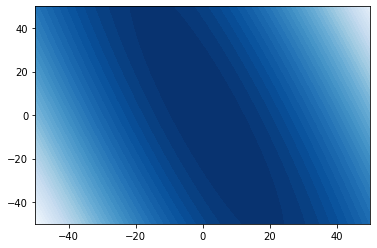

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
  return (1-x-y)**2 + (4-2*x-y)**2 + (5-4*x-y)**2

x = np.linspace(-50, 50, num=50)
y = np.linspace(-50, 50, num=50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

cs = plt.contourf(X, Y, -Z, 40, cmap='Blues')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

Then

$$
\begin{aligned}
\nabla f(\boldsymbol{x}) & =
\underbrace{
  \begin{pmatrix}
  & 2 (1-x_1-x_2)(-1) \\
  & 2 (1-x_1-x_2)(-1) \\
  \end{pmatrix}
}_{\nabla f_1(\boldsymbol x)}
+\underbrace{
    \begin{pmatrix}
  & 2 (4-2\, x_1-x_2)(-2) \\
  & 2 (4-2\, x_1-x_2)(-1) \\
  \end{pmatrix}
}_{\nabla f_2(\boldsymbol x)}
+\underbrace{
  \begin{pmatrix}
  & 2 (5-4\, x_1-x_2)(-4) \\
  & 2 (5-4\, x_1-x_2)(-1) \\
  \end{pmatrix}
  }_{\nabla f_3(\boldsymbol x)}=\\
& =
\underbrace{
  \begin{pmatrix}
  & -2+2\, x_1+2\,x_2 \\
  & -2+2\, x_1+2\,x_2 \\
  \end{pmatrix}
}_{\nabla f_1(\boldsymbol x)}
+\underbrace{
    \begin{pmatrix}
  & -16 \,+8\, x_1+4\,x_2 \\
  & -8 \,+4\, x_1+2\,x_2 \\
  \end{pmatrix}
}_{\nabla f_2(\boldsymbol x)}
+\underbrace{
  \begin{pmatrix}
  & -40\,+32\, x_1+8\,x_2 \\
  & -10+8\, x_1+2\,x_2 \\
  \end{pmatrix}
  }_{\nabla f_3(\boldsymbol x)}.
  \end{aligned}
$$
Let $\boldsymbol{x}^0=(1,1)^\top$ and $\alpha=0.01$.
Then

$$
\begin{aligned}
\boldsymbol{x}^1&=\boldsymbol{x}^0-\alpha \cdot \nabla f_1(\boldsymbol{x}^0)=(1,1)^\top-0.01\cdot (2,2)^\top=(0.98,0.98)^\top; \\
\boldsymbol{x}^2&=\boldsymbol{x}^1-\alpha \cdot \nabla f_2(\boldsymbol{x}^1)=\cdots=(1.02,1.00)^\top; \\
\boldsymbol{x}^3&=\boldsymbol{x}^2-\alpha \cdot \nabla f_3(\boldsymbol{x}^2)=\cdots=(1.02,1.00)^\top; \\
\boldsymbol{x}^4&=\boldsymbol{x}^3-\alpha \cdot \nabla f_1(\boldsymbol{x}^3)=\cdots=(0.99,0.98)^\top; \\
&\cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \cdots \\
\boldsymbol{x}^{1000}&=\cdots \cdots \cdots \cdots \cdots  = \cdots =(1.\color{red}{1}9,0.\color{red}{6})^\top.
\end{aligned}
$$

The true minimim is at $(1.2143,0.5)$.
SGD needs more iterations then GD.
With the same $\alpha$ and number of iterations GD would give $(1.214\color{red}{2}8, 0.50000\color{red}{3})$ that's much closer to the true answer.
But if you have millions of summands in real world big data SGD becomes computationally viable.

#Coordinate descent

Coordinate descent is based on the idea that the minimization of a multivariable function $f(\boldsymbol{x})$ can be achieved by minimizing it along one direction at a time, i.e., solving univariate (or at least much simpler) optimization problems in a loop. In the simplest case of cyclic coordinate descent, one cyclically iterates through the directions, one at a time, minimizing the objective function with respect to each coordinate direction at a time.

Suppose $\boldsymbol {x}=(x_1, x_2, \cdots, x_n)$.

The algo is following
$$x_i^{k+1}=\text{argmin}_{y\in \mathbb{R}} f(x_1^k, \cdots, y , \cdots, x_n^k).$$
At its step we minimize function of one variable (line search). This could be done with gradient descent, momentum or other methods.

In [ ]:
#@title ##Coordinate descent for function of 2 variables
%%html
<?xml version="1.0" encoding="UTF-8"?>
<svg width="119.8mm" height="108.23mm" version="1.1" viewBox="0 0 210.45 190.71" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns26="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker5324" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="marker5314" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="marker5304" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="marker5294" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="marker5284" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="marker5274" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="marker5264" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#980000" fill-opacity=".56818" fill-rule="evenodd" stroke="#980000" stroke-opacity=".56818" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".45455" fill-rule="evenodd" stroke="#000" stroke-opacity=".45455" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Mend-0" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".45455" fill-rule="evenodd" stroke="#000" stroke-opacity=".45455" stroke-width="1pt"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(.086142 -53.172)">
  <g transform="translate(25.637 1.6124)" fill="#0069ff" fill-rule="evenodd">
   <ellipse transform="matrix(.49642 -.86809 .71054 .70366 0 0)" cx="-36.659" cy="148.03" rx="72.395" ry="35.942" fill-opacity=".07" stroke-width=".82651"/>
   <g fill-opacity=".1">
    <ellipse transform="matrix(.53912 -.84223 .52556 .85076 0 0)" cx="8.0011" cy="171.76" rx="54.813" ry="27.855"/>
    <ellipse transform="matrix(.52651 -.85017 .80321 .59569 0 0)" cx="-58.069" cy="159.43" rx="37.035" ry="17.986"/>
    <ellipse transform="matrix(.53335 -.8459 .82566 .56417 0 0)" cx="-63.428" cy="161.67" rx="24.364" ry="11.979"/>
    <ellipse transform="matrix(.53137 -.84714 .77207 .63554 0 0)" cx="-48.452" cy="164.74" rx="15.202" ry="7.1607"/>
   </g>
  </g>
  <g fill="none">
   <path d="m0.11857 224.67h208.05" fill="#000" fill-opacity=".1" marker-end="url(#Arrow1Mend)" stroke="#000" stroke-opacity=".4" stroke-width=".69929"/>
   <g stroke="#980000" stroke-opacity=".56818">
    <path d="m87.787 214.04-0.22392-34.326" marker-end="url(#marker5264)" stroke-width=".6332"/>
    <path d="m87.691 178.88 16.711-0.2014" marker-end="url(#marker5274)" stroke-width=".71252"/>
    <path d="m105.43 178.68-0.0267-9.358" marker-end="url(#marker5284)" stroke-width=".61193"/>
    <path d="m105.45 168.4 8.4002-0.14947" marker-end="url(#marker5294)" stroke-width=".62828"/>
    <path d="m114.88 168.17-0.15944-6.3153" marker-end="url(#marker5304)" stroke-width=".63071"/>
    <path d="m114.73 160.97 6.5632-0.0388" marker-end="url(#marker5314)" stroke-width=".72603"/>
    <path d="m122.34 160.85-0.16985-5.131" marker-end="url(#marker5324)" stroke-width=".635"/>
   </g>
   <path d="m13.695 243.88v-189.33" fill="#000" fill-opacity=".1" marker-end="url(#Arrow1Mend-0)" stroke="#000" stroke-opacity=".4" stroke-width=".69929"/>
  </g>
  <g transform="matrix(1.4355,0,0,1.4355,29.48,259.68)" ns26:alignment="middle center" ns26:jacobian_sqrt="0.849361" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.4076355951901767" ns26:texconverter="pdflatex" ns26:text="$$x_1 x_1^1 x_1^2 x_1^0 x_1^3 x_2^1 x_2^2 x_2^0 x_2^3$$" ns26:version="1.1.0">
   <g id="id-a93926dd-c2d2-44fb-a8f6-0ced4dd004dc" transform="translate(-260.19,-137.98)">
    <g fill-opacity=".8">
     <g id="id-da855989-bb94-4b4d-a134-91994d10320f" transform="matrix(.88463 0 0 .88463 150.12 -9.3471)">
      <g transform="translate(259.89,146.72)" fill-opacity=".8">
       <path d="m2.4906-2.8885c0.05233-0.20934 0.24859-0.98126 0.82426-0.98126 0.03925 0 0.24859 0 0.41867 0.10467-0.2355 0.05233-0.3925 0.24859-0.3925 0.45792 0 0.13084 0.09158 0.28784 0.314 0.28784 0.18317 0 0.44484-0.14392 0.44484-0.48409 0-0.43176-0.48409-0.54951-0.77193-0.54951-0.48409 0-0.77193 0.44484-0.87659 0.62801-0.20934-0.54951-0.65418-0.62801-0.90276-0.62801-0.86351 0-1.3476 1.0728-1.3476 1.2822 0 0.09158 0.09158 0.09158 0.10467 0.09158 0.06542 0 0.09158-0.02617 0.10467-0.09158 0.28784-0.88968 0.83734-1.099 1.1252-1.099 0.157 0 0.44484 0.0785 0.44484 0.56259 0 0.26167-0.14392 0.81118-0.44484 1.9887-0.13084 0.51026-0.43176 0.86351-0.79809 0.86351-0.05233 0-0.2355 0-0.41867-0.10467 0.20934-0.05233 0.3925-0.22242 0.3925-0.45792 0-0.22242-0.18317-0.28784-0.30092-0.28784-0.26167 0-0.45792 0.20934-0.45792 0.48409 0 0.37942 0.40559 0.54951 0.77193 0.54951 0.56259 0 0.86351-0.58876 0.87659-0.62801 0.10467 0.30092 0.40559 0.62801 0.90276 0.62801 0.86351 0 1.3345-1.0728 1.3345-1.2822 0-0.09158-0.06542-0.09158-0.09158-0.09158-0.0785 0-0.09158 0.03925-0.11775 0.09158-0.27475 0.90276-0.83734 1.099-1.099 1.099-0.32709 0-0.45792-0.26167-0.45792-0.54951 0-0.18317 0.03925-0.36634 0.13084-0.73268z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.88463 0 0 .88463 150.12 -9.3471)">
      <g transform="translate(265.58,148.21)" fill-opacity=".8">
       <path d="m0.72712-4.3221c0-0.157 0-0.157-0.17008-0.157-0.37942 0.36634-0.90276 0.36634-1.1383 0.36634v0.20934c0.13084 0 0.52334 0 0.83734-0.157v2.97c0 0.19625 0 0.27475-0.57567 0.27475h-0.22242v0.20934c0.10467 0 0.82426-0.02617 1.0336-0.02617 0.18317 0 0.91585 0.02617 1.0467 0.02617v-0.20934h-0.22242c-0.58876 0-0.58876-0.0785-0.58876-0.27475z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 115.13 25.354)">
      <g transform="translate(270.05,146.72)" fill-opacity=".8">
       <path d="m30.638 0.78545c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5313 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-5e548f3c-dbe5-4da9-9c01-fdda0794648f" transform="matrix(.64906 0 0 .64906 115.13 25.354)">
      <g transform="translate(275.75,142.61)" fill-opacity=".8">
       <path d="m29.638-0.6364c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 115.13 25.354)">
      <g transform="translate(275.75,149.18)" fill-opacity=".8">
       <path id="id-a1d749e2-363b-48e6-b792-ad32ab6a126f" d="m29.638-0.6364c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 116.56 25.595)">
      <g transform="translate(280.22,146.72)" fill-opacity=".8">
       <path d="m30.638 0.78545c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5313 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 116.56 25.595)">
      <g transform="translate(285.91,142.61)" fill-opacity=".8">
       <path d="m30.826 2.5354h-0.23438c-0.01563 0.15625-0.09375 0.5625-0.1875 0.625-0.04687 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2813c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39063 0.375 0.39063 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.04687-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.07813 0.0625-0.07813 0.078125-0.07813 0.26562h2.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 116.56 25.595)">
      <g transform="translate(285.91,149.18)" fill-opacity=".8">
       <path d="m29.638-0.6364c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 102.52 39.546)">
      <g transform="translate(290.38,146.72)" fill-opacity=".8">
       <path id="id-62a7020c-84f5-4e65-845f-d619f369a7af" d="m11.434-21.642c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92187-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.04687-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-2e797095-085b-4844-97ce-188f19ec97bb" transform="matrix(.64906 0 0 .64906 102.52 39.546)">
      <g transform="translate(296.07,142.61)" fill-opacity=".8">
       <path d="m11.699-20.845c0-0.76562-0.09375-1.3281-0.40625-1.8125-0.21875-0.3125-0.65625-0.59375-1.2031-0.59375-1.625 0-1.625 1.9062-1.625 2.4062s0 2.3594 1.625 2.3594c1.6094 0 1.6094-1.8594 1.6094-2.3594zm-1.6094 2.1562c-0.32812 0-0.75-0.1875-0.89062-0.75-0.09375-0.40625-0.09375-0.98438-0.09375-1.5s0-1.0469 0.09375-1.4219c0.15625-0.54688 0.59375-0.70312 0.89062-0.70312 0.375 0 0.73438 0.23438 0.85938 0.64062 0.10938 0.375 0.125 0.875 0.125 1.4844 0 0.51562 0 1.0312-0.09375 1.4688-0.14062 0.64062-0.60938 0.78125-0.89062 0.78125z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 102.52 39.546)">
      <g transform="translate(296.07,149.18)" fill-opacity=".8">
       <path d="m10.434-23.064c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-6a3ef2cc-40cf-40db-b71a-d17ad6cb3d0e" transform="matrix(.68825 0 0 .68825 25.542 -16.044)">
      <g transform="translate(310.71,146.72)" fill-opacity=".8">
       <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 25.542 -16.044)">
      <g transform="translate(316.4,142.61)" fill-opacity=".8">
       <path id="id-9aff0c0e-5eab-46fc-8eee-23a62a48ccac" d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 25.542 -16.044)">
      <g transform="translate(316.4,149.18)" fill-opacity=".8">
       <path d="m3.5156-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 19.02 -24.463)">
      <g transform="translate(320.87,146.72)" fill-opacity=".8">
       <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-6110a62f-cb15-4ed1-be9a-313357240ffb" transform="matrix(.68825 0 0 .68825 19.02 -24.463)">
      <g transform="translate(326.56,142.61)" fill-opacity=".8">
       <path id="id-11a73f17-91e0-41fb-8da2-37cfaaec699f" d="m3.5156-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 19.02 -24.463)">
      <g transform="translate(326.56,149.18)" fill-opacity=".8">
       <path id="id-3b5bf4b5-91f2-4a8a-b939-20827e39ffae" d="m3.5156-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-a74c4fd6-1f31-4105-a933-a2075fee92ce" transform="matrix(.68825 0 0 .68825 11.579 6.5774)">
      <g transform="translate(331.03,146.72)" fill-opacity=".8">
       <path d="m2.9684-1.7597c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-23b70c5b-837d-48b4-833e-cf33c40f10bd" transform="matrix(.68825 0 0 .68825 11.579 6.5774)">
      <g transform="translate(336.73,142.61)" fill-opacity=".8">
       <path d="m3.2341-0.9629c0-0.76562-0.09375-1.3281-0.40625-1.8125-0.21875-0.3125-0.65625-0.59375-1.2031-0.59375-1.625 0-1.625 1.9062-1.625 2.4062s0 2.3594 1.625 2.3594c1.6094 0 1.6094-1.8594 1.6094-2.3594zm-1.6094 2.1562c-0.32812 0-0.75-0.1875-0.89062-0.75-0.09375-0.40625-0.09375-0.98438-0.09375-1.5s0-1.0469 0.09375-1.4219c0.15625-0.54688 0.59375-0.70312 0.89062-0.70312 0.375 0 0.73438 0.23438 0.85938 0.64062 0.10938 0.375 0.125 0.875 0.125 1.4844 0 0.51562 0 1.0312-0.09375 1.4688-0.14062 0.64062-0.60938 0.78125-0.89062 0.78125z" fill-opacity=".7"/>
      </g>
     </g>
     <g id="id-9e4de5f7-4e4f-4f50-adfb-b5bc7a7d563f" transform="matrix(.68825 0 0 .68825 11.579 6.5774)">
      <g transform="translate(336.73,149.18)" fill-opacity=".8">
       <path d="m3.1559-0.009697h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 4.9692 -32.94)">
      <g transform="translate(341.2,146.72)" fill-opacity=".8">
       <path id="id-95fa966b-dc4d-410f-a1ec-c3c1790c21de" d="m3.3689-2.526c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 4.9692 -32.94)">
      <g transform="translate(346.89,142.61)" fill-opacity=".8">
       <path id="id-ab8b3564-d24e-4543-acf1-6ab1ca08508a" d="m1.947-1.8385c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85938-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3438 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.68825 0 0 .68825 4.9692 -32.94)">
      <g transform="translate(346.89,149.18)" fill-opacity=".8">
       <path id="id-28879c6c-4de5-4e5a-b5ae-075589834aec" d="m3.5564-0.77601h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 84.058 25.672)">
      <g transform="translate(341.2,146.72)" fill-opacity=".8">
       <path d="m30.638 0.78545c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5313 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 84.058 25.672)">
      <g transform="translate(346.89,142.61)" fill-opacity=".8">
       <path d="m29.216 1.4729c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85937-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3437 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76563 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14063-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82813-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.01563 0-0.07813 0.015625-0.07813 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.64906 0 0 .64906 123.75 25.801)">
      <g transform="translate(285.91,149.18)" fill-opacity=".8">
       <path d="m29.638-0.6364c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".7"/>
      </g>
     </g>
     <g transform="matrix(.83734 0 0 .83734 -28.91 -123.91)">
      <g transform="translate(320.87,146.72)" fill-opacity=".8">
       <path d="m2.9784-3.1761c0.055289-0.22116 0.26262-1.0367 0.8708-1.0367 0.041467 0 0.26262 0 0.44231 0.11058-0.2488 0.055289-0.41467 0.26262-0.41467 0.48378 0 0.13822 0.096756 0.30409 0.33173 0.30409 0.19351 0 0.46996-0.15205 0.46996-0.51142 0-0.45614-0.51142-0.58054-0.81551-0.58054-0.51142 0-0.81551 0.46996-0.92609 0.66347-0.22116-0.58054-0.69111-0.66347-0.95374-0.66347-0.91227 0-1.4237 1.1334-1.4237 1.3546 0 0.096755 0.096756 0.096755 0.11058 0.096755 0.069111 0 0.096756-0.027644 0.11058-0.096755 0.30409-0.93991 0.88463-1.1611 1.1887-1.1611 0.16587 0 0.46996 0.082933 0.46996 0.59436 0 0.27645-0.15204 0.85698-0.46996 2.101-0.13822 0.53907-0.45614 0.91227-0.84316 0.91227-0.055289 0-0.2488 0-0.44231-0.11058 0.22116-0.055289 0.41467-0.23498 0.41467-0.48378 0-0.23498-0.19351-0.30409-0.31791-0.30409-0.27645 0-0.48378 0.22116-0.48378 0.51142 0 0.40085 0.42849 0.58054 0.81551 0.58054 0.59436 0 0.91227-0.622 0.92609-0.66347 0.11058 0.31791 0.42849 0.66347 0.95374 0.66347 0.91227 0 1.4099-1.1334 1.4099-1.3546 0-0.096755-0.069111-0.096755-0.096756-0.096755-0.082933 0-0.096756 0.041466-0.1244 0.096755-0.29027 0.95374-0.88463 1.1611-1.1611 1.1611-0.34556 0-0.48378-0.27645-0.48378-0.58054 0-0.19351 0.041467-0.38702 0.13822-0.77405z" fill-opacity=".8"/>
      </g>
     </g>
     <g transform="matrix(.83734 0 0 .83734 -28.91 -123.91)">
      <g transform="translate(326.56,149.18)" fill-opacity=".8">
       <path d="m2.4873-1.9121h-0.20733c-0.013822 0.13822-0.082933 0.4976-0.16587 0.55289-0.041467 0.041467-0.51142 0.041467-0.60818 0.041467h-1.1334c0.64965-0.56671 0.8708-0.7464 1.2302-1.0367 0.45614-0.35938 0.88463-0.7464 0.88463-1.3269 0-0.7464-0.64965-1.2025-1.4375-1.2025-0.76023 0-1.2855 0.53907-1.2855 1.1058 0 0.30409 0.26262 0.34556 0.33173 0.34556 0.13822 0 0.31791-0.11058 0.31791-0.33173 0-0.11058-0.041467-0.33173-0.35938-0.33173 0.19351-0.42849 0.60818-0.56671 0.89845-0.56671 0.622 0 0.93991 0.48378 0.93991 0.98138 0 0.53907-0.38702 0.95374-0.58054 1.1749l-1.479 1.479c-0.069111 0.055289-0.069111 0.069111-0.069111 0.23498h2.5433z" fill-opacity=".8"/>
      </g>
     </g>
    </g>
    <path d="m247.2 106.18 3.2855-9.2e-4" fill="none" stroke="#980000" stroke-opacity=".68182" stroke-width=".31186"/>
    <path d="m247.3 81.68 3.2855-9.2e-4" fill="none" stroke="#980000" stroke-opacity=".68182" stroke-width=".31186"/>
   </g>
  </g>
  <g transform="translate(25.637 1.6124)" fill="none" stroke="#850000" stroke-opacity=".2" stroke-width=".51282">
   <path d="m62.149 213v9.175" fill="#980000" fill-opacity=".6"/>
   <path d="m79.79 177.26v45.063" fill="#000" fill-opacity=".1"/>
   <path d="m89.244 166.56v55.603"/>
   <path d="m96.7 159.23v62.834"/>
  </g>
  <circle cx="87.774" cy="214.11" r="1.2778" fill="#980000" fill-opacity=".6" fill-rule="evenodd"/>
  <g fill="none" stroke="#980000" stroke-opacity=".68182" stroke-width=".44768">
   <path d="m87.787 228.51-0.0013-4.7165"/>
   <path d="m105.46 228.63-1e-3 -4.7165"/>
   <path d="m114.89 228.47-1e-3 -4.7165"/>
   <path d="m122.36 228.36-1e-3 -4.7165"/>
   <path d="m11.057 168.42 4.7165-1e-3"/>
   <path d="m11.107 160.98 4.7165-1e-3"/>
  </g>
  <ellipse transform="matrix(-.5597 -.8287 .83526 -.54986 0 0)" cx="-193.89" cy="22.292" rx="1.1947" ry="1.2309" fill="#0069ff" fill-opacity=".56061" fill-rule="evenodd"/>
  <ellipse transform="matrix(.50481 -.86323 .82602 .56364 0 0)" cx="-51.582" cy="181.95" rx="30.095" ry="14.828" fill="#0069ff" fill-opacity=".1" fill-rule="evenodd"/>
 </g>
 <ellipse transform="matrix(.54522 -.83829 .77753 .62884 0 0)" cx="7.1291" cy="158.29" rx="19.411" ry="9.3634" fill="#0069ff" fill-opacity=".1" fill-rule="evenodd" stroke-width=".63819"/>
 <g fill="#980000" fill-opacity=".6" stroke="#980000" stroke-opacity=".2">
  <path d="m87.873 160.86h-72.234" stroke-width=".4662px"/>
  <path d="m87.777 125.71h-71.992" stroke-width=".46542px"/>
  <path d="m105.53 115.23h-89.674" stroke-width=".47304"/>
  <path d="m114.82 107.8h-98.9" stroke-width=".45244"/>
 </g>
</svg>





##Example
As before
$$
\begin{aligned}
f(\boldsymbol{x})&=(1-\, x_1-x_2)^2+(4-2\, x_1-x_2)^2+(5-4\, x_1-x_2)^2=\\
&=42-58\, x+21\, x^2-20\, y+14\, xy+3 \, y^2.
\end{aligned}
$$
and $\boldsymbol{x}^0=(1,1)^\top$.
$$
\begin{aligned}
x_1^1 &=\text{argmin}_{y}f((y,1)^\top)=25-44\, y + 21 y^2=1.05;\\
x_1^2 &=\text{argmin}_{y}f((1.05,y)^\top)=\cdots=0.89; \\
x_2^1 &=\cdots=\cdots=1.08; \\
& \cdots \cdots \cdots \cdots \cdots \cdots \\
x_1^{1000}&=1.21429;\\
x_2^{1000}&=0.5.
\end{aligned}
$$

#Conjugate gradient method

`1. Calculate`
$$
\Delta x_n = -\nabla f(x_n)
$$
`2. Compute` $\beta_n$ `according to one of the formulas below`

* Fletcher-Reeves:
$$
\beta^{FR}_n=\frac{\Delta x_n^\top \Delta x_n}{\Delta x^{\top}_{n-1} \Delta x_{n-1}}
$$
* Polak–Ribière:
$$
\beta^{PR}_n=\frac{\Delta x_n^\top (\Delta x_n-\Delta x_{n-1})}{\Delta x^{\top}_{n-1} \Delta x_{n-1}}
$$
* Hestenes-Stiefel:
$$
\beta^{HS}_n=\frac{\Delta x_n^\top (\Delta x_n-\Delta x_{n-1})}{-s^{\top}_{n-1}(\Delta x_n-\Delta x_{n-1})}
$$
* Dai–Yuan:
$$
\beta^{DY}_n=\frac{\Delta x_n^\top \Delta x_n}{-s^{\top}_{n-1}(\Delta x_n-\Delta x_{n-1})}
$$

`3.Update the conjugate direction` $s_n=\Delta x_n+\beta_n s_{n-1}$.

`4.Perform a line search: optimize` $\alpha_n=\text{argmin}_\alpha f(x_n+\alpha \, s_n)$.

`5. Update the position` $x_{n+1}=x_n+\alpha_n s_n$.

In [ ]:
#@title #Exploring Newton CG


from IPython.display import display
import ipywidgets as widgets


class Memory:
  def __init__(self):
    self.x_ini = 0.0
    self.y_ini = 0.0
    self.iters = 2
    self.theta = 0.5

current_memory = Memory()

button = widgets.Button(description="Recalculate")
iters = widgets.IntSlider(min=2, max=50,
                          value=current_memory.iters,
                          description='Max Iterations:')

fnc = widgets.Text(value='(x/2)**2+(y)**2',
                   #placeholder='function',
                   description='Function:',
                   disabled=False)
theta_widget = widgets.FloatSlider(min=0.0, max=1.0,
                                   value=current_memory.theta,
                                   description='Theta')
def iter_assign(val):
  current_memory.iters = val.new
def theta_assign(val):
  current_memory.theta = val.new
iters.observe(iter_assign, names='value')
theta_widget.observe(theta_assign, names='value')

display(widgets.HBox([button, fnc]))

def on_button_clicked(b):
  function = fnc.value
  from IPython.display import clear_output
  clear_output()
  display(widgets.HBox([button, fnc]))
  print('Doing Science...')

  x_ini = current_memory.x_ini
  y_ini = current_memory.y_ini
  max_iter = current_memory.iters


  from plotly.subplots import make_subplots
  import plotly.graph_objects as go
  import numpy as np
  from scipy.optimize import minimize

  from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
  transformations = (standard_transformations + (implicit_multiplication_application,))
  f = parse_expr(function, transformations=transformations)

  from sympy import diff
  from sympy import lambdify
  g_x = lambdify(['x', 'y'], diff(f, 'x'), "numpy")
  g_y = lambdify(['x', 'y'], diff(f, 'y'), "numpy")
  jacobian = lambda x,y: np.array([g_x(x, y), g_y(x, y)], dtype=float)
  func_to_minimize = lambdify(['x', 'y'], f, "numpy")
  g_xx = lambdify(['x', 'y'], diff(diff(f, 'x'), 'x'), "numpy")
  g_xy = lambdify(['x', 'y'], diff(diff(f, 'x'), 'y'), "numpy")
  g_yy = lambdify(['x', 'y'], diff(diff(f, 'y'), 'y'), "numpy")
  H = lambda x,y: [[g_xx(x, y), g_xy(x, y)], [g_xy(x, y), g_yy(x, y)]]

  history = [np.array([x_ini, y_ini])]
  def remember(x):
     history.append(x)

  from scipy import optimize
  f = lambda x: func_to_minimize(x[0], x[1]) #(x[0]/2)**2 + x[1]**2 #
  j = lambda x: jacobian(x[0], x[1]) #np.array([x[0]/2, 2*x[1]]) #
  h = lambda x: H(x[0], x[1])
  global res
  res = optimize.fmin_ncg(f, np.array([x_ini, y_ini]), fprime=j,
                          fhess=h, callback=remember)
  history.append(res)




  crashed = False

  _h = np.array(history)
  _x = _h.T[0]
  _y = _h.T[1]
  _z = np.array([f(x) for x in history], dtype=float)

  x_min = min(-10.0, np.min(_x))
  x_max = max(10.0, np.max(_x))
  y_min = min(-10.0, np.min(_y))
  y_max = max(10.0, np.max(_y))

  x_ = np.linspace(x_min, x_max, num=50)
  y_ = np.linspace(y_min, y_max, num=50)
  z_ = np.array([[f([x,y]) for x in x_] for y in y_], dtype=float)


  import matplotlib.pyplot as plt
  import base64
  import io
  fig = plt.figure(figsize=(20,20))
  ax = fig.gca()
  ax.axis('off')
  if np.max(z_) - np.min(z_) > 100:
    ax.contourf(x_, y_, np.sign(z_)*np.log(np.abs(z_) + 1.0), alpha=0.3)
  else:
    ax.contourf(x_, y_, z_, alpha=0.3)
  plt.close(fig)
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = u'data:image/  png;base64,' + base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()


  fig = dict(
      layout = dict(
          width=1200, height=600, autosize=False,
          showlegend = False,
          scene = {'domain': { 'x': [0.0, 0.44], 'y': [0, 1] } },
          xaxis1 = {'domain': [0.55, 1], 'range': [x_min, x_max], 'fixedrange': True},
          yaxis1 = {'domain': [0.0, 1.0], 'range': [y_min, y_max], 'fixedrange': True},
          title  = 'Minimization',
          margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
          updatemenus = [{'buttons': [{'args': [[k for k in range(len(_h))],
                                                {'frame': {'duration': 500.0, 'redraw': True},
                                                'fromcurrent': False, 'transition': {'duration': 0, 'easing': 'linear'}}],
                                      'label': 'Play',
                                      'method': 'animate'},
                                      {'args': [[None], {'frame': {'duration': 0, 'redraw': True},
                                                        'mode': 'immediate',
                                                        'transition': {'duration': 0}}
                                                ],
                                      'label': 'Pause',
                                      'method': 'animate'
                                      }
                                      ],
                          'direction': 'left',
                          'pad': {'r': 10, 't': 85},
                          'showactive': True,
                          'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'}],
          sliders = [{'yanchor': 'top',
                      'xanchor': 'left',
                      'currentvalue': {'font': {'size': 16}, 'prefix': 'Step: ', 'visible': True, 'xanchor': 'right'},
                      'transition': {'duration': 0.0},
                      'pad': {'b': 10, 't': 50},
                      'len': 0.9,
                      'x': 0.1,
                      'y': 0,
                      'steps': [{'args': [[k], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': True},
                                                'transition': {'duration': 0, 'easing': 'linear'}}
                                          ],
                                'label': k,
                                'method': 'animate'} for k in range(len(_h))
                      ]}],
          images = [{'source' : image_base64,
                    'xref': 'x', 'yref': 'y',
                    'sizing': 'stretch',
                    'sizex': x_max - x_min, 'sizey': y_max - y_min,
                    'layer': 'below', 'opacity':1.0,
                    'x': x_min, 'y': y_max}]
      ),
      data = [
          {'type': 'scatter3d', 'name': 's3', 'x': _x, 'y': _y, 'z': _z,
           'line': {'color': 'red', 'width': 2},
           'marker': {'size': 4, 'colorscale': 'Viridis'}},
          {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': z_, 'opacity': 0.8, 'showscale': False},
          #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
          {'type': 'scatter', 'name': 's2', 'x': _x, 'y': _y,
          'line': {'color': 'red', 'width': 2}
          },
      ],
      frames=[
          {'name': str(k),
          'data': [
            {'type': 'scatter3d', 'name': 's3', 'x': _x[:k], 'y': _y[:k], 'z': _z[:k], 'line': {'color': 'red', 'width': 2}, 'marker': {'size': 4, 'colorscale': 'Viridis'}},
            {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': z_, 'opacity': 0.8, 'showscale': False},
            #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
            {'type': 'scatter', 'name': 's2', 'x': _x[:k], 'y': _y[:k],
            'line': {'color': 'red', 'width': 2}
            },
          ]} for k in range(len(_h)) ]
  )
  #plot(fig, auto_open=False)
  clear_output()
  if (crashed):
      print("Cannot find inverse matrix, Method compromised")
      print("Current gradient value: ")
      print(h)
      print("Current point: ", history[-1])

  display(widgets.HBox([button, fnc]))
  f = go.Figure(fig)
  f.show()

  def save_pos(pos):
    global current_memory
    current_memory.x_ini = (x_max - x_min) * pos[0] + x_min
    current_memory.y_ini = (y_max - y_min) * (1.0 - pos[1]) + y_min

  main_str = '''
  <canvas id="paint_here"
          onmousedown="mdown_handle(event)"
          onmousemove="mmove_handle(event)"
          onmouseup="mup_handle(event)"></canvas>
  <script>

  var el = document.getElementsByClassName("layer-subplot")[0];
  var rect = el.getBoundingClientRect();

  var canvas = document.getElementById("paint_here");
  canvas.style.cssText = "position:absolute; top:" + rect.top
                      + "px; left: " + rect.left
                      + "px; width:" + rect.width
                      + "px; height:" + rect.height
                      + "px; z-index:1000;";
  canvas.width = rect.width;
  canvas.height = rect.height;
  var ctx = canvas.getContext('2d');
  ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
  //ctx.fillStyle="#00FF00";
  //ctx.fillRect(0, 0, canvas.width, canvas.height); // field
  ''' + 'var x_ini = ' + str((current_memory.x_ini - x_min)/(x_max - x_min)) + ';' + 'var y_ini = ' + str(1.0 - (current_memory.y_ini - y_min)/(y_max - y_min)) + ';' + '''
  var active_pt = [canvas.width * x_ini, canvas.height * y_ini];

  function draw() {
      ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
      //ctx.fillText("drawing", 20, 20);

      ctx.beginPath();
      ctx.arc(active_pt[0], active_pt[1], 10, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = "rgba(210, 0, 0, 0.75)";
      ctx.fill();
  }

  var do_move = false;

  function is_close(pt1, pt2) {
    return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
          +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
          <= 10*10;
  }

  function mdown_handle(evt) {
    x = evt.offsetX;
    y = evt.offsetY;
    do_move = is_close(active_pt, [x, y]);
  }

  function mmove_handle(evt) {
    if (!do_move)
        return;
    active_pt[0] = evt.offsetX;
    active_pt[1] = evt.offsetY;
  }

  function mup_handle(evt) {
    do_move = false;
    remember();
  }

  var w = canvas.width;
  var h = canvas.height;

  async function remember() {
    var x = active_pt[0] / w;
    var y = active_pt[1] / h;
    const result = await google.colab.kernel.invokeFunction('notebook.rememberPos', [[x, y]], {});
  }

  var timer = setInterval(draw, 10);

  </script>
  '''

  import IPython
  from google.colab import output
  display(IPython.display.HTML(main_str))
  output.register_callback('notebook.rememberPos', save_pos)
  print(res)


button.on_click(on_button_clicked)

[0.00000000e+00 8.67361738e-19]


#Optimized gradient descent (ft. Hessian)

In the methods above we adjusted $\alpha$ using first order information from the function (gradient). We could do better if we use second-order information (hessian).
Suppose we substitute function $f$ with quadratic approximation

$$
f(\boldsymbol {x}+ \alpha \boldsymbol {h}) \approx f(\boldsymbol {x})+\alpha \nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{\alpha^2}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h},
$$

where $h$ is a arbitrary direction and $\alpha$ is a variable. Let me denote it by

$$
\bar{f}(\alpha)=f(\boldsymbol {x})+\alpha \nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{\alpha^2}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}.
$$

In [ ]:
#@title #Geometric interpretation
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_optimized_grad_desc_approx.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

Differentiate it by $\alpha$ and set the derivative to $0$ to get extremum

$$
\frac{d\bar{f}}{d\alpha}=0 \quad \Longrightarrow \quad \alpha_*=-\frac{\nabla f(\boldsymbol {x}) \boldsymbol {h}}{\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}}.
$$

Now in the method of gradient descent we can choose

$$
\boldsymbol {h}=\nabla f(\boldsymbol {x}), \\
\alpha =-\frac{\boldsymbol {h}^{\top} \boldsymbol {h}}{\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}}.
$$

All in all we have

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\frac{\boldsymbol {h}^{\top} \boldsymbol {h}}{\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}} \cdot \boldsymbol {h}.
$$

where $\boldsymbol {h}=\nabla f(\boldsymbol{x}_{n})$.

In [ ]:
#@title #Exploring gradient+hessian descent
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_optimized_grad_desc.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

#Newton's method (Newton-Raphson method / метод дотичних)

This is another second order method that makes use of hessian

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\boldsymbol{H}^{-1}(\boldsymbol{x}_n) \cdot \nabla f(\boldsymbol{x}_{n}).
$$

This is a generalization of a $1D$ Newton method to find zeros of the function $f$

$$
x_{n+1}=x_n-\frac{f(x_n)}{f^{'}(x_n)}.
$$

In [ ]:
#@title ##Newton-Raphson method
%%html

<div id="slide_1" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="120mm" version="1.1" viewBox="0 0 97.948 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-54.51 -111.73)" fill="none" stroke="#000" stroke-opacity=".41288">
  <path d="m61.444 202.02v-89.61" marker-end="url(#marker1496)" stroke-width=".34396"/>
  <path d="m54.51 158.93h97.209" marker-end="url(#marker1506)" stroke-width=".3752"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 95.262 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <g transform="translate(-300.45 -142.31)">
   <g fill-opacity=".73864">
    <g transform="translate(300.16 146.72)">
     <path d="m2.9415-58.566c0.048043-0.1922 0.22824-0.90093 0.75678-0.90093 0.036034 0 0.22824 0 0.3844 0.09609-0.21622 0.04804-0.36037 0.22824-0.36037 0.42044 0 0.12012 0.084088 0.26427 0.2883 0.26427 0.16817 0 0.40842-0.13214 0.40842-0.44446 0-0.39641-0.44446-0.50452-0.70873-0.50452-0.44446 0-0.70873 0.40842-0.80483 0.5766-0.1922-0.50452-0.60062-0.5766-0.82886-0.5766-0.79282 0-1.2373 0.98502-1.2373 1.1772 0 0.08408 0.084083 0.08408 0.096096 0.08408 0.060067 0 0.084083-0.02403 0.096096-0.08408 0.26427-0.81685 0.7688-1.009 1.0331-1.009 0.14415 0 0.40842 0.07208 0.40842 0.51654 0 0.24025-0.13214 0.74477-0.40842 1.8259-0.12013 0.46848-0.39641 0.79282-0.73276 0.79282-0.048044 0-0.21622 0-0.3844-0.09609 0.1922-0.04804 0.36037-0.20421 0.36037-0.42044 0-0.20421-0.16817-0.26428-0.27629-0.26428-0.24025 0-0.42044 0.1922-0.42044 0.44446 0 0.34836 0.37239 0.50452 0.70873 0.50452 0.51654 0 0.79282-0.54056 0.80483-0.5766 0.096097 0.27629 0.37239 0.5766 0.82886 0.5766 0.79282 0 1.2253-0.98502 1.2253-1.1772 0-0.08409-0.060065-0.08409-0.084088-0.08409-0.072076 0-0.084088 0.03602-0.10811 0.08409-0.25226 0.82886-0.7688 1.009-1.009 1.009-0.30031 0-0.42044-0.24025-0.42044-0.50452 0-0.16818 0.03603-0.33635 0.12012-0.6727z" fill-opacity=".73864"/>
     <path d="m-129.05-8.7322c14.256-48.358 40.505-60.742 55.435-67.511 5.0123-2.2724 17.16-2.4821 26.126-9.6635 7.2557-5.8112 16.435-28.486 34.832-33.827" fill="none" stroke="#005ee5" stroke-opacity=".73864" stroke-width=".74361"/>
    </g>
    <g transform="translate(156.32 15.951)">
     <path d="m3.7944-3.9375c0.036057-0.10817 0.036057-0.12019 0.036057-0.18029 0-0.13221-0.10817-0.20433-0.22836-0.20433-0.072115 0-0.19231 0.048077-0.26442 0.15625-0.012019 0.048076-0.084134 0.27644-0.10817 0.42067-0.060095 0.19231-0.10817 0.40865-0.15625 0.61298l-0.34856 1.3822c-0.024038 0.10817-0.36057 0.64903-0.86538 0.64903-0.38461 0-0.46875-0.33654-0.46875-0.625 0-0.34855 0.13221-0.82932 0.38461-1.5024 0.12019-0.3125 0.15625-0.39663 0.15625-0.55288 0-0.33654-0.24038-0.625-0.625-0.625-0.73317 0-1.0096 1.1178-1.0096 1.1779 0 0.084134 0.072115 0.084134 0.084134 0.084134 0.084134 0 0.084134-0.024038 0.12019-0.14423 0.21634-0.72115 0.51682-0.94951 0.78124-0.94951 0.060095 0 0.19231 0 0.19231 0.24038 0 0.19231-0.084134 0.39663-0.13221 0.54086-0.3125 0.8173-0.44471 1.25-0.44471 1.6106 0 0.68509 0.48077 0.91345 0.93749 0.91345 0.30048 0 0.55288-0.13221 0.76922-0.34855-0.096153 0.39663-0.19231 0.78124-0.49278 1.1899-0.20433 0.2524-0.49278 0.48077-0.84134 0.48077-0.10817 0-0.45673-0.024038-0.58894-0.32452 0.12019 0 0.22836 0 0.32452-0.096153 0.084134-0.060096 0.15625-0.16827 0.15625-0.3125 0-0.24038-0.20433-0.26442-0.27644-0.26442-0.18029 0-0.43269 0.12019-0.43269 0.49278 0 0.38461 0.33654 0.67307 0.8173 0.67307 0.78124 0 1.5745-0.69711 1.7909-1.5625z" fill-opacity=".73864"/>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(.35278 0 0 .35278 41.318 45.325)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_1 x_2 x_3 x_4 x_5$$" ns0:version="1.1.0">
  <g transform="translate(-277.72 -125.42)">
   <circle cx="360.35" cy="130.49" r="2.0682" fill="#1077e6" fill-opacity=".6" fill-rule="evenodd"/>
   <circle cx="253.57" cy="130.78" r="2.0682" fill="#f00" fill-opacity=".4053" fill-rule="evenodd"/>
  </g>
  <g transform="matrix(.92855 0 0 .92855 86.102 -61.824)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$f(x_1)f(x_2) f(x_3) f(x_4) f(x_5)$$" ns0:version="1.1.0">
   <g transform="translate(-246.5 -139.24)"></g>
  </g>
 </g>
 <g transform="matrix(1.354 0 0 1.354 -31.27 -26.71)">
  <g transform="matrix(.35335 0 0 .35335 -27.728 30.094)">
   <g transform="translate(261.53,149.97)">
    <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(285.5,149.97)">
    <path id="id-daa45e18-73b3-43ac-928b-f8d9979cf03c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
   </g>
   <g transform="translate(296.02,149.97)">
    <path id="id-d883e366-9407-4364-9e63-3aa1c49b5b7b" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(309.35,149.97)">
    <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
   </g>
   <g id="id-abc91a4a-3a4b-4514-9086-3b8909fd4d8e">
    <g transform="translate(322.11,143.23)">
     <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
    </g>
   </g>
   <g id="id-9544b882-0449-44e2-9307-614cfff968cf">
    <g transform="translate(328.06,143.23)">
     <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
   </g>
   <g transform="translate(331.93,143.23)">
    <path id="id-d85f5b68-5dbf-4f24-9e57-595a65480c8e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(343.05,143.23)">
    <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
   </g>
   <path transform="matrix(1,0,0,-1,320.51,147.48)" d="m0.0017188 0.0015312h28.008" fill="none" stroke="#000" stroke-miterlimit="10" stroke-width=".398"/>
   <g id="id-ea5aa908-26e9-40e7-9453-7777db05309d">
    <g transform="translate(320.51,156.81)">
     <path id="id-9380e1c8-01ec-4f01-a734-5de950d455ce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
    </g>
   </g>
   <g transform="translate(326.46,151.94)">
    <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
   </g>
   <g transform="translate(329.65,156.81)">
    <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
   </g>
   <g transform="translate(333.53,156.81)">
    <path id="id-b25a45cb-b492-4439-ad4b-c80cf79d6bff" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(344.64,156.81)">
    <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
   </g>
  </g>
  <g transform="matrix(.18767 0 0 .18767 66.627 82.763)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$n+1 n$$" ns0:version="1.1.0">
   <g transform="translate(-291.36,-140.08)">
    <g transform="translate(291.06,146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g id="id-156f5c1d-d5a9-4c2e-9c14-3b932545719c">
     <g transform="translate(299.26,146.72)">
      <path d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
    <g transform="translate(309.22,146.72)">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="translate(314.2,146.72)">
     <path d="m43.805-2.2365c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.04687-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.07813-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.04687-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
  </g>
  <path d="m91.974 81.182c-0.0059 0.02932-0.01759 0.07331-0.01759 0.0821 0 0.03226 0.02639 0.04985 0.05571 0.04985 0.02346 0 0.05572-0.01466 0.07038-0.05278 0-0.0029 0.02346-0.0909 0.03519-0.13782l0.04105-0.16714c0.0088-0.04398 0.02053-0.08504 0.03225-0.12609 0.0059-0.03226 0.02053-0.08797 0.02346-0.09383 0.02639-0.05865 0.12609-0.22872 0.30496-0.22872 0.08504 0 0.0997 0.07038 0.0997 0.13196 0 0.11436-0.0909 0.35481-0.12022 0.43398-0.01759 0.04398-0.02053 0.06744-0.02053 0.08797 0 0.08797 0.06744 0.15248 0.15541 0.15248 0.17594 0 0.24338-0.27271 0.24338-0.28737 0-0.02053-0.01466-0.02053-0.02053-0.02053-0.02053 0-0.02053 0.0059-0.02932 0.03519-0.03812 0.12609-0.0997 0.23165-0.1906 0.23165-0.03226 0-0.04398-0.01759-0.04398-0.06158 0-0.04692 0.01466-0.0909 0.03225-0.13196 0.03519-0.0997 0.11436-0.30496 0.11436-0.41346 0-0.12316-0.07917-0.1994-0.21406-0.1994-0.17008 0-0.26098 0.12022-0.29323 0.16421-0.0088-0.10556-0.08504-0.16421-0.17301-0.16421-0.08504 0-0.12023 0.07331-0.13782 0.10556-0.03226 0.06451-0.05571 0.17594-0.05571 0.1818 0 0.02053 0.01759 0.02053 0.02053 0.02053 0.02053 0 0.02053-0.0029 0.03225-0.04398 0.03226-0.13195 0.07038-0.22286 0.13782-0.22286 0.03519 0 0.05571 0.02346 0.05571 0.08504 0 0.04105-0.0059 0.06158-0.02932 0.15834z"/>
  <path d="m92.497 85.891c-6e-3 0.02932-0.0176 0.07331-0.0176 0.0821 0 0.03226 0.0264 0.04985 0.0557 0.04985 0.0235 0 0.0557-0.01466 0.0704-0.05278 0-0.0029 0.0234-0.0909 0.0352-0.13782l0.0411-0.16714c9e-3 -0.04399 0.0205-0.08504 0.0322-0.12609 6e-3 -0.03226 0.0205-0.08797 0.0235-0.09383 0.0264-0.05865 0.12609-0.22872 0.30496-0.22872 0.085 0 0.0997 0.07037 0.0997 0.13195 0 0.11436-0.0909 0.35481-0.12022 0.43398-0.0176 0.04398-0.0205 0.06744-0.0205 0.08797 0 0.08797 0.0674 0.15248 0.15541 0.15248 0.17594 0 0.24338-0.27271 0.24338-0.28737 0-0.02053-0.0147-0.02053-0.0205-0.02053-0.0205 0-0.0205 0.0059-0.0293 0.03519-0.0381 0.12609-0.0997 0.23165-0.19061 0.23165-0.0323 0-0.044-0.01759-0.044-0.06158 0-0.04692 0.0147-0.0909 0.0323-0.13196 0.0352-0.0997 0.11436-0.30496 0.11436-0.41346 0-0.12316-0.0792-0.1994-0.21406-0.1994-0.17008 0-0.26098 0.12022-0.29324 0.16421-9e-3 -0.10556-0.085-0.16421-0.173-0.16421-0.085 0-0.12023 0.07331-0.13782 0.10556-0.0323 0.06451-0.0557 0.17594-0.0557 0.1818 0 0.02053 0.0176 0.02053 0.0205 0.02053 0.0205 0 0.0205-0.0029 0.0323-0.04399 0.0323-0.13195 0.0704-0.22286 0.13782-0.22286 0.0352 0 0.0557 0.02346 0.0557 0.08504 0 0.04105-6e-3 0.06158-0.0293 0.15834z"/>
 </g>
</svg>

</div>

<div id="slide_2" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="120mm" version="1.1" viewBox="0 0 97.948 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker10076" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill="#b10000" fill-opacity=".5" fill-rule="evenodd" stroke="#b10000" stroke-opacity=".5" stroke-width="1pt"/>
  </marker>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-54.51 -111.73)" fill="none" stroke="#000" stroke-opacity=".41288">
  <path d="m61.444 202.02v-89.61" marker-end="url(#marker1496)" stroke-width=".34396"/>
  <path d="m54.51 158.93h97.209" marker-end="url(#marker1506)" stroke-width=".3752"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 95.262 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <g transform="translate(-300.45 -142.31)">
   <g fill-opacity=".73864">
    <g transform="translate(300.16 146.72)">
     <path d="m2.9415-58.566c0.048043-0.1922 0.22824-0.90093 0.75678-0.90093 0.036034 0 0.22824 0 0.3844 0.09609-0.21622 0.04804-0.36037 0.22824-0.36037 0.42044 0 0.12012 0.084088 0.26427 0.2883 0.26427 0.16817 0 0.40842-0.13214 0.40842-0.44446 0-0.39641-0.44446-0.50452-0.70873-0.50452-0.44446 0-0.70873 0.40842-0.80483 0.5766-0.1922-0.50452-0.60062-0.5766-0.82886-0.5766-0.79282 0-1.2373 0.98502-1.2373 1.1772 0 0.08408 0.084083 0.08408 0.096096 0.08408 0.060067 0 0.084083-0.02403 0.096096-0.08408 0.26427-0.81685 0.7688-1.009 1.0331-1.009 0.14415 0 0.40842 0.07208 0.40842 0.51654 0 0.24025-0.13214 0.74477-0.40842 1.8259-0.12013 0.46848-0.39641 0.79282-0.73276 0.79282-0.048044 0-0.21622 0-0.3844-0.09609 0.1922-0.04804 0.36037-0.20421 0.36037-0.42044 0-0.20421-0.16817-0.26428-0.27629-0.26428-0.24025 0-0.42044 0.1922-0.42044 0.44446 0 0.34836 0.37239 0.50452 0.70873 0.50452 0.51654 0 0.79282-0.54056 0.80483-0.5766 0.096097 0.27629 0.37239 0.5766 0.82886 0.5766 0.79282 0 1.2253-0.98502 1.2253-1.1772 0-0.08409-0.060065-0.08409-0.084088-0.08409-0.072076 0-0.084088 0.03602-0.10811 0.08409-0.25226 0.82886-0.7688 1.009-1.009 1.009-0.30031 0-0.42044-0.24025-0.42044-0.50452 0-0.16818 0.03603-0.33635 0.12012-0.6727z" fill-opacity=".73864"/>
     <path d="m-129.05-8.7322c14.256-48.358 40.505-60.742 55.435-67.511 5.0123-2.2724 17.16-2.4821 26.126-9.6635 7.2557-5.8112 16.435-28.486 34.832-33.827" fill="none" stroke="#005ee5" stroke-opacity=".73864" stroke-width=".74361"/>
     <path d="m-38.458-97.476-24.773 35.248" fill-opacity=".8" stroke="#000" stroke-opacity=".8" stroke-width=".7023"/>
     <path d="m-38.458-97.476v35.399" fill-opacity=".2" stroke="#000" stroke-dasharray="3.34624, 0.55770600000000004" stroke-opacity=".6" stroke-width=".55771"/>
    </g>
    <g transform="translate(156.32 15.951)">
     <path d="m3.7944-3.9375c0.036057-0.10817 0.036057-0.12019 0.036057-0.18029 0-0.13221-0.10817-0.20433-0.22836-0.20433-0.072115 0-0.19231 0.048077-0.26442 0.15625-0.012019 0.048076-0.084134 0.27644-0.10817 0.42067-0.060095 0.19231-0.10817 0.40865-0.15625 0.61298l-0.34856 1.3822c-0.024038 0.10817-0.36057 0.64903-0.86538 0.64903-0.38461 0-0.46875-0.33654-0.46875-0.625 0-0.34855 0.13221-0.82932 0.38461-1.5024 0.12019-0.3125 0.15625-0.39663 0.15625-0.55288 0-0.33654-0.24038-0.625-0.625-0.625-0.73317 0-1.0096 1.1178-1.0096 1.1779 0 0.084134 0.072115 0.084134 0.084134 0.084134 0.084134 0 0.084134-0.024038 0.12019-0.14423 0.21634-0.72115 0.51682-0.94951 0.78124-0.94951 0.060095 0 0.19231 0 0.19231 0.24038 0 0.19231-0.084134 0.39663-0.13221 0.54086-0.3125 0.8173-0.44471 1.25-0.44471 1.6106 0 0.68509 0.48077 0.91345 0.93749 0.91345 0.30048 0 0.55288-0.13221 0.76922-0.34855-0.096153 0.39663-0.19231 0.78124-0.49278 1.1899-0.20433 0.2524-0.49278 0.48077-0.84134 0.48077-0.10817 0-0.45673-0.024038-0.58894-0.32452 0.12019 0 0.22836 0 0.32452-0.096153 0.084134-0.060096 0.15625-0.16827 0.15625-0.3125 0-0.24038-0.20433-0.26442-0.27644-0.26442-0.18029 0-0.43269 0.12019-0.43269 0.49278 0 0.38461 0.33654 0.67307 0.8173 0.67307 0.78124 0 1.5745-0.69711 1.7909-1.5625z" fill-opacity=".73864"/>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(.35278 0 0 .35278 41.318 45.325)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_1 x_2 x_3 x_4 x_5$$" ns0:version="1.1.0">
  <g transform="translate(-277.72 -125.42)">
   <g id="id-f60eea50-828c-49a0-bba6-61024773f7da">
    <g transform="translate(280.22 146.72)">
     <path d="m80.959-11.318c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g id="id-c981ccbc-8939-48c5-86d5-b0d627f5402e">
    <g transform="translate(285.91 148.21)">
     <path id="id-f753687a-9186-46b2-98b5-9161c7325e9a" d="m79.959-12.739c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(290.38 146.72)">
     <path d="m4.872-3.1321c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(296.07 148.21)">
     <path d="m5.0595-1.3821h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64063 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g fill-rule="evenodd">
    <circle cx="360.35" cy="130.49" r="2.0682" fill="#1077e6" fill-opacity=".6"/>
    <circle cx="315.37" cy="130.49" r="2.0682" fill="#1077e6" fill-opacity=".6"/>
    <circle cx="253.57" cy="130.78" r="2.0682" fill="#f00" fill-opacity=".4053"/>
   </g>
  </g>
  <g transform="matrix(.92855 0 0 .92855 86.102 -61.824)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$f(x_1)f(x_2) f(x_3) f(x_4) f(x_5)$$" ns0:version="1.1.0">
   <g transform="translate(-246.5 -139.24)">
    <g transform="translate(245.97 146.72)">
     <path d="m1.7112-4.3608h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73437 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26563 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54687-1.8281 0.5625-1.9063z" fill-opacity=".8"/>
    </g>
    <g transform="translate(251.92 146.72)">
     <path d="m0.56757 2.0142c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".8"/>
    </g>
    <g transform="translate(255.79 146.72)">
     <path id="id-9829917d-255d-4926-89f6-4db33806057a" d="m0.59882-3.3921c0.0625-0.25 0.29688-1.1719 0.98437-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92187 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67187 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5937-1.2813 1.5937-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
    </g>
    <g transform="translate(261.49 148.21)">
     <path d="m-0.40118-4.814c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98437-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".8"/>
    </g>
    <g id="id-d6ec24f4-0ba4-43f1-885b-15011902f7fa">
     <g transform="translate(265.96 146.72)">
      <path id="id-5d6f1c53-5fb1-4e06-b950-6ecb6a096a5a" d="m-0.9523-2.8451c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".8"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <circle cx="70.426" cy="24.604" r=".33723" fill-opacity=".8" fill-rule="evenodd"/>
 <g transform="matrix(.47845 0 0 .47845 -68.807 14.03)">
  <g transform="translate(261.53,149.97)">
   <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(285.5,149.97)">
   <path id="id-daa45e18-73b3-43ac-928b-f8d9979cf03c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
  </g>
  <g transform="translate(296.02,149.97)">
   <path id="id-d883e366-9407-4364-9e63-3aa1c49b5b7b" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(309.35,149.97)">
   <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
  </g>
  <g id="id-abc91a4a-3a4b-4514-9086-3b8909fd4d8e">
   <g transform="translate(322.11,143.23)">
    <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
  </g>
  <g id="id-9544b882-0449-44e2-9307-614cfff968cf">
   <g transform="translate(328.06,143.23)">
    <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
   </g>
  </g>
  <g transform="translate(331.93,143.23)">
   <path id="id-d85f5b68-5dbf-4f24-9e57-595a65480c8e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(343.05,143.23)">
   <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
  </g>
  <path transform="matrix(1,0,0,-1,320.51,147.48)" d="m0.0017188 0.0015312h28.008" fill="none" stroke="#000" stroke-miterlimit="10" stroke-width=".398"/>
  <g id="id-ea5aa908-26e9-40e7-9453-7777db05309d">
   <g transform="translate(320.51,156.81)">
    <path id="id-9380e1c8-01ec-4f01-a734-5de950d455ce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
  </g>
  <g transform="translate(326.46,151.94)">
   <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
  </g>
  <g transform="translate(329.65,156.81)">
   <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
  </g>
  <g transform="translate(333.53,156.81)">
   <path id="id-b25a45cb-b492-4439-ad4b-c80cf79d6bff" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(344.64,156.81)">
   <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
  </g>
 </g>
 <g transform="matrix(.25411 0 0 .25411 58.954 85.346)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$n+1 n$$" ns0:version="1.1.0">
  <g transform="translate(-291.36,-140.08)">
   <g id="id-156f5c1d-d5a9-4c2e-9c14-3b932545719c"></g>
  </g>
 </g>
 <g transform="matrix(.19009 0 0 .19009 59.047 85.206)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$2 1$$" ns0:version="1.1.0">
  <defs></defs>
  <g transform="translate(-301.14 -140.08)">
   <g id="id-26e60f2e-7ea3-4461-b9f9-3bd1eeed79bc">
    <g transform="matrix(1.2107 0 0 1.2107 301.1 148.26)">
     <path id="id-ce89c267-fcee-4f06-896d-87c468770e9c" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
    </g>
    <g transform="matrix(1.1475 0 0 1.1475 387.75 147.84)">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(1.1475 0 0 1.1475 478.25 130.56)">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="matrix(1.1475 0 0 1.1475 482.11 164.94)">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
   </g>
  </g>
 </g>
 <path d="m83.047 6.5889-48.536 68.967" fill="none" stroke="#000" stroke-opacity=".2" stroke-width=".44635"/>
 <path d="m71.435 8.1277c5.6762-2.5784 8.2969 0.32793 8.9188 0.70007" fill="none" marker-end="url(#marker10076)" stroke="#b10000" stroke-opacity=".66288" stroke-width=".28492"/>
 <text x="59.128693" y="9.1069784" fill="#a60000" fill-opacity=".74621" font-family="sans-serif" font-size="9.01px" stroke-width=".22525" style="line-height:1.25" xml:space="preserve"><tspan x="59.128693" y="9.1069784" fill="#a60000" fill-opacity=".74621" font-family="'Times New Roman'" font-size="3.9044px" stroke-width=".22525">tangent</tspan></text>
</svg>

</div>

<div id="slide_3" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="120mm" version="1.1" viewBox="0 0 97.948 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-54.51 -111.73)" fill="none" stroke="#000" stroke-opacity=".41288">
  <path d="m61.444 202.02v-89.61" marker-end="url(#marker1496)" stroke-width=".34396"/>
  <path d="m54.51 158.93h97.209" marker-end="url(#marker1506)" stroke-width=".3752"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 95.262 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <g transform="translate(-300.45 -142.31)">
   <g transform="translate(300.16 146.72)" fill-opacity=".73864">
    <path d="m2.9415-58.566c0.048043-0.1922 0.22824-0.90093 0.75678-0.90093 0.036034 0 0.22824 0 0.3844 0.09609-0.21622 0.04804-0.36037 0.22824-0.36037 0.42044 0 0.12012 0.084088 0.26427 0.2883 0.26427 0.16817 0 0.40842-0.13214 0.40842-0.44446 0-0.39641-0.44446-0.50452-0.70873-0.50452-0.44446 0-0.70873 0.40842-0.80483 0.5766-0.1922-0.50452-0.60062-0.5766-0.82886-0.5766-0.79282 0-1.2373 0.98502-1.2373 1.1772 0 0.08408 0.084083 0.08408 0.096096 0.08408 0.060067 0 0.084083-0.02403 0.096096-0.08408 0.26427-0.81685 0.7688-1.009 1.0331-1.009 0.14415 0 0.40842 0.07208 0.40842 0.51654 0 0.24025-0.13214 0.74477-0.40842 1.8259-0.12013 0.46848-0.39641 0.79282-0.73276 0.79282-0.048044 0-0.21622 0-0.3844-0.09609 0.1922-0.04804 0.36037-0.20421 0.36037-0.42044 0-0.20421-0.16817-0.26428-0.27629-0.26428-0.24025 0-0.42044 0.1922-0.42044 0.44446 0 0.34836 0.37239 0.50452 0.70873 0.50452 0.51654 0 0.79282-0.54056 0.80483-0.5766 0.096097 0.27629 0.37239 0.5766 0.82886 0.5766 0.79282 0 1.2253-0.98502 1.2253-1.1772 0-0.08409-0.060065-0.08409-0.084088-0.08409-0.072076 0-0.084088 0.03602-0.10811 0.08409-0.25226 0.82886-0.7688 1.009-1.009 1.009-0.30031 0-0.42044-0.24025-0.42044-0.50452 0-0.16818 0.03603-0.33635 0.12012-0.6727z" fill-opacity=".73864"/>
    <path d="m-129.05-8.7322c14.256-48.358 40.505-60.742 55.435-67.511 5.0123-2.2724 17.16-2.4821 26.126-9.6635 7.2557-5.8112 16.435-28.486 34.832-33.827" fill="none" stroke="#005ee5" stroke-opacity=".73864" stroke-width=".74361"/>
    <g fill-opacity=".2" stroke="#000">
     <path d="m-38.458-97.476-24.773 35.248" stroke-opacity=".2" stroke-width=".7023"/>
     <path d="m-63.231-62.227v-16.751" stroke-dasharray="3.34624, 0.55770600000000004" stroke-opacity=".6" stroke-width=".55771"/>
     <path d="m-38.458-97.476v35.399" stroke-dasharray="3.34624, 0.55770600000000004" stroke-opacity=".2" stroke-width=".55771"/>
    </g>
   </g>
   <g transform="translate(156.32 15.951)" fill-opacity=".73864">
    <path d="m3.7944-3.9375c0.036057-0.10817 0.036057-0.12019 0.036057-0.18029 0-0.13221-0.10817-0.20433-0.22836-0.20433-0.072115 0-0.19231 0.048077-0.26442 0.15625-0.012019 0.048076-0.084134 0.27644-0.10817 0.42067-0.060095 0.19231-0.10817 0.40865-0.15625 0.61298l-0.34856 1.3822c-0.024038 0.10817-0.36057 0.64903-0.86538 0.64903-0.38461 0-0.46875-0.33654-0.46875-0.625 0-0.34855 0.13221-0.82932 0.38461-1.5024 0.12019-0.3125 0.15625-0.39663 0.15625-0.55288 0-0.33654-0.24038-0.625-0.625-0.625-0.73317 0-1.0096 1.1178-1.0096 1.1779 0 0.084134 0.072115 0.084134 0.084134 0.084134 0.084134 0 0.084134-0.024038 0.12019-0.14423 0.21634-0.72115 0.51682-0.94951 0.78124-0.94951 0.060095 0 0.19231 0 0.19231 0.24038 0 0.19231-0.084134 0.39663-0.13221 0.54086-0.3125 0.8173-0.44471 1.25-0.44471 1.6106 0 0.68509 0.48077 0.91345 0.93749 0.91345 0.30048 0 0.55288-0.13221 0.76922-0.34855-0.096153 0.39663-0.19231 0.78124-0.49278 1.1899-0.20433 0.2524-0.49278 0.48077-0.84134 0.48077-0.10817 0-0.45673-0.024038-0.58894-0.32452 0.12019 0 0.22836 0 0.32452-0.096153 0.084134-0.060096 0.15625-0.16827 0.15625-0.3125 0-0.24038-0.20433-0.26442-0.27644-0.26442-0.18029 0-0.43269 0.12019-0.43269 0.49278 0 0.38461 0.33654 0.67307 0.8173 0.67307 0.78124 0 1.5745-0.69711 1.7909-1.5625z" fill-opacity=".73864"/>
   </g>
   <g transform="matrix(.55171 0 0 .55171 252.87 132.82)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_{n+1}=x_n-\\frac{f(x_n)}{f^{'}(x_n)}$$" ns0:version="1.1.0"></g>
  </g>
 </g>
 <path d="m54.575 36.378-41.969 10.811" fill-opacity=".2" stroke="#000" stroke-opacity=".8" stroke-width=".44979"/>
 <g transform="matrix(.35278 0 0 .35278 41.318 45.325)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_1 x_2 x_3 x_4 x_5$$" ns0:version="1.1.0">
  <g transform="translate(-277.72 -125.42)">
   <g id="id-f60eea50-828c-49a0-bba6-61024773f7da">
    <g transform="translate(280.22 146.72)">
     <path d="m80.959-11.318c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c981ccbc-8939-48c5-86d5-b0d627f5402e">
    <g transform="translate(285.91 148.21)">
     <path id="id-f753687a-9186-46b2-98b5-9161c7325e9a" d="m79.959-12.739c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(290.38 146.72)">
     <path d="m4.872-3.1321c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(296.07 148.21)">
     <path d="m5.0595-1.3821h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64063 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g id="id-c034cf49-b693-4358-ab81-37aead2614fd" transform="translate(-102.77 -9.0885)">
    <g transform="translate(300.54 146.72)">
     <path id="id-aced7b4c-51bb-494f-a329-6af6159e65bb" d="m3.4517-3.4276c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54687 0-0.26562-0.21875-0.34375-0.35937-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92187 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35937 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g id="id-e3dfc6f8-acf7-4e17-8d59-be4cfd7b8b7e" transform="translate(-102.77 -9.0885)">
    <g transform="translate(306.24 148.21)">
     <path d="m2.0298-2.7401c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85937-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23437 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3437 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35937 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".8"/>
    </g>
   </g>
   <g fill="#1077e6" fill-rule="evenodd">
    <circle cx="360.35" cy="130.49" r="2.0682" fill-opacity=".2"/>
    <circle cx="315.37" cy="130.49" r="2.0682" fill-opacity=".6"/>
    <circle cx="196.45" cy="130.82" r="2.0682" fill-opacity=".6"/>
   </g>
   <circle cx="253.57" cy="130.78" r="2.0682" fill="#f00" fill-opacity=".4053" fill-rule="evenodd"/>
  </g>
  <g transform="matrix(.92855 0 0 .92855 86.102 -61.824)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$f(x_1)f(x_2) f(x_3) f(x_4) f(x_5)$$" ns0:version="1.1.0">
   <g transform="translate(-246.5 -139.24)">
    <g transform="translate(245.97 146.72)">
     <path d="m1.7112-4.3608h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73437 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26563 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54687-1.8281 0.5625-1.9063z" fill-opacity=".2"/>
    </g>
    <g transform="translate(251.92 146.72)">
     <path d="m0.56757 2.0142c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
    </g>
    <g transform="translate(255.79 146.72)">
     <path id="id-9829917d-255d-4926-89f6-4db33806057a" d="m0.59882-3.3921c0.0625-0.25 0.29688-1.1719 0.98437-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92187 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67187 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5937-1.2813 1.5937-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
    <g transform="translate(261.49 148.21)">
     <path d="m-0.40118-4.814c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98437-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
    <g id="id-d6ec24f4-0ba4-43f1-885b-15011902f7fa">
     <g transform="translate(265.96 146.72)">
      <path id="id-5d6f1c53-5fb1-4e06-b950-6ecb6a096a5a" d="m-0.9523-2.8451c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-46d6a082-d177-41dc-8255-4f112e17c76b" transform="translate(-88.342 26.101)">
     <g transform="translate(269.83 146.72)">
      <path id="id-5e6f15b2-06dd-4d4c-b175-9282fad407fe" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-b2844a03-4ccf-4328-a597-9ae4f50d76cc" transform="translate(-88.342 26.101)">
     <g transform="translate(275.78 146.72)">
      <path id="id-2dcdbe17-b2f2-486e-80b6-1066d7d3e52a" d="m2.2765 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-8e00686b-a8b8-48e2-85bd-1111c2d2001a" transform="translate(-88.342 26.101)">
     <g transform="translate(279.66 146.72)">
      <path d="m2.3077-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-fbd6338f-276f-4b6b-b33a-9b247f334f8b" transform="translate(-88.342 26.101)">
     <g transform="translate(285.35 148.21)">
      <path d="m2.4952-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98437-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".8"/>
     </g>
    </g>
    <g transform="translate(-88.342 26.101)">
     <g transform="translate(289.82 146.72)">
      <path d="m0.90073-2.5444c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35937 3.4687-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".8"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g fill-rule="evenodd">
  <circle cx="70.426" cy="24.604" r=".33723" fill-opacity=".2"/>
  <circle cx="54.565" cy="36.368" r=".33723" fill-opacity=".8"/>
 </g>
 <g transform="matrix(.47845 0 0 .47845 -68.812 13.981)">
  <g transform="translate(261.53,149.97)">
   <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(285.5,149.97)">
   <path id="id-daa45e18-73b3-43ac-928b-f8d9979cf03c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
  </g>
  <g transform="translate(296.02,149.97)">
   <path id="id-d883e366-9407-4364-9e63-3aa1c49b5b7b" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(309.35,149.97)">
   <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
  </g>
  <g id="id-abc91a4a-3a4b-4514-9086-3b8909fd4d8e">
   <g transform="translate(322.11,143.23)">
    <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
  </g>
  <g id="id-9544b882-0449-44e2-9307-614cfff968cf">
   <g transform="translate(328.06,143.23)">
    <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
   </g>
  </g>
  <g transform="translate(331.93,143.23)">
   <path id="id-d85f5b68-5dbf-4f24-9e57-595a65480c8e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(343.05,143.23)">
   <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
  </g>
 </g>
 <path d="m84.536 84.541h13.4" fill="none" stroke="#000" stroke-miterlimit="10" stroke-width=".19042"/>
 <g transform="matrix(.47845 0 0 .47845 -68.812 13.981)">
  <g id="id-ea5aa908-26e9-40e7-9453-7777db05309d">
   <g transform="translate(320.51,156.81)">
    <path id="id-9380e1c8-01ec-4f01-a734-5de950d455ce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
  </g>
  <g transform="translate(326.46,151.94)">
   <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
  </g>
  <g transform="translate(329.65,156.81)">
   <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
  </g>
  <g transform="translate(333.53,156.81)">
   <path id="id-b25a45cb-b492-4439-ad4b-c80cf79d6bff" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(344.64,156.81)">
   <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
  </g>
 </g>
 <g>
  <path d="m75.799 86.514 0.24452-0.23733c0.35599-0.31644 0.49263-0.4387 0.49263-0.66883 0-0.2625-0.20496-0.44589-0.48544-0.44589-0.2589 0-0.42791 0.21216-0.42791 0.41712 0 0.12586 0.11507 0.12586 0.12226 0.12586 0.03955 0 0.11866-0.02517 0.11866-0.12226 0-0.05753-0.04315-0.11866-0.12226-0.11866-0.01798 0-0.02157 0-0.02877 0.0036 0.05034-0.15103 0.1762-0.23373 0.30924-0.23373 0.20856 0 0.30565 0.18698 0.30565 0.37397 0 0.18339-0.11147 0.36318-0.24092 0.50702l-0.4387 0.48904c-0.02517 0.02517-0.02517 0.03236-0.02517 0.0863h0.85222l0.06113-0.39914h-0.05394c-0.01438 0.06832-0.02877 0.16901-0.05394 0.20496-0.01438 0.01798-0.16541 0.01798-0.21575 0.01798z"/>
  <path d="m93.109 83.223 0.24452-0.23733c0.35599-0.31644 0.49264-0.4387 0.49264-0.66883 0-0.2625-0.20496-0.44589-0.48544-0.44589-0.2589 0-0.42791 0.21216-0.42791 0.41712 0 0.12586 0.11507 0.12586 0.12226 0.12586 0.03955 0 0.11866-0.02517 0.11866-0.12226 0-0.05753-0.04315-0.11866-0.12226-0.11866-0.01798 0-0.02157 0-0.02877 0.0036 0.05034-0.15103 0.1762-0.23373 0.30924-0.23373 0.20856 0 0.30565 0.18698 0.30565 0.37397 0 0.18339-0.11147 0.36318-0.24092 0.50702l-0.4387 0.48904c-0.02517 0.02517-0.02517 0.03236-0.02517 0.0863h0.85222l0.06113-0.39914h-0.05394c-0.01438 0.06832-0.02877 0.16901-0.05394 0.20496-0.01438 0.01798-0.16541 0.01798-0.21575 0.01798z"/>
  <path d="m93.767 89.735 0.24452-0.23733c0.35599-0.31644 0.49263-0.4387 0.49263-0.66883 0-0.2625-0.20496-0.44589-0.48544-0.44589-0.2589 0-0.42791 0.21216-0.42791 0.41712 0 0.12586 0.11507 0.12586 0.12226 0.12586 0.03955 0 0.11866-0.02517 0.11866-0.12226 0-0.05753-0.04315-0.11866-0.12226-0.11866-0.01798 0-0.02157 0-0.02877 0.0036 0.05034-0.15103 0.1762-0.23373 0.30924-0.23373 0.20856 0 0.30565 0.18698 0.30565 0.37397 0 0.18339-0.11147 0.36318-0.24092 0.50702l-0.4387 0.48904c-0.02517 0.02517-0.02517 0.03236-0.02517 0.0863h0.85222l0.06113-0.39914h-0.05394c-0.01438 0.06832-0.02877 0.16901-0.05394 0.20496-0.01438 0.01798-0.16541 0.01798-0.21575 0.01798z"/>
 </g>
 <g transform="matrix(.22585 0 0 .22585 59.149 85.191)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$3$$" ns0:version="1.1.0">
  <defs id="id-f4878715-7c80-405f-b683-199a55bf82de"></defs>
  <g id="id-a473e66b-e140-4ac8-a20c-b0240c151a4e" transform="translate(-303.56 -140.08)">
   <g>
    <g transform="translate(303.13 146.72)">
     <path id="id-be52d05e-2bc3-4fa4-812e-52edfdd86cfa" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>

<div id="slide_4" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="120mm" version="1.1" viewBox="0 0 97.948 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-54.51 -111.73)" fill="none" stroke="#000" stroke-opacity=".41288">
  <path d="m61.444 202.02v-89.61" marker-end="url(#marker1496)" stroke-width=".34396"/>
  <path d="m54.51 158.93h97.209" marker-end="url(#marker1506)" stroke-width=".3752"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 95.262 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <g transform="translate(-300.45 -142.31)">
   <g fill-opacity=".73864">
    <g transform="translate(300.16 146.72)">
     <path d="m2.9415-58.566c0.048043-0.1922 0.22824-0.90093 0.75678-0.90093 0.036034 0 0.22824 0 0.3844 0.09609-0.21622 0.04804-0.36037 0.22824-0.36037 0.42044 0 0.12012 0.084088 0.26427 0.2883 0.26427 0.16817 0 0.40842-0.13214 0.40842-0.44446 0-0.39641-0.44446-0.50452-0.70873-0.50452-0.44446 0-0.70873 0.40842-0.80483 0.5766-0.1922-0.50452-0.60062-0.5766-0.82886-0.5766-0.79282 0-1.2373 0.98502-1.2373 1.1772 0 0.08408 0.084083 0.08408 0.096096 0.08408 0.060067 0 0.084083-0.02403 0.096096-0.08408 0.26427-0.81685 0.7688-1.009 1.0331-1.009 0.14415 0 0.40842 0.07208 0.40842 0.51654 0 0.24025-0.13214 0.74477-0.40842 1.8259-0.12013 0.46848-0.39641 0.79282-0.73276 0.79282-0.048044 0-0.21622 0-0.3844-0.09609 0.1922-0.04804 0.36037-0.20421 0.36037-0.42044 0-0.20421-0.16817-0.26428-0.27629-0.26428-0.24025 0-0.42044 0.1922-0.42044 0.44446 0 0.34836 0.37239 0.50452 0.70873 0.50452 0.51654 0 0.79282-0.54056 0.80483-0.5766 0.096097 0.27629 0.37239 0.5766 0.82886 0.5766 0.79282 0 1.2253-0.98502 1.2253-1.1772 0-0.08409-0.060065-0.08409-0.084088-0.08409-0.072076 0-0.084088 0.03602-0.10811 0.08409-0.25226 0.82886-0.7688 1.009-1.009 1.009-0.30031 0-0.42044-0.24025-0.42044-0.50452 0-0.16818 0.03603-0.33635 0.12012-0.6727z" fill-opacity=".73864"/>
     <path d="m-129.05-8.7322c14.256-48.358 40.505-60.742 55.435-67.511 5.0123-2.2724 17.16-2.4821 26.126-9.6635 7.2557-5.8112 16.435-28.486 34.832-33.827" fill="none" stroke="#005ee5" stroke-opacity=".73864" stroke-width=".74361"/>
     <g fill-opacity=".2" stroke="#000">
      <path d="m-38.458-97.476-24.773 35.248" stroke-opacity=".2" stroke-width=".7023"/>
      <g stroke-dasharray="3.34624, 0.55770600000000004" stroke-width=".55771">
       <path d="m-63.231-62.227v-16.751" stroke-opacity=".2"/>
       <path d="m-128.76-62.099v52.372" stroke-opacity=".6"/>
       <path d="m-38.458-97.476v35.399" stroke-opacity=".2"/>
      </g>
     </g>
    </g>
    <g transform="translate(156.32 15.951)">
     <path d="m3.7944-3.9375c0.036057-0.10817 0.036057-0.12019 0.036057-0.18029 0-0.13221-0.10817-0.20433-0.22836-0.20433-0.072115 0-0.19231 0.048077-0.26442 0.15625-0.012019 0.048076-0.084134 0.27644-0.10817 0.42067-0.060095 0.19231-0.10817 0.40865-0.15625 0.61298l-0.34856 1.3822c-0.024038 0.10817-0.36057 0.64903-0.86538 0.64903-0.38461 0-0.46875-0.33654-0.46875-0.625 0-0.34855 0.13221-0.82932 0.38461-1.5024 0.12019-0.3125 0.15625-0.39663 0.15625-0.55288 0-0.33654-0.24038-0.625-0.625-0.625-0.73317 0-1.0096 1.1178-1.0096 1.1779 0 0.084134 0.072115 0.084134 0.084134 0.084134 0.084134 0 0.084134-0.024038 0.12019-0.14423 0.21634-0.72115 0.51682-0.94951 0.78124-0.94951 0.060095 0 0.19231 0 0.19231 0.24038 0 0.19231-0.084134 0.39663-0.13221 0.54086-0.3125 0.8173-0.44471 1.25-0.44471 1.6106 0 0.68509 0.48077 0.91345 0.93749 0.91345 0.30048 0 0.55288-0.13221 0.76922-0.34855-0.096153 0.39663-0.19231 0.78124-0.49278 1.1899-0.20433 0.2524-0.49278 0.48077-0.84134 0.48077-0.10817 0-0.45673-0.024038-0.58894-0.32452 0.12019 0 0.22836 0 0.32452-0.096153 0.084134-0.060096 0.15625-0.16827 0.15625-0.3125 0-0.24038-0.20433-0.26442-0.27644-0.26442-0.18029 0-0.43269 0.12019-0.43269 0.49278 0 0.38461 0.33654 0.67307 0.8173 0.67307 0.78124 0 1.5745-0.69711 1.7909-1.5625z" fill-opacity=".73864"/>
    </g>
   </g>
  </g>
 </g>
 <path d="m54.575 36.378-41.969 10.811" fill-opacity=".2" stroke="#000" stroke-opacity=".2" stroke-width=".44979"/>
 <path d="m12.606 80.731 10.98-33.557" fill-opacity=".2" stroke="#000" stroke-opacity=".8" stroke-width=".44979"/>
 <g transform="matrix(.35278 0 0 .35278 41.318 45.325)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_1 x_2 x_3 x_4 x_5$$" ns0:version="1.1.0">
  <g transform="translate(-277.72 -125.42)">
   <g id="id-f60eea50-828c-49a0-bba6-61024773f7da">
    <g transform="translate(280.22 146.72)">
     <path d="m80.959-11.318c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c981ccbc-8939-48c5-86d5-b0d627f5402e">
    <g transform="translate(285.91 148.21)">
     <path id="id-f753687a-9186-46b2-98b5-9161c7325e9a" d="m79.959-12.739c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(290.38 146.72)">
     <path d="m4.872-3.1321c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(296.07 148.21)">
     <path d="m5.0595-1.3821h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64063 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c034cf49-b693-4358-ab81-37aead2614fd" transform="translate(-102.77 -9.0885)">
    <g transform="translate(300.54 146.72)">
     <path id="id-aced7b4c-51bb-494f-a329-6af6159e65bb" d="m3.4517-3.4276c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54687 0-0.26562-0.21875-0.34375-0.35937-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92187 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35937 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
    </g>
   </g>
   <g id="id-e3dfc6f8-acf7-4e17-8d59-be4cfd7b8b7e" transform="translate(-102.77 -9.0885)">
    <g transform="translate(306.24 148.21)">
     <path d="m2.0298-2.7401c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85937-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23437 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3437 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35937 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".8"/>
    </g>
   </g>
   <g transform="translate(-82.496 -9.6711)">
    <g transform="translate(310.71 146.72)">
     <path d="m3.9461-2.8096c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
    </g>
   </g>
   <g transform="translate(-82.496 -9.6711)">
    <g transform="translate(316.4 148.21)">
     <path d="m4.3054-0.93465v-0.25h-0.78125v-3.1094c0-0.14062 0-0.20312-0.14062-0.20312-0.09375 0-0.125 0-0.1875 0.10938l-2.3125 3.2031v0.25h2.0625v0.5625c0 0.25 0 0.32812-0.57812 0.32812h-0.1875v0.25c0.35938-0.015625 0.79688-0.03125 1.0469-0.03125 0.26562 0 0.70312 0.015625 1.0625 0.03125v-0.25h-0.1875c-0.57812 0-0.57812-0.078125-0.57812-0.32812v-0.5625zm-1.3125-2.7969v2.5469h-1.8438z"/>
    </g>
   </g>
   <g fill="#1077e6" fill-rule="evenodd">
    <circle cx="360.35" cy="130.49" r="2.0682" fill-opacity=".2"/>
    <circle cx="315.37" cy="130.49" r="2.0682" fill-opacity=".2"/>
    <circle cx="196.45" cy="130.82" r="2.0682" fill-opacity=".6"/>
    <circle cx="227.44" cy="130.82" r="2.0682" fill-opacity=".6"/>
   </g>
   <circle cx="253.57" cy="130.78" r="2.0682" fill="#f00" fill-opacity=".4053" fill-rule="evenodd"/>
  </g>
  <g transform="matrix(.92855 0 0 .92855 86.102 -61.824)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$f(x_1)f(x_2) f(x_3) f(x_4) f(x_5)$$" ns0:version="1.1.0">
   <g transform="translate(-246.5 -139.24)">
    <g transform="translate(245.97 146.72)">
     <path d="m1.7112-4.3608h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73437 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26563 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54687-1.8281 0.5625-1.9063z" fill-opacity=".2"/>
    </g>
    <g transform="translate(251.92 146.72)">
     <path d="m0.56757 2.0142c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
    </g>
    <g transform="translate(255.79 146.72)">
     <path id="id-9829917d-255d-4926-89f6-4db33806057a" d="m0.59882-3.3921c0.0625-0.25 0.29688-1.1719 0.98437-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92187 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67187 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5937-1.2813 1.5937-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
    <g transform="translate(261.49 148.21)">
     <path d="m-0.40118-4.814c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98437-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
    <g id="id-d6ec24f4-0ba4-43f1-885b-15011902f7fa">
     <g transform="translate(265.96 146.72)">
      <path id="id-5d6f1c53-5fb1-4e06-b950-6ecb6a096a5a" d="m-0.9523-2.8451c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-46d6a082-d177-41dc-8255-4f112e17c76b" transform="translate(-88.342 26.101)">
     <g transform="translate(269.83 146.72)">
      <path id="id-5e6f15b2-06dd-4d4c-b175-9282fad407fe" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b2844a03-4ccf-4328-a597-9ae4f50d76cc" transform="translate(-88.342 26.101)">
     <g transform="translate(275.78 146.72)">
      <path id="id-2dcdbe17-b2f2-486e-80b6-1066d7d3e52a" d="m2.2765 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-8e00686b-a8b8-48e2-85bd-1111c2d2001a" transform="translate(-88.342 26.101)">
     <g transform="translate(279.66 146.72)">
      <path d="m2.3077-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-fbd6338f-276f-4b6b-b33a-9b247f334f8b" transform="translate(-88.342 26.101)">
     <g transform="translate(285.35 148.21)">
      <path d="m2.4952-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98437-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-88.342 26.101)">
     <g transform="translate(289.82 146.72)">
      <path d="m0.90073-2.5444c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35937 3.4687-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6b64fad1-dbfe-4e38-a96b-65b6367ce43e" transform="translate(-225.62 170.91)">
     <g transform="translate(293.69 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-6970f070-b189-4256-95cc-e9bac5c81d0e" transform="translate(-225.62 170.91)">
     <g transform="translate(299.64 146.72)">
      <path d="m2.1655 2.5903c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".8"/>
     </g>
    </g>
    <g transform="translate(-225.62 170.91)">
     <g transform="translate(303.52 146.72)">
      <path id="id-09e16ed7-b374-40cb-b26a-fd081230a09a" d="m2.1968-2.816c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51563 1.0312-0.95313 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0313-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-b56b796b-8a8b-4e99-9528-054eb8a2b63b" transform="translate(-225.62 170.91)">
     <g transform="translate(309.21 148.21)">
      <path id="id-0df9a1d8-4a97-43e0-9c44-85b17dcecb5b" d="m0.77492-2.1285c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85938-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3438 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4063-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76563 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".8"/>
     </g>
    </g>
    <g id="id-b6c8eab1-df0a-442d-b88b-8c9c80c7c45d" transform="translate(-225.62 170.91)">
     <g transform="translate(313.68 146.72)">
      <path d="m0.87854-2.3447c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35938 3.4688-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".8"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g fill-rule="evenodd">
  <circle cx="70.426" cy="24.604" r=".33723" fill-opacity=".2"/>
  <circle cx="54.565" cy="36.368" r=".33723" fill-opacity=".2"/>
  <circle cx="12.618" cy="80.629" r=".33723" fill-opacity=".8"/>
 </g>
 <g transform="matrix(.47845 0 0 .47845 -68.81 14.022)">
  <g transform="translate(261.53,149.97)">
   <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(285.5,149.97)">
   <path id="id-daa45e18-73b3-43ac-928b-f8d9979cf03c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
  </g>
  <g transform="translate(296.02,149.97)">
   <path id="id-d883e366-9407-4364-9e63-3aa1c49b5b7b" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(309.35,149.97)">
   <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
  </g>
  <g id="id-abc91a4a-3a4b-4514-9086-3b8909fd4d8e">
   <g transform="translate(322.11,143.23)">
    <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
  </g>
  <g id="id-9544b882-0449-44e2-9307-614cfff968cf">
   <g transform="translate(328.06,143.23)">
    <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
   </g>
  </g>
  <g transform="translate(331.93,143.23)">
   <path id="id-d85f5b68-5dbf-4f24-9e57-595a65480c8e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(343.05,143.23)">
   <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
  </g>
 </g>
 <path d="m84.538 84.583h13.4" fill="none" stroke="#000" stroke-miterlimit="10" stroke-width=".19042"/>
 <g transform="matrix(.47845 0 0 .47845 -68.81 14.022)">
  <g id="id-ea5aa908-26e9-40e7-9453-7777db05309d">
   <g transform="translate(320.51,156.81)">
    <path id="id-9380e1c8-01ec-4f01-a734-5de950d455ce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
  </g>
  <g transform="translate(326.46,151.94)">
   <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
  </g>
  <g transform="translate(329.65,156.81)">
   <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
  </g>
  <g transform="translate(333.53,156.81)">
   <path id="id-b25a45cb-b492-4439-ad4b-c80cf79d6bff" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
  </g>
  <g transform="translate(344.64,156.81)">
   <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
  </g>
 </g>
 <g transform="matrix(.22585 0 0 .22585 59.151 85.232)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$3$$" ns0:version="1.1.0">
  <defs id="id-f4878715-7c80-405f-b683-199a55bf82de"></defs>
  <g id="id-a473e66b-e140-4ac8-a20c-b0240c151a4e" transform="translate(-303.56 -140.08)">
   <g></g>
  </g>
 </g>
 <g>
  <path d="m76.13 85.861c0.1835-0.05999 0.31407-0.21526 0.31407-0.39524 0-0.1835-0.19762-0.31054-0.41288-0.31054-0.22585 0-0.39876 0.1341-0.39876 0.30701 0 0.07411 0.04941 0.11645 0.11645 0.11645 0.06705 0 0.11292-0.0494 0.11292-0.11645 0-0.1094-0.10587-0.1094-0.13763-0.1094 0.06705-0.11292 0.21526-0.14116 0.29643-0.14116 0.09528 0 0.21879 0.04941 0.21879 0.25055 0 0.02823-0.0071 0.1588-0.06352 0.25761-0.06705 0.1094-0.14468 0.11645-0.20115 0.11645-0.01764 0.0035-0.07058 0.0071-0.08822 0.0071-0.01764 0.0035-0.03176 0.0071-0.03176 0.02823 0 0.0247 0.01412 0.0247 0.05293 0.0247h0.09881c0.1835 0 0.2682 0.15174 0.2682 0.37406 0 0.30701-0.15527 0.37053-0.25408 0.37053-0.09881 0-0.2682-0.03882-0.34583-0.16939 0.07764 0.01059 0.14821-0.03882 0.14821-0.12351 0-0.08116-0.05999-0.12704-0.12351-0.12704-0.05646 0-0.12704 0.03176-0.12704 0.13057 0 0.20468 0.2082 0.35289 0.45523 0.35289 0.27525 0 0.47993-0.20468 0.47993-0.43405 0-0.1835-0.14468-0.35995-0.37759-0.40935z"/>
  <path d="m94.136 89.213c0.1835-0.05999 0.31407-0.21526 0.31407-0.39524 0-0.1835-0.19762-0.31054-0.41288-0.31054-0.22585 0-0.39876 0.1341-0.39876 0.30701 0 0.07411 0.0494 0.11645 0.11645 0.11645 0.06705 0 0.11292-0.0494 0.11292-0.11645 0-0.1094-0.10587-0.1094-0.13763-0.1094 0.06705-0.11292 0.21526-0.14116 0.29643-0.14116 0.09528 0 0.21879 0.0494 0.21879 0.25055 0 0.02823-0.0071 0.1588-0.06352 0.25761-0.06705 0.1094-0.14468 0.11645-0.20115 0.11645-0.01764 0.0035-0.07058 0.0071-0.08822 0.0071-0.01765 0.0035-0.03176 0.0071-0.03176 0.02823 0 0.0247 0.01412 0.0247 0.05293 0.0247h0.09881c0.1835 0 0.2682 0.15174 0.2682 0.37406 0 0.30701-0.15527 0.37053-0.25408 0.37053-0.09881 0-0.2682-0.03882-0.34583-0.16939 0.07764 0.01059 0.14821-0.03882 0.14821-0.12351 0-0.08116-0.05999-0.12704-0.12351-0.12704-0.05646 0-0.12704 0.03176-0.12704 0.13057 0 0.20468 0.2082 0.35289 0.45523 0.35289 0.27525 0 0.47993-0.20468 0.47993-0.43405 0-0.1835-0.14468-0.35995-0.37759-0.40935z"/>
  <path d="m93.478 82.651c0.1835-0.05999 0.31407-0.21526 0.31407-0.39524 0-0.1835-0.19762-0.31054-0.41288-0.31054-0.22585 0-0.39876 0.1341-0.39876 0.30701 0 0.07411 0.0494 0.11645 0.11645 0.11645 0.06705 0 0.11292-0.0494 0.11292-0.11645 0-0.1094-0.10587-0.1094-0.13763-0.1094 0.06705-0.11292 0.21526-0.14116 0.29643-0.14116 0.09528 0 0.21879 0.0494 0.21879 0.25055 0 0.02823-0.0071 0.1588-0.06352 0.25761-0.06705 0.1094-0.14468 0.11645-0.20115 0.11645-0.01765 0.0035-0.07058 0.0071-0.08822 0.0071-0.01764 0.0035-0.03176 0.0071-0.03176 0.02823 0 0.0247 0.01412 0.0247 0.05293 0.0247h0.09881c0.1835 0 0.2682 0.15174 0.2682 0.37406 0 0.30701-0.15527 0.37053-0.25408 0.37053-0.09881 0-0.2682-0.03882-0.34583-0.16939 0.07764 0.01059 0.14821-0.03882 0.14821-0.12351 0-0.08116-0.05999-0.12704-0.12351-0.12704-0.05646 0-0.12704 0.03176-0.12704 0.13057 0 0.20468 0.2082 0.35289 0.45523 0.35289 0.27525 0 0.47993-0.20468 0.47993-0.43405 0-0.1835-0.14468-0.35995-0.37759-0.40935z"/>
 </g>
 <g transform="matrix(.22723 0 0 .22723 58.938 85.145)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$4$$" ns0:version="1.1.0">
  <defs></defs>
  <g transform="translate(-303.41 -139.97)">
   <g>
    <g transform="translate(303.13 146.72)">
     <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>

<div id="slide_5" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="120mm" version="1.1" viewBox="0 0 97.948 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-54.51 -111.73)" fill="none" stroke="#000" stroke-opacity=".41288">
  <path d="m61.444 202.02v-89.61" marker-end="url(#marker1496)" stroke-width=".34396"/>
  <path d="m54.51 158.93h97.209" marker-end="url(#marker1506)" stroke-width=".3752"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 95.262 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <g transform="translate(-300.45 -142.31)">
   <g transform="translate(300.16 146.72)" fill-opacity=".73864">
    <path d="m2.9415-58.566c0.048043-0.1922 0.22824-0.90093 0.75678-0.90093 0.036034 0 0.22824 0 0.3844 0.09609-0.21622 0.04804-0.36037 0.22824-0.36037 0.42044 0 0.12012 0.084088 0.26427 0.2883 0.26427 0.16817 0 0.40842-0.13214 0.40842-0.44446 0-0.39641-0.44446-0.50452-0.70873-0.50452-0.44446 0-0.70873 0.40842-0.80483 0.5766-0.1922-0.50452-0.60062-0.5766-0.82886-0.5766-0.79282 0-1.2373 0.98502-1.2373 1.1772 0 0.08408 0.084083 0.08408 0.096096 0.08408 0.060067 0 0.084083-0.02403 0.096096-0.08408 0.26427-0.81685 0.7688-1.009 1.0331-1.009 0.14415 0 0.40842 0.07208 0.40842 0.51654 0 0.24025-0.13214 0.74477-0.40842 1.8259-0.12013 0.46848-0.39641 0.79282-0.73276 0.79282-0.048044 0-0.21622 0-0.3844-0.09609 0.1922-0.04804 0.36037-0.20421 0.36037-0.42044 0-0.20421-0.16817-0.26428-0.27629-0.26428-0.24025 0-0.42044 0.1922-0.42044 0.44446 0 0.34836 0.37239 0.50452 0.70873 0.50452 0.51654 0 0.79282-0.54056 0.80483-0.5766 0.096097 0.27629 0.37239 0.5766 0.82886 0.5766 0.79282 0 1.2253-0.98502 1.2253-1.1772 0-0.08409-0.060065-0.08409-0.084088-0.08409-0.072076 0-0.084088 0.03602-0.10811 0.08409-0.25226 0.82886-0.7688 1.009-1.009 1.009-0.30031 0-0.42044-0.24025-0.42044-0.50452 0-0.16818 0.03603-0.33635 0.12012-0.6727z" fill-opacity=".73864"/>
    <path d="m-129.05-8.7322c14.256-48.358 40.505-60.742 55.435-67.511 5.0123-2.2724 17.16-2.4821 26.126-9.6635 7.2557-5.8112 16.435-28.486 34.832-33.827" fill="none" stroke="#005ee5" stroke-opacity=".73864" stroke-width=".74361"/>
    <g stroke="#000">
     <g fill-opacity=".2" stroke-opacity=".2">
      <path d="m-38.458-97.476-24.773 35.248" stroke-width=".7023"/>
      <path d="m-63.231-62.227v-16.751" stroke-dasharray="3.34624, 0.55770600000000004" stroke-width=".55771"/>
      <path d="m-128.76-62.099v52.372" stroke-dasharray="3.34624, 0.55770600000000004" stroke-width=".55771"/>
     </g>
     <path d="m-111.62-46.307 11.959-15.856" fill-opacity="1" stroke-opacity=".79545" stroke-width=".7023"/>
     <path d="m-38.458-97.476v35.399" fill-opacity=".2" stroke-dasharray="3.34624, 0.55770600000000004" stroke-opacity=".2" stroke-width=".55771"/>
    </g>
   </g>
   <g transform="translate(156.32 15.951)" fill-opacity=".73864">
    <path d="m3.7944-3.9375c0.036057-0.10817 0.036057-0.12019 0.036057-0.18029 0-0.13221-0.10817-0.20433-0.22836-0.20433-0.072115 0-0.19231 0.048077-0.26442 0.15625-0.012019 0.048076-0.084134 0.27644-0.10817 0.42067-0.060095 0.19231-0.10817 0.40865-0.15625 0.61298l-0.34856 1.3822c-0.024038 0.10817-0.36057 0.64903-0.86538 0.64903-0.38461 0-0.46875-0.33654-0.46875-0.625 0-0.34855 0.13221-0.82932 0.38461-1.5024 0.12019-0.3125 0.15625-0.39663 0.15625-0.55288 0-0.33654-0.24038-0.625-0.625-0.625-0.73317 0-1.0096 1.1178-1.0096 1.1779 0 0.084134 0.072115 0.084134 0.084134 0.084134 0.084134 0 0.084134-0.024038 0.12019-0.14423 0.21634-0.72115 0.51682-0.94951 0.78124-0.94951 0.060095 0 0.19231 0 0.19231 0.24038 0 0.19231-0.084134 0.39663-0.13221 0.54086-0.3125 0.8173-0.44471 1.25-0.44471 1.6106 0 0.68509 0.48077 0.91345 0.93749 0.91345 0.30048 0 0.55288-0.13221 0.76922-0.34855-0.096153 0.39663-0.19231 0.78124-0.49278 1.1899-0.20433 0.2524-0.49278 0.48077-0.84134 0.48077-0.10817 0-0.45673-0.024038-0.58894-0.32452 0.12019 0 0.22836 0 0.32452-0.096153 0.084134-0.060096 0.15625-0.16827 0.15625-0.3125 0-0.24038-0.20433-0.26442-0.27644-0.26442-0.18029 0-0.43269 0.12019-0.43269 0.49278 0 0.38461 0.33654 0.67307 0.8173 0.67307 0.78124 0 1.5745-0.69711 1.7909-1.5625z" fill-opacity=".73864"/>
   </g>
   <g transform="matrix(.55171 0 0 .55171 252.87 132.82)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_{n+1}=x_n-\\frac{f(x_n)}{f^{'}(x_n)}$$" ns0:version="1.1.0">
    <g transform="matrix(1.354 0 0 1.354 -378.12 -181.24)">
     <g transform="translate(261.53,149.97)">
      <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
     </g>
     <g transform="translate(285.5,149.97)">
      <path id="id-daa45e18-73b3-43ac-928b-f8d9979cf03c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
     <g transform="translate(296.02,149.97)">
      <path id="id-d883e366-9407-4364-9e63-3aa1c49b5b7b" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
     </g>
     <g transform="translate(309.35,149.97)">
      <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
     </g>
     <g id="id-abc91a4a-3a4b-4514-9086-3b8909fd4d8e">
      <g transform="translate(322.11,143.23)">
       <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
      </g>
     </g>
     <g id="id-9544b882-0449-44e2-9307-614cfff968cf">
      <g transform="translate(328.06,143.23)">
       <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
      </g>
     </g>
     <g transform="translate(331.93,143.23)">
      <path id="id-d85f5b68-5dbf-4f24-9e57-595a65480c8e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
     </g>
     <g transform="translate(343.05,143.23)">
      <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
     </g>
    </g>
    <path d="m55.87 18.451h37.924" fill="none" stroke="#000" stroke-miterlimit="10" stroke-width=".53891"/>
    <g transform="matrix(1.354 0 0 1.354 -378.12 -181.24)">
     <g id="id-ea5aa908-26e9-40e7-9453-7777db05309d">
      <g transform="translate(320.51,156.81)">
       <path id="id-9380e1c8-01ec-4f01-a734-5de950d455ce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
      </g>
     </g>
     <g transform="translate(326.46,151.94)">
      <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
     </g>
     <g transform="translate(329.65,156.81)">
      <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
     </g>
     <g transform="translate(333.53,156.81)">
      <path id="id-b25a45cb-b492-4439-ad4b-c80cf79d6bff" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
     </g>
     <g transform="translate(344.64,156.81)">
      <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
     </g>
    </g>
    <g transform="matrix(.64306 0 0 .64306 -16.58 20.043)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$4$$" ns0:version="1.1.0">
     <defs></defs>
     <g transform="translate(-303.41 -139.97)">
      <g></g>
     </g>
    </g>
    <g transform="matrix(.64306 0 0 .64306 29.711 20.042)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$4$$" ns0:version="1.1.0">
     <defs></defs>
     <g transform="translate(-303.41 -139.97)">
      <g>
       <g transform="translate(303.13 146.72)">
        <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
     </g>
    </g>
    <g transform="matrix(.64306 0 0 .64306 80.811 29.45)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$4$$" ns0:version="1.1.0">
     <defs></defs>
     <g transform="translate(-303.41 -139.97)">
      <g>
       <g transform="translate(303.13 146.72)">
        <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
     </g>
    </g>
    <g transform="matrix(.64306 0 0 .64306 78.628 11.011)" ns0:alignment="middle center" ns0:jacobian_sqrt="1.33333" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$4$$" ns0:version="1.1.0">
     <defs></defs>
     <g transform="translate(-303.41 -139.97)">
      <g>
       <g transform="translate(303.13 146.72)">
        <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g stroke="#000">
  <path d="m54.575 36.378-41.969 10.811" fill-opacity=".2" stroke-opacity=".2" stroke-width=".44979"/>
  <path d="m23.587 57.303v-10.129" fill-opacity=".5" stroke-dasharray="2.14313, 0.35718800000000001" stroke-opacity=".6" stroke-width=".35719"/>
  <path d="m12.606 80.731 10.98-33.557" fill-opacity=".2" stroke-opacity=".2" stroke-width=".44979"/>
 </g>
 <g transform="matrix(.35278 0 0 .35278 41.318 45.325)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_1 x_2 x_3 x_4 x_5$$" ns0:version="1.1.0">
  <g transform="translate(-277.72 -125.42)">
   <g id="id-f60eea50-828c-49a0-bba6-61024773f7da">
    <g transform="translate(280.22 146.72)">
     <path d="m80.959-11.318c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c981ccbc-8939-48c5-86d5-b0d627f5402e">
    <g transform="translate(285.91 148.21)">
     <path id="id-f753687a-9186-46b2-98b5-9161c7325e9a" d="m79.959-12.739c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(290.38 146.72)">
     <path d="m4.872-3.1321c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(296.07 148.21)">
     <path d="m5.0595-1.3821h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64063 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c034cf49-b693-4358-ab81-37aead2614fd" transform="translate(-102.77 -9.0885)">
    <g transform="translate(300.54 146.72)">
     <path id="id-aced7b4c-51bb-494f-a329-6af6159e65bb" d="m3.4517-3.4276c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54687 0-0.26562-0.21875-0.34375-0.35937-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92187 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35937 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-e3dfc6f8-acf7-4e17-8d59-be4cfd7b8b7e" transform="translate(-102.77 -9.0885)">
    <g transform="translate(306.24 148.21)">
     <path d="m2.0298-2.7401c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85937-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23437 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3437 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35937 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(-82.496 -9.6711)">
    <g transform="translate(310.71 146.72)">
     <path d="m3.9461-2.8096c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
    </g>
   </g>
   <g transform="translate(-82.496 -9.6711)">
    <g transform="translate(316.4 148.21)">
     <path d="m4.3054-0.93465v-0.25h-0.78125v-3.1094c0-0.14062 0-0.20312-0.14062-0.20312-0.09375 0-0.125 0-0.1875 0.10938l-2.3125 3.2031v0.25h2.0625v0.5625c0 0.25 0 0.32812-0.57812 0.32812h-0.1875v0.25c0.35938-0.015625 0.79688-0.03125 1.0469-0.03125 0.26562 0 0.70312 0.015625 1.0625 0.03125v-0.25h-0.1875c-0.57812 0-0.57812-0.078125-0.57812-0.32812v-0.5625zm-1.3125-2.7969v2.5469h-1.8438z"/>
    </g>
   </g>
   <g id="id-00c2fd87-c6b1-44cb-88df-083cb6bb323d" transform="translate(-77.369 -18.527)">
    <g transform="translate(320.87 146.72)">
     <path d="m3.3281-4.6635c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".79924"/>
    </g>
   </g>
   <g id="id-79d863fa-2bb0-4411-ad69-04b950c3a3ed" transform="translate(-77.369 -18.527)">
    <g transform="translate(326.56 148.21)">
     <path id="id-229f1c3c-b4da-4343-867e-01a3e76ddedd" d="m1.0781-5.5385c0.35938 0.09375 0.5625 0.09375 0.67188 0.09375 0.92188 0 1.4688-0.625 1.4688-0.73438 0-0.078125-0.046875-0.09375-0.078125-0.09375-0.015625 0-0.03125 0-0.0625 0.015625-0.17188 0.0625-0.53125 0.20312-1.0469 0.20312-0.20312 0-0.5625-0.015625-1.0156-0.1875-0.078125-0.03125-0.09375-0.03125-0.09375-0.03125-0.09375 0-0.09375 0.078125-0.09375 0.1875v2.0469c0 0.125 0 0.20312 0.10938 0.20312 0.0625 0 0.078125 0 0.14062-0.09375 0.29688-0.375 0.73438-0.4375 0.96875-0.4375 0.42188 0 0.60938 0.32812 0.64062 0.39062 0.125 0.23438 0.17188 0.5 0.17188 0.90625 0 0.20312 0 0.60938-0.21875 0.92188-0.17188 0.25-0.46875 0.42188-0.8125 0.42188-0.45312 0-0.92188-0.25-1.0938-0.71875 0.26562 0.015625 0.40625-0.15625 0.40625-0.34375 0-0.29688-0.26562-0.34375-0.35938-0.34375 0 0-0.34375 0-0.34375 0.375 0 0.625 0.57812 1.25 1.4062 1.25 0.89062 0 1.6719-0.65625 1.6719-1.5469 0-0.78125-0.59375-1.5-1.4531-1.5-0.3125 0-0.67188 0.0625-0.98438 0.32812z" fill-opacity=".79924"/>
    </g>
   </g>
   <g fill="#1077e6" fill-rule="evenodd">
    <circle cx="248.93" cy="130.49" r="2.0682" fill-opacity=".6"/>
    <g fill-opacity=".2">
     <circle cx="360.35" cy="130.49" r="2.0682"/>
     <circle cx="315.37" cy="130.49" r="2.0682"/>
     <circle cx="196.45" cy="130.82" r="2.0682"/>
    </g>
    <circle cx="227.44" cy="130.82" r="2.0682" fill-opacity=".6"/>
   </g>
   <circle cx="253.57" cy="130.78" r="2.0682" fill="#f00" fill-opacity=".4053" fill-rule="evenodd"/>
  </g>
  <g transform="matrix(.92855 0 0 .92855 86.102 -61.824)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$f(x_1)f(x_2) f(x_3) f(x_4) f(x_5)$$" ns0:version="1.1.0">
   <g transform="translate(-246.5 -139.24)">
    <g transform="translate(245.97 146.72)">
     <path d="m1.7112-4.3608h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73437 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26563 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54687-1.8281 0.5625-1.9063z" fill-opacity=".2"/>
    </g>
    <g transform="translate(251.92 146.72)">
     <path d="m0.56757 2.0142c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
    </g>
    <g transform="translate(255.79 146.72)">
     <path id="id-9829917d-255d-4926-89f6-4db33806057a" d="m0.59882-3.3921c0.0625-0.25 0.29688-1.1719 0.98437-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92187 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67187 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5937-1.2813 1.5937-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
    <g transform="translate(261.49 148.21)">
     <path d="m-0.40118-4.814c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98437-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
    <g id="id-d6ec24f4-0ba4-43f1-885b-15011902f7fa">
     <g transform="translate(265.96 146.72)">
      <path id="id-5d6f1c53-5fb1-4e06-b950-6ecb6a096a5a" d="m-0.9523-2.8451c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-46d6a082-d177-41dc-8255-4f112e17c76b" transform="translate(-88.342 26.101)">
     <g transform="translate(269.83 146.72)">
      <path id="id-5e6f15b2-06dd-4d4c-b175-9282fad407fe" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b2844a03-4ccf-4328-a597-9ae4f50d76cc" transform="translate(-88.342 26.101)">
     <g transform="translate(275.78 146.72)">
      <path id="id-2dcdbe17-b2f2-486e-80b6-1066d7d3e52a" d="m2.2765 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-8e00686b-a8b8-48e2-85bd-1111c2d2001a" transform="translate(-88.342 26.101)">
     <g transform="translate(279.66 146.72)">
      <path d="m2.3077-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-fbd6338f-276f-4b6b-b33a-9b247f334f8b" transform="translate(-88.342 26.101)">
     <g transform="translate(285.35 148.21)">
      <path d="m2.4952-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98437-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-88.342 26.101)">
     <g transform="translate(289.82 146.72)">
      <path d="m0.90073-2.5444c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35937 3.4687-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6b64fad1-dbfe-4e38-a96b-65b6367ce43e" transform="translate(-225.62 170.91)">
     <g transform="translate(293.69 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6970f070-b189-4256-95cc-e9bac5c81d0e" transform="translate(-225.62 170.91)">
     <g transform="translate(299.64 146.72)">
      <path d="m2.1655 2.5903c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-225.62 170.91)">
     <g transform="translate(303.52 146.72)">
      <path id="id-09e16ed7-b374-40cb-b26a-fd081230a09a" d="m2.1968-2.816c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51563 1.0312-0.95313 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0313-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b56b796b-8a8b-4e99-9528-054eb8a2b63b" transform="translate(-225.62 170.91)">
     <g transform="translate(309.21 148.21)">
      <path id="id-0df9a1d8-4a97-43e0-9c44-85b17dcecb5b" d="m0.77492-2.1285c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85938-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3438 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4063-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76563 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b6c8eab1-df0a-442d-b88b-8c9c80c7c45d" transform="translate(-225.62 170.91)">
     <g transform="translate(313.68 146.72)">
      <path d="m0.87854-2.3447c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35938 3.4688-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6ccbec0c-f25f-4f70-a513-45274c4d1dca" transform="translate(-217.09 103.4)">
     <g transform="translate(317.56 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".79924"/>
     </g>
    </g>
    <g transform="translate(-217.09 103.4)">
     <g transform="translate(323.5 146.72)">
      <path id="id-801500e0-eed8-4bda-94ae-bb65f8b30a3c" d="m2.1212 2.435c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".79924"/>
     </g>
    </g>
    <g id="id-a2b9f3f9-a84d-4464-999e-454aa8e0199c" transform="translate(-217.09 103.4)">
     <g transform="translate(327.38 146.72)">
      <path id="id-edb077e8-e105-4e47-8f27-d06675ccdeab" d="m2.1524-2.9713c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51563 1.0313-0.95313 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0313-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".79924"/>
     </g>
    </g>
    <g transform="translate(-217.09 103.4)">
     <g transform="translate(333.07 148.21)">
      <path d="m2.5118-1.0963v-0.25h-0.78125v-3.1094c0-0.14062 0-0.20312-0.14062-0.20312-0.09375 0-0.125 0-0.1875 0.10938l-2.3125 3.2031v0.25h2.0625v0.5625c0 0.25 0 0.32812-0.57813 0.32812h-0.1875v0.25c0.35938-0.015625 0.79688-0.03125 1.0469-0.03125 0.26562 0 0.70312 0.015625 1.0625 0.03125v-0.25h-0.1875c-0.57812 0-0.57812-0.078125-0.57812-0.32812v-0.5625zm-1.3125-2.7969v2.5469h-1.8438z" fill-opacity=".79924"/>
     </g>
    </g>
    <g id="id-9b63de74-cd2b-4834-9900-51140f83a28a" transform="translate(-217.09 103.4)">
     <g transform="translate(337.54 146.72)">
      <path d="m0.82091-2.4713c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35938 3.4687-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".79924"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g fill-opacity=".2" fill-rule="evenodd">
  <circle cx="70.426" cy="24.604" r=".33723"/>
  <circle cx="54.565" cy="36.368" r=".33723"/>
  <circle cx="12.618" cy="80.629" r=".33723"/>
 </g>
 <g fill-opacity=".79924">
  <circle cx="23.633" cy="57.249" r=".33723" fill-rule="evenodd"/>
  <path d="m59.329 85.383c0.11669 0.03044 0.18265 0.03044 0.21816 0.03044 0.29934 0 0.4769-0.20294 0.4769-0.23845 0-0.02537-0.01522-0.03044-0.02537-0.03044-0.0051 0-0.01014 0-0.0203 0.0051-0.0558 0.0203-0.17249 0.06596-0.33992 0.06596-0.06596 0-0.18265-0.0051-0.32977-0.06088-0.02537-0.01014-0.03044-0.01014-0.03044-0.01014-0.03044 0-0.03044 0.02537-0.03044 0.06088v0.66462c0 0.04059 0 0.06596 0.03551 0.06596 0.02029 0 0.02537 0 0.04566-0.03044 0.0964-0.12176 0.23845-0.14206 0.31455-0.14206 0.13698 0 0.19786 0.10655 0.20801 0.12683 0.04059 0.0761 0.0558 0.16235 0.0558 0.29426 0 0.06596 0 0.19786-0.07103 0.29934-0.0558 0.08117-0.1522 0.13698-0.26382 0.13698-0.14713 0-0.29934-0.08117-0.35514-0.23338 0.08625 0.0051 0.13191-0.05073 0.13191-0.11162 0-0.09639-0.08625-0.11162-0.11669-0.11162 0 0-0.11162 0-0.11162 0.12176 0 0.20294 0.18772 0.40587 0.45661 0.40587 0.28918 0 0.54286-0.21308 0.54286-0.50227 0-0.25368-0.19279-0.48705-0.47183-0.48705-0.10147 0-0.21816 0.02029-0.31963 0.10655z" fill-opacity="1" stroke-width=".92041"/>
 </g>
</svg>

</div>

<div id="slide_6" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="130mm" height="120mm" version="1.1" viewBox="0 0 97.948 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".41288" fill-rule="evenodd" stroke="#000" stroke-opacity=".41288" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-54.51 -111.73)" fill="none" stroke="#000" stroke-opacity=".41288">
  <path d="m61.444 202.02v-89.61" marker-end="url(#marker1496)" stroke-width=".34396"/>
  <path d="m54.51 158.93h97.209" marker-end="url(#marker1506)" stroke-width=".3752"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 95.262 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <g transform="translate(-300.45 -142.31)">
   <g transform="translate(300.16 146.72)" fill-opacity=".73864">
    <path d="m2.9415-58.566c0.048043-0.1922 0.22824-0.90093 0.75678-0.90093 0.036034 0 0.22824 0 0.3844 0.09609-0.21622 0.04804-0.36037 0.22824-0.36037 0.42044 0 0.12012 0.084088 0.26427 0.2883 0.26427 0.16817 0 0.40842-0.13214 0.40842-0.44446 0-0.39641-0.44446-0.50452-0.70873-0.50452-0.44446 0-0.70873 0.40842-0.80483 0.5766-0.1922-0.50452-0.60062-0.5766-0.82886-0.5766-0.79282 0-1.2373 0.98502-1.2373 1.1772 0 0.08408 0.084083 0.08408 0.096096 0.08408 0.060067 0 0.084083-0.02403 0.096096-0.08408 0.26427-0.81685 0.7688-1.009 1.0331-1.009 0.14415 0 0.40842 0.07208 0.40842 0.51654 0 0.24025-0.13214 0.74477-0.40842 1.8259-0.12013 0.46848-0.39641 0.79282-0.73276 0.79282-0.048044 0-0.21622 0-0.3844-0.09609 0.1922-0.04804 0.36037-0.20421 0.36037-0.42044 0-0.20421-0.16817-0.26428-0.27629-0.26428-0.24025 0-0.42044 0.1922-0.42044 0.44446 0 0.34836 0.37239 0.50452 0.70873 0.50452 0.51654 0 0.79282-0.54056 0.80483-0.5766 0.096097 0.27629 0.37239 0.5766 0.82886 0.5766 0.79282 0 1.2253-0.98502 1.2253-1.1772 0-0.08409-0.060065-0.08409-0.084088-0.08409-0.072076 0-0.084088 0.03602-0.10811 0.08409-0.25226 0.82886-0.7688 1.009-1.009 1.009-0.30031 0-0.42044-0.24025-0.42044-0.50452 0-0.16818 0.03603-0.33635 0.12012-0.6727z" fill-opacity=".73864"/>
    <path d="m-129.05-8.7322c14.256-48.358 40.505-60.742 55.435-67.511 5.0123-2.2724 17.16-2.4821 26.126-9.6635 7.2557-5.8112 16.435-28.486 34.832-33.827" fill="none" stroke="#005ee5" stroke-opacity=".73864" stroke-width=".74361"/>
    <g stroke="#000" stroke-opacity=".2">
     <g fill-opacity=".2">
      <path d="m-38.458-97.476-24.773 35.248" stroke-width=".7023"/>
      <path d="m-63.231-62.227v-16.751" stroke-dasharray="3.34624, 0.55770600000000004" stroke-width=".55771"/>
      <path d="m-128.76-62.099v52.372" stroke-dasharray="3.34624, 0.55770600000000004" stroke-width=".55771"/>
     </g>
     <path d="m-111.62-46.307 11.959-15.856" fill-opacity="1" stroke="#000" stroke-width=".7023"/>
     <path d="m-38.458-97.476v35.399" fill-opacity=".2" stroke-dasharray="3.34624, 0.55770600000000004" stroke-width=".55771"/>
    </g>
   </g>
   <g transform="translate(156.32 15.951)" fill-opacity=".73864">
    <path d="m3.7944-3.9375c0.036057-0.10817 0.036057-0.12019 0.036057-0.18029 0-0.13221-0.10817-0.20433-0.22836-0.20433-0.072115 0-0.19231 0.048077-0.26442 0.15625-0.012019 0.048076-0.084134 0.27644-0.10817 0.42067-0.060095 0.19231-0.10817 0.40865-0.15625 0.61298l-0.34856 1.3822c-0.024038 0.10817-0.36057 0.64903-0.86538 0.64903-0.38461 0-0.46875-0.33654-0.46875-0.625 0-0.34855 0.13221-0.82932 0.38461-1.5024 0.12019-0.3125 0.15625-0.39663 0.15625-0.55288 0-0.33654-0.24038-0.625-0.625-0.625-0.73317 0-1.0096 1.1178-1.0096 1.1779 0 0.084134 0.072115 0.084134 0.084134 0.084134 0.084134 0 0.084134-0.024038 0.12019-0.14423 0.21634-0.72115 0.51682-0.94951 0.78124-0.94951 0.060095 0 0.19231 0 0.19231 0.24038 0 0.19231-0.084134 0.39663-0.13221 0.54086-0.3125 0.8173-0.44471 1.25-0.44471 1.6106 0 0.68509 0.48077 0.91345 0.93749 0.91345 0.30048 0 0.55288-0.13221 0.76922-0.34855-0.096153 0.39663-0.19231 0.78124-0.49278 1.1899-0.20433 0.2524-0.49278 0.48077-0.84134 0.48077-0.10817 0-0.45673-0.024038-0.58894-0.32452 0.12019 0 0.22836 0 0.32452-0.096153 0.084134-0.060096 0.15625-0.16827 0.15625-0.3125 0-0.24038-0.20433-0.26442-0.27644-0.26442-0.18029 0-0.43269 0.12019-0.43269 0.49278 0 0.38461 0.33654 0.67307 0.8173 0.67307 0.78124 0 1.5745-0.69711 1.7909-1.5625z" fill-opacity=".73864"/>
   </g>
   <g transform="matrix(.55171 0 0 .55171 252.87 132.82)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_{n+1}=x_n-\\frac{f(x_n)}{f^{'}(x_n)}$$" ns0:version="1.1.0">
    <g transform="translate(-261.83 -135.75)">
     <g id="id-abc91a4a-3a4b-4514-9086-3b8909fd4d8e"></g>
     <g id="id-9544b882-0449-44e2-9307-614cfff968cf"></g>
     <g id="id-ea5aa908-26e9-40e7-9453-7777db05309d"></g>
    </g>
   </g>
  </g>
 </g>
 <g fill-opacity=".2" stroke="#000" stroke-opacity=".2">
  <path d="m54.575 36.378-41.969 10.811" stroke-width=".44979"/>
  <path d="m23.587 57.303v-10.129" stroke="#000" stroke-dasharray="2.14313, 0.35718800000000001" stroke-width=".35719"/>
  <path d="m12.606 80.731 10.98-33.557" stroke-width=".44979"/>
 </g>
 <g transform="matrix(.35278 0 0 .35278 41.318 45.325)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x_1 x_2 x_3 x_4 x_5$$" ns0:version="1.1.0">
  <g transform="translate(-277.72 -125.42)">
   <g id="id-f60eea50-828c-49a0-bba6-61024773f7da">
    <g transform="translate(280.22 146.72)">
     <path d="m80.959-11.318c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.04687 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.07813 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.04687-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c981ccbc-8939-48c5-86d5-b0d627f5402e">
    <g transform="translate(285.91 148.21)">
     <path id="id-f753687a-9186-46b2-98b5-9161c7325e9a" d="m79.959-12.739c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(290.38 146.72)">
     <path d="m4.872-3.1321c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(20.507 -8.3894)">
    <g transform="translate(296.07 148.21)">
     <path d="m5.0595-1.3821h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64063 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-c034cf49-b693-4358-ab81-37aead2614fd" transform="translate(-102.77 -9.0885)">
    <g transform="translate(300.54 146.72)">
     <path id="id-aced7b4c-51bb-494f-a329-6af6159e65bb" d="m3.4517-3.4276c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60937-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54687 0-0.26562-0.21875-0.34375-0.35937-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92187 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35937 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-e3dfc6f8-acf7-4e17-8d59-be4cfd7b8b7e" transform="translate(-102.77 -9.0885)">
    <g transform="translate(306.24 148.21)">
     <path d="m2.0298-2.7401c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85937-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23437 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3437 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35937 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(-82.496 -9.6711)">
    <g transform="translate(310.71 146.72)">
     <path d="m3.9461-2.8096c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g transform="translate(-82.496 -9.6711)">
    <g transform="translate(316.4 148.21)">
     <path d="m4.3054-0.93465v-0.25h-0.78125v-3.1094c0-0.14062 0-0.20312-0.14062-0.20312-0.09375 0-0.125 0-0.1875 0.10938l-2.3125 3.2031v0.25h2.0625v0.5625c0 0.25 0 0.32812-0.57812 0.32812h-0.1875v0.25c0.35938-0.015625 0.79688-0.03125 1.0469-0.03125 0.26562 0 0.70312 0.015625 1.0625 0.03125v-0.25h-0.1875c-0.57812 0-0.57812-0.078125-0.57812-0.32812v-0.5625zm-1.3125-2.7969v2.5469h-1.8438z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-00c2fd87-c6b1-44cb-88df-083cb6bb323d" transform="translate(-77.369 -18.527)">
    <g transform="translate(320.87 146.72)">
     <path d="m3.3281-4.6635c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
   </g>
   <g id="id-79d863fa-2bb0-4411-ad69-04b950c3a3ed" transform="translate(-77.369 -18.527)">
    <g transform="translate(326.56 148.21)">
     <path id="id-229f1c3c-b4da-4343-867e-01a3e76ddedd" d="m1.0781-5.5385c0.35938 0.09375 0.5625 0.09375 0.67188 0.09375 0.92188 0 1.4688-0.625 1.4688-0.73438 0-0.078125-0.046875-0.09375-0.078125-0.09375-0.015625 0-0.03125 0-0.0625 0.015625-0.17188 0.0625-0.53125 0.20312-1.0469 0.20312-0.20312 0-0.5625-0.015625-1.0156-0.1875-0.078125-0.03125-0.09375-0.03125-0.09375-0.03125-0.09375 0-0.09375 0.078125-0.09375 0.1875v2.0469c0 0.125 0 0.20312 0.10938 0.20312 0.0625 0 0.078125 0 0.14062-0.09375 0.29688-0.375 0.73438-0.4375 0.96875-0.4375 0.42188 0 0.60938 0.32812 0.64062 0.39062 0.125 0.23438 0.17188 0.5 0.17188 0.90625 0 0.20312 0 0.60938-0.21875 0.92188-0.17188 0.25-0.46875 0.42188-0.8125 0.42188-0.45312 0-0.92188-0.25-1.0938-0.71875 0.26562 0.015625 0.40625-0.15625 0.40625-0.34375 0-0.29688-0.26562-0.34375-0.35938-0.34375 0 0-0.34375 0-0.34375 0.375 0 0.625 0.57812 1.25 1.4062 1.25 0.89062 0 1.6719-0.65625 1.6719-1.5469 0-0.78125-0.59375-1.5-1.4531-1.5-0.3125 0-0.67188 0.0625-0.98438 0.32812z" fill-opacity=".2"/>
    </g>
   </g>
   <g fill="#1077e6" fill-rule="evenodd">
    <circle cx="248.93" cy="130.49" r="2.0682" fill="#0057ff" fill-opacity=".7"/>
    <g fill-opacity=".2">
     <circle cx="360.35" cy="130.49" r="2.0682"/>
     <circle cx="315.37" cy="130.49" r="2.0682"/>
     <circle cx="196.45" cy="130.82" r="2.0682"/>
    </g>
    <circle cx="227.44" cy="130.82" r="2.0682" fill="#0051a4" fill-opacity=".2"/>
   </g>
   <circle cx="253.57" cy="130.78" r="2.0682" fill="#f00" fill-opacity=".4053" fill-rule="evenodd"/>
  </g>
  <g transform="matrix(.92855 0 0 .92855 86.102 -61.824)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$f(x_1)f(x_2) f(x_3) f(x_4) f(x_5)$$" ns0:version="1.1.0">
   <g transform="translate(-246.5 -139.24)">
    <g transform="translate(245.97 146.72)">
     <path d="m1.7112-4.3608h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73437 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26563 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54687-1.8281 0.5625-1.9063z" fill-opacity=".2"/>
    </g>
    <g transform="translate(251.92 146.72)">
     <path d="m0.56757 2.0142c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
    </g>
    <g transform="translate(255.79 146.72)">
     <path id="id-9829917d-255d-4926-89f6-4db33806057a" d="m0.59882-3.3921c0.0625-0.25 0.29688-1.1719 0.98437-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92187 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0313-0.95312 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67187 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5937-1.2813 1.5937-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
    </g>
    <g transform="translate(261.49 148.21)">
     <path d="m-0.40118-4.814c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98437-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".2"/>
    </g>
    <g id="id-d6ec24f4-0ba4-43f1-885b-15011902f7fa">
     <g transform="translate(265.96 146.72)">
      <path id="id-5d6f1c53-5fb1-4e06-b950-6ecb6a096a5a" d="m-0.9523-2.8451c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-46d6a082-d177-41dc-8255-4f112e17c76b" transform="translate(-88.342 26.101)">
     <g transform="translate(269.83 146.72)">
      <path id="id-5e6f15b2-06dd-4d4c-b175-9282fad407fe" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b2844a03-4ccf-4328-a597-9ae4f50d76cc" transform="translate(-88.342 26.101)">
     <g transform="translate(275.78 146.72)">
      <path id="id-2dcdbe17-b2f2-486e-80b6-1066d7d3e52a" d="m2.2765 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5937 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60937 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-8e00686b-a8b8-48e2-85bd-1111c2d2001a" transform="translate(-88.342 26.101)">
     <g transform="translate(279.66 146.72)">
      <path d="m2.3077-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3437-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-fbd6338f-276f-4b6b-b33a-9b247f334f8b" transform="translate(-88.342 26.101)">
     <g transform="translate(285.35 148.21)">
      <path d="m2.4952-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98437-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-88.342 26.101)">
     <g transform="translate(289.82 146.72)">
      <path d="m0.90073-2.5444c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35937 3.4687-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6b64fad1-dbfe-4e38-a96b-65b6367ce43e" transform="translate(-225.62 170.91)">
     <g transform="translate(293.69 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6970f070-b189-4256-95cc-e9bac5c81d0e" transform="translate(-225.62 170.91)">
     <g transform="translate(299.64 146.72)">
      <path d="m2.1655 2.5903c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-225.62 170.91)">
     <g transform="translate(303.52 146.72)">
      <path id="id-09e16ed7-b374-40cb-b26a-fd081230a09a" d="m2.1968-2.816c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51563 1.0312-0.95313 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0313-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b56b796b-8a8b-4e99-9528-054eb8a2b63b" transform="translate(-225.62 170.91)">
     <g transform="translate(309.21 148.21)">
      <path id="id-0df9a1d8-4a97-43e0-9c44-85b17dcecb5b" d="m0.77492-2.1285c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85938-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3438 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4063-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76563 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-b6c8eab1-df0a-442d-b88b-8c9c80c7c45d" transform="translate(-225.62 170.91)">
     <g transform="translate(313.68 146.72)">
      <path d="m0.87854-2.3447c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35938 3.4688-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-6ccbec0c-f25f-4f70-a513-45274c4d1dca" transform="translate(-217.09 103.4)">
     <g transform="translate(317.56 146.72)">
      <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-217.09 103.4)">
     <g transform="translate(323.5 146.72)">
      <path id="id-801500e0-eed8-4bda-94ae-bb65f8b30a3c" d="m2.1212 2.435c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2187 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-a2b9f3f9-a84d-4464-999e-454aa8e0199c" transform="translate(-217.09 103.4)">
     <g transform="translate(327.38 146.72)">
      <path id="id-edb077e8-e105-4e47-8f27-d06675ccdeab" d="m2.1524-2.9713c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0313 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51563 1.0313-0.95313 1.0313-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26563-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57813 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0313-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2813 1.5938-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".2"/>
     </g>
    </g>
    <g transform="translate(-217.09 103.4)">
     <g transform="translate(333.07 148.21)">
      <path d="m2.5118-1.0963v-0.25h-0.78125v-3.1094c0-0.14062 0-0.20312-0.14062-0.20312-0.09375 0-0.125 0-0.1875 0.10938l-2.3125 3.2031v0.25h2.0625v0.5625c0 0.25 0 0.32812-0.57813 0.32812h-0.1875v0.25c0.35938-0.015625 0.79688-0.03125 1.0469-0.03125 0.26562 0 0.70312 0.015625 1.0625 0.03125v-0.25h-0.1875c-0.57812 0-0.57812-0.078125-0.57812-0.32812v-0.5625zm-1.3125-2.7969v2.5469h-1.8438z" fill-opacity=".2"/>
     </g>
    </g>
    <g id="id-9b63de74-cd2b-4834-9900-51140f83a28a" transform="translate(-217.09 103.4)">
     <g transform="translate(337.54 146.72)">
      <path d="m0.82091-2.4713c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98437 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7187-0.35938 3.4687-1.5937 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill-opacity=".2"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g fill-opacity=".2" fill-rule="evenodd">
  <circle cx="70.426" cy="24.604" r=".33723"/>
  <circle cx="54.565" cy="36.368" r=".33723"/>
  <circle cx="12.618" cy="80.629" r=".33723"/>
 </g>
 <g fill-opacity=".79924">
  <circle cx="23.633" cy="57.249" r=".33723" fill-opacity=".2" fill-rule="evenodd"/>
 </g>
 <g transform="matrix(1.354 0 0 1.354 -31.259 -26.704)">
  <g transform="matrix(.35335 0 0 .35335 -27.728 30.094)">
   <g transform="translate(261.53,149.97)">
    <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(285.5,149.97)">
    <path id="id-daa45e18-73b3-43ac-928b-f8d9979cf03c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
   </g>
   <g transform="translate(296.02,149.97)">
    <path id="id-d883e366-9407-4364-9e63-3aa1c49b5b7b" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(309.35,149.97)">
    <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
   </g>
   <g transform="translate(322.11,143.23)">
    <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
   <g transform="translate(328.06,143.23)">
    <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
   </g>
   <g transform="translate(331.93,143.23)">
    <path id="id-d85f5b68-5dbf-4f24-9e57-595a65480c8e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(343.05,143.23)">
    <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
   </g>
   <path transform="matrix(1,0,0,-1,320.51,147.48)" d="m0.0017188 0.0015312h28.008" fill="none" stroke="#000" stroke-miterlimit="10" stroke-width=".398"/>
   <g transform="translate(320.51,156.81)">
    <path id="id-9380e1c8-01ec-4f01-a734-5de950d455ce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
   </g>
   <g transform="translate(326.46,151.94)">
    <path d="m1.7969-2.3125c0-0.015625 0.046875-0.10938 0.046875-0.1875 0-0.17188-0.15625-0.28125-0.3125-0.28125-0.20312 0-0.25 0.15625-0.28125 0.21875l-0.76562 2.1562c-0.015625 0.0625-0.015625 0.078125-0.015625 0.09375 0 0.078125 0.20312 0.125 0.20312 0.125 0.046875 0 0.0625-0.03125 0.09375-0.09375z"/>
   </g>
   <g transform="translate(329.65,156.81)">
    <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
   </g>
   <g transform="translate(333.53,156.81)">
    <path id="id-b25a45cb-b492-4439-ad4b-c80cf79d6bff" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z"/>
   </g>
   <g transform="translate(344.64,156.81)">
    <path d="m1.5372-2.3255c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
   </g>
  </g>
  <g transform="matrix(.18767 0 0 .18767 66.627 82.763)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$n+1 n$$" ns0:version="1.1.0">
   <g transform="translate(-291.36,-140.08)">
    <g transform="translate(291.06,146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g id="id-156f5c1d-d5a9-4c2e-9c14-3b932545719c">
     <g transform="translate(299.26,146.72)">
      <path d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
    <g transform="translate(309.22,146.72)">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="translate(314.2,146.72)">
     <path d="m43.805-2.2365c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.04687-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.07813-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.04687-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
  </g>
  <path d="m91.974 81.182c-0.0059 0.02932-0.01759 0.07331-0.01759 0.0821 0 0.03226 0.02639 0.04985 0.05571 0.04985 0.02346 0 0.05572-0.01466 0.07038-0.05278 0-0.0029 0.02346-0.0909 0.03519-0.13782l0.04105-0.16714c0.0088-0.04398 0.02053-0.08504 0.03225-0.12609 0.0059-0.03226 0.02053-0.08797 0.02346-0.09383 0.02639-0.05865 0.12609-0.22872 0.30496-0.22872 0.08504 0 0.0997 0.07038 0.0997 0.13196 0 0.11436-0.0909 0.35481-0.12022 0.43398-0.01759 0.04398-0.02053 0.06744-0.02053 0.08797 0 0.08797 0.06744 0.15248 0.15541 0.15248 0.17594 0 0.24338-0.27271 0.24338-0.28737 0-0.02053-0.01466-0.02053-0.02053-0.02053-0.02053 0-0.02053 0.0059-0.02932 0.03519-0.03812 0.12609-0.0997 0.23165-0.1906 0.23165-0.03226 0-0.04398-0.01759-0.04398-0.06158 0-0.04692 0.01466-0.0909 0.03225-0.13196 0.03519-0.0997 0.11436-0.30496 0.11436-0.41346 0-0.12316-0.07917-0.1994-0.21406-0.1994-0.17008 0-0.26098 0.12022-0.29323 0.16421-0.0088-0.10556-0.08504-0.16421-0.17301-0.16421-0.08504 0-0.12023 0.07331-0.13782 0.10556-0.03226 0.06451-0.05571 0.17594-0.05571 0.1818 0 0.02053 0.01759 0.02053 0.02053 0.02053 0.02053 0 0.02053-0.0029 0.03225-0.04398 0.03226-0.13195 0.07038-0.22286 0.13782-0.22286 0.03519 0 0.05571 0.02346 0.05571 0.08504 0 0.04105-0.0059 0.06158-0.02932 0.15834z"/>
  <path d="m92.497 85.891c-6e-3 0.02932-0.0176 0.07331-0.0176 0.0821 0 0.03226 0.0264 0.04985 0.0557 0.04985 0.0235 0 0.0557-0.01466 0.0704-0.05278 0-0.0029 0.0234-0.0909 0.0352-0.13782l0.0411-0.16714c9e-3 -0.04399 0.0205-0.08504 0.0322-0.12609 6e-3 -0.03226 0.0205-0.08797 0.0235-0.09383 0.0264-0.05865 0.12609-0.22872 0.30496-0.22872 0.085 0 0.0997 0.07037 0.0997 0.13195 0 0.11436-0.0909 0.35481-0.12022 0.43398-0.0176 0.04398-0.0205 0.06744-0.0205 0.08797 0 0.08797 0.0674 0.15248 0.15541 0.15248 0.17594 0 0.24338-0.27271 0.24338-0.28737 0-0.02053-0.0147-0.02053-0.0205-0.02053-0.0205 0-0.0205 0.0059-0.0293 0.03519-0.0381 0.12609-0.0997 0.23165-0.19061 0.23165-0.0323 0-0.044-0.01759-0.044-0.06158 0-0.04692 0.0147-0.0909 0.0323-0.13196 0.0352-0.0997 0.11436-0.30496 0.11436-0.41346 0-0.12316-0.0792-0.1994-0.21406-0.1994-0.17008 0-0.26098 0.12022-0.29324 0.16421-9e-3 -0.10556-0.085-0.16421-0.173-0.16421-0.085 0-0.12023 0.07331-0.13782 0.10556-0.0323 0.06451-0.0557 0.17594-0.0557 0.1818 0 0.02053 0.0176 0.02053 0.0205 0.02053 0.0205 0 0.0205-0.0029 0.0323-0.04399 0.0323-0.13195 0.0704-0.22286 0.13782-0.22286 0.0352 0 0.0557 0.02346 0.0557 0.08504 0 0.04105-6e-3 0.06158-0.0293 0.15834z"/>
 </g>
</svg>

</div>

<div style="position:absolute; top:50px; left:900px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3", "slide_4", "slide_5", "slide_6"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

To find minimum we need to apply this formula to the $f^{'}(x)$.

$$
x_{n+1}=x_n-\frac{f^{'}(x_n)}{f^{''}(x_n)}.
$$

Newton's method may have complex behavior: watch basins of attraction for the equation

$$
z^3=1
$$

solved with Newton's method.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_06_optimization/julia_fractal.png)

Geometrically we substitute a surface with a paraboloid that has the save curvature and gradient as the initial surface. We then calculate the minimum of this paraboloid and proceed to the next iteration.

$$
\bar{f}(\boldsymbol {h})=f(\boldsymbol {x})+ \nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{1}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}.
$$

We differentiate to get [Matrix cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)

$$
\frac{d\bar{f}(\boldsymbol {h})}{d\boldsymbol {h}}=\nabla f(\boldsymbol {x})+\boldsymbol {H} \boldsymbol {h},
$$

$$
\frac{d\bar{f}(\boldsymbol {h})}{d\boldsymbol {h}}=0 \quad \Rightarrow \quad \boldsymbol {h}_* =- \boldsymbol {H}^{-1}\, \nabla f(\boldsymbol {x}).
$$

If we do it on every iteration we get

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\boldsymbol{H}^{-1}(\boldsymbol{x}_n) \cdot \nabla f(\boldsymbol{x}_{n}).
$$

In order to calculate hessian determinant should be non-zero. If function is not convex the Hessian is not positive-definite and Newton method has troubles converging to a minimum. In fact Newton method finds extremum
of quadratic function irregardless whether it's maximum. minimum or inflection point ([here](http://bl.ocks.org/dannyko/raw/0956c361a6ce22362867/) is nice visualization of this).

Inverse hessian may be hard to calculate and it may be easier to solve system of linear equations instead (**implicit Newton method**)

$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\boldsymbol{y}, \\
\boldsymbol{H}\boldsymbol{y} &= \nabla f (\boldsymbol{x}_{n}).
\end{aligned}
$$

When it's hard to calculate hessian we can use approximation of hessian. That's called **quasi-Newton method**.

We can also adjust a step size at every iteration
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha_n \boldsymbol{y}, \\
\boldsymbol{H}\boldsymbol{y} &= \nabla f (\boldsymbol{x}_{n}).
\end{aligned}
$$

It's called **damped implicit Newton method**.



In [ ]:
#@title #Geometric interpretation
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_newton_method_approx.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

In [ ]:
#@title #Exploring Newton's method
%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_06_optimization/demo_newton_method.html"
        width="800" height="400"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

#Gauss-Newton (GN) and Levenberg–Marquardt (LM) algorithms

A second-order Newton method gave us following iteration

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\boldsymbol{H}^{-1}(\boldsymbol{x}_n) \cdot \nabla f(\boldsymbol{x}_{n}).
$$

The idea of Gauss-Newton method is to approximate Hessian using 1-st order derivatives for a certain class of functions.
Consider following function

$$
f(\boldsymbol{x})=\sum_{i=1}^n f_i^2(\boldsymbol{x})=\|\boldsymbol{f}(\boldsymbol{x})\|^2_2,
$$

where $\boldsymbol{f}(\boldsymbol{x})=(f_1(\boldsymbol{x}), \cdots, f_n(\boldsymbol{x}))^\top$.

For the functions of this type the gradient and the Hessian read as

$$
\begin{aligned}
\nabla_j f(\boldsymbol{x}_{n})&=2\sum_{i=1}^n f_i(\boldsymbol x) \frac{\partial f_i(\boldsymbol x)}{\partial x_j}, \\
H_{jk}&=2\sum_{i=1}^n \left(\frac{\partial f_i}{\partial x_j} \frac{\partial f_i}{\partial x_k}+f_i\frac{\partial^2 f_i}{\partial{x_j} \partial{x_k}}\right).
\end{aligned}
$$

Now let me introduce the Jacobian that we will use

$$
J_{ij}=\frac{\partial f_i}{\partial x_j},
$$

that's in fact a bunch of transposed gradient vectors stacked together.

In [ ]:
#@title ## The Jacobian matrix
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="91.948mm" height="57.512mm" version="1.1" viewBox="0 0 46.914 29.997" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns1="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-42.69 -45.071)">
  <g transform="matrix(.33054 0 0 .33054 42.218 58.779)" fill-opacity=".79546" ns1:alignment="middle center" ns1:jacobian_sqrt="0.849361" ns1:pdfconverter="inkscape" ns1:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns1:scale="2.4076355951901767" ns1:texconverter="pdflatex" ns1:text="$$\\boldsymbol{J}$$" ns1:version="1.1.0">
   <g id="id-5236530c-89bf-4edd-bdd1-557a0ff23b8d" transform="translate(-302.54,-139.88)" fill-opacity=".79546">
    <g id="id-4155b2ca-d4ea-4d6f-8b83-d573c2c8386a" fill-opacity=".79546">
     <g transform="translate(301.98,146.72)" fill-opacity=".79546">
      <path d="m6-6.1875c0.046875-0.14062 0.046875-0.15625 0.125-0.15625 0.10938-0.03125 0.25-0.03125 0.375-0.03125 0.26562 0 0.42188 0 0.42188-0.28125 0-0.015625-0.015625-0.1875-0.21875-0.1875-0.1875 0-0.40625 0.03125-0.625 0.03125h-0.6875c-0.39062 0-1.3438-0.03125-1.7344-0.03125-0.125 0-0.29688 0-0.29688 0.29688 0 0.17188 0.15625 0.17188 0.34375 0.17188h0.34375c0.39062 0 0.40625 0 0.64062 0.03125l-1.2031 4.8438c-0.25 1.0156-0.875 1.3125-1.3281 1.3125-0.09375 0-0.51562-0.015625-0.82812-0.23438 0.54688-0.14062 0.71875-0.60938 0.71875-0.875 0-0.32812-0.26562-0.5625-0.59375-0.5625-0.40625 0-0.89062 0.3125-0.89062 0.9375 0 0.6875 0.6875 1.0938 1.6406 1.0938 1.1094 0 2.3281-0.46875 2.6094-1.625z" fill-opacity=".79546"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="matrix(.84936 0 0 .84936 45.178 54.706)" ns1:alignment="middle center" ns1:jacobian_sqrt="0.849361" ns1:pdfconverter="inkscape" ns1:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns1:scale="2.4076355951901767" ns1:texconverter="pdflatex" ns1:text="$$=()$$" ns1:version="1.1.0">
   <g transform="translate(-297.05,-139.24)">
    <rect transform="rotate(90)" x="155.28" y="-346.6" width="4.3389" height="38.603" fill-opacity=".07" fill-rule="evenodd" stroke-opacity=".68182" stroke-width=".43183"/>
    <g id="id-e4aa3d4a-15b1-449b-9af2-4b063a931abb" transform="matrix(.50743 0 0 .50743 147.44 71.954)" fill-opacity=".79546">
     <g transform="translate(298.03,147.23)" fill-opacity=".79546">
      <path d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z" fill-opacity=".79546"/>
     </g>
    </g>
    <path d="m306.68 162.41c0-0.10801 0-0.16203-0.17539-0.7561-1.2596-4.3206-1.5944-10.855-1.5944-16.148 0-5.9949 0.38265-11.99 1.6422-16.256 0.12755-0.43206 0.12755-0.48605 0.12755-0.5941 0-0.27003-0.0319-0.37807-0.0957-0.37807-0.11161 0-1.0204 2.3763-1.6263 6.7508-0.5102 3.7807-0.63775 7.6149-0.63775 10.477 0 2.7004 0.11161 6.859 0.66964 10.801 0.62181 4.2127 1.4827 6.4809 1.5944 6.4809 0.0638 0 0.0957-0.10802 0.0957-0.37807z" fill-opacity=".7" stroke-width="1.878"/>
    <path d="m350.03 145.53c0-2.7081-0.11161-6.964-0.66964-10.998-0.60586-4.3111-1.4827-6.6322-1.5785-6.6322-0.0638 0-0.11161 0.16581-0.11161 0.38689 0 0.11055 0 0.16581 0.19133 0.82905 1.0045 3.4819 1.5784 9.064 1.5784 16.415 0 6.0797-0.36671 12.27-1.6263 16.691-0.14349 0.44215-0.14349 0.4974-0.14349 0.60796 0 0.22109 0.0478 0.38691 0.11161 0.38691 0.0957 0 1.0204-2.4318 1.6103-6.9085 0.52613-3.869 0.63775-7.7928 0.63775-10.777z" fill-opacity=".7" stroke-width="1.8998"/>
    <g>
     <rect transform="rotate(90)" x="138.99" y="-346.61" width="4.3389" height="38.551" fill-opacity=".07" fill-rule="evenodd" stroke-opacity=".68182" stroke-width=".43154"/>
     <g transform="matrix(.40979 0 0 .43175 230.91 29.792)" fill-opacity=".8">
      <g id="id-1d800493-a183-4650-80fc-942088364d3e" transform="translate(-68.816 139.65)">
       <g transform="translate(298.98,146.72)" fill-opacity=".8">
        <path d="m1.2275-9.5216c0-0.28125-0.23437-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23437-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="translate(-68.816 139.65)">
       <g transform="translate(303.41,146.72)" fill-opacity=".8">
        <path id="id-9a555ae2-f461-450c-9e1f-fc9f4688a8be" d="m1.2275-9.5216c0-0.28125-0.23437-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23437-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="translate(-68.816 139.65)">
       <g transform="translate(307.84,146.72)" fill-opacity=".8">
        <path id="id-3004f16a-d003-425b-b4c2-f8a7939d4c5b" d="m1.2275-9.5216c0-0.28125-0.23437-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23437-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z" fill-opacity=".8"/>
       </g>
      </g>
      <g id="id-4690c157-9fdc-4100-bbd3-041f8cdde58e" transform="matrix(.82441 0 0 .82441 -41.209 40.033)">
       <g transform="translate(289.64,164.65)" fill-opacity=".8">
        <path d="m44.934 73.155c0.01563-0.03125 0.04687-0.09375 0.04687-0.14062 0-0.0625-0.01563-0.07813-0.23438-0.07813h-6.8906c-0.21875 0-0.23438 0.01563-0.23438 0.07813 0 0.04687 0.03125 0.10938 0.04687 0.14062l3.3594 6.7344c0.07813 0.125 0.10938 0.1875 0.26562 0.1875 0.17188 0 0.20312-0.0625 0.28125-0.1875zm-6.0781 0.5h5.4688l-2.7188 5.4844z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -41.209 40.033)">
       <g transform="translate(297.94,164.65)" fill-opacity=".8">
        <path id="id-13c534b8-6c55-44c5-a4bc-dacc2a1708fd" d="m40.809 75.764h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.04687-0.20312 0.1875-0.90625 0.25-1.0312 0.07813-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.04687 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -41.209 40.033)">
       <g transform="translate(302.82,166.15)" fill-opacity=".8">
        <path id="id-cfb401be-c291-4e63-a41e-53436de5c86d" d="m39.481 75.311c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -21.137 23.692)">
       <g transform="translate(289.64,182.59)" fill-opacity=".8">
        <path d="m20.984 98.004c0.01563-0.03125 0.04687-0.09375 0.04687-0.14062 0-0.0625-0.01563-0.07813-0.23438-0.07813h-6.8906c-0.21875 0-0.23438 0.01563-0.23438 0.07813 0 0.04687 0.03125 0.10938 0.04687 0.14062l3.3594 6.7344c0.07813 0.125 0.10938 0.1875 0.26562 0.1875 0.17188 0 0.20312-0.0625 0.28125-0.1875zm-6.0781 0.5h5.4688l-2.7188 5.4844z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -21.137 23.692)">
       <g transform="translate(297.94,182.59)" fill-opacity=".8">
        <path d="m16.859 100.61h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.04687-0.20312 0.1875-0.90625 0.25-1.0312 0.07813-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.04687 0-0.28125 0-0.48438-0.1875 0.46875-0.0312 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -21.137 23.692)">
       <g transform="translate(302.82,184.08)" fill-opacity=".8">
        <path d="m16.718 103.33h-0.23438c-0.01563 0.15625-0.09375 0.5625-0.1875 0.625-0.04687 0.0469-0.57812 0.0469-0.6875 0.0469h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.04687-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.07813 0.0625-0.07813 0.0781-0.07813 0.26562h2.875z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -9.8937 133.16)">
       <g transform="translate(289.16,200.52)" fill-opacity=".8">
        <path id="id-dde3fc8a-2832-4d0e-88d9-4ffede3d4d1e" d="m7.7812-6.5938c0.015625-0.03125 0.046875-0.09375 0.046875-0.14062 0-0.0625-0.015625-0.078125-0.23438-0.078125h-6.8906c-0.21875 0-0.23438 0.015625-0.23438 0.078125 0 0.046875 0.03125 0.10938 0.046875 0.14062l3.3594 6.7344c0.078125 0.125 0.10938 0.1875 0.26562 0.1875 0.17188 0 0.20312-0.0625 0.28125-0.1875zm-6.0781 0.5h5.4688l-2.7188 5.4844z" fill-opacity=".8"/>
       </g>
      </g>
      <g id="id-371f3981-5e42-49c5-bdf6-d437bf8997fe" transform="matrix(.82441 0 0 .82441 -9.8937 133.16)">
       <g transform="translate(297.47,200.52)" fill-opacity=".8">
        <path id="id-8b50c554-cacb-4975-82ad-4bb402478f3d" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z" fill-opacity=".8"/>
       </g>
      </g>
      <g transform="matrix(.82441 0 0 .82441 -9.8937 133.16)">
       <g transform="translate(302.34,202.01)" fill-opacity=".8">
        <path d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z" fill-opacity=".8"/>
       </g>
      </g>
     </g>
     <rect transform="rotate(90)" x="130.68" y="-346.7" width="4.3389" height="38.687" fill-opacity=".07" fill-rule="evenodd" stroke-opacity=".68182" stroke-width=".4323"/>
     <rect transform="rotate(90)" x="147.26" y="-346.57" width="4.3389" height="38.535" fill-opacity=".07" fill-rule="evenodd" stroke-opacity=".68182" stroke-width=".43146"/>
    </g>
    <g transform="translate(.18206 -1.7295)" fill="none" stroke="#000" stroke-opacity=".1" stroke-width=".312">
     <g fill="#000" fill-opacity=".24621" stroke="#000" stroke-opacity=".2" stroke-width=".21122">
      <path d="m308.9 134.68h12.781"/>
      <path d="m331.96 134.71h12.963"/>
      <path d="m309.01 142.89h12.781"/>
      <path d="m332.06 142.92h12.963"/>
      <path d="m309.4 159.14h12.781"/>
      <path d="m332.46 159.17h12.963"/>
     </g>
     <g transform="matrix(3.2102 0 0 3.2102 368.68 94.437)" ns1:alignment="middle center" ns1:jacobian_sqrt="3.21017" ns1:pdfconverter="inkscape" ns1:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns1:scale="2.4076355951901767" ns1:texconverter="pdflatex" ns1:text="$$x^{\\top}$$" ns1:version="1.1.0">
      <defs id="id-7ed59b4b-6669-4b90-bac3-dae2194a9c5b"></defs>
      <g transform="translate(-299.71 -137.76)" fill="#000" fill-opacity=".77273">
       <g transform="matrix(.12288 0 0 .12288 249.88 132.57)">
        <g transform="translate(305.11 142.61)" fill="#000" fill-opacity=".77273">
         <path d="m3.2812-4.5h2.125c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.15625-0.1875-0.28125-0.1875h-4.5938c-0.10938 0-0.28125 0-0.28125 0.17188s0.17188 0.17188 0.28125 0.17188h2.125v4.2344c0 0.10938 0 0.26562 0.17188 0.26562s0.17188-0.17188 0.17188-0.26562z" fill="#000" fill-opacity=".77273" stroke="none"/>
        </g>
       </g>
       <g transform="matrix(.12288 0 0 .12288 249.9 135.17)">
        <g transform="translate(305.11 142.61)" fill="#000" fill-opacity=".77273">
         <path d="m3.2812-4.5h2.125c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.15625-0.1875-0.28125-0.1875h-4.5938c-0.10938 0-0.28125 0-0.28125 0.17188s0.17188 0.17188 0.28125 0.17188h2.125v4.2344c0 0.10938 0 0.26562 0.17188 0.26562s0.17188-0.17188 0.17188-0.26562z" fill="#000" fill-opacity=".77273" stroke="none"/>
        </g>
       </g>
       <g transform="matrix(.12288 0 0 .12288 250.01 140.22)">
        <g transform="translate(305.11 142.61)" fill="#000" fill-opacity=".77273">
         <path d="m3.2812-4.5h2.125c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.15625-0.1875-0.28125-0.1875h-4.5938c-0.10938 0-0.28125 0-0.28125 0.17188s0.17188 0.17188 0.28125 0.17188h2.125v4.2344c0 0.10938 0 0.26562 0.17188 0.26562s0.17188-0.17188 0.17188-0.26562z" fill="#000" fill-opacity=".77273" stroke="none"/>
        </g>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>



If $\left|f_i\frac{\partial^2 f_i}{\partial{x_j} \partial{x_k}}\right| \ll \left|\frac{\partial f_i}{\partial x_j} \frac{\partial f_i}{\partial x_k}\right|$ we can express the Hessian in terms of the Jacobian

$$
\begin{aligned}
\boldsymbol{H} & \approx 2 \sum_{i=1}^n J_{ij} J_{ik} = 2 \sum_{i=1}^n J^\top_{ji} J_{ik} = 2\, \boldsymbol{J}^\top \boldsymbol{J}.
\end{aligned}
$$

Note that we can express gradient in terms of the Jacobian as well

$$
\nabla f = 2\, \boldsymbol{J}^\top \boldsymbol{f}.
$$

Now substitute $\boldsymbol{H}$ and $\nabla$ into the first expression of this section to get

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-(\boldsymbol{J}^\top \boldsymbol{J})^{-1} \boldsymbol{J}^\top \boldsymbol{f}(\boldsymbol{x}_{n}).
$$

If taking inverse matrix is hard it may be viable solve a system of linear equations (called *normal equations*) instead

$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha \cdot \boldsymbol{y}, \\
\boldsymbol{J}^\top \boldsymbol{J} \, \boldsymbol{y} &= \boldsymbol{J}^\top \boldsymbol{f}(\boldsymbol{x}_{n}).
\end{aligned}
$$

**Levenberg–Marquardt algorithm** is a further extension of Newton-Gauss method:

$$
\begin{aligned}
& \boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \boldsymbol{y}, \\
& (\boldsymbol{J}^\top \boldsymbol{J} + \color{red}{\lambda \cdot \boldsymbol{I}})\, \boldsymbol{y} = \boldsymbol{J}^\top \boldsymbol{f}(\boldsymbol{x}_{n})
\end{aligned}
$$

where $\boldsymbol{I}$ is identity matrix and $\lambda$ is an additional variable that should be determined.
Note that

$$
\begin{aligned}
small \, \lambda \, \, \, \, \, &\rightarrow \, \, \, \, \,  \, Levenberg–Marquardt \, \approx \,  Newton-Gauss,\\
large \, \lambda \, \, \, \, \, \,  &\rightarrow \, \, \, \, \,  \, Levenberg–Marquardt \, \approx \,  Gradient \, \, descend.
\end{aligned}
$$

* The LMA interpolates between the Gauss–Newton algorithm (GNA) and the method of gradient descent.
* The LMA is more robust than the GNA, which means that in many cases it finds a solution even if it starts very far off the final minimum.
* For well-behaved functions and reasonable starting parameters, the LMA tends to be a bit slower than the GNA.


#Trust region methods

Sometimes Newton predicts the point that is too far from the initial guess. This suggests to bound the region of applicability of our quadratic model to a small region and to minimize it only inside this region (this is called **region subproblem**).

A region is usually a Euclidean-metric-ball of radius $\Delta_n$.
Usually the model is quadratic function.

Consider this simple example with only one variable:

In [ ]:
#@title ##Trust regions
%%html

<div id="slide_1" style="display:none">
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:ns0="http://www.iki.fi/pav/software/textext/"
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   width="180mm"
   height="120mm"
   version="1.1"
   viewBox="0 0 124.48 92.365"
   id="svg197"
   sodipodi:docname="drawing-20.svg"
   inkscape:version="0.92.2 (5c3e80d, 2017-08-06)">
  <metadata
     id="metadata201">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <sodipodi:namedview
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1"
     objecttolerance="10"
     gridtolerance="10"
     guidetolerance="10"
     inkscape:pageopacity="0"
     inkscape:pageshadow="2"
     inkscape:window-width="1920"
     inkscape:window-height="1017"
     id="namedview199"
     showgrid="false"
     inkscape:zoom="0.84372685"
     inkscape:cx="-254.10628"
     inkscape:cy="455.26334"
     inkscape:window-x="-8"
     inkscape:window-y="-8"
     inkscape:window-maximized="1"
     inkscape:current-layer="g195" />
  <defs
     id="defs14">
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0.0"
       refX="0.0"
       id="marker1347"
       style="overflow:visible;"
       inkscape:isstock="true">
      <path
         id="path1345"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.50980392;fill:#000000;fill-opacity:0.50980392"
         transform="scale(0.4) rotate(180) translate(10,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0.0"
       refX="0.0"
       id="marker1298"
       style="overflow:visible;"
       inkscape:isstock="true">
      <path
         id="path1044"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.50980392;fill:#000000;fill-opacity:0.50980392"
         transform="scale(0.4) rotate(180) translate(10,0)" />
    </marker>
    <marker
       id="b"
       overflow="visible"
       orient="auto">
      <path
         transform="matrix(-.4 0 0 -.4 -4 0)"
         d="m0 0 5-5-17.5 5 17.5 5z"
         fill-opacity=".70588"
         fill-rule="evenodd"
         stroke="#000"
         stroke-opacity=".70588"
         stroke-width="1pt"
         id="path2" />
    </marker>
    <marker
       id="Arrow1Mend"
       overflow="visible"
       orient="auto">
      <path
         transform="matrix(-.4 0 0 -.4 -4 0)"
         d="m0 0 5-5-17.5 5 17.5 5z"
         fill-rule="evenodd"
         stroke="#000"
         stroke-width="1pt"
         id="path5" />
    </marker>
    <marker
       id="a"
       overflow="visible"
       orient="auto">
      <path
         transform="matrix(-.4 0 0 -.4 -4 0)"
         d="m0 0 5-5-17.5 5 17.5 5z"
         fill-opacity=".70588"
         fill-rule="evenodd"
         stroke="#000"
         stroke-opacity=".70588"
         stroke-width="1pt"
         id="path8" />
    </marker>
    <marker
       id="c"
       overflow="visible"
       orient="auto">
      <path
         transform="matrix(-.4 0 0 -.4 -4 0)"
         d="m0 0 5-5-17.5 5 17.5 5z"
         fill-rule="evenodd"
         stroke="#000"
         stroke-width="1pt"
         id="path11" />
    </marker>
  </defs>
  <g
     transform="translate(-6.1465 -25.316)"
     id="g195">
    <rect
       x="42.597"
       y="31.219"
       width="19.676"
       height="77.642"
       fill="#00f"
       fill-opacity=".091787"
       id="rect16"
       style="fill:#0077ff;fill-opacity:0.091787" />
    <text
       x="167.42221"
       y="111.89294"
       fill="#000000"
       font-family="Verdana"
       font-size="3.5278px"
       letter-spacing="0px"
       stroke-width=".26458"
       word-spacing="0px"
       style="line-height:1.25"
       xml:space="preserve"
       id="text22"><tspan
         x="167.42221"
         y="121.54843"
         style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal"
         id="tspan18" /><tspan
         x="167.42221"
         y="134.7776"
         style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal"
         id="tspan20" /></text>
    <g
       fill="none"
       stroke="#000"
       id="g30">
      <path
         d="m16.036 117.68v-90.369"
         marker-end="url(#Arrow1Mend)"
         stroke-width=".3"
         id="path24"
         style="fill:#000000;fill-opacity:0.50980395;stroke:#000000;stroke-opacity:0.50980395;stroke-width:0.461825;stroke-miterlimit:4;stroke-dasharray:none;marker-end:url(#marker1347)" />
      <path
         d="m107.61 58.44c-8.9863-1.1642-21.44-5.6836-28.673-5.736-7.0289 0.0139-13.247 24.657-21.065 22.724-2.4103-0.82092-10.56-11.97-11.679-13.13-1.7914-1.8573-8.367-13.396-14.931-15.218-3.3815-0.77933-7.8267-10.789-13.346-12.68"
         stroke-width=".865"
         id="path26"
         style="fill:none;fill-opacity:0.091787;stroke:#000000;stroke-opacity:0.74396133;stroke-width:0.70198844;stroke-miterlimit:4;stroke-dasharray:none" />
      <path
         d="m6.1479 109.16h100.87"
         marker-end="url(#c)"
         stroke-width=".31739"
         id="path28"
         style="fill:#000000;fill-opacity:0.50980395;stroke-width:0.461825;stroke-miterlimit:4;stroke-dasharray:none;stroke:#000000;stroke-opacity:0.50980395;marker-end:url(#marker1298)" />
    </g>
    <rect
       x="42.598"
       y="108.86"
       width="19.647"
       height=".8212"
       fill="#0000fb"
       fill-opacity=".26087"
       stroke="#00f"
       stroke-linecap="square"
       stroke-linejoin="bevel"
       stroke-opacity=".38164"
       stroke-width=".31242"
       id="rect32"
       style="stroke:#005cff;stroke-opacity:0.38164002;fill:#0073fb;fill-opacity:0.26087001" />
    <g
       id="content"
       transform="matrix(.53382 0 0 -.53382 -28.899 490.41)"
       fill-rule="evenodd"
       stroke="#000"
       stroke-miterlimit="10.433"
       stroke-width="0"
       ns0:preamble="default_packages.tex"
       ns0:text="$\\boldsymbol{x}_n$\n"
       xml:space="preserve"><path
         d="m154.06 711.11-0.04-0.01-0.03-0.01-0.03-0.02-0.06-0.02-0.03-0.02-0.02-0.02-0.03-0.02-0.02-0.01-0.03-0.02-0.02-0.03-0.08-0.08-0.02-0.03-0.01-0.02-0.02-0.03-0.01-0.02-0.02-0.03-0.01-0.02-0.01-0.03-0.01-0.02-0.01-0.03-0.01-0.02v-0.03l-0.01-0.03v-0.02l-0.01-0.03v-0.07c0-0.22 0.17-0.45 0.5-0.45 0.35 0 0.72 0.28 0.72 0.77 0 0.53-0.53 0.87-1.14 0.87-0.57 0-0.94-0.42-1.07-0.6-0.25 0.42-0.81 0.6-1.38 0.6-1.25 0-1.93-1.22-1.93-1.54 0-0.14 0.15-0.14 0.24-0.14 0.12 0 0.19 0 0.23 0.12 0.29 0.91 1.01 1.21 1.41 1.21 0.38 0 0.56-0.18 0.56-0.5 0-0.19-0.14-0.73-0.23-1.09l-0.33-1.36c-0.15-0.61-0.51-0.91-0.85-0.91-0.05 0-0.28 0-0.48 0.15 0.36 0.1 0.54 0.44 0.54 0.69 0 0.22-0.17 0.45-0.5 0.45-0.35 0-0.72-0.28-0.72-0.77 0-0.53 0.53-0.87 1.14-0.87 0.57 0 0.93 0.42 1.06 0.6 0.25-0.42 0.81-0.6 1.38-0.6 1.26 0 1.93 1.22 1.93 1.54 0 0.14-0.14 0.14-0.23 0.14-0.12 0-0.19 0-0.23-0.13-0.29-0.9-1.01-1.2-1.42-1.2-0.38 0-0.56 0.18-0.56 0.5 0 0.21 0.13 0.74 0.22 1.1 0.07 0.26 0.3 1.2 0.35 1.35 0.15 0.6 0.5 0.91 0.85 0.91 0.05 0 0.28 0 0.48-0.15z"
         id="path34"
         style="fill:#000000;fill-opacity:0.78431374" /><path
         d="m156.13 706.07v-0.02l-0.01-0.01v-0.02l-0.01-0.01v-0.02l-0.01-0.02v-0.03l-0.01-0.02v-0.02l-0.01-0.01v-0.03l-0.01-0.01v-0.04l-0.01-0.01v-0.02c0-0.15 0.13-0.22 0.24-0.22 0.13 0 0.24 0.09 0.27 0.15 0.04 0.07 0.09 0.29 0.13 0.44 0.03 0.13 0.11 0.45 0.15 0.62 0.04 0.15 0.08 0.31 0.12 0.47 0.08 0.28 0.09 0.34 0.29 0.62s0.53 0.64 1.05 0.64c0.41 0 0.42-0.35 0.42-0.48 0-0.42-0.31-1.19-0.42-1.49-0.07-0.19-0.1-0.25-0.1-0.37 0-0.37 0.3-0.6 0.66-0.6 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.05-0.14-0.12-0.16-0.56-0.46-0.84-0.74-0.84-0.14 0-0.17 0.09-0.17 0.24 0 0.16 0.03 0.25 0.16 0.56 0.08 0.22 0.37 0.96 0.37 1.35 0 0.67-0.54 0.79-0.91 0.79-0.58 0-0.97-0.36-1.18-0.63-0.05 0.47-0.46 0.63-0.75 0.63-0.3 0-0.46-0.22-0.55-0.38-0.15-0.25-0.25-0.65-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.09 0 0.1 0.02 0.15 0.21 0.1 0.41 0.24 0.75 0.51 0.75 0.18 0 0.23-0.15 0.23-0.34 0-0.13-0.06-0.39-0.11-0.57-0.05-0.19-0.12-0.48-0.16-0.63z"
         id="path36"
         style="fill:#000000;fill-opacity:0.78431374" /></g>    <ellipse
       cx="51.792"
       cy="109.02"
       rx=".78009"
       ry=".8025"
       id="ellipse39"
       style="fill:#000000;fill-opacity:0.78431374" />
    <g
       fill-rule="evenodd"
       stroke="#000"
       stroke-miterlimit="10.433"
       id="g79">
      <g
         transform="matrix(.53365 0 0 -.53365 -19.097 490.38)"
         stroke-width="0"
         ns0:preamble="default_packages.tex"
         ns0:text="$\\boldsymbol{x}_{n+1}$\n"
         xml:space="preserve"
         id="g51"><path
           d="m154.06 711.11-0.04-0.01-0.03-0.01-0.03-0.02-0.06-0.02-0.03-0.02-0.02-0.02-0.03-0.02-0.02-0.01-0.03-0.02-0.02-0.03-0.08-0.08-0.02-0.03-0.01-0.02-0.02-0.03-0.01-0.02-0.02-0.03-0.01-0.02-0.01-0.03-0.01-0.02-0.01-0.03-0.01-0.02v-0.03l-0.01-0.03v-0.02l-0.01-0.03v-0.07c0-0.22 0.17-0.45 0.5-0.45 0.35 0 0.72 0.28 0.72 0.77 0 0.53-0.53 0.87-1.14 0.87-0.57 0-0.94-0.42-1.07-0.6-0.25 0.42-0.81 0.6-1.38 0.6-1.25 0-1.93-1.22-1.93-1.54 0-0.14 0.15-0.14 0.24-0.14 0.12 0 0.19 0 0.23 0.12 0.29 0.91 1.01 1.21 1.41 1.21 0.38 0 0.56-0.18 0.56-0.5 0-0.19-0.14-0.73-0.23-1.09l-0.33-1.36c-0.15-0.61-0.51-0.91-0.85-0.91-0.05 0-0.28 0-0.48 0.15 0.36 0.1 0.54 0.44 0.54 0.69 0 0.22-0.17 0.45-0.5 0.45-0.35 0-0.72-0.28-0.72-0.77 0-0.53 0.53-0.87 1.14-0.87 0.57 0 0.93 0.42 1.06 0.6 0.25-0.42 0.81-0.6 1.38-0.6 1.26 0 1.93 1.22 1.93 1.54 0 0.14-0.14 0.14-0.23 0.14-0.12 0-0.19 0-0.23-0.13-0.29-0.9-1.01-1.2-1.42-1.2-0.38 0-0.56 0.18-0.56 0.5 0 0.21 0.13 0.74 0.22 1.1 0.07 0.26 0.3 1.2 0.35 1.35 0.15 0.6 0.5 0.91 0.85 0.91 0.05 0 0.28 0 0.48-0.15z"
           id="path41"
           style="fill:#000000;fill-opacity:0.78431374" /><path
           d="m156.13 706.07v-0.02l-0.01-0.01v-0.02l-0.01-0.01v-0.02l-0.01-0.02v-0.03l-0.01-0.02v-0.02l-0.01-0.01v-0.03l-0.01-0.01v-0.04l-0.01-0.01v-0.02c0-0.15 0.13-0.22 0.24-0.22 0.13 0 0.24 0.09 0.27 0.15 0.04 0.07 0.09 0.29 0.13 0.44 0.03 0.13 0.11 0.45 0.15 0.62 0.04 0.15 0.08 0.31 0.12 0.47 0.08 0.28 0.09 0.34 0.29 0.62s0.53 0.64 1.05 0.64c0.41 0 0.42-0.35 0.42-0.48 0-0.42-0.31-1.19-0.42-1.49-0.07-0.19-0.1-0.25-0.1-0.37 0-0.37 0.3-0.6 0.66-0.6 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.05-0.14-0.12-0.16-0.56-0.46-0.84-0.74-0.84-0.14 0-0.17 0.09-0.17 0.24 0 0.16 0.03 0.25 0.16 0.56 0.08 0.22 0.37 0.96 0.37 1.35 0 0.67-0.54 0.79-0.91 0.79-0.58 0-0.97-0.36-1.18-0.63-0.05 0.47-0.46 0.63-0.75 0.63-0.3 0-0.46-0.22-0.55-0.38-0.15-0.25-0.25-0.65-0.25-0.69 0-0.09 0.1-0.09 0.12-0.09 0.09 0 0.1 0.02 0.15 0.21 0.1 0.41 0.24 0.75 0.51 0.75 0.18 0 0.23-0.15 0.23-0.34 0-0.13-0.06-0.39-0.11-0.57-0.05-0.19-0.12-0.48-0.16-0.63z"
           id="path43"
           style="fill:#000000;fill-opacity:0.78431374" /><path
           d="m163.44 707.2h2.14c0.09 0 0.26 0 0.26 0.17s-0.16 0.17-0.26 0.17h-2.14v2.14c0 0.09 0 0.25-0.17 0.25s-0.17-0.15-0.17-0.25v-2.14h-2.15c-0.09 0-0.26 0-0.26-0.16 0-0.18 0.16-0.18 0.26-0.18h2.15v-2.13c0-0.09 0-0.26 0.16-0.26 0.18 0 0.18 0.16 0.18 0.26z"
           id="path45"
           style="fill:#000000;fill-opacity:0.78431374" /><path
           d="m168.66 710.05v0.11l-0.01 0.01v0.03h-0.01v0.01l-0.02 0.02h-0.01l-0.01 0.01h-0.04v0.01h-0.11c-0.45-0.44-1.08-0.45-1.37-0.45v-0.25c0.17 0 0.63 0 1.02 0.2v-3.55c0-0.23 0-0.32-0.7-0.32h-0.27v-0.25c0.13 0.01 0.99 0.03 1.25 0.03 0.21 0 1.09-0.02 1.25-0.03v0.25h-0.27c-0.7 0-0.7 0.09-0.7 0.32z"
           id="path47"
           style="fill:#000000;fill-opacity:0.78431374" /><path
           d="m236.63 711.07-0.04-0.01-0.03-0.01-0.03-0.02-0.06-0.02-0.03-0.02-0.02-0.02-0.03-0.02-0.02-0.01-0.03-0.02-0.02-0.03-0.08-0.08-0.02-0.03-0.01-0.02-0.02-0.03-0.01-0.02-0.02-0.03-0.01-0.02-0.01-0.03-0.01-0.02-0.01-0.03-0.01-0.02v-0.03l-0.01-0.03v-0.02l-0.01-0.03v-0.07c0-0.22 0.17-0.45 0.5-0.45 0.35 0 0.72 0.28 0.72 0.77 0 0.53-0.53 0.87-1.14 0.87-0.57 0-0.94-0.42-1.07-0.6-0.25 0.42-0.81 0.6-1.38 0.6-1.25 0-1.93-1.22-1.93-1.54 0-0.14 0.15-0.14 0.24-0.14 0.12 0 0.19 0 0.23 0.12 0.29 0.91 1.01 1.21 1.41 1.21 0.38 0 0.56-0.18 0.56-0.5 0-0.19-0.14-0.73-0.23-1.09l-0.33-1.36c-0.15-0.61-0.51-0.91-0.85-0.91-0.05 0-0.28 0-0.48 0.15 0.36 0.1 0.54 0.44 0.54 0.69 0 0.22-0.17 0.45-0.5 0.45-0.35 0-0.72-0.28-0.72-0.77 0-0.53 0.53-0.87 1.14-0.87 0.57 0 0.93 0.42 1.06 0.6 0.25-0.42 0.81-0.6 1.38-0.6 1.26 0 1.93 1.22 1.93 1.54 0 0.14-0.14 0.14-0.23 0.14-0.12 0-0.19 0-0.23-0.13-0.29-0.9-1.01-1.2-1.42-1.2-0.38 0-0.56 0.18-0.56 0.5 0 0.21 0.13 0.74 0.22 1.1 0.07 0.26 0.3 1.2 0.35 1.35 0.15 0.6 0.5 0.91 0.85 0.91 0.05 0 0.28 0 0.48-0.15z"
           stroke-miterlimit="10.433"
           stroke-width="0"
           id="path49"
           style="fill:#000000;fill-opacity:0.78431374" /></g>      <g
         transform="matrix(.33954 -.16278 -.16278 -.33954 171.34 366.98)"
         fill="#f00"
         stroke-width="0"
         ns0:preamble="default_packages.tex"
         ns0:text="$\\text{local model}$\n"
         xml:space="preserve"
         id="g73"><path
           d="m136.47 798.48-1.2414-0.73806 0.13767-0.27776c0.62718 0.31087 0.72995 0.28369 0.94313-0.14639l2.296-4.6322c0.19984-0.4032 0.10124-0.45205-0.49903-0.74958l0.13323-0.26881c0.29124 0.15551 0.75722 0.40881 0.98122 0.51984 0.22399 0.11106 0.6719 0.31071 1.0078 0.46608l-0.13323 0.26879c-0.6003-0.29755-0.69886-0.34641-0.89871 0.0568z"
           id="path53" /><path
           d="m143.69 796.74-0.0622 0.10309-0.0623 0.10307-0.0578 0.0942-0.0712 0.0986-0.0668 0.0897-0.0757 0.0853-0.0847 0.0808-0.1606 0.1438-0.0892 0.0674-0.0982 0.063-0.0848 0.0584-0.0982 0.063-0.0982 0.0406-0.10274 0.0496-0.0983 0.0405-0.1072 0.0361-0.20553 0.0544-0.10728 0.0138-0.11173 0.0228-0.10283 5e-3 -0.11177-4.4e-4 -0.10283 5e-3 -0.10736-9e-3 -0.11629-0.0134-0.10294-0.0174-0.11188-0.0221-0.0985-0.0266-0.10301-0.0398-0.103-0.0398-0.11196-0.0444 0.0887-0.20154c0.39422 0.19539 0.8772 0.18925 1.3011-0.0805 0.42391-0.26981 0.67706-0.78051 0.84581-1.121 0.15989-0.32256 0.39525-0.79743 0.39355-1.2894 3e-3 -0.50089-0.26271-0.95612-0.71071-1.1782-0.38527-0.19097-0.87275-0.19822-1.31 0.0985-0.4194 0.28321-0.68585 0.82079-0.84573 1.1434-0.1732 0.34942-0.40858 0.8243-0.38894 1.3251 0.0377 0.53206 0.35651 0.9245 0.7149 1.1022l-0.0887 0.20154c-1.111-0.55068-1.496-1.9581-0.94535-3.0691 0.56845-1.1468 1.9222-1.5362 2.9615-1.021 1.0841 0.53736 1.5583 1.855 0.99871 2.9839z"
           id="path55" /><path
           d="m145.22 797.54-0.0355 0.0717-0.0622 0.1254-0.0221 0.0671-0.0311 0.0627-0.0221 0.0671-0.0266 0.0538-0.0708 0.2328-9e-3 0.0625-0.031 0.10743-0.0173 0.10293-9e-3 0.10736-0.0126 0.094-4e-3 0.0984 8.5e-4 0.0894 0.0137 0.0849 5e-3 0.0805 0.0137 0.0849 0.0181 0.076 0.0225 0.067 0.0315 0.0715 0.0225 0.067 0.027 0.0581 0.036 0.0625 0.0404 0.0535 0.0315 0.0491 0.0404 0.0535 0.0448 0.0446 0.0359 0.0402 0.0493 0.0355 0.0359 0.0401 0.0493 0.0356 0.0447 0.0222 0.0403 0.0311 0.0447 0.0222c0.0806 0.0399 0.64954 0.3108 1.123 0.14371-0.35403-0.20898-0.27455-0.50441-0.21682-0.62089 0.11549-0.23295 0.36112-0.32325 0.61199-0.1989 0.23296 0.11549 0.34109 0.34765 0.20787 0.61644-0.302 0.60926-1.1561 0.62117-1.846 0.27921-1.111-0.55068-1.4557-1.9269-0.90944-3.029 0.56401-1.1379 1.8863-1.5763 2.9166-1.0656 1.2006 0.59509 0.95883 1.8034 0.91442 1.893-0.0444 0.0896-0.134 0.0452-0.16087 0.0318-0.0806-0.0399-0.0808-0.0847-0.072-0.14733 0.15323-0.96204-0.37591-1.3582-0.70742-1.5226-0.47488-0.23537-1.4453-0.23647-2.1559 1.1971z"
           id="path57" /><path
           d="m151.75 799.2 0.0178-0.0359 0.0223-0.0224 0.0267-0.0315 0.0178-0.0358 0.0267-0.0315 0.0223-0.0225 0.0357-0.027 0.0223-0.0224 0.0357-0.0269 0.0223-0.0224 0.0357-0.027 0.0624-0.036 0.0357-0.0271 0.0312-0.018 0.0402-0.0136 0.0268-9e-3 0.0804-0.0272 0.0268-9e-3 0.0358-4e-3 0.0492-0.01 0.0358-4e-3 0.0314 5e-3 0.0448-4.3e-4 0.0314 5e-3 0.0448-4.3e-4 0.0403 9e-3 0.0359 0.0178 0.0403 9e-3 0.0359 0.0178 0.0447 0.0222c0.18814 0.0932 0.668 0.47621 0.30828 1.202l-0.2487 0.50174-0.22399-0.11106 0.2487-0.50174c0.25758-0.51967 0.0692-0.68002-0.0292-0.72887-0.29567-0.14655-0.53135 0.23887-0.55355 0.28366l-0.88377 1.783c-0.18209 0.36735-0.35528 0.71678-0.84215 0.88841-0.52264 0.17624-1.0417 0.0975-1.4718-0.11528-0.7347-0.36416-1.1352-1.0873-0.84212-1.6786 0.12878-0.25984 0.37451-0.32776 0.60747-0.2123 0.25087 0.12436 0.32777 0.37452 0.2123 0.60748-0.0533 0.10751-0.24464 0.38099-0.66123 0.18565 0.0865 0.43351 0.47665 0.74968 0.76337 0.89178 0.43903 0.21761 1.1229 0.12132 1.5138-0.66714l0.16431-0.3315 0.0932-0.18816 0.43967-0.88701c0.42189-0.85118-0.0722-1.4756-0.4754-1.6754-0.43904-0.21761-0.96183-0.086-1.1839 0.36188-0.24426 0.4928-0.23212 1.414 1.2196 2.2005l-0.0932 0.18816c-0.44362-0.25338-1.0575-0.59113-1.4887-1.1397-0.51203-0.63325-0.50954-1.2012-0.31412-1.5955 0.35972-0.72574 1.3264-0.51443 1.8909-0.23465 0.59135 0.2931 0.8303 0.84682 0.7918 1.3523z"
           id="path59" /><path
           d="m152.08 806.22-1.2324-0.73364 0.13767-0.27773c0.62718 0.31086 0.72995 0.28367 0.94312-0.1464l2.296-4.6322c0.19985-0.40318 0.10125-0.45203-0.49902-0.74959l0.13323-0.26879c0.29123 0.15552 0.75722 0.40881 0.98121 0.51983 0.21504 0.10662 0.66296 0.30628 0.9989 0.46164l-0.13324 0.26879c-0.60029-0.29755-0.69885-0.34639-0.8987 0.0568z"
           id="path61" /><path
           d="m158.48 805.51 1.1813-2.3833c0.19984-0.40319 0.10125-0.45204-0.49903-0.74958l0.13323-0.2688c0.30916 0.16439 0.75722 0.40881 0.99914 0.52871 0.23295 0.1155 0.70774 0.32849 1.0168 0.47052l-0.13324 0.26879c-0.6003-0.29755-0.69885-0.34639-0.89871 0.0568l-0.8127 1.6396c-0.45743 0.92284-0.07 1.7399 0.50345 2.0241 0.55549 0.27534 0.89387-0.15963 1.1426-0.66138l1.0303-2.0787c0.19986-0.40319 0.10126-0.45204-0.49901-0.74959l0.13323-0.2688c0.30914 0.16441 0.75722 0.40881 0.99913 0.52872 0.23295 0.1155 0.70775 0.32847 1.0168 0.47052l-0.13323 0.26879c-0.60031-0.29754-0.69886-0.3464-0.89871 0.0568l-0.81271 1.6396c-0.45743 0.92287-0.07 1.7399 0.50345 2.0242 0.5555 0.27534 0.90284-0.1552 1.1515-0.65695l1.0303-2.0787c0.19984-0.40319 0.0923-0.45648-0.49903-0.74959l0.13323-0.26879c0.30916 0.16439 0.75722 0.40881 0.99017 0.52427 0.23296 0.1155 0.70775 0.32849 1.0168 0.47052l-0.13324 0.26878c-0.4659-0.23092-0.68989-0.34195-0.83209-0.0776l-0.8438 1.7024c-0.37748 0.76158-0.51515 1.0393-0.95278 1.2242-0.20094 0.0901-0.57647 0.12722-1.0961-0.13038-0.75262-0.37305-0.88039-1.106-0.86395-1.522-0.5118 0.71734-1.2237 0.48725-1.6269 0.28742-0.6451-0.31976-0.87526-0.91376-0.85078-1.5936l-0.46631 0.94077-1.2145-0.72474 0.13767-0.27776c0.62719 0.31089 0.72996 0.28369 0.94757-0.15534z"
           id="path63" /><path
           d="m169.72 809.64-0.0533 0.10752-0.0622 0.10308-0.0578 0.0942-0.0712 0.0986-0.2271 0.2559-0.0803 0.0719-0.2676 0.2022-0.0937 0.054-0.0982 0.063-0.0893 0.0451-0.10274 0.0496-0.1072 0.0361-0.0983 0.0405-0.10277 0.0272-0.11172 0.0228-0.0983 0.0182-0.11172 0.0228-0.11179-4.3e-4 -0.10282 5e-3 -0.11178-4.3e-4 -0.21473-0.018-0.10294-0.0174-0.11187-0.0221-0.10744-0.031-0.103-0.0398-0.10299-0.0398-0.10301-0.0398 0.0887-0.20156c0.39424 0.19541 0.8772 0.18925 1.3011-0.0805 0.41495-0.27424 0.66809-0.78495 0.83685-1.1254 0.15988-0.32256 0.39524-0.79742 0.39354-1.2894 0.0118-0.49645-0.25375-0.95169-0.70174-1.1737-0.38527-0.19096-0.87275-0.19821-1.319 0.0941-0.4194 0.2832-0.68586 0.82079-0.84574 1.1433-0.17319 0.34943-0.40857 0.8243-0.38893 1.3251 0.0377 0.53206 0.36546 0.92895 0.72385 1.1066l-0.0887 0.20156c-1.12-0.55514-1.496-1.9581-0.94535-3.0691 0.56845-1.1469 1.9132-1.5406 2.9615-1.021 1.0841 0.53737 1.5493 1.8506 0.98977 2.9795z"
           id="path65" /><path
           d="m174.33 810.16 0.28866-0.58237 1.2593 0.74694-0.13323 0.26879c-0.62717-0.31087-0.72994-0.28368-0.94754 0.15536l-2.6779 5.4027-1.2324-0.73362 0.13767-0.27776c0.62718 0.31087 0.72994 0.28368 0.94312-0.14639l0.95482-1.9263c-0.41971 0.19376-0.92045 0.23576-1.4043-4e-3l0.13356-0.17935c0.31358 0.15543 0.7565 0.20756 1.2341-0.058 0.17406-0.1035 0.18294-0.12139 0.26287-0.28267l0.90153-1.8188c0.0799-0.16127 0.0888-0.17919 0.0657-0.38035-0.0557-0.56331-0.36111-0.96027-0.74638-1.1512-0.40319-0.19985-0.84121-0.12678-1.225 0.10709-0.41503 0.25188-0.69061 0.7403-0.87269 1.1076-0.16432 0.33151-0.40843 0.86902-0.34844 1.401 0.0504 0.37101 0.24441 0.83545 0.72825 1.0753l-0.13356 0.17934c-1.0572-0.52404-1.5628-1.8684-0.99436-3.0152 0.55957-1.1289 1.8728-1.5718 2.8943-1.0655 0.57343 0.28424 0.83007 0.77975 0.91195 1.1775z"
           id="path67" /><path
           d="m176.1 812.99-0.0843 0.1926c-0.60351 1.3527 0.038 1.9497 0.33376 2.0963 0.92285 0.45743 1.6076-0.69876 1.7808-1.0482l-2.1145-1.0481 0.0843-0.1926 2.4908 1.2346c0.19711 0.0978 0.22399 0.11106 0.13073 0.29918-0.43523 0.87806-1.3498 1.5073-2.4698 0.95222-1.0304-0.51072-1.3972-1.8422-0.84656-2.9532 0.59066-1.1916 1.9578-1.5855 2.9792-1.0792 1.0931 0.5418 1.0078 1.7272 0.9234 1.8975-0.0444 0.0896-0.12498 0.072-0.16978 0.0497-0.0806-0.0399-0.0719-0.10265-0.0543-0.18316 0.14379-1.0783-0.66254-1.478-0.75214-1.5224-0.43903-0.21761-0.93066-0.1264-1.301 0.10291-0.48195 0.29684-0.77061 0.87922-0.9305 1.2018z"
           id="path69" /><path
           d="m178.61 819.37-1.2324-0.73363 0.13767-0.27775c0.62719 0.31088 0.72994 0.28368 0.94312-0.14638l2.296-4.6322c0.19983-0.4032 0.10125-0.45204-0.49902-0.74959l0.13323-0.2688c0.29123 0.15552 0.75721 0.40882 0.97225 0.5154 0.22399 0.11106 0.6719 0.31071 1.0079 0.46607l-0.13323 0.26879c-0.60031-0.29755-0.69886-0.3464-0.89871 0.0568z"
           id="path71" /></g>      <g
         transform="matrix(.42483 0 0 -.44265 -116.49 336.89)"
         fill-rule="evenodd"
         stroke="#000"
         stroke-miterlimit="10.433"
         ns0:preamble="default_packages.tex"
         ns0:text="$$f$$\n"
         xml:space="preserve"
         id="g77"><path
           d="m 305.60283,697.97544 h 1.19053 c 0.27687,0 0.41531,0 0.41531,0.27687 0,0.15228 -0.13844,0.15228 -0.37377,0.15228 h -1.14901 l 0.29071,1.5643 c 0.0553,0.29072 0.24918,1.2736 0.33224,1.43972 0.12459,0.26302 0.35993,0.47068 0.65065,0.47068 0.0553,0 0.40145,0 0.66448,-0.24918 -0.59527,-0.0553 -0.7337,-0.5399 -0.7337,-0.74755 0,-0.3184 0.24918,-0.48452 0.51221,-0.48452 0.34608,0 0.74754,0.30456 0.74754,0.8306 0,0.6368 -0.62295,0.94136 -1.19053,0.94136 -0.47068,0 -1.34282,-0.24919 -1.75813,-1.60584 -0.083,-0.29071 -0.12459,-0.42914 -0.45682,-2.15957 h -0.9552 c -0.26303,0 -0.4153,0 -0.4153,-0.26303 0,-0.16612 0.12459,-0.16612 0.38761,-0.16612 h 0.91367 l -1.03826,-5.42662 c -0.24918,-1.32897 -0.48452,-2.58872 -1.20437,-2.58872 -0.0553,0 -0.38762,0 -0.65065,0.24918 0.6368,0.0415 0.76139,0.5399 0.76139,0.74755 0,0.3184 -0.24918,0.47067 -0.5122,0.47067 -0.35993,0 -0.76139,-0.2907 -0.76139,-0.81676 0,-0.62295 0.60911,-0.9552 1.16285,-0.9552 0.76138,0 1.31512,0.81677 1.5643,1.34282 0.44299,0.85829 0.76139,2.5195 0.77523,2.6164 z"
           id="path75"
           style="fill:#000000;fill-opacity:0.78431373;stroke-width:0"
           inkscape:connector-curvature="0" /></g>    </g>
    <path
       d="m51.792 70.645v38.42"
       fill="none"
       stroke="#000"
       stroke-dasharray="1.68,0.28"
       stroke-opacity=".21256"
       stroke-width=".28"
       id="path81" />
    <ellipse
       cx="62.306"
       cy="73.927"
       rx=".64394"
       ry=".66244"
       fill="#f00"
       id="ellipse83" />
    <path
       d="m31.813 34.615c34.517 78.271 62.43 43.518 73.618 19.355"
       fill="none"
       stroke="#ef0000"
       stroke-width=".28072"
       id="path85"
       style="stroke-width:0.52501485;stroke-miterlimit:4;stroke-dasharray:none;stroke:#ef0000;stroke-opacity:0.50980395" />
    <circle
       cx="51.645"
       cy="69.131"
       r=".83626"
       fill="#f00"
       id="circle87" />
    <ellipse
       cx="62.175"
       cy="109.07"
       rx=".78009"
       ry=".8025"
       id="ellipse89"
       style="fill:#000000;fill-opacity:0.78431374" />
    <ellipse
       cx="76.073"
       cy="82.906"
       rx=".68453"
       ry=".7042"
       fill="#f00"
       id="ellipse91" />
    <path
       d="m76.038 83.17v25.725"
       fill="none"
       stroke="#f00"
       stroke-dasharray="1.68, 0.28000000000000003"
       stroke-opacity=".31765"
       stroke-width=".28"
       id="path93" />
    <ellipse
       cx="76.072"
       cy="109.03"
       rx=".78009"
       ry=".8025"
       id="ellipse95"
       style="fill:#000000;fill-opacity:0.78431374" />
    <g
       transform="matrix(.29174 0 0 -.29174 12.506 299.75)"
       fill-rule="evenodd"
       stroke="#000"
       stroke-miterlimit="10.433"
       stroke-opacity=".78431"
       ns0:preamble="default_packages.tex"
       ns0:text="$$\\text{Trust region}$$\n$$\\text{outside trust region (too far away)}$$\n"
       xml:space="preserve"
       id="g193"><g
         fill-opacity=".70588"
         stroke-width="0"
         id="g187"><path
           d="m230.98 686.97v0.13924l-0.0116 0.13923-0.0116 0.12764-0.0232 0.13924-0.0348 0.12763-0.0348 0.12764-0.0348 0.12762-0.0464 0.11604-0.058 0.12763-0.058 0.11603-0.058 0.10442-0.0696 0.11603-0.0696 0.10443-0.0812 0.10442-0.1624 0.1856-0.0928 0.0928-0.1856 0.1624-0.10444 0.0812-0.0928 0.0697-0.11603 0.058-0.10442 0.0696-0.11603 0.0465-0.11603 0.0464-0.11603 0.0465-0.12764 0.0348-0.11602 0.0348-0.12764 0.0232-0.12762 0.0116-0.25527 0.0232-0.0116-0.25526c0.51054 0 0.99786-0.25527 1.2995-0.75419 0.30167-0.48733 0.30167-1.1603 0.30167-1.6012 0-0.4061 0-1.0327-0.25526-1.5432-0.25527-0.52213-0.75419-0.84701-1.3343-0.84701-0.49893 0-1.0095 0.24366-1.3227 0.7658-0.29007 0.51052-0.29007 1.2183-0.29007 1.6244 0 0.45252 0 1.0791 0.27847 1.578 0.31327 0.53374 0.85862 0.7774 1.3227 0.7774l0.0116 0.25526c-1.4504 0-2.5759-1.2647-2.5759-2.7035 0-1.4852 1.2067-2.5874 2.5642-2.5874 1.3924 0 2.5643 1.1255 2.5643 2.5874z"
           id="path97" /><path
           d="m235.83 685.41v-1.0327l1.6708 0.12763v0.34809c-0.81222 0-0.90504 0.0812-0.90504 0.64976v4.0958l-1.694-0.12763v-0.3597c0.8006 0 0.89343-0.0812 0.89343-0.64976v-2.0421c0-1.0095-0.54535-1.7868-1.3924-1.7868-0.97465 0-1.0211 0.53373-1.0211 1.1371v3.829l-1.7056-0.12763v-0.3597c0.90503 0 0.90503-0.0348 0.90503-1.0559v-1.7288c0-0.90504 0-1.9493 1.7636-1.9493 0.64976 0 1.1603 0.32488 1.4852 1.0327z"
           id="path99" /><path
           d="m239.74 689.11h1.6476v0.3597h-1.6476v2.1233h-0.29008c-0.0116-0.95145-0.35969-2.1814-1.4968-2.2278v-0.25527h0.98625v-3.1792c0-1.4156 1.0791-1.5548 1.4852-1.5548 0.82381 0 1.1487 0.8122 1.1487 1.5548v0.64977h-0.29007v-0.62656c0-0.85862-0.34809-1.2879-0.7774-1.2879-0.76579 0-0.76579 1.0443-0.76579 1.2415z"
           id="path101" /><path
           d="m244.63 686.73h0.058l0.1044-0.0348h0.0464l0.0348-0.0116 0.0465-0.0116 0.0464-0.0232 0.058-0.0116 0.0464-0.0232 0.0465-0.0116 0.058-0.0232 0.0465-0.0232 0.058-0.0348 0.0464-0.0232 0.0464-0.0348 0.058-0.0232 0.0464-0.0348 0.0813-0.0813 0.0464-0.0465 0.0348-0.0465 0.0348-0.0464 0.0348-0.058 0.0232-0.0232 0.0116-0.0232 0.0116-0.0348 0.0116-0.0232 0.0116-0.0348 0.0117-0.0348 0.0116-0.0232 0.0116-0.0348v-0.0348l0.0116-0.0348v-0.0696l0.0116-0.0465v-0.0348c0-0.59174-0.4061-1.0443-1.3111-1.0443-0.97465 0-1.3924 0.64976-1.6128 1.636-0.0348 0.15084-0.0464 0.19725-0.16245 0.19725-0.15084 0-0.15084-0.0812-0.15084-0.29007v-1.52c0-0.19726 0-0.27847 0.12764-0.27847 0.058 0 0.0696 0.0116 0.29007 0.23206 0.0232 0.0232 0.0232 0.0465 0.23206 0.25526 0.51053-0.47572 1.0327-0.48732 1.2763-0.48732 1.3344 0 1.8681 0.76579 1.8681 1.6012 0 0.60336-0.34808 0.95144-0.48732 1.0907-0.3829 0.37129-0.83541 0.46412-1.3227 0.55694-0.64976 0.12764-1.4272 0.27847-1.4272 0.93984 0 0.40611 0.30167 0.88182 1.2995 0.88182 1.2763 0 1.3343-1.0443 1.3576-1.3924 0.0116-0.10443 0.11602-0.10443 0.13923-0.10443 0.15084 0 0.15084 0.058 0.15084 0.27847v1.1603c0 0.19725 0 0.27847-0.12764 0.27847-0.058 0-0.0812 0-0.23206-0.13923-0.0348-0.0465-0.15083-0.15084-0.19724-0.18565-0.44091 0.32488-0.91664 0.32488-1.0907 0.32488-1.4156 0-1.8565-0.7774-1.8565-1.4156 0-0.40611 0.18565-0.73099 0.49894-0.98625 0.37129-0.30169 0.69617-0.3713 1.5316-0.53375z"
           id="path103" /><path
           d="m248.83 689.6-1.6244-0.12763v-0.3597c0.75419 0 0.85862-0.0696 0.85862-0.63816v-3.098c0-0.52213-0.12764-0.52213-0.90503-0.52213v-0.34809c0.3713 0.0116 0.99785 0.0348 1.2763 0.0348 0.40611 0 0.81221-0.0232 1.2067-0.0348v0.34809c-0.7658 0-0.81221 0.058-0.81221 0.51053z"
           id="path105" /><path
           d="m248.88 691.61v0.058l-0.0116 0.0348v0.0348l-0.0116 0.0348-0.0116 0.0232v0.0348l-0.0116 0.0232-0.0232 0.0348-0.0348 0.0696-0.0464 0.0464-0.0117 0.0232-0.0464 0.0464-0.0232 0.0116-0.0232 0.0232-0.0696 0.0348-0.0348 0.0232-0.0232 0.0116h-0.0232l-0.0348 0.0116-0.0232 0.0116h-0.0348l-0.0232 0.0116h-0.0928c-0.35969 0-0.61496-0.31329-0.61496-0.60336 0-0.31328 0.25527-0.61495 0.61496-0.61495 0.32488 0 0.61496 0.24366 0.61496 0.61495z"
           id="path107" /><path
           d="m254.39 685.13v-0.75419l1.7056 0.12763v0.34809c-0.81221 0-0.90503 0.0812-0.90503 0.64976v6.9966l-1.6708-0.12764v-0.35968c0.8122 0 0.90503-0.0812 0.90503-0.63817v-2.4946c-0.33649 0.41771-0.83542 0.71939-1.462 0.71939l0.058-0.25527c0.39451 0 0.88183-0.17404 1.2415-0.69617 0.12763-0.19726 0.12763-0.22046 0.12763-0.41771v-2.367c0-0.20886 0-0.23206-0.12763-0.42931-0.34809-0.54534-0.87022-0.8006-1.3575-0.8006-0.52215 0-0.93985 0.29007-1.2183 0.73098-0.30169 0.47572-0.3365 1.1371-0.3365 1.6012 0 0.42932 0.0232 1.1255 0.3597 1.636 0.24366 0.35968 0.68457 0.74258 1.3111 0.74258l-0.058 0.25527c-1.3576 0-2.5759-1.1371-2.5759-2.6223 0-1.462 1.1371-2.5991 2.4482-2.5991 0.74259 0 1.2647 0.3945 1.5548 0.75419z"
           id="path109" /><path
           d="m257.7 687.16 0.0116 0.24366c0.0696 1.7172 1.0443 2.0073 1.4388 2.0073 1.1951 0 1.3111-1.5548 1.3111-2.0073h-2.7499l-0.0116-0.24366h3.2372c0.24366 0 0.29008 0 0.29008 0.24366 0 1.1371-0.62657 2.2626-2.0769 2.2626-1.3459 0-2.4018-1.1951-2.4018-2.6339 0-1.5432 1.2067-2.6571 2.541-2.6571 1.4156 0 1.9377 1.2763 1.9377 1.4968 0 0.11603-0.0928 0.13923-0.15084 0.13923-0.10443 0-0.12764-0.0696-0.15085-0.16243-0.40609-1.1835-1.4504-1.1835-1.5664-1.1835-0.58015 0-1.0443 0.33648-1.3111 0.7658-0.3481 0.55694-0.3481 1.3111-0.3481 1.7288z"
           id="path111" /><path
           d="m267.41 689.11h1.6476v0.3597h-1.6476v2.1233h-0.29007c-0.0116-0.95145-0.3597-2.1814-1.4968-2.2278v-0.25527h0.98625v-3.1792c0-1.4156 1.0791-1.5548 1.4968-1.5548 0.8122 0 1.1371 0.8122 1.1371 1.5548v0.64977h-0.29007v-0.62656c0-0.85862-0.34808-1.2879-0.76579-1.2879-0.7774 0-0.7774 1.0443-0.7774 1.2415z"
           id="path113" /><path
           d="m271.83 688.32v1.2763l-1.6012-0.12763v-0.3597c0.80061 0 0.89343-0.0812 0.89343-0.64976v-3.0864c0-0.52213-0.12763-0.52213-0.89343-0.52213v-0.34809c0.44091 0.0116 0.98625 0.0348 1.3111 0.0348 0.46412 0 1.0094 0 1.4736-0.0348v0.34809h-0.24366c-0.85862 0-0.88183 0.12763-0.88183 0.54534v1.7752c0 1.1487 0.48733 2.1698 1.3692 2.1698 0.0812 0 0.10443 0 0.12763-0.0116-0.0348-0.0116-0.26687-0.15084-0.26687-0.45251 0-0.32488 0.24367-0.48733 0.49893-0.48733 0.20886 0 0.49893 0.12764 0.49893 0.49893 0 0.3713-0.35969 0.70778-0.85862 0.70778-0.84702 0-1.2647-0.7774-1.4272-1.2763z"
           id="path115" /><path
           d="m278.95 685.41v-1.0327l1.6592 0.12763v0.34809c-0.8006 0-0.89343 0.0812-0.89343 0.64976v4.0958l-1.7056-0.12763v-0.3597c0.81222 0 0.90504-0.0812 0.90504-0.64976v-2.0421c0-1.0095-0.55694-1.7868-1.404-1.7868-0.97465 0-1.0211 0.53373-1.0211 1.1371v3.829l-1.694-0.12763v-0.3597c0.90504 0 0.90504-0.0348 0.90504-1.0559v-1.7288c0-0.90504 0-1.9493 1.752-1.9493 0.64977 0 1.1603 0.32488 1.4968 1.0327z"
           id="path117" /><path
           d="m283.26 686.73h0.058l0.0232-0.0116 0.0464-0.0116 0.0348-0.0116h0.0464l0.0348-0.0116 0.0464-0.0116 0.0464-0.0232 0.058-0.0116 0.0465-0.0232 0.0464-0.0116 0.058-0.0232 0.0464-0.0232 0.0464-0.0348 0.058-0.0232 0.0464-0.0348 0.0465-0.0232 0.058-0.0348 0.0348-0.0465 0.0464-0.0348 0.0464-0.0465 0.0348-0.0465 0.0348-0.0464 0.0348-0.058 0.0232-0.0232 0.0116-0.0232 0.0116-0.0348 0.0116-0.0232 0.0232-0.0696 0.0116-0.0232v-0.0348l0.0232-0.0696v-0.1161l0.0116-0.0348c0-0.59174-0.4061-1.0443-1.3111-1.0443-0.97465 0-1.3924 0.64976-1.6128 1.636-0.0348 0.15084-0.0464 0.19725-0.16245 0.19725-0.15084 0-0.15084-0.0812-0.15084-0.29007v-1.52c0-0.19726 0-0.27847 0.12764-0.27847 0.058 0 0.0696 0.0116 0.29007 0.23206 0.0232 0.0232 0.0232 0.0465 0.23206 0.25526 0.51053-0.47572 1.0327-0.48732 1.2763-0.48732 1.3344 0 1.8565 0.76579 1.8565 1.6012 0 0.60336-0.33649 0.95144-0.47572 1.0907-0.3829 0.37129-0.83542 0.46412-1.3227 0.55694-0.64976 0.12764-1.4272 0.27847-1.4272 0.93984 0 0.40611 0.30167 0.88182 1.2995 0.88182 1.2647 0 1.3343-1.0443 1.3459-1.3924 0.0232-0.10443 0.12763-0.10443 0.13924-0.10443 0.15084 0 0.15084 0.058 0.15084 0.27847v1.1603c0 0.19725 0 0.27847-0.11604 0.27847-0.0696 0-0.0812 0-0.24366-0.13923-0.0232-0.0465-0.13923-0.15084-0.18565-0.18565-0.4409 0.32488-0.91662 0.32488-1.0907 0.32488-1.4156 0-1.8565-0.7774-1.8565-1.4156 0-0.40611 0.18565-0.73099 0.49893-0.98625 0.3713-0.30169 0.69618-0.3713 1.5316-0.53375z"
           id="path119" /><path
           d="m287.41 689.11h1.6476v0.3597h-1.6476v2.1233h-0.29009c-0.0116-0.95145-0.35968-2.1814-1.4968-2.2278v-0.25527h0.98625v-3.1792c0-1.4156 1.0791-1.5548 1.4968-1.5548 0.81222 0 1.1371 0.8122 1.1371 1.5548v0.64977h-0.29007v-0.62656c0-0.85862-0.33649-1.2879-0.7658-1.2879-0.77739 0-0.77739 1.0443-0.77739 1.2415z"
           id="path121" /><path
           d="m295.7 688.32v1.2763l-1.6128-0.12763v-0.3597c0.81221 0 0.90504-0.0812 0.90504-0.64976v-3.0864c0-0.52213-0.12764-0.52213-0.90504-0.52213v-0.34809c0.45252 0.0116 0.99786 0.0348 1.3227 0.0348 0.46412 0 1.0094 0 1.4736-0.0348v0.34809h-0.24366c-0.85861 0-0.88182 0.12763-0.88182 0.54534v1.7752c0 1.1487 0.48733 2.1698 1.3691 2.1698 0.0812 0 0.10444 0 0.12764-0.0116-0.0348-0.0116-0.26686-0.15084-0.26686-0.45251 0-0.32488 0.24366-0.48733 0.49892-0.48733 0.20886 0 0.49893 0.12764 0.49893 0.49893 0 0.3713-0.3597 0.70778-0.85863 0.70778-0.84701 0-1.2647-0.7774-1.4272-1.2763z"
           id="path123" /><path
           d="m299.57 687.16 0.0116 0.24366c0.0697 1.7172 1.0443 2.0073 1.4388 2.0073 1.1951 0 1.3111-1.5548 1.3111-2.0073h-2.7499l-0.0116-0.24366h3.2372c0.25527 0 0.29007 0 0.29007 0.24366 0 1.1371-0.62656 2.2626-2.0769 2.2626-1.3459 0-2.4018-1.1951-2.4018-2.6339 0-1.5432 1.2067-2.6571 2.541-2.6571 1.4156 0 1.9377 1.2763 1.9377 1.4968 0 0.11603-0.0928 0.13923-0.15084 0.13923-0.10442 0-0.12763-0.0696-0.15084-0.16243-0.4061-1.1835-1.4504-1.1835-1.5664-1.1835-0.58014 0-1.0443 0.33648-1.3111 0.7658-0.34809 0.55694-0.34809 1.3111-0.34809 1.7288z"
           id="path125" /><path
           d="m304.66 686.04v0.0696l0.0116 0.0116v0.0696l0.0116 0.0116v0.0348l0.0116 0.0232v0.0232l0.0116 0.0116v0.0232l0.0232 0.0464v0.0232l0.0116 0.0116 0.0232 0.0464 0.0117 0.0232 0.0232 0.0232 0.0232 0.0464 0.0232 0.0232 0.0116 0.0232c0.45251-0.32489 0.92824-0.3597 1.1487-0.3597v0.26687c-1.0095 0-1.0095 1.1487-1.0095 1.4156 0 0.31328 0.0116 0.67297 0.18565 0.96305 0.0928 0.13924 0.35969 0.46412 0.82381 0.46412 1.0095 0 1.0095-1.1487 1.0095-1.4156 0-0.31327-0.0116-0.68457-0.18565-0.97465-0.0928-0.13923-0.3597-0.45251-0.82381-0.45251v-0.26687c1.0791 0 1.8681 0.789 1.8681 1.6824 0 0.41771-0.17404 0.84702-0.46412 1.1139 0.40611 0.39449 0.82382 0.45252 1.0327 0.45252 0.0232 0 0.0812 0 0.11603-0.0116-0.12764-0.0464-0.18565-0.17403-0.18565-0.31327 0-0.19726 0.15084-0.33648 0.33649-0.33648 0.11603 0 0.33648 0.0812 0.33648 0.34808 0 0.19725-0.13924 0.56855-0.59174 0.56855-0.23206 0-0.74259-0.0697-1.2183-0.54535-0.48733 0.38291-0.97465 0.41771-1.2299 0.41771-1.0791 0-1.8797-0.8006-1.8797-1.6824 0-0.51053 0.25527-0.95144 0.54534-1.1951-0.15085-0.16244-0.35969-0.54534-0.35969-0.95145 0-0.35968 0.15083-0.8006 0.51053-1.021-0.69618-0.19726-1.0675-0.69618-1.0675-1.1603 0-0.82382 1.1487-1.462 2.5643-1.462l0.0116 0.26687c-1.1719 0-1.9725 0.59175-1.9725 1.1951 0 0.53373 0.44091 0.96303 0.95144 0.99785h0.68458c0.99785 0 2.2858 0 2.2858-0.99785 0-0.61496-0.82382-1.1951-1.9493-1.1951l-0.0116-0.26687c1.3575 0 2.5642 0.59175 2.5642 1.4852 0 0.4061-0.16244 0.99786-0.75419 1.3111-0.60335 0.32488-1.2763 0.32488-1.9841 0.32488-0.29007 0-0.789 0-0.87021 0.0116-0.3713 0.0464-0.61497 0.40611-0.61497 0.77741z"
           id="path127" /><path
           d="m311.26 689.6-1.6244-0.12763v-0.3597c0.75419 0 0.85863-0.0696 0.85863-0.63816v-3.098c0-0.52213-0.12764-0.52213-0.90504-0.52213v-0.34809c0.3713 0.0116 0.99786 0.0348 1.2763 0.0348 0.4061 0 0.81221-0.0232 1.2067-0.0348v0.34809c-0.76579 0-0.8122 0.058-0.8122 0.51053z"
           id="path129" /><path
           d="m311.3 691.61v0.058l-0.0116 0.0348v0.0348l-0.0116 0.0348v0.0232l-0.0116 0.0348-0.0116 0.0232-0.0116 0.0348-0.0232 0.0232-0.0232 0.0464-0.0232 0.0232-0.0116 0.0232-0.0696 0.0696-0.0232 0.0116-0.0232 0.0232-0.0696 0.0348-0.0232 0.0232-0.0348 0.0116h-0.0232l-0.0348 0.0116-0.0232 0.0116h-0.0232l-0.0348 0.0116h-0.0928c-0.35969 0-0.61496-0.31329-0.61496-0.60336 0-0.31328 0.25527-0.61495 0.61496-0.61495 0.32488 0 0.61496 0.24366 0.61496 0.61495z"
           id="path131" /><path
           d="m317.87 686.97v0.13924l-0.0116 0.13923-0.0116 0.12764-0.0232 0.13924-0.0348 0.12763-0.0348 0.12764-0.0348 0.12762-0.0464 0.11604-0.058 0.12763-0.058 0.11603-0.058 0.10442-0.0697 0.11603-0.0696 0.10443-0.0812 0.10442-0.1624 0.1856-0.0928 0.0928-0.1856 0.1624-0.10443 0.0812-0.10443 0.0697-0.10442 0.058-0.10443 0.0696-0.11602 0.0465-0.11604 0.0464-0.11602 0.0465-0.12764 0.0348-0.11603 0.0348-0.12763 0.0232-0.3829 0.0348-0.0116-0.25526c0.51053 0 0.99786-0.25527 1.2995-0.75419 0.30168-0.48733 0.30168-1.1603 0.30168-1.6012 0-0.4061 0-1.0327-0.25527-1.5432-0.25526-0.52213-0.75419-0.84701-1.3343-0.84701-0.49893 0-1.0095 0.24366-1.3228 0.7658-0.29007 0.51052-0.29007 1.2183-0.29007 1.6244 0 0.45252 0 1.0791 0.27847 1.578 0.31328 0.53374 0.85862 0.7774 1.3227 0.7774l0.0116 0.25526c-1.4504 0-2.5759-1.2647-2.5759-2.7035 0-1.4852 1.2067-2.5874 2.5643-2.5874 1.3924 0 2.5642 1.1255 2.5642 2.5874z"
           id="path133" /><path
           d="m319.47 688.46v-3.0864c0-0.52213-0.12764-0.52213-0.90503-0.52213v-0.34809c0.4061 0.0116 0.99785 0.0348 1.3111 0.0348 0.30167 0 0.90503-0.0232 1.2995-0.0348v0.34809c-0.77741 0-0.90504 0-0.90504 0.52213v2.1233c0 1.1951 0.82381 1.8449 1.5664 1.8449 0.71938 0 0.84702-0.62656 0.84702-1.2763v-2.6919c0-0.52213-0.12764-0.52213-0.89343-0.52213v-0.34809c0.4061 0.0116 0.98625 0.0348 1.2995 0.0348 0.30168 0 0.90503-0.0232 1.2995-0.0348v0.34809c-0.60336 0-0.89343 0-0.90503 0.34809v2.2046c0 0.98625 0 1.346-0.35969 1.7636-0.16244 0.19725-0.54534 0.42931-1.2067 0.42931-0.84702 0-1.3924-0.49893-1.7172-1.2067v1.2067l-1.636-0.12763v-0.3597c0.8122 0 0.90503-0.0812 0.90503-0.64976z"
           id="path135" /><path
           d="m239.99 668.5v0.0348h-0.0116v0.0232h-0.0116v0.0116l-0.0232 0.0232v0.0116h-0.0116v0.0116h-0.0116v0.0116l-0.058 0.058h-0.0116v0.0116l-0.0348 0.0348-0.0116 0.0117-0.0116 0.0116c-1.4504 1.4504-1.8217 3.6317-1.8217 5.3954 0 2.0073 0.44091 4.0146 1.8681 5.4534 0.15083 0.13923 0.15083 0.16245 0.15083 0.19726 0 0.0812-0.0464 0.11602-0.11602 0.11602-0.11604 0-1.1603-0.789-1.8449-2.251-0.59174-1.2647-0.73098-2.5526-0.73098-3.5157 0-0.89344 0.13924-2.2974 0.7658-3.5969 0.69617-1.4156 1.694-2.1698 1.8101-2.1698 0.0696 0 0.11602 0.0348 0.11602 0.11604z"
           id="path137" /><path
           d="m242.66 675.88h1.6476v0.35969h-1.6476v2.1233h-0.29007c-0.0116-0.95144-0.35969-2.1814-1.4968-2.2278v-0.25527h0.98625v-3.1792c0-1.4156 1.0791-1.5548 1.4968-1.5548 0.81221 0 1.1371 0.81221 1.1371 1.5548v0.64976h-0.29007v-0.62656c0-0.85862-0.34809-1.2879-0.76579-1.2879-0.77741 0-0.77741 1.0443-0.77741 1.2415z"
           id="path139" /><path
           d="m250.6 673.74v0.13923l-0.0116 0.13924-0.0116 0.12764-0.0232 0.13923-0.0348 0.12764-0.0348 0.12762-0.0348 0.12764-0.0464 0.11602-0.058 0.12764-0.0464 0.11603-0.0697 0.10443-0.0696 0.11602-0.0696 0.10444-0.0697 0.10442-0.0812 0.0928-0.0928 0.0928-0.0812 0.0928-0.0928 0.0812-0.10442 0.0812-0.0928 0.0812-0.10442 0.0696-0.10443 0.058-0.11603 0.0696-0.11603 0.0465-0.11603 0.0464-0.11603 0.0465-0.11603 0.0348-0.12763 0.0348-0.12763 0.0232-0.3829 0.0348-0.0116-0.25527c0.51052 0 1.0094-0.25526 1.3111-0.75419 0.30167-0.48733 0.30167-1.1603 0.30167-1.6012 0-0.4061 0-1.0327-0.25526-1.5432-0.25527-0.52214-0.7658-0.84702-1.346-0.84702-0.49893 0-1.0095 0.24367-1.3227 0.7658-0.29007 0.51053-0.29007 1.2183-0.29007 1.6244 0 0.45251 0 1.0791 0.27847 1.578 0.31328 0.53374 0.85862 0.7774 1.3227 0.7774l0.0116 0.25527c-1.4504 0-2.5642-1.2647-2.5642-2.7035 0-1.4852 1.1951-2.5875 2.5526-2.5875 1.404 0 2.5643 1.1255 2.5643 2.5875z"
           id="path141" /><path
           d="m256.7 673.74v0.13923l-0.0116 0.13924-0.0116 0.12764-0.0232 0.13923-0.0348 0.12764-0.0348 0.12762-0.0348 0.12764-0.0464 0.11602-0.058 0.12764-0.0465 0.11603-0.0696 0.10443-0.0696 0.11602-0.0696 0.10444-0.0697 0.10442-0.0812 0.0928-0.0928 0.0928-0.0812 0.0928-0.0928 0.0812-0.10443 0.0812-0.0928 0.0812-0.10442 0.0696-0.10443 0.058-0.11603 0.0696-0.11603 0.0465-0.11603 0.0464-0.11603 0.0465-0.11603 0.0348-0.12763 0.0348-0.12763 0.0232-0.3829 0.0348-0.0116-0.25527c0.51053 0 1.0095-0.25526 1.3112-0.75419 0.30167-0.48733 0.30167-1.1603 0.30167-1.6012 0-0.4061 0-1.0327-0.25526-1.5432-0.25527-0.52214-0.7658-0.84702-1.346-0.84702-0.49893 0-1.0095 0.24367-1.3227 0.7658-0.29007 0.51053-0.29007 1.2183-0.29007 1.6244 0 0.45251 0 1.0791 0.27847 1.578 0.31328 0.53374 0.85862 0.7774 1.3227 0.7774l0.0116 0.25527c-1.4504 0-2.5642-1.2647-2.5642-2.7035 0-1.4852 1.1951-2.5875 2.5526-2.5875 1.404 0 2.5643 1.1255 2.5643 2.5875z"
           id="path143" /><path
           d="m262.91 676.24v1.3343c0 1.0095 0.55694 1.5664 1.0675 1.5664 0.0348 0 0.20885 0 0.3829-0.0812-0.13924-0.0464-0.34809-0.19725-0.34809-0.48732 0-0.25527 0.18564-0.48733 0.49893-0.48733 0.33648 0 0.51053 0.23206 0.51053 0.49893 0 0.42931-0.42931 0.8122-1.0443 0.8122-0.81221 0-1.7985-0.61495-1.7985-1.8333v-1.3227h-0.91664v-0.35969h0.91664v-3.7362c0-0.52213-0.12763-0.52213-0.89343-0.52213v-0.34809c0.44091 0.0116 0.98625 0.0348 1.3111 0.0348 0.46412 0 1.0095 0 1.4736-0.0348v0.34809h-0.24367c-0.85862 0-0.88183 0.12764-0.88183 0.54535v3.7129h1.3228v0.35969z"
           id="path145" /><path
           d="m268.27 672.15 0.0116-0.0464v-0.0348l0.0116-0.0465 0.0116-0.0464 0.0116-0.0348 0.0116-0.0464 0.0116-0.0465 0.0116-0.0348 0.0232-0.0464 0.0116-0.0348 0.0232-0.0465 0.0696-0.1044 0.0348-0.0348 0.0464-0.0696 0.0696-0.0696 0.1392-0.0928 0.0464-0.0232 0.0348-0.0232 0.0464-0.0116 0.0348-0.0116 0.1392-0.0348h0.1044c0.24367 0 0.95145 0.16244 0.95145 1.0907v0.64976h-0.29009v-0.64976c0-0.67298-0.29007-0.74259-0.41769-0.74259-0.38291 0-0.42932 0.52213-0.42932 0.58014v2.309c0 0.48733 0 0.92824-0.41771 1.3576-0.45251 0.45251-1.0327 0.63816-1.5896 0.63816-0.93984 0-1.7404-0.54533-1.7404-1.2995 0-0.34809 0.23206-0.54534 0.53374-0.54534 0.32488 0 0.53373 0.23206 0.53373 0.52214 0 0.13923-0.058 0.52213-0.59175 0.53373 0.31328 0.4061 0.87022 0.53374 1.2415 0.53374 0.56854 0 1.2299-0.45252 1.2299-1.4736v-1.8217c0-1.1023-0.83542-1.4852-1.3576-1.4852-0.55694 0-1.0327 0.39451-1.0327 0.97465 0 0.63817 0.48732 1.5896 2.3902 1.6592v0.24366c-0.59175-0.0348-1.404-0.0696-2.1233-0.41771-0.87023-0.39449-1.1603-0.98625-1.1603-1.4968 0-0.92823 1.1255-1.2183 1.8565-1.2183 0.75419 0 1.2879 0.46412 1.5084 0.99785z"
           id="path147" /><path
           d="m272.13 675.09v1.2763l-1.6128-0.12764v-0.35969c0.81221 0 0.90503-0.0812 0.90503-0.64977v-3.0864c0-0.52213-0.12764-0.52213-0.90503-0.52213v-0.34809c0.45251 0.0116 0.99785 0.0348 1.3227 0.0348 0.46411 0 1.0095 0 1.462-0.0348v0.34809h-0.23206c-0.85862 0-0.88183 0.12764-0.88183 0.54535v1.7752c0 1.1487 0.48733 2.1698 1.3576 2.1698 0.0812 0 0.10442 0 0.12762-0.0116-0.0348-0.0116-0.26686-0.15084-0.26686-0.45252 0-0.32489 0.24366-0.48732 0.49892-0.48732 0.20886 0 0.49893 0.12763 0.49893 0.49892s-0.35969 0.70779-0.85861 0.70779c-0.83542 0-1.2531-0.7774-1.4156-1.2763z"
           id="path149" /><path
           d="m282.42 672.15 0.0116-0.0464v-0.0348l0.0116-0.0465 0.0116-0.0464 0.0116-0.0348 0.0116-0.0464 0.0116-0.0465 0.0116-0.0348 0.0232-0.0464 0.0232-0.0348 0.0116-0.0465 0.0696-0.1044 0.0348-0.0348 0.0232-0.0348 0.0348-0.0348 0.0232-0.0348 0.0348-0.0348 0.1392-0.0928 0.0464-0.0232 0.0348-0.0232 0.0464-0.0116 0.0348-0.0116 0.0464-0.0116 0.0465-0.0116 0.0464-0.0116h0.1044c0.24367 0 0.95144 0.16244 0.95144 1.0907v0.64976h-0.29007v-0.64976c0-0.67298-0.29008-0.74259-0.4177-0.74259-0.38291 0-0.42932 0.52213-0.42932 0.58014v2.309c0 0.48733 0 0.92824-0.4177 1.3576-0.45252 0.45251-1.0327 0.63816-1.5896 0.63816-0.93985 0-1.7405-0.54533-1.7405-1.2995 0-0.34809 0.23206-0.54534 0.53375-0.54534 0.32488 0 0.53373 0.23206 0.53373 0.52214 0 0.13923-0.058 0.52213-0.59176 0.53373 0.31329 0.4061 0.88183 0.53374 1.2531 0.53374 0.55694 0 1.2183-0.45252 1.2183-1.4736v-1.8217c0-1.1023-0.83542-1.4852-1.3459-1.4852-0.56855 0-1.0443 0.39451-1.0443 0.97465 0 0.63817 0.48733 1.5896 2.3902 1.6592v0.24366c-0.59175-0.0348-1.3924-0.0696-2.1233-0.41771-0.87023-0.39449-1.1603-0.98625-1.1603-1.4968 0-0.92823 1.1255-1.2183 1.8565-1.2183 0.75419 0 1.2879 0.46412 1.5084 0.99785z"
           id="path151" /><path
           d="m291.19 675.15 0.0116 0.0465 0.0232 0.0464 0.0232 0.058 0.0232 0.0348 0.0232 0.0465 0.0232 0.0464 0.0464 0.0696 0.0348 0.0348 0.0464 0.0696 0.0348 0.0232 0.058 0.058 0.0348 0.0232 0.0232 0.0232 0.0348 0.0116 0.0348 0.0232 0.0232 0.0116 0.0348 0.0232 0.0696 0.0232 0.0348 0.0117 0.0348 0.0116h0.0348l0.0696 0.0232h0.0812l0.0348 0.0116h0.0696v0.35968c-0.25527-0.0232-0.58016-0.0348-0.83542-0.0348-0.33649 0-0.85862 0.0232-1.0791 0.0348v-0.35968c0.41771-0.0116 0.67297-0.22046 0.67297-0.55695 0-0.0696 0-0.0928-0.058-0.23206l-1.0559-2.9588-1.1487 3.214c-0.0465 0.13923-0.058 0.16244-0.058 0.22045 0 0.31329 0.45252 0.31329 0.68458 0.31329v0.35968c-0.33649-0.0116-0.92824-0.0348-1.2067-0.0348-0.34808 0-0.67297 0.0116-1.0211 0.0348v-0.35968c0.4177 0 0.60335-0.0232 0.71939-0.17405 0.0696-0.0696 0.18564-0.41771 0.26686-0.62657l-0.98625-2.7963-1.1023 3.0748c-0.058 0.13923-0.058 0.16244-0.058 0.20885 0 0.31329 0.45252 0.31329 0.68458 0.31329v0.35968c-0.34809-0.0116-0.99785-0.0348-1.2647-0.0348-0.0464 0-0.66137 0.0116-1.0791 0.0348v-0.35968c0.58015 0 0.71938-0.0348 0.85862-0.40611l1.462-4.0726c0.058-0.16244 0.0928-0.25527 0.24366-0.25527 0.15083 0 0.17403 0.0697 0.23206 0.23206l1.1603 3.2604 1.1835-3.272c0.0464-0.12763 0.0812-0.22046 0.23206-0.22046 0.15084 0 0.18565 0.10443 0.23206 0.22046z"
           id="path153" /><path
           d="m295.92 672.15v-0.0464l0.0116-0.0348 0.0116-0.0465 0.0116-0.0464 0.0116-0.0348 0.0116-0.0464 0.0116-0.0465 0.0116-0.0348 0.0232-0.0464 0.0116-0.0348 0.0232-0.0465 0.0928-0.1392 0.0348-0.0348 0.0232-0.0348 0.0696-0.0696 0.174-0.116 0.0464-0.0232 0.0464-0.0116 0.0348-0.0116 0.0465-0.0116 0.0928-0.0232h0.1044c0.24367 0 0.95145 0.16244 0.95145 1.0907v0.64976h-0.29008v-0.64976c0-0.67298-0.29008-0.74259-0.4177-0.74259-0.38291 0-0.42932 0.52213-0.42932 0.58014v2.309c0 0.48733 0 0.92824-0.41771 1.3576-0.45251 0.45251-1.0327 0.63816-1.5896 0.63816-0.93984 0-1.7404-0.54533-1.7404-1.2995 0-0.34809 0.23206-0.54534 0.53374-0.54534 0.32488 0 0.53373 0.23206 0.53373 0.52214 0 0.13923-0.0696 0.52213-0.59175 0.53373 0.31328 0.4061 0.88182 0.53374 1.2415 0.53374 0.56854 0 1.2299-0.45252 1.2299-1.4736v-1.8217c0-1.1023-0.83542-1.4852-1.3576-1.4852-0.55694 0-1.0327 0.39451-1.0327 0.97465 0 0.63817 0.48733 1.5896 2.3902 1.6592v0.24366c-0.59175-0.0348-1.404-0.0696-2.1233-0.41771-0.87023-0.39449-1.1603-0.98625-1.1603-1.4968 0-0.92823 1.1255-1.2183 1.8449-1.2183 0.76579 0 1.2995 0.46412 1.52 0.99785z"
           id="path155" /><path
           d="m302.32 675.15 0.0116 0.0232 0.0232 0.0348 0.0232 0.0696 0.0232 0.0232 0.0117 0.0348 0.0116 0.0232 0.0232 0.0232 0.0348 0.058 0.0348 0.0464 0.0348 0.0348 0.0348 0.0465 0.0348 0.0348 0.0465 0.0348 0.0348 0.0348 0.0465 0.0232 0.0696 0.0464 0.0464 0.0232 0.0348 0.0232 0.0348 0.0116 0.0465 0.0116 0.0348 0.0232h0.0348l0.1044 0.0348h0.0696l0.0348 0.0116h0.1392v0.35968c-0.26687-0.0232-0.60336-0.0348-0.87022-0.0348-0.20886 0-0.7542 0.0232-1.0095 0.0348v-0.35968c0.35969-0.0116 0.54534-0.20886 0.54534-0.49893 0-0.11604-0.0116-0.13924-0.0696-0.27847l-1.1719-2.8311-1.2763 3.098c-0.0464 0.11602-0.0696 0.16243-0.0696 0.20884 0 0.30169 0.4293 0.30169 0.64975 0.30169v0.35968c-0.30167-0.0116-1.0675-0.0348-1.2647-0.0348-0.31327 0-0.77739 0.0116-1.1255 0.0348v-0.35968c0.55695 0 0.77741 0 0.93984-0.40611l1.7404-4.2003c-0.0696-0.15084-0.22046-0.53373-0.29008-0.68458-0.25526-0.63816-0.58014-1.4272-1.3227-1.4272-0.058 0-0.32489 0-0.54534 0.20885 0.35969 0.0464 0.45251 0.30168 0.45251 0.48733 0 0.29007-0.22045 0.47572-0.48732 0.47572-0.23206 0-0.48733-0.15084-0.48733-0.48733 0-0.52213 0.48733-0.93984 1.0675-0.93984 0.73099 0 1.2067 0.66137 1.4736 1.3111z"
           id="path157" /><path
           d="m306.96 674.15v0.3596l-0.0232 0.3945-0.0232 0.22046-0.0232 0.22045-0.0348 0.22045-0.0348 0.23206-0.0464 0.23206-0.058 0.24366-0.058 0.24367-0.0696 0.24366-0.0812 0.24366-0.0928 0.25526-0.0464 0.11604-0.058 0.12763-0.058 0.11603-0.058 0.12763c-0.68458 1.4156-1.6824 2.1698-1.7985 2.1698-0.0697 0-0.11603-0.0465-0.11603-0.11602 0-0.0348 0-0.058 0.22046-0.26687 1.1371-1.1371 1.7868-2.9704 1.7868-5.3838 0-1.9725-0.4293-4.003-1.8565-5.4534-0.15084-0.13923-0.15084-0.16243-0.15084-0.19724 0-0.0697 0.0464-0.11604 0.11603-0.11604 0.11603 0 1.1603 0.789 1.8333 2.251 0.59175 1.2647 0.73098 2.5526 0.73098 3.5157z"
           id="path159" /><g
           fill-rule="evenodd"
           stroke-miterlimit="10.433"
           id="g185"><path
             d="m157.56 688.99h1.6476v0.3597h-1.6476v2.1233h-0.29007c-0.0116-0.95144-0.3597-2.1814-1.4968-2.2278v-0.25527h0.98625v-3.1792c0-1.4156 1.0791-1.5548 1.4968-1.5548 0.81221 0 1.1371 0.8122 1.1371 1.5548v0.64977h-0.29007v-0.62656c0-0.85862-0.34808-1.2879-0.76579-1.2879-0.7774 0-0.7774 1.0443-0.7774 1.2415z"
             id="path161" /><path
             d="m161.98 688.2v1.2763l-1.6012-0.12763v-0.3597c0.80061 0 0.89343-0.0812 0.89343-0.64977v-3.0864c0-0.52213-0.12763-0.52213-0.89343-0.52213v-0.3481c0.44091 0.0116 0.98625 0.0348 1.3111 0.0348 0.46412 0 1.0094 0 1.4736-0.0348v0.3481h-0.24366c-0.85862 0-0.88183 0.12763-0.88183 0.54534v1.7752c0 1.1487 0.48733 2.1698 1.3692 2.1698 0.0812 0 0.10443 0 0.12763-0.0116-0.0348-0.0116-0.26687-0.15084-0.26687-0.45252 0-0.32488 0.24367-0.48732 0.49893-0.48732 0.20886 0 0.49893 0.12764 0.49893 0.49893s-0.35969 0.70778-0.85862 0.70778c-0.84702 0-1.2647-0.7774-1.4272-1.2763z"
             id="path163" /><path
             d="m169.11 685.29v-1.0327l1.6592 0.12762v0.3481c-0.8006 0-0.89343 0.0812-0.89343 0.64976v4.0958l-1.7056-0.12763v-0.3597c0.81222 0 0.90504-0.0812 0.90504-0.64977v-2.0421c0-1.0094-0.55694-1.7868-1.404-1.7868-0.97465 0-1.0211 0.53374-1.0211 1.1371v3.829l-1.694-0.12763v-0.3597c0.90503 0 0.90503-0.0348 0.90503-1.0559v-1.7288c0-0.90503 0-1.9493 1.752-1.9493 0.64977 0 1.1603 0.32488 1.4968 1.0327z"
             id="path165" /><path
             d="m173.41 686.61h0.058l0.0232-0.0116 0.0465-0.0116 0.0348-0.0116h0.0464l0.0348-0.0116 0.0464-0.0116 0.0464-0.0232 0.058-0.0116 0.0465-0.0232 0.0464-0.0116 0.058-0.0232 0.0464-0.0232 0.0464-0.0348 0.058-0.0232 0.0465-0.0348 0.0464-0.0232 0.058-0.0348 0.0348-0.0465 0.0464-0.0348 0.0464-0.0465 0.0348-0.0465 0.0348-0.0464 0.0348-0.058 0.0232-0.0232 0.0116-0.0232 0.0116-0.0348 0.0116-0.0232 0.0232-0.0696 0.0116-0.0232v-0.0348l0.0232-0.0696v-0.1161l0.0116-0.0348c0-0.59175-0.4061-1.0443-1.3112-1.0443-0.97465 0-1.3923 0.64976-1.6128 1.636-0.0348 0.15084-0.0464 0.19725-0.16246 0.19725-0.15083 0-0.15083-0.0812-0.15083-0.29007v-1.52c0-0.19725 0-0.27847 0.12764-0.27847 0.058 0 0.0696 0.0116 0.29006 0.23206 0.0232 0.0232 0.0232 0.0465 0.23207 0.25527 0.51053-0.47572 1.0327-0.48733 1.2763-0.48733 1.3344 0 1.8565 0.7658 1.8565 1.6012 0 0.60336-0.33648 0.95144-0.47571 1.0907-0.38293 0.37129-0.83545 0.46412-1.3228 0.55694-0.64976 0.12764-1.4272 0.27847-1.4272 0.93984 0 0.40611 0.30167 0.88182 1.2995 0.88182 1.2647 0 1.3343-1.0443 1.3459-1.3924 0.0232-0.10443 0.12763-0.10443 0.13924-0.10443 0.15084 0 0.15084 0.058 0.15084 0.27847v1.1603c0 0.19725 0 0.27847-0.11604 0.27847-0.0696 0-0.0812 0-0.24366-0.13923-0.0232-0.0464-0.13923-0.15085-0.18565-0.18565-0.4409 0.32488-0.91662 0.32488-1.0907 0.32488-1.4156 0-1.8565-0.7774-1.8565-1.4156 0-0.4061 0.18565-0.73098 0.49893-0.98625 0.3713-0.30168 0.69618-0.3713 1.5316-0.53374z"
             id="path167" /><path
             d="m177.57 688.99h1.6476v0.3597h-1.6476v2.1233h-0.29009c-0.0116-0.95144-0.35968-2.1814-1.4968-2.2278v-0.25527h0.98625v-3.1792c0-1.4156 1.0791-1.5548 1.4968-1.5548 0.81222 0 1.1371 0.8122 1.1371 1.5548v0.64977h-0.29007v-0.62656c0-0.85862-0.33649-1.2879-0.7658-1.2879-0.77739 0-0.77739 1.0443-0.77739 1.2415z"
             id="path169" /><path
             d="m185.85 688.2v1.2763l-1.6128-0.12763v-0.3597c0.81221 0 0.90504-0.0812 0.90504-0.64977v-3.0864c0-0.52213-0.12764-0.52213-0.90504-0.52213v-0.3481c0.45252 0.0116 0.99786 0.0348 1.3227 0.0348 0.46412 0 1.0094 0 1.4736-0.0348v0.3481h-0.24366c-0.85861 0-0.88182 0.12763-0.88182 0.54534v1.7752c0 1.1487 0.48733 2.1698 1.3692 2.1698 0.0812 0 0.10443 0 0.12763-0.0116-0.0348-0.0116-0.26686-0.15084-0.26686-0.45252 0-0.32488 0.24366-0.48732 0.49892-0.48732 0.20886 0 0.49893 0.12764 0.49893 0.49893s-0.3597 0.70778-0.85862 0.70778c-0.84702 0-1.2647-0.7774-1.4272-1.2763z"
             id="path171" /><path
             d="m189.73 687.04 0.0116 0.24367c0.0697 1.7172 1.0443 2.0073 1.4388 2.0073 1.1951 0 1.3111-1.5548 1.3111-2.0073h-2.7499l-0.0116-0.24367h3.2372c0.25527 0 0.29008 0 0.29008 0.24367 0 1.1371-0.62657 2.2626-2.0769 2.2626-1.3459 0-2.4018-1.1951-2.4018-2.6339 0-1.5432 1.2067-2.6571 2.541-2.6571 1.4156 0 1.9377 1.2763 1.9377 1.4968 0 0.11602-0.0928 0.13923-0.15085 0.13923-0.10442 0-0.12762-0.0696-0.15084-0.16244-0.4061-1.1835-1.4504-1.1835-1.5664-1.1835-0.58015 0-1.0443 0.33648-1.3111 0.76579-0.34809 0.55694-0.34809 1.3111-0.34809 1.7288z"
             id="path173" /><path
             d="m194.81 685.91v0.0696l0.0116 0.0116v0.0696l0.0116 0.0116v0.0348l0.0116 0.0232v0.0232l0.0116 0.0116v0.0232l0.0232 0.0464v0.0232l0.0116 0.0116 0.0232 0.0464 0.0117 0.0232 0.0232 0.0232 0.0232 0.0464 0.0232 0.0232 0.0116 0.0232c0.45251-0.32489 0.92824-0.35969 1.1487-0.35969v0.26686c-1.0095 0-1.0095 1.1487-1.0095 1.4156 0 0.31327 0.0116 0.67297 0.18565 0.96304 0.0928 0.13924 0.35969 0.46412 0.82381 0.46412 1.0095 0 1.0095-1.1487 1.0095-1.4156 0-0.31328-0.0116-0.68458-0.18565-0.97465-0.0928-0.13923-0.3597-0.45252-0.82381-0.45252v-0.26686c1.0791 0 1.8681 0.78899 1.8681 1.6824 0 0.41771-0.17404 0.84702-0.46412 1.1139 0.40611 0.3945 0.82382 0.45252 1.0327 0.45252 0.0232 0 0.0812 0 0.11602-0.0116-0.12764-0.0464-0.18565-0.17404-0.18565-0.31328 0-0.19725 0.15084-0.33648 0.33649-0.33648 0.11603 0 0.33648 0.0812 0.33648 0.34809 0 0.19725-0.13924 0.56855-0.59174 0.56855-0.23206 0-0.74259-0.0697-1.2183-0.54535-0.48733 0.3829-0.97465 0.41771-1.2299 0.41771-1.0791 0-1.8797-0.8006-1.8797-1.6824 0-0.51053 0.25527-0.95144 0.54534-1.1951-0.15084-0.16243-0.35969-0.54533-0.35969-0.95144 0-0.35969 0.15083-0.8006 0.51053-1.0211-0.69618-0.19725-1.0675-0.69618-1.0675-1.1603 0-0.82381 1.1487-1.462 2.5643-1.462l0.0116 0.26687c-1.1719 0-1.9725 0.59174-1.9725 1.1951 0 0.53374 0.44091 0.96304 0.95144 0.99786h0.68458c0.99785 0 2.2858 0 2.2858-0.99786 0-0.61496-0.82382-1.1951-1.9493-1.1951l-0.0116-0.26687c1.3575 0 2.5642 0.59175 2.5642 1.4852 0 0.4061-0.16243 0.99785-0.75419 1.3111-0.60335 0.32488-1.2763 0.32488-1.9841 0.32488-0.29007 0-0.789 0-0.87021 0.0116-0.3713 0.0464-0.61496 0.40611-0.61496 0.77741z"
             id="path175" /><path
             d="m201.41 689.48-1.6244-0.12763v-0.3597c0.7542 0 0.85863-0.0696 0.85863-0.63817v-3.098c0-0.52213-0.12764-0.52213-0.90504-0.52213v-0.3481c0.3713 0.0116 0.99786 0.0348 1.2763 0.0348 0.4061 0 0.81221-0.0232 1.2067-0.0348v0.3481c-0.7658 0-0.81221 0.058-0.81221 0.51053z"
             id="path177" /><path
             d="m201.46 691.48v0.058l-0.0116 0.0348v0.0348l-0.0116 0.0348v0.0232l-0.0116 0.0348-0.0116 0.0232-0.0116 0.0348-0.0232 0.0232-0.0232 0.0464-0.0232 0.0232-0.0116 0.0232-0.0696 0.0696-0.0232 0.0116-0.0232 0.0232-0.0696 0.0348-0.0232 0.0232-0.0348 0.0116h-0.0232l-0.0348 0.0116-0.0232 0.0116h-0.0232l-0.0348 0.0116h-0.0928c-0.35969 0-0.61496-0.31329-0.61496-0.60336 0-0.31328 0.25527-0.61495 0.61496-0.61495 0.32488 0 0.61496 0.24366 0.61496 0.61495z"
             id="path179" /><path
             d="m208.02 686.84v0.13924l-0.0116 0.13923-0.0116 0.12764-0.0232 0.13924-0.1044 0.38289-0.0464 0.11604-0.058 0.12762-0.058 0.11604-0.058 0.10442-0.0697 0.11602-0.0696 0.10444-0.0812 0.10442-0.1624 0.1856-0.0928 0.0928-0.1856 0.1624-0.10443 0.0812-0.10442 0.0697-0.10443 0.058-0.10443 0.0696-0.11602 0.0465-0.11604 0.0465-0.11602 0.0465-0.12764 0.0348-0.11603 0.0348-0.12763 0.0232-0.3829 0.0348-0.0116-0.25527c0.51053 0 0.99786-0.25526 1.2995-0.75419 0.30168-0.48732 0.30168-1.1603 0.30168-1.6012 0-0.40611 0-1.0327-0.25527-1.5432-0.25526-0.52213-0.75419-0.84701-1.3343-0.84701-0.49893 0-1.0095 0.24366-1.3228 0.76579-0.29006 0.51053-0.29006 1.2183-0.29006 1.6244 0 0.45252 0 1.0791 0.27848 1.578 0.31328 0.53373 0.85862 0.77739 1.3227 0.77739l0.0116 0.25527c-1.4504 0-2.5759-1.2647-2.5759-2.7035 0-1.4852 1.2067-2.5874 2.5643-2.5874 1.3924 0 2.5642 1.1255 2.5642 2.5874z"
             id="path181" /><path
             d="m209.63 688.34v-3.0864c0-0.52213-0.12764-0.52213-0.90503-0.52213v-0.3481c0.4061 0.0116 0.99785 0.0348 1.3111 0.0348 0.30167 0 0.90503-0.0232 1.2995-0.0348v0.3481c-0.77741 0-0.90504 0-0.90504 0.52213v2.1233c0 1.1951 0.82381 1.8449 1.5664 1.8449 0.71938 0 0.84702-0.62656 0.84702-1.2763v-2.6919c0-0.52213-0.12764-0.52213-0.89343-0.52213v-0.3481c0.4061 0.0116 0.98625 0.0348 1.2995 0.0348 0.30168 0 0.90503-0.0232 1.2995-0.0348v0.3481c-0.60336 0-0.89343 0-0.90503 0.34808v2.2046c0 0.98625 0 1.3459-0.35969 1.7636-0.16244 0.19726-0.54534 0.42932-1.2067 0.42932-0.84703 0-1.3924-0.49893-1.7172-1.2067v1.2067l-1.636-0.12763v-0.3597c0.8122 0 0.90503-0.0812 0.90503-0.64977z"
             id="path183" /></g></g><path
         d="m233.57 679.51-12.597-20.727"
         fill="none"
         marker-end="url(#b)"
         stroke="#000"
         stroke-miterlimit="10.433"
         stroke-opacity=".65217"
         stroke-width=".90834"
         id="path189" /><path
         d="m159.28 679.85-13.944-22.945"
         fill="none"
         marker-end="url(#a)"
         stroke="#000"
         stroke-miterlimit="10.433"
         stroke-opacity=".65217"
         stroke-width="1.0055"
         id="path191" /></g>  </g>
</svg>



</div>

<div id="slide_2" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:ns0="http://www.iki.fi/pav/software/textext/"
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   width="180mm"
   height="120mm"
   viewBox="0 0 124.47926 92.365096"
   version="1.1"
   id="svg8"
   inkscape:export-filename="C:\ml\machine_learning\lecture_5_5\trust1.png"
   inkscape:export-xdpi="132.63254"
   inkscape:export-ydpi="132.63254"
   inkscape:version="0.92.2 (5c3e80d, 2017-08-06)"
   sodipodi:docname="drawing-20.svg">
  <sodipodi:namedview
     id="base"
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1.0"
     inkscape:pageopacity="0.0"
     inkscape:pageshadow="2"
     inkscape:zoom="0.98994949"
     inkscape:cx="384.32121"
     inkscape:cy="177.1251"A
     inkscape:document-units="mm"
     inkscape:current-layer="g30"
     showgrid="false"
     fit-margin-top="0"
     fit-margin-left="0"
     fit-margin-right="0"
     fit-margin-bottom="0"
     inkscape:window-width="1920"
     inkscape:window-height="1017"
     inkscape:window-x="1912"
     inkscape:window-y="-8"
     inkscape:window-maximized="1" />
  <defs
     id="defs2">
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0.0"
       refX="0.0"
       id="Arrow1Mend"
       style="overflow:visible;"
       inkscape:isstock="true">
      <path
         id="path1298"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.50980392;fill:#000000;fill-opacity:0.50980392"
         transform="scale(0.4) rotate(180) translate(10,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mstart"
       orient="auto"
       refY="0"
       refX="0"
       id="marker2855"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path2853"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#004fff;fill-opacity:0.64251206;fill-rule:evenodd;stroke:#004fff;stroke-width:1.00000003pt;stroke-opacity:0.64251206"
         transform="matrix(0.4,0,0,0.4,4,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0"
       refX="0"
       id="marker2575"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path2573"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#db00df;fill-opacity:0.57971012;fill-rule:evenodd;stroke:#db00df;stroke-width:1.00000003pt;stroke-opacity:0.57971012"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0.0"
       refX="0.0"
       id="marker2397"
       style="overflow:visible;"
       inkscape:isstock="true">
      <path
         id="path2395"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         style="fill-rule:evenodd;stroke:#004fff;stroke-width:1pt;stroke-opacity:0.64251206;fill:#004fff;fill-opacity:0.64251206"
         transform="scale(0.4) rotate(180) translate(10,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="marker2225"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend"
       inkscape:collect="always">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#db00df;fill-opacity:0.57971012;fill-rule:evenodd;stroke:#db00df;stroke-width:1.00000003pt;stroke-opacity:0.57971012"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path2223"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mstart"
       refX="0.0"
       refY="0.0"
       orient="auto"
       inkscape:stockid="Arrow1Mstart">
      <path
         transform="scale(0.4) translate(10,0)"
         style="fill-rule:evenodd;stroke:#004fff;stroke-width:1pt;stroke-opacity:0.64251206;fill:#004fff;fill-opacity:0.64251206"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         id="path4805" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0"
       refX="0"
       id="marker6870"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path6868"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.28502419;fill-rule:evenodd;stroke:#000000;stroke-width:1.00000003pt;stroke-opacity:0.28502419"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0"
       refX="0"
       id="marker6514"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path6512"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.28502419;fill-rule:evenodd;stroke:#000000;stroke-width:1.00000003pt;stroke-opacity:0.28502419"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow2Mstart"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow2Mstart"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path4823"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0.625;stroke-linejoin:round;stroke-opacity:1"
         d="M 8.7185878,4.0337352 -2.2072895,0.01601326 8.7185884,-4.0017078 c -1.7454984,2.3720609 -1.7354408,5.6174519 -6e-7,8.035443 z"
         transform="scale(0.6)" />
    </marker>
    <marker
       inkscape:stockid="Arrow2Lstart"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow2Lstart"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path4817"
         style="fill:#004fff;fill-opacity:0.64251206;fill-rule:evenodd;stroke:#004fff;stroke-width:0.625;stroke-linejoin:round;stroke-opacity:0.64251206"
         d="M 8.7185878,4.0337352 -2.2072895,0.01601326 8.7185884,-4.0017078 c -1.7454984,2.3720609 -1.7354408,5.6174519 -6e-7,8.035443 z"
         transform="matrix(1.1,0,0,1.1,1.1,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow2Lend"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow2Lend"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path4820"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0.625;stroke-linejoin:round;stroke-opacity:1"
         d="M 8.7185878,4.0337352 -2.2072895,0.01601326 8.7185884,-4.0017078 c -1.7454984,2.3720609 -1.7354408,5.6174519 -6e-7,8.035443 z"
         transform="matrix(-1.1,0,0,-1.1,-1.1,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow2Mstart"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow2Mstart-9"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         inkscape:connector-curvature="0"
         id="path4823-9"
         style="fill:#db00df;fill-opacity:0.57971012;fill-rule:evenodd;stroke:#db00df;stroke-width:0.625;stroke-linejoin:round;stroke-opacity:0.57971012"
         d="M 8.7185878,4.0337352 -2.2072895,0.01601326 8.7185884,-4.0017078 c -1.7454984,2.3720609 -1.7354408,5.6174519 -6e-7,8.035443 z"
         transform="scale(0.6)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0"
       refX="0"
       id="marker6870-0"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path6868-3"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#d60000;fill-opacity:0.14975849;fill-rule:evenodd;stroke:#d60000;stroke-width:1.00000003pt;stroke-opacity:0.14975849"
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mstart-4"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mstart">
      <path
         transform="matrix(0.4,0,0,0.4,4,0)"
         style="fill:#db00df;fill-opacity:0.57971012;fill-rule:evenodd;stroke:#db00df;stroke-width:1.00000003pt;stroke-opacity:0.57971012"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path4805-5"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="marker9980-6"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#db00df;fill-opacity:0.57971012;fill-rule:evenodd;stroke:#db00df;stroke-width:1.00000003pt;stroke-opacity:0.57971012"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path9978-7"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mstart-4-0"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mstart"
       inkscape:collect="always">
      <path
         transform="matrix(0.4,0,0,0.4,4,0)"
         style="fill:#db00df;fill-opacity:0.57971012;fill-rule:evenodd;stroke:#db00df;stroke-width:1.00000003pt;stroke-opacity:0.57971012"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path4805-5-9"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="marker9980-6-5"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#004fff;fill-opacity:0.64251206;fill-rule:evenodd;stroke:#004fff;stroke-width:1.00000003pt;stroke-opacity:0.64251206"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path9978-7-9"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mstart-5"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mstart">
      <path
         transform="matrix(0.4,0,0,0.4,4,0)"
         style="fill:#004fff;fill-opacity:0.64251206;fill-rule:evenodd;stroke:#004fff;stroke-width:1.00000003pt;stroke-opacity:0.64251206"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path4805-8"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="marker9980-7"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#004fff;fill-opacity:0.64251206;fill-rule:evenodd;stroke:#004fff;stroke-width:1.00000003pt;stroke-opacity:0.64251206"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path9978-6"
         inkscape:connector-curvature="0" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend"
       orient="auto"
       refY="0"
       refX="0"
       id="marker2121-3"
       style="overflow:visible"
       inkscape:isstock="true"
       inkscape:collect="always">
      <path
         inkscape:connector-curvature="0"
         id="path2119-9"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.50980392;fill-rule:evenodd;stroke:#000000;stroke-width:1.00000003pt;stroke-opacity:0.50980392"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible;"
       id="marker1347"
       refX="0.0"
       refY="0.0"
       orient="auto"
       inkscape:stockid="Arrow1Mend">
      <path
         transform="scale(0.4) rotate(180) translate(10,0)"
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.5098038;fill:#000000;fill-opacity:0.5098038"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         id="path1345" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible;"
       id="marker1298"
       refX="0.0"
       refY="0.0"
       orient="auto"
       inkscape:stockid="Arrow1Mend">
      <path
         transform="scale(0.4) rotate(180) translate(10,0)"
         style="fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.5098038;fill:#000000;fill-opacity:0.5098038"
         d="M 0.0,0.0 L 5.0,-5.0 L -12.5,0.0 L 5.0,5.0 L 0.0,0.0 z "
         id="path1044" />
    </marker>
    <marker
       orient="auto"
       overflow="visible"
       id="b">
      <path
         id="path2"
         stroke-width="1pt"
         stroke-opacity=".70588"
         stroke="#000"
         fill-rule="evenodd"
         fill-opacity=".70588"
         d="m0 0 5-5-17.5 5 17.5 5z"
         transform="matrix(-.4 0 0 -.4 -4 0)" />
    </marker>
    <marker
       orient="auto"
       overflow="visible"
       id="Arrow1Mend-3">
      <path
         id="path5"
         stroke-width="1pt"
         stroke="#000"
         fill-rule="evenodd"
         d="m0 0 5-5-17.5 5 17.5 5z"
         transform="matrix(-.4 0 0 -.4 -4 0)" />
    </marker>
    <marker
       orient="auto"
       overflow="visible"
       id="a">
      <path
         id="path8"
         stroke-width="1pt"
         stroke-opacity=".70588"
         stroke="#000"
         fill-rule="evenodd"
         fill-opacity=".70588"
         d="m0 0 5-5-17.5 5 17.5 5z"
         transform="matrix(-.4 0 0 -.4 -4 0)" />
    </marker>
    <marker
       orient="auto"
       overflow="visible"
       id="c">
      <path
         id="path11"
         stroke-width="1pt"
         stroke="#000"
         fill-rule="evenodd"
         d="m0 0 5-5-17.5 5 17.5 5z"
         transform="matrix(-.4 0 0 -.4 -4 0)" />
    </marker>
  </defs>
  <metadata
     id="metadata5">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     transform="translate(-6.1465454,-25.315649)"
     id="layer1"
     inkscape:groupmode="layer"
     inkscape:label="Layer 1">
    <rect
       y="31.219053"
       x="42.597496"
       height="77.641884"
       width="19.675646"
       id="rect9707"
       style="fill:#0077ff;fill-opacity:0.09019608;stroke:none;stroke-width:0.39275414;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" />
    <text
       id="text4638-2-6-3-5"
       y="111.89294"
       x="167.42221"
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:10.58333302px;line-height:1.25;font-family:Verdana;-inkscape-font-specification:Verdana;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.26458332"
       xml:space="preserve"><tspan
         id="tspan4699-0"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:3.52777767px;font-family:Verdana;-inkscape-font-specification:'Verdana, Normal';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-feature-settings:normal;text-align:start;writing-mode:lr-tb;text-anchor:start;stroke-width:0.26458332"
         y="121.54843"
         x="167.42221"
         sodipodi:role="line" /><tspan
         id="tspan4676-0-9"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:3.52777767px;font-family:Verdana;-inkscape-font-specification:'Verdana, Normal';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-feature-settings:normal;text-align:start;writing-mode:lr-tb;text-anchor:start;stroke-width:0.26458332"
         y="134.7776"
         x="167.42221"
         sodipodi:role="line" /></text>
    <path
       sodipodi:nodetypes="ccsssc"
       inkscape:connector-curvature="0"
       id="path5440"
       d="m 96.495592,69.499833 c -4.19841,7.266605 -9.168368,18.342135 -20.299915,18.261433 -7.028874,0.0139 -16.397539,-2.03786 -20.445438,-9.523721 -2.994924,-5.538573 -9.167721,-18.152153 -14.722584,-21.016456 -2.887324,-1.488817 -7.318954,-9.576374 -9.766924,-10.14055 -3.3815,-0.779327 -7.82668,-10.789145 -13.34551,-12.680125"
       style="fill:none;stroke:#000000;stroke-width:0.70197473;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.74509805" />
    <rect
       y="108.86094"
       x="42.5975"
       height="0.82120186"
       width="19.647154"
       id="rect5568"
       style="fill:#0073fb;fill-opacity:0.26086959;stroke:#005cff;stroke-width:0.31242409;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:0.38164255" />
    <g
       ns0:preamble="default_packages.tex"
       ns0:text="$\\boldsymbol{x}_n$\n"
       word-spacing="normal"
       letter-spacing="normal"
       font-size-adjust="none"
       font-stretch="normal"
       font-weight="normal"
       font-variant="normal"
       font-style="normal"
       stroke-miterlimit="10.433"
       xml:space="preserve"
       transform="matrix(0.53382112,0,0,-0.53382112,-28.898528,490.41259)"
       id="content"
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"><path
         id="path5588"
         d="m 154.06,711.11 -0.04,-0.01 -0.03,-0.01 -0.03,-0.02 -0.03,-0.01 -0.03,-0.01 -0.03,-0.02 -0.02,-0.02 -0.03,-0.02 -0.02,-0.01 -0.03,-0.02 -0.02,-0.03 -0.02,-0.02 -0.02,-0.02 -0.02,-0.02 -0.02,-0.02 -0.02,-0.03 -0.01,-0.02 -0.02,-0.03 -0.01,-0.02 -0.02,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 v -0.03 l -0.01,-0.03 v -0.02 l -0.01,-0.03 v -0.02 -0.02 -0.03 c 0,-0.22 0.17,-0.45 0.5,-0.45 0.35,0 0.72,0.28 0.72,0.77 0,0.53 -0.53,0.87 -1.14,0.87 -0.57,0 -0.94,-0.42 -1.07,-0.6 -0.25,0.42 -0.81,0.6 -1.38,0.6 -1.25,0 -1.93,-1.22 -1.93,-1.54 0,-0.14 0.15,-0.14 0.24,-0.14 0.12,0 0.19,0 0.23,0.12 0.29,0.91 1.01,1.21 1.41,1.21 0.38,0 0.56,-0.18 0.56,-0.5 0,-0.19 -0.14,-0.73 -0.23,-1.09 l -0.33,-1.36 c -0.15,-0.61 -0.51,-0.91 -0.85,-0.91 -0.05,0 -0.28,0 -0.48,0.15 0.36,0.1 0.54,0.44 0.54,0.69 0,0.22 -0.17,0.45 -0.5,0.45 -0.35,0 -0.72,-0.28 -0.72,-0.77 0,-0.53 0.53,-0.87 1.14,-0.87 0.57,0 0.93,0.42 1.06,0.6 0.25,-0.42 0.81,-0.6 1.38,-0.6 1.26,0 1.93,1.22 1.93,1.54 0,0.14 -0.14,0.14 -0.23,0.14 -0.12,0 -0.19,0 -0.23,-0.13 -0.29,-0.9 -1.01,-1.2 -1.42,-1.2 -0.38,0 -0.56,0.18 -0.56,0.5 0,0.21 0.13,0.74 0.22,1.1 0.07,0.26 0.3,1.2 0.35,1.35 0.15,0.6 0.5,0.91 0.85,0.91 0.05,0 0.28,0 0.48,-0.15 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0;fill-opacity:0.78431374" /><path
         id="path5590"
         d="m 156.13,706.07 v -0.01 -0.01 l -0.01,-0.01 v -0.01 -0.01 l -0.01,-0.01 V 706 705.99 l -0.01,-0.02 v -0.03 l -0.01,-0.02 v -0.02 l -0.01,-0.01 v -0.01 -0.01 -0.01 l -0.01,-0.01 v -0.01 -0.01 -0.01 0 -0.01 l -0.01,-0.01 v 0 -0.01 0 0 0 0 -0.01 c 0,-0.15 0.13,-0.22 0.24,-0.22 0.13,0 0.24,0.09 0.27,0.15 0.04,0.07 0.09,0.29 0.13,0.44 0.03,0.13 0.11,0.45 0.15,0.62 0.04,0.15 0.08,0.31 0.12,0.47 0.08,0.28 0.09,0.34 0.29,0.62 0.2,0.28 0.53,0.64 1.05,0.64 0.41,0 0.42,-0.35 0.42,-0.48 0,-0.42 -0.31,-1.19 -0.42,-1.49 -0.07,-0.19 -0.1,-0.25 -0.1,-0.37 0,-0.37 0.3,-0.6 0.66,-0.6 0.7,0 1.01,0.96 1.01,1.07 0,0.09 -0.09,0.09 -0.11,0.09 -0.1,0 -0.11,-0.05 -0.14,-0.12 -0.16,-0.56 -0.46,-0.84 -0.74,-0.84 -0.14,0 -0.17,0.09 -0.17,0.24 0,0.16 0.03,0.25 0.16,0.56 0.08,0.22 0.37,0.96 0.37,1.35 0,0.67 -0.54,0.79 -0.91,0.79 -0.58,0 -0.97,-0.36 -1.18,-0.63 -0.05,0.47 -0.46,0.63 -0.75,0.63 -0.3,0 -0.46,-0.22 -0.55,-0.38 -0.15,-0.25 -0.25,-0.65 -0.25,-0.69 0,-0.09 0.1,-0.09 0.12,-0.09 0.09,0 0.1,0.02 0.15,0.21 0.1,0.41 0.24,0.75 0.51,0.75 0.18,0 0.23,-0.15 0.23,-0.34 0,-0.13 -0.06,-0.39 -0.11,-0.57 -0.05,-0.19 -0.12,-0.48 -0.16,-0.63 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0;fill-opacity:0.78431374" /><path
         id="path5588-3"
         d="m 254.92079,710.90323 -0.04,-0.01 -0.03,-0.01 -0.03,-0.02 -0.03,-0.01 -0.03,-0.01 -0.03,-0.02 -0.02,-0.02 -0.03,-0.02 -0.02,-0.01 -0.03,-0.02 -0.02,-0.03 -0.02,-0.02 -0.02,-0.02 -0.02,-0.02 -0.02,-0.02 -0.02,-0.03 -0.01,-0.02 -0.02,-0.03 -0.01,-0.02 -0.02,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 v -0.03 l -0.01,-0.03 v -0.02 l -0.01,-0.03 v -0.02 -0.02 -0.03 c 0,-0.22 0.17,-0.45 0.5,-0.45 0.35,0 0.72,0.28 0.72,0.77 1e-5,0.53 -0.52999,0.87 -1.13999,0.87 -0.57,0 -0.94,-0.42 -1.07,-0.6 -0.25,0.42 -0.81,0.6 -1.38,0.6 -1.25,0 -1.93,-1.22 -1.93,-1.54 0,-0.14 0.15,-0.14 0.24,-0.14 0.12,0 0.19,0 0.23,0.12 0.29,0.91 1.01,1.21 1.41,1.21 0.38,0 0.56,-0.18 0.56,-0.5 0,-0.19 -0.14,-0.73 -0.23,-1.09 l -0.33,-1.36 c -0.15,-0.61 -0.51,-0.91 -0.85,-0.91 -0.05,0 -0.28,0 -0.48,0.15 0.36,0.1 0.54,0.44 0.54,0.69 0,0.22 -0.17,0.45 -0.5,0.45 -0.35,0 -0.72,-0.28 -0.72,-0.77 0,-0.53 0.53,-0.87 1.14,-0.87 0.57,0 0.93,0.42 1.06,0.6 0.25,-0.42 0.81,-0.6 1.38,-0.6 1.26,0 1.93,1.22 1.93,1.54 0,0.14 -0.14,0.14 -0.23,0.14 -0.12,0 -0.19,0 -0.23,-0.13 -0.29,-0.9 -1.01,-1.2 -1.42,-1.2 -0.38,0 -0.56,0.18 -0.56,0.5 0,0.21 0.13,0.74 0.22,1.1 0.07,0.26 0.3,1.2 0.35,1.35 0.15,0.6 0.5,0.91 0.85,0.91 0.05,0 0.28,0 0.48,-0.15 z"
         inkscape:connector-curvature="0"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:0.78431374;fill-rule:evenodd;stroke:#000000;stroke-width:0;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" /></g>    <ellipse
       ry="0.802504"
       rx="0.78008699"
       cy="109.02384"
       cx="51.792084"
       id="path5564-9-8"
       style="fill:#000000;fill-opacity:0.78431374;stroke:none;stroke-width:1.64017236;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" />
    <g
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"
       id="g7819"
       transform="matrix(0.53365478,0,0,-0.53365478,-20.566632,490.41092)"
       xml:space="preserve"
       stroke-miterlimit="10.433"
       font-style="normal"
       font-variant="normal"
       font-weight="normal"
       font-stretch="normal"
       font-size-adjust="none"
       letter-spacing="normal"
       word-spacing="normal"
       ns0:text="$\\boldsymbol{x}_{n+1}$\n"
       ns0:preamble="default_packages.tex"><path
         style="fill:#000000;stroke-width:0;fill-opacity:0.78431374"
         inkscape:connector-curvature="0"
         d="m 154.06,711.11 -0.04,-0.01 -0.03,-0.01 -0.03,-0.02 -0.03,-0.01 -0.03,-0.01 -0.03,-0.02 -0.02,-0.02 -0.03,-0.02 -0.02,-0.01 -0.03,-0.02 -0.02,-0.03 -0.02,-0.02 -0.02,-0.02 -0.02,-0.02 -0.02,-0.02 -0.02,-0.03 -0.01,-0.02 -0.02,-0.03 -0.01,-0.02 -0.02,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 -0.01,-0.03 -0.01,-0.02 v -0.03 l -0.01,-0.03 v -0.02 l -0.01,-0.03 v -0.02 -0.02 -0.03 c 0,-0.22 0.17,-0.45 0.5,-0.45 0.35,0 0.72,0.28 0.72,0.77 0,0.53 -0.53,0.87 -1.14,0.87 -0.57,0 -0.94,-0.42 -1.07,-0.6 -0.25,0.42 -0.81,0.6 -1.38,0.6 -1.25,0 -1.93,-1.22 -1.93,-1.54 0,-0.14 0.15,-0.14 0.24,-0.14 0.12,0 0.19,0 0.23,0.12 0.29,0.91 1.01,1.21 1.41,1.21 0.38,0 0.56,-0.18 0.56,-0.5 0,-0.19 -0.14,-0.73 -0.23,-1.09 l -0.33,-1.36 c -0.15,-0.61 -0.51,-0.91 -0.85,-0.91 -0.05,0 -0.28,0 -0.48,0.15 0.36,0.1 0.54,0.44 0.54,0.69 0,0.22 -0.17,0.45 -0.5,0.45 -0.35,0 -0.72,-0.28 -0.72,-0.77 0,-0.53 0.53,-0.87 1.14,-0.87 0.57,0 0.93,0.42 1.06,0.6 0.25,-0.42 0.81,-0.6 1.38,-0.6 1.26,0 1.93,1.22 1.93,1.54 0,0.14 -0.14,0.14 -0.23,0.14 -0.12,0 -0.19,0 -0.23,-0.13 -0.29,-0.9 -1.01,-1.2 -1.42,-1.2 -0.38,0 -0.56,0.18 -0.56,0.5 0,0.21 0.13,0.74 0.22,1.1 0.07,0.26 0.3,1.2 0.35,1.35 0.15,0.6 0.5,0.91 0.85,0.91 0.05,0 0.28,0 0.48,-0.15 z"
         id="path7811" /><path
         style="fill:#000000;stroke-width:0;fill-opacity:0.78431374"
         inkscape:connector-curvature="0"
         d="m 156.13,706.07 v -0.01 -0.01 l -0.01,-0.01 v -0.01 -0.01 l -0.01,-0.01 V 706 705.99 l -0.01,-0.02 v -0.03 l -0.01,-0.02 v -0.02 l -0.01,-0.01 v -0.01 -0.01 -0.01 l -0.01,-0.01 v -0.01 -0.01 -0.01 0 -0.01 l -0.01,-0.01 v 0 -0.01 0 0 0 0 -0.01 c 0,-0.15 0.13,-0.22 0.24,-0.22 0.13,0 0.24,0.09 0.27,0.15 0.04,0.07 0.09,0.29 0.13,0.44 0.03,0.13 0.11,0.45 0.15,0.62 0.04,0.15 0.08,0.31 0.12,0.47 0.08,0.28 0.09,0.34 0.29,0.62 0.2,0.28 0.53,0.64 1.05,0.64 0.41,0 0.42,-0.35 0.42,-0.48 0,-0.42 -0.31,-1.19 -0.42,-1.49 -0.07,-0.19 -0.1,-0.25 -0.1,-0.37 0,-0.37 0.3,-0.6 0.66,-0.6 0.7,0 1.01,0.96 1.01,1.07 0,0.09 -0.09,0.09 -0.11,0.09 -0.1,0 -0.11,-0.05 -0.14,-0.12 -0.16,-0.56 -0.46,-0.84 -0.74,-0.84 -0.14,0 -0.17,0.09 -0.17,0.24 0,0.16 0.03,0.25 0.16,0.56 0.08,0.22 0.37,0.96 0.37,1.35 0,0.67 -0.54,0.79 -0.91,0.79 -0.58,0 -0.97,-0.36 -1.18,-0.63 -0.05,0.47 -0.46,0.63 -0.75,0.63 -0.3,0 -0.46,-0.22 -0.55,-0.38 -0.15,-0.25 -0.25,-0.65 -0.25,-0.69 0,-0.09 0.1,-0.09 0.12,-0.09 0.09,0 0.1,0.02 0.15,0.21 0.1,0.41 0.24,0.75 0.51,0.75 0.18,0 0.23,-0.15 0.23,-0.34 0,-0.13 -0.06,-0.39 -0.11,-0.57 -0.05,-0.19 -0.12,-0.48 -0.16,-0.63 z"
         id="path7813" /><path
         style="fill:#000000;stroke-width:0;fill-opacity:0.78431374"
         inkscape:connector-curvature="0"
         d="m 163.44,707.2 h 2.14 c 0.09,0 0.26,0 0.26,0.17 0,0.17 -0.16,0.17 -0.26,0.17 h -2.14 v 2.14 c 0,0.09 0,0.25 -0.17,0.25 -0.17,0 -0.17,-0.15 -0.17,-0.25 v -2.14 h -2.15 c -0.09,0 -0.26,0 -0.26,-0.16 0,-0.18 0.16,-0.18 0.26,-0.18 h 2.15 v -2.13 c 0,-0.09 0,-0.26 0.16,-0.26 0.18,0 0.18,0.16 0.18,0.26 z"
         id="path7815" /><path
         style="fill:#000000;stroke-width:0;fill-opacity:0.78431374"
         inkscape:connector-curvature="0"
         d="m 168.66,710.05 v 0.01 0.01 0.01 0.01 0 0.01 0.01 0.01 0 0.01 0.01 0 0.01 0 0.01 0 l -0.01,0.01 v 0 0.01 0.01 0.01 h -0.01 v 0.01 l -0.01,0.01 v 0 l -0.01,0.01 v 0 h -0.01 l -0.01,0.01 v 0 h -0.01 -0.01 -0.01 v 0 h -0.01 v 0.01 h -0.01 -0.01 v 0 h -0.01 -0.01 v 0 h -0.01 -0.01 -0.01 v 0 h -0.01 -0.01 -0.01 -0.01 c -0.45,-0.44 -1.08,-0.45 -1.37,-0.45 v -0.25 c 0.17,0 0.63,0 1.02,0.2 v -3.55 c 0,-0.23 0,-0.32 -0.7,-0.32 h -0.27 v -0.25 c 0.13,0.01 0.99,0.03 1.25,0.03 0.21,0 1.09,-0.02 1.25,-0.03 v 0.25 h -0.27 c -0.7,0 -0.7,0.09 -0.7,0.32 z"
         id="path7817" /></g>    <g
       ns0:preamble="default_packages.tex"
       ns0:text="$\\text{local model}$\n"
       word-spacing="normal"
       letter-spacing="normal"
       font-size-adjust="none"
       font-stretch="normal"
       font-weight="normal"
       font-variant="normal"
       font-style="normal"
       stroke-miterlimit="10.433"
       xml:space="preserve"
       transform="matrix(0.2250497,-0.30189575,-0.30189575,-0.2250497,270.8911,280.28249)"
       id="g8025"
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"><path
         id="path8005"
         d="m 136.46571,798.47863 -1.24136,-0.73806 0.13767,-0.27776 c 0.62718,0.31087 0.72995,0.28369 0.94313,-0.14639 l 2.29601,-4.63219 c 0.19984,-0.4032 0.10124,-0.45205 -0.49903,-0.74958 l 0.13323,-0.26881 c 0.29124,0.15551 0.75722,0.40881 0.98122,0.51984 0.22399,0.11106 0.6719,0.31071 1.00785,0.46608 l -0.13323,0.26879 c -0.6003,-0.29755 -0.69886,-0.34641 -0.89871,0.0568 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8007"
         d="m 143.69114,796.7362 -0.0622,0.10309 -0.0623,0.10307 -0.0578,0.0942 -0.0712,0.0986 -0.0668,0.0897 -0.0757,0.0853 -0.0847,0.0808 -0.0803,0.0719 -0.0803,0.0719 -0.0892,0.0674 -0.0982,0.063 -0.0848,0.0584 -0.0982,0.063 -0.0982,0.0406 -0.10274,0.0496 -0.0983,0.0405 -0.1072,0.0361 -0.10277,0.0272 -0.10276,0.0272 -0.10728,0.0138 -0.11173,0.0228 -0.10283,0.005 -0.11177,-4.4e-4 -0.10283,0.005 -0.10736,-0.009 -0.11629,-0.0134 -0.10294,-0.0174 -0.11188,-0.0221 -0.0985,-0.0266 -0.10301,-0.0398 -0.103,-0.0398 -0.11196,-0.0444 0.0887,-0.20154 c 0.39422,0.19539 0.8772,0.18925 1.30112,-0.0805 0.42391,-0.26981 0.67706,-0.78051 0.84581,-1.12098 0.15989,-0.32256 0.39525,-0.79743 0.39355,-1.28936 0.003,-0.50089 -0.26271,-0.95612 -0.71071,-1.17817 v 0 c -0.38527,-0.19097 -0.87275,-0.19822 -1.31,0.0985 -0.4194,0.28321 -0.68585,0.82079 -0.84573,1.14335 -0.1732,0.34942 -0.40858,0.8243 -0.38894,1.3251 0.0377,0.53206 0.35651,0.9245 0.7149,1.10215 l -0.0887,0.20154 c -1.11101,-0.55068 -1.49603,-1.95808 -0.94535,-3.06909 0.56845,-1.14684 1.92217,-1.53616 2.9615,-1.02099 1.08413,0.53736 1.55828,1.855 0.99871,2.98393 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8009"
         d="m 145.22342,797.54034 -0.0355,0.0717 -0.0311,0.0627 -0.0311,0.0627 -0.0221,0.0671 -0.0311,0.0627 -0.0221,0.0671 -0.0266,0.0538 -0.0177,0.0582 -0.0177,0.0582 -0.0177,0.0582 -0.0177,0.0582 -0.009,0.0625 -0.031,0.10743 -0.0173,0.10293 -0.009,0.10736 -0.0126,0.094 -0.004,0.0984 8.5e-4,0.0894 0.0137,0.0849 0.005,0.0805 0.0137,0.0849 0.0181,0.076 0.0225,0.067 0.0315,0.0715 0.0225,0.067 0.027,0.0581 0.036,0.0625 0.0404,0.0535 0.0315,0.0491 0.0404,0.0535 0.0448,0.0446 0.0359,0.0402 0.0493,0.0355 0.0359,0.0401 0.0493,0.0356 0.0447,0.0222 0.0403,0.0311 0.0447,0.0222 c 0.0806,0.0399 0.64954,0.3108 1.12301,0.14371 -0.35403,-0.20898 -0.27455,-0.50441 -0.21682,-0.62089 0.11549,-0.23295 0.36112,-0.32325 0.61199,-0.1989 0.23296,0.11549 0.34109,0.34765 0.20787,0.61644 -0.302,0.60926 -1.15614,0.62117 -1.84604,0.27921 -1.11101,-0.55068 -1.45568,-1.92692 -0.90944,-3.02896 0.56401,-1.13789 1.88626,-1.57629 2.91663,-1.06556 1.2006,0.59509 0.95883,1.80341 0.91442,1.89301 -0.0444,0.0896 -0.134,0.0452 -0.16087,0.0318 -0.0806,-0.0399 -0.0808,-0.0847 -0.072,-0.14733 0.15323,-0.96204 -0.37591,-1.35823 -0.70742,-1.52255 -0.47488,-0.23537 -1.44532,-0.23647 -2.1559,1.19709 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8011"
         d="m 151.74513,799.19921 0.0178,-0.0359 0.0223,-0.0224 0.0267,-0.0315 0.0178,-0.0358 0.0267,-0.0315 0.0223,-0.0225 0.0357,-0.027 0.0223,-0.0224 0.0357,-0.0269 0.0223,-0.0224 0.0357,-0.027 0.0312,-0.018 0.0312,-0.018 0.0357,-0.0271 0.0312,-0.018 0.0402,-0.0136 0.0268,-0.009 0.0402,-0.0136 0.0402,-0.0136 0.0268,-0.009 0.0358,-0.004 0.0492,-0.01 0.0358,-0.004 0.0314,0.005 0.0448,-4.3e-4 0.0314,0.005 0.0448,-4.3e-4 0.0403,0.009 0.0359,0.0178 0.0403,0.009 0.0359,0.0178 0.0447,0.0222 c 0.18814,0.0932 0.668,0.47621 0.30828,1.20195 l -0.2487,0.50174 -0.22399,-0.11106 0.2487,-0.50174 c 0.25758,-0.51967 0.0692,-0.68002 -0.0292,-0.72887 -0.29567,-0.14655 -0.53135,0.23887 -0.55355,0.28366 l -0.88377,1.783 c -0.18209,0.36735 -0.35528,0.71678 -0.84215,0.88841 -0.52264,0.17624 -1.04167,0.0975 -1.47178,-0.11528 -0.7347,-0.36416 -1.13523,-1.08726 -0.84212,-1.67861 0.12878,-0.25984 0.37451,-0.32776 0.60747,-0.2123 0.25087,0.12436 0.32777,0.37452 0.2123,0.60748 -0.0533,0.10751 -0.24464,0.38099 -0.66123,0.18565 0.0865,0.43351 0.47665,0.74968 0.76337,0.89178 0.43903,0.21761 1.12293,0.12132 1.51375,-0.66714 l 0.16431,-0.3315 0.0932,-0.18816 0.43967,-0.88701 c 0.42189,-0.85118 -0.0722,-1.47557 -0.4754,-1.67541 -0.43904,-0.21761 -0.96183,-0.086 -1.18387,0.36188 -0.24426,0.4928 -0.23212,1.41402 1.2196,2.20054 v 0 l -0.0932,0.18816 c -0.44362,-0.25338 -1.05748,-0.59113 -1.48872,-1.13972 -0.51203,-0.63325 -0.50954,-1.20122 -0.31412,-1.59546 0.35972,-0.72574 1.32643,-0.51443 1.89091,-0.23465 0.59135,0.2931 0.8303,0.84682 0.7918,1.35231 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8013"
         d="m 152.08258,806.21933 -1.2324,-0.73364 0.13767,-0.27773 c 0.62718,0.31086 0.72995,0.28367 0.94312,-0.1464 l 2.29601,-4.6322 c 0.19985,-0.40318 0.10125,-0.45203 -0.49902,-0.74959 l 0.13323,-0.26879 c 0.29123,0.15552 0.75722,0.40881 0.98121,0.51983 0.21504,0.10662 0.66296,0.30628 0.9989,0.46164 l -0.13324,0.26879 c -0.60029,-0.29755 -0.69885,-0.34639 -0.8987,0.0568 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8015"
         d="m 158.48424,805.50836 1.18132,-2.3833 c 0.19984,-0.40319 0.10125,-0.45204 -0.49903,-0.74958 l 0.13323,-0.2688 c 0.30916,0.16439 0.75722,0.40881 0.99914,0.52871 0.23295,0.1155 0.70774,0.32849 1.01682,0.47052 l -0.13324,0.26879 c -0.6003,-0.29755 -0.69885,-0.34639 -0.89871,0.0568 l -0.8127,1.63964 c -0.45743,0.92284 -0.07,1.73991 0.50345,2.02413 0.55549,0.27534 0.89387,-0.15963 1.14256,-0.66138 l 1.03032,-2.07866 c 0.19986,-0.40319 0.10126,-0.45204 -0.49901,-0.74959 l 0.13323,-0.2688 c 0.30914,0.16441 0.75722,0.40881 0.99913,0.52872 0.23295,0.1155 0.70775,0.32847 1.01682,0.47052 l -0.13323,0.26879 c -0.60031,-0.29754 -0.69886,-0.3464 -0.89871,0.0568 l -0.81271,1.63964 c -0.45743,0.92287 -0.07,1.73992 0.50345,2.02415 0.5555,0.27534 0.90284,-0.1552 1.15154,-0.65695 l 1.03032,-2.07866 c 0.19984,-0.40319 0.0923,-0.45648 -0.49903,-0.74959 l 0.13323,-0.26879 c 0.30916,0.16439 0.75722,0.40881 0.99017,0.52427 0.23296,0.1155 0.70775,0.32849 1.01683,0.47052 l -0.13324,0.26878 c -0.4659,-0.23092 -0.68989,-0.34195 -0.83209,-0.0776 l -0.8438,1.70235 c -0.37748,0.76158 -0.51515,1.03933 -0.95278,1.22421 -0.20094,0.0901 -0.57647,0.12722 -1.09613,-0.13038 -0.75262,-0.37305 -0.88039,-1.10604 -0.86395,-1.52202 -0.5118,0.71734 -1.22368,0.48725 -1.62687,0.28742 -0.6451,-0.31976 -0.87526,-0.91376 -0.85078,-1.59361 l -0.46631,0.94077 -1.21448,-0.72474 0.13767,-0.27776 c 0.62719,0.31089 0.72996,0.28369 0.94757,-0.15534 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8017"
         d="m 169.71925,809.63737 -0.0533,0.10752 -0.0622,0.10308 -0.0578,0.0942 -0.0712,0.0986 -0.0757,0.0853 -0.0757,0.0853 -0.0757,0.0853 -0.0803,0.0719 -0.0892,0.0674 -0.0892,0.0674 -0.0892,0.0674 -0.0937,0.054 -0.0982,0.063 -0.0893,0.0451 -0.10274,0.0496 -0.1072,0.0361 -0.0983,0.0405 -0.10277,0.0272 -0.11172,0.0228 -0.0983,0.0182 -0.11172,0.0228 -0.11179,-4.3e-4 -0.10282,0.005 -0.11178,-4.3e-4 -0.10736,-0.009 -0.10737,-0.009 -0.10294,-0.0174 -0.11187,-0.0221 -0.10744,-0.031 -0.103,-0.0398 -0.10299,-0.0398 -0.10301,-0.0398 0.0887,-0.20156 c 0.39424,0.19541 0.8772,0.18925 1.30113,-0.0805 0.41495,-0.27424 0.66809,-0.78495 0.83685,-1.12542 0.15988,-0.32256 0.39524,-0.79742 0.39354,-1.28935 0.0118,-0.49645 -0.25375,-0.95169 -0.70174,-1.17374 v 0 c -0.38527,-0.19096 -0.87275,-0.19821 -1.31896,0.0941 -0.4194,0.2832 -0.68586,0.82079 -0.84574,1.14334 -0.17319,0.34943 -0.40857,0.8243 -0.38893,1.32511 0.0377,0.53206 0.36546,0.92895 0.72385,1.10658 l -0.0887,0.20156 c -1.11997,-0.55514 -1.49603,-1.95808 -0.94535,-3.06909 0.56845,-1.14686 1.9132,-1.5406 2.96149,-1.02101 1.08414,0.53737 1.54933,1.85056 0.98977,2.97949 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8019"
         d="m 174.32739,810.158 0.28866,-0.58237 1.25927,0.74694 -0.13323,0.26879 c -0.62717,-0.31087 -0.72994,-0.28368 -0.94754,0.15536 l -2.67794,5.40273 -1.2324,-0.73362 0.13767,-0.27776 c 0.62718,0.31087 0.72994,0.28368 0.94312,-0.14639 l 0.95482,-1.92634 c -0.41971,0.19376 -0.92045,0.23576 -1.40428,-0.004 l 0.13356,-0.17935 c 0.31358,0.15543 0.7565,0.20756 1.2341,-0.058 0.17406,-0.1035 0.18294,-0.12139 0.26287,-0.28267 v 0 l 0.90153,-1.81883 c 0.0799,-0.16127 0.0888,-0.17919 0.0657,-0.38035 -0.0557,-0.56331 -0.36111,-0.96027 -0.74638,-1.15123 -0.40319,-0.19985 -0.84121,-0.12678 -1.22501,0.10709 -0.41503,0.25188 -0.69061,0.7403 -0.87269,1.10765 -0.16432,0.33151 -0.40843,0.86902 -0.34844,1.401 0.0504,0.37101 0.24441,0.83545 0.72825,1.07527 l -0.13356,0.17934 c -1.05724,-0.52404 -1.5628,-1.8684 -0.99436,-3.01525 0.55957,-1.12893 1.87285,-1.57177 2.89426,-1.0655 0.57343,0.28424 0.83007,0.77975 0.91195,1.17748 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8021"
         d="m 176.10373,812.99165 -0.0843,0.1926 c -0.60351,1.35269 0.038,1.94973 0.33376,2.09628 0.92285,0.45743 1.60755,-0.69876 1.78075,-1.0482 l -2.11451,-1.04808 0.0843,-0.1926 2.49083,1.23461 c 0.19711,0.0978 0.22399,0.11106 0.13073,0.29918 -0.43523,0.87806 -1.34983,1.50734 -2.4698,0.95222 -1.03037,-0.51072 -1.39724,-1.84216 -0.84656,-2.95317 0.59066,-1.19164 1.95777,-1.58547 2.97918,-1.0792 1.09309,0.5418 1.00777,1.72722 0.9234,1.89747 -0.0444,0.0896 -0.12498,0.072 -0.16978,0.0497 -0.0806,-0.0399 -0.0719,-0.10265 -0.0543,-0.18316 0.14379,-1.0783 -0.66254,-1.47798 -0.75214,-1.5224 -0.43903,-0.21761 -0.93066,-0.1264 -1.30105,0.10291 -0.48195,0.29684 -0.77061,0.87922 -0.9305,1.20177 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /><path
         id="path8023"
         d="m 178.61243,819.36919 -1.23239,-0.73363 0.13767,-0.27775 c 0.62719,0.31088 0.72994,0.28368 0.94312,-0.14638 l 2.29601,-4.6322 c 0.19983,-0.4032 0.10125,-0.45204 -0.49902,-0.74959 l 0.13323,-0.2688 c 0.29123,0.15552 0.75721,0.40882 0.97225,0.5154 0.22399,0.11106 0.6719,0.31071 1.00786,0.46607 l -0.13323,0.26879 c -0.60031,-0.29755 -0.69886,-0.3464 -0.89871,0.0568 z"
         inkscape:connector-curvature="0"
         style="fill:#ff0000;fill-opacity:1;stroke-width:0" /></g>    <path
       inkscape:connector-curvature="0"
       id="path5566"
       d="M 51.791576,70.645364 V 109.06535"
       style="fill:none;stroke:#000000;stroke-width:0.28001168;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:1.68007014, 0.28001169;stroke-dashoffset:0;stroke-opacity:0.21256038" />
    <ellipse
       ry="0.66244179"
       rx="0.64393729"
       cy="75.880966"
       cx="56.058361"
       id="path5564-5"
       style="fill:#ff0000;fill-opacity:1;stroke:none;stroke-width:1.35391068;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" />
    <path
       sodipodi:nodetypes="ccc"
       inkscape:connector-curvature="0"
       id="path9640"
       d="m 46.668625,52.335754 c 1.404312,7.791188 3.948409,17.289465 6.758986,21.636647 7.175767,9.733541 11.914124,-19.044361 14.193759,-33.466428"
       style="fill:none;stroke:#ef0000;stroke-width:0.52494163;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:0.50980395;stroke-miterlimit:4;stroke-dasharray:none" />
    <circle
       r="0.83626038"
       cy="70.433723"
       cx="51.78717"
       id="path5562-6"
       style="fill:#ff0000;fill-opacity:1;stroke:none;stroke-width:3.09314418;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" />
    <path
       inkscape:connector-curvature="0"
       id="path5566-9"
       d="M 56.039403,76.311899 V 109.11922"
       style="fill:none;stroke:#000000;stroke-width:0.25875157;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:1.55250937, 0.25875156;stroke-dashoffset:0;stroke-opacity:0.21256038" />
    <ellipse
       ry="0.802504"
       rx="0.78008705"
       cy="109.10863"
       cx="56.025883"
       id="path5564-9-8-7"
       style="fill:#000000;fill-opacity:0.78431373;stroke:none;stroke-width:1.64017236;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" />
    <path
       inkscape:connector-curvature="0"
       id="path9705"
       d="m 56.606367,109.48339 2.126115,1.48828"
       style="fill:none;stroke:#000000;stroke-width:0.26458332px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1" />
    <ellipse
       ry="0.70420265"
       rx="0.68453163"
       cy="78.890343"
       cx="56.039898"
       id="path5564-5-1"
       style="fill:#ff0000;fill-opacity:1;stroke:none;stroke-width:1.43926227;stroke-linecap:square;stroke-linejoin:bevel;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" />
    <path
       inkscape:connector-curvature="0"
       id="path9732"
       d="m 56.122924,75.952755 h 9.307343"
       style="fill:none;stroke:#000000;stroke-width:0.25;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:0.1594203;stroke-miterlimit:4;stroke-dasharray:none" />
    <path
       inkscape:connector-curvature="0"
       id="path9732-9"
       d="m 56.149492,78.893255 h 9.378215"
       style="fill:none;stroke:#000000;stroke-width:0.25;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:0.1594203;stroke-miterlimit:4;stroke-dasharray:none" />
    <path
       inkscape:connector-curvature="0"
       id="path9732-4"
       d="M 52.547528,70.385505 H 65.492893"
       style="fill:none;stroke:#000000;stroke-width:0.25;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:0.1594203;stroke-miterlimit:4;stroke-dasharray:none" />
    <path
       sodipodi:nodetypes="cc"
       inkscape:connector-curvature="0"
       id="path9926"
       d="m 64.647115,75.790717 c 0,-4.373176 -0.01492,-5.042817 -0.01492,-5.042817"
       style="fill:none;stroke:#004fff;stroke-width:0.30000001;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.64251206;marker-start:url(#Arrow1Mstart);marker-end:url(#marker9980-6-5)" />
    <path
       sodipodi:nodetypes="cc"
       inkscape:connector-curvature="0"
       id="path9926-1"
       d="m 62.573204,78.274417 c 0,-6.466314 -0.01492,-7.456467 -0.01492,-7.456467"
       style="fill:none;stroke:#db00df;stroke-width:0.3;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.57971012;marker-start:url(#Arrow1Mstart-4);marker-end:url(#marker2575)" />
    <g
       ns0:preamble="default_packages.tex"
       ns0:text="$f(\\boldsymbol{x}_n)$\n$f(\\boldsymbol{x}_n+1)$\n$$model(\\boldsymbol{x}_n+1)$$\n"
       word-spacing="normal"
       letter-spacing="normal"
       font-size-adjust="none"
       font-stretch="normal"
       font-weight="normal"
       font-variant="normal"
       font-style="normal"
       stroke-miterlimit="10.433"
       xml:space="preserve"
       transform="matrix(1.900000, 0, 0, -1.900000, -399.080370, 1383.089048)"
       id="g11828"
       text-anchor="start"
       stroke-dashoffset="0"
       stroke-dasharray="none"
       stroke-opacity="1"
       stroke-linejoin="miter"
       stroke-linecap="butt"
       stroke="black"
       fill-rule="evenodd"
       fill-opacity="1"
       fill="black"><path
         id="path11782"
         d="m 245.36892,691.23687 h 0.17579 c 0.0409,0 0.0614,0 0.0614,0.0409 0,0.0225 -0.0204,0.0225 -0.0552,0.0225 h -0.16966 l 0.0429,0.23098 c 0.008,0.0429 0.0368,0.18601 0.0491,0.21054 0.0183,0.0389 0.0532,0.0695 0.0961,0.0695 0.008,0 0.0614,0 0.10011,-0.0368 -0.09,-0.008 -0.11037,-0.0797 -0.11037,-0.10834 0,-0.0469 0.0368,-0.0715 0.0757,-0.0715 0.0532,0 0.11239,0.0449 0.11239,0.12062 0,0.094 -0.094,0.14105 -0.17784,0.14105 -0.0695,0 -0.19826,-0.0368 -0.25959,-0.23711 -0.0126,-0.0429 -0.0183,-0.0634 -0.0675,-0.31888 h -0.13899 c -0.0389,0 -0.0614,0 -0.0614,-0.0389 0,-0.0246 0.0184,-0.0246 0.0552,-0.0246 h 0.1349 l -0.15126,-0.80333 c -0.0368,-0.19623 -0.0715,-0.38021 -0.17782,-0.38021 -0.008,0 -0.0592,0 -0.0981,0.0368 0.094,0.006 0.11239,0.0777 0.11239,0.10834 0,0.047 -0.0368,0.0715 -0.0757,0.0715 -0.0532,0 -0.11239,-0.0449 -0.11239,-0.12264 0,-0.09 0.09,-0.13901 0.17375,-0.13901 0.11239,0 0.19418,0.11859 0.22894,0.19624 0.0654,0.12877 0.11239,0.37407 0.11441,0.38837 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11784"
         d="m 246.51157,689.93682 v 0.003 0 0 0.003 0 0 0.003 0 0 l -0.003,0.003 v 0 0.003 0 l -0.003,0.003 v 0 l -0.003,0.003 v 0.003 h -0.003 v 0.003 h -0.003 v 0.003 0 h -0.003 v 0.003 0 l -0.003,0.003 v 0 l -0.003,0.003 v 0 l -0.003,0.003 v 0 l -0.003,0.003 v 0.003 h -0.003 l -0.003,0.003 v 0.003 h -0.003 l -0.003,0.003 v 0.003 h -0.003 l -0.003,0.003 -0.003,0.003 c -0.25347,0.25552 -0.31888,0.63981 -0.31888,0.95051 0,0.35363 0.0777,0.70726 0.32705,0.96072 0.0266,0.0246 0.0266,0.0286 0.0266,0.0348 0,0.0143 -0.008,0.0204 -0.0205,0.0204 -0.0204,0 -0.20236,-0.139 -0.32296,-0.39655 -0.1043,-0.22281 -0.12879,-0.44971 -0.12879,-0.61937 0,-0.15944 0.0225,-0.40473 0.13491,-0.63366 0.12265,-0.24939 0.2964,-0.38225 0.31684,-0.38225 0.0126,0 0.0205,0.006 0.0205,0.0204 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11786"
         d="m 247.72167,691.23891 -0.006,-0.003 -0.006,-0.003 -0.006,-0.004 -0.006,-0.003 -0.006,-0.003 -0.006,-0.004 -0.006,-0.004 -0.004,-0.004 -0.006,-0.003 -0.004,-0.004 -0.004,-0.006 -0.006,-0.004 -0.004,-0.004 -0.004,-0.004 -0.003,-0.004 -0.004,-0.006 -0.004,-0.004 -0.003,-0.006 -0.004,-0.004 -0.003,-0.006 -0.003,-0.004 -0.003,-0.006 -0.003,-0.004 -0.003,-0.006 -0.003,-0.004 -0.003,-0.006 v -0.006 l -0.003,-0.004 v -0.006 -0.004 l -0.003,-0.004 v -0.006 c 0,-0.0449 0.0347,-0.092 0.10214,-0.092 0.0715,0 0.14717,0.0572 0.14717,0.15739 0,0.10835 -0.10834,0.17783 -0.23302,0.17783 -0.11657,0 -0.1901,-0.0858 -0.21667,-0.12264 -0.0511,0.0858 -0.16558,0.12264 -0.28209,0.12264 -0.25756,0 -0.39451,-0.24937 -0.39451,-0.31478 0,-0.0286 0.0306,-0.0286 0.0491,-0.0286 0.0225,0 0.0368,0 0.0449,0.0246 0.0592,0.18601 0.20645,0.24733 0.29026,0.24733 0.0777,0 0.11442,-0.0368 0.11442,-0.10214 0,-0.0389 -0.0286,-0.14922 -0.0471,-0.2228 l -0.0695,-0.278 c -0.0306,-0.12467 -0.10429,-0.18601 -0.17375,-0.18601 -0.0101,0 -0.0572,0 -0.0981,0.0306 0.0735,0.0205 0.11037,0.09 0.11037,0.14104 0,0.0449 -0.0347,0.092 -0.10227,0.092 -0.0695,0 -0.14512,-0.0572 -0.14512,-0.1574 0,-0.10834 0.10834,-0.17784 0.23097,-0.17784 0.11657,0 0.19216,0.0858 0.21872,0.12264 0.0511,-0.0858 0.16558,-0.12264 0.28208,-0.12264 0.25552,0 0.39453,0.24937 0.39453,0.31478 0,0.0286 -0.0306,0.0286 -0.0491,0.0286 -0.0246,0 -0.0389,0 -0.047,-0.0266 -0.0592,-0.18397 -0.2044,-0.24529 -0.28822,-0.24529 -0.0777,0 -0.11441,0.0368 -0.11441,0.10227 0,0.0429 0.0266,0.15126 0.0449,0.22484 0.0143,0.0532 0.0614,0.24529 0.0715,0.27596 0.0306,0.12264 0.10011,0.186 0.17171,0.186 0.0101,0 0.0572,0 0.0981,-0.0306 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11788"
         d="m 248.14684,690.20869 -0.003,-0.003 v -0.003 -0.003 l -0.003,-0.003 v -0.003 -0.003 -0.003 l -0.003,-0.003 v -0.004 l -0.003,-0.006 -0.003,-0.004 v -0.004 -0.003 l -0.003,-0.003 v -0.003 -0.003 -0.003 -0.003 l -0.003,-0.003 v -0.003 0 -0.003 -0.003 0 -0.003 0 0 0 0 l -0.003,-0.003 c 0,-0.0306 0.0266,-0.0449 0.0491,-0.0449 0.0266,0 0.0491,0.0184 0.0572,0.0306 0.006,0.0143 0.0183,0.0592 0.0246,0.09 0.008,0.0266 0.0225,0.092 0.0327,0.12673 0.008,0.0306 0.0163,0.0634 0.0225,0.0961 0.0163,0.0572 0.0183,0.0695 0.0614,0.12673 0.0389,0.0572 0.10632,0.13082 0.21463,0.13082 0.0818,0 0.0838,-0.0715 0.0838,-0.0981 0,-0.0858 -0.0614,-0.24325 -0.0838,-0.30457 -0.0163,-0.0389 -0.0225,-0.0511 -0.0225,-0.0757 0,-0.0757 0.0634,-0.12264 0.13695,-0.12264 0.14309,0 0.20441,0.19623 0.20441,0.21871 0,0.0183 -0.0183,0.0183 -0.0225,0.0183 -0.0204,0 -0.0204,-0.0101 -0.0266,-0.0246 -0.0327,-0.11441 -0.094,-0.1717 -0.15126,-0.1717 -0.0306,0 -0.0368,0.0184 -0.0368,0.0491 0,0.0327 0.008,0.0511 0.0327,0.11442 0.0184,0.0449 0.0757,0.19623 0.0757,0.27595 0,0.13696 -0.10834,0.16149 -0.18601,0.16149 -0.1186,0 -0.19828,-0.0735 -0.24122,-0.12878 -0.0101,0.0961 -0.094,0.12878 -0.15126,0.12878 -0.0634,0 -0.0961,-0.0449 -0.11441,-0.0777 -0.0306,-0.0511 -0.0511,-0.13287 -0.0511,-0.14105 0,-0.0183 0.0204,-0.0183 0.0246,-0.0183 0.0204,0 0.0204,0.004 0.0306,0.0429 0.0225,0.0838 0.0491,0.15332 0.10429,0.15332 0.0388,0 0.0491,-0.0306 0.0491,-0.0695 0,-0.0266 -0.0143,-0.0797 -0.0246,-0.11657 -0.0101,-0.0389 -0.0246,-0.0981 -0.0306,-0.12877 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11790"
         d="m 249.66969,690.9323 v 0.0143 0.0163 l -0.003,0.0163 v 0.0163 l -0.003,0.0348 -0.003,0.0347 -0.004,0.0368 -0.004,0.0389 -0.004,0.0409 -0.008,0.0409 -0.008,0.0409 -0.008,0.0429 -0.0127,0.0429 -0.0127,0.0429 -0.0143,0.0429 -0.0163,0.0429 -0.008,0.0225 -0.008,0.0224 -0.0101,0.0205 -0.0101,0.0224 c -0.12264,0.24939 -0.29845,0.38225 -0.31889,0.38225 -0.0127,0 -0.0204,-0.008 -0.0204,-0.0204 0,-0.006 0,-0.0101 0.0388,-0.047 0.20033,-0.20235 0.31684,-0.52533 0.31684,-0.94846 0,-0.34749 -0.0757,-0.7052 -0.3291,-0.96072 -0.0266,-0.0245 -0.0266,-0.0286 -0.0266,-0.0347 0,-0.0127 0.008,-0.0205 0.0204,-0.0205 0.0204,0 0.2044,0.139 0.32501,0.39656 0.10429,0.2228 0.12877,0.44766 0.12877,0.61936 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11792"
         d="m 245.379,686.22025 h 0.18056 c 0.0421,0 0.063,0 0.063,0.0421 0,0.0231 -0.021,0.0231 -0.0565,0.0231 h -0.17427 l 0.0441,0.23723 c 0.007,0.0441 0.0378,0.19106 0.0503,0.21625 0.0189,0.0397 0.0545,0.0714 0.0987,0.0714 0.007,0 0.063,0 0.1029,-0.0379 -0.0924,-0.007 -0.11342,-0.082 -0.11342,-0.11135 0,-0.0483 0.0378,-0.0734 0.0776,-0.0734 0.0525,0 0.11566,0.0463 0.11566,0.12377 0,0.0966 -0.0966,0.14496 -0.18268,0.14496 -0.0713,0 -0.20363,-0.0378 -0.26661,-0.24356 -0.0141,-0.0441 -0.0189,-0.0652 -0.0692,-0.32751 h -0.14496 c -0.0398,0 -0.063,0 -0.063,-0.0399 0,-0.0253 0.0189,-0.0253 0.0588,-0.0253 h 0.1386 l -0.1575,-0.82509 c -0.0378,-0.20156 -0.0713,-0.39053 -0.18056,-0.39053 -0.007,0 -0.0609,0 -0.10084,0.0379 0.0966,0.006 0.11547,0.0798 0.11547,0.11135 0,0.0482 -0.0378,0.0734 -0.0776,0.0734 -0.0545,0 -0.11547,-0.0463 -0.11547,-0.12588 0,-0.0924 0.0924,-0.14285 0.17846,-0.14285 0.11547,0 0.19736,0.12166 0.23515,0.20155 0.0672,0.13225 0.11547,0.38423 0.11742,0.39892 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11794"
         d="m 246.5526,684.88498 v 10e-4 0 0 10e-4 0 0 10e-4 0 h -0.001 v 10e-4 0 0.001 h -0.001 v 10e-4 0 l -0.001,10e-4 v 10e-4 h -0.001 v 0.001 h -0.001 v 10e-4 0 h -10e-4 v 10e-4 h -0.001 v 10e-4 h -0.001 v 10e-4 h -0.001 v 0.001 h -0.001 v 10e-4 l -0.001,10e-4 v 0 l -10e-4,10e-4 -0.001,10e-4 v 0 l -0.001,0.001 -0.001,10e-4 v 0 l -0.001,10e-4 -0.001,10e-4 c -0.26243,0.26241 -0.3275,0.65712 -0.3275,0.97625 0,0.36322 0.0798,0.72643 0.33588,0.98676 0.0273,0.0253 0.0273,0.0295 0.0273,0.0357 0,0.0159 -0.007,0.0211 -0.021,0.0211 -0.021,0 -0.20993,-0.14284 -0.33172,-0.4073 -0.10712,-0.22885 -0.13224,-0.46188 -0.13224,-0.63615 0,-0.16368 0.0231,-0.41569 0.1386,-0.65085 0.12396,-0.25612 0.30444,-0.39258 0.32542,-0.39258 0.0141,0 0.021,0.006 0.021,0.0212 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11796"
         d="m 247.7955,686.22235 -0.006,-10e-4 -0.007,-10e-4 -0.006,-0.006 -0.006,-10e-4 -0.006,-10e-4 -0.006,-0.006 -0.006,-0.006 -0.006,-0.006 -0.006,-10e-4 -0.006,-0.006 -0.006,-0.006 -0.006,-0.006 -0.006,-0.006 -0.006,-0.006 -0.006,-0.006 -0.001,-0.006 -0.006,-0.006 -0.006,-0.006 -0.001,-0.006 -10e-4,-0.006 -0.001,-0.006 -0.006,-0.006 -0.001,-0.006 v -0.006 l -0.001,-0.006 -0.001,-0.006 v -0.006 l -10e-4,-0.006 v -0.006 l -0.001,-0.006 v -0.006 -0.006 c 0,-0.0461 0.0359,-0.0944 0.10507,-0.0944 0.0734,0 0.15113,0.0588 0.15113,0.16173 0,0.11136 -0.11136,0.18267 -0.23935,0.18267 -0.11953,0 -0.19734,-0.0881 -0.22465,-0.12589 -0.0503,0.0881 -0.16791,0.12589 -0.28762,0.12589 -0.26453,0 -0.40731,-0.25615 -0.40731,-0.32333 0,-0.0295 0.0316,-0.0295 0.0503,-0.0295 0.0253,0 0.0399,0 0.0482,0.0253 0.0609,0.19108 0.21203,0.25404 0.29812,0.25404 0.0798,0 0.11742,-0.0378 0.11742,-0.10506 0,-0.0399 -0.0295,-0.15326 -0.0483,-0.22885 l -0.0713,-0.28552 c -0.0316,-0.12802 -0.10713,-0.19107 -0.17846,-0.19107 -0.0103,0 -0.0588,0 -0.10084,0.0316 0.0756,0.021 0.1133,0.0924 0.1133,0.14496 0,0.0463 -0.0357,0.0947 -0.10506,0.0947 -0.0735,0 -0.15115,-0.059 -0.15115,-0.16174 0,-0.11136 0.11147,-0.18266 0.23934,-0.18266 0.11953,0 0.19734,0.0882 0.22465,0.12589 0.0525,-0.0882 0.16791,-0.12589 0.28761,-0.12589 0.26454,0 0.40732,0.25615 0.40732,0.32333 0,0.0295 -0.0316,0.0295 -0.0503,0.0295 -0.0253,0 -0.0399,0 -0.0482,-0.0273 -0.0609,-0.18894 -0.21203,-0.25195 -0.29811,-0.25195 -0.0776,0 -0.11742,0.0378 -0.11742,0.10507 0,0.0441 0.0295,0.15539 0.0463,0.23095 0.0176,0.0544 0.063,0.25192 0.0734,0.28342 0.0316,0.1259 0.10506,0.19104 0.17846,0.19104 0.0103,0 0.0588,0 0.10084,-0.0316 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11798"
         d="m 248.23012,685.16421 v -10e-4 -0.001 l -0.001,-10e-4 v -10e-4 -10e-4 -10e-4 l -0.001,-0.001 v -10e-4 l -10e-4,-0.006 v -0.006 l -0.001,-0.006 v -0.006 l -0.001,-10e-4 v -10e-4 -0.001 -10e-4 -10e-4 l -0.001,-10e-4 v -10e-4 -0.001 0 -10e-4 -10e-4 h -0.001 v -10e-4 0 0 0 0 -10e-4 c 0,-0.0316 0.0273,-0.0463 0.0503,-0.0463 0.0273,0 0.0503,0.0189 0.0567,0.0316 0.007,0.0159 0.0189,0.0609 0.0273,0.0924 0.006,0.0273 0.0231,0.0944 0.0317,0.13013 0.0103,0.0316 0.0189,0.0652 0.0253,0.0987 0.0176,0.0588 0.0189,0.0713 0.063,0.13013 0.0398,0.0588 0.1093,0.13436 0.21834,0.13436 0.086,0 0.0881,-0.0734 0.0881,-0.10084 0,-0.0881 -0.063,-0.24982 -0.0881,-0.31282 -0.0159,-0.0399 -0.0212,-0.0525 -0.0212,-0.0776 0,-0.0776 0.0652,-0.12589 0.1386,-0.12589 0.14691,0 0.21204,0.20156 0.21204,0.22465 0,0.0189 -0.0189,0.0189 -0.0231,0.0189 -0.021,0 -0.0231,-0.0103 -0.0273,-0.0253 -0.0357,-0.11741 -0.0966,-0.17639 -0.15537,-0.17639 -0.0316,0 -0.0378,0.0189 -0.0378,0.0503 0,0.0335 0.007,0.0525 0.0337,0.11742 0.0176,0.0463 0.0776,0.20155 0.0776,0.28343 0,0.14073 -0.11353,0.1658 -0.19104,0.1658 -0.12166,0 -0.20364,-0.0756 -0.24774,-0.13224 -0.0103,0.0989 -0.0966,0.13224 -0.15751,0.13224 -0.063,0 -0.0966,-0.0463 -0.11564,-0.0798 -0.0315,-0.0525 -0.0525,-0.13649 -0.0525,-0.14496 0,-0.0191 0.0212,-0.0191 0.0253,-0.0191 0.0189,0 0.021,0.006 0.0316,0.0441 0.0231,0.086 0.0503,0.1575 0.10712,0.1575 0.0378,0 0.0483,-0.0316 0.0483,-0.0713 0,-0.0273 -0.0142,-0.082 -0.0231,-0.11955 -0.0103,-0.0399 -0.0253,-0.10083 -0.0316,-0.13224 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11800"
         d="m 249.68322,685.37281 h 0.28994 c 0.0159,0 0.0344,0 0.0344,0.021 0,0.021 -0.0198,0.021 -0.0344,0.021 h -0.28994 v 0.28994 c 0,0.0159 0,0.0344 -0.021,0.0344 -0.021,0 -0.021,-0.0199 -0.021,-0.0344 v -0.28994 h -0.29201 c -0.0159,0 -0.0344,0 -0.0344,-0.021 0,-0.021 0.0199,-0.021 0.0344,-0.021 h 0.29201 v -0.28995 c 0,-0.0159 0,-0.0344 0.021,-0.0344 0.021,0 0.021,0.0198 0.021,0.0344 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11802"
         d="m 250.36094,685.71689 v 6.6e-4 6.7e-4 0.003 6.6e-4 0 6.4e-4 6.5e-4 6.7e-4 6.5e-4 6.3e-4 6.8e-4 6.5e-4 0 6.5e-4 6.5e-4 0 l -6.6e-4,6.7e-4 v 6.5e-4 6.3e-4 6.5e-4 6.6e-4 l -6.3e-4,6.6e-4 v 6.4e-4 0 l -6.8e-4,6.6e-4 -6.3e-4,6.5e-4 v 0 l -6.6e-4,6.7e-4 h -6.5e-4 l -6.5e-4,6.3e-4 v 0 h -6.5e-4 v 0 h -6.6e-4 v 0 h -6.5e-4 v 6.6e-4 h -6.5e-4 -6.6e-4 v 0 h -6.5e-4 -6.6e-4 -6.5e-4 v 0 h -6.7e-4 -6.3e-4 -6.5e-4 -6.8e-4 -6.5e-4 -6.4e-4 -6.5e-4 -6.5e-4 c -0.0646,-0.0668 -0.15644,-0.0668 -0.18877,-0.0668 v -0.0312 c 0.0198,0 0.0815,0 0.1356,0.0262 v -0.53645 c 0,-0.0374 -0.003,-0.05 -0.0969,-0.05 h -0.0334 v -0.0312 c 0.0364,0.003 0.12713,0.003 0.16898,0.003 0.0417,0 0.13243,0 0.16897,-0.003 v 0.0312 h -0.0334 c -0.094,0 -0.0969,0.0123 -0.0969,0.05 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><path
         id="path11804"
         d="m 251.17482,685.82924 v 0.0159 0.0176 0.0176 0.0176 l -0.001,0.0357 -0.001,0.0357 -0.006,0.0379 -0.006,0.0399 -0.006,0.0421 -0.006,0.0421 -0.007,0.042 -0.0103,0.0441 -0.0103,0.0441 -0.0141,0.0441 -0.0159,0.0441 -0.0176,0.0441 -0.007,0.023 -0.0103,0.0231 -0.0103,0.021 -0.0103,0.0231 c -0.12589,0.25614 -0.30442,0.39262 -0.32541,0.39262 -0.0142,0 -0.021,-0.007 -0.021,-0.021 0,-0.006 0,-0.0103 0.0399,-0.0483 0.20365,-0.20784 0.32331,-0.53959 0.32331,-0.97417 0,-0.35691 -0.0776,-0.72432 -0.33589,-0.98675 -0.0273,-0.0253 -0.0273,-0.0295 -0.0273,-0.0357 0,-0.0141 0.007,-0.021 0.021,-0.021 0.0212,0 0.20785,0.14283 0.33171,0.4073 0.10712,0.22886 0.13225,0.45979 0.13225,0.63614 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;stroke-width:0" /><g
         ns0:preamble="default_packages.tex"
         ns0:text="$rho_n=\\frac{f(\\boldsymbol{x}_n)-f(\\boldsymbol{x}_{n+1})}{f(\\boldsymbol{x}_n)-\\text{model}(\\boldsymbol{x}_{n+1})}$\n"
         word-spacing="normal"
         letter-spacing="normal"
         font-size-adjust="none"
         font-stretch="normal"
         font-weight="normal"
         font-variant="normal"
         font-style="normal"
         stroke-miterlimit="10.433"
         xml:space="preserve"
         transform="matrix(0.1987883,0,0,0.23404224,221.36607,534.99908)"
         id="g12320"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"><path
           id="path12258"
           d="m 192.53216,714.4788 h 0.75162 c 0.1525,0 0.25054,0 0.25054,0.17429 0,0.098 -0.098,0.098 -0.23965,0.098 h -0.70805 c 0.17429,0.96948 0.23965,1.31806 0.29411,1.53592 0.0436,0.1634 0.20697,0.32679 0.39215,0.32679 0.0109,0 0.21786,0 0.35947,-0.098 -0.31589,-0.098 -0.33768,-0.37036 -0.33768,-0.41393 0,-0.1634 0.13072,-0.27233 0.305,-0.27233 0.20697,0 0.43573,0.1634 0.43573,0.45751 0,0.34858 -0.37037,0.53376 -0.76252,0.53376 -0.33768,0 -0.70804,-0.18518 -0.91501,-0.56644 -0.1525,-0.28322 -0.21786,-0.6209 -0.37036,-1.50324 h -0.59912 c -0.1525,0 -0.25054,0 -0.25054,-0.16339 0,-0.10893 0.098,-0.10893 0.22875,-0.10893 h 0.56644 c -0.0109,-0.0436 -0.49018,-2.76683 -0.67537,-3.57291 -0.0327,-0.17429 -0.16339,-0.75162 -0.53375,-0.75162 0,0 -0.18519,0 -0.3268,0.098 0.30501,0.098 0.3268,0.37037 0.3268,0.41394 0,0.16339 -0.11983,0.28322 -0.30501,0.28322 -0.19607,0 -0.42483,-0.17429 -0.42483,-0.4684 0,-0.33769 0.35947,-0.53376 0.72984,-0.53376 0.49018,0 0.82787,0.50108 0.91501,0.66447 0.28322,0.51198 0.45751,1.43788 0.4684,1.53592 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12260"
           d="m 197.21616,717.16938 -0.13072,-0.098 -0.11982,-0.098 -0.11982,-0.098 -0.11983,-0.10893 -0.10893,-0.10893 -0.098,-0.10893 -0.098,-0.11982 -0.098,-0.10893 -0.0871,-0.11982 -0.0763,-0.11983 -0.0763,-0.11982 -0.0762,-0.11982 -0.0654,-0.13072 -0.0654,-0.11982 -0.0545,-0.13072 -0.0545,-0.11982 -0.0545,-0.13072 -0.0436,-0.13072 -0.0436,-0.11982 -0.0327,-0.13072 -0.0327,-0.11982 -0.0327,-0.13071 -0.0327,-0.11983 -0.0218,-0.13071 -0.0218,-0.11983 -0.0109,-0.11982 -0.0218,-0.11982 -0.0109,-0.11983 v -0.11982 l -0.0109,-0.10893 v -0.11982 -0.10893 c 0,-1.06752 0.3159,-2.72326 1.81914,-3.77988 0.0654,0 0.1525,0 0.1525,0.0871 0,0.0436 -0.0218,0.0654 -0.0762,0.10893 -1.01305,0.91501 -1.38341,2.20039 -1.38341,3.57291 0,2.04789 0.78429,3.05005 1.4052,3.61649 0.0327,0.0218 0.0545,0.0436 0.0545,0.0871 0,0.0872 -0.0871,0.0872 -0.1525,0.0872 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12262"
           d="m 202.36856,714.43523 -0.0327,-0.0109 -0.0327,-0.0109 -0.0218,-0.0109 -0.0218,-0.0218 -0.0327,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0109,-0.0109 -0.0218,-0.0218 -0.0218,-0.0218 -0.0109,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0109 -0.0109,-0.0218 v -0.0218 l -0.0109,-0.0218 v -0.0109 l -0.0109,-0.0218 v -0.0218 -0.0109 l -0.0109,-0.0218 v -0.0109 -0.0218 -0.0109 -0.0109 c 0,-0.25054 0.18519,-0.40304 0.42483,-0.40304 0.29411,0 0.61001,0.25054 0.61001,0.65358 0,0.50108 -0.4684,0.7843 -0.99126,0.7843 -0.38126,0 -0.69716,-0.19608 -0.90412,-0.40304 -0.3268,0.34857 -0.84966,0.40304 -1.14377,0.40304 -1.1002,0 -1.65574,-0.89323 -1.65574,-1.18734 0,-0.13072 0.13071,-0.13072 0.25054,-0.13072 0.14161,0 0.19607,0 0.22875,0.10893 0.22875,0.69716 0.86055,0.86055 1.13288,0.86055 0.49018,0 0.49018,-0.28322 0.49018,-0.38125 0,-0.098 0,-0.13072 -0.0762,-0.41394 l -0.27233,-1.0893 c -0.10893,-0.41394 -0.13071,-0.52287 -0.26143,-0.66448 -0.10893,-0.098 -0.25054,-0.23964 -0.47929,-0.23964 -0.0218,0 -0.22875,0 -0.38126,0.13071 0.32679,0.11983 0.41394,0.42483 0.41394,0.55555 0,0.25054 -0.18518,0.40304 -0.42483,0.40304 -0.29411,0 -0.61001,-0.25054 -0.61001,-0.65358 0,-0.50108 0.47929,-0.7843 0.98037,-0.7843 0.44662,0 0.75162,0.23965 0.90412,0.41394 0.33769,-0.37037 0.88234,-0.41394 1.15466,-0.41394 1.08931,0 1.65574,0.88234 1.65574,1.18734 0,0.13072 -0.13071,0.13072 -0.25053,0.13072 -0.14161,0 -0.19608,0 -0.22876,-0.10893 -0.22875,-0.69716 -0.86055,-0.86055 -1.13287,-0.86055 -0.49019,0 -0.49019,0.27232 -0.49019,0.38125 0,0.098 0,0.13072 0.0654,0.41394 l 0.27232,1.0893 c 0.10893,0.41394 0.14161,0.52287 0.27233,0.67537 0.0762,0.0654 0.22875,0.22875 0.47929,0.22875 0.0545,0 0.22876,-0.0109 0.38126,-0.13071 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12264"
           d="m 204.56895,710.93857 -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0327 -0.0109,-0.0327 v -0.0327 l -0.0109,-0.0327 v -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 -0.0109 l -0.0109,-0.0109 v -0.0109 -0.0109 -0.0109 -0.0109 h -0.0109 v -0.0109 0 -0.0109 0 0 c 0,-0.11982 0.098,-0.18518 0.20697,-0.18518 0.0762,0 0.19607,0.0436 0.25054,0.17429 0.0109,0.0218 0.0762,0.28322 0.10893,0.42483 0.18518,0.72983 0.18518,0.74072 0.19607,0.76251 0.0654,0.14161 0.45751,0.90412 1.12199,0.90412 0.26143,0 0.37036,-0.1525 0.37036,-0.39215 0,-0.305 -0.21786,-0.87144 -0.34858,-1.17644 -0.0218,-0.0654 -0.0545,-0.13072 -0.0545,-0.22876 0,-0.28322 0.27232,-0.4684 0.58822,-0.4684 0.57733,0 0.88234,0.69716 0.88234,0.83876 0,0.0763 -0.098,0.0763 -0.11983,0.0763 -0.0871,0 -0.098,-0.0218 -0.13071,-0.13072 -0.098,-0.32679 -0.34858,-0.61001 -0.61001,-0.61001 -0.11983,0 -0.1634,0.0871 -0.1634,0.20697 0,0.11982 0.0218,0.17429 0.0763,0.29411 0.0871,0.21786 0.33769,0.82787 0.33769,1.13287 0,0.39215 -0.28322,0.64269 -0.79519,0.64269 -0.50108,0 -0.83877,-0.305 -1.02395,-0.53376 -0.0327,0.43573 -0.45751,0.53376 -0.66447,0.53376 -0.54465,0 -0.69716,-0.82787 -0.69716,-0.83876 0,-0.0762 0.0872,-0.0762 0.10893,-0.0762 0.098,0 0.10893,0.0327 0.13072,0.098 0.0762,0.31589 0.20697,0.63179 0.43572,0.63179 0.17429,0 0.21786,-0.17429 0.21786,-0.29411 0,-0.0763 -0.0545,-0.27233 -0.0871,-0.41394 -0.0436,-0.1525 -0.0872,-0.37036 -0.11983,-0.49018 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12266"
           d="m 209.51438,717.16938 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 -0.0109 0 h -0.0109 v -0.0109 0 0 0 -0.0109 0 h -0.0109 v 0 -0.0109 0 0 -0.0109 0 0 -0.0109 0 c 0,-0.0436 0.0218,-0.0654 0.0654,-0.10893 0.65358,-0.59912 1.39431,-1.62306 1.39431,-3.5838 0,-1.57949 -0.50108,-2.77773 -1.31806,-3.51845 -0.13071,-0.13072 -0.14161,-0.14161 -0.14161,-0.17429 0,-0.0436 0.0218,-0.0871 0.098,-0.0871 0.098,0 0.81698,0.49018 1.31806,1.43788 0.33768,0.63179 0.55554,1.44877 0.55554,2.3311 0,1.07841 -0.3159,2.73415 -1.83003,3.79078 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12268"
           d="m 217.89112,713.20431 h 0.0109 0.0109 0.0109 0.0109 0.0327 0.0109 0.0109 0.0109 0.0109 0.0218 l 0.0109,0.0109 h 0.0109 0.0109 l 0.0109,0.0109 h 0.0109 0.0109 l 0.0109,0.0109 h 0.0109 l 0.0109,0.0109 0.0109,0.0109 h 0.0109 v 0.0109 h 0.0109 v 0.0109 0 l 0.0109,0.0109 v 0 0.0109 h 0.0109 v 0.0109 0 0.0109 0.0109 0 l 0.0109,0.0109 v 0.0109 0 0.0109 0.0109 0 c 0,0.19608 -0.17428,0.19608 -0.305,0.19608 h -4.54239 c -0.11983,0 -0.30501,0 -0.30501,-0.18518 0,-0.18519 0.17429,-0.18519 0.30501,-0.18519 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12270"
           d="m 222.10672,714.4788 h 0.74073 c 0.1525,0 0.26143,0 0.26143,0.17429 0,0.098 -0.10893,0.098 -0.23965,0.098 h -0.70804 c 0.17428,0.96948 0.23964,1.31806 0.29411,1.53592 0.0436,0.1634 0.20696,0.32679 0.39215,0.32679 0,0 0.20696,0 0.35947,-0.098 -0.3159,-0.098 -0.33769,-0.37036 -0.33769,-0.41393 0,-0.1634 0.13072,-0.27233 0.30501,-0.27233 0.20696,0 0.43572,0.1634 0.43572,0.45751 0,0.34858 -0.37037,0.53376 -0.76251,0.53376 -0.33769,0 -0.70805,-0.18518 -0.91502,-0.56644 -0.1525,-0.28322 -0.21786,-0.6209 -0.37036,-1.50324 h -0.61001 c -0.1525,0 -0.25054,0 -0.25054,-0.16339 0,-0.10893 0.098,-0.10893 0.23965,-0.10893 h 0.56643 c -0.0109,-0.0436 -0.49018,-2.76683 -0.67536,-3.57291 -0.0327,-0.17429 -0.1634,-0.75162 -0.53376,-0.75162 0,0 -0.18518,0 -0.32679,0.098 0.305,0.098 0.32679,0.37037 0.32679,0.41394 0,0.16339 -0.13072,0.28322 -0.30501,0.28322 -0.20696,0 -0.43572,-0.17429 -0.43572,-0.4684 0,-0.33769 0.35947,-0.53376 0.74073,-0.53376 0.49018,0 0.82787,0.50108 0.91501,0.66447 0.27233,0.51198 0.44662,1.43788 0.4684,1.53592 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12272"
           d="m 226.79072,717.16938 -0.13072,-0.098 -0.11982,-0.098 -0.13071,-0.098 -0.10894,-0.10893 -0.10893,-0.10893 -0.098,-0.10893 -0.098,-0.11982 -0.098,-0.10893 -0.0871,-0.11982 -0.0762,-0.11983 -0.0872,-0.11982 -0.0653,-0.11982 -0.0654,-0.13072 -0.0654,-0.11982 -0.0545,-0.13072 -0.0545,-0.11982 -0.0545,-0.13072 -0.0436,-0.13072 -0.0436,-0.11982 -0.0327,-0.13072 -0.0436,-0.11982 -0.0218,-0.13071 -0.0327,-0.11983 -0.0218,-0.13071 -0.0218,-0.11983 -0.0109,-0.11982 -0.0218,-0.11982 -0.0109,-0.11983 -0.0109,-0.11982 v -0.10893 -0.11982 -0.10893 c 0,-1.06752 0.31589,-2.72326 1.81913,-3.77988 0.0654,0 0.1525,0 0.1525,0.0871 0,0.0436 -0.0218,0.0654 -0.0762,0.10893 -1.01305,0.91501 -1.38341,2.20039 -1.38341,3.57291 0,2.04789 0.7843,3.05005 1.4052,3.61649 0.0327,0.0218 0.0545,0.0436 0.0545,0.0871 0,0.0872 -0.0871,0.0872 -0.1525,0.0872 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12274"
           d="m 231.93223,714.43523 -0.0218,-0.0109 -0.0327,-0.0109 -0.0218,-0.0109 -0.0327,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0218,-0.0218 -0.0109,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0109 -0.0109,-0.0218 v -0.0218 l -0.0109,-0.0218 -0.0109,-0.0109 v -0.0218 -0.0218 l -0.0109,-0.0109 v -0.0218 -0.0109 -0.0218 -0.0109 -0.0109 c 0,-0.25054 0.18518,-0.40304 0.42482,-0.40304 0.29412,0 0.61001,0.25054 0.61001,0.65358 0,0.50108 -0.47929,0.7843 -0.99126,0.7843 -0.38126,0 -0.69715,-0.19608 -0.90412,-0.40304 -0.32679,0.34857 -0.84966,0.40304 -1.14377,0.40304 -1.1002,0 -1.65574,-0.89323 -1.65574,-1.18734 0,-0.13072 0.13072,-0.13072 0.23965,-0.13072 0.1525,0 0.20696,0 0.23964,0.10893 0.22876,0.69716 0.84966,0.86055 1.13288,0.86055 0.47929,0 0.47929,-0.28322 0.47929,-0.38125 0,-0.098 0,-0.13072 -0.0654,-0.41394 l -0.27232,-1.0893 c -0.10893,-0.41394 -0.13072,-0.52287 -0.27233,-0.66448 -0.098,-0.098 -0.23964,-0.23964 -0.4684,-0.23964 -0.0327,0 -0.23964,0 -0.38125,0.13071 0.31589,0.11983 0.41393,0.42483 0.41393,0.55555 0,0.25054 -0.19607,0.40304 -0.42483,0.40304 -0.305,0 -0.61001,-0.25054 -0.61001,-0.65358 0,-0.50108 0.4793,-0.7843 0.98038,-0.7843 0.43572,0 0.75161,0.23965 0.90412,0.41394 0.33768,-0.37037 0.88233,-0.41394 1.15466,-0.41394 1.0893,0 1.64484,0.88234 1.64484,1.18734 0,0.13072 -0.11982,0.13072 -0.23964,0.13072 -0.14161,0 -0.19608,0 -0.23965,-0.10893 -0.22875,-0.69716 -0.86055,-0.86055 -1.12198,-0.86055 -0.49019,0 -0.49019,0.27232 -0.49019,0.38125 0,0.098 0,0.13072 0.0654,0.41394 l 0.27233,1.0893 c 0.10893,0.41394 0.14161,0.52287 0.27232,0.67537 0.0654,0.0654 0.21786,0.22875 0.4793,0.22875 0.0436,0 0.21786,-0.0109 0.37036,-0.13071 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12276"
           d="m 234.14351,710.93857 -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0327 -0.0109,-0.0327 -0.0109,-0.0327 v -0.0327 l -0.0109,-0.0109 v -0.0109 -0.0218 l -0.0109,-0.0109 v -0.0109 -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0109 -0.0109 -0.0109 -0.0109 l -0.0109,-0.0109 v 0 -0.0109 0 -0.0109 0 0 c 0,-0.11982 0.098,-0.18518 0.19607,-0.18518 0.0871,0 0.20697,0.0436 0.26143,0.17429 0.0109,0.0218 0.0762,0.28322 0.10893,0.42483 0.18518,0.72983 0.18518,0.74072 0.19608,0.76251 0.0654,0.14161 0.4575,0.90412 1.11109,0.90412 0.27232,0 0.38125,-0.1525 0.38125,-0.39215 0,-0.305 -0.22875,-0.87144 -0.34858,-1.17644 -0.0327,-0.0654 -0.0545,-0.13072 -0.0545,-0.22876 0,-0.28322 0.27233,-0.4684 0.58822,-0.4684 0.57733,0 0.88234,0.69716 0.88234,0.83876 0,0.0763 -0.098,0.0763 -0.11983,0.0763 -0.0871,0 -0.098,-0.0218 -0.13071,-0.13072 -0.098,-0.32679 -0.34858,-0.61001 -0.61001,-0.61001 -0.11982,0 -0.1634,0.0871 -0.1634,0.20697 0,0.11982 0.0218,0.17429 0.0762,0.29411 0.0872,0.21786 0.33769,0.82787 0.33769,1.13287 0,0.39215 -0.29411,0.64269 -0.80609,0.64269 -0.49018,0 -0.82787,-0.305 -1.02394,-0.53376 -0.0218,0.43573 -0.45751,0.53376 -0.65358,0.53376 -0.54465,0 -0.69715,-0.82787 -0.69715,-0.83876 0,-0.0762 0.0871,-0.0762 0.10893,-0.0762 0.098,0 0.10893,0.0327 0.13071,0.098 0.0763,0.31589 0.19608,0.63179 0.42483,0.63179 0.18518,0 0.22875,-0.17429 0.22875,-0.29411 0,-0.0763 -0.0545,-0.27233 -0.0871,-0.41394 -0.0436,-0.1525 -0.098,-0.37036 -0.11982,-0.49018 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12278"
           d="m 240.79915,711.60304 h 1.8736 c 0.0762,0 0.21786,0 0.21786,0.1525 0,0.1525 -0.14161,0.1525 -0.21786,0.1525 h -1.8736 v 1.8845 c 0,0.0762 0,0.21786 -0.1525,0.21786 -0.1525,0 -0.1525,-0.14161 -0.1525,-0.21786 v -1.8845 h -1.8845 c -0.0763,0 -0.21786,0 -0.21786,-0.1525 0,-0.1525 0.14161,-0.1525 0.21786,-0.1525 h 1.8845 v -1.88449 c 0,-0.0654 0,-0.21786 0.1525,-0.21786 0.1525,0 0.1525,0.1525 0.1525,0.21786 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12280"
           d="m 245.59208,713.847 v 0.0109 0 0.0109 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0.0109 0 h -0.0109 v 0.0109 0 0.0109 0 l -0.0109,0.0109 v 0 0.0109 h -0.0109 v 0 l -0.0109,0.0109 v 0 h -0.0109 -0.0109 v 0 l -0.0109,0.0109 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 -0.0109 c -0.38126,-0.34858 -0.98037,-0.34858 -1.08931,-0.34858 h -0.098 v -0.23965 h 0.098 c 0.11983,0 0.4793,0.0218 0.7843,0.15251 v -2.70147 c 0,-0.17429 0,-0.22876 -0.56643,-0.22876 h -0.27233 v -0.23964 c 0.29411,0.0218 0.7734,0.0218 1.0893,0.0218 0.3159,0 0.79519,0 1.0893,-0.0218 v 0.23964 h -0.26143 c -0.57733,0 -0.57733,0.0545 -0.57733,0.22876 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12282"
           d="m 248.35891,717.16938 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 -0.0109 h -0.0109 v 0 -0.0109 0 0 0 l -0.0109,-0.0109 v 0 0 0 -0.0109 0 0 -0.0109 0 0 -0.0109 0 c 0,-0.0436 0.0218,-0.0654 0.0654,-0.10893 0.65358,-0.59912 1.38341,-1.62306 1.38341,-3.5838 0,-1.57949 -0.49018,-2.77773 -1.31805,-3.51845 -0.13072,-0.13072 -0.13072,-0.14161 -0.13072,-0.17429 0,-0.0436 0.0218,-0.0871 0.098,-0.0871 0.0871,0 0.81697,0.49018 1.31805,1.43788 0.33769,0.63179 0.55555,1.44877 0.55555,2.3311 0,1.07841 -0.3159,2.73415 -1.83003,3.79078 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><line
           id="line12284"
           y2="708.84711"
           x2="259.92728"
           y1="708.84711"
           x1="180.58252"
           style="fill:#000000;stroke-width:0.4335424" /><path
           id="path12286"
           d="m 183.67613,705.38312 h 0.75162 c 0.1525,0 0.25054,0 0.25054,0.17429 0,0.098 -0.098,0.098 -0.23965,0.098 h -0.70805 c 0.17429,0.96948 0.23965,1.31805 0.29412,1.53591 0.0436,0.1634 0.20696,0.3268 0.39214,0.3268 0.0109,0 0.21786,0 0.35947,-0.098 -0.31589,-0.098 -0.33768,-0.37036 -0.33768,-0.41394 0,-0.16339 0.13072,-0.28322 0.305,-0.28322 0.20697,0 0.43573,0.17429 0.43573,0.4684 0,0.34858 -0.37037,0.53376 -0.76252,0.53376 -0.33768,0 -0.70804,-0.18518 -0.91501,-0.56643 -0.1525,-0.28322 -0.21786,-0.62091 -0.37036,-1.50324 h -0.61001 c -0.1525,0 -0.25054,0 -0.25054,-0.1634 0,-0.10893 0.098,-0.10893 0.23964,-0.10893 h 0.56644 c -0.0109,-0.0436 -0.49018,-2.76683 -0.67537,-3.57291 -0.0327,-0.17429 -0.16339,-0.75162 -0.53375,-0.75162 0,0 -0.18519,0 -0.32679,0.098 0.305,0.098 0.32679,0.37036 0.32679,0.41393 0,0.1634 -0.13072,0.28322 -0.30501,0.28322 -0.19607,0 -0.43572,-0.17429 -0.43572,-0.4684 0,-0.33768 0.35947,-0.53376 0.74073,-0.53376 0.49018,0 0.82787,0.50108 0.91501,0.66448 0.27233,0.51197 0.45751,1.43788 0.4684,1.52502 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12288"
           d="m 188.36013,708.0737 -0.13072,-0.098 -0.11982,-0.098 -0.13072,-0.098 -0.10893,-0.10893 -0.10893,-0.10893 -0.098,-0.10893 -0.098,-0.11983 -0.098,-0.10893 -0.0871,-0.11982 -0.0762,-0.11982 -0.0872,-0.11983 -0.0654,-0.11982 -0.0653,-0.13072 -0.0654,-0.11982 -0.0545,-0.13072 -0.0545,-0.11982 -0.0545,-0.13071 -0.0436,-0.13072 -0.0436,-0.11982 -0.0327,-0.13072 -0.0436,-0.11982 -0.0218,-0.13072 -0.0327,-0.11982 -0.0218,-0.13072 -0.0218,-0.11982 -0.0109,-0.11983 -0.0218,-0.11982 -0.0109,-0.11982 -0.0109,-0.11983 v -0.10893 -0.11982 -0.10893 c 0,-1.06752 0.3159,-2.72326 1.81914,-3.77988 0.0654,0 0.1525,0 0.1525,0.0871 0,0.0436 -0.0218,0.0545 -0.0762,0.10893 -1.01305,0.91502 -1.38341,2.2004 -1.38341,3.57292 0,2.04789 0.78429,3.05004 1.4052,3.60559 0.0327,0.0327 0.0545,0.0545 0.0545,0.098 0,0.0871 -0.0871,0.0871 -0.1525,0.0871 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12290"
           d="m 193.50164,705.33955 -0.0218,-0.0109 -0.0327,-0.0109 -0.0218,-0.0109 -0.0327,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0218,-0.0218 -0.0109,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0109 -0.0109,-0.0218 v -0.0218 l -0.0109,-0.0218 v -0.0109 l -0.0109,-0.0218 v -0.0218 l -0.0109,-0.0109 v -0.0218 -0.0109 -0.0218 -0.0109 -0.0109 c 0,-0.25054 0.18519,-0.40305 0.42483,-0.40305 0.29411,0 0.61001,0.25054 0.61001,0.65359 0,0.50107 -0.47929,0.78429 -0.99126,0.78429 -0.38126,0 -0.69716,-0.19607 -0.90412,-0.40304 -0.32679,0.34858 -0.84966,0.40304 -1.14377,0.40304 -1.1002,0 -1.65574,-0.89322 -1.65574,-1.17644 0,-0.14161 0.13071,-0.14161 0.25054,-0.14161 0.14161,0 0.19607,0 0.22875,0.10893 0.22876,0.69715 0.86055,0.86055 1.13288,0.86055 0.47929,0 0.47929,-0.28322 0.47929,-0.38126 0,-0.098 0,-0.13072 -0.0654,-0.41393 l -0.27232,-1.08931 c -0.10893,-0.41393 -0.13072,-0.52286 -0.26144,-0.66447 -0.10893,-0.098 -0.25054,-0.23965 -0.47929,-0.23965 -0.0327,0 -0.23965,0 -0.38126,0.13072 0.32679,0.11982 0.41394,0.42483 0.41394,0.55554 0,0.25054 -0.18518,0.40304 -0.42483,0.40304 -0.305,0 -0.61001,-0.25053 -0.61001,-0.65358 0,-0.50108 0.47929,-0.78429 0.98037,-0.78429 0.44662,0 0.75162,0.23964 0.90412,0.41393 0.33769,-0.37036 0.88234,-0.41393 1.15467,-0.41393 1.0893,0 1.65574,0.89322 1.65574,1.18734 0,0.13071 -0.13072,0.13071 -0.25054,0.13071 -0.14161,0 -0.19608,0 -0.23965,-0.10893 -0.21786,-0.69715 -0.84966,-0.86055 -1.12198,-0.86055 -0.49019,0 -0.49019,0.27233 -0.49019,0.38126 0,0.098 0,0.13071 0.0654,0.41393 l 0.27233,1.08931 c 0.10893,0.42482 0.1416,0.52286 0.27232,0.67536 0.0654,0.0654 0.21786,0.22876 0.47929,0.22876 0.0436,0 0.21786,-0.0109 0.37037,-0.13072 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12292"
           d="m 195.71292,701.84289 -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0327 -0.0109,-0.0327 v -0.0327 l -0.0109,-0.0327 v -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0109 -0.0109 -0.0109 -0.0109 l -0.0109,-0.0109 v 0 -0.0109 0 -0.0109 0 0 c 0,-0.11983 0.098,-0.18518 0.20697,-0.18518 0.0762,0 0.19608,0.0436 0.25054,0.17428 0.0109,0.0327 0.0762,0.28322 0.10893,0.42483 0.18518,0.72984 0.18518,0.74073 0.19608,0.76251 0.0654,0.14161 0.4575,0.90413 1.12198,0.90413 0.26143,0 0.37036,-0.15251 0.37036,-0.39215 0,-0.30501 -0.22875,-0.86055 -0.34858,-1.17645 -0.0218,-0.0654 -0.0545,-0.13072 -0.0545,-0.22875 0,-0.27233 0.27232,-0.4684 0.58822,-0.4684 0.57733,0 0.88234,0.69715 0.88234,0.83876 0,0.0762 -0.098,0.0762 -0.11983,0.0762 -0.0871,0 -0.098,-0.0218 -0.13071,-0.13072 -0.098,-0.32679 -0.34858,-0.59911 -0.61001,-0.59911 -0.11983,0 -0.1634,0.0871 -0.1634,0.19607 0,0.11983 0.0218,0.17429 0.0763,0.29411 0.0871,0.21786 0.33769,0.82787 0.33769,1.12199 0,0.40304 -0.28322,0.65358 -0.80609,0.65358 -0.49018,0 -0.82787,-0.30501 -1.01305,-0.53376 -0.0327,0.43572 -0.4684,0.53376 -0.66447,0.53376 -0.54465,0 -0.69716,-0.82787 -0.69716,-0.83877 0,-0.0763 0.0872,-0.0763 0.10893,-0.0763 0.098,0 0.10893,0.0327 0.13072,0.098 0.0762,0.3159 0.20697,0.6318 0.43572,0.6318 0.17429,0 0.21786,-0.17429 0.21786,-0.29412 0,-0.0654 -0.0545,-0.27232 -0.0871,-0.41393 -0.0436,-0.1525 -0.0872,-0.37036 -0.11983,-0.49019 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12294"
           d="m 200.65835,708.0737 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 -0.0109 h -0.0109 v 0 -0.0109 0 0 0 -0.0109 h -0.0109 v 0 0 -0.0109 0 0 -0.0109 0 0 -0.0109 0 c 0,-0.0436 0.0218,-0.0654 0.0654,-0.11983 0.65358,-0.59911 1.39431,-1.61217 1.39431,-3.57291 0,-1.57949 -0.50108,-2.77772 -1.32895,-3.51845 -0.11982,-0.13071 -0.13072,-0.14161 -0.13072,-0.17429 0,-0.0436 0.0218,-0.0871 0.098,-0.0871 0.0872,0 0.81698,0.49019 1.31806,1.43788 0.33768,0.6318 0.55554,1.44877 0.55554,2.33111 0,1.07841 -0.3159,2.73415 -1.83003,3.79077 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12296"
           d="m 209.03509,704.10864 h 0.0109 0.0109 0.0109 0.0109 0.0327 0.0109 0.0109 0.0109 0.0109 0.0109 l 0.0218,0.0109 h 0.0109 0.0109 l 0.0109,0.0109 h 0.0109 0.0109 l 0.0109,0.0109 h 0.0109 l 0.0109,0.0109 0.0109,0.0109 h 0.0109 v 0.0109 h 0.0109 v 0.0109 0 l 0.0109,0.0109 v 0 0.0109 0 l 0.0109,0.0109 v 0 0.0109 0.0109 0 l 0.0109,0.0109 v 0.0109 0 0.0109 0.0109 0 c 0,0.19607 -0.17429,0.19607 -0.30501,0.19607 h -4.54239 c -0.11982,0 -0.30501,0 -0.30501,-0.18518 0,-0.18518 0.17429,-0.18518 0.30501,-0.18518 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12298"
           d="m 216.40967,704.68597 v 0.0654 0.0545 l -0.0109,0.0654 v 0.0545 l -0.0109,0.0545 -0.0109,0.0545 -0.0109,0.0436 -0.0218,0.0545 -0.0109,0.0436 -0.0218,0.0436 -0.0218,0.0545 -0.0218,0.0327 -0.0327,0.0436 -0.0218,0.0436 -0.0327,0.0327 -0.0327,0.0327 -0.0436,0.0327 -0.0327,0.0327 -0.0436,0.0327 -0.0436,0.0218 -0.0436,0.0218 -0.0436,0.0218 -0.0545,0.0218 -0.0545,0.0218 -0.0545,0.0109 -0.0545,0.0218 -0.0654,0.0109 -0.0654,0.0109 h -0.0654 l -0.0654,0.0109 h -0.0763 -0.0762 c -0.59912,0 -1.01305,-0.3159 -1.22002,-0.69715 -0.1525,0.53375 -0.56644,0.69715 -1.12198,0.69715 -0.6209,0 -1.02394,-0.33768 -1.2418,-0.72983 v 0 0.72983 l -1.12199,-0.0763 v -0.27233 c 0.51198,0 0.57733,-0.0545 0.57733,-0.42483 v -1.96074 c 0,-0.32679 -0.0871,-0.32679 -0.57733,-0.32679 v -0.27233 c 0.0109,0 0.54466,0.0218 0.87145,0.0218 0.28321,0 0.80608,-0.0218 0.87144,-0.0218 v 0.27233 c -0.49019,0 -0.56644,0 -0.56644,0.32679 v 1.36163 c 0,0.79519 0.6318,1.16555 1.13288,1.16555 0.53375,0 0.59911,-0.41393 0.59911,-0.80608 v -1.7211 c 0,-0.32679 -0.0762,-0.32679 -0.56644,-0.32679 v -0.27233 c 0.0109,0 0.54466,0.0218 0.86055,0.0218 0.28322,0 0.80609,-0.0218 0.88234,-0.0218 v 0.27233 c -0.50108,0 -0.57733,0 -0.57733,0.32679 v 1.36163 c 0,0.79519 0.63179,1.16555 1.14377,1.16555 0.53375,0 0.59911,-0.41393 0.59911,-0.80608 v -1.7211 c 0,-0.32679 -0.0762,-0.32679 -0.57733,-0.32679 v -0.27233 c 0.0218,0 0.55555,0.0218 0.87144,0.0218 0.28322,0 0.80609,-0.0218 0.88234,-0.0218 v 0.27233 c -0.50108,0 -0.57733,0 -0.57733,0.32679 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12300"
           d="m 221.31153,704.0106 -0.0109,0.0872 v 0.0871 l -0.0109,0.0871 -0.0218,0.0872 -0.0218,0.0762 -0.0218,0.0871 -0.0218,0.0763 -0.0436,0.0871 -0.0327,0.0762 -0.0436,0.0763 -0.0436,0.0762 -0.0436,0.0654 -0.0545,0.0762 -0.0545,0.0654 -0.0545,0.0654 -0.0654,0.0545 -0.0654,0.0654 -0.0654,0.0545 -0.0654,0.0545 -0.0762,0.0436 -0.0762,0.0545 -0.0763,0.0436 -0.0871,0.0327 -0.0763,0.0436 -0.0871,0.0327 -0.0871,0.0218 -0.0871,0.0327 -0.098,0.0109 -0.0871,0.0218 -0.098,0.0109 -0.098,0.0109 h -0.098 v -0.21786 c 0.45751,0 0.7734,-0.20697 0.9368,-0.44661 0.21786,-0.29411 0.23965,-0.67537 0.23965,-1.03484 0,-0.35947 -0.0218,-0.76251 -0.23965,-1.07841 -0.20697,-0.28322 -0.55555,-0.43572 -0.9368,-0.43572 v 0 c -0.27233,0 -0.68626,0.0871 -0.9368,0.45751 -0.20697,0.31589 -0.22875,0.70804 -0.22875,1.05662 0,0.32679 0,0.7734 0.27232,1.10019 0.18518,0.21787 0.51197,0.38126 0.89323,0.38126 v 0.21786 c -1.04573,0 -1.86271,-0.81698 -1.86271,-1.76467 0,-0.9368 0.83876,-1.68842 1.86271,-1.68842 1.03484,0 1.8736,0.75162 1.8736,1.68842 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12302"
           d="m 224.54676,707.57262 v -0.27233 c 0.51197,0 0.57733,-0.0545 0.57733,-0.42482 v -1.5686 c -0.28322,0.27233 -0.64269,0.42483 -1.06752,0.42483 l 0.0327,-0.20697 c 0.37036,0 0.69715,-0.16339 0.91501,-0.43572 0.0871,-0.13072 0.0871,-0.13072 0.0871,-0.28322 v -1.61217 c -0.19608,-0.35947 -0.58822,-0.66447 -1.07841,-0.66447 -0.42483,0 -0.72983,0.25054 -0.88234,0.4684 -0.1525,0.22875 -0.25054,0.53376 -0.25054,1.01305 0,0.18518 0,0.75162 0.3159,1.1002 0.30501,0.34857 0.67537,0.41393 0.89323,0.41393 l -0.0327,0.20697 c -1.01305,0 -1.86271,-0.75162 -1.86271,-1.71021 0,-0.94769 0.80609,-1.69931 1.77557,-1.69931 0.6209,0 0.99126,0.32679 1.12198,0.4684 v -0.4684 l 1.17645,0.0762 v 0.27233 c -0.51198,0 -0.57733,0.0545 -0.57733,0.42483 v 4.55328 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12304"
           d="m 229.98238,704.11953 h 0.0218 0.0109 0.0109 0.0109 0.0109 0.0218 0.0109 0.0109 v 0.0109 h 0.0109 0.0109 0.0109 0.0109 v 0 l 0.0109,0.0109 h 0.0109 v 0 l 0.0109,0.0109 v 0 0.0109 l 0.0109,0.0109 v 0 l 0.0109,0.0109 v 0 0.0109 0 0 0.0109 0 0.0109 0 0.0109 h 0.0109 v 0.0109 0.0109 0 0.0109 0 0.0109 0.0109 0 c 0,0.67536 -0.37037,1.49234 -1.51413,1.49234 -0.99127,0 -1.75378,-0.7843 -1.75378,-1.7211 0,-0.95858 0.84966,-1.73199 1.85181,-1.73199 1.03484,0 1.4161,0.81698 1.4161,0.98037 0,0.0327 -0.0218,0.10893 -0.13072,0.10893 -0.098,0 -0.10893,-0.0436 -0.14161,-0.11982 -0.22875,-0.6209 -0.80608,-0.72983 -1.0893,-0.72983 -0.35947,0 -0.69715,0.16339 -0.92591,0.44661 -0.28322,0.35947 -0.28322,0.81698 -0.28322,1.11109 v 0.19608 c 0.0872,1.06751 0.77341,1.2418 1.05663,1.2418 0.9368,0 0.96948,-1.04573 0.98037,-1.2418 h -2.037 v -0.19608 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12306"
           d="m 232.06294,707.64887 -1.14376,-0.0762 v -0.27233 c 0.51197,0 0.56643,-0.0545 0.56643,-0.42482 v -3.87792 c 0,-0.32679 -0.0763,-0.32679 -0.56643,-0.32679 v -0.27233 c 0.0109,0 0.54465,0.0218 0.84965,0.0218 0.29411,0 0.57733,0 0.86055,-0.0218 v 0.27233 c -0.49018,0 -0.56644,0 -0.56644,0.32679 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12308"
           d="m 235.65764,708.0737 -0.14161,-0.098 -0.11982,-0.098 -0.11982,-0.098 -0.11983,-0.10893 -0.10893,-0.10893 -0.098,-0.10893 -0.098,-0.11983 -0.098,-0.10893 -0.0871,-0.11982 -0.0762,-0.11982 -0.0763,-0.11983 -0.0763,-0.11982 -0.0653,-0.13072 -0.0654,-0.11982 -0.0545,-0.13072 -0.0545,-0.11982 -0.0545,-0.13071 -0.0436,-0.13072 -0.0436,-0.11982 -0.0327,-0.13072 -0.0327,-0.11982 -0.0327,-0.13072 -0.0327,-0.11982 -0.0218,-0.13072 -0.0218,-0.11982 -0.0109,-0.11983 -0.0109,-0.11982 -0.0218,-0.11982 v -0.11983 l -0.0109,-0.10893 v -0.11982 -0.10893 c 0,-1.06752 0.3159,-2.72326 1.83003,-3.77988 0.0545,0 0.14161,0 0.14161,0.0871 0,0.0436 -0.0218,0.0545 -0.0654,0.10893 -1.01305,0.91502 -1.3943,2.2004 -1.3943,3.57292 0,2.04789 0.78429,3.05004 1.41609,3.60559 0.0218,0.0327 0.0436,0.0545 0.0436,0.098 0,0.0871 -0.0871,0.0871 -0.14161,0.0871 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12310"
           d="m 240.79915,705.33955 -0.0327,-0.0109 -0.0327,-0.0109 -0.0218,-0.0109 -0.0327,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0218,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0218,-0.0218 -0.0109,-0.0218 -0.0218,-0.0109 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0218 -0.0109,-0.0109 -0.0109,-0.0218 v -0.0218 l -0.0109,-0.0218 v -0.0109 l -0.0109,-0.0218 v -0.0218 l -0.0109,-0.0109 v -0.0218 -0.0109 -0.0218 -0.0109 -0.0109 c 0,-0.25054 0.18518,-0.40305 0.42482,-0.40305 0.29412,0 0.61001,0.25054 0.61001,0.65359 0,0.50107 -0.4684,0.78429 -0.99126,0.78429 -0.38126,0 -0.69716,-0.19607 -0.90412,-0.40304 -0.32679,0.34858 -0.84966,0.40304 -1.14377,0.40304 -1.1002,0 -1.65574,-0.89322 -1.65574,-1.17644 0,-0.14161 0.13072,-0.14161 0.25054,-0.14161 0.14161,0 0.19607,0 0.22875,0.10893 0.22876,0.69715 0.86055,0.86055 1.13288,0.86055 0.47929,0 0.47929,-0.28322 0.47929,-0.38126 0,-0.098 0,-0.13072 -0.0654,-0.41393 l -0.27232,-1.08931 c -0.10893,-0.41393 -0.13072,-0.52286 -0.26144,-0.66447 -0.10893,-0.098 -0.25054,-0.23965 -0.47929,-0.23965 -0.0327,0 -0.23965,0 -0.38125,0.13072 0.32679,0.11982 0.41393,0.42483 0.41393,0.55554 0,0.25054 -0.18518,0.40304 -0.42483,0.40304 -0.305,0 -0.61001,-0.25053 -0.61001,-0.65358 0,-0.50108 0.4793,-0.78429 0.98037,-0.78429 0.44662,0 0.75162,0.23964 0.90413,0.41393 0.33768,-0.37036 0.88233,-0.41393 1.15466,-0.41393 1.0893,0 1.65574,0.89322 1.65574,1.18734 0,0.13071 -0.13072,0.13071 -0.25054,0.13071 -0.14161,0 -0.19608,0 -0.22876,-0.10893 -0.23964,-0.69715 -0.86055,-0.86055 -1.13287,-0.86055 -0.49019,0 -0.49019,0.27233 -0.49019,0.38126 0,0.098 0,0.13071 0.0654,0.41393 l 0.27233,1.08931 c 0.10893,0.42482 0.14161,0.52286 0.27232,0.67536 0.0654,0.0654 0.21786,0.22876 0.4793,0.22876 0.0436,0 0.22875,-0.0109 0.38125,-0.13072 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12312"
           d="m 242.99954,701.84289 -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0327 -0.0109,-0.0327 v -0.0327 l -0.0109,-0.0327 v -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0218 -0.0109 l -0.0109,-0.0109 v -0.0109 -0.0109 -0.0109 -0.0109 l -0.0109,-0.0109 v 0 -0.0109 0 -0.0109 0 0 c 0,-0.11983 0.098,-0.18518 0.19608,-0.18518 0.0871,0 0.20697,0.0436 0.26143,0.17428 0.0109,0.0327 0.0762,0.28322 0.10893,0.42483 0.18518,0.72984 0.18518,0.74073 0.19608,0.76251 0.0654,0.14161 0.4575,0.90413 1.12198,0.90413 0.26143,0 0.37036,-0.15251 0.37036,-0.39215 0,-0.30501 -0.22875,-0.86055 -0.34858,-1.17645 -0.0218,-0.0654 -0.0545,-0.13072 -0.0545,-0.22875 0,-0.27233 0.27232,-0.4684 0.58822,-0.4684 0.57733,0 0.88234,0.69715 0.88234,0.83876 0,0.0762 -0.098,0.0762 -0.11983,0.0762 -0.0871,0 -0.098,-0.0218 -0.13071,-0.13072 -0.098,-0.32679 -0.34858,-0.59911 -0.61001,-0.59911 -0.11982,0 -0.1634,0.0871 -0.1634,0.19607 0,0.11983 0.0218,0.17429 0.0763,0.29411 0.0872,0.21786 0.33769,0.82787 0.33769,1.12199 0,0.40304 -0.28322,0.65358 -0.80609,0.65358 -0.49018,0 -0.82787,-0.30501 -1.01305,-0.53376 -0.0327,0.43572 -0.4684,0.53376 -0.66447,0.53376 -0.54465,0 -0.69716,-0.82787 -0.69716,-0.83877 0,-0.0763 0.0872,-0.0763 0.10893,-0.0763 0.098,0 0.10894,0.0327 0.13072,0.098 0.0762,0.3159 0.20697,0.6318 0.42483,0.6318 0.18518,0 0.22875,-0.17429 0.22875,-0.29412 0,-0.0654 -0.0545,-0.27232 -0.0871,-0.41393 -0.0436,-0.1525 -0.0872,-0.37036 -0.11982,-0.49019 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12314"
           d="m 249.65518,702.50736 h 1.88449 c 0.0654,0 0.20697,0 0.20697,0.15251 0,0.1525 -0.14161,0.1525 -0.20697,0.1525 h -1.88449 v 1.88449 c 0,0.0762 0,0.21786 -0.1525,0.21786 -0.1525,0 -0.1525,-0.14161 -0.1525,-0.21786 v -1.88449 h -1.8845 c -0.0762,0 -0.21786,0 -0.21786,-0.1525 0,-0.15251 0.14161,-0.15251 0.21786,-0.15251 h 1.8845 v -1.8736 c 0,-0.0763 0,-0.22875 0.1525,-0.22875 0.1525,0 0.1525,0.1525 0.1525,0.22875 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12316"
           d="m 254.44811,704.75133 v 0.0109 0 0.0109 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0.0109 0 0 l -0.0109,0.0109 v 0 0.0109 0 0.0109 h -0.0109 v 0.0109 h -0.0109 v 0 l -0.0109,0.0109 v 0 h -0.0109 -0.0109 v 0 l -0.0109,0.0109 h -0.0109 v 0 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 -0.0109 -0.0109 c -0.38126,-0.34857 -0.98038,-0.34857 -1.08931,-0.34857 h -0.0871 v -0.23965 h 0.0871 c 0.11983,0 0.4793,0.0218 0.79519,0.1525 v -2.70147 c 0,-0.17429 0,-0.22875 -0.57733,-0.22875 h -0.27232 v -0.23965 c 0.29411,0.0218 0.7843,0.0218 1.0893,0.0218 0.3159,0 0.79519,0 1.1002,-0.0218 v 0.23965 h -0.27233 c -0.57733,0 -0.57733,0.0545 -0.57733,0.22875 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><path
           id="path12318"
           d="m 257.21494,708.0737 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 h -0.0109 -0.0109 v 0 h -0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 l -0.0109,-0.0109 v 0 h -0.0109 v 0 -0.0109 h -0.0109 v 0 -0.0109 0 0 0 -0.0109 h -0.0109 v 0 0 -0.0109 0 0 -0.0109 0 0 -0.0109 0 c 0,-0.0436 0.0218,-0.0654 0.0654,-0.11983 0.65358,-0.59911 1.38341,-1.61217 1.38341,-3.57291 0,-1.57949 -0.49018,-2.77772 -1.31805,-3.51845 -0.11983,-0.13071 -0.13072,-0.14161 -0.13072,-0.17429 0,-0.0436 0.0218,-0.0871 0.098,-0.0871 0.0871,0 0.81697,0.49019 1.31805,1.43788 0.33769,0.6318 0.55555,1.44877 0.55555,2.33111 0,1.07841 -0.3159,2.73415 -1.83003,3.79077 z"
           inkscape:connector-curvature="0"
           style="fill:#000000;stroke-width:0" /><line
           id="line12284-6"
           y2="708.9248"
           x2="289.1521"
           y1="708.9248"
           x1="273.02267"
           style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0.35859132;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1" /></g><g
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"
         id="g13510"
         transform="matrix(0.26867464,0,0,0.26867464,211.66435,510.3323)"
         xml:space="preserve"
         stroke-miterlimit="10.433"
         font-style="normal"
         font-variant="normal"
         font-weight="normal"
         font-stretch="normal"
         font-size-adjust="none"
         letter-spacing="normal"
         word-spacing="normal"
         ns0:text="$\\rho_n = $\n\n"
         ns0:preamble="default_packages.tex"><path
           style="fill:#000000;stroke-width:0"
           inkscape:connector-curvature="0"
           d="m 150.78302,706.61299 v -0.008 0 -0.008 -0.008 h -0.008 v 0 -0.008 0 -0.008 0 -0.008 0 -0.008 0 l -0.008,-0.008 v 0 -0.008 -0.008 0 -0.008 0 -0.008 h -0.008 v 0 -0.008 0 -0.008 0 0 0 -0.008 0 0 -0.008 0 0 c 0,-0.12299 0.0902,-0.22138 0.22958,-0.22138 0.17219,0 0.27058,0.14759 0.28698,0.17219 0.041,0.0738 0.30338,1.16431 0.52476,2.04165 0.16399,-0.32798 0.42637,-0.54116 0.80354,-0.54116 v 0.17218 c -0.57396,0 -0.70515,0.65595 -0.70515,0.72975 0,0.0328 0.041,0.19678 0.0656,0.30338 0.22958,0.91013 0.31158,1.20531 0.48376,1.52508 0.35258,0.59856 0.76255,0.77894 1.01673,0.77894 0.30337,0 0.56575,-0.23778 0.56575,-0.80354 0,-0.44276 -0.23778,-1.36109 -0.45916,-1.75467 -0.27058,-0.51656 -0.66415,-0.77894 -0.96753,-0.77894 v 0 -0.17218 c 0.95933,0 2.01705,1.14791 2.01705,2.36142 0,0.86093 -0.54116,1.3283 -1.13971,1.3283 -0.78715,0 -1.64808,-0.81994 -1.89406,-1.81206 z"
           id="path13502" /><path
           style="fill:#000000;stroke-width:0"
           inkscape:connector-curvature="0"
           d="m 155.44027,707.15415 -0.008,-0.008 v -0.008 -0.008 l -0.008,-0.008 v -0.008 -0.008 -0.008 l -0.008,-0.008 v -0.0164 l -0.008,-0.0246 v -0.0164 l -0.008,-0.0164 v -0.008 -0.008 l -0.008,-0.008 v -0.008 -0.008 -0.008 l -0.008,-0.008 v -0.008 0 -0.008 -0.008 0 -0.008 0 0 0 0 -0.008 c 0,-0.12299 0.0984,-0.18038 0.18859,-0.18038 0.10659,0 0.19678,0.0738 0.22958,0.12299 0.0246,0.0574 0.0738,0.23778 0.0984,0.36077 0.0328,0.10659 0.0902,0.36897 0.13119,0.50836 0.0328,0.12299 0.0656,0.25418 0.0902,0.38537 0.0656,0.22959 0.082,0.27878 0.24598,0.50836 0.15579,0.22959 0.42637,0.52477 0.86094,0.52477 0.32797,0 0.33617,-0.28698 0.33617,-0.39358 0,-0.34437 -0.24598,-0.97572 -0.33617,-1.2217 -0.0656,-0.15579 -0.0902,-0.20499 -0.0902,-0.30338 0,-0.30338 0.25418,-0.49196 0.54936,-0.49196 0.57396,0 0.81994,0.78714 0.81994,0.87733 0,0.0738 -0.0738,0.0738 -0.0902,0.0738 -0.082,0 -0.082,-0.041 -0.1066,-0.0984 -0.13119,-0.45916 -0.37717,-0.68875 -0.60675,-0.68875 -0.12299,0 -0.14759,0.0738 -0.14759,0.19679 0,0.13119 0.0328,0.20498 0.13119,0.45916 0.0738,0.18039 0.30338,0.78715 0.30338,1.10692 0,0.54936 -0.43457,0.64775 -0.73795,0.64775 -0.47556,0 -0.80354,-0.29518 -0.97572,-0.51656 -0.0328,0.38537 -0.37718,0.51656 -0.60676,0.51656 -0.24598,0 -0.38537,-0.18038 -0.45916,-0.31157 -0.12299,-0.20499 -0.20499,-0.53296 -0.20499,-0.56576 0,-0.0738 0.082,-0.0738 0.0984,-0.0738 0.082,0 0.082,0.0164 0.123,0.17219 0.0902,0.33618 0.19678,0.61496 0.42636,0.61496 0.14759,0 0.18859,-0.123 0.18859,-0.27878 0,-0.1066 -0.0574,-0.31978 -0.0984,-0.46737 -0.041,-0.15579 -0.0902,-0.39357 -0.12299,-0.51656 z"
           id="path13504" /><path
           style="fill:#000000;stroke-width:0"
           inkscape:connector-curvature="0"
           d="m 166.23911,709.69609 h 0.0253 0.0252 0.0253 l 0.0168,0.008 h 0.008 0.008 0.0168 0.008 0.0168 l 0.008,0.008 h 0.008 0.0168 l 0.008,0.008 h 0.008 l 0.008,0.008 h 0.008 l 0.0168,0.008 0.008,0.008 v 0.008 l 0.008,0.008 0.008,0.008 v 0 l 0.008,0.008 v 0 0.008 l 0.008,0.008 v 0 0.008 0.008 h 0.008 v 0.008 0.008 0.008 0.008 0 0.008 0.008 c 0,0.16836 -0.15994,0.16836 -0.2778,0.16836 h -5.0257 c -0.11785,0 -0.2778,0 -0.2778,-0.16836 0,-0.16837 0.15995,-0.16837 0.28622,-0.16837 z"
           id="path13506" /><path
           style="fill:#000000;stroke-width:0"
           inkscape:connector-curvature="0"
           d="m 166.24753,708.07979 h 0.0168 0.008 0.0252 0.0253 0.008 0.008 0.0168 0.008 0.0168 l 0.008,0.008 h 0.008 0.0168 l 0.008,0.008 h 0.008 l 0.008,0.008 h 0.008 l 0.0168,0.008 h 0.008 l 0.008,0.008 v 0.008 l 0.008,0.008 h 0.008 v 0.008 0.008 h 0.008 v 0.008 0 l 0.008,0.008 v 0.008 0 0.008 l 0.008,0.008 v 0 0.008 0.008 0.008 0.008 0.008 0.008 c 0,0.15995 -0.15994,0.15995 -0.28622,0.15995 h -5.00886 c -0.12627,0 -0.28622,0 -0.28622,-0.15995 0,-0.16836 0.15995,-0.16836 0.2778,-0.16836 z"
           id="path13508" /><path
           style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"
           inkscape:connector-curvature="0"
           d="m 235.92822,709.89849 h 0.0253 0.0252 0.0253 l 0.0168,0.008 h 0.008 0.008 0.0168 0.008 0.0168 l 0.008,0.008 h 0.008 0.0168 l 0.008,0.008 h 0.008 l 0.008,0.008 h 0.008 l 0.0168,0.008 0.008,0.008 v 0.008 l 0.008,0.008 0.008,0.008 v 0 l 0.008,0.008 v 0 0.008 l 0.008,0.008 v 0 0.008 0.008 h 0.008 v 0.008 0.008 0.008 0.008 0 0.008 0.008 c 2e-5,0.16837 -0.15993,0.16837 -0.27778,0.16837 h -5.02572 c -0.11786,0 -0.2778,0 -0.2778,-0.16837 0,-0.16836 0.15994,-0.16836 0.28622,-0.16836 z"
           id="path13506-0" /><path
           style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:0;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"
           inkscape:connector-curvature="0"
           d="m 235.93664,708.28218 h 0.0168 0.008 0.0253 0.0252 0.008 0.008 0.0168 0.008 0.0168 l 0.008,0.008 h 0.008 0.0168 l 0.008,0.008 h 0.008 l 0.008,0.008 h 0.008 l 0.0168,0.008 h 0.008 l 0.008,0.008 v 0.008 l 0.008,0.008 h 0.008 v 0.008 0.008 h 0.008 v 0.008 0 l 0.008,0.008 v 0.008 0 0.008 l 0.008,0.008 v 0 0.008 0.008 0.008 0.008 0.008 0.008 c 0,0.15995 -0.15995,0.15995 -0.28622,0.15995 h -5.00886 c -0.12628,0 -0.28622,0 -0.28622,-0.15995 0,-0.16837 0.15994,-0.16837 0.2778,-0.16837 z"
           id="path13508-2" /></g></g>    <g
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1"
       id="g12048"
       transform="matrix(0.68767082,0,0,-0.68767082,64.934058,592.33645)"
       xml:space="preserve"
       stroke-miterlimit="10.433"
       font-style="normal"
       font-variant="normal"
       font-weight="normal"
       font-stretch="normal"
       font-size-adjust="none"
       letter-spacing="normal"
       word-spacing="normal"
       ns0:text="$\\text{model}(\\boldsymbol{x}_{n+1})$\n"
       ns0:preamble="default_packages.tex"><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 1.563763,751.96188 v -1.44194 c 0,-0.24394 -0.059629,-0.24394 -0.4228254,-0.24394 v -0.16263 c 0.1897293,0.005 0.4661921,0.0163 0.6125547,0.0163 0.1409418,0 0.4228254,-0.0108 0.601713,-0.0163 v 0.16263 c -0.3577753,0 -0.4174045,0 -0.4174045,0.24394 v 0.99201 c 0,0.55835 0.3848795,0.86191 0.7263923,0.86191 0.3415128,0 0.401142,-0.29272 0.401142,-0.59629 v -1.25763 c 0,-0.24394 -0.059629,-0.24394 -0.4228253,-0.24394 v -0.16263 c 0.1897293,0.005 0.466192,0.0163 0.6125547,0.0163 0.1409418,0 0.4228253,-0.0108 0.6071338,-0.0163 v 0.16263 c -0.3631961,0 -0.4228253,0 -0.4228253,0.24394 v 0.99201 c 0,0.55835 0.3848795,0.86191 0.7318131,0.86191 0.336092,0 0.3957212,-0.29272 0.3957212,-0.59629 v -1.25763 c 0,-0.24394 -0.059629,-0.24394 -0.4174045,-0.24394 v -0.16263 c 0.1897293,0.005 0.4607712,0.0163 0.6071339,0.0163 0.1409418,0 0.4228253,-0.0108 0.6071338,-0.0163 v 0.16263 c -0.2818835,0 -0.4174045,0 -0.4228253,0.16262 v 1.02996 c 0,0.46078 0,0.62882 -0.168046,0.82397 -0.075892,0.0922 -0.2547794,0.20057 -0.5691881,0.20057 -0.4499295,0 -0.6884464,-0.32525 -0.7806007,-0.53124 -0.075892,0.47161 -0.4770337,0.53124 -0.7209714,0.53124 -0.3957212,0 -0.6450798,-0.23309 -0.7968632,-0.56919 v 0.56919 l -0.7643382,-0.0596 v -0.16804 c 0.3794586,0 0.4228254,-0.038 0.4228254,-0.30357 z"
         id="path12026" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 8.0145604,751.26259 v 0.065 l -0.00542,0.0651 -0.00542,0.0596 -0.010842,0.0651 -0.016262,0.0596 -0.016262,0.0596 -0.016263,0.0596 -0.021683,0.0542 -0.027104,0.0542 -0.027104,0.0542 -0.027104,0.0542 -0.032525,0.0488 -0.032525,0.0542 -0.037946,0.0434 -0.037946,0.0488 -0.037946,0.0434 -0.043367,0.0434 -0.043367,0.0379 -0.043367,0.038 -0.048788,0.0325 -0.048788,0.038 -0.048787,0.0271 -0.048788,0.0271 -0.054208,0.0271 -0.054208,0.0217 -0.054208,0.0217 -0.059629,0.0163 -0.054208,0.0163 -0.059629,0.0109 -0.059629,0.005 -0.059629,0.005 -0.059629,0.005 -0.00542,-0.11926 c 0.2385168,0 0.466192,-0.11926 0.6071338,-0.35236 0.1409418,-0.23309 0.1409418,-0.54208 0.1409418,-0.74807 0,-0.19515 0,-0.48246 -0.1192584,-0.72097 -0.1192585,-0.24394 -0.3523545,-0.40114 -0.6233964,-0.40114 v 0 c -0.233096,0 -0.4716129,0.11383 -0.6179756,0.36319 -0.1355209,0.23852 -0.1355209,0.56377 -0.1355209,0.75892 0,0.21141 0,0.49872 0.1301001,0.73723 0.1463626,0.24936 0.401142,0.3632 0.6179756,0.3632 l 0.00542,0.11926 c -0.6776048,0 -1.2034261,-0.59087 -1.2034261,-1.26306 0,-0.69386 0.5637672,-1.20884 1.1980053,-1.20884 0.6505005,0 1.1980052,0.52582 1.1980052,1.20884 z"
         id="path12028" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 10.372625,750.4061 v -0.35235 l 0.796863,0.0596 v 0.16263 c -0.379459,0 -0.422825,0.0379 -0.422825,0.30357 v 3.26876 l -0.77518,-0.0596 v -0.16804 c 0.374038,0 0.417404,-0.038 0.417404,-0.29815 v -1.16548 c -0.157204,0.19515 -0.384879,0.33609 -0.6776042,0.33609 l 0.021683,-0.11926 c 0.1897293,0 0.4174042,-0.0813 0.5800292,-0.32525 0.05963,-0.0922 0.05963,-0.10299 0.05963,-0.20057 v 0 -1.10043 c 0,-0.0976 0,-0.10841 -0.05963,-0.20057 -0.162625,-0.2602 -0.4011415,-0.37946 -0.6342376,-0.37946 -0.2439377,0 -0.4390879,0.14094 -0.569188,0.34694 -0.1409418,0.22225 -0.1572043,0.52582 -0.1572043,0.74807 0,0.20057 0.010842,0.5204 0.168046,0.76434 0.1138376,0.16805 0.3198294,0.34693 0.6125547,0.34693 l -0.021683,0.11926 c -0.639659,0 -1.208847,-0.53124 -1.208847,-1.22511 0,-0.68302 0.5312422,-1.21426 1.1492177,-1.21426 0.3469337,0 0.5854505,0.17888 0.7209715,0.35235 z"
         id="path12030" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 11.922985,751.35475 0.0054,0.11383 c 0.03252,0.80229 0.482454,0.93781 0.666763,0.93781 0.558346,0 0.612554,-0.72639 0.612554,-0.93781 h -1.279317 l -0.0054,-0.11383 h 1.506993 c 0.119259,0 0.135521,0 0.135521,0.11383 0,0.53125 -0.292725,1.05707 -0.97033,1.05707 -0.623396,0 -1.122113,-0.55835 -1.122113,-1.23053 0,-0.72097 0.569188,-1.24137 1.187163,-1.24137 0.661343,0 0.90528,0.59629 0.90528,0.69928 0,0.0542 -0.04337,0.0651 -0.07047,0.0651 -0.04879,0 -0.05963,-0.0325 -0.07047,-0.0759 -0.189729,-0.55834 -0.677605,-0.55834 -0.731813,-0.55834 -0.271042,0 -0.482455,0.16262 -0.612555,0.36319 -0.157204,0.2602 -0.157204,0.61256 -0.157204,0.80771 z"
         id="path12032" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 14.67677,753.84833 -0.77518,-0.0596 v -0.16804 c 0.374038,0 0.417405,-0.038 0.417405,-0.29815 v -2.80257 c 0,-0.24394 -0.05963,-0.24394 -0.417405,-0.24394 v -0.16263 c 0.178888,0.005 0.460772,0.0163 0.596293,0.0163 0.135521,0 0.401142,-0.0108 0.601713,-0.0163 v 0.16263 c -0.363196,0 -0.422826,0 -0.422826,0.24394 z"
         id="path12034" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 17.007731,748.81779 v 0.005 0 0 0.005 0 0 0.005 0 0 0.005 h -0.0054 v 0.005 0 l -0.0054,0.005 v 0 l -0.0054,0.005 v 0.005 h -0.0054 v 0.005 0 l -0.0054,0.005 v 0 0 l -0.0054,0.005 v 0 l -0.0054,0.005 v 0 l -0.0054,0.005 v 0 l -0.0054,0.005 v 0 l -0.0054,0.005 v 0.005 h -0.0054 l -0.0054,0.005 v 0.005 h -0.0054 l -0.0054,0.005 v 0.005 h -0.0054 l -0.0054,0.005 -0.0054,0.005 c -0.672184,0.67761 -0.845651,1.69673 -0.845651,2.52069 0,0.93781 0.205992,1.87561 0.872755,2.5478 0.06505,0.0651 0.06505,0.0759 0.06505,0.0922 0,0.0379 -0.02168,0.0542 -0.04879,0.0542 -0.05421,0 -0.542084,-0.36862 -0.861913,-1.05164 -0.276463,-0.59087 -0.341513,-1.19259 -0.341513,-1.64252 0,-0.42282 0.05963,-1.07332 0.357775,-1.68046 0.32525,-0.66134 0.791443,-1.01369 0.845651,-1.01369 0.0271,0 0.04879,0.0163 0.04879,0.0542 z"
         id="path12036" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 20.216867,752.27087 -0.01626,-0.005 -0.01626,-0.005 -0.01626,-0.0109 -0.01626,-0.005 -0.01626,-0.005 -0.01626,-0.0108 -0.01626,-0.0108 -0.01084,-0.0108 -0.01626,-0.005 -0.01084,-0.0108 -0.01084,-0.0163 -0.01626,-0.0108 -0.01084,-0.0108 -0.01084,-0.0108 -0.0054,-0.0108 -0.01084,-0.0163 -0.01084,-0.0108 -0.0054,-0.0163 -0.01084,-0.0108 -0.0054,-0.0163 -0.0054,-0.0109 -0.0054,-0.0163 -0.0054,-0.0108 -0.0054,-0.0163 -0.0054,-0.0108 -0.0054,-0.0163 v -0.0163 l -0.0054,-0.0108 v -0.0163 -0.0109 l -0.0054,-0.0108 v -0.0163 c 0,-0.11926 0.09215,-0.24394 0.271042,-0.24394 0.189729,0 0.390301,0.15179 0.390301,0.41741 0,0.2873 -0.287305,0.47161 -0.617976,0.47161 -0.303567,0 -0.504138,-0.22768 -0.574609,-0.32525 -0.135521,0.22768 -0.439088,0.32525 -0.748076,0.32525 -0.683025,0 -1.046221,-0.66134 -1.046221,-0.83481 0,-0.0759 0.08131,-0.0759 0.1301,-0.0759 0.05963,0 0.09758,0 0.119259,0.0651 0.157204,0.4933 0.547504,0.65592 0.769758,0.65592 0.205992,0 0.303567,-0.0976 0.303567,-0.27104 0,-0.103 -0.07589,-0.39572 -0.124679,-0.59087 l -0.184309,-0.73724 c -0.08131,-0.33067 -0.276462,-0.49329 -0.46077,-0.49329 -0.0271,0 -0.151784,0 -0.260201,0.0813 0.195151,0.0542 0.292726,0.23852 0.292726,0.37404 0,0.11926 -0.09215,0.24394 -0.271042,0.24394 -0.184309,0 -0.38488,-0.15179 -0.38488,-0.41741 0,-0.2873 0.287305,-0.47161 0.612555,-0.47161 0.308987,0 0.509558,0.22767 0.580029,0.32525 0.135521,-0.22768 0.439088,-0.32525 0.748076,-0.32525 0.677605,0 1.046222,0.66134 1.046222,0.83481 0,0.0759 -0.08131,0.0759 -0.130101,0.0759 -0.06505,0 -0.102995,0 -0.124679,-0.0705 -0.157204,-0.48788 -0.547504,-0.6505 -0.764338,-0.6505 -0.205992,0 -0.303567,0.0976 -0.303567,0.27104 0,0.11384 0.07047,0.40114 0.119259,0.59629 0.03794,0.14094 0.162625,0.6505 0.189729,0.73181 0.07589,0.32525 0.265621,0.4933 0.45535,0.4933 0.0271,0 0.151784,0 0.260201,-0.0813 z"
         id="path12038" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 21.344401,749.53877 -0.0054,-0.005 v -0.005 -0.005 l -0.0054,-0.005 v -0.005 -0.005 -0.005 l -0.0054,-0.005 v -0.0108 l -0.0054,-0.0163 v -0.0108 l -0.0054,-0.0108 v -0.005 -0.005 l -0.0054,-0.005 v -0.005 -0.005 -0.005 l -0.0054,-0.005 v -0.005 0 -0.005 -0.005 0 -0.005 0 0 0 0 -0.005 c 0,-0.0813 0.06505,-0.11926 0.124679,-0.11926 0.07047,0 0.1301,0.0488 0.151784,0.0813 0.01626,0.0379 0.04879,0.1572 0.06505,0.23851 0.02168,0.0705 0.05963,0.24394 0.08673,0.33609 0.02168,0.0813 0.04337,0.16805 0.05963,0.25478 0.04337,0.15179 0.05421,0.18431 0.162626,0.3361 0.102995,0.15178 0.281883,0.34693 0.569188,0.34693 0.216833,0 0.222254,-0.18973 0.222254,-0.2602 0,-0.22768 -0.162625,-0.64508 -0.222254,-0.80771 -0.04337,-0.10299 -0.05963,-0.13552 -0.05963,-0.20057 0,-0.20057 0.168046,-0.32525 0.363197,-0.32525 0.379458,0 0.542083,0.5204 0.542083,0.58003 0,0.0488 -0.04879,0.0488 -0.05963,0.0488 -0.05421,0 -0.05421,-0.0271 -0.07047,-0.0651 -0.08673,-0.30357 -0.249358,-0.45535 -0.401142,-0.45535 -0.08131,0 -0.09758,0.0488 -0.09758,0.1301 0,0.0867 0.02168,0.13552 0.08673,0.30357 0.04879,0.11926 0.200571,0.5204 0.200571,0.73181 0,0.3632 -0.287305,0.42825 -0.487876,0.42825 -0.314409,0 -0.531242,-0.19515 -0.64508,-0.34152 -0.0271,0.25478 -0.249358,0.34152 -0.401142,0.34152 -0.168046,0 -0.254779,-0.11926 -0.303567,-0.206 -0.08131,-0.13552 -0.135521,-0.35235 -0.135521,-0.37403 0,-0.0488 0.05421,-0.0488 0.06505,-0.0488 0.05421,0 0.05421,0.0108 0.08131,0.11384 0.05963,0.22225 0.1301,0.40656 0.276463,0.40656 0.102996,0 0.1301,-0.0813 0.1301,-0.18431 0,-0.0705 -0.03795,-0.21141 -0.06505,-0.30899 -0.02168,-0.10299 -0.06505,-0.2602 -0.08131,-0.34151 z"
         id="path12040" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 25.301613,750.15132 h 1.160059 c 0.05421,0 0.140942,0 0.140942,0.0921 0,0.0922 -0.08673,0.0922 -0.140942,0.0922 h -1.160059 v 1.16006 c 0,0.0488 0,0.13552 -0.08673,0.13552 -0.09757,0 -0.09757,-0.0813 -0.09757,-0.13552 v -1.16006 h -1.160059 c -0.05421,0 -0.140942,0 -0.140942,-0.0867 0,-0.0976 0.08673,-0.0976 0.140942,-0.0976 h 1.160059 v -1.15464 c 0,-0.0488 0,-0.14094 0.09215,-0.14094 0.09215,0 0.09215,0.0867 0.09215,0.14094 z"
         id="path12042" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 28.136711,751.69626 v 0.005 0.005 0.005 0.005 0 0.005 0.005 0.005 h -0.0054 v 0.005 0.005 0 0.005 0 0.005 0 0.005 0 0.005 l -0.0054,0.005 v 0.005 0 l -0.0054,0.005 v 0.005 h -0.0054 v 0.005 h -0.0054 v 0 l -0.0054,0.005 h -0.0054 -0.0054 -0.0054 v 0 h -0.0054 v 0 l -0.0054,0.005 h -0.0054 v 0 h -0.0054 v 0 h -0.0054 -0.0054 -0.0054 v 0 h -0.0054 -0.0054 -0.0054 -0.0054 v 0 h -0.0054 c -0.243938,-0.23852 -0.590872,-0.24394 -0.742655,-0.24394 v -0.13552 c 0.08673,0 0.341512,0 0.547504,0.10841 v -1.92439 c 0,-0.12468 0,-0.17347 -0.379458,-0.17347 h -0.146363 v -0.13552 c 0.07047,0.005 0.536663,0.0163 0.677605,0.0163 0.119258,0 0.596292,-0.0108 0.677605,-0.0163 v 0.13552 h -0.140942 c -0.379459,0 -0.379459,0.0488 -0.379459,0.17347 z"
         id="path12044" /><path
         style="fill:#ff0000;fill-opacity:1;stroke-width:0"
         inkscape:connector-curvature="0"
         d="m 30.852551,751.45774 -0.0054,0.0379 v 0.0434 0.0434 0.0434 l -0.0054,0.0921 -0.0054,0.0922 -0.01084,0.0976 -0.01084,0.103 -0.01626,0.10841 -0.01626,0.10842 -0.02168,0.10842 -0.02168,0.11384 -0.03252,0.11383 -0.03252,0.11384 -0.03795,0.11384 -0.04337,0.11384 -0.02168,0.0596 -0.0271,0.0596 -0.02168,0.0542 -0.0271,0.0596 c -0.325251,0.66134 -0.791443,1.0137 -0.845651,1.0137 -0.03252,0 -0.05421,-0.0217 -0.05421,-0.0542 0,-0.0163 0,-0.0271 0.102996,-0.12468 0.531242,-0.53666 0.840229,-1.39315 0.840229,-2.51527 0,-0.92154 -0.200571,-1.87019 -0.872755,-2.54779 -0.07047,-0.065 -0.07047,-0.0759 -0.07047,-0.0922 0,-0.0325 0.02168,-0.0542 0.05421,-0.0542 0.05421,0 0.542084,0.36861 0.861913,1.05164 0.271042,0.59087 0.341513,1.18716 0.341513,1.64251 z"
         id="path12046" /></g>    <path
       sodipodi:nodetypes="cc"
       inkscape:connector-curvature="0"
       id="path9926-1-3"
       d="m 127.81415,50.148211 c 0,-6.466314 -0.0149,-7.456467 -0.0149,-7.456467"
       style="fill:none;stroke:#db00df;stroke-width:0.3;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.57971012;marker-start:url(#Arrow1Mstart-4-0);marker-end:url(#marker2225)" />
    <path
       sodipodi:nodetypes="cc"
       inkscape:connector-curvature="0"
       id="path9926-0"
       d="m 127.81112,57.727847 c 0,-4.373177 -0.0149,-5.042818 -0.0149,-5.042818"
       style="fill:none;stroke:#004fff;stroke-width:0.3;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.64251206;marker-start:url(#Arrow1Mstart-5);marker-end:url(#marker2397)" />
    <g
       ns0:preamble="default_packages.tex"
       ns0:text="$\\text{Goodness of fit:}$\n"
       word-spacing="normal"
       letter-spacing="normal"
       font-size-adjust="none"
       font-stretch="normal"
       font-weight="normal"
       font-variant="normal"
       font-style="normal"
       stroke-miterlimit="10.433"
       xml:space="preserve"
       transform="matrix(0.54783788,0,0,-0.54783788,-0.36805451,431.62812)"
       id="g15398"
       style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;letter-spacing:normal;word-spacing:normal;text-anchor:start;fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:10.43299961;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:0.01449274"><path
         id="path15370"
         d="m 153.66729,708.89591 0.008,-0.0164 0.008,-0.0164 0.0164,-0.0164 0.0164,-0.0246 0.008,-0.0164 0.0164,-0.0246 0.0164,-0.0164 0.0164,-0.0246 0.0246,-0.0164 0.0164,-0.0246 0.041,-0.041 0.0328,-0.041 0.041,-0.041 0.0246,-0.0164 0.0164,-0.0246 0.0164,-0.0164 0.0246,-0.0164 0.0164,-0.0164 0.0164,-0.0164 0.0246,-0.008 0.0164,-0.0164 0.0164,-0.008 0.0164,-0.0164 0.008,-0.008 0.0164,-0.008 h 0.0164 l 0.008,-0.008 h 0.008 v 0 h 0.008 v 0 c 0.0738,0 0.0738,0.0574 0.0738,0.18049 v 1.41927 c 0,0.31996 0.0328,0.36098 0.56607,0.36098 v 0.25432 c -0.30354,-0.008 -0.75476,-0.0246 -1.00088,-0.0246 -0.31995,0 -1.01728,0 -1.31262,0.0246 v -0.25432 h 0.26252 c 0.73836,0 0.76297,-0.0903 0.76297,-0.39379 v -0.51685 c 0,-0.91883 -1.0419,-0.99267 -1.27161,-0.99267 -0.53325,0 -2.14942,0.28714 -2.14942,2.71549 0,2.43656 1.60797,2.70729 2.1002,2.70729 0.87782,0 1.62437,-0.73015 1.78025,-1.92792 0.0164,-0.11485 0.0164,-0.13946 0.13126,-0.13946 0.13126,0 0.13126,0.0246 0.13126,0.19689 v 1.92792 c 0,0.13946 0,0.19689 -0.0902,0.19689 -0.0328,0 -0.0656,0 -0.13126,-0.0984 l -0.402,-0.60709 c -0.26252,0.26253 -0.70553,0.70554 -1.51772,0.70554 -1.51772,0 -2.84675,-1.28801 -2.84675,-2.96161 0,-1.66539 1.31262,-2.96161 2.86316,-2.96161 0.59889,0 1.2552,0.2051 1.53413,0.68913 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15372"
         d="m 159.08186,710.1265 -0.008,0.0984 v 0.0985 l -0.0164,0.0902 -0.0164,0.0984 -0.0164,0.0902 -0.0246,0.0903 -0.0328,0.0902 -0.0328,0.082 -0.0328,0.082 -0.041,0.082 -0.041,0.082 -0.0492,0.0738 -0.0492,0.082 -0.0574,0.0656 -0.0574,0.0738 -0.0574,0.0656 -0.0656,0.0656 -0.0656,0.0574 -0.0656,0.0574 -0.0738,0.0492 -0.0738,0.0574 -0.0738,0.041 -0.082,0.041 -0.0738,0.041 -0.082,0.0328 -0.0902,0.0328 -0.082,0.0246 -0.0902,0.0246 -0.082,0.0164 -0.0902,0.008 -0.0902,0.008 -0.0985,0.008 -0.008,-0.18049 c 0.36097,0 0.71374,-0.18049 0.92704,-0.53325 0.2133,-0.35277 0.2133,-0.82039 0.2133,-1.13214 0,-0.29534 0,-0.73015 -0.18049,-1.09112 -0.18048,-0.36918 -0.54145,-0.60709 -0.95165,-0.60709 v 0 c -0.35277,0 -0.71374,0.17228 -0.92704,0.54966 -0.2051,0.36097 -0.2051,0.85321 -0.2051,1.14855 0,0.31995 0,0.75476 0.1969,1.11573 0.2215,0.37738 0.59888,0.54966 0.92704,0.54966 l 0.008,0.18049 c -1.01728,0 -1.81306,-0.89423 -1.81306,-1.91151 0,-1.0501 0.85321,-1.82947 1.80486,-1.82947 0.99267,0 1.82126,0.79578 1.82126,1.82947 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15374"
         d="m 163.39711,710.1265 -0.008,0.0984 v 0.0985 l -0.0164,0.0902 -0.0164,0.0984 -0.0164,0.0902 -0.0246,0.0903 -0.0328,0.0902 -0.0328,0.082 -0.0328,0.082 -0.041,0.082 -0.041,0.082 -0.0492,0.0738 -0.0492,0.082 -0.0574,0.0656 -0.0574,0.0738 -0.0574,0.0656 -0.0656,0.0656 -0.0656,0.0574 -0.0656,0.0574 -0.0738,0.0492 -0.0738,0.0574 -0.0738,0.041 -0.082,0.041 -0.0738,0.041 -0.082,0.0328 -0.0902,0.0328 -0.082,0.0246 -0.0902,0.0246 -0.082,0.0164 -0.0902,0.008 -0.0902,0.008 -0.0985,0.008 -0.008,-0.18049 c 0.36097,0 0.71374,-0.18049 0.92704,-0.53325 0.2133,-0.35277 0.2133,-0.82039 0.2133,-1.13214 0,-0.29534 0,-0.73015 -0.18049,-1.09112 -0.18048,-0.36918 -0.54145,-0.60709 -0.95165,-0.60709 v 0 c -0.35277,0 -0.71374,0.17228 -0.92704,0.54966 -0.2051,0.36097 -0.2051,0.85321 -0.2051,1.14855 0,0.31995 0,0.75476 0.1969,1.11573 0.2133,0.37738 0.59888,0.54966 0.92704,0.54966 l 0.008,0.18049 c -1.01728,0 -1.81306,-0.89423 -1.81306,-1.91151 0,-1.0501 0.85321,-1.82947 1.80486,-1.82947 0.99267,0 1.82126,0.79578 1.82126,1.82947 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15376"
         d="m 166.96581,708.83028 v -0.53325 l 1.19777,0.0902 v 0.24612 c -0.56607,0 -0.6317,0.0574 -0.6317,0.45942 v 4.94695 l -1.18136,-0.0902 v -0.25432 c 0.57427,0 0.6399,-0.0574 0.6399,-0.45121 v -1.76384 c -0.23791,0.29534 -0.59068,0.50864 -1.03369,0.50864 l 0.0328,-0.18048 c 0.28713,0 0.6317,-0.12306 0.88602,-0.49224 0.0902,-0.13946 0.0902,-0.15587 0.0902,-0.30354 v 0 -1.66539 c 0,-0.14767 0,-0.16408 -0.0902,-0.30355 -0.24612,-0.39379 -0.6153,-0.57427 -0.96806,-0.57427 -0.36918,0 -0.66452,0.2133 -0.85321,0.52505 -0.2133,0.33636 -0.23791,0.79578 -0.23791,1.13214 0,0.30354 0.0164,0.78757 0.25432,1.15675 0.17228,0.25432 0.47583,0.52505 0.91884,0.52505 l -0.0328,0.18048 c -0.95986,0 -1.82127,-0.80398 -1.82127,-1.85408 0,-1.03369 0.80399,-1.83767 1.73103,-1.83767 0.52505,0 0.89422,0.27073 1.09932,0.53325 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15378"
         d="m 169.29572,711.1848 v -2.18224 c 0,-0.36917 -0.0902,-0.36917 -0.63991,-0.36917 v -0.24612 c 0.28714,0.008 0.70554,0.0246 0.92704,0.0246 0.21331,0 0.63991,-0.0164 0.91884,-0.0246 v 0.24612 c -0.54966,0 -0.6399,0 -0.6399,0.36917 v 1.50132 c 0,0.845 0.58247,1.30442 1.10752,1.30442 0.51685,0 0.60709,-0.44301 0.60709,-0.90243 v -1.90331 c 0,-0.36917 -0.0902,-0.36917 -0.6399,-0.36917 v -0.24612 c 0.28713,0.008 0.69733,0.0246 0.91883,0.0246 0.21331,0 0.63991,-0.0164 0.91884,-0.0246 v 0.24612 c -0.4266,0 -0.6317,0 -0.6399,0.24611 v 1.55874 c 0,0.69734 0,0.95166 -0.25432,1.247 -0.11486,0.13946 -0.37738,0.30354 -0.85321,0.30354 -0.59888,0 -0.98447,-0.35277 -1.21418,-0.86141 v 0.86141 l -1.15675,-0.0902 v -0.25432 c 0.57428,0 0.63991,-0.0574 0.63991,-0.45942 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15380"
         d="m 173.84888,710.26596 0.008,0.17228 c 0.0492,1.21418 0.73014,1.41928 1.00907,1.41928 0.84501,0 0.92705,-1.09932 0.92705,-1.41928 h -1.93612 l -0.008,-0.17228 h 2.28069 c 0.18048,0 0.20509,0 0.20509,0.17228 0,0.80399 -0.44301,1.59977 -1.4685,1.59977 -0.94344,0 -1.6982,-0.84501 -1.6982,-1.86229 0,-1.09112 0.86141,-1.87869 1.79665,-1.87869 1.00088,0 1.37005,0.90243 1.37005,1.0583 0,0.082 -0.0656,0.0985 -0.10665,0.0985 -0.0738,0 -0.0902,-0.0492 -0.10665,-0.11486 -0.28714,-0.845 -1.02549,-0.845 -1.10752,-0.845 -0.4102,0 -0.73015,0.24612 -0.91884,0.54966 -0.24612,0.39379 -0.24612,0.92704 -0.24612,1.22238 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15382"
         d="m 178.27078,709.96242 h 0.0164 l 0.0246,-0.008 h 0.0246 l 0.0246,-0.008 0.0246,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.0164 0.041,-0.0164 0.0328,-0.008 0.041,-0.0246 0.0328,-0.0164 0.0328,-0.0164 0.041,-0.0246 0.0328,-0.0246 0.0328,-0.0246 0.0328,-0.0246 0.0328,-0.0246 0.0246,-0.0328 0.0328,-0.0328 0.0246,-0.0328 0.0246,-0.041 0.008,-0.0164 0.008,-0.0246 0.008,-0.0164 0.008,-0.0246 0.008,-0.0164 0.008,-0.0246 0.008,-0.0246 0.008,-0.0164 v -0.0246 l 0.008,-0.0246 v -0.0246 l 0.008,-0.0328 v -0.0246 -0.0246 c 0,-0.41839 -0.28714,-0.74655 -0.92704,-0.74655 -0.68093,0 -0.97627,0.46762 -1.13214,1.16495 -0.0246,0.0984 -0.0328,0.13127 -0.11485,0.13127 -0.10666,0 -0.10666,-0.0574 -0.10666,-0.1969 v -1.08291 c 0,-0.13127 0,-0.18869 0.0902,-0.18869 0.041,0 0.0492,0.008 0.20509,0.15587 0.0164,0.0164 0.0164,0.0328 0.15588,0.18869 0.36097,-0.33636 0.73015,-0.34456 0.90243,-0.34456 0.94345,0 1.32083,0.54145 1.32083,1.13214 0,0.4266 -0.24612,0.67271 -0.34457,0.77116 -0.27073,0.26253 -0.59068,0.32816 -0.93524,0.39379 -0.45942,0.0902 -1.00088,0.18869 -1.00088,0.66451 0,0.28714 0.2133,0.6235 0.91063,0.6235 0.90243,0 0.94345,-0.73835 0.95986,-0.99267 0.008,-0.0738 0.082,-0.0738 0.0984,-0.0738 0.10665,0 0.10665,0.0492 0.10665,0.1969 v 0.82859 c 0,0.13947 0,0.1969 -0.0902,0.1969 -0.041,0 -0.0574,0 -0.16408,-0.0984 -0.0246,-0.0328 -0.10665,-0.10665 -0.13947,-0.13126 -0.31175,0.22971 -0.64811,0.22971 -0.77117,0.22971 -0.99267,0 -1.30442,-0.54967 -1.30442,-1.00908 0,-0.27894 0.13127,-0.50865 0.35277,-0.68913 0.26253,-0.2133 0.48403,-0.26253 1.07471,-0.37738 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15384"
         d="m 181.49492,709.96242 h 0.0164 l 0.0246,-0.008 h 0.0246 l 0.0246,-0.008 0.0246,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.008 0.0328,-0.0164 0.041,-0.0164 0.0328,-0.008 0.0328,-0.0246 0.041,-0.0164 0.0328,-0.0164 0.041,-0.0246 0.0328,-0.0246 0.0328,-0.0246 0.0328,-0.0246 0.0328,-0.0246 0.0246,-0.0328 0.0328,-0.0328 0.0246,-0.0328 0.0246,-0.041 0.008,-0.0164 0.008,-0.0246 0.008,-0.0164 0.008,-0.0246 0.008,-0.0164 0.008,-0.0246 0.008,-0.0246 0.008,-0.0164 v -0.0246 l 0.008,-0.0246 v -0.0246 l 0.008,-0.0328 v -0.0246 -0.0246 c 0,-0.41839 -0.28714,-0.74655 -0.92704,-0.74655 -0.68913,0 -0.98447,0.46762 -1.13214,1.16495 -0.0246,0.0984 -0.0328,0.13127 -0.11485,0.13127 -0.10665,0 -0.10665,-0.0574 -0.10665,-0.1969 v -1.08291 c 0,-0.13127 0,-0.18869 0.0902,-0.18869 0.041,0 0.0492,0.008 0.19689,0.15587 0.0164,0.0164 0.0164,0.0328 0.17229,0.18869 0.35276,-0.33636 0.72194,-0.34456 0.89422,-0.34456 0.94345,0 1.32083,0.54145 1.32083,1.13214 0,0.4266 -0.24612,0.67271 -0.34457,0.77116 -0.27072,0.26253 -0.59068,0.32816 -0.93524,0.39379 -0.45942,0.0902 -1.00088,0.18869 -1.00088,0.66451 0,0.28714 0.2051,0.6235 0.91064,0.6235 0.90243,0 0.94345,-0.73835 0.95985,-0.99267 0.008,-0.0738 0.082,-0.0738 0.0985,-0.0738 0.10665,0 0.10665,0.0492 0.10665,0.1969 v 0.82859 c 0,0.13947 0,0.1969 -0.0902,0.1969 -0.041,0 -0.0574,0 -0.16408,-0.0984 -0.0246,-0.0328 -0.10665,-0.10665 -0.13947,-0.13126 -0.31174,0.22971 -0.6481,0.22971 -0.77116,0.22971 -1.00088,0 -1.30442,-0.54967 -1.30442,-1.00908 0,-0.27894 0.13126,-0.50865 0.35276,-0.68913 0.25433,-0.2133 0.48403,-0.26253 1.07472,-0.37738 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15386"
         d="m 189.59216,710.1265 v 0.0984 l -0.008,0.0985 -0.008,0.0902 -0.0164,0.0984 -0.0246,0.0902 -0.0246,0.0903 -0.0246,0.0902 -0.0328,0.082 -0.041,0.082 -0.041,0.082 -0.041,0.082 -0.0492,0.0738 -0.0492,0.082 -0.0574,0.0656 -0.0574,0.0738 -0.0574,0.0656 -0.0656,0.0656 -0.0656,0.0574 -0.0656,0.0574 -0.0738,0.0492 -0.0656,0.0574 -0.082,0.041 -0.0738,0.041 -0.082,0.041 -0.082,0.0328 -0.082,0.0328 -0.0902,0.0246 -0.082,0.0246 -0.0902,0.0164 -0.0902,0.008 -0.0902,0.008 -0.0902,0.008 -0.008,-0.18049 c 0.36097,0 0.70554,-0.18049 0.91884,-0.53325 0.2133,-0.35277 0.2133,-0.82039 0.2133,-1.13214 0,-0.29534 0,-0.73015 -0.18049,-1.09112 -0.18048,-0.36918 -0.53325,-0.60709 -0.94344,-0.60709 v 0 c -0.35277,0 -0.71374,0.17228 -0.93525,0.54966 -0.2051,0.36097 -0.2051,0.85321 -0.2051,1.14855 0,0.31995 0,0.75476 0.1969,1.11573 0.2215,0.37738 0.60709,0.54966 0.93524,0.54966 l 0.008,0.18049 c -1.02549,0 -1.82127,-0.89423 -1.82127,-1.91151 0,-1.0501 0.85321,-1.82947 1.81306,-1.82947 0.98447,0 1.81306,0.79578 1.81306,1.82947 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15388"
         d="m 191.25756,711.89854 v 0.94345 c 0,0.71374 0.39378,1.10752 0.75475,1.10752 0.0246,0 0.14767,0 0.27073,-0.0574 -0.0984,-0.0328 -0.24611,-0.13947 -0.24611,-0.34457 0,-0.18048 0.13126,-0.34456 0.35276,-0.34456 0.23792,0 0.35277,0.16408 0.35277,0.35277 0,0.30354 -0.29534,0.57427 -0.73015,0.57427 -0.57427,0 -1.2716,-0.43481 -1.2716,-1.29622 v -0.93524 h -0.64811 v -0.25432 h 0.64811 v -2.64166 c 0,-0.36917 -0.0902,-0.36917 -0.6399,-0.36917 v -0.24612 c 0.31995,0.008 0.70553,0.0246 0.93524,0.0246 0.32816,0 0.71374,0 1.0419,-0.0246 v 0.24612 h -0.17229 c -0.60709,0 -0.62349,0.0902 -0.62349,0.38558 v 2.62525 h 0.93524 v 0.25432 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15390"
         d="m 197.74684,711.64422 h 0.0164 0.0164 0.0164 0.0164 0.0164 0.0164 l 0.0164,-0.008 h 0.008 0.0328 l 0.0246,-0.008 h 0.0246 l 0.0164,-0.008 0.0246,-0.008 h 0.0164 l 0.0246,-0.008 0.0164,-0.008 0.0164,-0.0164 0.008,-0.008 0.0164,-0.008 0.008,-0.0164 0.0164,-0.008 0.008,-0.0164 0.008,-0.0164 0.008,-0.0164 0.008,-0.0164 0.008,-0.0164 v -0.0246 l 0.008,-0.0164 v -0.0246 l 0.008,-0.0246 v -0.0246 -0.0246 -0.0246 l 0.008,-0.0246 v -0.0328 -0.0328 -2.19865 c 0,-0.36917 -0.0902,-0.36917 -0.63991,-0.36917 v -0.24612 c 0.27073,0.008 0.70554,0.0246 0.91063,0.0246 0.1969,0 0.59889,-0.0164 0.90243,-0.0246 v 0.24612 c -0.54966,0 -0.6399,0 -0.6399,0.36917 v 2.99443 l -1.02549,-0.0738 c -0.13126,-0.008 -0.13946,-0.0164 -0.14767,-0.0164 -0.0164,-0.008 -0.0328,-0.008 -0.14767,-0.008 h -0.96806 v 0.91884 c 0,0.80398 0.70554,1.13213 1.21418,1.13213 0.24612,0 0.54146,-0.082 0.70553,-0.27073 -0.33636,-0.0164 -0.38558,-0.24611 -0.38558,-0.36917 0,-0.27073 0.2133,-0.37738 0.36918,-0.37738 0.18048,0 0.36917,0.13126 0.36917,0.37738 0,0.47583 -0.44301,0.82039 -1.0501,0.82039 -0.76296,0 -1.73922,-0.4184 -1.73922,-1.30442 v -0.92704 h -0.63991 v -0.25432 h 0.63991 v -2.64166 c 0,-0.36917 -0.0902,-0.36917 -0.6317,-0.36917 v -0.24612 c 0.27072,0.008 0.69733,0.0246 0.90242,0.0246 0.2051,0 0.60709,-0.0164 0.91064,-0.0246 v 0.24612 c -0.54966,0 -0.63991,0 -0.63991,0.36917 v 2.64166 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15392"
         d="m 201.00379,711.64422 h 1.16495 v 0.25432 h -1.16495 v 1.49311 h -0.2051 c -0.008,-0.66452 -0.25432,-1.53413 -1.0583,-1.56695 v -0.18048 h 0.69733 v -2.24787 c 0,-1.00088 0.76296,-1.09932 1.0583,-1.09932 0.57427,0 0.80398,0.57427 0.80398,1.09932 v 0.45942 h -0.20509 v -0.44301 c 0,-0.60709 -0.23792,-0.91884 -0.54146,-0.91884 -0.54966,0 -0.54966,0.74656 -0.54966,0.88602 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /><path
         id="path15394"
         d="m 204.33457,711.46373 v 0.0246 0.0164 0.0246 l -0.008,0.0246 v 0.0164 l -0.008,0.0246 -0.008,0.0164 -0.008,0.0164 -0.008,0.0246 -0.008,0.0164 -0.0164,0.0164 -0.008,0.0164 -0.008,0.0164 -0.0164,0.0164 -0.0164,0.0164 -0.008,0.0164 -0.0164,0.0164 -0.0164,0.0164 -0.0164,0.008 -0.0164,0.0164 -0.0164,0.008 -0.0246,0.008 -0.0164,0.008 -0.0164,0.008 -0.0246,0.008 -0.0164,0.008 -0.0246,0.008 -0.0164,0.008 h -0.0246 -0.0164 l -0.0246,0.008 h -0.0246 c -0.23791,0 -0.4266,-0.19689 -0.4266,-0.43481 0,-0.23791 0.18869,-0.4348 0.4266,-0.4348 0.23792,0 0.43481,0.19689 0.43481,0.4348 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:0.40096621" /><path
         id="path15396"
         d="m 204.33457,708.81387 v 0.0246 0.0164 0.0246 l -0.008,0.0246 v 0.0164 l -0.008,0.0246 -0.008,0.0164 -0.008,0.0246 -0.008,0.0164 -0.008,0.0164 -0.0164,0.0164 -0.008,0.0164 -0.008,0.0246 -0.0164,0.0164 -0.0164,0.008 -0.008,0.0164 -0.0164,0.0164 -0.0164,0.0164 -0.0164,0.008 -0.0164,0.0164 -0.0164,0.008 -0.0246,0.008 -0.0164,0.0164 -0.0164,0.008 -0.0246,0.008 h -0.0164 l -0.0246,0.008 -0.0164,0.008 h -0.0246 l -0.0164,0.008 h -0.0246 -0.0246 c -0.23791,0 -0.4266,-0.19689 -0.4266,-0.43481 0,-0.23791 0.18869,-0.4266 0.4266,-0.4266 0.23792,0 0.43481,0.18869 0.43481,0.4266 z"
         inkscape:connector-curvature="0"
         style="fill:#000000;fill-opacity:0.68115946;stroke:#000000;stroke-width:0;stroke-opacity:1" /></g>    <path
       inkscape:connector-curvature="0"
       id="path4797-5"
       d="M 6.1708202,109.10576 H 107.03943"
       style="fill:none;stroke:#000000;stroke-width:0.46182548;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.50980395;marker-end:url(#marker2121-3)"
       sodipodi:nodetypes="cc" />
    <g
       id="g195"
       transform="matrix(1.000001,0,0,1.000001,-5.9943442,104.71712)">
      <text
         id="text22"
         xml:space="preserve"
         style="font-size:3.52780008px;line-height:1.25;font-family:Verdana;letter-spacing:0px;word-spacing:0px;fill:#000000;stroke-width:0.26458001"
         word-spacing="0px"
         letter-spacing="0px"
         font-size="3.5278px"
         y="111.89294"
         x="167.42221"><tspan
           id="tspan18"
           style="font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-feature-settings:normal"
           y="121.54843"
           x="167.42221" /><tspan
           id="tspan20"
           style="font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-feature-settings:normal"
           y="134.7776"
           x="167.42221" /></text>
      <g
         id="g30"
         style="fill:none;stroke:#000000">
        <path
           style="fill:#000000;fill-opacity:0.5098038;stroke:#000000;stroke-width:0.46182501;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.5098038;marker-end:url(#marker1347)"
           id="path24"
           d="m 22.039034,12.96242 v -90.369"
           inkscape:connector-curvature="0" />
      </g>
      <g
         id="g79"
         stroke-miterlimit="10.433"
         style="fill-rule:evenodd;stroke:#000000;stroke-miterlimit:10.43299961">
        <g
           id="g77"
           xml:space="preserve"
           ns0:text="$$f$$\n"
           ns0:preamble="default_packages.tex"
           stroke-miterlimit="10.433"
           transform="matrix(0.42483,0,0,-0.44265,-116.49,336.89)"
           style="fill-rule:evenodd;stroke:#000000;stroke-miterlimit:10.43299961"><path
             inkscape:connector-curvature="0"
             style="fill:#000000;fill-opacity:0.78431373;stroke-width:0"
             id="path75"
             d="m 319.71317,934.35638 h 1.19053 c 0.27687,0 0.41531,0 0.41531,0.27687 0,0.15228 -0.13844,0.15228 -0.37377,0.15228 h -1.14901 l 0.29071,1.5643 c 0.0553,0.29072 0.24918,1.2736 0.33224,1.43972 0.12459,0.26302 0.35993,0.47068 0.65065,0.47068 0.0553,0 0.40145,0 0.66448,-0.24918 -0.59527,-0.0553 -0.7337,-0.5399 -0.7337,-0.74755 0,-0.3184 0.24918,-0.48452 0.51221,-0.48452 0.34608,0 0.74754,0.30456 0.74754,0.8306 0,0.6368 -0.62295,0.94136 -1.19053,0.94136 -0.47068,0 -1.34282,-0.24919 -1.75813,-1.60584 -0.083,-0.29071 -0.12459,-0.42914 -0.45682,-2.15957 h -0.9552 c -0.26303,0 -0.4153,0 -0.4153,-0.26303 0,-0.16612 0.12459,-0.16612 0.38761,-0.16612 h 0.91367 l -1.03826,-5.42662 c -0.24918,-1.32897 -0.48452,-2.58872 -1.20437,-2.58872 -0.0553,0 -0.38762,0 -0.65065,0.24918 0.6368,0.0415 0.76139,0.5399 0.76139,0.74755 0,0.3184 -0.24918,0.47067 -0.5122,0.47067 -0.35993,0 -0.76139,-0.2907 -0.76139,-0.81676 0,-0.62295 0.60911,-0.9552 1.16285,-0.9552 0.76138,0 1.31512,0.81677 1.5643,1.34282 0.44299,0.85829 0.76139,2.5195 0.77523,2.6164 z" /></g>      </g>
    </g>
  </g>
</svg>

</div>


<div style="position:absolute; top:100px; right:450px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

We intoduce "goodness of fit" $\rho_n$ that shows how well our model predicts behavior of the function.

Here is the basic trust-region algorithm. We initialize trust region radius $\Delta_0>0$ and set the constants.

`On each iteration we construct` $\rho_n$.

`If` $\rho_n \geq \nu_v$ `("very successful step")` `we make a step and increase our trust region:`

$$
\begin{aligned}
\boldsymbol{x}_n &\rightsquigarrow \boldsymbol{x}_{n+1},\\
\Delta_{n+1}&=\gamma_i \Delta_n.
\end{aligned}
$$

`Else if` $\rho_n \geq \nu_s$ `("successful step")` `we make a step but our trust region stays the same:`

$$
\begin{aligned}
\boldsymbol{x}_n &\rightsquigarrow \boldsymbol{x}_{n+1}, \\
\Delta_{n+1}&= \Delta_n.
\end{aligned}
$$

`Else if` $\rho_n < \nu_s$ `("unsuccessful step")` `we DON'T make a step and decrease the trust region:`

$$
\begin{aligned}
\boldsymbol{x}_n, & \\
\delta_n&=\gamma_d \delta_n.
\end{aligned}
$$

Typical constants:

$$
\begin{aligned}
\nu_v&=0.9; \\
\nu_s&=0.1; \\
\gamma_i&=2; \\
\gamma_d&=0.5. \\
\end{aligned}
$$

Here what a typical workflow of trust region algorithm looks like (minimization of function of $2$ variables):




In [ ]:
#@title Trust regions
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="120mm" height="110mm" version="1.1" viewBox="0 0 101.53 90.288" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <linearGradient id="linearGradient8084">
   <stop stop-color="#c30000" stop-opacity=".8" offset="0"/>
   <stop stop-color="#c30000" stop-opacity=".82" offset="1"/>
  </linearGradient>
  <linearGradient id="linearGradient6948">
   <stop stop-color="#f00" stop-opacity=".6" offset="0"/>
   <stop stop-color="#c30000" stop-opacity=".75" offset="1"/>
  </linearGradient>
  <marker id="marker1506" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".58333" fill-rule="evenodd" stroke="#000" stroke-opacity=".58333" stroke-width="1pt"/>
  </marker>
  <marker id="marker1496" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".58333" fill-rule="evenodd" stroke="#000" stroke-opacity=".58333" stroke-width="1pt"/>
  </marker>
  <linearGradient id="linearGradient2275" x1="-64.214" x2="-53.742" y1="-31.621" y2="-48.718" gradientTransform="translate(2.0422 1.18)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient6948"/>
  <linearGradient id="linearGradient2275-8-4" x1="-117.11" x2="-127.66" y1="-53.046" y2="-54.653" gradientTransform="translate(62.208 -16.141)" gradientUnits="userSpaceOnUse">
   <stop stop-color="#f00" stop-opacity=".5" offset="0"/>
   <stop stop-color="#f00" stop-opacity=".6" offset="1"/>
  </linearGradient>
  <linearGradient id="linearGradient2275-8-4-7" x1="-100.84" x2="-109.09" y1="-56.988" y2="-60.654" gradientTransform="translate(33.69 -14.491)" gradientUnits="userSpaceOnUse">
   <stop stop-color="#f00" stop-opacity=".6" offset="0"/>
   <stop stop-color="#c30000" stop-opacity=".7" offset="1"/>
  </linearGradient>
  <linearGradient id="linearGradient2275-8-4-7-8" x1="-91.547" x2="-93.313" y1="-63.414" y2="-69.277" gradientTransform="translate(14.991 -12.959)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient6948"/>
  <linearGradient id="linearGradient2275-8-4-7-8-4" x1="-105.77" x2="-106.25" y1="-65.683" y2="-71.841" gradientTransform="translate(27.084 -18.199)" gradientUnits="userSpaceOnUse">
   <stop stop-color="#c30000" stop-opacity=".75" offset="0"/>
   <stop stop-color="#c30000" stop-opacity=".8" offset="1"/>
  </linearGradient>
  <linearGradient id="linearGradient2275-8-4-7-8-4-2" x1="-125.16" x2="-131.61" y1="-65.811" y2="-73.3" gradientTransform="translate(45.569 -25.88)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient8084"/>
  <linearGradient id="linearGradient2275-8-4-7-8-4-2-6" x1="-131.16" x2="-134.49" y1="-62.679" y2="-64.82" gradientTransform="translate(43.695 -37.709)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient8084"/>
  <linearGradient id="linearGradient2275-8-4-7-8-4-2-6-56" x1="-131.16" x2="-134.49" y1="-62.679" y2="-64.82" gradientTransform="rotate(-8.7947 -368.11 -301.76)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient8084"/>
  <linearGradient id="linearGradient2275-8-4-7-8-4-2-6-55" x1="-131.16" x2="-134.49" y1="-62.679" y2="-64.82" gradientTransform="matrix(.33587 .090994 -.086143 .35479 70.137 49.8)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient8084"/>
  <linearGradient id="linearGradient2275-8-4-7-8-4-2-6-59" x1="-131.16" x2="-134.49" y1="-62.679" y2="-64.82" gradientTransform="matrix(.30136 .092305 -.10087 .27577 66.097 46.739)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient8084"/>
  <linearGradient id="linearGradient2275-8-4-7-8-4-2-6-9" x1="-131.16" x2="-134.49" y1="-62.679" y2="-64.82" gradientTransform="matrix(.44142 -.46404 .46404 .44142 126.27 -14.804)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient8084"/>
  <linearGradient id="linearGradient2275-3" x1="-66.082" x2="-53.833" y1="-34.302" y2="-48.827" gradientTransform="matrix(.43014 -.47452 .47452 .43014 110.19 36.006)" gradientUnits="userSpaceOnUse" xlink:href="#linearGradient6948"/>
 </defs>
 <g transform="translate(-51.414 -111.73)">
  <g fill="#1077e6" fill-opacity=".4053" fill-rule="evenodd">
   <ellipse cx="109.06" cy="176.07" rx="15.114" ry="15.172"/>
   <ellipse cx="116.16" cy="165.72" rx="14.498" ry="14.679"/>
   <ellipse cx="114.64" cy="151.86" rx="8.0909" ry="8.2387"/>
   <ellipse cx="106.93" cy="150.5" rx="8.2071" ry="8.1655"/>
   <ellipse cx="81.62" cy="125.99" rx="1.5344" ry="1.5625"/>
   <ellipse cx="82.404" cy="127.07" rx="1.5344" ry="1.5625"/>
   <ellipse cx="84.68" cy="129.36" rx="2.5724" ry="2.6194"/>
   <ellipse cx="88.139" cy="130.48" rx="3.9529" ry="4.0251"/>
   <ellipse cx="91.304" cy="130.17" rx="3.973" ry="4.0456"/>
   <ellipse cx="94.188" cy="132.06" rx="3.9571" ry="4.0294"/>
   <ellipse cx="98.916" cy="137.44" rx="7.7193" ry="7.8603"/>
   <ellipse cx="99.633" cy="142.18" rx="5.0401" ry="5.1322"/>
   <ellipse cx="100.88" cy="147.32" rx="5.1541" ry="5.2483"/>
  </g>
  <path d="m61.444 202.02v-89.61" fill="none" marker-end="url(#marker1496)" stroke="#000" stroke-opacity=".58333" stroke-width=".34396"/>
  <path d="m51.414 194.29h100.63" fill="none" marker-end="url(#marker1506)" stroke="#000" stroke-opacity=".58333" stroke-width=".34396"/>
 </g>
 <g transform="matrix(.64046 0 0 .64046 98.358 84.139)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$x y$$" ns0:version="1.1.0">
  <defs></defs>
  <g transform="translate(-300.45 -142.31)">
   <g>
    <g transform="translate(300.16 146.72)" fill-opacity=".73864">
     <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" fill-opacity=".73864"/>
    </g>
    <g transform="translate(155.32 15.861)" fill-opacity=".73864">
     <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z" fill-opacity=".73864"/>
    </g>
    <g fill="#c30000" fill-rule="evenodd">
     <circle cx="249.1" cy="93.975" r=".86645" fill-opacity=".63258"/>
     <circle cx="246.36" cy="73.451" r=".86645" fill-opacity=".64015"/>
     <circle cx="237.87" cy="112.59" r=".86645" fill-opacity=".59848"/>
    </g>
   </g>
   <g fill="#c30000" fill-rule="evenodd">
    <circle cx="234.11" cy="71.227" r=".86645" fill-opacity=".68182"/>
    <circle cx="224.32" cy="66.707" r=".86645" fill-opacity=".7"/>
    <circle cx="221.94" cy="59.269" r=".86645" fill-opacity=".75"/>
    <circle cx="221.22" cy="51.395" r=".86645" fill-opacity=".8"/>
    <circle cx="213.64" cy="42.409" r=".86645" fill-opacity=".82"/>
    <circle cx="209.06" cy="39.369" r=".86645" fill-opacity=".87"/>
    <circle cx="203.55" cy="40.817" r=".86645" fill-opacity=".9"/>
    <circle cx="198.93" cy="38.538" r=".86645" fill-opacity=".92"/>
    <circle cx="196.62" cy="36.003" r=".86645" fill-opacity=".95"/>
    <circle cx="194.12" cy="33.083" r=".86645" fill-opacity=".96"/>
   </g>
  </g>
  <path d="m-62.172-30.441 5.5417-8.9957 4.8758-8.1459" fill="#f00" fill-opacity=".20454" stroke="url(#linearGradient2275)" stroke-width=".38998"/>
  <g fill="#c30000" fill-opacity=".20454" stroke-width=".38998">
   <path d="m-54.901-69.188-6.0024-0.97974-4.5916-0.72299" stroke="url(#linearGradient2275-8-4)"/>
   <path d="m-67.146-71.479-5.1386-2.3491-3.1154-1.3167" stroke="url(#linearGradient2275-8-4-7)"/>
   <path d="m-76.557-76.373-1.254-4.0969-0.51216-1.7659" stroke="url(#linearGradient2275-8-4-7-8)"/>
   <path d="m-78.69-83.882-0.32368-3.9834-0.1491-2.1744" stroke="url(#linearGradient2275-8-4-7-8-4)"/>
   <path d="m-79.588-91.691c-1.5626-2.0284-5.4016-5.9635-6.6543-7.609" stroke="url(#linearGradient2275-8-4-7-8-4-2)"/>
   <path d="m-87.463-100.39c-1.8161-1.1446-1.1827-0.80098-3.3314-2.1411" stroke="url(#linearGradient2275-8-4-7-8-4-2-6)"/>
   <path d="m-97.389-101.72c-1.9697-0.85346-1.2912-0.61074-3.6196-1.6066" stroke="url(#linearGradient2275-8-4-7-8-4-2-6-56)"/>
  </g>
 </g>
 <g fill="#c30000" fill-opacity=".20454">
  <path d="m31.485 15.628c-0.51136-0.57133-0.32823-0.39179-0.93448-1.0628" stroke="url(#linearGradient2275-8-4-7-8-4-2-6-55)" stroke-width=".21828"/>
  <path d="m32.894 17.348c-0.43184-0.48327-0.27562-0.33005-0.78798-0.89797" stroke="url(#linearGradient2275-8-4-7-8-4-2-6-59)" stroke-width=".19791"/>
  <path d="m39.293 18.391c-1.3328 0.33749-0.89374 0.19524-2.4641 0.60078" stroke="url(#linearGradient2275-8-4-7-8-4-2-6-9)" stroke-width=".24977"/>
 </g>
 <path d="m65.45 52.629-0.77756-6.0952-0.80478-5.9849" fill="#f00" fill-opacity=".20454" stroke="url(#linearGradient2275-3)" stroke-width=".24977"/>
</svg>


There are many variations of trust region methods in `scipy.optimize.minimize`:
* `trust-constr`;
* `dogleg`;
*` trust-ncg`;
* `trust-exact`;
* `trust-krylov`.

In [ ]:
#@title #Exploring minimization methods (rerun)

import numpy as np
from scipy.optimize import minimize
from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
from sympy import diff
from sympy import lambdify
import json


def get_function(func, jacobian, hessian):
  transformations = (standard_transformations + (implicit_multiplication_application,))
  f = parse_expr(func, transformations=transformations)
  if jacobian == 'custom':
    g_x = lambdify(['x', 'y'], diff(f, 'x'), "numpy")
    g_y = lambdify(['x', 'y'], diff(f, 'y'), "numpy")
    jacobian = lambda x: np.array([g_x(x[0], x[1]), g_y(x[0], x[1])], dtype=float)
  if jacobian == 'none':
    jacobian = None
  if hessian == 'custom':
    g_xx = lambdify(['x', 'y'], diff(diff(f, 'x'), 'x'), "numpy")
    g_xy = lambdify(['x', 'y'], diff(diff(f, 'x'), 'y'), "numpy")
    g_yy = lambdify(['x', 'y'], diff(diff(f, 'y'), 'y'), "numpy")
    H = lambda x,y: [[g_xx(x, y), g_xy(x, y)], [g_xy(x, y), g_yy(x, y)]]
    hessian = lambda x: np.array(H(x[0], x[1]), dtype=float)
  if hessian == 'none':
    hessian = None
  ftm = lambdify(['x', 'y'], f, "numpy")
  func_to_minimize = lambda x: ftm(x[0], x[1])
  return func_to_minimize, jacobian, hessian

def process_min(func, x_ini, y_ini, iters, method, jac, hes):
  func_to_minimize, jacobian, hessian = get_function(func, jac, hes)
  history = {'iterations': [np.array([x_ini, y_ini])],
             'trust_r': []}
  def store_data(xk, *args):
    if len(args) > 0 and 'tr_radius' in args[0]:
      history['trust_r'].append(args[0]['tr_radius'])
    history['iterations'].append(xk)

  minimize(func_to_minimize, [x_ini, y_ini],
          method=method, jac=jacobian, hess=hessian,
          options={'maxiter':int(iters)}, callback=store_data)

  result = {'iters_x': [h[0] for h in history['iterations']],
            'iters_y': [h[1] for h in history['iterations']],
            'iters_z': [func_to_minimize(x) for x in history['iterations']]}

  result['x_min'] = min(-10.0, np.min(result['iters_x']))
  result['x_max'] = max(10.0, np.max(result['iters_x']))
  result['y_min'] = min(-10.0, np.min(result['iters_y']))
  result['y_max'] = max(10.0, np.max(result['iters_y']))

  result['plot_x'] = np.linspace(result['x_min'], result['x_max'], num=50).tolist()
  result['plot_y'] = np.linspace(result['y_min'], result['y_max'], num=50).tolist()
  result['plot_z'] = [[func_to_minimize([x,y]) for x in result['plot_x']] for y in result['plot_y']]
  result['z_min'] = np.min(result['plot_z'])
  result['z_max'] = np.max(result['plot_z'])

  result['trust_r'] = history['trust_r']

  if result['z_max'] - result['z_min'] > 1000:
    result['plot_z_scaled'] = (np.sign(result['plot_z']) * np.log(np.abs(result['plot_z']) + 1.0)).tolist()
  else:
    result['plot_z_scaled'] = result['plot_z']

  return IPython.display.JSON(result)


import requests
url = 'https://fbeilstein.github.io/machine_learning/lecture_06_optimization/sclearn_demo.html'
response = requests.get(url)
html_content = response.text

import IPython
from google.colab import output
display(IPython.display.HTML(html_content))
output.register_callback('notebook.processMin', process_min)

#Other methods

If you use `scipy.optimize.minimize` function you have following options
* `Nelder–Mead method` (0 order)
* `Powell's method` (0 order)
* `BFGS method` (quasi-Newton)
* `Newton CG method` (modified Newton)
* `L-BFGS-B method` (quasi-Newton)
* `TNC method`
* `COBYLA method`
* `SLSQP method`
* `Trust region methods`

#Conclusions

* Optimization methods are heavily used in ML
* There many methods that differ by approach and order
* First-order methods are strongly needed for NN
* Convex optimization is heavily used in classic ML and problems that are solved this way will emerge in this course later.